## Loading

Let's load an existing index (that was created with clip index)

In [28]:
import os
import base64
from clip_retrieval.clip_back import load_clip_index, load_metadata_provider, ClipOptions, KnnService

In [29]:
columns = ["url", "caption"]
#metadata, _ = load_metadata_provider('./', True, False, 'image.index', columns, False)
options = ClipOptions(
    indice_folder='./',
    clip_model='ViT-B/32',
    enable_hdf5=True,
    enable_faiss_memory_mapping=True,
    columns_to_return=columns,
    reorder_metadata_by_ivf_index=False,
    enable_mclip_option=False,
    use_jit=False,
    use_arrow=False,
    provide_safety_model=False,
    provide_violence_detector=False,
    provide_aesthetic_embeddings=False
)
resource = load_clip_index(options)
knn_service = KnnService(clip_resources={"laion_400m":resource})

## Doing a query

Let's extract a subset of the dataset composed mostly of watermarked images

In [30]:
with open('stingray.jpeg', 'rb') as f:
    image = base64.b64encode(f.read()).decode('utf-8')
results = knn_service.query(image_input=image, modality="image", indice_name="laion_400m", num_images=100, num_result_ids=200)
# imagenet stingray: https://github.com/EliSchwartz/imagenet-sample-images/blob/master/n01498041_stingray.JPEG?raw=true

ValueError: unknown url type: '/9j/4AAQSkZJRgABAQEAYABgAAD/2wBDAAEBAQEBAQEBAQEBAQECAgMCAgICAgQDAwIDBQQFBQUEBAQFBgcGBQUHBgQEBgkGBwgICAgIBQYJCgkICgcICAj/2wBDAQEBAQICAgQCAgQIBQQFCAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAj/wAARCAF3AfQDAREAAhEBAxEB/8QAHgAAAwEAAwEBAQEAAAAAAAAABgcIBQMECQIBCgD/xAA+EAACAgICAgEEAQMDAwQAAQ0CAwEEBQYHEhETCAAUISIVFiMxJDJBCRdRJTNCYRgmUmJxNEOBRFNjcqHw/8QAHQEAAgMBAQEBAQAAAAAAAAAABQYDBAcCAQgACf/EAEURAAICAgEDAwIEBAQFAwICCwECAxEEEgUAEyEGIjEyQRQjUWEHQnGBFTORoSRSscHwFkPRYuHxJVNyCBc0gmNzg5Li/9oADAMBAAIRAxEAPwDwJ2nj3lrSts4s1LObJltbuZAIPH1cTe9QxXWyIEiBfmBnqf7FP5jx4kZGfo9wXpeHK5bIOahyGjRTJKwfVSQQVDEqtADwi+fm/nr4sHqPiv8ACcjM4qLWMOwuRFDMSCbOxZiSfAFaqCKo/N26Bv8AyNqWEdq1/b6ezY6vdZUrr+1N3c1jLTBdhciyWyJicDAx4mfEfn8QP5CTJy3iXFZ+3retDUICIyQr1qgIPuZvcLKggX0BwfTXESyTZnKxKjM1F2btm3vXY6MoDAeFUF2UBiNSB13Nn2/ZNU3dYVcli9lxOUXFZVi5a6H+4+STKrMyLJkGDMyLIifMz5j8eAXFErkfglyREo2JULW4U0xpGIqx4tTY/UHyZh9M8JJhGeSB5dRsoUBihP0MCFHywI1r4qls10AP3q5pewZq5r2EyeJx0IsXPswrzFe1KiAINxeDEZgi8wpkR3WRwsyies3+Qy5sjDf8b8nVRq3+Wsm4pFUgtJpsTQbUkE0VA6GY/p4SOjM3fmZqYmpHYqoZkUEkhUoK7hlCm/OzeJcxfN2Z2zk+xisbdv7Rhp+0O9dxYROQp+ueo9C/VjHdAkGl48zBEMjMFPgtxPpV1WTNmxZHgRiyrIpQTMFv6WUVH9l2u2tvmunHDxeTECv7YZqcIoNqgZvL3syimb8sCyAAxrquMJlb/NexWZ0fR9W0fUDebKdCtfVbzdloq8Awanj/AE/mBVMn4iZKIKZkoLwrcXxPLRXJyeQr5rKzCGFTGos+TLkOPeR5AVQqivaAPPTVz5hjjMZmkeJQi7yluwpBGxoOZZSxtvJA8+AAADW+GxWXyWtV+PJi+jJ28OqxTRYwv2jwnzMs9owuBmxDJsBE+IA/JD/tL6YuR4mSbkJcvke4vYKHZnV0EfyiLs1eRRPhm1Hn4FZfgnE4uGTMxIYZWdyrlJCXWT7a+8sEUUWUeBd3d12Nk1i5qfE2PXx3xZwVtev4vLMvZJKMfapWiyJVfcEWZGYj0zLAIkxJ9/H6i3xJQxc/6t5zJ5XFlHImLQMkAkx4zodlBkVQxklIQkpqFAUli6jpc4r0/DmTSpyMk6SZICsiTFyEsh1VGJ1kIWiz6Kl6sfIv0j1am7a9Vwmbz2r8aIyd7EpysI1vIk6pEfbif+lMxH9B7lMeR/IlHmZ8efqv6v5WXj8rIxI8ppXjY08kZjYm/JYWxuqoWSB5oX1mfpr01hZDp+HgaOIHUqTG7ABiKJShZoA0Rqfg9JbkvTsXd1TP4HN5mnihy6VorLX60jiWRWZBDJxAlEMGY/t+YHxBSJRM+JQf4gesOJxoDjZcochmZixJBICkIEJY2TXx5N0B83rXoD0LlNyEWbxsFiM+BVs5D+0/JUgeQKDA/c+PEa8NZ/WM1hMTgdXydLEpweRVRhRl6VvTKojt7ZkGdWevv7Cn9SVBfmJmTv8AIRx8qycjy+MO6Q/tf+Qn3IDGwZYwNgdfNlvI+3T1ncv6g9NzScfx+YFd/sQHYsWIYXTqzKSVpF8UQT8dFeOoP0CziM/rulVU7PdvXcjmBXjax2qkzMmhTFQR+yo1osCIafQWBBrMIISkojZbJBhYOUBiQxhQ3cVU3kYKfzCsUKHUkEKzgClK38J3L81ByyT5/PuXkDrEBJ3Rsqgksu/l2FAUsG3nUWo8t0uMdo07jfPbprvHOMw+0MuW8a8XYmMTKcwS4bEX2MHsDDiRKHj26n+pTMEX0z+ofxUuPjYcWT3Y39hPdEsYSJwGCjH22QmwDsl+T4APWXensvD5TMlzYUJSGpRqsshoghWKyFVBuwqMp8W1eAOhbirjL4/fJKtkNc33A53grkLHivAY3XrFFtWkd1Fc3+xORXAreAG2BNK5g58z5A+ozJZ+c4SLEGblJvJkF3WUMkkapFogKRs9Bq9q9wagH6yQbrZXqb1TxmaIsaRJVUdyUqhGR+azex7WRowQASwuq9tfAnq/pmOfvueTxtkdRymGx+z47Fqt6gC6KCyjHAwrPqmYJZiqu+qaRKZaQFIdjPvOe+nQfUcX44918d3YKZ45Ae0iMxZolVo27pplL6poASQo62luZn4rGgk5mERZckfd1co0g1pY0SaU7KVssWYXGzeVUkKTrHaTgsBxDX5W3LO7Lp9icnetnQxOJh6msX7Z+1fWM49bGxPlcwyYOEAEH5NYxUz8HDwcSKHj45MvLijHmOeNWjLAAEgAxlVBLX20Hj2g9O2B/E3lsnnGUwY6q3gtkGRi6NWy9wruWP0kElgTsY02B6T55DUeYeMqeyr5c2nLcqsIcO3Gnj7I0/uk5BbJcnysYDwEr9ze8mLUiqQlbpL6qNwSYjRdvjp0yZgjSTsAbWNWXZiSVqvESKgZnqTbyAXvnvVn4zkhiwwQQ8bFsSiyJspdR4BJMpcn4HiKNCDe/kS7zLlcxu+X4swuw8d2bFrW2z/CZfDAK9gyjgYCje+uHSF0a6mMLz1gLIErt+0efq5x7c7PkyHMkjdtR+S+oTHRifzJ53/zZ31RI1JPbG1ofnqticR6b4aGWPhMpvcwDy+5oC9GTs40YMgDbEtLICCNfbqSemZwd8WbCaPKG+8n8fcbYTky9lU7RGMjF2G5DFVbIqsoSizBqGvBqYRGM9okS8Qf7B2Y5Mkcbx8HELyLyxKwEja464skhNsWlkWVmSPYeY2PmgQKtU71H6kW05XHhmijjUpG/ekjJVdgzHGjoyFmU6K+hI803Xojx9j9C4a1Xf8ACNwbblGveSy3a/jFpyGKqTXBLazkpJn3UJZZHs4R6kh8tLoHmY7z/VqNIuDjOkhLOixtKrGRmoAxOqxKEHzRZjqLqQk9YByWbyvqJvxizMD2w3d0kcIoNhnEzOye0X4ApqVaFVE+wavY03Zcnr+RwXJmw6rGSZrNaMfrxWoRjbDIfB/3O6msVIvKK7RGGgIF57+fqv6OwebHIwmHFAG3vY5ESlY191KF1dZKP1hNdgF8ffbJcXg8vjcjLXkIVyGUPrUpdnUBABWpKsxr/MZvPwFWuqKbqmxcUZjkSxyaOuu1CzYqv0/Ia9TFiWYWhZplVEaAkLEASlFMIhvaFjbCQP0q9hqb1vjpGZopTlStKXdWYbrKzDUMzhoyVAUkrGAAuquu1jHcn0rlwvCkcRxZOySSx1VgwcyOJFBdvrOxcsWYpZFHpC47FZ25ygnkDi7G19H2WhWyIAiLH21kaszZAng1gTJgsrJsiBifZKVRPcfZBIOSmPkY0mLy+QsE0iikawoSgo9qMCzMPaoLIAWZgbAAcsT1RlQxrx+ZE82OrLs6L3SHsNqNm0H0jyFalVgEAa+nbbzWcxmrYnifHBomyYtrq2r3Arraq7laaVtI6zzIiY+UNNAhEwBdw8DMeSH6/YMs3J8hCmFO0kKklI+zaAr7RQj9gLt9KvI48E1fk9fg8d3m5sGRcoLsrs0ftDHx73CBCEBJkT6V+n5Fz9is5x3v3J3EuPnSb2+YyzkchWjEZS2BVqALUBw6pADD/aL+kzLJIikVh/nz9CuSyeZ46KSaLGjxMjViWdmdmVWA1EcjmOML5AVCPcTY9oHWx8bjlJvw0vJbYzan8hTH72BJ701KpseA9j6SQSSOjHhTibNZHmXYflhmcY+9brRmKmGyI01dH1RE6n3VNMwJe4z6iwxCDFQwwWiZDH1aTI5LjuEAZ3XMzEUlWdllkWSisTEn2qVt+2JKksL2yNmFD1m3Ayyt6VXSXHjdWJD7RK48kuEc7UaRWkJXfYlCBRpLhXPaO3S9ffY23C3Mjn9m9eTMbbVFDqduXNFqpU6Wqc1z324d5YcgIRE9e30LxOVWBMaJ4mEaUzbQv+WEBWL3RSRxR9lSTGn+XI52LkeOs+9YcZL+JnmgC96ECnuFlJkA3KsWRyXAWKN4lGq+dQflZc58fZMc7x5jNWz+Myir1o61DE4OULq4rGPqFb/kUP8AzPr8ES5/2Qka0z07kQy18bn8NJMSznJDoXaWY/lkCrVYhEqrJvd+WkdtUDsQOl3O5Hmvw5yMMNhGIgOQWMzsDSI7NMzMgulWmrYlgFs9FJJ3PO1Nh2TJ4fGWsBXTr2Kr3cRioGpi6VhQVG27MVxkrX9laygTnwEJAYIQmRHvjVkTEkyY5Wycnbb811klCAl2ix45WVEJAOx82TsR7elHkWxWnThcWQYMZVtljcRtNJ/I0spLaIHPhAaIJoXVq/mfNcfV+Q9l4v4u3rAafbr5VpRVyeVWGRo1mPAVLyD4gfSbZs2Div0WD1wElMdS+kA87HzOV+Ilxymz06xxTGCN7OqlgC0rooJ7glkWJiwKtQ603jv4f8hgYEbPLI+MqF1JBG4FbtGoPbkAI13osflVDMemtx7HLVfDY1OyXsVOKzeQdnW4HKVTh2MxS798VFCgVJPP9YZL1kSwUKpIhGQiXzD/AIf5kLIJZMhZde4QmzpIDZqNtkjEYBDHuauzMAqux9qPz/McPNKcjAgjZDUav3dNWoeXAd5I2JGqxlNywa1A9/SVzPxjynJnLWnaxOZPL4nW9fwmU5Kva41zstuOytZaYVizaWthVVDKhSAwUzK0NtesYiSEzwXF42XiiDEhebHgPaghkjMMLgAlpJWZohkyMbYlVLRxgRs+5Csc5L1XJxcEednL2cqRWYSTyxSLAlgFIV94C2RtvqGkKrbg+K623K6zd40yx7SU03EuMFdr/wAPGYS+/wB/aIJt+ere0NgBMC9fWVD36j4+k5PVGTjFnxI5HhX+fHkjjhKCyXEchMojDAlmcaqdiIwRYUpPRmTm5a93sqT7wJiYZwHoC4ljVEZl+FWPvOL1LX15FfJDi7efk1tG47FwezIVNVVkr9DP18Vl6b2rWkEFYv8AoY1Y+2SMfZAyAmVlXQfZM+aXAQ8FnE5nK5mMmQa1UyvEzxjwqF9GDsfCxuwdnog+wWNwxf4icRwskXGZWI7TgLTSYzEE/IVdV7gC0xKhDoouwvt6nnE/Ev5E6nhLA3ORtsq28li22tTXjKKPub1+uBrNVnzHZCYmBGLDBEO5yUHJT+bOJ6H4/OyVx+MhOSQpMkSZBYwR/wD6Z1jJHbqgdSSy+3T9Nrb136NzceTLyzHEUoqzxSKkj/PajMhVDJf0qgDgnyKFdOX4ufCjmmvy3tO180bpq2t65Vx1xF2/eysX7tVldc2ap0lkuZYiG0xAukpI5kZmfCy8l/8ADvTHHhYVnLMaHajSWMyq9oCW7iFWVqKJMZFq/afA6wrlv4ofiYTBiYgV0Ya2sXbRvlgwRmILK1F0WXXyLtuvXLH1/wDubTwOGw24ZDW9aMEIXtA2R+zy1Y638izzj6wHK2JY2fJEXUTUJesvMx9UMv0y8yxry0MiwtqUNyPlX5Vhq4jRl8Vvq7lRUbAqD1k+Bz+Dw07y42j5Khh2lUKq01LrKzFgrAg9tFGw9rmjQdWnfHvCZC0zcv5Z/J0ubSQdnJ5RJvxtFlglexKR8tkzUIguU9fJGZSUAPqN3xI+N41DjcZKIXC00brMDKWIAXeQKrFjasJjVjyCwBGc5vqHk+Z7YbFaOm9kgSNI1C+C7hWZkUCj8OaItQvu6TfIPMNDMus6To3H2G1zjixs6MdR1uzaVQuEobFtsOK4sXOhZtWg31/AHItQthDMkIpr89yWTmH8fKiOwrsatJjlVIoGKIxkyoPeAZHhLBvD03Wucd/CzHxI2yYZZMt1JY5JjZ3Fjyh7zCDV/KxuFJpRp8LZFwXw1yNd1JmY13VrOqhQ/wBfsl+vkK0ZPtSWErKK9hnnu8wJdYTGPXJQ+VQIB5c+L4/Amf8Aw3KzsdcgkosSuyNIWFhUZFf8wj6wHdljJpkcADNPVHqCDLn2xonmx4yGR3g2iHnyWChVKJdkCMrIQVbdQW67mq7Fr9jc+RNczOPzFrZ9OXZq5kMlkIf9xk3dXUqSFwcRFhixXEkJ/vKTiDMB8Sux5Kcflnj4sWKF19wKFmJVvBBaRJLhjk2R300Um5e048/snA5HNSKVsvaKXyoCdhfy/DShYO2SwAHimYKde0b26wywV3FPx++bxmRv4qcljrZV7GDVay1ajK4hgnKgepptJriaXRULinI9esQcEXXK7DLw8UgnFFoo5g6Eh7CpKXx5AdtgAzMHVhqa8dSzYONmO+Ly88QdgQjlnhSRmu7jk2oAaENuTtsCQTXQjl7ZXMlsnO+0b5lspoeXt39cxB1daFWVyJXi9FGa7GNFVOGxKxBr+5GAnIjI+ZG2MTWR+SONkBoiGMEkkYSihDhyIp5QBZJTHUSqPLMg89GfwEeIkfE9qFckgsZEkkkj2Qgk9qNoY5bHhmcom3i2bpLYb4XYflG3r+9lv2971ttLL5DI5XH27NKhORyXuk5YxqJVA1q5BXMw7JWSxOBIQMRIo/L8DiYjcdyGMkCyN7TPPLJE4oXbTqA3s8xudyzKm0Ww0Ibl/X3MRTNLBGiRGJUDQpIDGnkKACZRchLArqWQufeWCv0V1964+13YrGEsYXccluOcyTcLbyOarVaKsnciZliaaJs2K6qFdQQYiH7rUK5kS7RJLedyeRhiXI4/HR442Ud2OdZndzrRd4IY5I7BFRGIbXVr5PX7jfTeXzOMZHzIiNCwjVJj2owDQIliSSWVjYEgeQKbsGgBcW1cjZDB62ri3h2xksbjrWFp4z7vGMpL2e9YEYUwFW3m1YG9K/RTSpYQAyfgS7l4Dw+pjybrh42UI1W+7jq0oiYObWZ2hj/EgWSsmzMq/PtA6o8R6Zigh/G8nE00wLOkzpJKntFOn4dgkfcj8FrkLVYILNZm/cMS4sZhK+9ZCzpAWC+3xSV5ArK8vCm2GWqpJV/biVFIwdxJHK5WEBEkwB+nDL5XGxUvIWORXYonbNyRykilSWQjuIwWtZI0aQeFZvJ6scRjwhzLACZU1MncUIuuvtkDBTJE2zDUW6CvzNQPDV02ppuMz9bhzB4gc7ulm4u+A1xk6eNWCbDSuXLL4EZAv9QpXsZMFJCRRBEM/TC+flY2MMxISMZ9VaUgQxKSVBoB2G6VfbrdF21sdB+Sgilk7+VIBJHsoiLK8jeLaMqgFXsG9qGN2AZX8111qVClx5j6mVRslnOuxrLFjMtuUWDNnHqlJNGnWQEQ5xw05Wz/AJ7AUCQeZmblsObL2ixlk7jtcUgKyeaZ/DMQFQ1VMKqvp6A4uLx2UzuEhEVBWXuLHoWobFXZpFZT7iFqh8kCukZsiW79yTv+f3nPL13jdNoHWr6NZVGOx7VVgJdR0wwiMwE61cQXEQHmy15E1kxAzk+RkmaPPaKaZNVDp+IjWSNbJIRe2GfX3Gi+gJAXb56uxcdi8fxowsQ48c6lgEJyCJL8Aqb1Qt8hmJZh8KgtepYDVq6Ng2jQ+NW43KVsl97krI63i5rKwd6ZUPpm00CiG+JkVKkyiBWyImJL8U+UiHLSx5iO53IRzIQkbKYzqSIiCSR9TRqDfuYffp3471eIMEHkoS8cAURrK3ffXY3tEQhZRRB3UsAfbuV8g7OP+es/U17U8Lidcz2JLcEvvXSxtleaTYSqYGhYsEMLAFx6CgRjvEkZHM/t1i//AHdz4uDnQQZM0caKiPFII5YwS2yvFKX7tMt2jEr8Vqeih9YelJ83HnEASRlcxmCWonQgX7GvSQfFrpYoaEgV3OOeO8/pp8gbNseO1fAVAeaIx6sYs7V+TlYT5coJX6JKUpER/BGQycj+0kp5TZMmUYn5CSeOhqYz3IgUB921hw6DzoD5sgFq1BibleJEajAxyzi1YGQClJtUMMkjHuEjZWpfK0tE9UPWXn71aMdtWO1rFqK62vjqoZGfVVSZibGWbAySz/8AaKDEJ8mYFET1X0E/BizPjSSxSidWVD7Y7G4UKSpUCXYXfuBHkD9+slzMfEWcIiupVSGaQpZC7FVMb2sI8+1gBoQR5J87Oz5njXJUauz1hRWyNhBKpmvGG+lWCAM/uF1UrhjLL4UNdcxC4gSmZkPETJTh+dzJTo8MkohITdaDqCQjH8xynsssFdgR9rrXoBF6cOErQzMixalirS69xgCVUSrZAN2dVkG6+SOvPbjLfKvIuVyuLscixhfS22M4vGVGTcBqofBlMzPXssGtmO/gIYa5b2HrH1Dz/CxYnMmJkmZiyqFKJqdyrCwCCQSoJ8UNTp5u9bzsSfE4lchMG3RFJld1NoaUGmUeD4U6sSR8amurXo6wPHHXBaPh9lsYN+IVjjut6u+wsKBU2Gss22dYknTIE+f2KAOAgewdZcDDhWCHOgCxSxl917iRlhLsfkDYlVqzWwa7+Oslz+eaXInXMA2Zw6WJGU17dFWOOyDqxCWBqUNdOPAbZh8rTr43Z9K2I8bVe6jj8gmoa10nQEfr64kZbCwKSNpz18kuIgIiYmPiMTk8d3WBUyYm1YoZELMWH1R2w2si/KlqBBPkUV5X1pjFWKyiKXUXZtSPK0dkOhvwqkL7v18jpEZjWNn1vbttNdLMq47l0262WZVa/M3wjsEXvu1zCx9psP8AU/IKjzPntP0xc5w/4iSN+M1pgBJCTCw8U7KUciRGjoBGU/FeDXQdPVuPkY4iyJxDlKCqiiiU1+3RlKOpALAqVZySKodTLrOC5BzVvJbVY1/XNK4/FDMLVvZamlmWcbexrcxIl2hQSsevmRESkiKf0kPoZyCNkZ34dcnTsMJjAHDl1B1OjEfFGypJsUK+/RvJGFxmGp9000xOrpusCsgVggagBIR4BAJ+ANhZ6Mt1xt2hgMQWAzeEuY2xMWc//GIiYIE+AGGQMiZKkWT7JVHhkzMR4GSIpJOIB7kH4hxMPYm/5ZKsC4UMwClvBK2QVBofag+BmY88gysvCCJ9S7MSFZvb+jaA0NRJahh83Q6HszgrnNmzITuqZsKw/wBh93m34+tVOmHWXIUCFQIe1gF6xGBIUgvr/vjz9VUy5VxVwJpi0RjZ1WSXZlQsEYoz34VgKCkVZa66J4E3+DK0XHRrGZt/yxuUdlBD7kBqsDc7alm8rXnoV5O3PcNV2JGvVMRFzG1ai11Bs6cx7q6PJSCzYyuRFMRPn/PiImIiIiIiG7gsHOxYSMGWaBHO1JJGVYkC3H5rVtV0Tf3rz0E4PhuO5WD8ZmqrSnwWXJZA1AAHVZFA8UPi/Hmz01bPL28rzk6BzjiKVN+TdOKxAYfBLBBSEfggsQ0x8lJDPmCLz48R489Yyr07yeZnxrjmSXLaS5ZGJURooIWgsafAAJVQPJ8lifPX0dnfwy4PGyBm8TGIjjAFnklZ5NpDtRDKNmrwPKKPmm+ekt8j9V4x1nO5jB0M3sl7EppY20ecwb76Do2Jk/eJxEwJ9TmCIYiPIGMTAkEFCnh+qI8vLlORgHspOyoHiolBGurakhqHldnUA+WAq70XiOJzlw4c3KmRciRZS0bNC6fX4N6N29vgAsXGv1akDroaTxY27TrZPivI7TyOzFKRZfdyMLWsbUlIkqUO7mqA/bq1YmcyUTIFMfTVFlHInMmLGMLGZu2AXO7KVoswi0Yn7KgK0qk7V8lMTJxvwiw82ivLOHYrGrsqKvkBSdVLNVvuwAB81YHVD4ZGs6Nhd0RvRYe5tyK8RiRqk65TaZFDYiLQriETEQ4urIiIgusxEBEwD5KQDAGFxMTyymQKzBAgVQaZtWYv4WqA2vwST0Imypc7lYG45e1FqSzM6h7KixqhKsSaX9EokAX4Yuico5DScD/TGu6dp+zcnU6xjgn5fXVBVx9Imq9i5YP+bUdRgXfsuY69ojxElb5l/UPJKMPj8+bDjlKJPK7+XAsBItjUKC/eVp/PgWfC3yPo7g8Wcz89iRtGCZFSNiZJJNSS8oUk6AfSoc+brXz1xck8N89Kq69yNf4O2jQdpq5QKj9ix96rMBZmfd3S8CmQiYUJeZgBn/zMRPhY5f07mcKMR8jkMf8ACOfbU5BJjuiSaJPkkNbk+D8nzs38I/WPpLNnkSTJDSGMsqPBIECkBQuuoXwrAMBuQar56ohfyG3TTsVkdn37UsZynWOszH3jRTECsKmZkQFUSS1ugvJGpYwMfs1RRBdRybK5fPyYJML07Kk5kJ/mGxYD5JRg7Ig824f5Clb60Dj/AOCXp7lJBkY2QcQwguAynVT4DP701UkABTsGNa2aPXU+Duxab8tdm1XbOVN0HhHSMNYZj9XuUSagczZDtPobYcuUs9cPmfJ/r+8D5OfBR9hej+JxfTGOuf64ifJ5TNiqIFHiVIaCsVKkMux9t2Cw8kKAOvj3+NODnYTZXAegfzVL75cjlHPlrRWUPbBiNiAGuiWIB16pj538X8YcdY3B6gz5G8ipuDkMcDKENEbJVZL1D3s1YFldgFIkD5KBOPYBefMTGB+os70dy/NFcXj3ndWbuHZ5YY2KMVMga1sVQUWxHzXz1pP8CJPXMXGSZhwcZsZEb8wxCNibGwjDOUctdFVjoGja11GWx6nc17i3I67l92Dku3Qp1cnVZs9hZlbpiPtW2u6xIzZlYWK7VyJGZLhgePx+t7nuTx+J/M46sKiUJNbbaagInv8AJI+FCnWrNDp3kyzzuSq5p7G29RwFgze8CnaHTXUKdmYrGW+SeoF/7x8l71m8DyPoWH2Crs2Bx2PxmzfwVX2hdpiAyLhApgCkYYXqOR8lEeJ/aOk6NxPo3kJeSk5KZC8EjABmZY338KLOpNnx9JFj7fYK0GPxXFca2DPKuM7M5RXOytZck2KY+F8gsfPkn5PXojsLNguUm5PdNdxjdZyva9GNxl/7YiUA1YaNuv71QpDAf7DaEdgM1zMeYOYF8nxb4fILJkzQZGQjFqdUCLcjXW0LmQJ7dQtsSAzMoPS/xXLcHHjRJxmTkpPRXvENbWjG4mCuy+bUXIqqB+tXt5L5BcjatqK9G4gtWeN9GVslmrsaaVRENqgVXxJKtDDVOpMrkh4tECAWIYshWfcJzz1F6YTmhBPzGXIMVElqOKQxo9OA7AQiGSt/oGwDbG1IHRT07Dx+NlvLm4SZ+VIsIj7m8hX57QlWaUIWJBVhJTke5f3T3EXK2q8eZi/q+Ez2B5DZU91/KOs1CuZB4Q4VNADLuoLDJYLBtp8MGQ8RPgTD6c/TXqOTLF8bBLBhoETtKiwpPd0juNZWSMKWMdlnJ2ZrIu56x4jPdPxfqVkOQ7yELJKBHA3z3O0pIahSIrDsxr4KtZ6qH+kuHNuyu2bjjOKMlirbBuViv1d9y1J+Zk0QdRsopfbLV0GQNQMHtPZhCUeYKSnqf1hyhhfG5nGwEk1pYzi92VdmBZjLkyO9vY+kCMJ4s0AMm4b0vFAcf8Fy82SjsviGPFSFNLJCsFk29wLOy1bgEoT4CkwlXAaxlW7dmrG/b9rEJtYnasSGRWaFktX5hkIgGQ5VYwM0kAiYqhkzDPPalxzcNBFJmYmNH3nDL3GMhcspAcokoHuDlFQhj7qRVoEhiy8/1EUixMYBYg4dLgV3IYkIS3vH5jbG/O3ub2IOubi7lLjHJ6tS1W5yVgshiMPdeGHzhVArDka9ioIrpXevgUmU/oRNIRmZXMiM9O1/kfUc93Pj5JaNGC2r7KwN+5tWWkoH8uJwD4DHywo538O+aiR8/FgQCdkU+/2a+bZKAkbYEgUTfgba+CbcXbpx9yVy1ndlynFOM2LZLlLEIy6GYN9mG12MlkshNSQBFmYrF1ivJyRysvWXsIPo36V5P1LCr46RSIZHsnVCZGVC1b5FGYguNmWKILTAPsLIj+IfpOSDjI5vxKdmHcIRN2FUkiMkIFaRQCGBed1ViKVSpAMv8w/IjU65ZXXtq5Nx2k5WLLsXX1EMaqscJOSTFhUD599P8dAsKgYg1CceQnx9ZNyfE5+YYsTmMfJny3G/5qnRUuzICsSIQQpOsjhgD5IJrrX/AE5weLxaDk+Lxk9gUvP3GlAKqfYweQaSeVIU9xSCRoOg7J8iazw7jF7s3ZtHx+Ul1dOMcNabVqiz0eBgDMvAshHY4KRKI6FEeYk4KrH6/jgP+E4csk00jNsIUiUAKRsAwjLqoNLaPZb4Ni+vPTf8POe5he9iRyDE87tJO8aybX7gkLKChPjUt5Aaxfjp/wC1b1NnQ9Z2nJXt94g5Xss/kUNt3fNWp6/A0HtpuAIOgfcZiYkz6/8AxiYD6u53O4/H5keHPFAZVHukSRjIjOx2qRXlBkQXcY0ogAm/ItYfpnuCaGDIEuKtKy9qkNeSI2oyWTYDMyqSbDMLt24rcm7LhmYPk/WNAyd/Kn/MLyFCBAqw01n7mgghA5S7urxKZ9fmTWzoQ/kxnepcjj2j45M8Sl9pisq1Lq1iOkAdJfgW0jEkq1K4+MsgxeNmzXysdpsZsYLHRImXdqJCv3CISBegILt4KLr5Ma7BS4x3XkrBbem4/SNx9GQxOq5pJ27SMpZAjVAoxUn+VxYcsEo9nghDr5IQg/qvi42TkxSH8F/mqptYETIj3akeaaRjFAzqC+xRdEOyhfah0+HG5bBg7Ek+qhwZIzNHHGFos6GRIzNI1EbBEuzrTSNfVFaDxBoPBnFo47lvklbOWclRBZssJKkjCZooiPXY6OMSJbRqyy5ExB91eufIzJMHqD+IXDQQHj+Gx3miUdpshSmQBp9TKyR0IlaljVyGka2YABR1ly+jef5XNOVjRoqFy4iQyq5TyNqkSMlypJ7YZhClM6F2HRDsWu4vmjA61ufI4cR7pnwvgikf3f8ATS8lkMs5JvGlFSTs+DegRGWBECyZjyPcIiofV/H8bFUuazCWo0jzIzkuVQNbGMCJIlLeGovqALv3Hpil9Hc/AjYmDgyRSSfmyNiAv7b8d2WRO0T4LEKY/PhWPjbL4f5E3jNcfaDmZ4X33AcVX72HxeNu37KoaVqupNpB0kkUScqBbZOQBQTMmnyYtIQJZ/pvJgzt53xfxUw2MUcq9zWlPclIjLKgahH3mI2CsgFEso8hKy483GHK7kERZpGaOWOJQSVYfBXvSfenklZb3K+0BO7Ff2TdeOLGpxo97S+2UIH1MTjU1py+WcJ+5Un5AzriozbKjmJAWzJF5jvKmk/JS5keN6lIkVfbCGnAQBFBebVtyXA+4LR+2l8eFMTeluL4eZOT4fLjkL+9mKvax7UqCwApYigx1eyCQTVtyjo1jh3QZ9ea0zD0tdwtrG1s1sVqtafkcgTFT/JoElQSUyULeSROWpXEj3IhKIY39UTT92ficnXHe00xEnkpFItp2XuK0vyZAFETNSLQAYhOL9J4nPzqczvzZTurEeI0Cm9Y0CuXk80okkVWN7GNVPQhxunc+L1Ft29a9j+Zslas2Rdh8My3FbHYxwMiqDiXCWPlzABS5lXiuoj7M8t8fQ08RkxSiLiNZMhDtvkoivs3wkccsmyixvN3JgfaqxQmj0Y9TwcRABiySfgkcBQuxf3r5eRpApgTUEhFUyPIxJZAVVl2+MY3PZ6mzNngrPYHlPac+/P4yrlMF9w8KvR9r3k6smGx0gmD7TEmKEgXPr8x0Pr6W9T5sKYryJJGoIaSLI7scY+ZA3cmRI7Y+YopULuTZkAKkFBz/pQzCWPNieKNAGDQqpbTxHp3lmSXwPAWPtDUsAGI65n8jfIPStavZuvcw7MvVCMGy7/KWBq0qLvY5eOQsoIpFYVRUfUZ9UrOO8EKx+kcego8qaTh8WfZizNIEiIyCy2X9kLBlRGpSG7QZfA2DnonNyfHM654hLR6gaymBoj8KpMjlFJfywjDEba/l0rEanEHIezOweftcyTyFqGjni4yGKp0LqhUukUPtWYUVYZuWmJmspK7PQihdtklHYSAjcnp1+NkReUxkzT/APo3kmcIPHtTFkHbRJW0JWSeNlK6oGOr9SyS4BRf/TrLjT3TSCC2ZvNM0yssUbIux1USBh5LBPA1KO2cD7bplaizYOZtK0nA2WYrYMxfNa30DPGtsUvcsIFTULBngyVHTtY8eogV2KpynaE0v+L8MkSRr3NA8jShSfMiSPq9J4CiRg4sspWx1b4/meSgaIRZyZBYjWlAj8H4pO8yOxutFNAV3ft109d4o4U4T0guRLPDTPkRzRZx9fPUnkxOu4RhARR3tnWZBMDyCCrrGBB5Qufz1gpvZXrHm8sRx+n44SAoJyc1hmPD+jrEIt3LqdbeTaD5elNdWEiycqd8PluQmwMJiydnGEwkkB86guQNr2aSj592rN9Jcek6ThNi0nXOZF7ZxLw3vOZxi9Ir8baUWQPMNxK6JFckTbE+10kurKQOfX09rpmYGJ+h3O5fF4cw4/1LNk5PKFti4w48XEFfEfcGsY3QkNKZQyABdQXoL8vF5OZwwk4yANgrIwDTTied7IXvuurrHGrH6DcjOx8jSmlbizl7DBynxdx/xfx7r2W2DYcQ5l/Pbdfk8bFNSXslVMPWTW2p9ORaiBOIYcQJR6uxFxwPI5pCGB142BibkRGkdr8BdA3b7b0q7s2sZIYkHUEv6v8A4XQcZjPncvtkxwFax4aRiTQ7llkVFF+8OjhlBUfsZbj8kdF42yOmcY7diMPtp0vt9e1jINtmluQX0KfQtyTXNMfUYiEMgYdCi/WAIgkgvqDlIGyvwMYyMYNbKUTIEV+dslJDKyAk+O22y+Gb3gHoH6f/AIQyZ8SclhS/h203kCfkg7e32p2xHkGh5+v5PwCG6pKcvv8AsON4YwmK5MwOefnEPvZHJUGhN2jjpL1V7znEC/YqXBZFLxFfmSsiJiMTP0QPp2HI4tcjFM0kcRLMrLOqBGoPGsjl2CnxvDM5kAG7RhasThTLj8lNFJhRYjWFRW0VGkH6xo6lGAO2kdxMCLLEKBK2RuYnW9Bz0nrqLu24KxQxOIs01kRWcXevHXp5IGAMnDQjIpFkkXcyWzsU9QEjfHZuccGaHBYy4oDuv82iKdpMeRSVRNPlPaFo7UA1ihk8fgZfNKI3q/8AMjNLcmnk+SQ6Pr8qXo+WXZSeqY1XYqGA0atidOzgazt6nIZa2PXdcRmtgKLZMQ59WxYaI0XyS6B+56jOE+zpHaY+vOI5vNyIm4jEWaTECsTDFIuKyi/oeR4nkRZEJNwTq5Kr70BJC7zFYcp5nlEjWW1Cx5LznFavIPbT8uZYyKaN17fus3qQQzHULOex+S2PU8RqR5bJEVfBNnEWaFfI41Fp5JJ9hpn5EIGbTLLT7ebMTAqgxV9Q4uH3ZUxgskcQLdsyDHkMPgK1LCS5B8FvDyOwJkZ3vq5lerp3ldJpYl202SKZSZGrwU7iRhKFoFAQKiqoIFHrGqcp8XnuNzjLTVbzukV5RlLd/Eslysc0hkYe+wHZcuR2XBqJkJDyIxMz3X9ZvnYuQ2YqYeEJEYBWDt21L+d0VZfw7s5raOREkY/SIvaGD/x3pd14z/GOYMGO7FhEHGrso+hlASQPCw8MAAxN7u6tsKM2XWtMxOpZ4N05Ay1XcmvI9bTks8pKYp5NC5i62tKZ8WjmHshKRCEoepUlAzERsGO2Bx6GfIwywkXbuVlSSRa0HR2iMm7MNWkMrKpZbq76xeODmcgHHXQRRMA6rHjoshFmMxh5Y9UXyibByALGzdTuviTjDYs/qvHWx50uTeRMRQoLjT8jk5q2GdVduzyqGBJZEyUeyxES97iAVEChZ9UpmTAjh3TVSGMckynJx9WZvBWVSnaryBE7SKff7FBHRnCw48RJ8vj4jid5gXfHQxyhgPcV3sSm/rVRoFFLIGHnn0nCYHVePNX1OnjrurY/G5XM3KbclRroyTcn98pNtYWBAJ9J9w8WTcJMXWb+0nHiIeQ56Hv5MHIOkCsaeGDIDREBQ0EgCSBo42sqEMb6sKogq3Vid8id0njZcucIpErI1lWvZdGEjCRWHvCpqNtgNSejPQ10cLZymVxXG9PZNg2Bj3KYNhtOvYvNEpq1icI+5yprJ6kvsIxEeAkYmTmDhsvJhy+zx7IVkbzG6lmA1CiRYVIsoRszGNgU8tGF6k9V4EOYvey5Gx3x0BJQIVYed6ZggjN/Q0ZWWxW1+3pK8m7be03k/Xdy1LgFPM+21mQvXm0sFkH4rAo7NTkCp3LIkJkJpvI6qEpCUuAJKI7C1cpgeqcgMnEzJBK4qRnXFhVpUYV+X3xKtil39qP/AP0ypB7wY+Ajxa5fPKRka0J2MhVgGQuFhCsB9RJJNe2QMaPW84tS5Q0/TtvwPya27KuweesszOv4nBsXrza5ytiq/uaqYm3HQQc4ewRHhMDEBEmJw4OO5ZsvjuR4fM/xP/OjlcmJ1UD81URZPfCp95bX49yyEEHq6H5bidTJj4a406BQC8UspcfSVkit1MgFpC1Amz+oBFn8lnC5O0/FZzlRWhayC4v310mLsPtU7UOfXUu7LDryJESVl57FE+GHMDCxMVzR4zJw4MwO8kLkOezYXwwDqaTuhwq9ytCGUk23z1U4TFydskTccz5ABVe7urkhfaWiIDC/IRtx7l1FCx10sxpmQzGua1oWByGK4+2EVq/mMZlsUzI2MlcbJSNxb/0XClz7ikZ8+z2yciUBE/TbyPIQ4ZkxstJYSx9skbxqrxlvakrTU6sQQ6Wgpl8MtnoBxWRGckcgYUyIK9oVnRozrT0Iw4YMfa52YDxair6XGmaDzPwZgt+y+vV8RyYDW16ty4vCTj6WJO9EgTFG2RWu2zwlIS2Vz19clHWev0F5vjsaDMbNxeQeKZYi4bIeD8xUagtLRdADdx90+435FEpynOcZyghxcvEbskkKqSPK8YNkMx1LsrFSdDqLFKQSOmhwnyvwgOO3PjbK7ziOZNFrZW+4UWKbq3W4aIRcivYPo22s2wfbtM+Yln+O4wN/hPU0vC8iMrj1mhMixd5JNWxmdfKyRrqdCNgglAVWpSwuz1W5j0bBzEW+ci4uRqdZI5WLvGxBqSrBAHuFBXRWrX2ePOnmnPadwfyU6eHsozCcZ5W990luabITh60MjqdZZd0KQMGwo9kEUj1GB8z2K1/FGfjOab/1JBCsGVX5vaVKlZV9xYx00bggeVJIq7rpi9GfiM1Dw+U5y5ofYjbFjqbAWRG1aQ1QtdVJ9y+fHVGaztOJdgdZwuoBsOf03J+scjLcmpY2KwCTiYMtXMrN1iQSX79hE5XABEFP0mencv8AxLGPJ4gjVyCA+0qlg7AS76SODqgDe5CTV7A2OlnnpcbCznx+RH5qH/LaFXp0FKqkBCSU308NTWfPx12MtsOD1XaSxeco8j6zx+8H/wAeWIRDGYmS8gMmtfl33DesdTD8gPiYkY/abXrjjuQxezyWDiLOVZRJGkxjB8eZIr1jcCyCr0SAfO3joZ6Sxk9QLMBkQCZVV0adATIt+FMmoaJgPcRepPtbWx0kqL1Z+jyhdji/M8O6VktmjGVLDvt1Z/N1/wBzBRpTIMp1zKuMHIFLTnoEFMdy+nDEbmcfJbIySFjTHQa91ywvVWHcZWiuj5VasXfk31PyeJhY+Fi4mDkplTIXehGTAjAllOwLPIyhvYWUIvgEV8LTP5LknY5o6FqmvWv6Oaux91kfuZSkpUUePMSknAMsbPmBkiPqXj8BBfQaT04+GjZMLiGPcKwYNHVgtXtdYyaACn2+as9MGPzXFpIMvnFLZTBaUAPuSQNlZXIIIUkkqdQQOqB45vbyzEbceqUcpjcXhksC9nq2GYz7lHobJvn2n6xiPX+K6oKZ/IzIR3Iu+C4CT8XFhvIDvqQWeGI77AaFge4fBNFhZBBDFvJSfV+RxMYM2l7k3Hs7KhsEWO2yhSR5LSefuSACJwxvE/L/ACPOD5Hpci8lUdRzNEit5PItXH9grMAuxcopT5N5nKgFYTAeSLz5EZki3IcFjZLssmPU+FJIBG7yNKUC22rFgGWrZNgLGoXz05R81h8IH4mVYhbRumg/KtgSFVjIwjsq1hh5IbyPtYuRrZ7jZ2o4bS8Ntqs5feNi7ky14L9y30HqLmMctqBZ3kPCpCfER1gP1iY5/wAMlk4raHbwAntm7L+DZVmBSRbA8N9jXkeT1io5WLJzJhnyRMVLflyWV9wtW1D06/ytq4ofUWPQFvun7liN01KzyrgrlLFZC5JIzjqhvrZb3rYTbLoh3QLMmUyyDMBBY+IAekeDHKYOYnBPzETtlxRlWZS6PkRlXHskMgthqNY3YMfH1G76m9Lcvi5Mk/F8QFglMbL2tigFUVMR0sxE1QXYbGy7eR0G4vFWsLrn8visZh9o/lEXhyOSyZE9dkv7iR9LbMwCVwK+qymJkWHHgf1iIqzo0Oa+XjziB45QVbRQQtAjZPdsAWO4VfdX26Ovm4Uswx8tZTaxvoje4N4Yk9sAFg1G9gStghr8A2p5PlTYMKu5h9T1hdYHOQTs9laFZ9lgsLsS4k2ExMTPrBpTEnC+3jxMTI6HmRxs02Msyn3X7NWUWq1rcYK+KJUi1YkdFPUXprEypI5mkYqUXXRX+Pn3AkasTZZQKF/rfQPxjpHN3JG+vu7z/PcSYFTwn7DENYu69zQkoGks1itnbwElMT16zEeCmfP0g8X6Rh4yBsrJl/HZjFlVAwiQFfJMkiuQFU34Pkn6VHx19lZ3Iem1gXF4oKXYAtkThZI40DUCUos1/A8u5PzXTV5BXv8AxVsWFyGSoZ/ZvaxhNca0WbwrWuOkMZ+Ikh/2+tn4IP8AM+fH1TxeMy8+X8JOirSkkK35YLHWiSCxsXuwq6FdQKvp+GB/wGSki+NjTRi2B2CJ4BQABjVW5qqHnTq5q/o2f0PL8cVuNV2Jrj/OYe7W/u1kEYesapx/aMukwXWe5j1koKY89WePMkj5FsdMqQYqhUYhaLv/ADfmMqPoooFlKqPA+/SxxXpvj+dxppuWhk7YZjCwkpaolnkj2Y7Fr+orbHUJQvo+r5ivldl3vc8dxvlk2ME51axYPJ2PfegZiYI6jOpvX/uL1TAnMiUqYUTAkn/iJ8TjWznMUIl9qjt+UUkgOTv4YqbAaQgAg1fjpgwOIgZYuDjmaQuAzUEZUFWR7ABYBUMw2Zb1omz0B0Nq2ehrn9U4UMpstStk/vMl/D7JUytXHLUP626y7akMFbEsYp9V4DIiZCSyExJdiDjBiT4ufFChjQM1v+Ij3YmmUdxZwUJ1a0sFgPPgW0xpDipk8dkkQvIAsf5Cge42CTA4JKEkoz/JssLBHXfymYvfIRmEo4fZxxPGH3bcljacL/8ATRaSmu9K/S6a7YiOkdRKHBPmfHgpmF3A9A4/HyP6g54d3IgSQIZEWQEArswLIvts1esaj4J+KL+nP4gx8DH+H4NGM0uqmQOEkChwpapAZVLEbLv7GX6VI+TKMritdp4vkLF4ytqdG2Bfy1PB5BtmLLIcSl2gh3talqvxMFMSZx+C9kj7CC87zeLjy6mbuGZFrtRmPUuCxJEbRhifChVLAAWT5PTZyfqHNypBwGfFLlSqx1E5jY+wKxo6hWDm9iyoi/C/ZenHoVnXeS8Ro2J5Mz2zBqVbHWsdjMvgf9BTMiFPtcxDF9aeRASmCCQGGyYmHiJ8RoOGvG5IyOU5OD8R+JVEZmZt0VGaowEe6Zh5QEgeS3g31hmTjvw/IPh4EQhmEnfePVX2ZlYoN/AkUG/5iFqiPnr8x+vadrvIGj6LkMtVuZzKpFNXIZ6LtscxROzCQdaIiJtevK0pg0wXmG+JCS/X6P8AozGgnzjgY8IhiQKWEMCdqOR1LgENavK5+ijqhskmurfrD15zU/GtyUjuwT2J+dHEfaLcRarGvjY7yAMNfI8+7pU/JjZcbxxntp1fl3jXB4bSccuzjKh5/FNgqryAYTcrj74W2sa5ZK2R46EUfgZg/pQxPUvLYTSyzTiLImYALGMaRwquCyl0jfVm8Ege6rs+eqvC+nsPlYcX/D8uSb5dzHkShPvUbOUViFb6hYV6+T1kcacj3t6uxtfFmY1dWsYvDrHL0salaMOGOQEiLm9B8GJlBDBT+vsAR6GSe8MPH5fLZMk3qTOefUSK3dcyEiRiBGkUYogULFEuaJZgrAErP6J4PisY8QAizyqypsQzyswJfbdjr4PwFOq0SwJI6aPyI29uB4/xnM+P23WeR7ZmnOurys0WNWruJqwuUmyArYpgsrh1iBZ6jkwiYkwKMcbBxmaONxxMp+mR5FlNySiwpb3GtyWYBwqkKCR1n2LJkZ+HPjYOPHCiDtKY9G7oiK7FtWUu0aK/lgy7t7msUEb8euUa+w6RuOlbXqOd2Hkx+SMgwxYk8azH2o8G51VqDlN8DARiFktYQHkyBgmRCRPGZpTHweHxzN2yJHeUwTMVXyVRgQYmYglnl7j+AqMovpumyoo505PkcuPBw0ARe1LIFZ2FIJUljcqoBNiFwzOaLUoHVNU+A+Nd23ihyHQtTxLooF/Ut3NZQ69QMAcUmxNecYb5N4tiVFCvJwERM+Q8Gofx9V+l+FgyuQ9VTRGOHuKkayifJlZ6LINEZABYUkVRJWvv1mHL+veby8SDhuAQZeXPrGFWOTtKqyBTI0rCNrJsBflx9VgeZ8xHye442mpuWuccRWxPC2AP+DxuezV17HZJIMggGu+y1rwCfuLRwlsmoIN4gyF+B+ss9Q8h/iKY2byxj48TurQ4iIlpGW0BaOLyiiLyzA0btl2NdbX6d9Gcjwc4xOSaTO5IITK0SlVDFWe11RY7BCKuwVvspYk9O3ZdQvjrvGWK4vyWnZhcZm7T2rP4+8sr2fzKasNOumJN1awX2Kkx72Lg/ElMSuA7wz4eThcrlQ5kLhcOCBhCir2pCsZ/NnknCRSRQGYlkBBUgAsWJA64x5XKZk+akq5GQYzpKrrHFET24lkUfmGVlJ9iyKmxpFdj1QvFmhWtH1nB0uQsdmydsWT+9RZymMUN/JQnsIkqURYT6jU6CZ4AlsIRPtP6yWm5+c+OuLgwSkmJDKI45GkADDTvSzIEcAAUh3C39MRPXz5yGXBm8hmDGjWTVVjJI7UMR8tqsczxXKzUDuJJ/wDlYV4mzcOas5V2bRMBuuayHDGWw2Ryfeq5Tn/yMlcAq7/5GmBCK2zUGUkqekLNhQHbyQpfpv0rl5Txy5ivlpFENBChlx0a2vfYq8lnzLI4DAIRdAKdSl43AxcGbKwsVJJJKXaQxwEKF/8AbjmcBANi1PsztVEWvXY2nT85tOXoWfkDiruU2xKsnlaxptTbnXAawnjCckS5NqXw+1BLU1kSP9w1iDZ6x43Ay8VgtiYsxkj1WyWdYGkNV2492sqPc7aoVoAszWOhD+u+IXJaPE7UShgtsI+84UEMrRI1JbLSsUpiajsLv0Mx8YOFuP8AD4je9u13XEYanS/kql+1YWzGyxK1LybK8duhOBoA8BghWrqfgBEvMMqeoxhwu+KEUmgTEA0oViqKrxhHaIyNsxZ4w7fKhvcQdyPW3L81lfgcbKkUDx29SCQNmRe4AdhGgoIpdhdOwC9UTtmq8R22pzs8b5XZaQZM64fYWUNq5CGKECrIWJT2KAYp/rmJ/LI9USRz9JxPKxlI+MgjE8hIX5DsT5Np21YLQCgn/MAIJC3d/wBP8kvJZMWHzMzzQouzB3YaqAdWMhYoL8aoO2faDIaVVGXzTxTwRxxGK511LW27pyMGMxVDH4u1kZyWJpJBf92aZSBupsSzohpLMSkiCTGRKS+hPMepcnAZsPiUhxZcli8s6x693QBWMkUhVHCvar4QqvkNXjpj47j+J5EpjSzzrjRgsIttXXfwrCZWiLbjz+aZUdvBDEDqMsbt3Idrlj5ibBnsv/W2W2HXcfSx2iUbdfIKxS4IXg2WV0MEDAiZ6h7A1RDMWRZPhZ0vTKRDipI+ImOTlSzAz5KNMsAC/UkckskSSN5As7RR6hcdnu+iXqPicTAmwnyUOHgIjNFJkQrHJIT4FKzhkV6Nya7S7AqqKNhTFO9r6dc4/wCLX6TsnN2emnSpbhn8RUdTqWya0bgtyKWz6a1s4RA2Cd2WDiIDmJnx9Muac98k8lixLBg4RVFyMplgZSuo1R/qZFY0rxJvIfKrIDZRMTMaKCSbkZI4ZMksIoP/AOIkkFFQ0fbWSQBhZijDAn6rjqwWp4yDXUaPqmayL8/hqV7IXL2KvNx1ivsFiyhRqZUvzJgiw1yiMWLiEicM6AHkpZWfk8HFQz4uSqpWiuuXKmMWejrOmit7rtpHXvMpUMR4HVHO5rIkZjHhrA4KtuYplyIwpIZ1CsLVbFxhyFa9mZjQU1ArWTyG0ce8hbbtGnbFksTZp4yvj61TKVU2EWTkcfVspYJg1YKNMt9Zh9wxE+AWRTA6HMTEwpJwpy4nIDzRzaxO3y3ibGkIhPhUqZWKkyFi3VnL9B43MjGzFKRrGQwWQ5CMbUAM8YnSIF2s6qxpRoLJN4WkBj981bedAy+uZrL75kTFuEzuZzblXNBsQSX2cl1JKlihlaxFQAKYkpg4KZ9sTE+J6Yn7bcZLjxQY7EfiVeKWRxEpDARyl3Ikd68KukaAVbEjrTGzIMCs0xXHGGaJIUi7Uz+VWJlSRiVUAs7PfuHgAqD0+dL+OmRRr+vaFkucuROOtdzF1WPyWRwdWi0bs/dFDKKlulpy2wa68E5UTDSWEeGCXX6PR8R6fwCj8jAzxLqY1XKkgZ/tGWSDtXCCWZS33/M2BW1y31B6pl5KZzg48Tzmw3fxzL2QoJb3OKDKtALsnbUH2rtZPw06jgr5cQ1tM27kK82nhLrtoubMWVOpsbpi12e5Zw1tlc1WeKlcCQslzPskIL6jw+Twc9Th+lhgtjMQirGHZ9vmR4o3Z2nez5y3lRPNqm1KUrMy83Knh5DmcuaGSJSFQwrGOx9AS9UgggYEDVtshyTd+CF1tXyUwvB2SxOp1dYyGh6tjr1bC5fa5ySxVbq2hL1yeNBpSlLPuhgrTxmTdI9RiVj5sHuS5r4efHHIkFXEiO+XQuhMywqihfgRxHu/UzMbDBem9IcplY6cjxkjzSzba7KzQKfAJjlkctM5HwFZYlUCzqWUrL44/JzHZK1ypumO0zJ857BrglZbhcVM1TzVOwwitOaZSLGO7LebDIi9gNac+ZYuJo475XdihwTEkxA7QyAEUBa/LVNivjwQwXbyEbcsacuR9LchjxLHmTSRwFgHOpkAaj49quiofpCKPBBZNFQEtRmp/Ibe7PIm36fgtf2G3Tx+abm8uOZY92DpAHcSr40ziCqVZJYAtUmyZGO0T4KCMcJ6Yx8/DlJy4oX9zMGiaOWZvOxWUSCMsTekZEcaivafB6DcvyUWBmY8HJ7t7hqEMLJ9hTt2u6rFfqlYF2FjYAmmZgviTyFyJxDxyXJvJd7ftWmrTXs2vXnqri8SABbWzNkfy+SMAI7BNEoSkYkFips/V9Mf07xmKcuOXsZGPRUyTWia2SEj9jSj6mKOsrFgfc3sDAuT9eFc9ePXHRY5GpAqsJNvpV4wFMcTn6UZO2KOwkskLx4Tea/FGV1fEYOzFjjN/wBzQt1bWoDlqQxFyjXDEitiTaQSlVckv8NXHZkxETIx9AuM5bmMl053gpMxWLF1XGZVdy//ALixn2dlhQcgrIoFEqT1f5H01xLMMblYIpJqoGaZogigEvs7SKDInwEPaBNahwCWa/y+4N3orvGHIWw5DR9Fym3KuBGoMtvdlsxcsBIwAdIiKdSIQNxjJPqZkusvt5iGWufxONyMiKHMyjJyRIDJFGrwBSfbLlliQABarYuaT36gLul/+FGVlY/FZObg4DNhLq3flcRSoF/khWpO4fNp7FMcZa2A9o86+Pslv2ybpsrtOw+p7lmVUaeKC+uiu8jXqY+WmgUVITYX2My6wXgAaBD5gQifpJ/9QtkWpzisUrNdm5HdDR0iym7DfoxSRiBUmvlban/hjPE8MciOxB2VLaJWDCwXl/MXZQSf8sMU+CSSD0KlXkLK5reqbMVxZgNJTDcnstj+gHYjI3HP9Xq+7KwyTbaRAmf5L9VzE9j9o/R/Py+S78UEnKZccAB7cMjYaqQR+YsfYcq6EC1+sbUgjBsdGU9PemdFn5DEEuaWq1yZJlQrdas0CmMFmpqjQfcuPDGl8fv3JOS0Gtr+GRqOc2x2zNx7cPUzlWukWMqtMCqlMqrPmFtuv8tCVDCggpglkRB4snDzG7o5NAbUiWbcoaA87tHJJA4qmcaul0NkpVTeR4zDxEJGBLGkY1OkLP8ABPsZY3+DdqEkUN8rRYp0R4fWrWKDa8BOcwlrcM3cPW8xWRcQSsPXIlST2CsnKe+PCjjwIm2UeR9MdiF0/DRfMOSXeMC5AJCTGQQQsukLeVtdpGKitpSRS9JM/NwNTPjyCNCWRKKgG78GT3KFJu4xagjUE+esPbdU5g2fGaNpVSjkzynINRmvjaw4Kxbck5biSETFEfagpD1CIkMOj2B2KZ/Mi8+fGxTBBk8ks8KuYwuVK07KhAP5plKosZVvpSRIQPcPHwZ4bh4HL5vG4UkUyaP+UAY9jZGmxlEzkgguV9/kBT5Xoc5G2OzgcZia/H+j6/sHJOua6Or2ZuXW42gnMNdJX6tYqjF/kFigJBsSAvQ5cyJeZmHlsyaCuKzHjxmiZlEs8UWRZH0OqShmAr2F4iRqQy9xSG6IcX6fxUc5HIPI8eRrLpi+CUIsbAlkfydquyvtAFdtWLx9iePsFyPq3Guz6rlkcg44nQMYfDFXuGyXkLELskArl3utvCbpkz+wJAmS7CcMHLcnzOBjJj52OcpAoZN3jWEFgthJL2SKQgNsgSTYailJXoE3GDk45JuJ5KGGA3G/vaSlUfMsCWQFA1eEhUDEPJGGUXp8y7hvfK3MXGuDw3GDtT431+Mwjb6OdypLs+wCN1Is7SXMkDGKrJsihbmE2vAewhOIWH7luQllEWDyMmJitBIrRx7d1e24AIWYsIJ12DqSUXsuNWLk30K4jiMDjcQ5CZLZT5I8SxxUgdDTaEx9yMqCoKhRYIdBXk6ycvu2yWcFmcpZ1QcDjNcsY/YK+YSH8qESRIS9UV4UlEmAn2SXs9SpZHaTJnj9Cs2vZx55RNGzOq/58TowsKGlvQkmwYFRa9gseTe4/isVM3V4wgnKgyRt2TY8lpEYtIw+1uwe6YAKRaW3HSK5abtfJ9DCaHt+vLv1rtmvUaxmRy1nqIjZO6gvVTIFsGVkbACGSJwtzOoE5emeBlzMVmxMu8qNDUYhEiBfJVJhIm7raMoZVldB7VCgBhb9S+uIYMz/AAGp1xCxIcuIQjN4btKwVGUsQzINQ5vYlWboj4UqX89kc5ya7Z71/JZZE1ADFV7NPIwMWQ8JX3Z2TV9lOnLLCfXLBWwjKBIpjOIM/AyJZIeQA7iqyNDIIE3RR5AlBDyJpsFimJ8UT7hfQ/m8flcVIcGFGEOwMbMe9AGYEqQuqhHN/GjKCdUFeOre4l+P2k/0tiXc97PmdlrOgIrVsFWlDMYpyGwuwTUPlCQBcWXgBQf9565j8EXd/wCE5LhOKY52DHHKZKch2gdGFhQ1yRiRvHkmIgMo8kkX1nWfz/Ich/wmRkSY8UdqBGJF8gFj+XRQBdSAXINgo4C+BN+A17PHr1PH6k3GzsGRwF3EZRuQV7MvSJxj/wCkXZhck2tXT6BGST7XMMihM+ACbM/J4ZzWiwXOP2shmMQYOqeKRoGdy0asPLR9xhbU2gNCCaWBcaSYRBoiiOHVdY3UfVI6InaEoJB7qgVVXdgheyU9O0ndQx+1834CmvDVqEy6QQkDbJrWY+pgMsGyJCvADExB+xEmX6AMAfwOPEO2q5DlY2JppQ31WtIhCupGxHvOrAims9MHG8r+LFRQRyCZ2CEgkg6k7dwEopBpWDopumWiPPS3AubOQ+MLnIOpajh8nh7sW705aaacjdREAAqyNh75OVw2uSmdjLpAr8e05klfVjiTErS4+JmriKDqIpJGx2aNiQt9xYBYlBACPZBA0awevJ0xjlQjkY5XmXx7IwyBwAZV0hd7WqYExI42ZqryJW3zkS1y3luTtaXgMXpGFWvG2F5XJncYF+aqxXUrVXWf0mVETj9io7sdZg56B5EVXBmk4f8ACScq6LG0To0scUROvkuHYM82knhmv2krTMD86Lx+I88EjcG02QqS7dlcg0jUQGaNdNyRa18rRItfd0OaZh9E4rxeu5v5ADhOO6CyHBjbxym3mAQmUsKi71+qxK1uOJcMH1ZBQEFMGI38qblsDj5uS45JM7HX8xe2mqOHIKAsxBiNiiSqXY1IBvqGL0ZJ6oyxxvDACdtiwkZFZQBqxeINbEiq8lTfv6kTc6nFnM/yAzGv6rjcjx78ZLuQbjsKO1WVqvZNCEE0nNBgeUS4lwQV47F5kZOJlZDMvqD1xldrF5CWEYx/KVwA7eZGC7PpuHA8gsKHny3m+j+J6JzeA42ZVmbL5CNGk3jC2oj8ajVxt21PklS9A6+BfVR8dZy/r2R1lOLxuz4vSsW9MKw+Ows3SyC7FUJrqUMrkxfIKmYrrWQKApn1xMGwvMiafJWQ8V7q1ZGilCN+W7DV7aQm/hWtT/zEA9Z16h9N4U4c8tKjl1YOZSV0+GLWCi9uySGdrXxR8jpmc06FjchylYbOUy9ReMU6i+U56xHmqRql3lMgBVHH65AnDMMlaY6+uB/LRlZeLyMEYljTvLTm0JkidkIZS3ceORRda0fNqTqT0j+muXycLFEWJDssptCY4yrkNQeOWMJ48WQbUElqNitzjzSctyIODyOg2snRwSvt6j8zsQTFFKzSSwRjDtGZOsFIuFZTEO/UnMOZjz9L/E8TiQwtLABgwQknaNtUFyC/yot2QAutr9JLeSABRjl+ax8SQtyUaT8gaYokaLKQoDEyFUiW21L2u3jwFHnoT5F4vt5LP61rK9ya+5jrb79xz3W/t/SMwZ2YAJFUSbiWAQAG1gpAY6iYCRrnOB4v/DmjvvJMRo9K62B7gXOxpUXWx49xNggjoh/Dn1gMXIOciKteGRVGyuTQLDVqJ2ZyHdQKPtvyevyFp+wcTNzOIwsozisfcpX3XcnWZTim1pAxdRSmFMlesnDGSEwz1pUckIwYxIPkcPDaGMtJ+HfIgIKSdvZgAVL0p/TVUKjYeHJFWDcfqWPkdMgwszJIV3hJlUffy2g2RV2sOVBB1Fla6WXJO5aLxJt21cpZHnzPb3mdlWy3dVicbewmMx2WOAEBqnYlRuKBAIl8AsfLSIA7D5m3k5fEczx+JyEmHNLmYoVXMqxsOyqkAMUadiVYtqXP8oFoDXQz036e5lYv8Bx448bGj/y9Jkmf/MJcUB9HknU3pYJOtHpK6jzFhRs1OPE8wZuqDscyTywU7duxkbFgwCakWTX/AGxEJjy9cxHiCgBMiCPpFyHxuMiTn48CZMWaVmcxxoqxsAQpDOwDKxsak+27KgDp+57jcqfuTCFTkRahfzinxTdwIthX8VqygEgHb5unRfs6dYbRgttyOWpZSbZW9wzzLOMiySlkgYV/uCFqV48wLGFAzE+sjj6d+H9L8HgwzPj4kMEc8aVJHskhQFhQQ+KJbalb2k7A69Y1yPqbkOV5OCfNlWYJY1SCIODYLsZUtLawSLRT8jYiulTyjpHNOw4rN0c3lZTVyBG5OVWVbFYyHGuC/JiLWQsVAUIqBAkPsDyXntEneHxtoVz4MpcjZV2/MtqFpGTGhVvk+/3MG1LFSfi5xvPcLjypirjFEhvUFWJMatbeZWERYG1MgokChfgFGZ7COzl4Q1Hiy1kddpJXRq2scL1KtiIwUt8SAkRHJyUmUeS89v8AEx9K685mcRDFiDIiDa23cKIxayCaZ7I8eD/b7dN/FchgiMvyGQYpGJOo8gD4FaggfHkeKN+B09dX1zHZLIDh8KGcxVRkrfWFlqZTaTLI6Oty0v0Ycz1CD6/nrETMzEfXT4WMc1F5JY11K7L7VWO1sIq6gMxHuaiSfJvx1s3FZ+djLJIfzZVLKzUzEyBfKoR8InxYWh9VebFIcraBktKbm8bisi7kbH2sPTyDl2WE25h09JKa+PcUxKFjIx2OSmS/A9oiPpc9TZsGPFkw4EdQY81k6ip31BBkk1ZtVBpYVKqB5c21dB/S02byTQNmrozl0VAwRFb4aSRFP5kpNe5xpGBVMw6iHE8ganuWY+32TYL+P1RduMGtLHHXBFzr2BdxBBLhZEyJQUePIx5mCH8yH4xhGv4rkMZky5gWVnWQxhY62ZUUiL2r82fJI/XrcuR9K5GIv4dVj0X3OT2nl1Y14f20DQCeHtrohr6oDEutYmtmcxpO4ce2WjRTUr5BVkyp+kmmIBKHSXdBTLhlcx+hT+IHzEER9PwmeNmUsI5ZUBuKixK3VRrrWtUWJNCm+L6GepuUixI8SN45U07lBZVklOtbEG00bYKxIsEeP06N9Ppc326ORRhsdxpOMx+Sr2R/j5X9tjwiIFzK6AXJw4B8mQERQcR1j89RJhyeTl5FosoZ8iorSBmQM0xBBGqbL24kv22K/UHwekR/SXpw7ZMuLLLLLHXvOm/u2UyzmUllcg0AoIogr5PUh8yZPZHbJlsXoO6bTiNhrZpVvHNxSgxiMkkzWbRspD21rlYwF0QxMgZT5A+/SYlB4DEgzsyDO5GBpq2DrKxkbRdiF2R/dI2ylQ6hQosAfPWicJCnG4Mq4uMqnt7h19yI+pVa7yRumh8s5LFFIAq66fWF5C48tUqOIxHBW3WtOqJVcZcxrgCtDzie7lmovI+IkplRDJDAz5goHz9UJeJ5rOypORyoMYLIwih3mAIWgNQCPcT4BKml+fi6a/SDP6cE0mdlrLyE2xd9SSB5YKAFNoWslyQS1A1fXoN8UviDiNlbumz89/KvaOGLJUDDC66uik3pAv1rFl+ypRccsu0QK5kog48GM9YjccHj/wCG3pf0+YHRsnl91E03ckREck+zHQMfBC6FmB21NKfnr5k9efxs5fmeaSPh8ZI8E/EhiErzsBbEakPEjH3e0glfmrJ6DvkDyHxJr+8Xl8dcrFmtkwmu162ZDH6+eTxC8h7/AF9C8nEU5cUE5on/AGYJkSPrMRmcBn5uTJmzuR9J4GUuPK4qQrFCmxVjIFMoJMcY9iOibFh9/I61D056L5Lk+Og/9RQRwqgIWR5nSSRF1JdIkRn9zagJt5VQCT8hTRkaPyb4Oo4vbbM5TbJpRnyz2SxS10xalsgdI5CAIG9VmPQJ7T+ZmZ6wMMPMZcWII8hA4ggCMafuvKzrbDQRnb5sk6KlAKOrvExSY/JStiBZJlYwoFkddU+z20shQKaJZ7LG1VAD5N+IdT1rjbRdct8U4WnqOCyWLeGSfiEBkKOYYQS4PuVlH6Es4J8eyFyfr/zJTBw38967z+TmkjjPiGMUfCGFgB+Y47T2QpAoIS1kA/pnXNfw/wArunJ5ly5eWxbu35d0yQlWoM7CtRJX30I6Sl7CfJXeVNXqG16vyZdXE/ZYDVgZdrTRsmI+gZYDZWuTsRBVZh6iggIIGfP0rel/Q055FczhcmSWbf3SyERxhvLhtFde5qKUlQou9wOtAweT9B4/FdrmsFcYIp1ZyO87KPNF0A3J8hm8qLGzdO3/ALK2tlpxyJsnHT+LuUVIVcrWtUyCMYmsz1kKq+MpoAWDCXVWgS3w/wAO9kRAfvEu/McY5x/8NmyEzxkFmLu0000252aUlbSGIKxCCFF1jWtiT1k3GeoeJeZJONx2xsaAKgXtAhB8bZE2QSXlltZCC8anZQtiwJ43D4qaxo/GGW1vYp1bfttzZ5C+rJ2zVbTkD6o6LdcRZVCzdKyUbiiDVPsH8+ROVjnvVfFYoi47hHRkxAoIVUKqQ/hT34HlVR4cKBu7MDfjw6+keS5rmeRbk0SWCN3AMhLxge02VSPaNilkJGrUovwD5649A4DoS3KZjM4PjfWONm6vRw2GxTseHWtYLuxrIuqEhR1k4S0WM8jKCeBdYifojk83L+HyH5DKmlkyJRcircccaAUXqigZfeyrGCLCgljfTDg8pmRZcEPGfm/h1d3jaYJI21bII3p5WBFAotktQWgT1ROicYZLiHJ4HSMbncHcuZWk1lGKzWXnbTjfDx9tRoQKl2VkJV56D1tD2CYCWyM/oOUxFjMMJd3CK5VAFVrIMRk70oe3a2VGIC0C21DpI9a4/LcnktknEMWjKCGCx9mXyCNUhKs6r7jIVOlkjz0XYfbuX11s/iQ4e3LV6mvt/ksFh6VIverHQn7hjaFQBPqgmJaoQ9a67GFMT1MDJnXHejuZnaXkH7c2Qp7s2jqSCfbGZJVcIrMSx7jsXVFZio9p6B53JcNg4CxpniLHBMKM6t2u417jduzbKgLyDYy6kIG2cqDrIZ/VNbo6jl81rGz8f7tZsqzmt0lkxRtm87vapythqIp7QTCrT4gZgjlYlPaLuUs2HlRcYuOs0l6FoyBGFA2b3ASIAu1NIWN/BNXYzjeOHL78jBOrQopO0gW/y6VZACq+xmX8u1YmqRj7QdxWCt7DOiJzuCxt3RKt1t7H0MYgmZatSTYeQKiumf8A3YCTCakiZGuFrkYLpM0eDw8XIy/xEk65DqoJARHCvRrWbW2aIWRq2mw8b/bvkeefAiEeKkiGQlVYtqCbXuSCN/cA5BVZCNgvlQoIYzd8nMPzZxCzY924J5n493TjLJ062YuZO3gKzKzqfvdNFqkFLe1QfvRJx+VkxBoKBnp/br4zwPlyR42ZmI4ZdoxMwkd2UjeULrpSElISpcF7ZVPjo36f9PcJl44xOS4/HUx7orhmdIz7C4DUVeUhQpaNZEUBldh56B930vk2piNBuYHfOQ8Jt+Kw2N2LUqLMhVxdyL1ayvpiTWCyi0ldkbKU2CnpYqXK3sJhCs/qn6pyuIi5YRPMrZh1CifJlleNW9oJIdUUDzasH0rVVrfq1/D/ACcSeDIxocZFxAziaSLHMsbWPJDObUgD+RFZnHhAoALe5ew2U47xWubT8lcPa2vGWqdxWzYptdDLWvZ/IqJzq9QFvav1K91Sx4EyZBDIkuIA/Cw3DyYTNieiofxw/wAhSrDIEjRatLJ3DEQoDFgIwkQXy21gBnwc5n8syZmLkHjPiVQofGBiH5cYlLLGzmRFA9xZK9vhj4A+IuK9Y2zTOZtU4ixVjhOUZVGOirRwiOoVblUrdu1amYghGwftQgjjxXYlamdYJblsOXO/qHDhT1FKbDFdUmbWFYq0jRdmtndh3tAzrZNEeAGyGm4TmRmzwrmT6hmdg1OzEoI78ApGAzoO4iOSQGZrDdzmfWMjo+q5PU9/5W2jbtNp2cBsexUMNj62QFR9jHsUpd/dKBrCS5/UO1M/0EhCCE8vhcMJxNw/eyeyx02nVF2YHZk78SCMkk3IVZl8KzWVrv01zmVmlp4+LgwpGjZdpDkK2oHhXNN4IPmOElmDFlY2aW+tbdwVi9o1nBbDulS3oWczzcFdjK69WsFZzpip9Q/tmSK8lRrqr1paaTBgnNmFdjXIldx+X5XijBmzQzQpLGVRQ3tIUnedZtGjYsaRBOGaXUkMKVxe5H0/+OikCPrmxMsm8bzqixMKGOE3WeIFiWJRfCMGfUMLK8vqvG206ZR01c3latjsxfzjchSyv3dXZu6zRXEhhcCAoBIHNhIel6jEXLgjkohh9Rx40feyMVVRfoDbpIJCQxeXuzAOFAAj7jJPGfbs4FGtyuVzePnd4ZCLkUkZCxpSoBXsKK7bvt7lPscW6kGj1fGX3zhug/TIe3XtI3PP5s0392si+1D8aqvN264kLFjntiH0lU67FeoGLiJmOoSRNfWzZGKmE20mOm7hMVRLkoAKogMFV8lye5M08miKxA+QmbH0PlZuZJmIwkexfekEeIXPlFRpNV1i1vWJQzsAtkkt1NPG3yawHJGbxl+3oOS5d0hGCx2yY5g4+Krgx0ZA4SysEnDK/UKmQWCZ8NLospEBOC+h3p+b1PxM7rHGB3WRTFK8ZkdpPd25lC6FypB0BdUVhsWPgsnN/wAN+CysYNLk9rKTuMFjEyqjRj3yLIoVWUGiZAvbVrUMzDww9H0TivS9/wBWzHFeBu8U8ig7IuwZZREzizbczLZrSwa7ZMxQKrair+AA5H9TDyI/TZmeqXmpeXjSBtfMsJglkUbEu4iKKgo0quxeL47i2SVQs+BtWePJfkIjodC04LBEUBe64Hh/I2BMlbFfbZY1wjOL8rsdCyOnaHtmzZSjbMF3PbYyGTygNXDW2UxAn6llaJiSI2mgRCIIoUZfU/D8jlxssODMuOoFIBDRRH8Fy0j9r86m3EIhWT3dsigOqvqn1Ezwn8WJiqkWqlY1Vl8rEGVSX0pQoZCB47oO/SkyeN4o1XfsVjdYwOD469WGoTAYHXzZmHHJ9gQ26P6VqtmCqKm2xUyECoyKGF1D31DyGbyKy8c0c2ckagtBCY40CmiJC9HICrZLQxMvgaCz+YSfG+p8mTFjy8uTVnYhXyJaV2sjtiPaGOSRhVM0tXftVDqNHF6HtJ5rTdZ1DF7YjMZ6te2hLQspupywClJFWsLnwxbXDScsVdO3Zvhgh7CIrOBxuHDEmOZ0WKIXbM8ciP8A/WJLBIbVWffVAQAW+Olzk+QMUsmblwdt9VRVf6dST/kvHMfy/JckG5CPZ8Dp684cEWNoxWWzqcXj9B14zyHooHcLJKYaF+hoi1TexyNkqiCIv7DROzESsTOJZOPzOMmWR8+SGecbBkiCMFqjs4ljDKPKyLJe9IGMR8Eq0cPM8W0LcYZxGxB7rmWKIE/IH1dxtSVK0rHalckeMfR9g3vSNs0y9Z1zYOGeWauMv41+t5k641Q9MLGMrWMJNE0l/cScEtg+0O0j59ItHJvVuFMkQbNmVmWiMmDJ7kLROtjaSOqmZbaOFkWUnZQQjanVMCTDykdYxHJjt4YvHMsqyeSInDiNnJIAazJGp0ZvPzMeP3beN05AzuV5X+Qulcg5alWt4G3UtzbwWtZXPNE6q7yMmhbLThCqUyjzPoF63RAx3n6A+mfS+BxbNk4xnaFixTJyYGyUZD9byYamBFko9tpncyqmhJqgXjmPUijikxhgMgAAMcUqCSIKCUUTSsyFCwEmixpvRUtqL6IcXhNa14NqscSZbTU3wp1FoPJMGKVAvfXeq+oQ9bJmzBEiY7QByQfiWTExU5/nsPlLibMGOPgsQWLJ8oRHKzL3FaqdVMig6lStkGPQM0mCO9nwZM6v5PbDI2vwYy8ataJ5NVYItJADXQFpXFGybw/eQ3LdLHJ3L1N9nE18jlKhBTNqJs2rFOvXliVslrHxRT5mAU9UFPcIkvolxODi8PmPBKTBE/v/ABM3bJX4IZDKJAgZx7mKqvaYumhAts/iF6owsri4svFjIisK0UTMHkItQJaVpHZVAcakuWpH8mgZ0PjzuWh4CeIcPj9XwGyYO7KLltuLnIV6FwGWm2IeKTitZsLqTFf1/cCdwll2FfsiC0P/ABnGbdvxW2L4qZJIxGbOwEcsrpsA3iNmxZBGSAzMPA+d+UaSPLjmmAR5QxETMVcovtYsgheVAfJYhgq3tAbvrPwGL5X0bccVxzumczu17fN9+Rz1O/rRIv56baHuq0jGvIixoCmz7PQqPEsaLHRJQa1rm+AmOYgxZZg2oaPaWPIABA2VntS6CgSu2NGNiVVgfLLj43ppuO7yY0aUaeWPZQritWAZHUOb+ZZJ3IA1j8kAIXW5H3XJciaXR5fwGHzWz3snmqNbFUU5JGJxddVrJHTDMioykw/i5rn6WH0ZAiBNkPwoZfqDhcnFkQPM+JOBHMV3hgEjeymhYeV2KkDVUkDGgFfYMsvD5XGSJNJhiKeAixOxEzgC9tY5Fjsg7eYCbAMl+R1mcscT/IHOcr4fbeMtf4t13juljUZvWNj2Y7WasNjIZOEWFV6gCTrVxExYZ/cmGNObLYaZEA/TLwnpuLPxIWxOTZGZGUQY0MZkSSBQpRAXdIIn+QysUWwJI0ZtuquP6t4zA/HLkYz07XJvJpGUb3CaWbtxd27AkCoHWtQjKp2ZmT0TcsBseezGXy/KGjb6+aeFp53ZTPNZazNZ5ttZRuMnr1ABNMKqqBcs7oEWjHZv15P6Bx4HXhThwunuCriV3wz0xDTBpUMjCx5kEQPiSAKK6mh5vD5LjjzONIMlKDSLMsSYwNlVMbRqpRFP/uHaVaIt/gOfiXkX4w/JbYtl1nJcEcg8eVMZXPKY7ObRlshrtbNGmkTq7q+DY8GWZNSJIhkGAnuvrJ9okzU/L87xHIRYHqXj8KPHPiJp4opstR8fVBHLjxSCgxk2xldTQClaGY5np/lcLHkPAc9JkiUjuxY/vW6qpJzHbIL1jJ3c15r75mbzO1bFQyWy6drvMvF+oYyo3J3djzmNqVcbvTmCFNdBATWfbI/8qh3UTCSGACDn8XGw+XzMaPI5DFECAsYniy3MyNGCw/4eKUroR5KiV7UUKALdUMzA4HjsybDgzYMtm17kbIBIAwBLCdmhxyR/JqrVfv2NL0wdzpbj8QvsMpyMhet8S56+xuZqHbcdi/eUtMFNfG0wiwdYEQ1YhEEJAAzAR+Ym5PxOZI2Pm8ZMuVmALUQLSPKpUsDTyGNSjigHbZWOhf4JDPkcby0MuMR+HUqdG7aRxLTalN3LKAwK7N2xH9TAt8BX0cVqnI2V2u7qaMGOuKGbbn3NfPG/yOLlq0McSXqhxTZFjQibAzMxMQAhCxkWqXP5jMlPcx8iH2tIgZAxjYAtYWJ3VXV/0k2JBBJFdK84nwQVM0UqtpHIyZG4YmgVMhKjwALC6geCCFNddzai1fJ5DN4Hatw1XV8brtQbo3bF14/e3LIe5CKhCKhsgrogFwQn2mv2GYgPR9DcjIji0izLMbp3P8oOEZiVIKTe/HN14OoYt7tgQeiPCzSun4jALyTbMrqjKhpKtn1M6OSLJa6WhZC2elLnectJ4VobblOFtdymoaDYtO/iYuUWMKyUqYb7y8k+YeaBIylzusOdPaIJYwPdVzs3JzcUZckeiKAjrDII0c2NhLCBI8TmrCPqr35LAgdaFwHp78VyixTy/iMqtlLgs0ft8AqGWNz9ldC6R+W/VetjR+ZeO9017B5+5nMhue+7jj7LMXdp2KC5DPVQcuJ98dzEakBXNjZCBgmAsZmQLvX/AIb+qIcdQuPjSPHG/bmQyTle21aExqLEbBidQ4C6+BR8B/Wv8PuUwZGSRIoXjAkjPY1sedwDIBAWatXNKrfN/boK2XiLatjzasHUw3JmB4oqKjNU8kaouWt4t+1y4WvL3CCJrwfqAuoSUrhnrlSo6Q2ZHG4cIjMMEKrMStpLFEdwEv2MhzFb5AZSpZhq9mr4xPVT4+O3cy/Kg/lgTaBWBIV4YmGLJ58UZCFJADMTYEcBxPx0nKM1TdbmOz9l9Stbr69kq5V/VZIjT2G46ZL7cnPcY+YlS+klEL6rKLiQpxEhyoY2h+syMqq0TlabYoq7CSgmze1yASa8jqhyXrLO5H3wL5DKokjsSBCo9jaUgUU1CySQFDMfno/IfAZDetYHEcXbHhcjrEZP03dfxmXuRRoEopFa0NurMkSEefZJT+gGqA9YCXbn05xnF5WXkwZjdnKhULIY4DArqVFh1jkVZLPlHAQsAdhsQejEHq44eZj5HIxySxyW0WQ/bkmQE+dSg2fZfgMXo0Gkezqg9v8AjHldY2LVeQd02HV98fstscVQr27Iy3Gviv5moo0EEEMpiRIVgHUmkIzMMHsK9Q8/6f43B3xMpYJIe2jKwMgOzUHqUbgg2SdiClMRa9XuO9ZZeZmzYkUM7ou7CXHXVpFDA+VPc/YgWXpWU3XRhOq5upi+RNou5tvG+jC2cDGRx1RlWpTQtww8MeHYknaY3ytl+JLwCRAfZLJ83+T9NwAxzzKJwsZAaoj4ZPcABGu8YUr7dDrsxBPQfjfV02Q+PjYRMkokDqkjsxLWdTtJbqdbJiDsCfLAA0GLj9dz1gcdncdreYwHH1moE43E7CA/b5wmwMDXs/2oaYx+TY43McRSQkf5M4FeluOQ4UEnH3DBCShOO7nQoTZ7auIgrny6dqqO1fbpe9T5mPlZU8GeUyM8kbAJTUy7Ao2xcuotY+2mpC+UsX0M5tuJ2DWuM9f5FzD5h+wsTWqUsi6lXmoMmKCCmn/cEw17IQuTlniIOQX5IyHOZOJx2HyOdOiZAcrRaISbfSXWwKHvCqvtHivJ+9fFl5nIz414xmj7UTeDW0dr7izNT/SFJdqqyLH2ee7a5s3GOP0ejrmd2PdrGSwBKwBR9vYRhCgmGdhzK8CuDUZiUrIS6dAkenXzPfBZvDZ+K0/H47hUlcvCXZbJ1ukcWFZQAGSlJsEfop5WDyL57QctHDDIyo5fyRIKpShDVsTYY7bKSCbArqZWY7mFuZx+xcuYDh2voVe5I3NhpWZvWMjXZEScxFgDcXaIAv7TezJKPM+JCY94ripMrjpj6f5RpV8EKEMTqVbzGzIXT/mU7qpHgjxYJDlMjCxcoY5inxpyGQpKSqIaJVx23Q0pPg6MNbI/cgz2qcc73azVTXcbiC46o4z7qweZeULbZq9FjIjLJ6SZyyZX0gE+0Y8EQ+fptycpcE4xnxjiZErFWtEDsj25Z1qyR48q4DACwCa6B4L8mXyHOSJ5YirB0Ym9tR4cxqrggCiw2I2vx56WOZ0BO1abrhTi4s6pXKgd3YqpvveCiYli8VRbAqrVV91jJftLOs9u0gQiE4Pi15PCzjhhJEIlVwQYn1s0pdmcbEBvdSkEgjwR03Ses04fl42zJWizR9IlCUQUsOzRKGPmrRrKrRUg1fZu6+7l3E5nN71s1q6bKzxZUNa6n8X6ygZKzMm77TwEQ2QADKIJfnpP6/Vzh+Mw8OeLG4qKTWGkUNUgK6+yyq6SL9g2wND5o9Ux6pkhG4CxiQqdoiWvYhiA1J3BuddXsgg1YrpbW9PyLEzpGs7COesGUsxc2dg6/dnK5Z6nA1CiRX6hHdwSXUB7Gfn9IV1z+CilEmOyx9yg6hZFZbbTaIGWVWsm1Uhb/pXTkM7OnBl5eB17d7flgowVtmI0IpipJHcWg9KBRJ6nCKHK/INrI7B7uGNGsjYKo/HXMlZsuUxXgPJGQj+JiB6x4/2dfzMzM/S16t5Xh+LzDx3L5MfdiAGy4xYOvyG9zsQTdMt+GBrx00rNJgxouLDlzxuNlZQE8EkUVUgbCqJoE/p16X7buOv5LjrC7Hm+McM3klFa39plHLY1TvXWOZTUV4CDGYal4wcEUwvsEHIxEsXqjkeRlifA4ZxE0kfucIrTnZlQl3Jcx6UfoKtTAXRPTF6U4F481mzJZFxe4m0SyduO2cMN2TXd2oo67FS3gjUdA+H2nDa7w3qoXf6p2vfm+ylaoXHNrUsnHoFyG1VgAG/xBSn8T+RgS6x1kfoX61xw3Ix4HGYaLIFP+Y3cZHjYRlyhYxx7L72Y2wK/a76eOGxsvkc2XJjzI0x3ce5I1HbRyS6d03QSlNIoLFqsEnqbOX/itktzoU9hwnMmx8b7JYr1MhmNbfi3X163ZH8PQKRmShcT19cxLI6zH/twULArx8Xp7DziI0lyER6DoVPdLAUuzEIQGuwrUKH1VZnwpuViRY5MVXVtlXYiHYg+HsjY+wg7FbN2Oql4q4ez+u18AOnZjR6+OTUitntdKvMZjNtgeo5QoKYFcKZC2wI+SFf56MGfzb9R82mVk5LvmmKSqjjUqkWJ4F/mC3kmYbK7L7rIUUPPSZ2sFMZlzcWTMZmO85LsGTyPw+Mgo6BSASxUSN9TKAemjjYxujaPNxzN7xG7WLzP5B5ZBdyvmzJ8wDSCvC5rwfrjoXhfYev+YmYjPeXjLyYWNg4kbBVQgpu4VqJHcaU67glnYEtZ+B8danws+Tk504xpKxwaKPEkQjAQL7CwJYIja2m/m6APz9ZfiHJblmM9n7md1LQdou2l1qJV8a2KrCAAatiZcX9iyJ+qWNSUiS5KYiJnzHE/AjCx48DPmljkyXZyx0jDFSB5MZZ+18jtimJK2QvwzxeucPDz4ocXHGVj4sdsu+xAawxZaClm92gckBq2o+OmhrvBHEOvahvWd3KpsW3ZZgppZReB1leXoUr0sKYc31euxPkjiJsLgSGPElJ+ZEnWb1QrcEP8FxnnJfw0kkfxGKsQyhrQAXQbZz4+56x31Vlyzc9jSRyQ8erKzqCzrMwcixujFB/9EbIUs2KAJ6G8zzZ8X9e0HX73I13C7FQ2GgHowa3vBD7IOUNeuogfNiafj1M/uFH+7xI/7lwsZvqlU5g8Px8KtyCmNw7pHI0TvZllkUDtxtGDSD3EV7Ab6pYfpDkM8mTE70WNHJKjNGSrdsL5IkKD86U2C0aEkaqDQsOGuvFYPBUt1z2XHNaNlivVcnMUzAFLNfrAmnXGWnElCzW0Q6sIC7wUGzuQmhjDrjM0k5oXZMnuZwwtXZVikb3G2YBA3gAfAXFBWYx5GMkMkRUBQRGw1Uk3KQxkCLSyNZY1Qa66l7kr496LrG6ZHYOL9c2XUsdaZFe9YXcs1MnSuBINMws1GJrMA1mEim1WmVMElsA5YLGVPxCMjS5WOi46sxRVWNxSEgqs0lTu5bztG9PZVbHWn8B6hyJuMx6k7spC6yElA23tFQaTDUMPBLKzD3+KNVzqCLVHI8TYvivU9o1HCVtZp3MxnogDLbMda9/kngvtPoJjWsEehyqfEB4AwNbTykHL52dn5OcFx8eEaLBC52UdoOpcId2IUbVtYu3vxeRclmYuJihORyGy8yRpPEgJjQrIgPad1WMMoKoGZgoJ8m/aVpx1jNTTe0vf8fXz22aodgKGSy45VeLrVbKLbgKF2q6+0k6GwuWeAlyyOBODXE/S5D6qhw1jmycaLSeNGT8U7zO5MRVFEIZdVB92rNR+WFdEecwOTyu9w6ZaRTxlvbHGrSKWCWXaSRkBjVaA9wjvarNdMPk3btjzmOwuua/g7+i7XWPKXxsDt5XMlF1hiaXoSS5ICYdggf8AmPacxPmDnzGcwT5vI5aYUbQNEsUQ7WPDNRIYK5aTYRahLCKgIDXtIAAOn7gvRnFY6S8tyk2TMe6LldYljCam/J1Zn2Raawoj8qpPQVu2nDsev8h7VxW7Jbdf15NPIZ7XNlUtjLa4YKrMDBQp7vWtz3QuZBwR4mP0goB7m4yRUYaNhAzCNVJLDWQkWsdulgBQPcwHk3YJEfBDvSwxySLkKys28bVRUXRY1GCWUbMqEVfkA313MPpdbjfCXsttOXtVNTtA6o1lTKNtWCvMrgLfeyDgVVTiXSsHeGJkvHYZ8l9APVGNjce7MYRJJGpVY0RgUVWDkyTMvefuMqltKjNqoUgeGjg58jkJ1hje2emGyIkIQE6iOKju6E+XYnZrY19j7hPN6Pu21ceb/i+NN4zeuxjfGvUHOVDb4Qa7NiWtkSQVIbCWqhMrhi/U2ZEoCHfTbxPP8hx4fImTHSSYAn8xmihiUDVpJRpJJLIjO+rbFQRs6ggdIfrv09irjvjTZkhSJi8jiIKQ3ldIYWFCvYrPvGhZvqu16Gt0wutaPydyt673O+44XLVstGIwFjKOr0G4ywsrNipJKYbkmPRzQhjujGAZ+UQyB+knjJfT8/EPhwYOPLBFW8zvHJCgDx0xj2jxVOzVaA6L9bs5LEhx59QcjyOPzAmC6MFRTGnealZV1eSIiiBZCIF+FjVwvkfZWwWl6TkMzrWu53KZPBNq3b38j9+gxcAykq8MeRpd5XVUtkphcgYQE+yJiPphzzAceCTEjVMaRwqFUiCTMSod42hkRnQEWokY7tRVQD1DjScjyPL75epnIJphEaRPoPYniBjJvwwR3VTszLQ6Jb+0aFof8fuun6jvtjGryNGxgKOMrMFOQyBT7YMECpdlq2KcqPdEjHlgRHcpnrbeXnp+QTBzMEDNdysfeYJqtBWZo5GkjiFUfckkjKHYUq9A29PCFHEGYiJoXnfYO0K/WR3IpJCKZWAVCpAUFyuy1gTtxYrkajou3aDVyfKM2HTn9e9qhdaq1zH7mAuV/Ae0KoT63pif2WEeILxJ+cSubFN2VkDxqKL1cb2QKQsFkdnOhVaV28CgPjzJj4Qxj84yxEJQUkEMQzKDGXkCLZbcszJ8lmNUDbVeK+NeNtV5V3DmLj/ifk3CAM4jD7RYRbyd3CNfA2gvBbHwSG+hiCiktYwEtUP56dZNcvl8r6e4xuH41mc5hKmKLFSPZksSaBo1nklZ9lMzMU2+G9viLjPVy89niDClliSBd9XyWA1qkARJhAIaGxaRbKk2DYPWD/Xe64rRuMth23Ib7c64hGTXkapxkcvnLViuIot3UVVD3aKlpSb47mUz+Z/ttEVL1dws/HmIJCXbURrGkjqqKNd17+RKiFQwICCwAt6rsNpeKVObzJky5YHEh3ZpKSINfsCgtIxNAGyFAUqoa/AnXReTcPm+UL3GFrjPYdcwdRFi4+5jdcYgF+20qKxWluJdhzlnYdL4UZslS5CFzHiY6g5jlpICnKD/AIdNUQu0EepskCFAzxydtfKgCMyPR380Wzl/4YriYUWTit/xEx8neSQyELVDUMsUbfRGJCVXwdQb6a+R4X4m5bRt2r85WuS9zqUsVi8x/LU4yuDo7dMstWhirXQmDt03peAmUTEDMrZBCw5JVnF9Q42CVaHily5AwKDJCZOQxCamUj8X2oQD4PdFsQyBPawKxlnkcPIEcOTBgSKrAIHx07YLUAzzRKS7Bfb2NiCASrKRYVzTx/x8eM/qPftrxGQHCrLC6jpL8QiMVx3W8HIPAIMa7LIe2w4bUwJSJtDx/dmRFZXqHmcaOXOTEy25PJYrLO+z2l32omaFtYyvxHEpNgC6HTR6U4bDyMpONgycaGJdXPbkYPKwv3zEHusS3zdITbG6A62uBOZPjBvcYzROUuU1tyUJuZexWwNEslby1wpEu8uWprGpXWSuIVEsiPuJKI/AiPHoLmYJZLnxpsqOOtEUuI4iSCzWXVdz4UOzIQoKKRsev3r/AI/K4iJsnACxSsxVpHCKjqAQqxguiKrmyQIAWYAkMoI6e3I/COhapyGrXtT2jJhj8sFpH2+A11C2YUpQSaMw1thaqwmNkVqkpGJLtP7TP6u+ZDA8+Q748pI/zzLPFCjMxr3uI5JCR5BVLKIKpR7ihN6qmy8GMK8MmxUQpvNK1Dyw7Sa9xvALs6qpJAFeF6V3EPEHLGczGdy2tZfG7dkMDlJnJZY7RKXiIpEaMfAvrH1b9wFc0rZEdV2O/aYYEF9SS+m+PycWTJkmSKJUZi0oSQtsfb2xPrIq0oDswGqH2rR26Gcv6pbBROLlEjvJr+TEul35ZpQIjoFLeNSHcAKWAtetzVcfr27X41vMPVx6kdYpVW4LXsnWvZDH45zrVk0132WgbjM5RZGId2Huf7tIPWSpxOJAJpI+abvxEAUjnExnKr4RW7bJqDW9gKWFCOM1J0Wy2iw8AZfHN3ZO5ttkCaSTa9bkhjYAAAkIO27kEjcCx03XYDC6viNY2PK5xOX/ALWN2H7aylDhsQFc1U6I5IJEkmDF2/cpa5BJwLiWItmGM+bykGKimGTaOW3pZCYDKRoxdJNppTEAA0gZPBQKWekCTiYSZEYCx9uSIMhbV0YJe5dIoysaqxOiiVi7EEMBW3Xe4ryHHNfl23sObzVTWMvZxGZxuOy2umsrx0qyFuWd1jl97vuat9dYx4WBLUArIOxRJF66imwI8eaNsmMnwg7kYQ/C9imYs5ItizGXzeqBQD5jfw65CLK2xJUgI1IMhEgctf1oLSJQp8r8AWGcEg9Kx3JXFv8AEYrcL+gcs7Rkslfss1xasRaXdyFVr1pW4yPsNaky2ioYrbLBVAWGFMkCxKvjxc9LAExeKBLakpLLH24gTqHl97ESt5JChfag1QuxPR/M4zCi5MpJy0MGtFpUUC2A27cKIAJAg+WbaRmYLuEB6PK9vkDKcR2b3IzkaJm5pIuZdCadxirhR5TcJloJj7pwRWFJJloEZMEwAmdwGHG4nKkRuNyEaRkpVMSRNGrBiFV1JZgzN7I3kjlsWjMtb9e5RjTkXy8bLSRdA3ukEcgjK3skZUBVol5O2FK3Z2Xrd0vaaec3Kg/TuQNPuZWgWYy+Kw1hH3i05aljLFejUs45C/Lg91NfkGeogQyPATI+JU8n0+3I4fYdJ3LNTdpKKuT4kV5CIFZTqxvu7n2Kye2j2FlQYeSs2aECKntaZ18qAfy73LFHvVSqhQPe+3lRDnKNDcdZ1bMYIeQ1cgZHXruS2HI5evgLGOwLELYtTaRRYMZe5rWg6SWBBER+ACUtZEeP6Rx8Ze0pzBEzUs2SMfvFxYAjijMjOpAIJd1JplLkUOn5Y5CWyIMOOIlVqCDKeSSvB7rTrEqoR41BtlvxQbXpscV8fYG5Rwu1nmZpKydWpQ2TM7bjhQOKwePJTqmXWisLC+4bKLEQp8i2Et7esew/RzL7ONHFK7SwRJd0TkyOjgAxUGjWOc+CFUzGiEL7GiMi5+QJkwSQLLkBxprIY4w1kW8kp3aLzTOiqpYUpIAYZ/J3Iml1uKWYKvd1a3mMhg8ZmTnMXG1f4kHFY8OK9JHC67AhLYkgnvZatQr7J7RRweVwsjBVtTFhsGUs0KvG3kspYKCwlAJVkUh1YMxcIPAN/TudFyIywCZUb6ItNlJA2jCWokUEg2zNa0fLH3Fl9KstW2nQMrSzHJu/4et/H3k4tR08eNtSK5ypbfDPJstkSxWQefWpkfrI+ZI4WCcYQyRYwMM4PamnYAShvGsIBJK/HujnlhFBWAUgdBuReWOY5KZKQlaZ0ALupXyHmuNQpNkbFI5r8rdEgq3rlDcdx5b5UxHGSdKwb9Sp5HGY23fzn2J5XxSSy3YZXDpZg/tkWpPu6YWhJyXr90xALLwYZWjxM3MGNiOqdreJ3j2r6UFDCc7ClfZ2PtTaU2is/pn0pJFhJ6gycOWaSRju0ZUuiiwCZD3GjQ7WF7S0SxOtbNgcffGe/wAp3ta2ra/kJpfxpwmN19G3Z3FYp5jRq0yAWVK0LfM+pUS6FMkgWLikXCDCmPNHkuO9INlvD60VmyqB7nb/AA8o8EKxVWL2lbw+ZG1taWjpdyvX3N4WJ+A9MYTT4kzNGDKDMSRZcLLHGq29jfQ+xvlqsOPahf1/StJ2LlTkHeY4q1X0zkdewOTuvx9vD4KufugYYhsxZbHhDfU3rDnMVMgcAYRJgZPBRvJl5rLIz+KCjKi3F6j8tDJEWAAUv3KY++mUHpdzuM5jNig4fi4GmYD3lTWxvyzRTgRsFLEExlGQWIyVIYaOrb3yJoF/G4/CYxWYzONwLM05uNf9k61iyn8POLqpYp5BaRXasRZ1iFlEHMQuWfKmCxQ4vGWqsGkVZQYWT+ZlYRWrlWBKygxlr0bVySFiDiMjke7yGQBGLEbGu8WI9towdQFryqOGdSL8p56cuoXMDx1vOxbRt1TfspmtzXdxCW5EW5mxWXapKetgLyHlUVzj3wlxD4T6SE1RESMQiVPT88HMY+MmPkgxse0RiHV9kLmR5Wb66WWN27lMHjex5hc8hzfFHgopo5sSEMXLIjndD8aQRrcig2gqSN/gtvqwhja/m1xP8WJ1vSNgr8p830KNE6dKaD3ZmtjLLXwvpbbJJctsiKyEIknG1ndkx1FZwy4WXM0uX6e4+Jiju0l1HRY0DUu8cobYodbjYEk2SKfeJ/hpy2XF+JznMKELqZFCmTUeSpjS1ojYMdL+Ao9xPHxDzhs265vC75oWb2PYadFjab9i2Wu668KrXK60pxi5FlSwyZImQsGHAjICQiYTFbjuIRZZuPxkbCnTZmhFGeOxbAGV2gkiuq7fbWgGZUYN0I9TYxihA5iFVSbUpoFjiZvK91Zkj32IFU31eRRIBNo23bJnPjLtRs5qv6di7rUXsps5MdSVhK9a207NT9mR9zTUTIWS5NcwYdY6xEL+jg/wxFzX5uNjCxkV0k0VjJanaPtt+VKwAIFNEx8ElWsZkZjh8vhwcZEkuQwUKskZlR11pVkV4TajxUyFivhtfB66eqce5zF8bUuYslq2J5U4/wA8+5bVUBjGDmJmkNcbuayU+SSmLBPsrYsZcSVFHlEdCl0/h/FDPjDM9P5AM2PQRCwjKqhYHdVkLSK6aI8JAII3Llfb0J9QGP8AFHi+WHaLE+QFJUjXVcc9oBHViwBMioUNKqvVojM8T8TZ7NXdM3J2MzUKenJq1/F5f7lhnZiuayy9RsmBnEQtprWLDn2qUZiUFMLmPz/FHkY5oPw80rRmWliaDUCxtG6UdG+tb7aoPAcg9PsHqr1DiYrbvP5JiaSVEkDULAVqBjs2jKWbYglVU9dDj/VLwBazehYI9fx52bOIF2wV346jkMdTOVmdVdeErSESyRr+kfBF2IhL2Q2HL1DhxNI8ufI0LowCTOVn+Qr6yJKz7x0fKN9P1RlT8omP60y5pI0kxo5Y9dmSAqskZYH3K431axb921YUpPgdd3ac1iY33jDjUshs2Z2/W9fxQIydoHY8aqkQ0Zj2dUql0jaGC9z/AGR7gmZMDkRA8t6eXDwRjxwb4jtKRsncjjLyCQINGJQbC01gkWqqmABn4bMkycafPhdYmY26K8cjMSmpYxNcixt59yAC7BAFMGLtWRs/x2qjtdPSeNcfZyDIVdq2wy+VuNk1TWIrQEYjaNsjEV/Q32dQhclEGxZcck8eNPhx5YkhUjeONGOiUdg6tGs9X8SIEo2CEs9KkUPf5CPIXHfv6llZ/aGI+6xsTE0YX5UyRm6YI5AJy6VCnitI2LC4jXt9oZ/B3DyeWBOqW7I2rYL7zSBpDBkzzAzNhgxJkUzAH2j67wkXebFzEeOCTW5jPixql+VsvPYDCiwJ2Unxr46i5vNTu4/ITy40xdWCxliW1+nuKqxEDQ7KbLRkL728dTby3r6OQqzrn9GcVlyBRqOyB2aLQyGW1fHBAy+xFErApqXbLBNMpgWkPgod+8/QiD1VjvkJxcvJQ96UBAjIgZ/mw2Q0ckbmNaKFHUkHdWPnp44zFy+Lw1yVhyVxbIjY91ccsfhfYGZkbwTuoHgFDYI6D+PMxr+4Y6tV5r1TmXcMbS1tLF0hKxjErQufCU1gJnlkdxM2NgxiSZ5iO3glU/TfFZOLyEUuFiJJErSgNK6PXzfuTYKSCK3FkCr+OjXrnkJIOOaJcpMaaR4zpGpa7Apzahhsdh4Qg35ajr0+9i2rauRL+K0XUL2g8FVnYA1VcXns+yvruMRVfEvZdNEnYVZcK4L0QzwcyPeB8jM8Tz4kfYm5JRjgSvF3ceMuyiRAUaVAqRzImxUSAl18C9elGGKHGgmbKR89EMcgHgT6/wAywtLbBdhbK8QoktGD8dCGR1vkGzs9PZ8fhdNo69jTr1JUpjpNMSP920tbgWfh/bsA+TIYnxBtKJI2/k/Tjywph4WeC4UFZO1oJwWNNqGdUYEVS1fgsosdI6+qeGi2kyopnDs49zptG3wUZlF0lXuQntJtSAeubGajkOQ6G6OxFRmcVmcviMPlsjdzjqddNCJcz7UVywRXC2dPAzMpmAmWTHjzNTtHFzMjIyoo4TjQP/nRjwWkUNR3Fo6+fClgTfj72uUkEMOJiQzOzOWZewqSgnT2sCIz7jZ2DFSfsGJ2A+zlSrxGvAZ7B4zYN1tYjMQOPr0GKJK7wMOSeTVQxUBJfns0F+OwzPWfwH5eLg5Y5mPgKJERdnZGZlKe0hgFKSroAPcHK0Pb9uqKx5WTNDBnyrG0ykaugL666lDHMACwJNCJ/Pg0KIKS5L5a5B5G2TbL+u/H7IbRkMuVNm05PGZejk70PZEymr7SMFInp+YhURA/r1Ai/uyUm9RZ+bHGuVlwLPGh+ozqRFdBlaa2YEj7sRVkN89NPA/w+xuGUNBlsISx7aNCqqx/mJWFH0ayb2BthVrVHhwHJ17atM3LjTZOG7mhA1QYlOk12FQVXkmOn7q29TJY8oDvBtjwZzHgekD5he4PG5njeXSUhMghXdSgWRZFpARaA+Q1MA919iQei3qTh8aX8PyPHZpJLD82z4dRtoUcEqjg0dQEuiRfgtDesuvDcT2OGsVrWn6aqtKK641tDbXtutlToU1sMNZSUNkhrEbJ/aWMZMT1Mt6I9ZPgQTxTSCTGkQuy9uOPSwyj47bBwVq1XzXyKPSXyvo+TJ5uDl2hdJ5Cd0lckPq1FwrL4UXYbYEClCi76G7HxPzvCtX/ALhlh+SM3i7tFbI2GnSj7tFvt6mvv2SaKhEf7nTu0egEUwETH1cxPTEnLcNHy+DHG7xlhLDLNEt0N1COfcCtjwQx2HVjE/jHjyZs3CPlpBKpIQ08kboRehj0ZwTQFopJ8Em6PUZZnUOEsVZTj9v4Q1bfdlWqJt3oc2VDJTJApQpfIAIgS4kfxPfvM/mfM2uPys1w2QJN0kYstasQLqmbT3NsCSfuCOtIi5Tn5f8A+DzmxkWl0ZiptQATTorUSPGwBAofbr1Q1zh/S69TO27XM2j7DkcekhPGYPF+xjbBGRCi69RhCoWuTFfUSgjGO0xMzJKed6l4aPCaPjxNkbsEDUEQBaV3XZVeSRiQb+nW9QPI6bePbn+SlgkycFoFJ3UuzF1UikAjIl1Bq3ZmDMPk0OuTUtR0LPZxVFOKRyLl8JVt5OvbKqwTcZL9Ei+wz2B7g8iErkgMZjzAeJKZlT1LyAw5snjYxGQvZQ0gViz7F1RUBbyt7EMPsxFivczF1kjxszJIaZlbt9x9ljQE2AJFCKdmANAG11N110djwWau8WDlaWKxWGzlt3axSxzFUPsIryYgSSYKpU4o7eUREDM9ZCS7TP0C9YRLiywNk1JElSOz7UZGUXHGq2xPi9bsHYEAAdNvpzn89c6VuOlaMqDFFYEkjjYMS1s6uqk/VT+LLsSR1OWC3rSM9ny3SP6pje/u60OHJV5djMjjp7+WAxgl6LCpiBExNfeAMf2OJgesbIysLDGNi4RxoXLiSS2X3sp7bDUfzny1IWAojwL6aeX/AIdcryEHezeRjm1T2RqwDKygF00j1YgKGZj8EtTUo82LxvmX5PWMlpadZixsNcJyGZyB+Lf80t5d1CFn9RgQNMx6SiBmY7DMH2895GVl/h0lxiTj4dIqqCo7gGxkskuzNsSGPk/Y10qSYPHz5R5GYdsTbIisQGWMHXUIBqviixDFqI2vx0dZ7lTGc74o8FZOjerYOgL8wm2A03VbKrEjLTXAQMwCyYv7iRWTVzK2QchDSSOSxJDltzmbYiYxpGGba91KszbOi7O1DtgkEgMaI6cleXhkGLx6jvyl/KeAEVVZVDEEyX4awxCGyK+OljiqO58VbXhlbhrvIXHWu5pwrx9yqn2QUjJgqyRWW+FRPgR892D+Y/3R4OC2JmQYndbLIfKCliFlVFjbVTozI0nvegCC6+PHj7rHM4rcnjdnB1Kow3cpI5cFrdUUKjMFsltV+PJ/TrrZbi/jPlLadn34eH9T/wC8rK0FGWtYn127FX1DIvABaSScuBgZMFx2/eJifxMdZnrXmcLjScCRYHLGR407IeX3CvgrI21gG2Ngdd4PBrHPBxmRll8UEKiBn7URc03tKBdbtzsANiPLfBcQ8m4/baZa3r+KpYK1kalfX8yNegwZp2qyhMTX5me1SDEmFLYlcGbfZ58zP1Nk5GZzkr5n5kMRD5QLKvhlOuzbAKgbzHFsRYoKvyevcn0OfTMYGY/fGONFAlamjlYjwxupXsHWNdytFQorpd0d11bD4+ri+Uredw+JtZla3UQoAQ2bBqj0WFV/7woU1URBgZdBIgiZWErn6/cWus2Nk4UMkuQocqEf/KYeTtKIxGpuqIYDx99ST+y+MzO1OvcijGoBaRintJ1Kq0siSOb2sqpJHkD56orXMTmbPJU7lQz3I+n7NGLinWt3rR1HYthF7zYtFVhjEAqxZntK4EJdHWfMz58hxoMaLK47KlijbJ9z/miaVo1tHG+yPo7ardgOQf5b6QsjI4cJB+DhLw4pBVQhjjJeu2G7iBTTLso22obEUfKw5T1TSrSdc43zPDmaqnBRGWt4/ItI8tX7eTtJXXU0q8Ga1thgp8SxnWSiZ8kKz8mTluTTLzYcdFgUlkA7je3wqswck0AQqB9Vph58Dpw9KZT8XiyzJyDymayoFah2Nt4btqz0TbO7AgFghPkdLje3w4Oa2hfE44/MZLHUKOUgc3fDKULVT3OWUVIXEyHvr95IoOCkoEJUTFjEdPzXKRYTtgxpil5BsY0cs9x2fa6oDrQ0RY7OwpjXm3n+mp+WlRebkkmhTuBUCCPVgVAZipLs2zBfK0oBJ9pJ6e21fJHJcrbJx9yJkMDo93F4GmvE5kcFTCLOzKsQBINrXHAxIHCp/aIn9m+RKJ+lbi/TvqNM3Jzc+aSeWYdmFGUwQpIPPcfaJzRJJPsCAa+6z078dxvpheKGBxOMInch2kZlkIjTw2iw6ktQrfuA/C/HjqWdz5L3bjytldOPHX1ci5LHWvsbl1tt9qgCbMVnVgUzzDFrKFJ8H2EAsKiCAZH2V0ws3t/4XhC5IVjaV4ghmYMfNSu7NEC1jyQCauMHx1pHp/iOOkP+JQy9vju5oE/LiRzqWXuaKGdiPcQNntSPd7utmhp3Kez8d29Z4jr1Nfx2WwjBsUcPmz1lttTK897dqj4fNa77ZeM0UOXPc3ELVrs9A99WNxPO5MmPz+TE0ETJ3UYPIECOpjQiJ4YZpiL2eWsZCaCMy30vemMCHi5hyGLjyZD93uxuwEoD+4FY++b7UdCpGikm9v5caj3Ey+OvBHDukOjjwNrye/2svrOSs005/wC7o4S/WL3/AHNa1TvSDDMJWxckTJWyZhghMCEMa+Wz/TOB+Jl4LHWHVI2DSrCJPNFAEXuwqzFlKagyKBY9/uH7l/XPqb1BIk3IhYpYpT4x3eVr1o/nRqkykAN3AoWrMeyjas7huaLt6zGk63oGYDT6NKzaxev3rNlmMxeVUcz+wWVykgdDvtTBg+TlKoiXCKmL740Z2LhZHqJlTEyPASUqYmXa11jZZ1dGYkMPeW1UFtelj1fk8hk6cTmTNO2S2rJGYnkcLVKwSNvYoBLANSl6amNGicDufEeMw+ubHzPk9iwfJFXHUM1GGtYy9/IosJ9lMK/g5gFu/ADByAD2gWjED389ZHqPjuISeHBx3ysgx+Sqxas0yUe5OsjNVC5T3Xbthi77EdZDy/p/meSjEXGxLDiCXthmdRGgjZXb2LFFVEWF1Cg0lSNR6l7a+J9lm5x9yvn8KMbZm81jKuAvVKUTiKqq6JinZu+W9oqzTqFXJz1gPaqsp6iajK/gdnCyE41cmKXK1aWdzLGJFWiWKqEZkBWggBlZQQCS3gGp82HJjmnZJEw0GoBhepDtXl9FVmMl2qUGJKhjR6eGqZrWaXOWN5J3bnTlfc8HS+4v1NZvFQspp3hoMXNNky+GW4YPaxLAkuoqE/EzAGIPIk9NcBj5uZwvHTS53bkRXM7FkZ/DKm8TooRSbsi2YKEXyOrvHn1HzMMPGTQ4y4hlQuUgluVFsAyGOgFJCxlaG1MxLBa67es7VPP/AA/tGAw84Dk/WgyEYDFlkrVXHVKAZC4izDMbermVhVqt1lrqthZsaB2ZAvISMmOLjbJx+9JP2BOQrfiA06sIyzt24+3GYwAoC6ERfcnYhjB6p4RfTWX3s7FYTxgyA4/cBI11UszkK4LN7G2BF+2O/aEjluJeT9X11eYxOWscl65dYiwq5g/tChtNzzCuhBPatUlVKt9rLVpIjkYWQgYTJAvUfEywSRf4dKoSRA5aWaSBpGfZtmA7j63QjT2/Huaqpi9Drx+RJNj84OyYm1SICScAigWdYUvd/cXJkQIt/Pu6/dj4y5C5V3fiBBaltbb86ikcqzUtlrVrdW/eq3mjjHIW7oB/cGpoTPlIlLRacd4g7q/w7wub5OeDmWxsiSMIoZw67Msa7MHKAsFLUZS2woFU94us/rtfTHGvyMKO+JNI7IskRbtJ3NUI3LAXTaoQXZSqEKQQNrlLjzk/h7NcN53mL5H7vzXx5mshUwF3Fk61j8tR2v7O4yrTqqqmYTEqrX5h7WkmDruXISc1ziOP0X6QwZG5P0lD35AHXSaTvpdW8vcM8Yhhql8RySi6C05HXvBczlcnx6cTmcanHWe7+JhgiVuyD9JD48m8hbVmjjVPjyyhDtKWNw/xL1FbePtg13I/HXl18BYwNzXmKBePUoSKuLFpHoxQjKQOWGUOgD8dIIvoVyXrXE5TIWDOhXOSy0kiSMe14oMlnRQt0ioq/A2N+D56f5vmIcSXkMchljOg78JDyWdiA5cybOVBsUEBHtcVVoHt+mbTRCnsvNGP5ceWcLJXs5ihx7LKLViixHjLURQI/wAaBUbJzZb0GAGfX3e7sJvhOawYszv40TM0KFB3ZspZFRzbzF5tI/NKCiqXdisYpAXKZyHCzZeLTIkJyXDUkC0GTykUbbtNtbXqjEeS8migJ0YZW7pXD2Dfmtf13Z9V27lbX8zrVOLlIsuixQrgDoaNaK7vX96Vd6ABg+CiHHELjsw3XnMXkc6eKFE0mdA7NitrOqee2slzCtvDOVtAoqQt9HS56NwY+LTI7TfiEgcK6v8AloHYgsVm0RXZPNeQ6sPb7/PUucl8L8zX9Y2rl2xpfJGGs6qirj8rjYwdddWzjoZD4Al1ugpvoOUNmv64/ssRPsORYMlIPSGTyOD3eQY5LyN4kGSshbX26+5LlKnyZAHhLe1QpQUPm9b8RhZi4PBmPGCqfDpIr25PlWcvqjLWrNOJvl6CsLe+t7VoXJnxe0XiX34XCXTq4i3WzOIpsyf20fe1SsDc8rF2Odd6D/aF0iJsaQjIqiSBY3JZsa5HHy7PipqJVhQxLHqPAkV5BAzHyXdVFrbtpsCsfJAR5MfNKjZEyl1XvSRKWsUCkoVjKiMQQhjcggK3kkNCGrck5bcOX7Wt6VjHbTla2WdeSnDWgphSrjAGc0pGYHt6Us8GUwM9hPxJDPnJpeMzOTkU4cXiQEhpwwVlA+D4AQeQNvcSvgfI6+q8D0qMHjC/JSLA2tkqgkbevBbUkn5sKo+1X81YNfW+SMi7grH0c9U45xGYUjIZStNC/Ufh61G69/qWhsk68KSNqgY5UIA7Vl5yyArqh65X0gzZQxOQ7gyUUu8SQwt8ADZFhH/DKwoJJKTIEvtKJJGrIeHzsDHxp2wt8mFW0EpnCo5k+BM0sYQkna4oX2c6xsAqFjt71zFtuH2bf02aTeJ+H8UqvnreTzOXOupWTTlWxXu22yUT6/ZZbbiDjyEHTPyUkXgRyvFZkSPnZWOiqF1CojSMBVWqKuzyFSbQdwfK+CjWQ9McPDkzwcaM/fJlk9gJAHkW6ruGiXSgGZdd6P8AKVtwRitf+PON4y4D0W5u275V4vs57H4DEIlrTx9oqRWAeTw9a2itVkH2HjBKlb/JsmCl15TksfKEWNEjfh46Dd2VIYNWFxAiYCMbLdKI5HT/AClCgDpK9R+m5+PabkctoosiQlEcpI8rOGO9FImdmBr2IQpJ2awQBhWN9VmN+yuI3TlTC5HjGq+7axGQ+xpJGuFMbgnVqEaxJ6nrZP8AeImeCQwolpPn6pw8vjYUq/nzMh8iMs90PETIFhfWPxoa1UgLqU+QOi9OyT7dnCMeQFsnZ5BbEb7qzqqOvglSgFFgV8ann3/j3SqOOu6FicnkOPbXetWmlsWQtW1pK7jV04W1PVzQtRK4JJoj1scnyoo8lMU/UPKYZmMcsHZRArEwKrsgYkMGAkMTRyCw0jOr19ZFBuiXp3ncuVTkpOco24ZVKIDp5DCZI4pAFJFx6MPJHuHt6XGN+NGJ1HQ1YAMfxDzPq1PIg56NySVocOSLH2la1VqKasH2AJFg20zMxatQj58TAF3iY0HD5Lch6ezmxWor/ld5WB/lDskkcbi7im8D423BBBXL9Wvz+uDzeLKZKJqGQRPQs+9QveeMgeQF9pNqqkFumJm8Zvy981qM7tON12p/HUtmo3xcNi3jBmHpRWxFEpmtjK/+jMzAhAY6u9IGUqZIyX0hBPlCd8zvCdfzdVCyyODSyS5BVlRh9QOOC8gFKqKSDX471VxuNxZycTEkibdu2CdYO35DK+hEuQbHgyMul7SyWPKFZqNDB8uYfHWLuVymNdSDOzWtVgDCYGiIdZx9dTFMBKoCnXR6RlTvYjv6oJhDMWXiLPKk2DuuxqSXuW5kQ2BUbe5v1QxupjNOorcXl5eXH415MmONZT7FjUu0pDr4kYlgaA96yksofxuwtOqkZyNx9uuJ2HeOReJauxZXYMWzU89VBkHD1OWKGtaboj+3Tq1wEHmU+r2jEEPeWfRHg871JjNBkYlNLiuzpQaPUP4JCe72SIxHsNP8BWUV0mQ4sgWSA5RjvUCym1gXGEeIhA23uIKgiqL9whelrsXAXxr1jiDWX4/XMVntN1vGuXeXaw/m5I202b3rhrHkLLXnq8u/cgUNdYT1OCl147nUzMVjxsDRW4Oi9kxgn2simOBtWajeoAc+11jYMosQ+oPUK5mvNZIkdwAzlpb+1Myl12VR4D6qUvzsACw7x+/k0902Db7NWMrnbGDRhlP3HXYjEOpg4rj/ALy5AE2wtLCNgesO6iQK/EucrxmODwmfx4ifGmlw41LOkiywsImYa+YGbuauCqSRvagkNHQJKvXqLl/TjxnDmjjmGwDxxySrIwHw6HRY1dWBJeM04B2utD+bLq+wJq7FuOY4r5J5Opa+scxm972K5Vp1MQoRJy22m3WyyuC6pJbFbtILLwEh5mYlz4T03HCJYoHw8dJLciWVY5W8kmoo1fYghr0DaGrZq2Gec7/ESV82PF4oy6kaL28dnVgfbWyaA2fqLkMRZUANr1JpbVw3s/HegbjlsfVVxkVnFb/hLgPYlR5KrYcleQvJUIFK0h/IsWMtKI6y0wWRGuB3G+sZMvuyY8P4jupJCyndpKVh5XeRUk9w+TDuFsFyRsW3keD5/Ayo+PgyREUe23VAhLr9IkMckiKQQdWNM3tWw3RvxPonLmY3jVtk1+zq2iYHZ7pNYvaMQ7H1xSJ1QU84ZCndnGHsd3P9YlI9Z9X7Lvqr0+kka8jLmzYkkJ03DRTe3y2jRs00IkS7UMI2PkAWa6txesOGy3l43IxPxEoqhA5jYNQJ9yqx7RqkJiceAd1HW3uOEPlLcV6PtG0nyrxhQakBxCqtfF6/jbp2FqixkAAjfZP3NiFrY0ylrCZMQSimJuagh4RxybTSTZEIa2yJCCNQQTDAixxAgEUoQtqddqJPVT0sMJVPHYePHid7+aPaWeQfVoZm8xgjy2sUaAXamx05tzs39Dym+cUaVs2M3DWKdixqt7Y8WpdnDXL8x67PisgYm0qZ7hMCHQXtlZEUAUfRFOS4VsyKfjZ2nMYDBiSJ7YEo0atRcpt9Ox3jClCT46j5/hs2TCeDIxVx2dgaMvs1F/S4JWNW1uInT/lKqR0lNkphoFnZtp1LhLLls+cuIwd3JsUh13OPCwb0D7ylkWWLnobmkIoWXoiCmIXC9DlOWMN0kdI0hBAHcUeGVQ6laLLX1+77fYsOkYxZGblKJ8xpmUh/eJfa3k7j6Bcg9oAZnamBqxZ8WW1TU62Rt8p6/wAjZjL3Vharswd/HZfM5LN2bMtHGoxvmFefwEKkgV1gBiJ6wUyv8fmRswyJYsecBT3gZZVdVpFWX8S0bDtsBTuZJEG3jtj29eHjufhxtMDIaCG7UtC/4do12JIRWD7JdlFCmhbxn5MuDu/yRwGJwFVfDHMFc72anaX29qXRQ/XjHoutcJi57lTJhnIiZMa1iWQtRTKymTP9MfhDmTwyw40TBVaIZiyxsi7N4OjCOZCKoH3/ACKF9eYLcHnmHInKTTop1aKOcFmcjZGXYWtUUcoiqPmyGpz3rmyYvZf6tZx1yLg9sxkW0AS6fVNVyFgJCVUo8NsNIPWDGGZCET+YiewmZvTfJytHByIjmKaHcSIrasrN3I9XJFii69tl+TY+OlrH9T4DwGLislVTIHhJPcWtqBPsVldPgGMrv4HnUkzxyFe1LYc1n+AcjqG06q/CPrKr5DMbTjiKzlrcg6wxFRoiZw03F3YQu9ZiA+0mCMQs87mwYUkM/JQYxjykaYtcxajYJPbgljEkdDbQxhl8lfJ61L0ty/PwBeW4/LkbtnQqsBZgIP5GZZIyA2tx7WSKBH6naeDzsaBr+V1jjrXcraywzkqT37CKAbUW04ya5hDBNLhmuX7kLBIfZK/7YM+mPieME2OMfuwDy0MTOu9ToKiZQ6qssckZIEkJDbAI6X0mZHr6bMyGOVmzpCdO4saMzFJKaErsHisSMqaSGORN721qtjjjJ59OxRh8fdtpwEtBlo3Yk31JkZCTebHqhYwv9Voqj2OYQRl1GZL6ExwzRzhMa0lAr8ltRdGgR3BIVr+YIVBcfBU9K3q30YDGrZ0iSOT4EtB1sggqn2BJG4Eg2NrQPnrp63Ww+T2ksZveV1Oi+tnYzeJx1yvXGxFKWLYBMasAT4ZaJ5D2GJEZGPExEwZ/ncp4nnnyZ5RjzKilwGdQ6ghmYkMVJTRSGOrEWtdLwX8PixrwkBkdFYS6lgw8MQpAJFKhamQnYGmA8BTm46jsliy3D8l7fi9jxl1C6iMbTG/ZYyGQDktEfXMgKTZ+4/sEgK5iS7efeZnxIciTjZ8ZpBICQFkaOnbzG0ZclQWerUgWDYaiOgHD8TkmEcg7rGjrTNJGQJFACm2QN5BCkMdg9fCkEgP3u/t/MWl5XXdLx41uG8IpM3sjdr/vm9jZJ2HMa5ojDkmQB/pFxEQIxPiQ/E3u02NEmFyDdoKXM2zFQwJCRAEOaljWlViDsRRv56n4vJi4/IM0EYbKlI7dBG1iAHcBVKKglm1Y+5Afsa66GkZHgvUMTdVvW1ZltO5emcjrlHCyOAyBVBgkhfMTI2I9rGPJMCPmYkIkY9hEmTerMfIzIpHw3yJYlVFljliDlXJL1H7WYmlRypI1o62bDbxvpvk8bCEUc0ESyszVMH7y+7UMkkidsFVBIYSBiGJJ8V1h0dY1tSt25EvaJb0wLlx2Teqxm3VL+ykUgCLE4w60kquSu5Ewp/2ksIEYjzDxyGQ2dmRpyUMa7qO0zRMrmNQS0SNGwUVIbo0QLoEm+gEvMyxYvaxsgyRQnRiGSWKKTYlmdnkY7tqhQEUT5DEnykeGcxzviMtkMDmd31K3msy8mI/po1fyOWrETCUi/MExQKEW/wCyIAY8di8/4le9S8DJDNLy3HyyfhvH5biVexRUFY5QN9WZQKfe7FNQ6LcunBcsAMfFEbKtNuBJHJJRuRRYcGvq0bWvGl9EGA3jSdJzuauJoZCxb1m1aGMjMDaVUtt8n2JxzPZpSCykvM9IMf28+ACD1HEsOWEmHiXSRgHFkgVsNtQfk0Aaev8AWjBi8xyHFxyxgB5vYT22RSnkDYKDX6BqBOpHkAnpHco888B6nq+kI5f3faNs5IiqTNf1XBLuZTGUwsT7u5Ob1rTYOS/Y5j8B+OsB5iaWB6hhIyeTfD7ivISXCxq+4qM925O4pAHgEfP0n4JasX+GPrTJlbD4eaJMeFFRzKwWTVFACBAm2lVqFbViL8+OtLj7fbDtXoZTcOMqFyxfj7yix2rVMvM0yiIXEWTesZiOpR1SAqiYnrH5n6Lp6Z9U84P8R4d2MDeB+YwrXwR5Rv0/Xx8fIPSZzXH8Gk34VsxY5Ifa4XuKNrLE0gb5DCtjvVbX8m0rgYAcJyDndd0NN8Lja9LKvxsWzyEWFQNd0sEFGs/Jx1NcD2nz5mPAl5FYGJk8p+Gx8dQ0M0rSoiil0Yk+SZAWH1H3Ui1ZPkdfT0sy4JGRyD02NERtLqsQ8bBtWNeFZSsjMSBQUMSB1r6rxrS0nPrr6Xq9rj/NNmrbObq7vaEuXHRlsmulipIIKBKTgf0gJkY8eIuX/GPMzZMqiGAuj9vs6AqNtFdDW/0mywu/uR11wfqDGMH4xnM6yraksw7hBKWEeP3IGtSdWI2JQdd/nH5LVMdSw2oWeWOMb9/L16bm2qq6my5EbC4kR/lMUuYaoJWpkfcGbGQxYCxY94P6pYPIzSc0q8XlSzLBIWAhEgjW1XYPkTqsAa2XWOLYEb2d/HXOP6RxJcZszMwO2NHXaQGFH9xVViCXLJ7vJXtxoq6lWOtdAO+7jkMvlMFkdpwGmZmpYCrYyOtjbZr1N9cHzBnYeE+FSwCFymQESJQMH2iPqHivUvGQ86Ty8wnYP73lQMIndK7cSJ4kmjavdQ2+PJN9MXpn+H/JycC0npbHniIRwJB+bJKBoS0YcEpEaKurFj+lUarDBYliau85fg035A8Zjl0WVkUiaN5cCRB72rJkQ71TEz7B7TMQcePx9T5+XncviPIsZkEk1MQECrWqs/hY6BoHQFipsFgLHS/g+l8bByMXGM2rabgyM1CzZT3+CdiVtQFZV91+KU+d5Gx2o5TF8X8vJx2DlGNfmEBcTXqzkLLjiZrKtmJjYNiZGRTExB+PM+CiQ+gMD455KTFaYyDF7UCRqwYtbESFUh8Ao9Eu7qqgELsST08cZxQlxW5eG2fJv3JsNFVPa77rGFjLWCe27NdKuo89DG421uN8MnjWZPD2MBlZxoUXWLD1WKpQAqZbonEelXh65loSXURCehBEnF3G4WPAy1zWiVMl7D7KxVFDEfmsWcksqhQFAJZgSAWHVST1nM+I+DG0bxFVa40QMposVhIVWLEgDQ0CQw8np9o1TAbPyrq1nGatgASI0EgToGwOJd6SKCx1nxBrgyHz+P1bEsiDEmTH0f4DLyJMnLzcdCJXaRq1ZizKgKBwU30F+2P2/qAALKryCTcXxv8Ah65BAAJZmGhJaTV2dRLo8hUlrc0vglBVF0bVkcdhNV4sywnkNZ5zOzlF5/E06E3kW6hmZJdVcf8AdhDoFSzXMMCCV+4LIS7L/rfNhnyBgcYkghjxVMhV1VVkA+SrFyfh5AfAAIpiRXQLipIUiy8zJ7bQiWo92ZTrQGwMYjUNqa+R5IIZgV6mrWWYzBcd6NxfWo5LI4nJWyyFfM2scx+QZZbNixJY0fWA+1kKYMVoNgLlUxIAJQUk4Xnz8hMCiuLBGqRJENn8Rp47krsqD3iWRyoJ2oqSB0Zyi+Gs+ePfkl22U9uKMBSAu7JvL20X2L8lj5DbEt19b9gMDltepYzYb2qbHrOk4mzXccYGvhbeqX5bBOsHZU33CJAdcJrwfrGTf+JHyIiOW9Y4Rnk5SKeMx/lRgyskkaiMhWWKJQjPtKHYvsfAAQWQTV9N8ZkyoYlhkhOWzzBoknkkkUi4Qxsx6qgYjYM7Flom+ubWeTuItnv6rriNA49RhxyKxx/IGOqXr+Hw+QcllYLbekQTV3ZH7frDAAXdP2KC8fVjE9U8nzUrSDwjBwEXHiEsmyl1hjjdmEXdAZzLJDI6LfwR0yf+gH4jA7WdJKzqA3bfKSJgA6FjI9MYooAVMix6kg+DXkUnxdjbGrc4jtWz8ZYuLa6SsvZxtHKUbVKphjQIrtZQrMFJvCYYXrrnDTP1jJfvHaKT13kcJjZzJm46zwlw8pllSJJG9yw4qbf8VKBqhJ1jBViSK1K1P6Mxuax8SFhIcWQhRpBcuQVZtyoABhg2a+7KZCRbAM516nTjLnb/ALucl/IbDu5AyS81Y3yMc2hja0qx9THlRSj1oXc9ZvsMuPEDEZjtMNFfYhhf0A9C+kWm4LBhy0kM85mdpD+UZmd6iVIidUhUIzBnIZgQ7Nbdap68zMbhcxk42BGxII46RiGdNSzvLLJGraHt66IEbUEDUEk9CVrj7e6W8YYNwwEbBqNbIzRuX6uQr1ryK8EENpDct+xkWZ6J7BK5GQAqrI7QMfV3076kweDpZ8mF8dvJjtwDIpOhGPjhpZI4382W/MYe2wCeufUXqZeZVDjGUTqv5bCMTH3qQXQ7JjoxTYJu26qQxrrl07VA1Dnnat1wegp2HTlul1bK1HXamKzGs3q4nKFvFcDfrJshI9C6sREJLvW8sgmni+N349m7EJikDt+bGrs4BtJETc6qd63eNh8KdmoDPeT9X5OLLHDjZ8kWTDoNY3UyI10UkILdpnUWwjYFiWIDfPTddxhw/X+w348YrHyDblirYq2pP+SrkSwGgL3MIFytPtIHtH2g9fSTiWAMd8BkIAIo1jaUqqnURoSzOQ7yFWLgAahIwfIAGnz0E5b1FynekxmypY49vIPcagBt7QYhu0jEl/JUAkn927v2MXgMSjStUv6wOKtVIzFq+ugWakavsI3zexzDJbWQsYg5Q0pFA+QX1E/ITlvVUEOdcE+sOKw37AWM+DYS3jO1uw3RIxKWcMxHkDn0vwGVnxxck0UsjSK5VXZ47atFZTGwmAT+TascUxJ2BboatZ/jva9n3G5hN002zrmMpuymSx1HDFV7siPfcrq98MFgoXHtFaogiXL5EJkJ6hJOfxVhmy5nlbHDHXuMixsdgWZlikQSEnxRcgBvIse5rxeIyycZHhCzsB92d6HgdsMNbsWzsp8rYoMu0yBq/GOts2TM/IHnzAstfaZPF6NjtTmwKU4n1MtUa919oGTAqN1ev4gepBZPzHQR8RS87xXGcd+FxuPlz+QmBMsjxNHCrpooFx7SEA2G9z9tQT4c1078d6V9U87zv4TjXGPx2OdtndJGYtsCxB7cbN7diR9VaK17WN6gzJaTpOyZbDave1urmoIhy2Ju1rhYR+PfP26nE8ZC7C64e2L5eSZCZIZH/dHXO5XLy4cUc2URiKuzaSTwHZvOyatskQDDWORQ7Ehn8+OpORxeCh5RsulnzI9UCSQbF1U+dxEQyyMbAWKTVPKgN8FlqyOJ1/VdfzeY5DuX8z/P1K2R13W660U9e+4riNu/clSmTKin0vgiMI8Ngll4+ueR5nHycw40PfyJlDmR5XlEUKVYRV7i722oI+oggtqaU0OI9MYsbScnLj42JEfCOzRmSVwxpUjGgTQGgGRvK0dzdLrk3lTScb8f2bgrkjUtCttz+vhirR1Llytg5VYsuKpXtQU9/vbCw7og5H2ytzGCUnH1SxJMvG0aTDyMkM6s5ixu0x7cWkYQsyN21DeJGqJB7UBcsTJH6WGbmGLjlEblZCqyzwUxdh3JXRFYR2Frwhlb6EQKB0xR5A+QHJfNOE23XtJ26jxJhbakHYpYGqN7K4hsqi429RpkZkXiKvrKIN0Mr1T7RJTP0bgy+Y5iVp+Rcz6ghcf8QsksaeaT3IiO7AC1ClVBs3qW6qQ+jeE4TiTBgzRJlTSW79p0hMo+O3JIPCqxOzExk2QFBOnSV33HfIfcslt2l3NB2XVcAVt+Wx8NzjaluneKyx6raICZe3Iipa7hUxAuskYBI9Fl9VeK9PtLhRCWXH2oJ2495Et12aKNYpGjDUxXuFkSRvdTUFB7M5XjcfLfKny/xBB8ytGgbWP2l2aYIO2DY2IZ418mthYPy18f9GRyCnj/AHunrfFe2bRh7Ja9sNLIpeNWKuOgMnYtfaywVvbUF1uFSmIKUFEqTaRBNYsCNcsNE4TJxS20px45ZAihhUYlVYh3a1jch2I+l2kQ+KOH6oyZOPXM4wiTtBQBIERZGkJ1YKwfaH7iiv3ABqhenF/wh+NHF+as6Xgbe67FsqMJh8RQzeauVm5VtVaLSbVm1X9YmrGMOudg2l7wHqpsnIeQDSsjmcBsv8PDjRYZiJZVDuWhQLXcLMwTYC7WMhgT7AGF9YI3KeoWxg6uJ4pye7pEVUsWvsoV2ZfNAEhCyeHNHy+8Xkc/gql+Nb3riPkblbWdiv0FZLBzQk8XrEG97F3rERK7NdpoXVT1JTFiMeCCQMTF4fqX8ViN+Dz5Hx0Bd5nZ0iT6qEbqg3MjG5Fkd1rzsx0sRzvDpisiZ2KIEsBIkDNJM1qB7GlKjt+dWj8i6VRZA2qO/cg8LrTxFi9yztN2Wxr7GExeQx+K+1wA1qdi46QKVxDQLwlhsaZic+sFR5bEirRemkn37eRKE12dxlSskYHtTsqqNHCDdKCm0jEE3Rtlz5sFUGR+BiDqTsWSXuTlqBEpafcOKI1QL21BJNkdQDtfxN2K3pWzbronJO0YLhXL1zpbDfq2hVZ5TuWDZYv1MXjxGFwBKTXa5ps9dcIkFjMr7fROTD4bsxz5AJZABDGWdmJBstkykduNSfqDRBpnUD22o6Zo/UcpRklxY1YMCWCssUSgBU7PuMryKDShC2oYO7fYrX4kcY8nbtsPJe08SVxw3GusSh2oK2JNiox1MaybN6lLlrhwB9l2pysQcQImDKGOiWMFc20M0H43mctcUsaZWbu6soJClO5ZL0TSlFZbiQFPi+vqPG42Y4UGMZw3mkRNm2/9zdvYdT7rdgxf3NqDr16C5jm7HXuY/s9cxeR3bF1qg5HO5M8k4ouWLX266Nec0HUn0QlSmw05IHijwH+39lLj8ouozMKNPwKDYBwFx2Y+DL2pJBJSiyoJZ1NbBBR675v0q0eE0mWzwZV0GKr3UA+pdI0aNXe9WUa3fuYm6Q3KGL329SDecq+hl83TBld33dsTxGRMLC2pXeT0Ia1whVYcFxaD89Aqujy4Yltzc0QdhkIWSvy5QGDIrefyyaM0XxssTpJG7KVLqCwXeK4VsqKeOFyYf/cAClnIoBfbYVvOpSZljkUFgFYKDv6ZzRsHKG7bLqnIfC+rU+Pqes1KdLY2tyl7tmvKSq5ZQWEw8LILOrKUzHlxj0mI/wAgM9MYXqbDMkr5nfgPjt/hVjkWMizsnfyFMl+QyzL262YgXdbmuF9L4LpoJhkgn/349CfIKo0axgqf5949SPaoPmz7f/j9pL+XKefChruS0+zrzdeRn8Q56ZrtJtgrvSTPw10LZVGD/WIiJgBV6jInGSPfEGdE6ywXqzSRqHJ+SHIQub8gFnOxFMxFDoBD6oaNDxUqtC6+9I1bcLYpSAGQfJDEBP5g1N46T+56FyXlM1teSdsOdHjocjQblqicIi7itgTEFar/AHVs/XdexCRqrmV2FQEkoYGPyTF6L0Ti6DJjZyFa4gs0cKr/AM6tisXilVa93eiJr5dRQBtvWYjKYbRRhgh3Z2lklQnxtBKioMfc/SqCU7E0p+A3OLOS+L+S9iDQMFc3/OLrX5zGaeOPNagrJhbFUn2YAaqgMmB46R2OBd0KeoeL+JkTZI3aFiFNn3KoDHz9QIlI8eUCKoHitSCVLJ9OR8dkmVsdYpZKAaR2JAFbOiFj7wT9RYsLJ1XzTPjVtdx2UVhn0lKt3qi0J+1IiWkgAVrkDMilcwCxEIif0GT6+ImfKtn8y0QBiiAjsj2gKp280QoGxNWbHmh48dfT3p70JBMDJnzCVqvZyGI/YFvIqz8fr5NnpRVNW07WKW8bZxplcDSzrIqV8VVRCrbLxWVTQVWSlkwoGfcHViY/AtCwEMYMn5E6vJ42Q7TMhiyQqsXXaMqEJB3OyMIwCGVtgqHxTr7esb5nh54ZUwJnE0BLAAqpZrIIKqAxZtgRVM3yV1IvogbtfH+EPG5HkzUcFdt47A0s1as43bn1cZlCxz/SoF4wUR7EI9QjAuhSmrgJkW+CL6E5mX6gx01jnx5rujNjTPNdhg1pKkZJ8tESkn0sY/HgCMf0zw0jakZkcrMVEaDGMeuvup5kZ1LfTIYyh2KhtT0iOSuN+SNruXsPxZyhtnEPBtJamRT0XCim7aOyX3HlWSyhkQpg7b0k6EL/APabHtb7YgGrIXjeSyBn5SNJNKpYxd1cOy1liUgudht5BL/JVjHZJI//ABH8JAceSFJpQ1B5kfIUUAAtUiF9aB+tjXu9qjoQUe+895m3pWG0bO6XrljMW/4PIOy8YYc4jHREEtJ2lmxSSL1FLGHHhl10rFkvAoqvxvI7pHyQiTDkcRbSGQkMFBBcQuFalADaqWarAR9rZ+Mg4nhoDk47nKzAFbtpGkihWLDy7KhsWaDmh4VzQTrj480zV7OUq8ZZNOs5DG2sAP8AK29kRZz5ZBNe8q1ZNlX+4BXRsqI4kfXWP1L89QA5Ohh4q8PkxtjY5DozhTBEqvdMGTaV4BKkgAKyOxlQ/wArlQpn5jmJ+Ykmk/FLjiTWlkYxoAQNCvbV3VRehgAax8MA1iet1yetcT5DTy5GzOKocLnl0hr+Xx+KXQtZPHwDZCnbo1SYddaQVYMke0lFBraQkViYmj6s5P8Ax3jZeS4tZ58eVg8kDOss0bhyrMzovakVm+l1BdQdGOymjXprCzByMmLEsTZkCabnbssFHtKd6n2A8tEybKQa9tdb+cy+sbRnG7B8fsnl9kbksnWyxYKvkv7dcS9cttxZJ73VbotQyWrAB/d1f0hBzLCSoMzjOUmI4bt4+V2wrbe1jpalJ4wiO5KlTFMsxOoKHWqE/IYWVF2YfU7TY6oSAQjEhGpgsVqsTQfJEbR2p+W9wHXQzu0YbYte3wH7nwsW8DWaVTC5CoFIHZzJ2mAuvTtTMKd/Z7qEJOf3KwZN8EPZuj9S48bx/wCMZksKUx3KLPFSJ2wQfdMhRhTMhZSPrDV0OwfS5xZwOKxJBGrAHskxyaqdztDYDfOygAGqCg3fTm4F+PfLW27fjd31jj3C4jab12dew1dVO5ZpY4l1l2TaqUtWjvMvZLbQF+q4ro7gXsXLDh+mohjIeRaKUR6qZETHOyybKwG+rUhALK0aMrAgMdwegnP+tcV8mWPiO4RRfR5e3KWVlJEgZG13U+yPaRCWDgV5DUxPG3MJ6WgtgwetckbL/M5CLWYOqqK2MX0cuzXexzfSny2LTFQCphskgZMvM/RT/wBJPiZ2V+E5D2goCX7dI2wCyAmJneJ91VgjIFIPxZ6SeR9dcTL20bDeBlGy9uRy5WgQFRPZvFVsrMxIulWvOLkth1PLZvP28bWzuS1ScaWxZejZo/yWYvuQ5EKCPWtROVLHVSl/gFpiR69fIjFKBJsqVcaFe1PUiMsc2yOqxsWaMzOQCyoQUc0QSAG8dT5UAidGyZQaYaS9vt6ljXuMe3bkBY0Vrx4b6uoe5x5z1ipsdi7Z48zeDo4nOXAflZQU1LF4FdQXWCGCsLcmysLG+e61EQCJSURK4qeociZsPEwxNCojvtqjzBDbMj0jCit62rC/IYeetz9Ofwegbj/xDcwY5JQSiO/bQMCPo3uRh4BK7Ba12W+hvYNZ5L5YxWn8mcc807ZmNpXjYy+bymRsZMJxNQ7kUwmrQTAVhCGeV/3PBMbIERAC/Is3H4fD5fHtgZuA2NlKZCqSRxkjsqHdVaSUHZQd0CrZW1Ck2Os/yZuX4jKlh5SKN8P6E7TxqjlhYs6Fqk1sU97qbK+0nO334Z4I9tyXHj27RsDctSo4zIbfmL1aw/DOsQomvapshSNZkxi0h2OBGBcAMXIR9Nz87HwuFFycECFY4mlZC3lg1gSRuwbVlUCwYSrNspKutsiQ+tcvlMlHWb81pDqEDojLGviNwlyrq1kyBwxIAkpXD9PXC7GrDXF8L7hufL3K/Leu35jDtxGHHE16mJCIrfbV5BUqTQrr+2Cy1jIGXOQAgM+5kUpMKXj5jBgYMuThZEcbKXlM3lAHA2jkjIZRvIjuhZkDILNABRxicthjmUmgxCuwZBIPqck6/mAOTI63GiqwRgbf4U83LGe5X0+jrnGmp/J34z71yGbDuBhKWi+jJKqdGTEfcEv2X5ayepE+RkhiDXBF4GP2Xx3GrxjyycjyUUU7e0NZxUYMNgkhRu0V+lWJZGIpvHnqHjYUn7k/I8Ygx4lYO/e7js1f+7GHWh5B2jBkQkE+2+l1rtsfF7LZHMck5eoTE54rGSdWBcXxZDG2wxYBPhhgs4ASIxBfeSjv5j6zafOlnl/CMnclmVoZCZHYyEWqW23ZKqaC0oYWKIAB6e870+3GombirEghI1OmgRGU2gfbua+QSrAKzX7SD46Nn5G2d83jJ5zgz+TbreOTTaW0WlPFNbK2jk2dbNoBZcvNFxkcF1UMzPSZ8/hl5/lIn4aDByojAkCSNKrqIwNDSO3vetXT8uRGuq8AEdLnBfw55XCkmm5QBsiaUqqKdi6MPcnbiVEMJsHXXYE7EEXb92Tg7XsxynY0rYbk5jLYLA2mTlMpk3pwOmxdEBOGoWfpg+oNgnqFjChnrnrE9vozDy/HvicbmFo8iXIIlkrR5qjQjuIbbYkuGdCVelLR2QaSePHqHGxMgIpijDdtUK6GbVy4HcKhlYABFDflsK/nVesXjngDjnJYa1t+R2XB4w8fjKlTHUWZF9d7asWSY01QLAmTZKvXC1QXrV5mOvhple46H01k8t/g+VkjU97RnhVVd2CqCFc2DqbRQvvPz8gjj1R/EL1bx+F3JMGTSVkZwrh6CoaBpfJ2+pmZra7sEqRrc9qq67iOSczd2bVeVc/m6p0clj5v23ZPXY8pILQXZgu9gTliVpUfZgFHmU+f2m9Pc1xnHcrHPxuV2pobSONoT+GmjZWWiWIoBaZddmRwf5equXxiZnZTLw3TGVtxKjJspRz7JIkARVaz3QwUGtgD4HSDzew7PsNPJ2tExeyfZuXUzmQxKGm2viqQzINY6oEtiCOYEfVJR+WeejZko+l/A4aflpUxyt5WjxLRpiyEMCTYBAUk7Hb4osDR6eHn4bBjMUixrAHIVnA8LIvt1kAjcqK/RtQPstdCzMvxDxxTwrN8x+zY/ar1orGHxWQxXa9ksg04tHYJAuYUAX+IJxIlausSInAB9XOUyeSxY5ZeawCkVUxDq1iu2lUloV8aqWra2YaEk1o+D5DKyFi4bNiyIUpXdSdAimmRzaA3ZLaKzG9lY0QJup6PoHJ2OyicFUxmWuv2Cy/H4d1eUsdDHSBsYcxMxVkxYcF57TEQMkUnHgXk89JkctkS5AaIMqIxoasVQG0ZQR3F2COpFfJXwOnl8LP4fGw8iVm9ka0ykMGSz7a2Dhlr2mqYNqFFX1ffFVnj8dSVj+ftOjeNqpvZVx9qncYQV8ZHgk1p6EID6pJi4EPMCIjHaZifrN+bm9benMt8P0nkxx4r05Ro9tXKhX1J80xXuf8A6zsfv0pepf4ccb6meLlIsqTFbQK1Ki90qSFlIPmzHohJAJKXX3LL9u1znNhblssrTsOvHou62rD10LJ8kMSz1j4C4xsSf9wzCRKT/EfjwLPnR480EjTTvl5ayldUptYQaUKi3HFGB7VUyF/bsfBvr6T9N8yMvMgbBxO7DKhM0kxNmT5Bd2OlUCyqiUi+CwbpU5/mTH3Hv4+1jW995G2m+LvuZx+MfWsV4SISYXkn19cQR+CL/ZBFH4nt+UXK9OepuTyzlcPHWDjfmhpCFS9iFoW9tQ8VbXf923jvQPF8fH/iXqfMXFkLCNQW3J22J7RC0RQJ8U1Gz0f/ABv4WufKjCbrsmoaTs9K1r2Wou3W3rVr+QyVKt9nYCag4+rAk+GMEPMzE+r9omIEoiPpTM9D8pH6axfU84/EQkZXZhTdWnm/KKkvIyIsaNZ2UMzAmrYdZ96tyuN4Tl24fCyFbIkhj7Zkjj7UUfesysxWWRfYfp1BNJ9NWURsPH+35LZdZds+TvTpd/KVArAtCcm4arWSErsoiPaskGPln6DAj58x2j9sj9Ielg2fFgZxJyak2ERNqAm3d8ixV9vZj9ZHxZ6+i+X/AIz9vhZsXBIk7KEMxHbjOrBddrCJ3R9Chyxs+Pt16Y0lU/jXw/Y2HAX+Qsvk5qPqtq6vkzx+QzLlyc115BIEwofEzLlRACJBJR5mA8TS/iPzCZcqcDxuKuTNUZVBsREbCs7CIoCyL/mblrr2+SSMF9DY/KcnnDn8xlixll8tIqvCI3otoZKpSQdAg2sKAQGJMg8n8J8Z/IfOV975D3nX8crNh9nD7ds6JVrC1gbKzAU2WDZjq6JW4Bk4iTGS/MDz6Q9KYPDzTZKHdu40mwjWT6GN12x+XqCNgWZ46H3N9ankfxelXBhw8SNysSsALUISxam3kCrVkDWMWWOtjySxTVXsDn8DkuU8nkE4DIUsGF9lawuX0OsS0SyS0wtsLrtByZYE+yFsUXgzWZS8djrl9j1Bm40ggmlkJaRWZGEZ1D6g+XaYDwB71YGzqest5CJMfXEx40ik7PdSOPQSqzlu1GEZiPeNifOysQ9a+QyeVeUdO451fD549ux+iYMbCrdfPU87axpWq5LdXJiHgDUn7ZlhrXJ+sXLEiHsclEXMcsFzIY+ShMcr7gxRpI0n5iq2kevuMgA2Y60oJVQgO3Sngeizl5L4+Oxy+37bcIVLI4ZrBddYb1V2JDOTWwFqaO4D2jiblbccDred3h3I2UzGvJswO1OuY665Rwce/GmSpmXONgi3wcpUZiU/b9ok9E9Mem3yps/jDx6aN/IY2LH2igx3dYokCmmIdy4IUE+0jvVAzOJ42DImzDA0MmxdBDohBBDu2luStaQooDivzCAGHQzepYPh7JLz2F2PW+WeNMX2xdqvTuHWz+tpSyTs47J/aqkOsdQNV6AH/LOpq/LGZ76lPHwO8sbrKkq7kPEybBRoq2e1NqJWtUJsj3EUK6P4M+Xy7I7xOkqMGWlDLJI5XSTQyuimifapZF+5dqAkXI8dxt+a5d2+rfztvVcnSLIYlH203ctdgwgiWyAIPfHYV9bgtVP9sxkJKPpW4b04cPjlgyEZ8wyK5VGqNYy/y1mo4xszVszGvDbeOtjz/VaYeSuJDFGixjWWSRWDbUfHgEblR7Y0iI9ylSQSegTQuAhVvWQzuH5O9/DSa1P+d1qrSfOYqLY6w6pXo5StCrKPLvFsXuKWhKiKfaC5lejxfg4cOXksuF58kPUKuyxxCZYwFd+66VFjRkCkuwwBIdr6RPVPrvKeCHAgEULSCRpJZCGbW0ErdoRvckx/JjUKi7jUaU115Sov+TJZDVdpq8ialyffbZdanfKZUH3J9tem5q2tCVPSXt9oWhZEiouxgBKHyB9PenVhjgxWC4sQ1ZVRlkCd13dgzLJIoFrrqxF/lxgkM3QzkuZzFzvxkDtkyw/ltowhaQRoDGNSItT5FqEcu5ZvKr0I8Yccxg96o0MtUzeR5OwZ3VZfG07ViiKiVesJZ9mu00q9BTU9yXULz/fBioIxcEqsRYLT403JxwiKHVRIXTRiJFYOryrRkYsQDGhjhRAUYir6sY8v5i4PISvtM1KkYjktkEbLQKBpWBsvkOT5KsFPx0B84cMaY+/l+d9RrbudLWtjr38tXzmUfjbZZSpRUS4JMlIer113mAd4c1qwgvMl2hck5/jOL7XNRY8UYkMiRKyiUvsw3PcjWWHZ0BEaI2saMSZTRtx4fKzczKk4B3cPKoJMYZNBbn8wsI5XkJKd52jWJQCFQ2tmnx+5K2bcNQHnTi/KjhsQebyGMRgMhaGE4mWkM20pp+su8tlJwa5FsWPfMzPXsARZGHl8bjQ5bTQw5cqfUguRgm5jjXUa6q2yijrGo2IJomtzsmDkZ7cZLkSyhD5DqwQuyKDJszeGKtbE02vtivon4e5J2nbtkymd2bG0uLNVuZDFlk24HFY64rLN+3h7rQts12CupICYk9yh+1mtZUcsgAYT/wARz8ONkrmZGfKAm5pMmSHTVBtLMQEk1Z7lRbEjqygRqK6zT1p6QUYz4qYnfWjrurkKpcqsYjWSQGbQhWW3BLbM9e0MDL7Pm6/POxZilb03e9wr1YPj8rVtc09vMlDF5Nz7cfQaFAaWLcxkl2XAxEx5gQXpyGf8FmJhZH/FzFgrzLIVhx1IVizPGhOz7AKVZmNsSB5LFm+n1mbCwnxWx4odWm0osS19lEXcEaqppEWJVBtgaCiRN347nWeS9Zu5HcMZhNWxt7+UzWEyGaSDRF73g9AVlo826rBd0SbQiSCuQ9p8wJrfDYXFHMubZmgCxBNciaQMVpbKArCWNSNG7q2tMY1AFaNmchyEcGTkYMRkyXJ0lSNNQq0dWkdxq0ahjce6qxPdbbqs+G+DeVud7LdSxeMjCa49WXdpVq8sFLzedljK9WxLhIxep/t7saACf263iQl1EhsRcXlyQ/8A5lmsmVKi9mMuBojbMzFIwjKAoZzYDEv5ZvNqmPjcSJxx/D46zSbf8S1s1KoUlBsB71JCam4lI8KjfMWcV1OYdWxuJwN+s3Ab9jM+vEZ/DWrVa3Wz+LyVqzUZ/FJU461v0Wq6qjFOiTEDk63mJNcr3GYnB8t+DR8yPtzEIksL7PKK7ocN2wI7Ku5VY330W3Hjpw5Hk4+Gnnnx45ZWVCxjkhcCIooUq8jgyDw1go0YVntt/noy5c+LfCPxOHe982rMxsWFyFOhjTZntiBh7fPuSkLVbFo6vhvqhbTrJGQmt6Z8MiCCDHJclixpBj8HhxrlCQdtQrTyqPNs7OBEHGpaSWRlQO1Agrt0E4PmOZ9RZIizJhHjhCz9tOyqCvEfcDeI/NXbSOQ58Ajos0i1yDcfzBxlj7eK4t0Zem1nWH7HjbEUUV1C9baozcAF1XLP7eSF4dhA+0BMeSg9xTcplY+byGdK2KxdQ7IVIletQgaNpABftqHYG/r+QVj1H6H4fiZONWONc3RmeLTywNgmSSk7zt5YhmaOvub+eHN47nTjXkrUzymX2ziKrtGOPJ6xnK1S0KsaCcVISJtKuwjyKRB39uYOWdlgBOmYM+/U/wDDbmcTJnM8b9soWlZAaj3uoQsTrozKdFZzESS3uCgkOHC896T5Di3xhmpKcd1jKySjeZtgT7JnRSgc2y/y62y14IRzfttf466Bw1pWixa3rdFahhRuYNrWUcqwP4+vNS1jbtlTE/yMzUF8V2kuwaXwKzEylBWfVXFj/EpcHGhGOR4KMF7LEgHsflsWIX/3NFkiJpHk8MRlPpjllzXLTThxswVwdv5iDJ7dAqH4VzQ2BYRsKYgWi/K75B1eG257j348cJ7BmqlPKtnUjymTqbIVim71+m5rpAmRuAH7+P3JqziZZM2JE6OBheonzI8ODkYEzaQ6jEYtGNqpZ9hjuAANWUBEIVQVa+nfnPS/pyfuTcpkZUmKG/ziYTGxK37ZLaRQ21eWUnye2y1XoBj7nyQzGSv7xsr+DruMfTpru5HA3LtZ+BZeUMtbaRZVZs3FKKZrnXQ9UCMtaaRZCoF5GJx2LiPBLyLSR7klXxxErMg2do/w7KkkpIJLzSMwWgpLOzDJuVxpBLDNHhzBglqe6sxVT7Y02cxGBKI+mBg5Ipgi+5hYFOmssbhh7yaPF2jZLu/DVMaFe/R2DEMuCtguao5W2SeCbQMWJEX3AkcKkXKglHz55L819pSGDKylyIz5CxuGiLhjQPbIBHkDeg3STP6dzMWRcp7Mmur7lYm+LOrB1Uqtkb+VJ80LrpdZbkrbaOPwuL1LhnEbBoeTwGbx2fx05yMfmiKqTH134sRl8fYumm1YKW1xyR15Eui570/8UyssvjSyLESAe0yyFHa2oyMgRNrAJjCRAe7c2AoKcZ6LQN+JzHa+4Ssg0cRqQNgDIQ5YA1tJYq9ELEN1vM3bkbb1ZrU+NeN8lmdZxOPrWZwmZvkVC3ZdcFVhN2ois+a32z2MMrEEX4YYqFn4H6pR8LmZ05ysaNceZaTdA0jfvaq6LKhq1VRJI36xfV03RLg48MMPIZLZMfuYKAqaivaVZ2GjH4IAjjTyXYjx0JR8X9QsZbE6xuSrEma620Tkqz/tIt1P1s2btpvULJtgrTKqlEtk+kCHxAHEAt50WIkoxcyNZkUeFemMf6R9od9u7JJb6idCtj2lrt7i9YcngYxzsPaJjSqVu2Y/BSykOipQZzGynzUhpSdza85pnEetYratgx6tv0BmCB1/D4BNrxjsDKzses6cIk1usosVy7tKIlFdh91QQ+COZx/JyTibid5cwDco8ckZBAtUDLKieLuWlkJ8LIxuukLvLIFTMdcddwneLxze771QLDWrhVB48sFeh1wce8pBzDrGkaS/BVV4Vdu1maflYsxlTF+z3015GxHs/jbLljj6q1+GrnoQhB+DIqL5mZiwtkciDCi2XJGiIzH6dJI0EttY7kPuAAP5Y1vrkfT8eLkGDGn7rPaxm7eQgHchhIh1A9zrJr5J2JJICt5S5s+FmgWd5zXIHyR1ziPE5gywVzC63mV5G3nK9ukhA30pVZY5PqEGP98kJe2QTKuq+zBuH664bMl7eNjHkMkEe3HibYqRb7lIzCwA8FC7vduaoAE+O9DepJSEEJSh4acflgqQUC7iwwYhgAgjK+FdrJNJpcjD4zXdszdSxhOPqDrmV1H+oLxJW2nGLiYbeWx3rslaBHsBrYiBKyJeVnPgjMuOuN28zOiELEBgqL3Gg+y6/luygAaOGAKm18MAOlrjUkyO7jwAzUQJG1aNZLPmvpsliQFiFMPPuW6XSNe3XknD7fQx+R3tOr4jWrOWv26lHHOQylFn2RJSTFNRZZNdEn2llszGZ/uiPT6sS58Myq7ZQ7Te0MuUqfpUerhozV2sae377oxrqo2JxGBTrj7SpTFDHIGYn5du2xbX9WZVW/8A2yLcCe66FzDoeSyW04fRtWqYmbcWc1gNRy0UhMRopdaqIyEdVe21jrbO7HHJIJK4Ce4pgmHkOCmzYVmiz4p9aAZl1jLH3KjaMXjshkk1QtKD9wbXjF5LjJdky45cYlTrsWmI86jwe53FjJDpRRUF7fBDPGhlrv8AFW8JuGgL0TJVs+2rh8TtF+bh4IW48LHjIZSJmvNcKJH/AGmRFggkhL8D5+h2DiSIMh4IYYwSjMMcCWGO/Pi1SdfII1CdgP8AzAGhFznOZZggwnynkpWXZw0UslGgBGSysTa26mwPcIw3QLV2LiBWv7tmN5DV9Tdlqyns2qxk0kedufdG1SoBQkmhUmuaiBZN7KdaGJmJmI+v0vrCQaiSPaBS3uUSGS2IG8v5SBQvhXC7LRsMxBHQCX0TnCbbEcmchSU2tUqyFT8ws5+/hdiQQQo1Cr7kPnK5pHLeDxC+Pd35Pw+T11cs2Jet18hbr0/tiF7MiuZ8UJSoCq+K0TKhL1ob1JsfVd+a5qJMfJ4VGUAeUacJItP71Dva5CHwQEeNWBClfi3fj/4VwZyStyWTDu5096sI3JUaMnbX8t//AO8rMtUw+4RfJ3Ku4WD46LGMw+XuMzNPGZraLt40LxhqxzsmdcgABI7C0oUuw5kgMDDVriJU3uE5KJ86KTASMo0ZUsrpIZkMrsoASTZFRTWsilyxAX2qykNvpn0oONEs+cyqrKSI11CSLHqCVkU/mXbEJqAoYNqabp2YrYsJiU4HX9c5m/7i5eHIXrw560hNdto7LnSpI+pcoFhSMvYEMNxghXnubfHEv4GDZXWfHaf2s7CetroF9g6lUa11BLaVZIBHStl8TyM7SZRxkkxYrYqhV9A1XSq5a6pwTqnzSr4ITPOlfkDYNQp7TT5J2biZE/cItZ6tjU2TsplzffUoTMGir5m0ofdMFA/kJgohckdwePxXR8fIDzuCWAjkHcZlo7ag9wp7fdojV5IKglFqcRl/8dHgY+NGkcoAqS1VV+AzFvDNXwpcbH20CCzJjS+FNgp6zxnoPG2csWsPsf2eH3TI075DU1HJrgihill0p/YpBuThgpCPS2exsYfZi1jO9UcYIJORkkjgyMfzLv8AltLHI1KzOSkpnjOjEMiBwDoQxpnrJ4LkjlCGSOSVn846hO63sFNGqLZCPXtcu5H0vqoBL7DUteHfp3XjjhXD6nsF2thq+wnhFHja6sR92ZLK+uS9ZOYpRmSqJAqWPQPchGT+u+c9Q5HJ4yY65UWRJEkhheRo0lIBULckcn/EAUGqdUbUfRsNSExcmXGiWLlZ5ewzEGJhI6ozL7+0xVWgJ8j4ZT8Bg9HoH5D+HejbZtdTZ9lzGDazCQ4sBXxdIcavE0PeJATLVpUrn0wMKCBkOn2tr1H7DFkaVNyLMjiVJGja3KMNFV2WmAMf5lE2K7RU7D+QkhIxfWOapZsPUzOVGzyvMxEdalVB2vzbEyOK+pbBXptcgKrjrHCR6rr/ACFxRhdSsNqW8Wz72rjN0cV0XRWYZycukimGEcF4LwUQRRBFAKX0nxw4yXC5GKJoywaKWP8ADkqdFKho1kXcEUCGLeKtUIrpEwvXWeeSbOxpDP3F1lDFw6AbAlW7VIVP2AVtaWj89NPJ8iYnMYzk3XuJnXctiXRUFD+wSDnh3JnqOTaJOgw8i+I69igImO0yB6Lie4UyJMYRSNGQzDwoZiAfpVSYz8HyWVRsux8GnieoPwsiNlyifR2v5U1Xtssd9qIYxllEgNbKKPSKxmYqYa5Zzu2LDXKuefXoWMPSM1upgywP2yLDaxSLHPlSnmBQtQdeshIiPYLh48hx3mmVZnxwbAImUoBrvY0Yt5KBjTEebAsG7zPqF52j47DyQIyPayRhKN7dtRNdRqfP1yHzXzXRThrxq0tmznnpxlbC2L94B19VmtWgTcMTEWPUoJ90udJmyZd2YPQDMoJbJhxx5eVkQBHIDDVmDrpqpo33A6MhANUVZQfpHnoHyXexxDFnOjIyKzIe04ayNhowkU/Nq8YABAsNXgBoDq+U3PJ5zb6Sdr0yxjUZIsGJKXmKbDekVQqFGMoVAVAj9QiSNRzMr6TH1BPkGfJizsbxkEOjI9zJIqq4+ZFkohia2a9WHkg9XMmfMxuOXAIaONGUpNH7BqSGI9rIPPhloFVN6p00eWsjs2Ry+ax2O4a4xtU8mh1oKuQs3cg/IIGUJp5IvaxU2DERKAeZSsPtPM9/xEswk5bGjgbj50x4lA01x0FgIxkhYFmXXdhsuosMTqVs9K/paPipx3OQaeVi1tUqqsbljTI6x2rNGtg2u9V7vI6TvyE01ev/ABL5B5+03mKxgeSbB0r69awmPsY7+RxCbQxNnIdyCGoKIGFjKwExGBEYDyCw/o7E4b1E0vB+oVdshY5Y4iwjSn089plAICm/GqkEWLBB6b8gPx3KRMqD8O8gEiljKPddXsp8nxdSNd7bGh0t9H4U5F+TNnDbRyFX1TOaPRw+Ru26ONuWMDkq0NMShzfuSDyJEyZXXUREP6h7I8dQzr0T63fFix8efkU7s0i+zIiQxyqqUfzMeQizQRmKkOfLJbeWT1x6V4eIPmcNDk/l0BOjxzFCrHUOrpsQi+SzG9CASa65uPfjdzZtezO494xxGoYjV61m1SbmeQ8gNY6dWOvX0V6plNpsgtYFEz4CPJNJcRK5JeqeB4bhuUdJJkw4iytoCZYwzKSyCxGYmXyURm8fqtdW4vV0vK8WufNHLNMw9ywI0a2D4MndVqVyb2RSux9qeT0Mp4tz+j8b67gd93rj/kzT05nLVJzlNZ2FXsxXctRuosIpiVoZaFYviBhZDICR+J+jhxcSCbkc/guQM+kiGRNF8o8fc7YAYkjQAtRK+fBvpeHM/jeTx8OLj3wMkxJ27lWwNqL2qD3PRIUAkr9dGujPVOT+KuCdd5WPZdFym5a5Zx+MuU7IU0AWM9dg/RcK164J4umXSRdiUYJSfmCnwND03y+RByUOdgQiRZIciNoWcMHBKlitgEOr6haOygurBhqOrvqXgOR5ow40+YN45191sBenlTG0jKo0IBVgoDkFTqT0RaDp+U5xRlOQtYVtp1snNkqNixpGOdlK+PsJhUtUNuwAJBjCYIemCI4D2dhgPH0Z4D1A8eQk+XDLAyiM9t8ntrcbEsyEwspCgqPJBYsqeCes+/iBJgYcRwoBAjLspCNMVZtromJiSa91kaLZ8eb6U/FXCmjWs5mS13Aa9sfJODxtuwdulabnDM5AuzMh2JQrmFgQgzvYEimfWwRHx9DPUWYn+Jw4qDdJJ9lZmSKSI/yUxBik99l9DGwFKY3N9XV9U5kmBIdjHCyrvGyyhZVv3lHjBZSCQQJI4iBZ2PgA64/5bsfFXf0wPE9XlLKZuuH8RgNI2AbIYI1lMeMl7orrqiUD7GPMvHnwK4L8zJbI4qcJHzSyJLJGWWWNo5I5G28iRGto3NmvA8L8+fgUPTUHMmXHjyBAb3WWYKyyJ90RotpGZT5WMqrEj3ECukVvtnZ+a8DgNk2fijWXcoZjOW7xUTCXtclrJBa6C6q2N/R0wHUIUTIiYCJjsYnz695nksrP/GSIkJKpEUcyhe0vuSQEN5ZPO7J4Y158Downo7096eWAcNnSSGKMLNVQMGbyjMjmManYhvL6ULqrPXpY2tp+kUMdgePsFqW0LMsZhv5BFg81MqCRcdKgsPVHWYIJk2RHfz58z4maWBxvI4sk0fIsiaH+aMlWlk8gXeisLB+VZRVk+R1EnNYedPFLkZMk8TgM2kiKBH/KJPlnUgewmPzr7SL8aNbUdzzqFZPXcuvEYhgj6qzcX961P4jyLniUAbfPntAeREvI+ZkZn6C8BwxzccTOrM4JDFTuCwPk2uwF/IFkgEddepP4pw8dltiSRqNfj3slj7HUEV+nwLq6ojqxtFqaptOY03K6zW3Xj7YGWjfVv22LSjGsUExLQQyT8V2RJ91mDAKfJdI/M/Snm4UOKchBEsP5TyN7izUaBjftggbePbdIDRIvr61GTmtjFJm/EBWVSqwlgxZvYO4QgZwwBLh1AoKCxrpc8w5Db9e152265wZjsBXnN+LeZqWJrVblmC6VgiK5RIQfn/bMxBh4iPP6j9K/ES85kY3HR5DKq6kRp5kbcgly5ta1QUwPw3nyR4c8v0rwkfNzR5GTvKEt0a0VUChpD+YJBIbuiD7iWFVZ6I9j+UG28A4PgLmjCZzF/E3d6tlGIuFO8XF4jOk/zIuzOLVMovKhpNH7thRHmIkyDyMhoc3I87meo24/HyEb8TCQAkEszosagKY1baGB3X6CPlj4JI8heG9Aem5YsmbtS90MZW7aRxOQzKRH3m1kYVrcagAKCApAN9LO2Nhze87jtV3kDC8gbVmmoyWaW/2PuV777ERD8fYElGhRAqVRItIJD+2XkfBSlfw+9OYcHFjgcBJRjRThQZAPc4DNJ3nmZt2dzs/1MzfYN46I/wARPVI1hzJYY4YdX1C+F1UKEYKsZ3ZSWcMEJDGy7eSGQWDw1bbKml5vbLnJO3ZC9WTiLY3W0Lej3ZCetcrcmgrNdfqk/Q4p/aJGYIupyQ4gYMkMmLwsXbSASO2Q6Fi+tNJ201NsfoQqgAFahaIOd5nq/ls/HGfyDFcVVTtwIUV2XbVSbEhG5YFyxRhV76kKCJFfU9V17X+QOPNl112Z2ZjsjssZBFqVZzKyw6c3YsVoiSauGIESfH6RJL+rPJcxMB/gXG7LhJFEIYyC4iEy9xrpvyhLIpD7r3HBZiPFdVeP4LHysybN5ePbLgdojpqtJCA0cQ3JUBQpcJFfuVSx2PQ9jEXMzf1vWGa1p2s8f04lO94vFbFFHE1cj9xCVW7AoMzsVoEikz/bzAdSiJERmbiGTk+VTm3yFGNqiYzyxlxBMwO+kISJQx1RIy1mwCWFN0Uz8AwYOX3xK3IOHNqAZpMcDdkRyCI9i3voAKpYAi+lzvvxorbrzXs5cucVbXnRVYXrOCbSzRIoxfIoWnNUK8lM1nyPr8mwGg8FjH6eS+gf8P8AvSQT5qRxxZuYTIzPRnSNPLBioOofU2kZMezEsxIHRb1FPicHxkGNh5Hcx0CyOi3RDAMsbOQBMFJ9hIBT+XYkE0vkuMNy4x0qjCdg2heJ13Czf191XFyvL0ArDIg1zYZ4sNNhylII8AYiQSA9QkxP8R+TjnD8ti5c0k8mihIHjA/NIRI4de65kKKWmkcbIosFWGppehnxZMg8a/GKwkYqWkZiHI2eQsAukMKD5ZGvZgCWJpZm4r+QnI3yA2AsJl7O5b/mcLj2W6+W2QPsMgdpby7Yy12SIPcavJQ2QWPVIKmAKIacvLel/wDDoZOYljIMKIQru77qF/MZNwCDEfO7gtLKbsABOmjj+Rjx8mQYgGMjvoRjhKiU1ow0ctq5JRIwS2rNIxJZa2Pi1yhhObeYqf8ASe+3OGsPUpv1+vk1JTUVi7jmtsCoIkJSMMJYy0CdKvJMJZ+I9cFfT/p+RcebmuVRgZ41dBsVD9hdhbKpYIQdVpdjdL82YvWEuUuO3CQzCSSOQdwe9jUgEbNozpbnyRYY6qAwAvqykafn982StWxGp4bL3DvVKOMvJv0spUzrXQP3EzFczJLYccA37qOnWv26mrx9MHGcTHlNJmJkwDxI6k2BDCiAqWMqExgDuM+qFmbyzbka49n83NxEX4KAzCVaWUtGVLO0pVVUxlCwK6CNEZQC51ai7dLHc+OOVeOrlvfr+e4+yN/H3wnJYLF0Cs4dCJrrWurUa5oLG6xRuYJkUIZAMjrDOqyQPTnN8ZGxWLLmkaRyzMFjjMjOVZmgBLNDHEmhJKhytAMGvrVOS4vPglXj1wVRo0oh5d2BUtt+IEYcuCToq7E7VbMBfTI3Pmdm3v3uniqmct6xhtYoWo2bH362OtOyLLC/bSu02HLSYQE5xhICTCrt6jPYfKf6oiM8Wbku+0ZyI44Y3mf3ew2dI9l1+gBS38xZ2oGy3pfioeNTDlkih/ESiYkHHLhVoAHYpGqm/Aq1RASL+DIxa9uWP1fJa7xzruj5LY7DU5ylg8nkIOzjM2czIKbTL2rNKAcxxQ0hjoYl2n8iT/ichJEsWBiSQ/iISURglvFsB3WDqoAAA7KgI2zswBaqPfMyPmck3LPJMkDBtpFNpLGjH2g0jkyuARqB4W9K8jY0rC6FV4ur5bkBNXRtmq7bW265qGAqYz+ELJuq1qhuAlzJLj1Kb6ln6igodJeYnuN7m+YQT4TxiXIli7qJI8j6ospaWQCMrGrMToCSWCIQrPVg1ePl5Rp8mXHKLHPDHbFQZSsf+WELMdTs1swVgWAK7nUFr84cdbxQDG8ya5xhjthZaxZA2zg7Z15DsR26kuqPmAsG+IthDBJrIaxtY3eHBLErnc9oMwxyTwtM4BrWncp/ysolCxAMQpOsRKMxBZQFKemVSbGZy8pSNwfOjCMONS8jbK6uWUkg0yKfaNjfU26jyk/Y+V+G9x2jgrnGvrqcdYzdrSrCq9utfMq4CVem6ta8+uTShpHMLkf1QxY/j6Z+FwWweSyuT7EGTNKukZ7qOhYsC2ok1VhHu2nlnd3LBr1A6D5ycJ/g/F5JxklZN2WGRJTDfyS0Rdd/CgKPais10WYHNidJym9Oz2ncnY7izG5XYMnmEK2XZa2KzOAuIvI+0qtRatIImCAixU2JWuRTCltYwQ+gnESxw4Qx8momWMs6Isgj3d5LVZhCIQxR6JLl3b4AUWDOdw/JTukkKSZKIVRJCCwcaDYiLd5CoI8CNSG9zOE2orngnF8Y4OzRHG7Lyzq/LFVzs5qFS7lbNU6FyhaBY42gixbR0xRsdK2yn9mwaIEfWwpkZyHCQB4sU8PBFI4BYvFEGcsddpX7E4IjQVHFsoLqHkbWx014HqPmuP707chPLAgC1CN0Fhmd9UKM0jMKtl1jWwLKjpzV8Rrmq7ZteBdxjoevaWsBDJnZqtFr9jO9XsyEEwDipacz+QkTrMmz7K9R8BLagmw1P6tx8HjpYlmVISUhRY0Uq4jUqEZomBlqO3dVjQalRsu6kZbn53J85lR5OYJMieQu4Jc7Lt5YrEx3KJ7IwZG0DMRZp+sbkdFy1jeBcljuFOQt542yFP7vc8xlxufxGZrus2jMQEmIsVrCK9qbAwuF+8fdDRmWLYw7lcIePlVysWPDHGiAMsIZ3Ed++EzMr/yqsbldNrO4DdR+lMpciCZo2L5kszlQjCTtUwAIYY7IrkKSXUsihSVAAF9/kHlLh/l7R9T414AynKPG1jMGAbfRR93WEqle0oyS9zxOFAHqhAykm9RdMGbF+fpaKQ5XIQTZ+Bpj4/vYg6xM62V27L3KSx9upUCgUUVQL5fP8zCsudNkxTlqWFnYO6lgVGkbhUNLszGZfde2w6em0ZW/y3UwfFOubbyBs9e8CrucrY7LQbfXTKz64ydhrEPhNaGJkbYxBeoCjvPhcAYx8TgOQnWQLA8cIaVu9KsESSUffpKHMoBLEWpZT5ZmN9ZhF6j5nh4nyXuCyEif8PJIzAnz2xEHjjYilAtRqTqnyWlLn7U8/wDMfLaDlMbxNp2rck4SjjaCa12zXyQqqrG2brbftpcM2IEjI7MFHuVBiH6LAmO+HHm5Gc0+bKoidSGMMRFRlSQqs8ajUqTrZcOTsyhaToZiYMWBxsuNFJK8u2wSS41dtl2LbFGJsD26ARiqJa6Z9XjDG6ZlsDqStEz+27riauI1dmzVu6LT0V0HTrZXK2UsWFN9hR17RtB0qNvRkzJSJnXm/HZMM7IsaYkZp/8AL7aR+1UUvTrIypQuNGILUFAJAK/jcLLWEPO88krExj8wM0rWzpFCwdym3sAIAIWiwArqrtJwG20Ms/XNtp67tOuFVVVbi6lfrYu2axtB6bFZYdPLUQqWW+xGTTaopiCEAJ4GVPOI5sGbuyeNAykigPaC9hO2pIARIgbWxfkdJ/NYH4VZFz4ZMcMdWe9FFknamqQyNR8GTVR8AA2PnROU8rU2erxa/KcUa7/MbXhoztREVHWEXEtU+3arECyYmstgW6i7skIiyo+egz2kaTlr/DRZMvi2dUSQK6r4ZpKCgCRx8E76ADwKBKSQyZMckmViiVCmsbyMhEOx9iqdqWULTMqj5Pu26D9k1Lbt55CBnGdGpsvHidwsYitlc+TBo0UsRZb7DtkyXldFoPCFh3+3ObAr7NYQ/Sr6e4zMOMZMiZcdSSP5SVF0EWBgXbZgoaQ1tWiEA30y8lHxGA+hLyysgJ+xa/Bp0ZY0UC2C2CSNnDKB10NT5tDDcq6htF2ziK9LV7VugzVdOrWE46xlL1oElfu2kuK00Uk4a8CyExIrfJiBrX7vc2HIysmTKhb8RkRDRXKIkccfy5OP20S28kEySkJ42UPuJeBxMA4HbyMbSOQ77SH8xmXyFSViQRQGyLHX7kgr1q5Pku3nMzzzefg8zQ1uvlK+dqZzKzOKblbrQt3RRLnKJqnJ9aUDY7GLJ9EgoOwyy9Ph5EGEHzT/AMO1FVf/AJiBblIWe1YkaMGaSiNmUdCMyDFmzFjwfdlEEFYqmIUWAq+Y0DgeXXVIwQaDAmu5ufLfGOlYbXtl5FzGkYnbsTlsbtGzoXjHWU9PvYEslTq+wpdXlz6qShsqXNdDewBCxiBODzKtkdjHkbImg91LFG0rVZBUHYpJYLB33cKLMgJ6IRcJnyyfh5cd8cTAoqFhErkn6JHkVF0o0Uj9hvUKVu485u4V1X5R4TQOagxmp7tpGx6/kk4/H527l00Jdi71q4sl0qt5A1/bU9NY32Fu/LFR1WKYYTHFncUI/wAblvHFkWwZpMXFllUn3AN3oiYxf1LGNyCxIZa6v8BNncZkScZHjyjWvbDN2vACqQWCNuwPlSTGn6NuWHRJq6Pj3w7yb/3L4p4i4Vr8o/0qvYMg2hjcZBY6swU1FImHwqum20G15sPOZIYkm+Q7zDP3Lfxf5iFdIcuRWIp3t0AsE9tZWRqRQD4QFyooNagL3nfwnl5rACZUeuNYCRts+wXwHZEZ2aT76aqu5uje3QZqm3Z7foz2077vuxbdyK7K5Wti7+xV7ljFKok6m6kq4JeqsuhUXl7KYnucWOgukihn0B47jEgjGSmI6Fves97OrMPL7zPIzJsCYlCqApYGMtZ6Ic5weNiquMHiWJFG0KaLQH2URrurt47jEbbgAtqAOnPj04vi7M8qcR6DdzORw9bLVslhcVk7ByeCyDgFNeoVcEpEyFpUFrGYdMqmFmXk4IC/Ne3OfMTD7LMAGcq/hrotE0jNQ837FjCEUPbshEcP6eyszBjPNZaSmr0TVDLGAWHdCEvs1UdiC/1MLo9Nrety2nBU87xvhdJU3La1kV26qKKl3ck28mnYxlq6wSehB2Ekw0yMmuFwMEcr8fiTif8AHrKbBovIsWANDbhpXjWm87N4NL9r+QPP+muJhhk70xQOFJDhxV/SqogmYjUAAlWLGgpo311cjks7r8bxfzeqt412+hlnZnJY73FV7EJKcsbsV2MedJnoQ9tiwMAroIqCRYayvrg5sx7MiBwilkMdSD4vdTCkWtH/ADF77SP4YLsg6XYOOwZKkEveDEKWKtS0fpIyFcFx8IFjoLYZqIrv53j1jdZcu1ryKGSHJYrYTrkFibdyLFhtlbZcMnRVQhshJqV5ZDBriuQIf3H4/PRHGd2yoUMoHm4tHLGmP4kOswlTySg03BIc2Cws5zKz9oyOVAPsCsSgS6X8OV8Iw+ZZLCeNbWx0mLOTy9Dk23tOYxW16HawplTGtnloH+nLNC8b1zZB4l5L2w1RD5NYiuGFIeiZAjyoXGLRSn4Le5X3T3UNomV3Q6sAbA2HuX6jRCiLPlgUso9lMRRR3KkhlkUKhS7IKsFJIB+OjjT+PNT2bEb5y3q2+ZnQ9ktZgctjcveyg5G0TftoEbqDd6klaWVtJsj0NXJMCVRHkDmDj8jiu5K3IQaSVRa2H6uVLOO4r1742VkegNoqHVDmOS5gQR8aKlRfCoFUHzYFogNxWCp2ZfJP5xrXrNQzE4TLW62CCynGSy1jpbsGyjE4o4Y7xWrGtMhSes4FjIWRFI2GiM+wTWUWXyv4c97DQbB1DkCeVZNgo/MJk1ZZB8NGFG3hurfE+kvxVHkF7MehZO2IomUWfcLsuU+PddAfdRYy8hqW+cP8V6vulrAa/Ox7Ni7jcLnG7ADba5S1oWaq3e2ySEMB/ldGWBAHHtOQaMSA3h8xsuOUx5UR1lKOiJIHSQEduRgO28bHyhZTTXTdy/J/lOM/BqMeUSNAyhzv2ysqfBVwaSRgaZdlMg9pQhKAA8npHDOh43ccxHF+U5UDLY+xZytkcJXCtmIKK4G4pVHRyazySKzX6RYMyKwbAefovgZfIzNByEClpRYQvKjEkKVZNqDsGX6BK0hDqVGpHUsfMrKTxyTHHiT5WIykRi7BpmIQE0soRSACpZVBHTEweOpFpWFzOqa9rulDmMdNgc3lMMnDWqoIUbpKaDGstWu3SS/Pn0y1UmwZfATHiQ5EL/hOVk7I8gxtoZI7sOU7UbBSPlwSgdVsgsD1DyfKyTynLx3bKogEK8kiP/ybbaJ+yMqGz480CDHAuo7lp1LSWxmtp2WriskzY4rXAqWb1hXpCa5LP1usjXrxWR7SdAlbuyYhECXsg4DkJ4cpOLg/LTc6GbuxjQq1aEBIWZfefqO66gAeKC+rPSGOIpOQyEZUOopY1en9pIcDeRQ9il7ShSfd/N0vtqnTsGOlbNneLKIX6dyzlDfUUvMVMDWNYJayWXZ6y1pqemFr6LM1tGTAV+qXLj87KjiftmMSyFKMZWBn7fgks27OUIVS9bC1JJHwj5mNNOhjaeR4VBQCXfRWPu1/LMYAAt1Ri1A+1fPjW2u3UjXHaHk83SNZh/LMxiKU1zvnchaEp7pkIGIAGeVrIpWYlHsPqQfRmbJyGiM8W5jyQTs4WRbjUexzSpsC42BQArZseD0mYfCpBkB3cK8R1KxtTRlrYkWskj+FJWiT4FoQb6W/HeK4rw+NyevBntit1I/9d11+VqSn+Zqsf+vplQMAxVAEkiLy8WLmIgY6HKxx7/hZxkQ4MgxcjYFlt1jmQBZIyRRhAYhwLeNkbYAUenX1BFyHJIO5PGuRFW0akrSm2WQhmt90Fq6MhJDKVLeSq+ceSL2kOp4DIam/FYy482WEX+39wgUbUiumBsWsyk0+FtUsAaxUkRMEo+mDJlmJGTiBXkCqQyoryCK/N9ttiEo7UX8Agr5oV/RPpAZUFNK6xbMNSxVDIDqyq0gUDYnwodXJAZetfHYTN4e9ruLZsmlcdZHG27lbYRtZZTXY3HGyupFavbVMVRtkyGEdx5t6/mFoGYkiWkmjw8Zp82TXuaTQ6o7xKulylgUtNy1WIwyXQ/Yt6ihj5KZo8DGdyLWRmUKxkRjp7CzPIsaizHep+vc+QS7ZM3r+66TV1ZjtonH3bTlKv5d2RXayoLCFwmC9s2LK5aYOiGMGIBSjIek+fqfBXJw8uYmNew7Kulo6X5IIUt4Ei0gaRfcSwBB8dL0np7BURZ0UqtPHGbq7Uk+LPbUUjA7LF4RqB+bLcy3xez226ffu7AWCyeg5hP8AGVbjbge7IhfpiubrSU4nrogAx6QaEdD6j0iDYRHPTefxWL2JMLLhjljEcvaJRXPaYpQiJUgoCRJo7B1sgeR0An9T8oolbLEvbO8YJ8hWBMqoGKaMdgGQnUgHUG768/uGeItvweqaBmORL9StisbkxpZBGMytxeexgU7Cvs11hU3y66RC15OERWsQGfEwYASn6n/hhjY2byeHw/b8SMFjkiVopI5VLyatY9rlgqAklfN+Vs6b6i/i7/iMGLl5UjM7xLIJEVNQxOoMmyFtQtbKDsbKn5s1vzRqGGynBidNrajsWb1lS3mUZzGhkM/mYc4imMZQKVeWDApmWrGVhMD3FkgczofCcw0EkpQpiNOxKrJMjh2UABPzWawfIAemF+H8isL43NhTLSeKfeXHCxl4BJFFCNfbs8YJXyouMgo1fygkdJLXGU940m8j+jq9XPtq4elgvQiQJ9VSrPsVVQEgqR6qaTD89IKSmYiRADTeAyHizjhTGolWZV7mjsJO8tAuCDuCdQ3mgPqrp89V48syrlTPaO67lJJAg3jQjfbdxGTo6hCT5+xsdLnWtdwmvb9lNlJmw8mctZa0gMqdmzCaaxaxa/dRSwLIClEjKpssiB7wwQEpgoKhlcYA4zIodZscM6Gi1hAV7TNB8kghmLeASpJ+OnjneWy8zihxL6x4jUNrjdg4/MDfnGJwG9wKIXPbFMFHlXbYzu3WOQvkOhqMTvaMprQphyL3pkbaWAsH3a5sYDErWbQlS5TDVwcMUENOBZ84ceeb4bmI2SRI1mjeOXwWDR7CNJwqE04BHeUuGYlW8KekLjcWCPguxOjY00U8bqVXeNQxIJCVuiuALVWljXVSragdQ/Q+J3OOkbDyRhtd5UwXOGXv5yyy5hW30VVrWYgwnVWlYQrscEQ+kBHosBAfHaRUL9TemuJ5HkIuTgm/CyzQxFS6hoCSGASRWilKGP6Q48eSSfgnSeG/i/g5GHAcvGeHsmRS8IczgK/jZEoyo31EWx2Av9RQeoaLjKOW10aee2irZKnFbIUSuUrdRT0KknSmG+VsNkQET7RcXUC7F0j8jvTnHxpDBhvFH+KhkKq8M5CkSNYIVFcqV8j8oEAnxqCesw9UcuJJspt45InPdXfHaOTYewl/cilQwU2GjZtvC7ddXA4/fOLre4bFQpoxfG2IxLpz78RtCk7VnXuP8VrGVYa/tUSw4GVVK6pWuSGIGTkpfvVXA43Jcpjcf+IghnaQyssopyir8RsxdlLJXhdQx91H4CxiepH/AMNkyplnZp2SKNxEzYqV8OIwo99hhuzs5PtJB6UfyNdt+xNxjsnxLxjk8tkaaH0rWOyFXADiKIo9cjYV7WsFQimSI4WZOPr46lMxFSD1KD6fx4uNzoTENoxBMUkcUxIEcoRXc23y7KyKCGB6YvSPC4i588/IGfFkRtiUSRkkJA8iNwAlkeEFasGO2vyhdrDk3LZRd7adpzWj2SrJCpiV5SvXTSpiECmEpWyIWsgGGQMiBfvMyMTP0qcfxExxIYVCska6qyO1MASSfPu+osPcSSADZBHTji5mFAXWKFJyWJYvFbKxNshLBwdT90Yp+h+evV/Ssnybq2qZjYszfLPZ4i/qHApxmSagbF2uQpOAi2lb5CROYMJZIkPmBnrPaVvmsMYOHBg4Klp6U6vudYcliJGaNJGDai6B87UW8jr65lzcXL5iWSYLFDGRC+qKwBUGRKKqEDWAqmiEJJHuB6E9y+b3H3FN6lref0jP7zyyysJqwGINlXDKWSxhNezDFwI3FwPgCLwDYERgimPH1WzPVnJZOVLDwuH3UhYLLkTgqCQQWaBTZBK+GXXYgFqN9D/TnobLyYjm5k4xYJW9oIV5KFg9wrse2XtiAQF2A/opdw+SnBnNp4DaKGf594Y2nWhr2l4fCRVnF0KyrC2SflqoWyXSdhDa4ysGSQyQl5iCvYvNPxnKDm2wGyZ5m1aQmSMlmVo44YEFSFddWsr7KbS3odXpv4U85BgScS8mOglEhQvrI8kht2eT5KRxsu29lilpfknpZ8lc28w838w4qrodTkTL8FvzQ0iG8mhjfSuSESWxj116wP6QPUrYrjr48QPiJ+lD0H/DTncqeXkvWZ1Ko/sfIk0WyTrs25jG5Aah3Wb+fal6IZXJem+E4sxcD2nzWVFEyxliBYAISN2Ol2VSEhCANvHjqn8bhN41DPZGrqA5fYOQMID/AL3DZy1aYy9ijpiaVHkag+AYo4/9xkxJmkhGZnz9EeP5DLk42fPw0R4KZdqYQtKsyASIe5EWUKSVUeK9zvZNIHIRYq9g5coTuumjMEEyrtIJJDE2yptXiqVAVFOaBW+wcq7LmMhQxWKK+ypav0i2rX8lcdft4pZg2HDQv00KfaiGQuVRblgfsQkb5HpN/wBIvFm5ylkMmGjyNGVXuEsQhjNzN2x7twZNnYoBov8AN0w+p+Aj4/B/JNZITVSzCJSNvduv8gMdE9pVkbxZr5sfH61JU+SrPFVPdip51NHD5fBZzG0sdj8kybYDKUvvOCyqxP6OYlLS/wB5EtZwAq+p+QL5GBBxeXNHjwT5HcCyz6KSqyFmWKK2aOI2upeM+RYNs3WaYOfixSw5aRCf8DC4DhHndQVWmK6hC8h8LuJAAlEpRtZTSw3F/KGscYbrq/LOP2y3bXgcMnS97nKJ+ysRLZvTXvT3QE+JlpAcp7AR+VEXSQ/H8TDyWWRj4+PJQZpZSJcaONYNWjUOLTRyQyqm3yQu3mtFHMmLin5N5JIsVQr6vHDK88jnRkZUCM7qtjUBKUKCupvow2nL8ocLZnJ5DW87mtc1p+RHYkUD1ijnFZim0yVZaUCS3A8oIWe8Zjx4GYk48xCxxPKyQvHwbO6zhWjMcDgJCmQtx+PqjCHybVXPnVSPJOpx2J6gadsVxkP9Jd2aI9yHyEPl9kpdEj2N+QVUe47/AMVLmgbdn8rf5fjWtr5ZZlDxOQzUWcjexNO39uf5J/8AaPu+ZqxJJk/t7EEDJKYE507DHFcJx8GPhQqqSK0m7w6F5FI9qd6y6l1dxKV962qAEHpc9Q8xzjcg8fdkghx/pQaAqHrUkY+2msRACkqze1twrDrW2E9a3bkcsHo2Vs0MCDnXhpY2Vtx1iybmLd7gJTrHqc0GjKQntDhEi6SXk1OLJl5ATcllFu0F9rOZBrCwZgqxrIiklQXB2KrZQIz6joHhcQePx4cXOjJnkPvAVZHdwEpd3UUygqrEgsSSRY2I3dVscWcJ4HVeZl8qbVNHNhl6dinXpuILb4W1FK1F1LhJSkkIR9zKJtHPpkvYRt9lrn8zCxr4DCxZXnyccUXVX7bM4Jd4xozSOtiPHRaHkEhbu9gty+b3JJFhgjxpoiwjYiQhRsY1chwZD4MjlkiQiwfpUDWxr2/P5nW964wqXaO5ZYEYrE2261SRZaxS5qupUrHUWKW1DRMV2AVMTLZFUQE/XT+mcvPlfHXvR40+zyqZItmV9dxM6opRV1sxidz2xqWWwFKZXqH/AAuPTlO2zwG1QTTvEjbGRCw20kdmNkiNhtR2a+ph+Q2ybhxNydxbwnsvxSx+a4M2LC0GWtuwuVZXyOtBN9j3IuJsT3EAUqJEHeSiWhKDia4iECcPNlcjPj8tkwDGxzGVXtCPcCDZEjY+GJdwukRICqC97MxJ+nvU6zYx5rAld80tIqgMrhpTrGWrWyDRZjqsa3VBfDVNoRY20vEahPCWnbdw391jsLm9xtZJ2N2zX6Jfv5pZCF9zsVWHVMklIl+ZDsIj7JELyeTyTRQctn4+NgKWCxFQFkmRaRjTxuyK90NY4zWxFeGszvxeJJk8hkSZGTnyDZRSyRorNUn5bl0Mnb2Adt9bXWMMVQOraNaymtcecj60eRwOycfuyL61Q0qUk4t9D8+uzYgmCwgkZgoL0mvsJiJF3IH6sTlsjh4cL8YceT3MkTt21KCrIiSmKWfBKoG9ovwT0j42NweV6hLHCOR2wNyqGR47c6GT3IiyAfCC2u6HgXBmIxdLRNaynKPJex4jJ0tf1JtSJBbq68aF0B+7mwppLVPXrEEKYny+JmIVMw0jeacXHhzNIROMpkh7og95QHyUKiZ2LsSEofGxNUASCcTyPJPBx/H5U8MKStL2GcG9foVo6UqTSuzPeqBbYk0tP8T8qYnhHQtkUjDaRteMxmnZPbeP8vkIWDL2XqY7xSyNZTxXFmw9TQknrgBkUOCR9wGBS+rvVHIcLFlrBL+HzG0jXVZC6CaaNWaqIjXsiV2eapnPtUKgC9TcR6Yk9T5ccTVLjsx72jxgUgdmVpFY/wA1KsKFgS/ccOa6/wAu3fzuTz3KtLZdK2XizL5mqv8Ap+MU7JhlHurPBl+wxhz0qeLFj/TlEtgoKRBc1CEY/TYn4uNqz3Rg0yKsICR48dKBJKRJ3GnZVYjUqq0bY2Qa/PvxmdGBk4TOe2p3Z1QHyT2ogYbkA/LDSSUHvVVJI2l6zyLin7bm8NT2zU6VBWdq43I7DZ16/etZKsKjnIZTE3G2FVa0tRVAHMJKoiTXMhMqGCX/AE3lTqVgkiyTj5DM7RokcbTItsqSyMqzDuOdtdGkk/UWSNXh/hHnSQrlssStEimml/LhY+1SYUSWzGv8okCfspBHTwyHC+yZLkfXq2YwgHgad19jAdkpx9nZK7BVZSy9RmCEftvddQqQMXmNZYR0gkhJPgfS8+NkLPMAmWiaKhAJgVnHlmQFDJJZqLXW62L67AtznrrFwFlwcGU5BmZFlmUtIh1VvZEW1cgAAtIDSlmKr8nq1X8dXdQxNHb+WMRmdSoUIG7OGzGRpyzK2rCzpr9cz0CiQheIphxz6JSIAUKb1B19RZnGcSwxszR52Ji1ErspMv8Amu7tZGqi3ESkN8XWvXzOPVM3OEw8LCFQgMSYimqwsGX2kN3NmrW6JJJZTYHXnxyZw5iM7k9h1njXk+rx1xXTUNoMLi783Ky1igW10rypPQZCFbqwlKNkF2Iu0+ZAsa5P05wDTPyfNGwzsUWmhgRh9WkMsfv1BCqPb58L5bxvPob1nyKGIjE/FZaqUZpUDza+VJAjYhCWBAbQAoB8eT1NWXxHLFDF5VuvaC/l3UMbdvadYsYvC+3MLK9XCvVCeza4OyB9hKIZBexlYFnEkwh+nf0/6M5bIQhZmCEhe3IEVVIa/aZPChfH5lmmsK1rfTJ6j9X8OuMk2TE8cwGwdGbWqNhSqNIqXYoWfBNBQGPq7k+L1Vsbi73MXKlXUq/9F4r05C1m34BWTYNMKp44ymJXWsVxSxqlNFZgR/mC8O6s/OZHp7CbNPKMwVpLJZZpiHbVirNG7EMUCqqgGhVeKv5wig5TLfEk4fDWWSitRCMsQCSWUSKGlbZvcdgoArwaHSi0bStm1zG8Z6dxnsm8bJxTY1ay/J4rMWlPTtZmZEuzev8AevYBMRZVbXTShkQB15aXqiYgkvpjDnByBH2+3oI0t2iiND3lJFkd5vvTyrFGx2Cs416g5Lkp+PlduwqZBZi7iNYnIIHsQKe0q37TILlrwteW6cN3aM1sWY3rKBbTp2YioqpQq2MlaqFhcil61OWxC4AsaaDtrsg1YF9xEiXRnaYOHn+Pjmx5+442cgMwXuHxYJYq5T48RiIq6GgCDZAf07kSw5ME2UdyLbViqhlP0gM6FpGP/udxu3Q/Tx1F/Dm8c3DyHV435U48126eRymE/l9ip5eozJfcX4YoTsiaq73IuEiw/wADEEcLEmdu7PI/Hh5CCUYcuSkmJHR097ODVr4Il2ZAPeC40sKWFBTofJx+neTw35jjypym3XRUZVsH3alCqgkkBT43P0ow6r3UaXGPy81bmu/b2/aMDRylvFfxH9KtdWz13IKmkZBUW78kpnR/UDCHMNTXSRQSjgtyORjnEU+osdnVx7UlSWOx9nLnbUUbAMpjVa3K3ShMGPO4zJL8WqCavdXZeJQfBBRNQWA+rWPYMKHkHbiMKeH4oqaNxsWCq57bSlGJ23GPVkrm5VDQaw8VCVDnRD6FsmQ0BhkUlBEERGIn+MxJvwsWIZBFj0WCDaBlXyVaXYpGiBfILMysSor7lU9Ycpjtny5So00wIA8M8aNdFIO2rFpS1DVQreCxoV0N0bW7XLuvnuWnca7TZs2Pv7ORXs0zrWMxnqQ8Sx00vDU0gSPtSTY982ZTWERGA6BM7MgxJnePKiEItmkCmWRgfq/JfTtkkhCiysdiXZwD13xnp+fPEbQY8xndlCwkdrZvOqmY2jkiyzaqgjGtMxboP1DjujsZs3C3nqVbbMP6W3suuQ/ms7SVCE2Kd668ZtDRCstp+goZECRkTfLJg6WB6gxHgXEyp6gT3Rw+UYMosysNwXYCl9r9uqX33YPep+EzuInaLNiIzH+rcK0Sxt8LHf5a2xtZNQx8kIKHU25TkLA8Zco5Frw1PLatTTseGr4jYsS0amZ2W7C0k1abAEMzXW2qwq5SRz1UYyMEwvqtLn5UTNn4heKYtruVRb8bEsF7ihyL0B8GqLWNun3I4QLxYxsyIsGVZAVk21iWwFQhkYrsTs4UAN51PtXouyOtUubyq63mdWwG38lXoJmwXv5SjiBt05QwSKIsj6Bto+5tjAwMQINZK/8A3JXIbA5+OZFMmYBGpJM2RJMATYuN5EUt5PlXOxbwAFskisTNn48nSHQH6YooO4/n4ZVsEgjw6+2yFJ21A6Gq2c07gejqmmbft1Hk8mrtVbKHkLixNN7pZjMZ7RKUKhH3dlbJIiMyaELjzMQFNPVuIs34rgIi5v8AMZbdCzeCFkKqAoIDBUams2oOxBHl/wCE/LcjhyYnKxfhl13QA9t2UAbO6MWYyMDQ2QaBSDfi6J1vctp5E13lTD7/ALJh9h5yz+fHL4DY9gqkf9M42vXrzbejHCyZbNaaybtdriWbXk5zf18slg4zM7OO8JJ7bqN7qVqCn22e5GqutKqPsVKhrslegsmIEyFzIUJkRtVMR7TSMKAaR/y3a2FuykoQdFBPX1veLq8W09Z4t035BlfxdPVLGJsWdwyrYna3ZmxkGCF6FHDrdxta0BKFEAwxlcy58iJHKmBwyyRDB3gjXUoiqJKB8KpjWxMjWf8AOBiSyPYCECq/MZ3KNLl5mMkuS5Ys6Ag2DbFZGULEBQ7gUux1U6fLkv462F8WKuo6qt+GwWSprtC9S7CgxtFzVoNpGZiSLD/ujMq1gO4zWAQmSljQM8emOFCX2oUJv6IgpHgbAahHBH1xNq2wDEJY6F89xksMjTzBJcl6b3ATl1oUBqp2j83oVNa2A5+TrjjQuN7XGWL186mLwu15q1NjI4TNqllUM/TamtjGUDRENYz1uWDFScCttwYGXdWTFyHgcSCeWPIIuQlTIBHIJUY2h1dnUOnyW2VZKIVh9qPK+uc0iI4M0woWyoZIqC+WBerZT5Cgw+z27RgMKQ9TReRNi0F2Q2Hj3QMNpmGyWOtKVj6RXYbaaR2AxmNrPhdZJLuLN5QY+WkCSgI9jCXWx+N5DDllxxmL3mB9qosLswOnw7SKFIK12UJP3Pg9WMjK4zOL5YjmN6hTLJaohsr3HhVZHZjY/M1KiwLtQ3Px1jNMyE8jYfT6ekang8jkV2x1zL3bHsxyMioGZG5m7T4K4T2WHQpsCALUpNRS0+AOZNR+o/8AiCvIL+GywqlgI/crJYJpQpmNDe3l9/v1r46VOX43kJVhGExngW1EoYBXBoII/AjjT+UVGWv6ybvo40/d8nputNzOM0jj3OgGxrtUEbFsD6FzW8gmmRLprp2KkFdlYHeRHrrysOxeYI+kiOyM6OLOlTGnEE0gUFTFJbe7xJC8UksiqDqw94VL8ELsOrUnoybJx0kzCJYU28q8LIFBorIpMahiLsfzMLJBo9LzL73Vy+o7Bjs1uOpGdw6LquTp48qldVtrJivUo5CRAKbRW9v6SEsgnF7DlkREV157PgE+ZmCcBwyO0kdqCD8P3AJ6B+O2rIPDbkEt0SyfQMYnxcchUMY3jVJVdileSIVeVDsLJdnBceAgA8B+w8l8aXg2zSsJtFdPI+EP+L1nGaxspow+GdWeEPu5LJwMvGuk8ioRfBCNhoiCxYQTEJfL+po0mOFmQJLG4IJVJdSzKW2WMMe6Br/L3nBUqQuy1pfp/wDhXktjjPx2lLqoO0kcezrf0qS2kb+PO2gVSrEULPRze35R21X51fLYfNVz2BOCsr/q2LWQb9usWxZUQqtt+zhiKYHAuH7iSSMilfSfowvEtIz4eNJF3Fhj8Rx5Q7kbeQ9LqRre6tJ5GrWaBBFR8TBi4cefNFKkdyCpEiQK/wAGM7OmxIBGscZVSKVgSKR2w57m7eNpxHIONpWeDuNbOwKq3slkTe0s3Vrv9bGVsj0Za8yXkJ/WBHoJT5mOg2OXxeTyseaJlAeOgHi90Z87VLAHDOa8q3csjwo+OqcfHcRhR65GQsjMpbxSyIWHtOxAjVT8VrYa7N3dc7nl9pDQNLz+C48uZDZ6ZUcFFJd2oodbxkSLVRVe+LAxa9aWPCRW0T/sqmYKJmGn0xyUsWFNE8sXdAaSIbyIjhiVPhSG1bwCVHchI+GW7wrnfTSHLSSF2WNyFklaIk7AUCwFfB8sjspkFsnuHiX9wxGezm5/0ivYNyxfE2p3yQoUS4sjlbBgszqsYFtsAUBXY1wLXJGZH5IuoFFv1JxvH50P4UhVXICuyFkJEhHtGxIdmO5Gw86qPsPDJ6K9atwjtnGLvTFSm5AWMICfJX8OoAUrcdtYLGvc1FvzmbXIXG2Rt5PY9ku035Wvj/s2VG0Amr4ZYKjGOUaylszXNi4EV9FgJFE94ieY4cRZsiEhu+iAXI6bL5Edt76eIqQKk2UU3lelMZecXido40iJZhSu1fe0kCuyOpJ+k+40SlEnoW+/weyb1VVfv8gxnsrj1YOxjtaVYshSRVsMcCrEp9bDtEaVmaV9VCLziRGFQwqOZyHdjhxZYO4wkdEVSEOswAKhRKQ1qfaRdkKRdno4vH5aRyTxSxjHQRuxlKsFcALvbxj2k+GI8j7HxXW7jNZ2jat03weSMrpGfuWL9jH4fWJoOxyir1JCyTDsN7y9SYTM/wBoRBf3c/6gyCYgkJDi5CQyyTIqhYlMoHlpxpXsJ0az7g2sbuoWiWrqhm8TBofwcUZI2kbtv4BQmh5U2QNVD+6UAh2NGikMFxm3daGA5WzOwYvHYCjjrN1tgM84QqRY8EFi6DBGBryVq0mu8/aTFpCRAynr9RSLiZLyRx6MIJS5Cq0dBbBaO9o2RWWMuh8K5/cHorkcimArcdJGdpAir3VBLkD31IrFo5gL2+lWX3AEfAZzwrc9p0nAaFwzhsZmtwxeIp4pV/L1op+jK2OrCyDs018jNKW+mfNhpsSATHWCmfXS4visJMbbLAaNjLK3tR0kBJUFI+2JYnRDTqqgsNifgWwYHOLHmTQmRlRyFKIXJARf8qRXPaklNEowAXyoslupQ27Oc46hco0tQ5h2LF1aUONTMl7BvJk2wTXJe1Tgd5erw1hNTPXrPXwPia/P+jBi8LJIoJZBUjRvI+OzogVtWSUOntoxK6N9lNVXRP0f6g9MZ2Y0WZBH7fKVGvcCtZQSJqhW9qbQnQ7UKPVX8d/HrN43kPPb3yQ/N8m4sGDUsZS5kJrIQx9T7l6V+GqlpLhgGDFkKoh49SEy6wL4zFTkMXEzcCSJnZYZipCuCS+iN7VfYSKGDhxurIdhQHSP6k9ZrJFJBjJJEg7ibqSGPbqr2VWR1b2Ffk2pso3lwaB8f9p5gx3IuT0W7X17Xdb+2w+YK5lqo2bFdg9fY91YSNBQlTEiH7KiSb/bYZ+wtT4g8Q3LTcUsiQOiGce5mHlzSlX7YKhyWWiGHj3WpHWVepeU5FRj5MsDytMWSxD2goCiyobcEEhS4ZKaqtNh1h3RyPFmM3HF7fUyGL1/aatLE4TF4YK9hD216QpUiwBVnW8Xka5Ns2S7iQ+LK5D2n3IBvG+m5Ez4eR4yYyfhFKssbusmryu/5sLXHlYuR7e3KhcxmMh9bA6Z8nmuOzcUrkRIGldpA8yaFb0DS488coU60Y5sa11N7R6kHoIDExmmcY6fiaibfJWORmW1MYjZFnEqTEH93D3m1UrSC56IasTj2G0o8l5FdyYG46KTC5l0SLJyYeyPeQWdWPbID92JwSWZlBViteAKJfE4uPLeXluFx2lTsjukog9wl1UFCFRg9hUKyMfcBrbC8XlXD43gfLs3za9o5I2Hj1X/AKeOIydUClBMpQywtp9xKzW9onH3crCZ9RxA9YASN4fp6fkePTP4uLXMg1kkVZ1kDEuQHhL2wYoQHjcgAEFD9RAx+PHJ5cvFbRxswfSTSRNwhtVdSpWKVCBWpdXuzR9o5ONNrTouvu5T04auO0ZuEbZ199Ry6eVmH9+roKVMEVjJSAjMzPhcFKp/LPrvFzouVyI83GbskSnuROr6tItAr7Wse4A24XZiQjlqHQT1RxVl+K50PJN7QZSdvaPgFWK+XU1YLxULLLY6AH7pX2LGrpX+CcpteOIxylLbciXl2B7gYCvI5EkQRwAyLYkSGWDMePMlPm9B6h52N5ciBQ65A1aGR2YFkazJE0rFtXba08NG10CAOpYfS/CzMY83POO8RKssCFe4WAAXsqQisKCPYKv4O1+DgaXp2At7BqWYHSdRo5exTgcXs252z97SlnqTcGhSQyw5HlbBQgkgBQUeSKBiZEHklihkOb25Y0kbdVDEfq2uzBkRSQWKsuxXwTswDrn97IUwY8kyB1RlVQFV7A/ma42kKimALBQPGrLRy+QF6LU2jIqu6ztXIOcgijJ5B22tqgduCIT9KDLupRdYZAHMlHsnzPn8Q0pncUgEfIp3HAFMiyxBlIDLaIXUEA62GNgA+PjpMxuW5EoHx3TRvIUxQzFAf5DIQuxHz4UfP3Nk+jnxy4+u19P43xPI3LOx7qWvkeSds2Nqo9tGobF+2tIulTDATOQIZ7eVyP8Anr4hS5LmOLxeT/EohhCKkKtLKqtISG7bBCGtfHuYilYbE15P11n52dl4EuHjLFGmQXbtqrSEFUBZiY2qP2G4yQoHuHyQOjjkvBXNk5A3LaNl3DH8qa6lrMZhUJrUlHmccPQ4oshxFVJ/taE+trhWQiQBKyMShV9C4ycfxqZWSrZGfO3vtyEJV2WNl/LAARAxIVe459ysSo655vNjiEHGen1/BQhFdmkEpYOUJdgu/doqKjAWkJLSBgSQK7ty1w1gdQymJ5U4Y2ri/Dhkew5TccadenRkwj1LoZIvuFWDIV9pWx0NMQIeszBFPHJYPJGbDyHhDSxllAA7ryS3dMsXkRrfmyp9wdiPtc4A7vKuHlLIGjFqpUEKth2bcIqvdhABohPyxNHUzWQ413GLvI+nK1fCbLaxFbCWFNycrqOT9oNd+PtDcKZtUjFc+Ew0jgWCMeyIiPqrkcjCwycRAnaypmZ1kDC1LKzFlj2dnjawHtACthfv11hxTrFhYcruVgtomUblFDuUmjoJGrvsCzOGJJ+VFDra1bhvjXda+78PYffG8M19VoodL9MdYykVgsmbq328WxAnGvqUn+vdqpFcMmf8UuXkGVitzPKRSzmOTtCoxFu0CbblWthFprGT7Q5uXUnq5HyBwcyNYVMj5atO4nkQ6/EblhGfaXct20Lt2gppbqkbGW0/XMXvmj4yjQ2G3Zxx38XmE9sUF9RqJk3Bt1zAmKOxCiliJklSyBaUwMT9VeQ9Q58OJHJ+GEM0Miv25wzRpq69pAt7TRhd6Z1EUgBOtnq5xnBPJlDuTo8LHR3i9zl2YrK3bKydoxoBSuS4q1vz10dzHXfkZlMFhNzxOiqwOSx+Lz9vEUcvZbjGOBsQQodUui6OpKODgu4kaigWAcftwnH4vEcxNy8hWb8LI0iFoFIqSNm2RGA1U3+WppvJYUoI6/Y+bkYPFHDjDxSyRtCWaRRNQKqNyY3p3sEtXhTbDyAHTZy+scgXsfocLzGN0m3iUTqNxObe0cHaW5cFValkFXJMRMsT0YmxMyftkymSm3gY680srTR93MLo+/uG0dmo2buuhlHtQ6CKCJTQU0T0vT4i8M6dlgYo9zIPY+8hBOwJCSsvg9yWUuD4CKqAA7//AG20XWeUNcfufHmx8d8s2r54+7G05m5Zs5FyFqalKJrSldZS4Upi4CJaS3D0c3x1iP0lMMfKdsB4UASSYJHGJmSVWPcefIeaRpZQW7bKO0gAo2OieZysq8JNiIzSRx6qSpjhi7Mlq3aj7W0hlJYtI7NZVtUuz0Eb/vmS2Dlb7Hj3j6hyDsWbwuStIxNm1FhVp4yCmDXqsbFQIk4koNjgPxMn5k4iBXfTyTsubyfHmOSJBHIWJj8hmLHuTsyolBWJhh2oUAADt1XyU/AxY+PLL+EaRxGNjKtKQTdiMyTkKy23b0BIFKF8i/GGb5Fy3IvIF3kvAZZuiWsenbtby8Qso0q4a2S/A2nBL/uIlgdBS4ihntGO6iX2hn43DWHip54J1yBBNoshG3fElMFiVUZAFDkGyAuqmzZHRaEYsf4GLWQyvaFQWUkowUzO0/ZYCgPKr7vcNSB0Z8n3OQ8DyJrm9XtzPh3RRzZ5DI5Gjhp2BNmpXQUVpQciHqtmR1O1UymPWiSAmsgxlHTj4MCV8jNkZ5u3KEjiZVLTykx0H1LuoUEyMq+S4oIvTFjcnj5sJ4jFjDCYxISxIURWHlJh2YeKYKG+WJ2PlQFty7zJy5qHHGuYXXKOVs0MvUXjTVVya6f88gWFNbJLl0EyuyuFtTZUyZYPf/3J8+foj6i9LZEuZHx2eY1k1W493dY2VQvuC/VuEEarqFIsBQoO1D0jzWF+KlfjH3GzfmNAuhJNuoP1H3KWZ9iQFs14UYmJ5NyfInHHyMHmnYthyWbwmloLVcdnNaadPNZeuoFFjMZWs1FQ6EIu3zltaBd4KDBoCmPFH1Bhz4GDNLh4ksmVl5MahSQznHZo1yJ5bduzAkaLFGJNEUHZlJJp89KcDjy5yQZGXBHHCsryOkgRflmi2Ygh5JpACQWZlVdQoLdTS3adORb1LgfGUaOf4xzeMr0rdXTs2dfJ4+/VU+Qt+2zNhsNSNhlZqlt9b/EEMeZkSk/HY/qLk55IWMq435sJCBIFKhI9gsdoWfT2+061v7uq/EcHk8LiSct2WWYtq0k5d2ZZPcYxfaOp8sCQNFOo18Hq37WdrXNRXtHJ2R5D3TN4zEtxa0zTqniX4wq6CrjTRRXDhcRE32/sM9mEcrWMF4/chNgtnPLLCsuVlsQ7tOXkeQSE6oraRRxKrG0DtofcxY+OhfDcxLipFwfA1jwqdtVjZV8IQzSyO7F3UrstR1r7FZ/LBm6/ieIuOcOWMx1zkSnt9e19+heFzvV2CQuay6851xQRBThpxDQnycjJFJtKZL6u81zC5Ei4ODgpNLsQ8tyLBG5YgKCsPdllKg6IpobWAo89B+MXl8vJObm5zx4aqfrjQyysVZmEUTyaVVbOaahVj6epGsfFvD7VZu8vZnefkV8k15DN3h2vBNyFLH1XAqwYUcZSuJCSsNWqyDhisIx+sF0mSj6bPSHp7C4yDDj4vhl0kVSjTyTB5clvEsqx6q7lFAAd3ABYqp+ar/xB/iXyDSz482esQQgII8dXaPGA2JZjIFiMzCvKtYANkCz9Uam+YPN7tg8k1bNKClkcCuym2o7pq+9XFWpbxaYTE5qucLE3IWZmI2CFQGRRYA5nBZHJIrZsxZp3jQ6o1yvt4VGlDaxhSd1XyVttwpvqLg+TwII4ZMaPyoLruylI/YC8r6M3t9oKksoViqn5HVfcY6PyYjM7xTp5rTuQbWAbYE8PlkVg2GXVzYtSFPYoHU/7ILiYKZH0xLJMRbJLG8pgT4cBzJMpoMZvI/NdIjRYFp2tdkWgxEcutkIqMTRIZObwObrkLT5DKPIh2UB68rGraySk/wCWHjJY0aFddba+e+ceItc5G2C/mtU3vjquJZFmwV817rqKKSWlIqsCLe4pMGukwl3SaRtkIlbupPE9O8tk4CRYucQikVrHKu5kYDuMwGw1iBdQQGAbyooUsrxfpWPORMjFZpJK9shCrGAGZk1V13MhAjoKoEh+six06N0vbN8oL7ORd33bA77xjgMZSLD5zC3SoYjYE2YlB37AIFn3R2EgMeSWEraQwtcg5gBD6U9H4kWVk8jyCl8uaQJGZDs6L5OscMbR6FyAT3BJKT9ZRUA6Gc562lwDBxvGRKoOzyIiHbx5CtJKrRqiWbEJVRRZnex0vMhw/wAd3c5jtw2bZMrsOOx1uthshjsrhzrUM2lYyLUQYexCiRB25Gycyx0VjXBNWSrP1o2LFjY3502MzyH6JH8lhWoYlNG1b+WJK+QTr46VYPUPKTK8PHTrjo3hkUKpjJOxXz5dqIBP0KLonyvW9xfyZqlvf9o3HYNy1zG9Mk3S8DhslhrCMnnAoJGtdizdJ5VbwiKlpJ5gw+6fb3KEya4MeGOKOM5HciysjYKO3Giol0KkC9wK5BIUuCy3Vj5qcg+Wwkjxk70cQSSX8zuWx8i4tQFKhgSK8mgygfGDyXw9um64zbNP5P5F0duSy+UCnm2ZKhYsWKFQFmaqyPsrK0fdSugHWw2Rf5EgIp6Jli83pLj3nWKHOfteS/bSAmSRaOpleJSkQbWwiNZuzZsE+A/ig2M6crmce8rxUItpJEVVPy7Ad1mJttQCi+PCiyeii1yNp+u5O9wtnNizuw5NeAo18fhq3aG670nseQV9t62viuaBUXsk1kEVegguTCSib5Mr4uPA7g+LkTdVX6rQMqxqS1UQGZjbG9VqPNlDleTzHWF7LeJCxJ+AuzM5Oou610qz7j0Tcab0rTjZit4xPHWdrWFgnJAFXxks1dZDUjcx8ACg+4APWLZtuAmGRnBiapiFj1FmDAl7DSOVI1AKKPIq7lkVUxwACqqu2wDWT89WvT/E5PP/APGQp7UolBI2rJZ1sK7SZDMfJ1TUDW1+Oo51jSeU87y/dyvFO86brlDMZMc9Dcjl0rySULM4JKZHyMkamVGOXLABINAxEjJnYZ6L9Fp+DPdzGgjQklY1cpZUFtn1NEKQXc/X8Ch1tPrD1jwEGLHFlcacieipLVF5BNBNtGdQw1jUJvsLLCujjB47Ytow2+yWR0TaNEwGJsY3K7cnIWMpj6K2SqtXuqxSoZYTaKtXhLqcLWlbUscUmL2wOhYEWNi4q5qzoMehREKmVzdghGRFJUKN5d2UKL8FaOAeo8+ePIUGDIXJf4Qu8ShSCupm28DZj2xXcJNAVR6trkXmn4+M0PHa5n+MOSuT+X6Wstw78CeuWrmvbXdfVJIRXf6hrJqi0LcL9ckH+QUDO3n6Pcl/EblY2aXBwXkkc2JdkEa7fzzd2U7E+DQjMlD4ROgfpT+EMHJ5QjfJjxe3YIkf8xiCBpEsekq0Nizba3QLFrHSRwm0Xs5a+PuW1zRePE3Lblvz+F3inZc+gNjtAwy9ChYuTKt5JfrhUCQkPlzFiyOTN5Jo/wARPP8AhJFpmPbVobP8x7sliwfLLN7rrQWXE+Z6ZxMfIl4tppJkRisbQySJI4WvbUKqrEDwAylr+XP09InizW85y1lc3e5qx3BFPYM3hs1TyOZwLGZV2xFTsiEIxtsVVfta7Xfciq2bSmv9lPsB/fpCjz3K5uK0WPlznNiYBipgChgTW0jTq3aT5JZBt9PacsNutd9PenuA0K4ZlwWgLEPLKCg1UFVaIO4lkA9vaZNRZ3VAKLB5G4h0F+c0QOaavAXKdChlL+c1TW7TreOPVKM1fuMeQXBUcPy3rx9eABkeHucoI9Yy4Ss4POqjvlY+WH2uNg0UUsKbfCRiOXcKPA3pgD7nAYDoNixxSouNxiyxtJ7u4uQyNKoJ7jsrxCNUu9VBDAUAZAfDH5MTxlsGna/x1hsDqHEOW5AxWNz2lLo0713JOotVUleTtDKYCnViqlTDGw6HjIsZ6w/C4t/hI83GXHtnaM+5MeMhI/1Ej321YD/21Vm8jzseocjk8qLJlzc6JSANe5PIEY+TXbXYSSbN4DABRRNkfCy5cxmmfxPEnGOu6nqt3A5zZ8g7brJ5NNa8wsQkjhNaiuJB9mJtqZ7hLqtdRZs9ZVx7yPLO7xpIO2IiwOyyO7j9ParII6JBaQAg+wWSFEB5MwxPnNI8zqoClSNIy30sZXZSCP5UQUw92wFklOQ4h4ttcZ8k4bSNy27Tsxk8bRxzhvi1Z4jG11TjqioePkLForLp6m3t9yTAM+vXvF+LPw51OGcKh/KFHcFX9ICOCEANr7CY/JZCB0hSjkowublT7RbMCGZFugSSTJqBY+V2AawqOSepA17S+TVbhjuH9ypcXcH79iryMurNZcbVuw81UyQlC/tgK1K61M7TmpPwkGWFj/bPpIhBwkmEf8JyMjXDYn/JjElH5JK7RopX+aRnNm7ABPTY/OYE3Hy+oI0kk8KBG1R6qpr3OUcBSx9oUbsB5DkAiwMtyHq3HGo75s+C4Z1PcdgzBro46vGCaxF9HqbDrNes1g3LdsLMIIViqfJQuFQX7kJ6X/FMN1h45S04UaErEJHFG17UaN9S3TGSj/zgXaDiZmLygkkzpvyWJtRJIyp8gFpDoi0fivYv/wCjJ+aJ2rWtsXa23TaOi67s2QwuYtYT+esg8cjjRJvtuvpyAksBW10qrA7pIQl0rhgQRfX6FJXR8SaVHjddmR1R2JZfeAWc9sML2UBlJUNqt2a4EuHlb4qOJUYBaNRk/wDts3sQyMD4LfoaLajpVP1/Yamza7uW2ac7RK1KjWjH+grZUf8AQssut31kYfez/bNZRZZCVkSmM9Rg0iirHxkQVYoY1csCqGJYw2n1KDErhX8CiN3m+CF8eL+d6zGVjSY5yQXDWwkYr+Y1KVDldAwP0oB26DLuL1COwW+ZTF7VzDlrOubnXyPh+QfmMUqlmosZSyo1JrixiuhrXVNwkoxCVsn9JlhwU9yjlZZFylX/AIZvcNXmRhXww3DMHF+8D2lSCWoMBe4riuLRE4/8QDkgEMh7axkAWQdGWvP0EFmsUApoHv0p2enyTqymUdwTM4FuTt5DK4hb04nLQczbrqaVYrUrJUKDouZrOdMhDf7YmQmLGyoxGIi6xsxDhZLDEf5cva7hVq+HZCpBJ2j1YdeZDYEiTIY45JBrQ2ptT9Slgyrt91D+aoqSwY9Lzk7acFdw+y7flOON83TLazjGDjb7ckmrUp5R0VlheSphsR948JWM/wC1xtGPB+J/tmfTWVm8msvZSMxC6d9nYrqwBIhUspibwLA8L9R89F8TjsTjciKDLnKrOaaKJQNSCCyMZNFqgWNM9lhSqa6T3Bb8fyFksRxteC9se+5vF3jsa9gNdjF5vT8VcyQEUOc+BY0LADHpBfaSJi2kakmEMSMNs5s78JNIzTOX/LkaNoiO2IzJG8ZdwfLLIAyEiidvjpz9cZYh49cnBBSFTHtIHdlYq2wR0bWO1WjGzWbJSvO3XoxyBteIwVLcN/0PWKGtWczXq4jLWc5RTWa3yKiSkr1VcEyZCafeEpg+8KX4XXXAho80HLNiRNkIR+HTS0Y5Fx0a+sI3jW2p6Ye4SBrv55i51MvJkxcadpUZi6hl7OrFvuSGjLH7NqCSoBUUD10vkVsmGTxTquF/orbNifskLvVaOMxrLjsQpdcZdeGuRRNaA71pBfgpMGgASMEURV4/mcvC46OfFhTIZwECrrG0p8+aYmJlK0VeNgQVpqY30Og9DS8nlSJLmtjRISS0vlfJJrcKHJ2DKyyWBY+R5M/4GlcPZl1L+EtV9nv1KGY/jQvRk7uNwdr2TS/kAqq8S5i5fYCR9vgVSuJmRgJHymTJWCZkVJJxcalnVrUqJB7yim3XR4wzaP7tCtktmbBFx8UuKmTvGnh3eMBNqOurKZCWANhm7Ydfhj4vc1/D4rjDjjE/JnZaXG+yZe7mLeGoJjF15yNJVp5Sde2hjTNU9Fkxs9O4iIRMjLSCV4fxQvlM/hseYpJiyj8tpIe4moAGiMoZlcG/kWvwWI82n/h7PHNDkyRhI5Y1uTedYn2BIdTGoSxWos6h/bsPA6W7c7Z2fIC/QORdGxOqZVWUqVMIm0uKmZhooIfuLNqmFl907M3DKHPAVAhpGwlilQuXL8/hzjHfJeSN0kU7Ik8SBqdZVliVjHq1IvjaJiVoIQV6UeGgzCZi2OJzXzJ2zKpD2jIyyA0FNhyO5XgqK2Zc8eZrYaPO2m5nYcHr2DwNgLV3GXHW+7gUivCrF7HnVeRS1bOoEbwWoDKSYEQfYlflcbsrDLkPFJBskUmymVSUbYq0bBXUhDtGyhqABjJK9PWTysf4CaPEEv4mFWKRKurASWyg2hV4m+GTuNfx9XtJfpukZO0G1v37hHLZLZsvYe2gWU2x9jIssIbKrLApKYU11JBxL8D+hG4hjz2P6OctK0OZIeKONJjy2EDAsJPaGjJaije0B2ey60CWDfCzj8W+Z2uUycyeExgLKyR6dskkGO2CvRYFNHVBqoGo1HWDvfC2p5HRcvxNisHo3L2S3C+naHBQzMqbg2rcU1660LYABeQtcGZiR9CafrKJj3Hc4PnsHCjk5KFRBNk3jyRTRlQtLp5aSEIyyWSlotqqjZ+rOdj5QyO9mTMGxEDJLGWbbb3AMEkdjVlGBaRfzPBHkdBe6Y3RA5AQ3UNzdplutrtKE6tReB46hah3rtZHJNueO4KYyy6CI2d5AvXDOwtMdyvqCaHHwYsqEQyq0tOGEAkKj8sK24jkB8K1A+QQBYKgRi+gbxMrJepYmaMAtvM4RgAwuFDo3jyjKuoNEg6qXNuPFfGu88Yca7zrnA2cv8OYl1p7tc1zOrvlVpQ9rDmzSE/P3LD9LS/VgriQ/ECkB+nD0ZnHnONysHDlxJOQWQWS6RSSuoQF2eip7iqdKuwfAFnrO+e9Yp6c5ntnKkRTForyRF4wpDarGzKrlUYgNuy+V+LvZE1N44x1nXrdHiDNO1u7kKhZRUbPkxDINUyOqSRVWNUqReF+YCROS6NmJP8AHannnEgzPxiYS4rk6X+Y3lSQ0bFwyGMlqSRH9xZTXggOGJBl8lEYs+UzMtXqihUagwdCjSGX494ZUKj2+fjrNbvG9ciYHP8AG3CWtZC693Wxe2nPY+tgKp3jAQYwqrlhFlhQYjEsCBUAyf5iYGROFzsuPPj/AI4shVDt3CzldfICSLZ1Q3r7mEhIBryeruR6LwYsGTJnmVmkdiIsZwwC2bB8+C9Bith1WgEJHhe4rYL/AAzkMtqed5W4ryWfyotoVcfgaF3cKF71koCroERSd9y5EnnEwtI+kvHaC7RDzOPHg5sGdBM07IQC8SBNXYMfeshqpSwjLISvn4BHXXH+n05nDySsT40S1I3ckEctb2HBXcDQBjQG5v3ivgPw86pr1v8AqXUODJXyKjH179WLNyvWa6kzs1crNJtry01kJiBzLexEpYHIdol5D1Jjcrkxzcg8MgdmCu5QqsisEJkET7Y7bKwKuGjU6N8k0TeTksfAl4fKzJVxFKpIFUs1KAQCskYeQITZli12Qlm2A6ad/nKxSwONx3HuMwVn78BO17NfJcKtx5cYzSk2tcxZR+C8BEdjMpIv8x+kvVjAb5EkkWZsUdNkJFmho6kdxHHuo+WNUaHQf1j6Dkx8lUnx4jEgBidZG0lXxqwZ1IjYgUwBcfI+CaoHUMvr/MORwmR5A33Wdl3qhasXGVtSwtbFAmwsIF6rVeyiAK30R0HwPgJOf2ImSEyj1VGFHEcvmSW7Rqqz2sqAG427qBm7Y2vyXBAtmUC+kTnTLCksuFxypA6EeGaWN1JO2iiQe6hZK+TVdth4Eq8za9uel82t5E0Lbtj5N0TJqUnKZO7mwuo1fHPdEDWlQpJFdUSmf7qoR1KSifHj8vXqzh+L57Hh5T05IIeTx1lBTZ2ekXWWRT3BsSG9yOrg+1gPIPTp6Ynk4zBj4D1BihD3AYmRVEc5ILIPNSb6+B5bcMKB+OiPIcZaZpuwWt55G3TaNh0rIZalkC1nCV5osyJtg4Orey1myVhoKBYR3VPtkP1kh7T1Ukn4flMKPJxJVVxDq1GOgyMujR+CFEpJJVrFm0UUD0pw+q88McOeICYPIpmbZ7BUtt2xGoWRWpSKVPHus9LFW6/GvXUIw+dz2l6nk094OtY2V9VrBkykWsUAz1MhkZntMl58+Z+iXL8/hJmzNj4Q7bNYHakIXwAVBVSCAwIBB+OpR/D/ANa5cUcmNGXpQGISIjYfJGwJG3hiDXlj4HVd7Di9fmMDiU4bX9hQQBjquSyoKvKphAwXibXkTrF1PqPUZKO/QjH9Z+lGJ1WeVHqEu2zsIyd+2ddVZtGcnX6bVWC+RY6+seL5LJy8CLNht4kXcRh+227AkExqzrqpBbZy1fPwSOhEOWsxjdgy3GTanCmQ46Kr4BX8kbMygvMFLqdWesCMFER6p7tH/Mx4jt9eYHJZOfju2/ecSLp2od3oeQhmoBibIYoe2n0liehwTFgyYZ5hMppt/wAzWNyFNEqQCQKFuwXdvKAjwbV4HzfJ/IeS3PDcVcAZXcsHmMOvD2HZWtb+2sEtsFH3NjyoUlExHkgeZgcRIz+S8aTwXpH1Q/HPLNDDixmRZ1LewkqPGg2WRifsSmtg7WCB0p+s+S4CPLx0yeRkZ8fuAIhSSw5H2KuqirIZgCVK0CR4BeS/gf8AIjdeXM1vlzh/eOPZuJGlkbGIvDXWsZ6ALJet3ZkqHv8A3QUZGMjB94iZhK4v+ERix8nN5yeMxyMZJCZEUaqWdr9wIDqAhVmRARtQu+m7J/jtw3Ecdj4eOe92B7FkRmLEIRRJTU+8hvJ8UQtGuk9ktl5S1XS9r4u48uZ/A5ACfjcBvuMvJTZwtWqayEcii172WmRIMgnKklyk4iFr9fiUmH1L/juHi5WRMsMe0c0urMFkQOV7aRwEhY9GVW3ltnAfZrsEWwcGPNE8wOT8Htst7SyRttISwjVAJGAijVCF+CCTfVH6hhcrubtX0TBWW7PuVxdXM5OJo13071MIkLZUF3IFhkwi9nlBTAyMkX6kS4cZI8PMypGxmMGLBuWUSKk1vGRHqCrKBEbYs5YL8EE2ekD8Zl8Zhvk58QaVgQpCFkRtlZjI8JVU9loKWyT7SNRar23Q6mt7fydq+XLN7J/MYhddGXyLk4e5RBJiQ/bvo91L/uCv3AlJyuDGYKIMonKeA5SfkMB4+MEbFJlnB3edpZgQqhvKyTRA2FJZY+57D+WNW1qLECTQZmbca6sqxqhjCxyA7yMZD7W0BEbzEs2u9EqCDLjJtDhzTsrzLs2rZLGbNkssrKswjkpZVz4ullK/j3sSyAhqvcLxjwo48ePEEMqlp53kMbicTF4LjNZpZS8Xll17UyF+5Y+dJUEYCsxt/BarAItk85nO8lx4cEYoKZAfyCrRlSQbEqn+Ue4Asdbvow18cDs+pahuWT0jGcV7gxzP48tkx6kndx3qfFKaBwINsAX28gTWlDTH9onwc/QP1djcnwGQmNmyLJldq5oVCGRnASQo+h1ij7RYiJPN0CpPnpk4Pm+K5aGWHjlkkxhIqrK0spiB2Cu2zKBIyORVDtrdDULRTStr2TT83GR2VGlYzVcpmEVszksHiZXNPF+e1Q8paYsAJtdLIj2kUPkIgp8l+JtcDNM74sHKzyjEffuSaIsSS+R+X8NK/gKdFZdh/wAuw6l5HjBPM8MB/wCIijAiDz0ZmFE6x7trG8gZgSBt82QB0Z4LPa5qPLu0461bbyjoZV1WWYxFlWOo7nQFpIVl6+OVDFukRnqRKDoB9WFHjyuBGPz+SEkneFfxMkgC91XlkgVxfdVAQqNIACGoEE6oFsEMQ9E5GsWGZWjCKTKyGPYarZiM0g3BLEhkDBn821bWW7Pe0ZO7aTcftusU+Bc3kb9x+T2wmWK2Mbad4qUY/ssim0kPIBsWGqAoXI+xbA7fQHAw8jjJDgTtpOIQiN2y0s0z7bMS23ZH+W2g8kgE2AV6sNjYmaW/CguI3FQxyIqokarZaTZBOdlegoYCyKYhSfPT538p7X8jaeg6BxJxrq2A5A0mrX1fPbYmDpll8sm+sRrm2A9abgmnxJLc0CkwKRFZD1i9FcNzPI+o19UZsrQ8bO8HbjCsC7Ism8lkm7OwYaKPZ5YtVaBi4Ppvh8ZsNkDZFSsq0FIV12BYA7eYypBYAnzYuz16e6hpFXBYTkL5QbW/CU+RtU0OpQzORLJ36DnYdhRE12UhhuOWyZrqFp15UySWIkYzEABnmc7jeEwORlCdzGmykMyohaTIpdl2kV45WSzSBh2lfyA9Wc2yJ+U5yfjsNYY/COYEJXRHPtDFWR03NuQX2YpdKPFyVxLyB8WNuyWqZ7jDR9X48xNzZamRw2Qo4gcnasBcWX2Na3XEyILbjBgQbBhc2FWhHtBK6lua4/1VycQ4uZpYZKkASCNQ2oUyabPoiRrGwtzTKgOxo9Q/4DjYc75XOt+JEKgSd2btQBlpHbco1FpFBMaEKwKDQMCOmPud/a9Lye14fQ+JMHsPItrIU81ctZXFPrsWMV/c2vFJwgubddXQfuRiDYJyKzYP9slrjPS+VhYI4zjC0iwB95GhBmnQoATum9xF7j18tIBs3j4n5XPwuRyVys7XGhKlVjjmDRx05AB37RBY+/WyqEeddjU3cbcn816xqlPBWON9hykZvY6I5Gzm6416GtiwYGnYrta0rBTVW5QLXISIQwTMhVMT9O/E+jMaGHD4zurH292d5DG72ADI6xKHCiQL2zIQqotiy7V0n8v6gy5uQny2mSSAICiqx3ZT7dWk1CKS3uayWkICqGF1b23XS03UMPo+mbnmdO2SfZiTt1gs18cbENK8JrS1srqg1TCJVlRA2z0EoZAh5Ys+vPVGBNE0k51x2ou+ypKViAQqxjADMQVaPH2IVKMkbMVTqD0rw+fxjpkyxWhNiA7OGaY/HuJYtsCZZdXCklY6YllXmubdobaWo6jazeo7jcIqV52az+QSFPPPVHrXeAFhLVyoXGwGgPUGMkYBcSUrKD1FA8x49dsZEjdIw/edwHTU2jUEZwBSsQxHjQKAvXfO8JyBZ8kxRmWSRdkiUAKQ5YRtKz6sF+WAVmPyW26/dB1DZeYOBN30Xl7aV408RW+zxdJedQlWRxIrJlV60pYM+2PR+TWS2w0hYQmRM9hfbFiw4czkYxLkqVvudxQrqU0GrKiXTAUqMFINKDQ689SYnJ4nKt/gk4gik8WUjle3DblJD3Xo+SpZg1eFNN4Z2v7Nv+V41Tf5OymB1/L4DIWApVsPfFqswqxEgv3LrjXdZAiqifZPhpWAPzEe5rZ65TKxpJDk5E5fI8xsKdu3YD+I3OhGt6CTUAWSmoN88NwrxEYuNGrY8gWQOQnntkBgZq/LN/5gGxH3N6qVlxC+jw9r+4bTuGe11BYWad/XMJiEVcexA5K052PvOUhjFG14AqFyQKr9DD0nYbBwFDM9U4+PEp7smXm7rCfcJFjLoCVBiUFaU7SOwEhHtVI0PVvK9DT8hL+A47CWCCQOxkLOS+nlmuWlMd3qiFw5ppGU+0Unzbjs7dwOl6Tn8dS3SwzFNx1jM1qoV4oKOH2xrBWWX6Miyhf96BW2BWzqXlbFfRqXkMzKzJI0TcIAu7MgchNSqM7Iuie7YqWv4LWaPSjhel8bBw48jKyRGC2xjGxjsk2xoncjyp1QpfhQehnjDV9j2Fr9Eucg63olnG4qoOvt3e/93kjyMKU9brNkGkp1uVMXPVYQ1cWySXsmY+jBm4iIynKzVhYmgsBdlpPJCygr3Tfgm2XcEKKFdBfwPMSmOLBwHyN7Yl0SJfcCB+UfzIxVkFlX2+TTE0D69xhm81Rx2s6hWG1sn9U/3FYxSZVRrLykM+zYXsGLV5q7l0BgDVAy9Rsrj6upj07CKrq1xobYs6gWNgqIKEY8BQ8jL8BveXI6Mth5c0hwfw7KxVaC7OzEgFncszuAG8osd7e1V9ux6xdt3zYeEw2raeWI/ogsfjgyjc7exf8AF1X3IIT9SzcsbsDKQyAzVgfTM+xREACJwPXkctcc6K7QkgKFINsa9whjDMWugpYBbJJTW+jHH+gsCSURu4OUAVMdFmCixTP7Y0sXs+xcAfNkDo/4pxQfIPasjirmXfq+JzOGnZrOV2LSnOjEGKAVK3kqTADZ92Mn6oIe5MmJgCmAPcZkSwZEhnSdI0HuKAO5bwoA8KzD59w0BNkir64j/h9L2RHiyYytZAXvlV1+oElTa+FrVmcr4LC667Mbbd1jW9i5E3mlnNm0pVz+Iw72EzEurksHo+9theCrccjscgYEom9VJDwYQvwIl9QPFcX4d99b7cxYGJfs2u0y7X5C96ixFA+VEMXoWWXKjfHmhUBlPeUBg5PnXeJQv21DmMAAE2Gs9TTySfKlPPV9KsYTSo0NScfXI1Vao4NVJlezFlbcbDVW2+BNqQX4ADF6uzggvB0+RnTJZJsiXvmM+WbzIvgUEjdDFTfq51UfaqHVvA4IYma0qZHYZrIRiT3Gv7y+7U35ZwQ6/ZS3nqz+N9uwnHeubDzpsO2ajqGrDqOPpZDJZLDuzbJtLJClOjHH0QgK631GlSUDPLBE5cXcpYQy+Ty8YNk91onf6e0EEzWaNyyXbV7R29Yf+WMsAo9xsfjXC4RRZpUskSNIsQayVHbQFn8gktIS+oN0CWC2z+ibxq+PyGe5L5G42jUeRcL6tW1/PAN/H4BqibZT9y33TFiwr7ZL2/2pqhAkEAqCPxYyI+P4NIspslg0nuYqok1vwQq9tmYWaMzNsz/KXSkR/iOdzCtBx+L3mX40Z42f+UONKWIA/StFynkyHzXVznDlPHZLjPddMs4vkTBZfLY+3Ty+0bK3IHqyLUpbXoU64gia9VhTVXPcirwqEtYo2m5gUuU9a8TPlJxyfls5Ox7Tm3Auy8olVAAQS0Y3A9gQAdL/AAnLZcBdm2ADUEUpXtPuLqujyH5+okM3/uDyBLOF4cyOhbZlzxmN44yFS3Q1q7YfGBAMPp6fuYZcUwVtEGrgLWRKzbMg7xVEupQXRhsxyHIKYs5JVbZvynavt2wFXRAQaDfmG/lmsdM/I86MjGaHKbUTMQio8qhmAH+bewJCnwsewB9pKggixaHK9Tkzct4dg+P9utckZulTJuPkq+LfjKlawyl9yqgTRRY/Nbu4VIkCYTZsSpRyQ1sTj31jysgKk0oI2Zl2kVf5Y5lMgZlBBIBVlHu1f6eqHO+oZWY4sgEmJGQEOntugB3No49RXizasxpGX6ihOcd547ZyFhNX/q7lTZLOLooaTsSywZXWW7FSxcpN6KiBB6eloYsFJQaohYeRIPqHk+Id6jx8cshHyWkNakgN5kQIrUQ1R67VepqrfD5mW4IbsxxFiAukSuTr5IOrlingeHBVCbYjra4graTns4NKhAY7ZQytu9W2Fl3+MsYen9uA/Z2GqcSoUpqYOWWjjownSuJAmFC5xC8ciNjF0MWxJMihmRronfVSikEAjuyFvkEGwSPq9sycr+GxnifUUFYaOAAQUViwc7AsNIwFNbC6ql9dyWn7E/K3NV2OxuFOMK65lsJg8elo1s1YXYSmswzAjZSgm0zhIwTmRAHHshYzOh8VL25Rj9t45DSlSWjRyCNGVTqWcg0B9Brwx+OsV5CU5Ua5RqUHZyxG7oPNjwSFUNRLg7m/cEIvrn451913lHAZn/ufkdL2JOJ/kQzFeiU2sfRhEIqWK8N6DUWXkK/kZZKWKkIUfVjZGz8NjIVizXZFY+VDCMlgfIYk7Fk+dY4Q5+Q1WS2w85Izd3EjZ2hNglO4F9oKECMnwT8vNIFX+bya6kmlZ2TiPN7sOybxbygjrGQwlZ+xZRl1WZC7bsDXpQgYV4nwCxF9cjY2Slwl5hYCI9Q+mMKGZZIkfVWYgrtIwv4BVzLGY2JNKUQ34ZdvPTPwnqHK5M9lFiWeQbMBSH2j3U6AOH8bGzqg8r7LJc9zZsTW0fN7JuWIy2E2vDUkN10qmWtsmwFh9ihVHHqrwQxYcUQg6y1gtkksmwcnLJ44/Cxl3LQRyJIPq1G9oV8NqFZHjJLBv5U+2qnpZ9Rfj8lY8Z8zRtiGUorKBRJbY2rqQKss1MDXk0B/L/KabmgWhqf1lhAC+/FV8JYNF917Pp6DKa6SqfcBAi5KJrqmQtMrkw58CYHYbKyWkdJ9hIRoypJPTfLJspYxsVIOrqV1B8ke2rWN6LkEUQwUWWEfmBnSG2HxeyDcArXhgwZh42+w7uv9F5unjs/G7BrNZZZay2MLaZVmKyFB0FcDImD2ERkyTIxkxYzwImQx7i+puPljWIP3pC4se0n2gkj2spcL5BZCW8n3Bl6GRem+U75jfE7aBSF2YgeT5f3B9dvsp1qvAIIPXJrOo5LA4PD8exjNlw+CXZpqw2bs7EFW08ppKXYu2EmxVWxlJizKzlSGjXB0eIBZGa7Ky4c6tmJDFqQGplYtHbM9dxUYkgWyu0SMVBIYsG6my3zoH7Ku7imsBVYNr+im20vxXecbUpN6gguL4FxfCWB5m33X6XJGFPk4Elk8fXwbgfmiUowiqbKphd9Cq4OaMGaUPY1cyPWImL+dx0br+Om2YqmpVZEZCC1RyPGwpo3NsJGbwQCLHtDdgepcuTGj4tI4UCsTFK+6tX85RnfVXQkKVjjLfIsHyWPwvvWVuY/ZNM16hseYzducwjC5DGZcq+ErYgyNxTbi8UKimmsDEmayIzisK6/dcQJrvAwQQ5KZLRCKF9GDsDjtESip5aMFDH3A3yHicMdSjDzV5rieQhZ0ZwhQFSgCSlyCSzI3ufuFaJa0Zf8A3F80eLAbRkeKL+qZTcNts4nUNNxVbAim5jbS7o07ePIFtWdh3sSPrYr1o9UxWM4YXSBFrOczA/w/Hf8ADMypGRMAsaSRm5W2tFHhqLsVjNSL7vB8GlPnT8tkrKUaWSQMobuBW2RVIaioRx4UB2AZgdR8dM/aD41w3IXHlLjH77NVqOuxdvVctdjJpokitNq+uSpRFu31BraSpac+4nBMMJcx5ucbzLc1g4+D2Vx3Y0ArtKFkb6ZFjd3QL4WS1sgnV+21joPznpqHip3zcbLMokIZ27axhwK9rMAocLZBWg2qnVaCt1OvPIaKvlnj3aOXdZ1HUuMtp2ursqbFA4edPGgDEPxqKFX0oG1AWKky4pb65itPiTPqBz1dlZS8bLz8ESSSGOOFl0DSwNEyvZbX6WUN7WQAWQHBCk98P+OyJD6diy5I0iaVgD3FifvfzokjSMAGHhVNX9Qpj1PfL9vfOUL+ExvBuG2DGov5WyrG1nYckUi1uuYr/wDTbEK+zYHqrDAQBuImQc9g9PgveZhnzBPPhq8UT6pAd9lL6+VYht0YEsr+K+kFaN9QelpOGwFT/EpkmkivuAEKVbY1+XQZhtTAgpqpNBqPWhhl5bhyzkuQ+TH2OUGJu2P4bH3YsaziL11gQpRRkSVYaCawTNnoRhXg/WX6dQEga+m5cfK/EwiURLoz9xDKpMQJVXSHSySKMgQtqLaxZ6t8py0PJ44EccYYgi4ZkkkCtVkCRwrr5IVCd/Oov46stGc36hxqvVtT2OUZfKY5VZdTB45ljI1MaufKFQ06sxM2LAmcyMdBWBvYcdIAa/H4HuPKwvqJC4WJBJ22LgmV4yGBciwFBFsfBJFWG/8AUEmdKuPkm5EKM8rsitYIKLJbDQVdEFvsAq/PSADadjwmUwen4LC7Dk6bthOK2wPp+K9U5kiYTZhjLVjx4gfQoJNwCQg5IEMfXJfkcXEnycHturCMMgniDLI1DVWSvuKBMigMfdECL6pZPG8blTg5knblRWFdqUo4HjclxaHVrb2hqPjufPX7n9U1HYdTq7XgcFmeU8lSsUa6M9njxycdiaMr+2G59iut1x4xDWDXCTmVr/HVfX6efT82VkDIx4Qe+gZ67sisZUYs5MamOMrY9wAkJe3F/UV2fKiwsqCaadFikIUjt2SpWlUTOzsSKUE2A6gAg2KQNzceJdMDK19uzL88LbXpnC3mRSZtapsmA00ppzLRJoqdID3WXX1yZNlkD9A83Dmxsl07dA3Uh2mUHVC1+STGWbU38+5gy1068bh8pzsEeTiSKrkL4VdWB8nYFwFVkABoKR4Fr7SenXr1fjnNFht7uK2i9StS65GFwCa43iZclcegYtCsUmuJgBtEwJgQP+5Arg4Ir6nTNRZsLHbHmQrtGC0Qj7SsuoRAxdSB8VJ7inzZ6yXO9M8lhSycbyvbUKa7h/OMgLWHVg2t/AYL/Jta2AOkM3Qdec6tZwudr4zXreVZTvHbNVzHvELbZlFL9icVcVxIiQQ0ZIIb5H2dhuczEuRLkS4cXblStTGT8uqa7gxFXfuE7EEb+R7tfF/jsp4o44covN3F2trRgFDXRV0CgjQjZdhelCxXFlNc32/xXyFsWM4yxisE7BNQi/YUGBm/Xm9MrpFlsk0nRTYmnMFNMe0iTBFowbDYd9PcJPDm7tKwxw0o3IUKp7QjLpUcoDbu17FWB8gX4DNjcrixrGgkJkjaFigLyuTfc+IigZl9updSoH1WAb16vx64Tv4nHUta1XVONP5CtW/mL1jGhGO19zYLsNKoXWFJIVpX65WTinywnwtnaET056kzZMGGXPRJMxQylo1A3jDUjKPLMUBZtowTLdCMOD1e5H1Y8MssONJI8Ie4laRO6zAE6l7jBLN8KzKYyunv9p6zNa+NFbE2cuGt6huPJHLumFE3shpetWLGHxdD0+4Kh2qrgU5zphROH2WAKOwQpYiPh04j+GuNlZX+DIFycXJUSQsDEjoWcgyMHSMRvWwTQRuoAsMdiUv1d/HDNeEZ88ox4jvHNFKZF8rX1KvdOimwWkQH4bukjrj4m4jqcbW6e47Hw1gdl48ymGOWRmaWMrWqxucXSsmAYS/RPY5BYQdtp+I8R1g/qny2NmxZsfKLIkEsGRKJFdoyp0WmYHRzG1gd0urJ/wAp8+K/L84+XgycF35nkqIoYxN5QrYZ1LKzNrrRVtdbZgDYIb8iuAN94i1XL1Nl4bze96jtsrsY+7YjHVMdrlHuBek7C2f6ovw1MJFcAMy0oIzLtOkYc0mbA3rXhEjZSjIYRIuvdIK7gPHaBLWSlBLHUNQUAA/SPMQ5ebDxPK5hw8jFbcnWW8iNTahUUkWfLMxYkakKKsdJbblYjJa5r+JxPEnHYccygcyOXw2RuYmYyBkZkDLAiTpNP48t9kt6gmAEBnr9Zv6fXKXgST23DMUyI2hXYBaVfK+1hIAK2TSi2vn3FxweS15yaR8yZMyJSU3ZJUKVsXUNoVvYg/Uu51kBvpZ8R2diRqjGV+Ht/wBuW+2yz/IKy02V2JMRL9SEJ6+PPWQKSKCgu0zPn6yb1X6PzMvOkfjIIpYVJUatOmmpI0INmxVg+LUjwOtR5JeKEmuZy0GPIALWYRK5sXt7TRBvwR4HlRYUE+wOH2TAavtet2t141TnOIQ89sblchNM/fIFBotGX4YgestXLHRBxEL/AE/H084ceTCJ0z4wBkxlIn0MhjUizIqEiPvhm1Ue6zTg2PD9lcRi8hGmBgud4iGft6RF0T2pHHLoWCyCgxWMFPNbfPUdfKrU9d1i5qmZ46xW9aLTThZv67tE1/tovPq2Dam50UReGq9gB7oKROAX+0zEzKlg5fO8fy8gy7gyLx9F294jZRA5sEBDMASw1A3LMaB6ffSvp3iuXieFBHkQyyv3YwQ4Cy+5Ybb3OsetLsB7fJr469ZODfmTyHw1pPG+mcgje3rkrPY5GUx1uyY33i80d2y5KUgS2MKe5Mj2+Y8xM+YmI0n1V64lhz8vgfTSJLNhq+wXyNB4SPuEnwteF1o2CCB56wdP4fDmePn5xt4MQMockLCpkL0Dr8fT4UWh1AsAeDLHyK543v5RYhauVti5Pw5JcpbdDXmIxePyQG3wRQ+pMR5X+sdXA32R58B5ifrCs7i4OS5HHzuV1zDsKE7F4oCELdwRp+UzlrUqEsUPeAb62T0n6S430/jPLxKJ3juVnUCSX20oEYkWlJBL9xXQWPBsUVjotLhnX8dsHFGSs5rLjFcsnVRh4sVbXs7yYD9yvx66oLmVmyD/AOYkxXElEaJjyTcjgLBFid58ZlAdlIj2Aou5sA7mjGh2W1+Cfhb9WZWQ3KRcvLkmMtdhjGTr8fQR7nsFr1L/APL9nL440yWWxuS1vWblnUNfCrnE3cTezQ0VVwyIhPgahVQXDLsLKVsdYKInpKxMSIe0XIzzyxiYz3MkcqUvceSRCpEnbjP5ccblbCqhklY7Xqpuhkx4eRkSwJExx5gjMAKAptk7kjs5Bs7LGhAjXy5AIPWu7D5B96lkqmbmltjouVrNl9eMa7GfdnKYOGj5EPYMmLfIyUDC/wA/iQnNlwXnxmweMyBFFJEiMWYEMy/mGO0b3KCoJBUju+0h78PnNHFilDZ6dwLLvGq3JuEBBen+y3+XqdSCSL8kZPHmlY21oW0a3v8AtPC+yZ5WR+6x2Iy+NdWsZG2sSAlssioa8rj9ziEx1b+CYM/kAPZ2fHxuJiZWBkGXKQGmMIGqyWGlACtK0kYBVAzLHFYEa3R6lJbO5N8fBglixZQFkf8AEMx9pDAhVYKhlGqmSRnloMgKgk9MC/Xy97J4zHBi8HsuJxVyu1N/LKsmVXrXkvsarmCt9UQk+0QrsAxMkEB2OPqCD1Pl40T5WYyIjNONioWWZgK3lty5VQD7AdiRRtBQCZHp3DeNOPxMibvIihYVaPswksQaCKyl7rWwVv3N8AmcMRnMhvly5kr+Y2i9w5pKmTsFTCTKqle498wNhaWWFoYKpF0S5TI8kKu8Kmex1sLhIpsePm85WcSKkEDuFjkTVbMqIVCqXqoxVO21Fj7emV8teId8PG1gyZQXej32KqAoSR9HZWclW0r2oSRYqm9p2za5mcXx7s2F2H+tMRj6jP4PP5bSYxJFBNlihWTu01WSphMjyZLLpMx2FYEOkc/xPLcRksvIySLNIsSHZkDe2lckr7g4BjbXUlSRZVj1lD+q+M9RLJx3G46Iscrs4jZ2DEivAYU6mRWQkVVsATbDr/cn5fd9u3zMFu3AGI5aw2zUna5m89slhl6vg8kuAciLNRiIqShsJqu7wBh0ZJDJFElKrwPpbmIzIOJMeM1iaOQqzSM6MVcCV2lkXXY0QFYuUKhADTNh83x2PEsubkMkCkRyRRgR0jgrt+VoGNBlUu92GJfyOmzpGq6TTyFJHK2oXt6q26NksnqOS20E/wAjeiZUixWsVzUTA9i4AV2+jYBsiJu8L8S5jxwd6TjY4ZshEUoWMsoR2LEhvcALtgwDMxAtvJIJn/1HBJOMiHePFa1+iOK41UfQzJJY0sjQahlHno2+NWzcdqG1hdy433JuXDKtymG/p62K7uIwJEU/aWAsIBt1COoKOXkz3K9J95YjsTNMnKYsWNm5MUcrpEzSyuvbUOQx73sk1A/RYwXQ2xcF+lfkfUHFb5fYzZcVQESNVYsQrBdkBZdnkeib/Lj1btrsb6Pr+167x1ezca/yhx1W3+rq12ByuJxAMVr9S64QBjaDLHsJTYSSvcMiUtif7cCPeFvmcrEzocmJZ5Jo37UUxVim/wDMYkC9wIZACb8nTzK5FBl309i6yQ5EMHbZjJJFuAxdl8Iz7CNNU3BcUqK3hFZqPSt2yzuNLHaPsGr7KmnnquB+xzWEFqaOQNUMU2hXXk5BQ0FsrrMRcoIrAbZMjla/Eh/UPpuV8jMggAIOt7MwRpTYbusF7rqocULFopCRlpFp19JrBNhY+XlSfmbEj2BqFAd0I8rB2LCyH2JJVAy+5hDOhcb/AC2s8ixjfkW/jPR8a2kz7PJ4JNHMXZxSluZNViChJteQBMOIiTBEvyUM8T2auN9M4mzLmTtlSqEZ1hPY7pQIoCiRG0iHkrurgWSAD15yHqniuOKJgBRH3WIXJQuqkkjdu1Jr3L9pVGVv0cA9ehxVeC8HpwYzOcP6pGlTtH29HGZCiE9F2SWmqZAHcAaNqa0SAmaoGIHpK5OPrx+R5DEMOS6hZgGX2auYmJZhpJoi1Gq7GUITsAdvAIBHlYs2WdsTLeUSeQxcpaKtvatI0ihrZUj2UHzROxv+af5i888i3uXcrmK+75ptD+bDMV1XMcu1caay7I+5QiBWAeAAQGF9BgTXP5Cfr579DS445CDme45yEdnBErO4ZvJZ3kbYy0bZyR8kChXX2R6Y9KY+RweRx+VgxRtJEYmCQhECEavqACEX7HXyfHg3178f9OflZ/8A1MkXcrgM4zhNGGpnU2iyrHLstt5ZTYWi1VrWhZWhpwyYL2KmIYAn4hivP19P+hPSU0yT8xy8rtj2naSNtGJN7FpACVUqvnQ7kMdWFluviP1Nxz8RykXBdiOSY7ttICU1QeBonb7jElV0JEfiiNaQ+h/y4+DmW4+1LO86fH/GZrda0VazdloC8GZYSrKUpeWXatQxd2EfagblOA2QEvYr2TEV5l9QYcBk7mPGsYBLAL7At0SVKpJIpIAFAEsPFhqYPfDencr/AA8JlSvIUGrKys4IskoU2jStzZClFUi6C7dQlrHCGK0rTl8wnrXE+sYHdclfluLxFX7a/uOMKuckd9zJD76RFzlmxyoYARLAQvrLIGS5TQwxcY84eYqSsPsWOFb8EhC82zbAuGDM5oOwJ16VeS46XJT8TH3BjhwpmJdw7KbKxCuyqrrSBJFQGyDJW3XLkpze45Kxxlgdt1XD8gY6LljLHYqDTZkbcka6lqmRkDLKnqV5AmH2Aqq59MwRCatFIJ5I3kmlWMePeuhdmYsxRYwEjdvrJKhvItrrVkxOGXEDPNGhHhk1kErBQgvuSNsaT6SsQIDFgPJLEn1VGY1jl7UdE1zWszlXUdnqWad3K1qWWhaUAURJylJtAZh45AQABd5JozEeShjNxnJchLOY8V+zD7y2kxL666ajuMuxCrQ/MCBjZc+QQvJ4/Bx4y5eYys/svaNkjaQsH2IAkUAmhsyMQi0Iz4HRxyFf4/1SrhdBwuPskjI0Qw+v+muVtLa67aoArBGEz7IFiokTlhp9tqYmIDwrmT1B3mEIZmLV43tVRfF0zMlACiQgU/ZvPQtOHR2EmLFEgS2Z6KvbEk+9QrXZ8Wyv5AKn4Kh3ncdoxNi3q1+pqN/ScZYqMwn3jMlmX5e3Mpe3tRg2tUNWBsGu0TGCLVEfno8gEfiCPeOOO1NlY0igClB/M5oxxrtYH5aBlX5o+SShhzijy+ZGK3LJJOlFb+jZi7v/AM2rag/StiwGPxJp2Sv29sC3vOK0XU8dWmgLchfsIm3M2mVxx96UK8kmYP0zDhGeomcQcxMjIvCYbQFOQcowIABUtRN012PHjxsWFAABbvrpOWkaXucZrqLLESajX4I+TRN+dADZNkgV0ptt3HlfXs9tjtt027jss9lXH3K1294nI0EmM14NJfs6yti2tR2mAYA+1oySld1nkeIk4+Dvd5G0ZfI+sMR4DaBaartnPtDHUMSD1oHp71NBy2QuJgrKXkDUFA7fg01dwk6GgLQl2rVioJAk7kP5V5PF5jV9gtXtXoce2bbEmeLFRUF3ytBFfGX29U2GNMqvVlZgLZ4lD1pBUeIqmbk8/tx8ETPJGyntqrAkklm0gKLIzAG7JYEEnfY9VeD/AIeYOdJK/Mq0CgMCzlfFAAMzFngjjvwSFBuwLPnpw7/h92+W9PJfGVAZvWczTpIfd2dWOnI68vL17Q5CvLlnDiGoJFMHPgJDsKosFJz9c8VlZHJdzksiBljVmUlfbICpKkhCzeVbxWhW/stHpjwMThvTwjwjlg+CwiYqQ24B8yqqLqR/MZQxH8pHjql9B1gNH4l+J2J0ejpGz8h4OrR2Dcp2KXNubKf3abFvF4krEzXqJN6/uAa4wBFWwv8AUmTJy9y+oUxwmPhDsCPXQ6BjI6/BlcbaL52dUUvvaxhQD1n49MYOVlS8hlSkly1hWMKRRsAoVEAWSVivhWPtKkl3Kmup93PU7Y81quP0jTsNjrW3Thb+BtcoZD7mw3LHPoWjEC0Wg3qi01cRIrCFifSF9AkJiem4Rly5+emJFlKbYrA7tbeWLBtYvg2zM1ix8s1ESmTeF2+HR2xtaBWOJCVUmh39SxU150VtvpJHyaj+NWW0XG5/Ss5m8dqPH+wBSbTZisq2MhQ/jkMbWtY2LC0+7NVzfZKKxABCa1uZ3IoOAaPTfIsuQG2ZtSSskSNIDX0mKOOyuw8+WUJXtTzbB+XxZIoRHFHGxYe4SydrUkW3eLkqpqvYo2YGiQPATW98Qox/GWGtcS0edPkbo2Lt2amLTiatmtVwtWzac6x9pRGFuUmvDaS2KAWWHfbm2JMuiPrvlONyMyRpMPG7TMQT+KOjOLIIIklWMfJaNU0Qjw1N5N6HleP7kT+osqLRA3txpY5Iw7AEAMsbPY8CR5S5uiLuh21cMc439/RtG4aDc5E0scPi6jKFmalO190YOO2TXKsR/wDN3n7FQ+g4rjMtA+5MhxPTUsmryZEAZfOkrxyLtdEi3dtq8qylFHhWRq8q2b604HFR4sCKVIySNojItqB7LHaQefpYtbmyVIDUBDYuEdy1bhDka/sWj4zUa+EpsyAVKWqBYyex1vuHFfr+lhRTXac6wbOxvYMw2WDMeuCE7h4mZuY+40rPfbEWntYfYumwGw/njhVnFhwDYIrkuQxuUmh2mO6AKS8jKVDUF1sBtVrURu5EdbKWJrrf16hm9k5pyXKeNyqrelKxyJZsWP2dIYau9gmZi2H97zr6YCsoaqwNUTYumsjgEhK7nxq+AhkA3X7OJI3BPjUQsHDlvgMHRHo0oJsNWPxWLj5C4vt7xq1GjqVIIZjkLoiak01qzp4BJUdE2hfKVmE3DOcT69oWI5RuqrVtg2bM5OojJTqtJykn623DYFlNhzbEKAmGP/uGbSXId/oVxuNybZnbwWdYyhMqEKFUqCGIjcG2+LUbMtkEkV0byOLx14vv5scVl0jhYEkvRJADpQH/ANTE6NQ1TY+BLV+TMRlaOy7NXrRxBk9o6ZK5QbVprq5WK7mCs8Yuy8UYz0uqXUJH3jEE2WdosGAMvSTBpRlZlxOg1aaNggYXoVnuJkAutXpVpqIb56Us7iMyWVOPZBkIGLrF7iyD6rQLTyeCTIPc1igQAb58Dg0/9k8NyHx/Y1CzoSaV1uS2KMZ941aCrEVpUKiVVawLexyjJ0+yRF0T0Swu8np2Y50TqJSZI5ArqQC4Yt7xu4UIGWiuoO1ijRIYVy8kPHZ/ay0ZTItxqfYjLQ7bFQXkk+SBq3sILHUrYe2m8Kp0/Q+O+f6HIuG23Wcrr9DL1spjq6I+2usqqs212XEfg+wHf9yyTWiAZXmIOVmH1NBFx8/GPl4M7lo/y5AW1eOQGh40SVSCPCM2pB1KEakk5cOeDLGFyGKC0p3UKdg6/r7jIlgHyy7OpFq42NRde17T9Y3ezk+OtF1DJajikJwQ2q2Sr4yjhrrqZPror2WPXXTDD8AVRRkEKcEyg5mYEJk85BmSCc5EPuppN6GwJIL/AAGaRCtgqC1BhufjpjxcbLGO6vHOVXwqqhlIqrVgLIUqTQk+9UV+enlj+aX43hHdsXnszx9Y5SpYIMSp2BUq5gby7DFrdccQR5sXVMc7oEConrUZeoDFACV9MTyY0pAmllKhykkfhrJctC4Mam//ANGWUnb5Op2Ij1PDx+VqVxGMbsCY5VKsCAmsis7EqDqNipZACrWSNeuLQMLmeUNh0fjPmuweQ482DFKfm8xaFipViRrH6jYRDBfxyhTYEmOmfP3aFj7JAYgRwKZkEcf4WRZ8ZWFqVqiSQ9XaxsCe527W7tQ4OvRKf8GFeeAvh5bGgaB1AK+86MzHYAKZQDQFUh6D9wxebtp5Du7fyvbnA5OiOQ2XR9jwtC1S1JFMUsrnZrskJTFWsQdaylmPtegQCCgyJinwuKxeQaXi5JUyAhQBZjrNAwtbjZNSDqGVwpOoCM6mh1Q/xCX8IEzIYBowZHSORJNySGXdZGryxVtnUqfOpWj0a7rX0OxqnNGECjndaDF4PzcG/TutvZEpvItRnbwBDe4yFgwWKpW90plRRPhKpLcBnZEqQQ4sYEPbd1PhVdJIq0DdxYgdlFpKLVmQq6jYdLEuPDEwy+Vk3yGdVtCDq6OfL3GXWgRbIGjZLLLtsxxNyz+gcL4XiKnx6ON+8GsLNv3ScgFbN5K2PpTK6+Mq9ARTYJNYZWYasDZMkJNiSIRzPKyf+nDhwxrLJYcJKJO6UALoys2pVxetqzEAfLmra+J9OYvI8suRk5kyxalSQP8Ah1Y3aH2sGBIGpFWTSsoOombI1d32HWRxGdr74W543JBXuUPRTvDRu3Ce9JNr1oD1FItFkAMTMe72eSmBKBOBFOGyXynLL/mBkmY7p4Vdd21JBAICizrTCz1d58cNjTQwYca9vXVLjKMutFhZHxVqzORXiqqulit/LPG3NNbXWahyRjdhx+GyOWyLdT3EL1RWPswiZC6UkFqupafYC8f7kyzw0xc4VHJRcl6ZEqRtipjzbyBgwLwSK6o6guNwo9w8kSlGPtZBYqfBycZMY5U+ayIF1AmiDWA4IEfsYEqG8uIgyqVYki7fvBmoY3a97rYKzXyZ8c5Gz9ohIHcuZCs+yozlqeymY6uofVWWSzOZf+XCArlIz5hcjAMmLlsUKsi67pGgHcTYIS0kciy7qu7o+jCvy3+kt1nPqbGy4+PfEnkDONyrSdshWANJ2yPKu1DUMGRhsuw6WW3HlMXitT0zCcfU7HIwZTN6/ud7b9kDJHWOuK2sqtdTH7OpJQ+K32tcIS0Hes5FglAtnqLjoocjksOR1iMckboy3KyxzI3blcMnc1UICJK3icWxKv5o+m8wSz42aq92OWEFViBiakcB1itqaiTurPZUB08C+u/idLblNb3Z1/jfW9AyWDx38/iP4jCNcFS/cI4V6MapVVUNhMNUpIF5ZC5mCCFCTa/GYcuRyKR8tIjw5CMWBAU6xAKpJl3GvcVSG1YBmFqEdipLkvUMaLFFgzuWVhGGciO7rYFoyzEaMCwWj8ugZlKEVpc66vwi/JaDneDcure6eMK/sr6ybxU03LVdgoEBMLKYtjLa0lV8FKgJYHMF58ecVx/qFJsTJhw0yYpnDo4SIOYkb4n7DgK5CsUKlh7WICBq6pepfSXG5mLklOVVI1BjIeQHU+LCGQBnTYlQ41LML08WV9i+bOenL1fD8VatrdTYU0rFVOxZbFY+3fwktnsaK4KhRe+BI5YZL/t/mJg2dvqfms3k45XiyMjUO5cwyOxAYj2lBKCASQCo2YVR2quu+I9K+lljGblq6ePHZXtCdQaBmK9xaqwSQfJ9lWeiXXdWzeyYehdzXMXJLdkzE2MJbx+qUEG7LkE+DTV6KhdQCSDAJ4DPiTmYAogiLv09xeQ0UgynkyZYCAr7GwGrXxvIjVI1i6FagSD+Vd5L1PBDnxx42LHjY7oWAY2AKLP8KjnZQDRVgdWDKPjrrRp9PHxjdy0u7fxZ4EUWSx2MLJW6OclrIRCXsYAyAxXYMSworxMCXmYE4CSr4MErPxmSOzMiuwIUd6Mw+9VNOxk/NDB2tlskhgVLdA8nkp8iRMebG70MzhGLMNdZPreMqPYfpIjFtVDU+OjbmvMZe9r+D1PN5qrlNGtLqXrGKyGSs46jqqltgAJl0yT7TYsZJcA3qHfx+sBBQF47n8vN4jvYdx5Eu6MscW0bitu57TIPDkqVKjYr4BsnorwPB4UeWcuVvERGjlkaVtruMqfIK6jVypsOQSSFBnbRuSdO3u5F3ABq2kZWMdcHBYXE1WIOnhlNKt7GDDLNmUtMesmx4zMdjnr7BiE/K5bExchePyKRUlEaa6KrSoiySOCaBYBrs0WJ8eFvrQPU3pzk1xSwgM4KqZZHu2MmzIGtU1Gqt4VCB8bWSel6rl7lGmGUqVt2ta3xw8bkLs4uzk8LjdlcAFJeMp9x5ahfYF+tZeDLoACyYmYdzwWJLlrnBO4EZN5VQFRsR+U+je0gAuWNBfduw8AguKkwcdOw8YclGqKRopJ01NbBGj89z7Xtr4JKqS3WZxYW1cpalmOV9u1nI0sDj0q1rDVFVEXIoohIw9lOjSeBQUSMh3kQb5M2Q0PESXCczyGZzScIMmIpibSUrRMrNIzBQyS7E+xiwMhYHwKsdXvV2LwfC4/4zi45BPksGNd5CuhXUs4BULsKGtABfpo69VHyfyJyVuvAWrnzoirtRoq2JxFzAa/krV2xhhiCgZiJg3PSMSDVBCFB+ky1wdxI3/Czjl4mDIxuEl7mEJAkcMqxoY5RamFn2NB290I92y2uyt56QPVnL8Vy3KquSv4fMQKZWMilASWPcUVYjYuF3tqcm4hsAJG17JZzb7itVyek8uYXjq3VdZXj8hEL+3x7q8GGXL70+qi8z7pmVkxn+xcxHkoB5vOzwNFnYcal2ZaUOFEzIzLJAypIwUgLqrH8tBR8+B0Sn4LGRZNctWmQld9NjG5ZSqkIg3Ri1nUiiWZvgdVdhd84T+N9MuGVckcS7VGGPqWQfs9zLOsm2IcXsfRXFcCEmyHqXHgICI/P+ZLYX8NOJy4E5fCYa5gExVlLdst40Fm1ACg6kkgk+fNBHk7vPM2Vy+NJjzIWjIj7cSsEYgPrKHYk/Ba6YiwB1fmk3eBafGuqWeSNw5KbgpVep4qbhG7E4qwMRPSpjVyZguOsibSHtEh5Gf8An6G+uOUxMaO8bHb8c8KMrm5ZmAYVsyqRChu1VdfnyK6+rOJ43kZ+Vmw+MaPtJKLQDT7EXJM1d16A9rMQAfKjx1KOq65tPJe5bVgs/s7+QsEypafgaubOpOL12TKT7Lh3YySz1CRHPiJIhHx/mYTABFwEk0jdrMxkQtM5LPQ9zRAAMBoGYRKPJYbGqFu3MIuDmieJNYJXVGESkd3VaMljUs1mvaSqIDVk9HeH1fOX8FxqPFOu8ZcrX4XkCLakY9H2WIkO0SiyxUgbfEka/CGK8Sf+BLzM987iclLI+RiMY8EY6XJIuvc2Pyq0lsw87SMV9t617eo+K9TcdFJPjc4TC3fQCJJN2tVseCzItABiSjsfC+T8AetaxT49dmOQcrnIuVblib+YwNmiq7Qc1fQLU4uwbmPQwzifK3QyJhY+JgvE/Q3AjxOPXGjxo5e21GI2A+srnTbSNAY1J7hUAEsb8L8kuY5tuUVw6x/iwFj+JLGqGmNkHdVIRQAAAWZ/IA6pPDbL/DqPGJGtFO4iyb8wFZ1e7Uo2WwQDHtVIKX4gfW1M9oOS6kM/p9MmdkzQ4T8ZyDduKFUDlfYZXQlgJCD3CzfyqpClPFsDXWUDDxsnKjzsVBNLsGjjapEQ6hSQo8sw+plkFePhvq6F9evVcjjOS8pOGzmT1eBBx7YdIP4+YhXZZWqoiUu6iojln9kyKDaDPMzEAOXjMHBfi+QiXGLOR7iFZiWUtqgrt7BgoVWuMMPBXppz5smLklwRL+IZgLjCkqPlLdzW9v4IphdKQKHXR03VJtVMNqS8RhM5kxzSx11eYv18kLYIJI21yWhbpX4iOsvgj9ZTMCZCZybWTMmkx0jlWKWNJvDb7RwqPudgik1TFBd6+EU+I+QfjsePLys4uUZEMjjQbsz0FBJeRwQQ2nhLJDMdVHWTleOsRrG4Xt0OrgmZ5Pvdm8NWUWXC4dlYws3Hasg0a/mfYwa8rYMlBwEF1iVCPjIkxpMHj29koMKkKESNy2xcnRpHK2dXDsA3x9x07Pz7yBBLsnbpg1kHtxmmCLEEHmtPfdhas9YfA/DWnI5a5ezHIB3OZNxoa4yljMfY2yuGuffsTMVDWZDBDkRSuOnu6hPq8TCjaPkvwrQQ+ks7jsCGJM2aTttkZA2alKnIkiRq9qg9yRFNubRbAKmxzXKjNzuOn7hxePT3vFArblATr3j5Lq0hpQFI38sGVduji9Q4g4TxFDW9Q5AVkdyZdJGdpaxbsDSzGKdCrAQmH9ogBYLgYkGwQjPWCghiZlf1phpyWKePxXnjg91slRmaJj2ZHAVA0ZUg7sFA8UrAFSrZmH6i5VMmpFhMo1j3kXuRiRdZQbY9th80VdmceEohQPcpZ/B837Plchs5VsZUzV5OPu4+qc9UtBIgVan+ahQKFAHZy4YuF9Yk+4xLVf09xmRPnSZ+SpaQPJMrMoDu6nd3fugaxCQBQSFLsLCAWAey/TWN6V4WOLHk3RI1UDwAEYlVYlNyHfYskZAdSWZipNq59e2HOM4+oa5u23P1yzmFXq+PpY20mvk7Nk7pRTosZRu2FpcMTM15Eilxh1sLGfBQV9SQryGnZLz5CpGaQkqJCGd5O5Uf5ir8rGDGq2y+4eR3pXj/AMMsyIvaxQCDJKra9uNEsdsxsZFLLqZJNSPhfmuu7xUq3W0bM7TyRaTGmWMBbvlk6Fub2X2FkPSmbMPrKOpD5sV2uecqWMdfMmuZYIkuTgxP8MmyGj3kJjMcUAlKoJS7IWc3SKGJpiC23gFWHVCCPPbkYMLj5FaldWMqRxr+Wq3FGhOxfUovjytUwsCy3G82xoeO4/1e8vIYTSovss4zM7Gi1crKe2oU+mJrMAhqmXvW1JwawNhAcdVzAg/UuZnrB+AhjVCI5VRbjdu2PnzMHUFl2EbPG1Bd/JAYXsHisWbOkyMorJ7kMhQGNNgw1FxKGHkq0mjqWBPuXa2m3TshY4nzuscjbZs2gbRkspYu1tap2GMxWV17Be+XCt9FIsrZJKyPtXtoETsKJZQr8djY8Dicrjexw8Ts+SY1E7MrSFSgZUSltEmptWQhavdiuyDofnZmDmjIyMBFgxw1ghR73OokaMyESCHwDZkqPyp3OwFoDjtD27K4rY9tyGiIxtP7CrOu1sbOCt5HImwCTcOZIGOk+5puLKVAIqCQIJIhFyaJosr8ZPtNlu1RoVQxw6i2kCC0C6Kr7OfMoHlhSFAXlElg/BcdSRIrNLOZXt1II7ezCw27HQRKaVixXYWpVzLuGI1fA6xm9iyPEGFvV80OOqXcxr62W6NAo/NqimucRWkk3yEThkfuZ9IKJgCSeRyZ8Jo0nyJ2EuyylEV2FUiq0mukYJ1+I2IJugV8HOD9PR8jI6YOAixhQyKJWVXf5Ynufmvpq1BSjfNyC7MP4TVM+PMNOnR5Is73qdDB3GQqpeiGZC7ahfd2QFL1wUsUpslWCVwLSW2OgH5ITwGJFm/iszJBZlQIF0cooWnfUtqZWJAJbyNjr91UNvOcxHwXGJjQ4ZiLN/mSdtWaiVXRCCUClvBrYgG2NFuvPT5H/HzPXd1rci2dJ2/D0H0rdqcs6iMUpqCtP9li48WFF/fiJG1AGUgCupAAtZmcfDQYOfL9JYU7Lupc7S0totxgfNDdz5Jaj7evrv8AhP6k4+fizi4rrKxIUeG+Sp8l2rb4v2qVHyCSbHoZ8BOTeEOAFYfadPx2C4ks5P31d6weKVYq1Lh24Z9mdUGlLO3hHdRpk1eGtWYePBfX0Y/q6M4TY8obshCpUKFZpCNmKhSCCgITYlRqPtXWP8r/AAD5LJn/ABZyDPkhgI9mYlYlpSJCF1pyS1Hc3VnxXXpnofy23TBjn6+k7VyZkMKCHY7WP6poPmu2GK93jMvtR7GVxUPZLa62tiJmZNyxb9JRec45klidFfxVglY7F3ZcvJq1LboosEqfnoblxpgSLiQTI0nyQSoRW8gKuqqF2I2Jbc17Qqk9SRzRsul6Dj+M+OMNpem8WFkbRBiyVcF9zJWqtl7BIDYEQh5qdaOIrExcBMMOAAVeTj89PnhISFEWq+Ik1XVVKkNJWrHXyTqPqWmZm9uON6ekxVkyJ5GdrJJdgRbENaoGZj5pApNfy60CeszVqeXy+hryGCLAbbiahWv+3dBzq1C1gwqIb1ZJhHQmhZXIyTEkXchBggqJkBU6mgVfWeRS42W1VPGgjBT2+BQIsE2zOx6ImeJGMOQGISg7bU5LHz3Gs0BZIFqV+FQMQetLiWlVt6yWV2/HjnsrZr2av8pbxw3vtVWYccIs+spWlgtlgB0EgWcLXBQPgRvY+DiiNcPFJYMCDShifIojdTI/gXsDr8kAEgkTyXOZckhyDGYUh1KgNoQKP33CDzRtrkNDzRPWhrOJ11tvaotnpFXNYRqq5FiKc2jGbZSM2lVmzP2NeV/xxQvsfT++RSMPMxj4mSNzLHjyksPYTGoXWxds4sEk02sbBVUKtePcR5GbOyYEzHhKREb3JIacpYpVABITY2zXbmwR4rW4urY7IfyOm7Hdo5nM67et423Wx9h67OUyMV149uQvPFoWUWZrE5a1Vy8SoCMWEawBdz/DmmjCsbRgVWtBGq3TFtv85219zM1AGqUeSK5TnYkuKMW4Ks/c2+oWVWFYw3bjAP3S2YA7EeOsXZMFGD1fdp3azpVehjzRTxSbVDxZzEEE2wUT4Mhl/rg1slpsEoXBwyRZ2VcysRmQHYsQaRQobWh91UVGg+SVsfFkdLvGSqcvuwqzH3btdJ5+Dv4Lv8qAR4/5fBPQ7ezOWzT8DXu8S5KrpEC60nOY5S0UawqrpiRhL7Auv2XFXpzFggbACSUQC1IFbAkS5YlY8g61EPALRrISf5Y4lDdvyQXZrkY+SfAAb+eycb8KkOCO5kPQpRI6qL8NK4UgKoDapHIFBNE2bHYHj7dtQ5a4/wBo4zwGwUMg9tHJ2t+VgrSGZTDWC9TMUZCAyu55cbFWWSK0oSyZKBeAxJzPBd24Y94EAPuZ1jkINEqWMkcgjatn+5v6SSehGR6hxwrNzMsci+AI0IKBxVMYwJCzJ9IA+WFhgBfTot56NXxd7+Mt6RR226+81mTA1mdDH3nTLuiUrlZsH3RP25OMIOqkxYfgJG1xHI8dh4ceHBk0ng/DOR+yM1Iv6E9tVo+FA6zTn8uPLzBK2MzxIKFaxh7FbOp2eh8iizj56ELe26EpuNRYw9naKGEtOyVFdmF4+qLPX0juNf8AvMWJzLIE3eIIAL/gvMWV6mjld9ULL7iBIdwD8EqiaKDR+TsPP2Ndd4YnhxxDDrCxAUtGKdk/Rncs3zfgAGvvRI6Gam34/E4xutYLA60vBZBy2XTvAzJvuuMofLrFm6xznM9ilH3M5/ILiPEAMRAvN5cYRMZlijFUqRrGosH4VVHi/myST5N311yk0+Qn/Fyu5Io258hSKFAgD9tVUfYHrXTypsNGDVg8yzAqkzsecUtVIQWtfpDqKBDz1CPAxPnqM9R/H4+qGXzGTkKBkzM138s3+oBYAHx+n7dU8bisWJxIigsaskbE358k2Sb/AN+h/Ob9lb1pFHJ5XK5kTMKoOM2NXEwHciMjmYiJ/wBsdv8AnxH58+fqmchXb2rY8C7/ALj97H+39OrWNxsENyAgXZ/fx9v7/f8A+esSN4qlEWHWK0RAsbMwQjET56jExH+ZH8/j/P5n6tRtMSHVhY8nzf8AaxV/tX+vXnJHHjGl1dAV48/egfj9z/f9+l5leV7mu2qMY/MW8UxZR6rFN5qaDCiZYUEuYnzMeR/4/wDv/H1UPpmV37a0yn5Nefmz5+f6fcdV5vVGLDES5pT5oH2kfAHn9fkg/P2+ekXzFz9zVuu48XKqr0xmgUMkOR2CzllmvJ3Pt1xOPqVCR64n+4cGbGFPSFKgI/z9OD8fk5GOY8yYsg+lXHcB83Wz2yj9Qtef9lHh/WvHces3+GqyzEUNFUR+fqLrR8gAagDz83463OK+U9701e05PSY2UkZvI5HKZi9XygyebsXHA+17D9XVhMJYeZ/MkAiM/qA9ScnBZM2QsinTUgg7uApAAACsx+aH9780a6rn+ME6RiLKRX9uv+WisQr7W1bKauvpVQSTQPnoN4/1TcMBRoI3qtoW+WhbXr2fu0WKqsnjkdDFV2s9l6SZJiErGJFFaSbKUKkvq5hcBBDM03HTBZbtSFFgn6ge2Iw4YfJIBNAnyAernqH+Mkuc8ck+Oxi1AbaUOQwIoozJcd+f+c/JJrrc5C/6hHx34u5Cy+k75T451rYscGPzVfU7eXYttyYmu8XDDhp0bluwNeY8yQyPeIkhIfP1Q9Q8dIk8ObkhVmK6pMYXZQRfgTe4qQfBVytCwfBPTj6Q5vlMnj+3BgTSYLs23vRgP1tFVpFA+bVWLXt7h0DYn5pcffIqdg42u8VbdoOwRNhS03tJyVHAVvYb21m3IWcVblxirSY+5ayGt8CSm+pxqKL/AAzlJlZ5YzrKPbMohYBT59rq7korAmnWRTZBCN56P8n68i4tI5ZArY6G9FnRmLC7/LKKwFGtVCFSAGuumXo1DC/Za0Oy6fVxOc/lZbaaivVaqg3s/wART9pGxFdvsrrYyWLOOpn4/IH9QS8LyEBkRGMvgWUb3MlgrS60GX3EgmqJC/JBF4f8VOMykSaORcZbbRHEiKWP1lmDKDdCko2wWz9unhQ5F47HZdmzm1bhr+C1/FvyWua9hcYLlJ2evUowLrdC20Yi277lgAYwlzHCyVxMz2P64ky9ZRHMGZYjEl6OA1gsVJ1dwaPsfwLoWQTRYenpIIonWOpshGkJ3Ryt1RCghQviiu/tF0FIA6K9qsbBxtwrmdU4WXpmRzewpt5HJYrFymrZdlAsuEXiDGkLibHrrQVoGLj0CRHIxJRZyIPxD/j8LIEDsWVtlAJWlqyoVlaPYiwzk2VYgeBU4LMgnlSLmY3kClaoyak+SVpgQR4DhQU18lRR8q/gTLaDrmv7OvdcNWsZ3cM4lV3IKMCtWnARPLtbcsrLjWYu9S2qSs0seZCcF1EDxuTNAZpsmIahACT+hAVhIAsjgMRtE/c07nxXwW3nZHzJooMTIMmm2v3Cj5oDdEYCwsgp3CnyVYX1g/0TtGGzXLWpKyVTMafl9sqWE4PJ37jcfrwWGWIJZWzn7pXqiGwAB3OPWXp8wEEZjM42LIy8iXiwUDxLarCGS9lUM8aqEbYsCTGdXs7pt46Cy8zAkWPPlpUqhl7glCs4AsCN2LFtQDRkI0/U3fXa2LKa9O+YvYX4PJbNnITVo1s0nMJW7CYoLAEDbK7ozbQ1UqAhMoJgABL8H74+o5Bj4eA3Hwov5QfWNtoQL8SCNSsg1k86qGBUlXTQroB+KeSlykzHlaKSVvLhdt3AOjOUZYz4Ojs0YRvIYE0T87Nau63nN607Dcg29s0ilexWZvWa9EjrYt7EzYcqnKRB9wj7r7KKBYiSOCLr16VPVDwyAS4bGIZUQZ9m+r3gblZQpSQL5IDMrhQye6wbPoji5KSbktvxCM0alfBFAUGZSVZB51a1ZrKsRQJWwcg4+hj9u3TY+MdaThKbczktnpXyfRMKyPJDjbNKoMy1lm3CK6qsx1FEQ5rJWLViVw8XleVzBjNQmLRAbRBmRGRbmQoqEgoFobaysSuuxB655LAw8OXyzCGNSVqX2Se8+zaVnKa21MAWFAMdflvYb+M09NvkK9oeHxel7XXVkFXcVVNljH2LIk81VUoli6tZcRAdoModPoOBjsyYUfUf47l+Ij53BCtMgAkhCKWIX8qhsxNqbYaojAbIxJVR0O/Bzy5R4UzSQhGbR2chJKYsLsJdgiwzMQbKlQ3S45F1LmG4njjkTVdQ1PjNW5Wlmqrr1xVQs2gFC6coVWx3N9g+/gfBkxYegoH1hE/TRwE78vwCctNlD8oduIgduUMzMnbYoKbTT2IaR/NLZN0uWwsHF5U8JNAxKtvIH90Q1AFxMCNEYtZfVXugzEkkNFOgYK1vuJHcdWZx3iSTa2W3G4V7mOLOYirTSuKlCzYfYJwk9vRPaDNhHM9RiexkuM7mLi4S5SRY65Lxw/iGEDRrIm7yH2OGUuANypj/ADCaTxQC8vwwyUzWwsmSZsZSxRDLYDMNWkR4kRynlAWX3VYkFmlprJcr5DCUtioYzlhiHIZawdnIirBU8OxjFxeBlSBWZnCvRXUpqxkU/tMzBSQz8viwSZUjw9sLG7gxmYqUkWzA6EncpoGdACytI2w/5TRmn4/T/C8vUyMEbuCL8R3UIFX5KITKfzNaJoClK31FO3jv1v5ITgNo1/ZZTi8Ode2wKZZqpcVZIvWX3rukeyUga/UMnIx5ITn9j+s89Q8rKVxUwQHDSl0aJxaNVUyktrrIdhRANt7RVDYON9OQjg8nlJJVLDUOJdY28eSRqPF2rWwBDr8fq0ty+SHIu48o0tiwxzqHFVXGBj85RG63FY+uyJivVyZCKRMWML7YRAvKF+JZByXqVLlkzRJxOJx0rH8RiklSUNzRLTSRuqsyERe6mT3Mddiqhicr9L+mSPxQjGxma1ZdZGR2vZbIAcOBudr8WupssuZp2/ci6rzZx5R5hx7Nl+PWVuLRmbmKzYqXlsGRmTQu4mULKpVFC1D9ubpKQYJwRyUrhU9c8XmR4a8r6dmLZEbK6LbiSNrQEIxd42297JK3b7hJ319pLjDxGBkYM2LNGA7L5Oo0Z1BZWDimJ+gHVPymUAED3BlUMbxQPJG/TxTXocjahm877IC7l4p4yhiGWJVTE/a72mtbGKUAj3KwBsX6hiDbGi/xB9c8LlZj8nxax4qrEPao7R2jUHI/lAQMPLFdO3KAUDlgOsy4j0byhixoOZSRpUvbuRlzv5MZFfUSFKyGyHGkncUgjpD8p4/hdj9u0zYOHPjxZzWPtfaZ5eUpFYc66xsDAMs1rCa65GLCxJQNiZb1HtJCyStch6pk4rIMEmSWPbMtBFkuILsgJdGABKlgWDEIa2GwANcJ6Z5WWDHzMYTQ48hEaMJnjABPv0UFnosAAKdNgxCgGiI7P8fcXuOL2vRuQnJzuIq0yCrdpa7ct0MSXqXCFfxyisr9UEsCCCJgFKo8AXQz+q3pTMEeTi5vHwhsaYK0ioFUoDsTTL7G+rVx+WRdbEkKYOR9VzDFn5DEesiOxTS0X9w+ZtY3VwqtqtFaY+5B56jbG/H29x2rBnoPzZ5T4e0gCaqtOw6nTqIyTwI2ENUYAVvjwQ9/yXkiiJ8+BiefUuDwmRkZEnJYc6W9Szo5EShqCg+Nkb2jx4CrR9q2etKy/UHI5jLH+AgypSoMcRkdpVUiiZEBkIHkkFQ10aF0eqm4c0WxvsRgN4y2Qy27Wci8qOd2jWbNE62JdWCIdUq1mMrk6YUReZhQQLA6jJEUyKxJsbDyzkRbyQSCJYGdYpUaRWKsS8ZSRr2BSwwBUlyRVZn654nIx8dcdowEjQiRIZzauXDqGEyApER7WCFm+PmhTX+S+h7pxZq2UyPH3xi40doaswZ7DVxmMa2xcxqkDK25WhEJeCTlrGQqCcR9YJ/mPAzs/H+m5hivxuNmg5oijETyLHBMxZiZBGXYI96qrmwz2dALvrPOCmxMnIjlzMp0jkMv1SvIkcm2qVN7tCq+5d9UUnwCy+AdX/UY3WrgtRw/Dm37X8etOx+KRTnA4/Z1DWbZjyTbSQJq/WppH5AOv6hAx5KYkpUfR/J8Xx+M8PqDhUy8su5eQd2Lb3UAY2STRlACsFYqWBZQAaDL6v8AT3qfF5GSPD5GVovGoILMvgAqzxoVc7AnbwSCARYs1Ji27XGlUuScvyTyFe1O4iMe+g6tWx4ttHMeBFSmx64iT8ScGEFBT28fg/rG+Qx/8MyUxjGZHyGQxdyTb6Kt2PhQPH0mwCB5DfP3ljZWHkZMuGiJGIiXZUDUqU31GRSzHxd+BZpQx6ZHJGnfIMtHdufH97kjN6/cmL9hletDaNJgfgiDIMc6eyv8ysoaBTBx7p8RMqfIcPn4ufAkrumLE9iZ3Vde617ohIeRXNIuyxEA7C/JNX0zjenRNfIlElQdtYk/zSALCPotLsBf1hgNbSjXTSrhpOQ43DJ5TmDTcLsaICjkcQn3g3Yb7pGRs+pKC9PeS9RQ4OsT+ZLx4KHf1DjY0WdA3HRPlPKQiRAPpGIzb7yNSAOCW2JsGgtHoRxGXnSyyiXFjxYUUOZnEahY6YBVFhi0ZUFtRbnwLFjpZ8hHveOTreE01VnQ9vr2nvjXgfTKbo+yRYHvKRhgeuJL2GXb8B5HtP5AcjyEmZnmbLnLRpGqt5YCNWBLXqCRTEAUSzEEX83FxeBxnH4skrhGeRjUgHuJVRqygVQZr9tAfUxOqjrBw9TcsPtev5fOvx9ivZxJWG37yfez9mSKUwBmHlMlJdXgyFkUEDIAoiJG9wYKZkK7IyqmuhXuSOybfUSdHKXqTY1IZGuwDU/4KfBRywA3NouyAAEB2LIGH2UOK8GwLU9d/GaVy/ldZ37duTnUdn07bsF9ni9Lz2Yr3L2DxyjifZkRSlnpvlBnAQwG9FGIkw/M9SkbcaqDhp8oPlpNDJLPGC6xsaCRwyFDs6AKJ3CoXcHxtRI6aIlouVwsbWBTLEjIpiEr0SzIhlWoC302ykAFgqbEdfeU4y1bRNHt5nk/acLy5jqFxeP11d3XbItxrXmEop15X6yHokVz5/sA2QOQEo7AB/m+dXjTjGCNps+WTTeRAWfQtJLJJvZiS/oVrYIQwVr26TfR3E5fMZqYPFquHi9vuOqTKAkYUKAzRsQ7s21hTSe0bLQtmanseobrveE2/cuTb2rVsLJZqpquIrZKa2z3azek1TtEf+lrykmFIkJoZEdTlXXz9DPT/J4HGActLG8+QSAqNSx48cvtmyLc/mPEKZQxoUCgZmoPEnpDkoonxCywKyENkUjudaKQoq7lDKRqz+5wSyKp2LA35E+THFOw8sXmY/IUMjm0kzO50MRaSeT2ClViIqhUhNco+7lYiPqUs5ZAwEzE+DlB9E8hk4kz56KcjFi3Yx1MQ+Q8n1EsqbJ9DSKO3Eh95DFSvTr6rw83L46KPKxjhO6RxxP7AyqQS1tJIaKsW0kkVqJOiUSVwVchI+RnIGK5qLjLYuFuLsBj5yAjTRiyy+Sg4sV7Fe3bsIUkaUKtEsqrDM2+AX5WSfP1qC8VyODjT8tzcrSlgIY445XSMRSKgLu+u08pkRdBEqqpuUMzEAZdnepuI4+OLieKijM0jbM0kW2skbbxiKNXLIa2aR5GGqnXQ7s3TS2nk7UMBqDMeHH+r39FPHmnJZnaNlt2G5pDFwS7ULXPiu4Jgw8LlJpFbU/3A8DIXnZMucviSLFBBI4ULEne2IYMC0pJkcyhtpNnUPZDrYJAfinx3dFSR5pl2NMFiCfUNY4QEQCI1oxWUj2v97K20PL7TU3uOOONmBR1G1jIwuH8Za5kjsI8k2UqBrBsKb5MBTYJ0rrs8SEx0Aghy855sLPbkcjZyPciARGSOAaqC/dMcV/LsdnkB1AGxv8ARYWAqwrPGSpbuM0mhCvIaJde1vIljzEi23gsasdS+7Sk65zrOU4w+SPMPC/ItzBxuWZ11G+nRGygQYmXZFNiLFdFX2NOZYxjSM2mjrEzJDFxXJYMGNlxx4kL42Nrcjb9pGyEUhO4LDvrSRwxqN1bWQqAR058zBlZZgy55zF3JGiXRVJYRtZ0hbVjZX3PIQqFO4boDq28LyVve9bL/wCu61qea0zXdbxlbDTUPGVCtXiHvekVWLJfdz4YLOyYWv1k9iwgu5Fb5FJpzn8tium0r6KHkMQXHVddtVUgIGJ2kb3alAqqrUV7OVIYcTCmkdUTeRy8bSe/f2GSjaEhRUaly7qCx9oUarsLZyWoY3ZcTntBuj6MZXt0amf6KsVoMqspovpC6o2YV9oUFBwowgVyPlcyZTIgEckE8wklGQ1vqJCWLR2zdzaNFTdbLMNiWEgUgAkG2DLkZE8NIPwwbUvpEophoDHIrSWAzbIAxBBvQsACfjfcd21/D7HumG9mOwWOp5DDVRzzVZCUV1gagr2rqa4HMhYAJJgFAQPkFkXcliTmQ43EMzz6yTqCAhkKklvY2jMGYKob6tmkYoopNT0tc203I8kMYwo4gYBj2442W/c+pvRS2w1GtgFnejaguya9k5J4s1vS87kc9tuQymKspzrKJuCjiwDydhxY10lJPazvAQ0WQCQAf7xQoij51MMySY0BKIiRnZm1bxYSMedVbe3kIXcEjUUo2l4/DzkP4qZBoJGVaplBNC2bUsyBNQAhVSS10GpQHEFyLj7esccavV0961VWMv5za85ELiolfS0BnTIC7BAiEWDlY2ug9pWchBZV6z47N5+eYZHKfhcSJGMgW3eUsdEUIQtEvQWMC2u/JNdbn/DXA9N4LjJy8Fs7Nd1WGBACA31GR5LZPAssW/yh7aOpIw36rve0cr6jZzm86JjdZp0CxeLxI1jC3iGghjTp2aZrgqstXaie8O7wVdHdcyUsiD016L47h/xEmRkPLNIGDMwCnVAV1Z7Vdo78ohIDbLa0bf8A1P8AxLft/h+M41IYr2IDFlMjHwV0+sMVKhmULR+SCARTB8Whitsp6Jjdd0m8xq/4iLFjOei7TVbBjkxFS06v6xeMW0wftsAUOCe8pEBk5hZxVZUxTEh0FhlKuwRQyq7E6Aa6fCAHyxDuRVDM5/My8EryOVMqoxIChTEpak86gsTG10SV0FAAe49cOtIoLxGKv7BsOCxuUrnkhyGNwuPyNqnrlqAJ9eGqoy1TYT7blcAUIi0zACk/SoJv4WAsypkJeTLobkEKhtjIA+gZoyWKlkXcUqhpG1oDrP8AlZoIZpscM0UXsUCWZCXXU+4lgwRWIDMQxIHtU2TXY5py2raz8dLV+7mM/cxlOpFnCem2dmLFmbQFQBQW4JLWBM2kWFraZLW1giQS0VfV9eNmWSKSMF5Je0qXQQuCBS6ggoifXqCCw1u7PQvAzZI5j2wqpGWLMSS2pU7GzqU95uOwt+G8qL6/2vYXk/J5+hbbuukXNPx4W8XcsKqydzEWFzXJhJQC5kQg61kOsx5jr4Ij7QRGMrhqk7rZB7bjwCPewBoEFk9xYDwPAJAC/wA3S9g+pcQNIj4zPOaYBdilkE+4qwHi9nYk/v08crp2o8dM1DkSzjLg1a1ivgFOe+7j4vV2zLFku0l3uokPqNwyENQXs9ciX+JrcwWxpSMjHXaW1AYJ8BGosDs5oe0FWCi/Fm6vem54cvCdoJw5W3WNA7G9l21KqsYB+o73KQpAFeT+a5ZyOl6Xrc41mU07Hs1A8eRIo22U743msEjqzVBkWraSUKbDewsFYD/hbBGTMvBnKVcbKBcVHSqAbVPedY/aFQm7OpJNEkmulWT1e0M7ZeG6pRZbY6jyStszAm/NBfBHkADz1r2aWKZs+35bWauXtac1Nx2MtZtP2oBXhiVRXKA9z1qN02Yl0AJEqyolCQD+L+bN2Y3nnAjPjwW3ZfdS7KGJC0PKWPJFgV0Czpou4IMeVmCnUkBRZKlm9wUKW/Q7P5v3HxW+Ofx+tVNjymZsYPY9kySFKF1FZQx+NTMlVXfeERLX1zc8whUkvx4L8ewgBD5rngsSx4kjSPezEgqpN/AH1N4+NtQp/U+euePzjG4SGPSNfau3kgED4Wiqm/k7FiPkD46VG28gxVa3Y9ZxunafkVmxbclFGuqwgZrgC2lY6S0vApWHmS/+Ix/xEfVTK5Xl8mPRZSu3yASB+xpaJP2tibu7+/VYY+N3A8tkitbs/fyqg+xf3AUD/bpO7DzdgT3bE69t3JWE/wC6GTWN2tSu5dI5K+iPMOJNMz9rQiROCIRL8CX5/UvFKHAxUl7TmpPBJ+3n5+Pi/Pgt58/PUGVNPJjtKkZMK7AnUsoPyAxqv0q/2/p1xWtjpsrnVD+8z1EiS6DMz1LtHn/zHj8RM/8A6v8AxH024XGUij5UD9bHzf8Ab9QL/wBelXM5E7MfAPg+BX2r48fp5roBy+30sjFnDUNoq421aq2DQSHL96gMfVJqWUT2IDmPE+CHt1gvxP5j/wAPjaVQ3n+5B/Sh+wH3HkXf79foeQdYu4w+mrsEgUbonwPP2Fgn4HSq4mwWY4l0ytq2ycn8kcwZFF+1dZmtogDyBAZyQ1yIIgYBYeYGfER4/wAQMeBi9DwONGtYilEH22LfH3JNX5+D/eyeqPJ+qDmSmXtKgP2RWAHiroEmz/N5+3n9ejB215X7w7ZLB2PETWMBM/tMlJR/ciPP5gvMxMx46/j8zP15kcXGGDPQBNCyKJ/vRJvx8+f69CW9TAHtt4avNXfgnz8fH7gX9usS/vOeqJVYzt7F67Tm4lKbjmwC3SyCFcRLOvYygZKA8fmY/wCY/wA3IcRMcEZEqL5oUQD/AE8m7/e+qGT6lGQ9Yyswr4C/vXnW68g/av1+/X69WWhdW7ksgNWokC/ENgRNf5iCM5mJGJL8/wD6vPifoqeNw8T35MgA+fLVf+/z+gHjpTy/VGRMWWNSAbo/7fp9vsT/AL9d3VtJsbspjdUe7I1F+fc6u6CXJ9/28uDzEnHkvMefMeP8R48fTJxD40+OTARp8WDamv3Hz/qelnO/FnIVpge4fNV8A0LA8V+3jz8+eh6vsPDOsfJXU/jfsb9syfJV2lN+SpYs2UKBrT9ypdk/yRkS59kSIyuP1gp8z1+oORy5MRlkMLGI+N/Hi/j9yL8E7eD9unTivQc+Vh/jyyjU2Evz4P2Fmj+1V+xHjq4f6N0ukt2IymExNrHzVeDKts+jnr/MFJFBR+vgoHsM/j/zH1Bler+0QwYfqPF/ub+b/XyCPPRLjP4bIYwCp+fkWPn4/Tz/AGFD48UepGPhzaNX2DQB4J2vRtC4hTDLeRx1YG37T2GwJYLDacgaTCEiswMjGI7TA/r9LWZ6ixsxe9juY5L+EUIPjwbUU1/daHWxYnpeNYT/AIlF3WbwpZhYqx5H1IR8gsabxR8X0YbvxZpXKmJxWE5E454+3zF1bS5fOdwCbi0tEJOCX+s+tpT1PzHmJ7eP8eZivB6w5nGBMEjC/nySKvwa+D8fNX4/UeZMT0tjYzs8AMZNjZfYT+q2PJHz4s/9+h5mKwGsYHEatqerxh8XXOUKogVdVKrWkvIimvC4lUgRHMdZlZDERHgvMRCOeyQ7yMAZCbsMbN/Va6kfobBBu7Hwehmb6SwciJZHclz8hl/QCj3A5JP2KlLuiGI6D8lf2e5VkKYY1TImGVYMTiBP/wCMs6FEzHkpjoM+Y8jM+ev1zg+o3dmjfwWujX6fcX80aPyP2YdDsz0XCxV5TUY+R8En97B+QSLIPxfz0fNzacoGL2NTFahcSIBT93YHV3qkfWSu8+QaXYoKQ6sL+2RFAiIiw43NMUYcgv21JFixf3IYggHyAb/Y+LIjK9EDETThyFrz4ohT9wBqKJHhiABfz80MDCb7yBhdly5bXtmFra9fUOFGpkMTVq4ep3az22rdxEKZXg/bAd5AhAIiO4R5MBHM8PO+s+BlSqq3sSxkFGvdpQdgvyCjlhRpSBROcB6lwseH8Ly2GiS+NHhJDGh9HvLRj+ntFkUST1ROS4Hz+066/B79iNV2HK2ckmWa7rm1iaCB8qbcSgaY1ohNYGPsD5mwILr20wTZiBjmTHnklMceRBPkMBrqTozmgnscAASrSEKWAcxtY2bpug5LHULNiQSQx1ezRW6qLYsGXuEMvgkmmKFgSAvU561zVluC8vldW1TCZvdMbk8nbv8AH2XDPsof1kmlAw6h1ZbSTLSJh9auuuolWpMBAnugwgPPxeFj5m3FyxQY7SJG24C9iUgmpB7j2GOtSELpIzI4A1PTRLxc+VhSZPIwSPLoGdFCuSrGtkbXt7Ae6RQS4rZbBrqSKXyq49xm1oxmyxU2POYqpWxtWvTK3c2MFVzdWisKL1qZtWPbcn2DZ9bf7f24evoE/T/6p9Mw4EXc0WNgXk7Tp2lDMwmcLKLMTMdlU00VnegrMOlD06OR5bNEGWGSJyg72ylCFTRHZVRQyDVTshLVTEFxTPqwnmDbKzdh5JVouIpWrNnH2orYa5Zy+KgU+y1bah42GsuysSYEqGZWQeYlMGyDyGWUjIRZp9GXRe3IiBtX9qhtSUdKYpqWYEnwAQrdark5uFx8bZPGJJKjMz9wOGVjfllkARl94FkKoKfWSC1MXK8gcjZv7XgvAhn+fKF/IyzNbfSNiL9TIFYAWGxdPyLWr6MppY8hOIm15ScOH6YcbTiYJ5cB+4O0PyJ7tFKBVRSxVlRFdG0J8SBXWQEFOlSPjcHlXi/HBcYEswaNQYm1YszabNRlYODVh1YjRTTdHGhYDZ8BpyNV1DlHFbTpVfZ3Ly85XBUE3sRFq4TCwpZHyQ2kRCmLCFn3KIKIgZ8jFHC5GeE8izO0EgpnRnEsSuoVe7E6x9xNrDSIVABIBagD0J53g8aWXEQQhrQhZIt43kUISoaKWhYUDQq7AhSwUknoF28PlRpWVxWa0zVanIODq4xHTGY+stmz4CoTRCLVSkoiaI+8hkK4n5YMR0DyDPDRBxE/J74uLMImJkdoJF0hmUGyVZgFXZfokLqNyVJ2IPShh856eho5qOJGNCcHdbZfAb2kFQwpwsZoUTa30F6jwpe5owuYzXPOM4hsbsiW2GZSb1mnewGQV3n2HYstWdS8diXMhciIgMgZQZDAjdw+VyYMqXjuV1SA+ySOSFdWjPu2lDFt20MahgWLMCW+QD1znKJgvDncDJO0poxsrltgxogBQR2hTWpoEDVAAb6pz4h/9Nvd+XuNd83zTOUf6ozdu87GU8fseaG/FNJT7691V+sk3E8Iax0EDYhjJ6NKVrkGD/SHK+j5Obmw4Jo42iClUU9yOUSDR1kSSQFk3TXVdXQoNdbBHHqTH9T5WFDNhYpBDHel7MivH5IVNdB7dVKsjIRs1X46mjkr4y8i8TXcpxbHHPHm3by+/k6+y7VqD7uRzWWyDEoUyvFCu4V11KUcmwIjyxwyAxWA5AXf1JweLxCPJgSw5feeMIGQLKigP24+58l2Pgu1kxEEiR9WaT076vn5jKKcqZcQY6m1kIeIWy7keCxAIHbBJ08qX1UAKXgvhy9xxv15PP8AmMbqsYzJgz2KanJHpVhqnSF7Ji6GxYZEwACKZcAnDgWyZ/csb5riI4eSx2hQTRyaydoMIZXRZEVnjZXC/lAkyRBt7KbITajV+R9VCfi5Y8NtGXZLnBMTsACICdVaJm/ld+2GVSw+kAunZOXdS37M4jWsvqOib07H1K9HpgWZHG47bEK7xZy1+w8TYyx2Nq4YAQ2WtZ57zIz9OvIeo85oE4cZX4kRmQxSywFZu4zkpDMA5AVECGRSEFBWXUKR1nMXBcfxZbOwllwhLRkjaVJQgVVG0WgWi1sVI2R4x5AJvqft6q6ndzF7WeOcmOy1044Mzg8xjm1qdDQkosmsDyFiwuLFjLgojPosFQmYIQkh/uTbyJh/lRwFROZY2xW7lLIUV9iSGuEyi4hdOtMXDAjq9xedI6pmZpt9o95EYfn7oytqAwCqU1V3Njyy6XRBpgtf+JewWctlqnPfx42i/k6x08Hqta390yMk1yCVZcpcsPJ3Imu8O4L9awe3yzz7CITw+Tx4ghz+Smf8TAms3cSQNKpRomUsU9vlwyxqxJkVSWNKRR5PE9byEcSYGxceF2mim9lR6uZCruGGkZUFSzlvy6C+010MbRpXLe56lbocJ8m4+s7M7CewxsOWcynh1AZwFp3islTqgT0WpTVH9usZ8CcEQR9FOIjw1ny1kxpFMsS45VUYMskK6xntEGOZIkJMmhDggmTYA0m0uHk4UnIJ3vwtjVWVneOU2us+9s7M1iNx3GGvbJUkdEDdH475HzGBRyjjqWe1fTdqPJZeti6x560CJZPmVWJW0IXDWINkH3hrCBcQTC8w18fJmRcdN6bhkSZ8mFCHjYqkoQL3AGZiVcxhiGDExRjZxrQKCYxx+fFzHEyNA8gaNVlRkKSG1RWQaeAxbT4OwZlJVTfJ8gdsv5HSNq+TXF+uTw9veu5p2HRjLWbfT3+hge5iu2SzL24/ykfbFeBZEDMTJLkvA6Hx54L1LkZXo7FRYocaOKSD8RHSZEoQEtEwA8CW1SWOQOSCe3Siw3BYnJ8Fm4k/KyvKuUKlkTWWBGO35TrbJJQ0ViyIVJAVjYbqYMnr+ycq/wBN73xfre+8o7DjBJv9QM5Ls1G14MCsPbcstGUybP2Mo/uEPbxAhLYI8P4CPO5jCl47ljFIwcFxIk26yg6Kwk2IGvwpr4AY7a+Nm5f1DxnpyYxF5UV0IMX4fHkiaKiNVjVu4AN7HuBY+0svhetCn8SvhFtVGje50+ZquBOTFJGtkcDjKl7LLIxjz9ybh/UGNkpOVD+B8x/zMx9POPn8rhl15DATKZ2LCQh2JVj4Gy6htPKBiAWChj89Kq+qOXyvzfT8SpjeAEcR+wgAFV2cNqPkA2QSRZrpvYpfIal8cM27d7fIOxgrJSjC52g6sx64pyLRsrxkH5etRGwGAuPEdSNf6z9ZLy78CJ8+MMGeTH/NbYSCJGmGxRrAjYMAHu1oUtDr7B47jOYysePB46LXEjng/NTYd1xsUT8764y/lgCXYgiyOizYcxv+yaFpvGuB5Q13KcQ14rsHDWtjpPTYT5E5ZF2O/pbPYpCLIwsPEeYj6Bc3ixS83+P591bsWQE8aUrBaNalvALNsXNhUIJHTPw8mBgCfPxI5vxDFvcyyJGJW+V09o1BJHtFt5JJArrh5H5n1vTtCwmULM5vEYvFZKUVr4PRfNdc1euFBNUfW+DmPEQUz27EHmIn6VvU3J5U2ZhyzEyySpIpCjZ5LO6qVkIAAHkbFbTyW9vQWHhcnImyIYE1KRoWv2KApbZma7HkjbUDUiwpJFg3B/Pq+Rqi9gZxVc1HE0njiKOURmV4uxHWe8kWNrkJqV46wSO5zAnMwXiPP06816KWPDSTlJFLTAs0ZLSqwAI/MI0Rtvi9QFKqLYDzRxud/wDzCTFgHcEQ8MRaqz/dO6GOx9xDMBtZ9gvxVFzEYjdh0PJnkdC1ytVwt3EYTDUbhovqkmM6kb3gxQrl8y3yPn7gSjw8pnxCnyfByclyWbBRmyZoYCCg1RAq+xHULuxWIFO2BGoIBAP1dMGPySxYDS5Y1jTJd5CyA7PS9wg2KZg607E6+QFBBHRblNAzeg4PVMPgcNis3uzhK3FWvhzmg6I6DZErtk/Yx5dSCaqhEYmfAEQTMi4jj5ceV4sIL+GgHuEgCKI2JKqiIZZXX5d55WjcBSxTwtp0vqjF5JL5QspYlfY9nYAlGYKkUcEaoVoFpS5b/n8dJXN2X7lyBjMkpGZ4+2fHY6hUt4rF3rNzH2qCUjKkryEvl9ur5lhSyPMpf3Eo6/mQmXj48+ZmczDJuk7yE+3Re7qE3SLUClQjsSOCsqn3Gz08ejeYXieLh4g47POwdkMjBpFDSMW2NssTEgq0PtKLqRZqqP4b1zITqNJGr4nYdp5ZUgDou19ddturAmC3W7KLECkJldiS6qlpBAlEEuP1g/z/AAvI5UC4nHg6vqszKdAsTBkZAz7SMS6rbKEALHywXpfiz8JMk5vMxKmOpdgHYqHkUbp9G9qCCvvJ2IBCqxvrvbRumnaJx9sGsZ7C7vsXImPxMXzbUrVBp4ly7X2a0sNSuk2CiDJrV9AABKGCUK7wvz+rhyEdenYlcCSBS7Oe2zyrtIq0b7caKA7H63IpFLDq6no3Jzpjn85lLFiu8moCe/VBvvTA+221ijuySLNE9MrSuQ1rwNXDZ5+2ca0pArw46oImnZKZQEtfWJYH6fEOET7SRl6/YUnE+Ppyz437TvMmzRHUxliAtkrGz0gADNTCMAak6kXbnHOUxQM5Riyd1ZSdZCl0QLMakt7pNFNsPaNrGqADoBsbArcdW2rbNNxl6tRxdw8delmFpUzsWqi+sXFtQA2VoD2LYyyIgYETBg5mZGUzmvU2QYY8zNVkWYNKF7mojPuDPKyaFVJUpCN1LbBQpUX1qnG+jY8SEQtIj9tFstsfbIQViQFmEs8g8EUwK2aA8dRy/Rdt5Ryp39M1nlXlHdbuvWs5rmKpbXWyNnGY9o+pjKrk1om57PV0lZ9nCDfBSRF2Efyfp+Bvxa9lSy9vuuwkYBHO6RspIVgvgsy1ZUCqUXr3pUTxYsahljGxHiMKxmUfUuzEA+41Yo+SwodNHjTi3MbH8fs7oe7aTqeY0a3TyS8jGRyFesmuFhwxai4USdmUL9dPqlhwK57GqF9PSLlmcdkSx400mSmsXa12JaMKG2QhIlAaRpT4OzOAAu7BrGOepvU3DxcjkzYiM027WwUmZnKkKi7MqqoTbYhVjLD4+Sacw3Gev6xwbxU3Dq1/jHF69WjIY8NUrSWHuAopl6wshE/dV2lJQYtKBZL5Av8AbEQ/c76wycXlF5HkO7IlAhWVVTVhqoEZIVda9pJJHhhbDxinEelcXkY5saEosrMwtpWebdaYvsFJBI9oEY+DXhXvpn6T8itDnTN703iXI28vsGA2Wpk7GFVasNjB1LjpFL4oJc0ZZDYhciRzXZDYGAiepGhzcn31xACsls+P3jbkNTNUdkAAre97N7Q9Dx1onD+npsjFnMivArr3tdQocUqsWJWymwOv3UmiwJPRVS0rYsQnBbnksTjNqqan0yDqlTaMfWC5VfZYNUKx2rfjq2WGETZgHLIyGWSQQI3V5+GBu5rFuqpjgGT3blWABKL4UKNl1+oAAbEnoTl+jpcuIpFK1TO0pKxsqCghIsii4JooB48j2qVJDd0ye6bRxdtmeRhtFsZfGktN51xp17+uuC3FdLEV4rydh0sKpMN+4gkkYs8TBEj6VM78U0EMncURs6AuqksHbwyj4WJCwYvIAWVSV2JorpfpzjeDXM1yHmLDZVi2CJIgXYbvezKBdR6hZCtUPqKW1jjXkLDZzE53Ys4m4u8a6tcMVIpx+GIIa625dsghigkBWyGduxFJEMdgVEgZOKg4XJOVCCsJBkLs4UBI0Uqii6A7uqooulOxYAm2yf1JgZmK+NhoqshJJ1fZmc6JsFrW0vcMNQFrzZHQjytsm/bfS4fy+S5Fy2F44jKZLI7fXtjSr5LZrRUvs62PXMkaHIc2yf3jIBZmFeesyHrP6urjjuLPGjN+UezHsChnlkA2kVBYijVWcA2GlLOw+kdS8RhRojRudGLKCVGpWFLZ3Dsy+4nVFumVD7QWY9PQdZbn8dsV6nhcLr2Kq0mUL2IwlZjn38cytLrMWorvmVBLLBeha5OZ95mdcFiuCvZvEyzRsuTIzh2O0eqiJQGpdiauZmIJpSqBWLyFiF6H4PqThoNWhVXdR7ZA533N+EUqfy1AOxcjckBQR7uiidMt4Oze2nRk5HPYe3jraYrvfGUKxkh7EdonVmzFlLDmosYh0MnwQ+CkQASvIT+x4VIBYe0UX19zAex6DNIzbXQFAeCAWOechPO+chZSXUqSwKxqbVaXcfHbRT4Nm/nXodxIbdvuG480/NYTVbtNWVOvXC2MqxtPJOWJ2qy6TPEfdx6V2FExcsIhaUEyWeyK0vC/8YMgP25CCm5CdxkpWtBW0etg/wAoC37fklrgyYTFIJg0qEFgoctRtlAkcHQqwDKQCTYAaqC9dPlXjbkxFTScjg+ba2Sx9TYKkZ91rGssLuIWJOlsLrr60a8OrCS5JfavYa0u7BISJow+NwIckZc6uFCsw9wZidaVnd2jsk+1dbpQQqg31mUnNpJE+FBGoJA8BCqpZ86Ku7t4+rzsbF0DfVfadrGf5o412PX6G4ZzYMjhtarZavkLKq9/7OpJGXVaj62BFsewCJnU/wBHkIgyRn6AzcfkLlz5eStRIV+ljuSFA1a1IiWlP5YZ2IJUkWW6v8JlNFiw42J5m95IKsqqNrqwyiSTZlAKRhQQCSaIM90tYyedxp35btnEuOrF95iM/mMc9d2hRswEMpqTFiLCpmBE1ARgQiufKxW5TF3Js3HjVUzIilmigKO7/B1OrfI8FrZgvgFr9vQ/MnyMWPaSRJWPkBWalItdjshjPyfcACx+GLAt0a7jt2LrqjWNeo1sdriWPUmuZSbe8n7O1lpT2MSmInx56h+sDEREfQp0llcWFRFPtRfpTz9rPk+fLGiT/cdZ7yXO95jJOxaRvJJoEg/oBRC+Lq7r58C+kfm9iC25s1pfZ6uIiX4nxLCH8hMzH+Z8/go8/wDj6NwccrKXXyP6V/v9/wBv+vSs/LyxtT+LFA2DY/XwP7foepz515c1/iLSq23bbY3BeEZaVjVHisFdyj7LC7eAWioppRMQE+TLqP8AiJmCkYK1l4kjBYokeQm6VKv+psiv638+K644xpMuYxKVDAWSzqqi/wByRdivFk+PsLryizHz/wBXHfs7svJPxF2rSM9hMcTtKvbTWxitj2SWnCvssVUcEWCYZvOJ+2Y0FjJyyIKehEYeH56GL8KpUGU0Iw5N+fG1DUgDyzGgK1BPTzB6TTIgV8fNSRSfeVD9uPUbbO16iq8bAE+CP+br1B1cM5u+k18rlcLvXGeRyWN7/Z21KRkcR3X/ALCmJasbC+0eJ/aIIfzH6+JMYvp6aG0yQD/+q3j+lgjx9h8V1kGby0KzbRyBqbwRerfPkXVg+CLrYfpXUPcv806V8etvwuE5y3vStM42ChZoarVxVa9dzl1RKAGuu2GK7UoAoIZJNgYaZDPmZAfAnkMuNJGjXaS6uNAAqqP+b301/bxYFn9ejPAcJlcnCBxkRZlPvdtQoYeQEX+Y/dvaa/p05vjrs/xZwvFtXL8YZrMVuKX5yMfXyWUnM3huX7TZjwFq6Bm4PYuYlozKRKOhEEkXY/w2VHKitHBp/wDSsYHj7mlJ8fqxPj7+OlT1ZDzEmW8XJEGbXzTRClHx7U11oX4rZh8Dp/clfHbjPk3H44NxwiK+YxvuPB5mkCxyGv2J6yb8e9gmNawMKEYfAES/ESEjMQcMrzK4rQN83YHx/wDrVsAf/pIJ/XpB4fmszAlDxzFVegUslX+fa6A+4DzaNQN+fjqHeY/j5x5omgXcbwRxZgeRuZcBYLJ4922o/qHJtyVgv/2px3Fm6y+ZgDGVlEiQL/ICMhIWRZpNcfBAhB8Dtj96oE3f7ks3z/Tpw4/1k75Jfl8h0x5VCsEbtp2wfgJGVUA+R4U2Cb2JvqYeF/8Apm/ML5a75it3+cPKmz4/j6s0X2MHVzUzcvQUhAphdaJRTUa58yQQbID8RAkUkI7F9Icfi++dRJIpPzbfr9TN58fFLX9utqzv4o4GDD2PTGOFdx/muoAUfqFb3sfuLAW/cbHg/wBOGmcba/xpp2ucd6BrWM0XR8OiK2Jx1CARWQkf08mAfmJ/aZ/MyU+ZmZkpnyQnuWTz8/YD4H7UKH+nj7fbrKMBJwDkbFnc+5m8sx+5JN+f3IP9KroQyet7HFLYLli7lcbfeLSq+BJMJEu39xcAMFEiPqAZmCmeseYmYiZT/UPBtODLIxI+APt/YX4+1Ub8/PWm+nu2HCxqL+SfF+fuSR5+5+B/QCuhncsiu/rW24atm4wVWKMpfkXXwP8AjhFUEz7rz4EfIfvMREDAiXaI/BSvYvHyMvYHk0LCk2Cfj4+b+B4v+vg9aficZCjCaRbN+LWgfPivmq+/n/46XvEOs4Ktr+TZhJymzYS1/HPxLVAqKGZIwKJmi1UzApgISZwzwPkxWvvEefrrh+Bx4FaaLykg+b2Fg17gfKEg+fmyPt0T5XJeZik7ayIaIohv18k3vX6gDwbN10QsweTqZTJ27uxMsUXNAFIDHwNej60s7wlnXyzuXb8l58EqZH8fiC8mNDIwf3CvBuvm/kC/FfFjwRXkHoK+I8SCMhbPkAE/Hx5I+/3HwfPkffqcOctP5MynEvJn/aDfsHqPMN2iyNYyNuoM18fZ9wGIGMiQTHrFoe8xOYJnYhiPET+xMXDOQRmbdhgbK3anWgQVo/Pur6vH69ew4jK8crxh0BGy3Vr9/B8Dx8AkKfIBvyOzquv5itpOHyHIj8Vkt6LHVE5mtjuqFFkFVo+4BLvE+VE6JKJ6x4jzEf48wP4/hagVnk3kU6kkeGF+GJFEEr4P/wBX9uqedHWUy461FdizbUfgEX5q/FE+Pknoioa9GMxmKXY2q1lcmBhBCdAJddX0kjOWefWsx8CuIGO3gxLzMBPktwAEasJSV/5QCCPn6S3gihRAIIP6g/KvyvFs7F46A+K82LHggeQQfuAfn9R8fWWqyQxQXT8R4CtSSKGOfeb06dAAvzMRMlHeT/b8QMeZ8QQTmIceULH7K8kChVn9brW6+y+TXzQ6H5fp5p4yJSGsfzeT4/ooIaif1NCyR89BOh75luHtxwOb1nNq16rTaaMTZ/iKln+Du+yURcDt5Y6sPusdBBsR5eJR/mZ+uvUnEfjMdwlgXs6ofBIpgwFUWVlVioZG9vyCATT4XlJeMmDqNydRZLXq1qUHyAGBoF0e/wD9U9G+xWeE7vHOQymt67su1VqGwVt3qOVjKyLMnVl1M6pWqS1Elbx7gmx+/o8jDBCChn1Lj8xKfxHHQwu/4tNJWZSyF4iGEpjkYb+6xJGNiot0aQfB/P4iafJx87IzBEYSQg7nbkqTxohAIUrQZSSocgD2t46Su27DwNzOOC2XVMza0LmPXLYXQwWcbX82snWVNdL2E2sw4bWrkj1yEMSo5Ex9vSA+rfDcxg8rjNw3KD8K5HsZXJi127iLqGWNksm9DZHyQb6XOffmfScqZMqNk4s31kxkMNhq5DD6ixAOr+74BPkHoE+LJ3vkRsHMlTL8bV8xffnqWP1fL2drZicrfsLul92qpamYrtOBechZfNlct9U+oxDp9Zb6geLjsvIizhDJC0LK4lBkjExKFWDIUfVwDsVClfvq13s8XIZMSYk+LOxnHuAiA90OpABSQOQy/Gn2Hyx9rdaPJeX+L/FGw2C4Xp475KbdhaaZ3DKazSVnFywLVp8WcracYIWXt97Z9S0Kazuz2EsgVLdzHFOkwxcUXKGkOrG5EjPb2j7kqq86KAAX91qoDUQWA/CkzJ4bz1GMZNTEbbVmKkFoljd+0zA1qSGtqo+AHhhuSeNdn4/4exnEOsp1Pakilto9m35dGwq420JWlBWKudewqGN6MsCqXywOi5Mhhf0rj1UMvi2iycdFmYysW/MGra+145AX09ioSrholVh7kA6Fx+lDFntHnZLBLRFUJGySKPAUi4zYtjsrX4OyXbdVhgfkHcxPKnNmAytHmLDqsi1NKniU2cTF9wI9NO6QGBNbXgE2mIBEh4BQduzDJKi3DcFmcPyWK0yLkQmNFUhm1aMqNow6agqsrAMHVXbZnYqKDCeQx8TI4pcrCbUR2+rBS0cgayWV/wBU82Awv2g17uvPflGOVd0wHImZ4y3yjzTWoXcVueXp7KyBdlqTFmCPs6jCUGMEja+W2JgX2GGc+fLAbHGJk4mVyv8AgCzvDNLA4XuvZUQy06kS2r6sFVXtmCgFLCkB7HEwYmD/AIxNCsSBypTGWl96g2HUtsSpLBGBRbKkAhgyy2DY9H4m4c0bc/4DSONOStotWLRXsULQWqvYrzJptJSztaoCpylCM10oBssBXfwZSo5WfBkxZHKclCj5ETqVOsPcQxOVEkLsolBVlYzfmShlKliWPRCY8nlZMfDwzynEUMjAu47lUSh8mNX117WmrKPnwAOv3A5bHawjkTk7izdNt0DBV4phjaFLJlWjCJY9aoGhTxyyf/JNdZu2GBVasihv9yS9kBLJ6bjxubkgdo0kyYoJGZ/ISWRF2eSQEKnuIhGPvTpqCrCgSt+oOek46FeN5BnKSTagkAyBG2KoZXJuIRbBwVKMSxPi6135746a1tLuRNC17+b3C9msWmllJuIHI6RW9RKerH4+DW5CikmsF3mXjEfiELJpSf55ZMqErnqr5KY/uR1kLPKsgYZNt4MreFcM3lrZdmo9LfGZvPHFSBY2jx2eQo5RFSSJlJEbVtv2rpPGtKEFC+vnj7ljivVd0yGEqkrF4bKIXeTjcE1SMo9JPsBYtdW/cN9kyUHEFAiYqmYEQmSKvzfIdnKj5KOpLDpUrKu7qYWA3vzaKUEgb6mALM610ux+lMrMwgmZWPoDbU5UF0YIGCABFRyDoqtop1bUUQ69w4sLN43QrnGVbFr0TNus/wAnktzD7G4+xHgGgeOBjLPqd7hNbPQS+zCLvIqn6YE5/DeHLz8C4MmGSMETVYRhskkZVSJlQDtv2n86AVsSOlWP0zI7p+ObaFomaPsFJVYoQHWy4EZVqKGTUkE/oSFtoWxbzxtsOq61rOguSnIXDKujMW8B9hNKRlBfcsoglFhggguqWN6BBE2yTGHAfQ7mcLPkMmTBn1DG6KrRyzOS6nYgDUSRRM0mwVve9BPYija7yGXwj4jwzRd7IKWyiJ0ZS1MCBKzg2AF9qkCmVPqLdMPO/K7Wt1y+76pleU+JeLMvWwl7WLH+m+5m2hamMIVhPSowIXHgQsMFBjESuwuPxLxhzR43J4mJlSH8qRJVkUXq8h1X8yK3iIYnaRRIqtazoPq6QpOKy8XjGylwXnjlA3jawRow+qN/c1N4uMLkRgArYpOjPW8Jn9t17asRoHNGajbW4dN414vXooIdjVkDpr1Mc3swIUK56eRhM9iYMtMoKQWJDxcXIY0eZlSF5S8cEhEa6Oyso2dSI5O6TszxkKxA2IA16scxmTyKc04JfEiKvPG0rSErsxZxKqkhVNqytUiKa9pu1Lj+TeW1U9r2zUdK4k3vjaEFSOxuGAtJtVQOBU5Mh7IWQOXMfiB9rOgRK/xPW1Hi8ziZP4LBypUysXy4eOJ17gtklUjRVIYFbKqvk6ufBNbI9P8ApqVlHI48muRRuCdr7ZKgE+HY6MEcElwoANj7cm86zxvyDw7jtU1vScRitC18WPJFFVyuW1M/LQoFINVDlwyRakFkEDBl3mIjwU3Aev5s0zY3LsI5stladxGAkLHw2rmyqOAUlS2vUa+CSKPM8Rn8VKuVguZGjQgEyBnCkjST2hh3YiSRJqdlc+0nx1ocMPwZaNUfrm86tdotcbWLddyfspOmI9iGQs5AWCXnsI/iCko/z5mUbkeX46Kd4c0viyIde3228BfCka2NSoBSibQqfv0E9Y+gsibISSBROhWxIVjIcFmOykqCVN/JAN346y8LxNpmZz1TbK66myMnISnE2s7J32MeEwPaK4KizByIyuIHrECURIj+J+qXGSHFgZoGWFyruU1Z5dPcSoogBj4ZmZm9y/IIrr7+5f1hy2Ljx4UpPZRRt2giJsQPhyQuqn/lv3M1Xfjr43Tq/Ie44hl3VN6/joXdoX143TWCWSX5lrbFoiIbULCBMYd5OIkP2iR/yT47i4ZoMnks1GePtRtTvGVQJQViaIWRywIDbfNeG6q8n60zMCAYcE0aM0y/zMW2PtVI6pWAH1qo8KxIa/hxVeEtGkv6ffxVW3PUaFF16xhb+OXYNlRrQaP3YJj/AAMh3CQmZjx46j5n6E8VldwSZnIqjmLSEuh2WNlLeQbvvIr0xXYefDeAOr3M8/nPAYuLymjaf3MzbJ3GCaN2yTfbYgKzHWyLsi+ujk8FY0jh/N8ZcFaLxJa1DN3qmFxuSylB03sU77iZL7WWRJwZT6omYQREYDExJeCMny/J8j6gbA4rNyWx1aTubRAdx4o0PsIssR8tVqKZ/pJK9L/FcTg4WfLzOZH+JZYmeSPakDSakMCh0GobUs5IKBdbAAHpD8bPixo+f4r0dVbL6vyTuetHYRkrCMJGSs1MkEQwSvLbNdqFHEwMUlo/PgWd5YMz9P3q7HV5n5j05Gq48sFRMiIUv6WDv+bPK/nawVEBvRCGAKNl+s8nSbiOZyZAJJA4jLuo0bypjVUVCFII7jlu55U0PhSfIzV+XeK9X0zZcJvuo4fkWzVLH1JwNwHWbwuIhil9myE2SCYmBh5j3CY8F5/PjC/WvA5uVyJ4eJjkrOiLIkZ90iqinaRU1WNQQxtiokBC+CSetJ/hp6m9NTrLmZqlUjd3UyhTHGwbVSzuzLsRR7YD+4+0Gh1L+i6QjZsjh9W2rid2rbPrGOPZTo7dnnYsf5MmepksUoH2KLpETmIEyAxEZPrJxP0d41MPGSbkOFWGsbTGiBZplQSUzAhWVZCGKh49qBtFYHx0Y5v1lys3axpMlj+MLKXSJVYxw2EAZgAQ1+yTVWJAayFrpxYPGYrmzP7pgNkLiDhzcsRj/wCnN5s4K3kKhGqfJq/j0Cc2aZzIoQd7sMNCB8D2mSgI+fi58L8kJnmglmUGMRgM+TCwADagLHC7234fZjIVALKu2xzDwM/CxMKHCxj7bmgaRw1xvspdyx1lkVbYkKqRltmJpV62s/i7nF95lOlg61/FWO8ZBH8SsFlYAGeXy2lHsvG5Zs8AwosB4PxDiI/JpGh5CJkyo9cc2BZBSP4V4VSMLHXgMZFJBAClVjHWfZ/ISwLHIMkSz0CD5Z5EJVkO8xNKpFBQCjkh9gQikPyv2lPV9/wuPxtHNahIovpZQymSgriHVxFCw9FbutoNiBhRgzoXQINcyzp3zHpzJyYtJ02aGUqATVsWVkfdgVI7Y8vQ/nNlFokfRXrXA4qWHPLBHksklQdApfujtglvj7CiQPcCxQddWzpOu5DZeO2Y/bs5r91OLv1m4u82jk8edNvql1o1LiuV2x2iUBZebjg5ORRPkZK8vD4s+XkpMpaLVBvRpVSQmNYxoqQCQja4wZGRTu3kgH8n1uxaF8dEkmaRT7to5CdXsEtJJsyKdjHqsarqu2yAh3YDA6dq/KWBp5bkzmDiDj7X7dh2Rs4IHHOYWSY/ddeBESriL2dWr7PJogIhP7x9Ren8rj4psjO5aypV41jJ+4bQSkWwtyiaIikFSWYj5PGbk8lncTDHxsaI8rI7SKNzErMR2x4Vi5tmJZlSNV1GxIHU18tU/j9rOE27T+VM6zkjEZLZDl+TwTLldFzESZuFeVkyrfa3bTYl/mJWawiRXJkH7Zpk8rDHi8fEYu1Jjh2YL7Ie8FP4eOIuST2hUrUuxYoKUAgMOJwHIY3KZE2IDk+1QhdQ0jkqEmdgoZiiq3bUE6k7Fz5A6TPE+VRq+LXq3Ge4bvs+evWHWsLrGS3BM5Spbsva03BXNwE2bUHMMiCWs1gZ+JaZMKbn/U/NZiYuJiwRyzABJPNaoEIaNvAQKdjI5b6WKrGoUHpxwPRWJi5U0+cPw2MVLs6oSu3sAo1Q0ChRVsxsMKHXopx9pf8AT+j4vC5DWtA4n1rLtJmyUbZDQsVj/Bfck8giLldBJOPHeSmH+C8AkyPQV5XjshYVTLR4Y77YBBSJrDeUQCy22g8fyqz7GgMa5vmuRy8qZY1eUtQEp3JkRbXVS7FUo+80CAdgLdg3X7l02dZzOW1nMWNKt2czW+5szkQRiq7ZQENKXoaLLTkH4SQEtIRH+5k9GpadVOSSR+0AUVfcS/yrDT2iJAW3BZiNnVVHtpZCT1IePy8XJTIR/wAz/lRjI7By49shIiT233CdmJNL4QjqRfk1tPP2pahhMv8AHfiI96ZnsmI4mtrFezfTdv8AqMTCccPZxuX9m2S9bGJYDCIvJEPirHwufNy2PjMQd1Z0JSqDgGyGND5pmciyCE2uyX4+GCeGRUfZkpGUMPCq1lVPi/qX2BdrKkgWR1qajmOXclqFXStj029ovK2J1517cqA2K9ZWv52tbEb1OgpfYSXASj2HfIVqQ1qp7wSjUF9ZcXFltkfgU2w0KIGZ2LyCnWXZiIkSMSMyMwZ3lIABBJt+9JY0OEkU3MyLGS7sE7IVFHt7RYKzuWZRtGoVVUjYjxXTyrvpcbr0Pj7GafyrxPxGL6UObbTF9lO8xirB17cgRR9s5puRDRZ/YCFQJEcSYs3FrkT8iI3UKqntwIrtVDZUDPYJNBSzUNpEWiVBJQ/WZxZIJp4pVlZvzJWYA+KG+qMD4+WVbHhmZksAdLHN86UaO2bRw7itt3TkTky3np1yvedgnYyquyd2xAKVl0+iHAxlI6o2TGYhtcoMHy2S+vcGF8vCgXHBSM+A0lWe37m1j2Jp12kX+ZlXwgL30g5hgxWmys6NaCq1RkfSaAVzX1gFQfKgFltgFIDx3XMbAGE47xle8GSxmZxVf+Mv0IVWjPKF/ltluQMfH3US6LHrEpgDZ4kJX5CF8H/F8t2QFL1b5CgR6+11NEsT8Bj4tq9xo9M/CTR8Lia51EgsGUhrLN5CMqsNf+XX5IUnxXXFw2ON/n83svM5bDqWQvNx+BPKbKcWj2BiFMIoWZwRBMx/cU7rEiXaQ8TH4YvSMSYUaiRQryMxqzvWovY+StN5PkePq+erH8Q+WTkmWLj2QIAKSGu3d+CKosSPBFgXYs/dohQbyDt241D4+2F2fJ6dPPZBxBrr5ajFs7LqdMWWf7nrMij2MVCRayIHt1E/q7h+oMV4I++yRrI4slo0Zu3YVhYUqoP0gkMQTqp8E5k3pbMhyWKOXZV2EalmILgWGVQbcrRNbfA3q+ixG5ZPGu5T1WnsG46Rjc1kcqvNOYNWweTXWmK7sk5MEdiitv3MJrrJplLRZ6+njypI9T8b+LxoIWBWAHchZAfDOfa41ovN86oSdNiXKhx1o/GeqsTiWlzJVR21VSGVo2ZxGGUAA3rFsSxK9sNV2SB0jNw3TH/fpo4ca+PwCTZFZUM7iQsLyyHERERNKYCSOSn8xHjxAjEOavK8qtLR8V4AAA+dVAr2gn5+5N/PXzbm8oZ2kcn3sbJJsk/Fk+BVfC/AH6fPSGZtqMzseQw383jzy1RS3WKAvgrSVnH6k1UT29ZDH4Kf8+PxEx+YI4eDs1t4Cmr+APHxfxfxfm/26FZOWQoLKSD5FfqP0+f7/I+L+3Qbv2U30MBsv/bTA1dj2IKsxjK9q99rVuHEDIg1wwfRQz5/eI8/iesT5ifq63H5c40x6P6t5AA/Xx818Cvv+nnqlj5eMJA2U5RT+gBb9fAoWT/YUf0+If4a+P3ztyXNtnmnmfkvi7j7X2WV1DwWuVjuvy1ICKa6PuCiIUtZH5l/4ZMiRTEfRTC9F48L7STPJKTd0EUGqBPjY0AdVs/rfnot6g9Z8OuEcXj4GpKIZm8qTV6qposfAPwB/br0SxXHdKM/SyewY/XcxtCGsVjbgIh7Kddn5kge1QsXJSJS0VzER4iZIvzP034c/wCGQxI5F/PyAa+3z5r9/wDTrGMjImyVARdr867A+b+daof1IJFXf36EZ1LccNvO7ZbYeZ7G26xaMFYvWQ1ejRXglyUR3PJLYyxZOZgi8M8DMHH6RI/QqSSGFDpsWJ/mYai/sAEBH6fUSOr+Q0UgTG7ejr8srO5errwzBFB+fAN1d1Q682+WP+llr3yY+Qey8pcg7vtqcIpdJVvA1ayQbEiiOhOtHMlXTKoV0VMRM95YPjz+aPE4sSozstizXkUfH3oWT9qBIr5r46fOF/i/yXF8YvH4MSl6JD+SQD+gNL8/JJAJFAeOvSHjDhDjHhLTcVomga4rG4GgILDGouHAAZdpJhWPIk0zKQIp/wCZXHmZGfwdjkUNsgFn71+n6Afp9vF/rfWScvkZOfM2TnOZJPk3QI+wq/1+BVgfb7npLcwfMDjrhLEbDn+WNG5P4148rrmrRy+UxCqNbZYawlwnHV2P+9tKL+6Xf7cFSHb89ZHsF5H1AYX0f3OfhQ6Fj/VVJ1/csVP7X46b+B/hPyGcEiwWV2cX7S51Wv5pNQoHmtbc+Tfwegb4Zc6a58l4dsXDuiZfjDjTG5EpxtyMSOMpXLht7kaZVPtYwZEXGzyP7nBF5KJ+liTn8+V1/EKFDfA2H+uoAFEf/j048l/DU8bl1PN3J1F+CWZaFKCxP1UKH2A+BXXrRxhl8btOv0trwRWV67IOfUVYq+s5BbDV7CV+J8nKiZAzHbpIzMRJeIYIMln22NEePn9/9B/5fViT0z2JViAsH9PIogH5IBPk+fHz4+K6179wsleqW8gm1Wmr1OrHY1eyxIl47THgi8wUwKpjr4mSKPMD1iyZ+3HqSC3+v/4H9/t/t1ofFcEGfYeFrz4/1v8Ab9f+b9B5J8rP+obxr8t+Qtu+L2w8BchZCnicbt6P6r13HZQ6Ne1ji9Bw6y2CkSFUKtDP+4o+6DwJ+Z6qmdw8GbiS98/mgWnzQ8fHg/r8X5PmiOvob0pPiYZCCMFaNk6k2P0FeB838/oeqg2DVdWqWeSMbq2NzmAxGam1YdlmGpz3w9Zp9zYOGpm1Kepknx1iDV28+PH1Oky47o0YAA1H1UfH2sGx5vyR8fJvz0MyuOWWlnbah4BX9fJ8Gjrf7+f0o9Iv45cH5n4+cZjxzU3W1swKzx3Cs5hdgp/iomfRUWHtlSDBYK7HEepkicCsYkZGPIijE0xxEK9wg/qbNWCR8/emqx4sdSchlNkuks1WvjxXzXz8AgfHi/Auj8HqiytVSK9CYl6mIVDmzHYWF+CGIgZiYD8j58fkf28RMD4iCTwuqirHyR5/0IHx+hP72PjoeQoK9xqHn2hqof19w/oa+PkC76Hr8HH3Fi690vsPWIUEgtCBnuREQyEwQrmOsF5me0wuCgfBF9cmYIrSTEFvgn7EeACQLoj7+Qa/Xoa5Eh1i+PJAqz//ANfr8eD5BHQ5husyAZHJDlrGQcshYxPkpEfJQ3omOihmA/8AjEx1mJiZmYmfcPIEdhTYI1+b8XXz8Gq+R9vnz0C5aKN5FULVHwSKH7/Avz/1uvHWLbfWovZ7Pe8gfISphlJrOJkT89vExIzJhMxH+YmP28+YsZGToSrDUj/Uff70f3/Sj46DZUe6e3ya/sf7i/nx9/3rrzG+UXwNXzPyLuHLvGnOG08Scj5CjVp5aqRsbTyg1mINXuXDOwCsa8F+kdZOO/mP2iTH4/i81Eg5CDyisqsvyVYEEGwQ3g/qPHg3QopxXqXN43H7Mkfci228jypJPkMCfIJPz5+woHxHNniP/qNcFcyYbIYjlDIcu6BnLSqVlirjbFZ0MatjDdTcYigO/iIOeowEz1mPEkPnNcJgvh/jeLk1kjH/AOo9/AqjTAAfJ/Ugjz1f4zmuD5CN8TNxikhs7EeKHkU1WG/Yi7H6VfvLpXNe7aNhz1e1n/5/RGVGJTj3XgyFeuqRAIrgLwODrdZIIT+vf9o/Hj9qXDRyRKs0crRS/wAwjd0GwB8geVB2HzR8+D4PXzZ6l4CETO8KiRb2tlF1fgkAhiR9q8/1YdbtW/oXfV9jx3EHAFDGLcllLCZ7RlRi1woPVYNDKwBa7yDmeFWWNTDWdoYnr5ghkjMyMI4sc3bb42CRsrOG2UvGACD/AMzxHV/Fx2b6a+G/ixk4uWr8g0rAeW/OkVihoUXZmVwpAIUqjj4uT4Cu5C5H0y3lN00rN/Go9uxjKj7NFBxX+1p1IgWrZXSLhUpSDj2FJe0Sl6wiZMZj6Xc3NykyEyXWPRvbYKlPKlXUbfDMQGuwdRTeDR03gOO/GRy5GFn0EbawZFksP4JVV2FAhUBUH5NmweqLwvHGz6brWy7434/cQpRX1EUOxG0Pq3bpqtRWGGXorCyL8wv7MAbZOW/p0kSAWdqfGPkumHPg5Cqqo0ioKKkBZD+W/gqrayDt+0LuNGugKEWRxGRkzQZXemZn1MnuHndVDFAQfYSG7iqWJB3K2CVpU0rjxWU8YPCxzxsswvH5HI6/hEZHG4oY8lLrIn7Sx4S1ddgY4K9ghlgzIqWYAUmPJK6iaWmmIP5YCoW7lhwVbRLWMlSy13QrEISrdE87PEiKMaQRxRMrIXZyfFajdb2GwK7uykEgFgfI+9k23mfV1ZvKaXhd+1mkq0pEFakZRsldjGG9yrFk7IdQXIBA2FguSf57C4vA134oxloYi0L63HIrkfmAKApRCsq17mYpHIBR3jCgAU48LBy+3mZognRt0dAo2T5IN6hGa/bSyq5CjXe7MBbdtvG6tgjjmzuOQ2jmS+pdjZjsqiP6WvrvS6thZroQL22TXMJmbH6gBKLyExMfQv1DzMsc82RyON21fvJ7gT24ZEU/iARR03TdVDFW2YMgFN1pfp/0jyOXgQZWK22NH2ygjIpnVWSTy7MAaJZ9VRwy37h1i8lYHGUchk905f4sxVqsOPE6yNpuMuJxz4OJrBYrmCrFcoEXdvKjke4yIAUkcUI8H8ZLBi5BMUQDB9ASQtFdijWhVWAddGplUhtvbTXhSNxGAuTx7jIkLAqoITY+LCumwfYED3UwavOpIDR1W/Z4w17N244+3TQi3CuWcw+o18LZChhgKvBAAXk3lVVpBxks3EIGUTJqZJd/qPjfTmRJlRc7DE/4VAImaExskoRipk7ZXubOAJArlkUntyiwGCr6gnxORb/B4zjvnxnbeVnRySb0Phh7QSn5YLitgDHYJNr3yI5AwXJGz8Mck8zcS5bjc9dC/lMlTwtgIuwKQBTFNbVbZyNasTpj3+wYKVQPsD2dPrVMbks3jI+H5DBaUxSg/luZNVjGzvErBiA/3dAGCgnwAAxwLnvSXH81HmO8Kx5EcuoEQiJ7m1e4A6oSq34W2B+lgD1i8VcOYtjN15I17VePOXdmz6hoIyWXw/uu2A8TXSuiNgrwJpgsvaL+3viFFK2/7AgNy3P4c3NLn4M4WPHsouqds0Q57YsWzudHWQMhf5CFW6Z+Rzcs8aMKRniui7rIzEWDuZRSEOqqPK14NFfIboy3jlq+ziccNtvGuk7FkNfzouwUVbirsOJDB9DT+49tg6fUxJ0GuBYQ9IOTlcROeNzYp8vhY9Qskdu1OrgMCzrGLKiQOD5XUBavVbsLwnHJkSY+aMolJDQU66k7akuU7TC1+gkllYWD42Bhjfj7t3MG18Ybvr97e+It1yFJ2xnha241BwYUVWLHuSdfqw/7liqRECIWlKp7uNnugIM4edj+pOEEGdEizyTDHSWEvE/dVI9pgAKrttSDUSvTAOojsqnqLnY/Tr5GPmEZuLHEliWLd2D7dtFksMNDZJdnVXGqfVsBlXDqtb3PMqz+x6vq++17VQv6jwz6dXHCc2BIRuIxijSyVtkmgxSzmZVHXx+YC7zsMkztj8jJ+NhKS6lX/OQAU3vHbLK6UrCQ3/zBj8gY/UMOPkRJx0ToA+rRzgsLCmihlJKke4UrAasLY0OjyeLeaeQ8ZunN+frYhXEVJjr4bE+rINy9pBycmpNpkXXyRERLGvPSWBBGRRAdPU4tuQ5FOJ4nKadI1EcrP4oFR4N2jqCqrKdVcggWoLKy4OS4/j+NjE+G0OSSXCK4BVSSv5bDUFgL+oMFQkqNvJHs78ht12Lj4+GMTltU2WlkMjOUPG1fs3DateINQsbZAzl4wIeXdWGHaB6zElMdYXNwcLLPlQTmISKsTECRWCAFPcPKFWs1GSFIth5q5l9PPUc/IwNrF71L6shokko0ZBVhZWwo2HtJWgejzAI0mrru66LmsJd07DYrDKvEm6JBGrLn+62F3mOImk04W4lL6rjtHcR6xH1X4hmxpcXGaBTPl7hwukgnaqEzAf5ZCbItRpIVXwKN9Vcn8S6nkY8rdInVUKqysAK1j1KKrrGza+9pPke42aUe2cwaiqzi6g57i+9XTSAFWLGMaBWAkjLv/pGAqfMnP5iO0z57ft5iCfpHlX43E/D4s0nbuwOyJtRQGu5AY1XgN5AryRR6rc/6Vz+SyTlQiSIke4CRYxsPkhH8qPgUCR48E9Eu/Us9kLuS5h5j42yWtXcDSSnHXqGOd9jjxkOhTatyoZVLR8+bAjE+PEScxERGXS5TYCTZuSLly5QrmT2R6ki4kIJYVQZFNdxvNFjfX3px2JhTrj8XxzarZktKeR3tiH7QOp1YgaAnUbGh8E71dWsbxplTI6/zQ/RjzIHRwdWtg7d5GbGV+JJd+s1Re2JiVzLPeE+fMrjz9Mfqz0K7EQSI8uQwEhgCKiqqsGBUOSCr+LBQ3/zj4Av0l63Tjp3qJXaFhvMzjYMdrVlCtQW9gFKMKHuNDrH3DBbQzHa7/Dbjh9asWwmpkgjH2uq11W+tv3DxWIVhCD89CL2fgvH4L8rvF4zDIKDIVkcCYEgaB5AyrZrWQ7qBqoPghZOj3InF5LFaJYH3iUxodiSdwJLUO4NMLIY0l/ADCyl9d4Q5+1a5mszynn+Mtk5FYbMhox1a5gltZvZc3GoQli/sBSsg9oTE+PJTEeJif3McBPLjwcbhllz/AGjJLA2kTnuEM6+2OSZte2BsoFAX9iPpzmOJ47LcwI0nHovmmXYugpIwZGuRkZi72oJ8qLAshW56z82cTsIaMr5QbD8bIyuYGhlMRqWEO7dyLensBrMpVdMrrs9sesbH27OxRPrDzM/Xfo3j+KzMleORpcpIQ9R9ztRRlHKNHKyHtvLam0V5NFBsitepeYz8PJ4huYnxYjHqn5sillIcWOyjqWZV8mRgtfFMQw6s/iTZMrqnJqeLc5xPQwG1a4JE3kPGLdst/I42zEAUWG2HEz7h7Jb7IkyBXkjDxBdYgwc4cnhZM+DWNG4aCXHgAijfRiYlRqBEKpTGVrkBtPvfWd5mCjQRHMJyInKyxvMyjRwpDllUCNNLAjjRRv4sgqSXXmuHOHy4z26dpkrvI6NgbSs2chbsSbse4+66lUa8JsTEqgj8tlnqYshYJB1+lHnY8CXiuLxYVHbClZNRbSzxWWb7rqp01dl9wci0fz1pfpLlX47nMjkkJZ6DY6lVKKmoUkhtQheQsNQ1+BRAOpF/jxq1/W9nzmUq8X6Hg6SvtMIc5enkchZUf5KHXmVThQoKGrialj2uj9D7DH4+jmHzaJxrzyaAsXJVYw8StGmpTY2kkrMpoxD8t7VmLXUn8RZ+RlgiheZu7Lbhu4Ii/cb/ANtVCyBQAffQRkBCLRBLj+6wu24PF6PUs5Djscpkaqm0cWLwv5cxmw5v2FZjgezqNWekSoo6CwfPn8zfweCjdMZyXdIgZhExtgEjRlMwVqVTIwMgtLWgB4rrMua5WPFzZskhGMVxGUeUR2cRqFd1IZ0RnKAtZk1sDx128xhdXZiNWzlHe3vvTlgP7WjlG1chRokLJsBWr2paL60lDChUEXWQHqfkOsX4Hw35CNMyB2Qq+znwSmg0BNGwPGjWKBvyLPQzjTncdx8udjzRob+ig9yBgCXCsGDa0GPkfVarYHQrexWFdsmEsMvZJ3FpnWtJxFq/0yWWqj4IiEqLirtr909mywpgmIBf6EJrm3Lx2Q8k/wCKGxG5VEXdUVhURIOqtQJ7QA2cszqWU+AcnPY8GOmSfzJWJBkktbkLUyoGXdSyeNQRpH5fz5HnlxddofDXm27krVTOYT445Lev4jIavsmq5CcDqmLvGPusPuvmwunaHotnmr6+4tSNj9BnpX/hryT5nFY3Gc9C0zvFKiyFUjcSQ7NHBED7nO9JTkRBxsCxrbZf4g5rZm+XwrouSqRSUkm7S2QjyOgAVEQFiJKLgAlEF+fVrJ4HQ+fqON1bCadid4kEElpZmlUcGG9bGMdWbTkhS21CXwSpA1DDIKf0GRGUiLDysif8e2qrCFYuR721Uq8cYagG7hVHYsfZsCNgAHvjvUkHEY8ro7yZOSzBFjJ96tqUkZrGkXsdgK8trrtsaAsZpui8fW9IdvHGuu5DKXa0U6VTK63VxzKMe/11EdmVkKSsoP0gt7WiIj0UxrSAoa871HkFXH+ZLKis+5sF3BZlYsxDkqCaVDIapVCKesYHHZQaTF7xixojqNdydU9xIQBmsOLsUpLbSMPFaejZXhbmHJ5SrpmgjmHXXDjb1j/3IwD7AlDlPrt6B3FIXjr1wKW/2uoeIP8AYf6P9PQpEZYIQmKQSjBSuygCSQA1s0n0WUA1BVSW11Dj6457k4sOCTkMgtOR7lLBiAGZYyAGtU28DY9tyGPkksr6o6RxujE4XSOI8xmdB2C3drZg7ePxUV8qqFTAEc/mE2UyqFn3YcfoRh4hgeAMR8pPlvjk3EIbd1UgLswBKt5oKGpdwCz1slqCekfGx4e5PlZtZaldE2IAUWaYlaYtRLLEtqngv9i06NxcY/eKnNml5DbcTsdX7rEJoZS4+cAT2vsg7OXGB5XJqURRWUUABSopUUNr/tUwuHxkhdF2g/FJGHkJJaCIC2KHwxmmpQDr3NCHXVTXTrjeppY+3jmOKSOCQsFUKDO2oCQ++9Y1J2k1bQMAH+qus/MbByBXs7zh7HIW5bPqV3LWsgm3UxDq+WqvvVxReWllhAk0fKKLxbItGPb0YfkDiQWPwMSwY3F44cqtxqjkWwMolHjyABIGANedrFlOjOV6sQynkmhVZgFYmE+1QiFQSwJZrjPuWx8Ejwwpv4bH77pbhy2MtZ9W245y3369vChabUr10igYmCinXS8qx2CL0OWK5rNP0xE+ZL8lyGR//EY8h9zMH7RUAO1Ar3Ds4UKEJ+Qo2Gq+E6zbC4KKSMY+ZFudRoZCQNFJbYqAEY7EgeCznWmY2R5/8a29y+WHNXJjNv4h1rj6rxrsFi+T8xsp08hcvhYeCsjj6tmiS2T90K5aTv0MOwwcMBULrcRxs2JxA5HJdVncGNEILEE2pB0NqtK4YD3Fjd+OnfMxMCN1wMeF2fUM+sa9tU9re4uwBJLKyADUVRsnzcGU4V5U0XV8TmS5Q5B2NWXpoVitUnIYTF68i3VSEBVx9eyFllRvYyWbJeMExLpIe0REQnheKxc8dphu6ly5kItQFBYpGpCooBKJ8soIFk31e5H13ysvFvJPAihW1HsLygm3BLHTdyNQ3gBdlHlb65I2Ta8XrmWy1BauT655Spay97FSpGG1fGMlj4uVaOSEApvhkeZtv9kR5ZI9hb1mfAy3jyhFGxMYPudmVCf+UIppoomtvYqF2AAuzfS5hcMk/H3KO05sooVpLNjcTFRrI48Vq0aKa+QLJHiNbnbOUc3q3M/FuE5Dp0LwY3B1n4SQCyVpH31aveSMs+5sFUAo+7sNNLCntI+eyhZcHjZWZ8qOESZKHXZlX2qlMwAKMqfNlizN5PyxJAGXk4sHEiwIMhoYCAzU5VmYkx3v3EagfpjjVFagCQK61eeNqi9sew4DGXlK14LEPVWrwClV2+Oq6ygCB6qUMehS+kSIhPnzMz4o4jfi7knbYhiQfJJsnyP3IsCvhR+56xH1hyjT5ekFCOtRQAIB+7HzZJGzbEi/HwB0hMZQHLVRy6TqzV9YeYuHKSXHg4j+3PghKJHx4ie3mesx+J8vWLiIIzI3i/2v/QD/AG/frPMkv3gmvkfvXn9/NV9/I8ftfgZymkRuOPfir+Cx+xUQEW1q9kRgbFgImQiTIPAl7AWPtIS6efMCUDEF7GJp1HjWj7bHx9vHg+Pv4FnqaOdcWbdyDsPdr9xdkfIJP96A/bp3ano78Ji1VHYeQsPA7FkRtsPvYLxLZhkz+Y7dvH6jEft1EYmY+jYmWOkQfAv48f18+bP9b+x6SMpXyC2QLCE0BtZH2Av719/n+/W9ctyjDOwjsJreRJ1xFgcmVWIuL8CUGgXlBSCR/wB8xERJlPiSgY8fXX4yUBY+57PJI1Hm/wBSBZr7Anwfn9Oo5lh7TxnHXuUPfZtQPJC2dAT/ADHW6+COh/ISnFWHXCrTezAVobXoiqGH+wxAyuIiPLDCwExIT4hZ/iSg5+v0jShWUDz8f9PHn/v/AKdUhgmJ0dpPFfAsEX4NkfP9B8j5PXnT8iOfn8b4nc7g8Ecs7NHUMfWTWxFuojK27KjKE07EELZT1kPZbVHVcmEDJlM+FTkYcxpBCkYLMP5yK/e/J9v7EDY+B460H0v6Ux5CkkuTHCvliW8FR412WgNm+Qpa680Puq/hDmvkFuGE2TXM58Ww+O3GeMpWL1CsWSsKfOQe5IstDVYwicEe9jGMZBERCExMwfrG0+HmgDSRf0IAUAD9QE9or7D9/no16lwfT4cyfimypGqyfjx4oEj4rxXkBbsCr69RhxwYSatLSMFrj9kfcr+hdZTKSPWxkG98WSX2CUrIj/Rcy1yZ8+Jb7l2GiyPokmsefJAU1/QAVXwtfbyWNnoRIcC0bFgWMKB5X3gmvFMSosmg3mh/L8AGdeWOAM1yryrsei7dxDolLhkcVba3bM3lAy0szMLZNWsGvrXDVth5xLrTG9ZVAiPiYiJCnjI1JyopNCbH5Ybf4Hg3Sa/fxsfuL+Omzi8jSIayHvXdEarrfn8wWRfkBaAuiTXk5PHvG2c4S4zw2hjyLrmZzmMxXVOXv4WpQRZf37Qa8XUlKOvkvAVUzHkB8SZlBFOUcpK0WXJNK9BrI3YlvH2DNdt4v4r5HjxWixYkeXJ+RDQPkhSar5sk2T+7G/1Arx1UtPkVCwq1TyTTJnaPUp4l6iGSjoTYnz5ien4iYiJif+PMfVvj/WSNCBvZ+PJ8WD8+P/w69g4mOJ718/JNeSP0o/P9fuPnx0Q4vbwy9ddl9cc2s1+v7me8epszMm1Y9okZnwUR489e369vP01R8i8yr2j5H7DzX2IP2/Wv9R0f45YxIdz+wtjYJujdEWPmj46TvMvNGucR8VckckW8XsG0pwlGczlMDgkjZy15A/3JlNfz5gekyRGyAEBWRFPjwP0SwczvOIYCBKQaW6sea/8AgDzf2/duxoHdVMg9lgbfyg/qD8E3/UfYnqafh78s6vzH4Uscthw/sHGmIbmixS2ZwF2CuJVHeW0DHxLU/uPaYAYFv9uJZ0k5C/4lNG8mPmBVrWqs+D9qNFT+teK82LoMHL8f+CKLCe4T5uiCPsfFsKs+BfkD4H3pexsuSwNxp1c0yhetLXdszTyIwcqIBYP4EikTL8F629Zj9C6DMxMi+X9QoNJg4thYIJvwSPsCQfHyaPQ+LDlhvdfB8eUsNZ/QiiB/9INfF9Qz8tfkVyxwRw27N8J8UZbnfb62TrYleN9Nh5ortEvNh4oj3u6+oVyQz57NiSLxExI/Ay5eQZ8fvduhtfx+n03QryT8nwPAFUOI8XCWdfxDBV/W1+w+DdizXz+xFfrtcIclcs77xhrW7ciaQfHO2Xmrdb1Z3ZqsLMi3/TyR/wB4ZkEw3/8AOXBwMlBj5NXi5TNTJljD+VIUFfCtVCwtmgfjwT/zA0RUHKpw0cgMfuWgbPuN/PzQH7AH/T7dMulkn9KKVVV1SpPPpDwOrCgkZD/YMEEJEwkpmImWRPWP9s/RrFhlkT8POtttdfJ/tTEGx5+LI8GyelzLz4I37gsAj7eB8/qwBsf6A9D9i9kbdfI5crAbY66lhjkUXWP7MlgkbUys+hHJC5cRMGMy0vAyUCUWnWeNi41fwQbur1rwbWiviv8AQj5HVSblYmqNkK+fAAHgHzZtSfP3F35u/joP/isjaJoN+/NUDICowgZKZiIiBGSifx5mZjzPj8+fH5+pYePnb4sD7j96Hx+/n48H9ugR5iO/cg/r5uvj/wAI/wC1dYlzAZxdu1YfafDT7wBrf1NB+fI/3J7TBQXiSLzE+I8eIn6Pvxrv4kGyjwR/b4Pz/UebA830G/FRBgyj3g/38fp8fbx+n26C8inNvZ7rpS/2mT32DYIsY7yUnPaOrTk5mSmImZ/AxEDHnzXmlyU9u4J+LPkmvg2b86gD58+fvR6lbHxsuK6NL5+9eR8fcEg/sKvzfXbqbSumfWyVyutkp82kB4AfEHEdRn8d5nt+PP5iSL/jrJnG9TSQIZHAoCvmvAN+K/2Y/J8Ej56SuT/htHlKIYiQnk6kePIr5u/18DwP06xtPHEaAvMK0vB1AxFi1JW8WC2tqy7tMQY1IIlo795koGIhkwUlH/kyvM4+RNJlqPzGqyKBcf8A1BQLI+NwNgKAPS9melOahMTJO20fhSfla+21hmWvhXLAf3rrf5F5RDl/G6dqu3Tl6jcZlQzScljMg2g3JlCEVU0rULkQOooELEVrFX6TK/ZC/wBYE/jsaLDl411BinAFsBvFoW8RPVoCX219wB9w1az01R+qfUUeSmXKI5HQGwVIR1YCyyA0zgL8kX8Xt4HR1keRMZmM5ayOZxGWzemRHsra6zK2sdjMbDZMDFS6ggEf2jlaxAYOWd2mUxMD9U8nj8eRI4wV1QAlXBZbQIFJGxUiwWc/UxPtNhrk4/15PHCzSwvHOTRlhWFnYAn3EOA+9kVdjUBSFIFZ2e2ne8vlNtzGp0NExGbSpVbBXpp15KkfgB9Fas+YTj0pIrBEUs/eHDAriBmV2DgUygxAwqm2os6sASAL9xkbWMiQa+EIYsX8tnA8/wANPGuPl8kxEktSKQyBgT43P0ulMVA9xj8e4AeDTiDE4utoW0fHHkLmbDVtyLNhe129r2s1661VWC2zaj1+4Tv2omlXGTm0ifBwYzJLFY2uJhy8TkJZuTlc4mZGhCFq0yCyReZdHQWjFlEiLFYKM0amz3yXqTjeQRc7icG5YLWVw7MjIAdDqjLJGtk321dwy2AQSetTZOOh0/jnSmU8zV17K5eGOxtDKYaqFKzXhfpiTyIsBte6BiEsU1PhLREfC/EFMPCY/YSbJxzKIYpSgJAJ2X3sJolW03U2DGzq0LK6mQEnr8+YmTkDGlUpKaZjGXsknwY9gUlRaIVwQWIYFlI16Ug6honD2nxkMJu9jXtfv4unRxrczevxWv5W0lVRKzda9vroNmJaUSUgXcQAgHu2YuDzQzR8l29DEZJcmSJSCO0zsWjEew2DtrJIte1dipdhrQ9R4GfykUy59zKXEcaGvKAK7Amoy8iIv5Q1Yi7JNUcyA4h5Cx6eM+Qtq03ditzcxeYbiMmt8W30weyKksSMqmmpgVygmE9Bl3EQmfH1Ywud5HB5ARySicd6NCqO57aTaGlCktvJGW3ZJPy/5x4bqDB9JOuG3K4kLQCRBKjyokZJHtL/AJlKXvYKpVJCKo/B6LuNN+9f/afC6vqXGWLyVKvcChbViohmIZ2/s+ypYVFiwLyiTha/wiDjrMjETKxz3LY3E402FlnWJckX7ADr95UZkMblQAjKAO/qSDsTTByHojk+7NyMBllaSLajIx2XxaGSNiI2UElXYHXYIwINHWw9flej/OTsm35TY9x/q2caeIpY6m9dWRb2sKep4wpoqGQEnQBrE+gkQTP6uXNsXzc+Saco3aR4qYoxaRQYtDa0WA3MIbdEJLKQfOcVxaQYTYmKDhanubIfhQ6ktSNq+1hWbXYr+WT4tkZrP4PHchbSG18e7SdDL4YP4+MGbbs3eiFrm22uba1YVTAiv3sliuy5kVFIDEGEfPhm42Yx95B7WJ8NsCx1FApIYiSxQahNtSxUkFBz4cVsCaWPJSBgxBU34vVitoxdNyLAP1AlhTG+p4y20Dquxa/hdY4+1LAWs9Fhdu1DLly4mAAvCqlIhCXQsfBC8mB+zIhjCkepd8l3MMHkXiBmjkQJuuoUMfq2UkM0l/mRKrAa2miMNf0eInIRTY8uY7QFSSsepBYfJPi42SiqkeXBB1Lbda/IG+YNNT+nR1vMbBtFjDrxtSjm4DI2sfdF0QMx1hiV2gEWkBEJEuYYIyUzBTb4vmYMGWGTMipo2kLAAMkiunhmQklY5GK0lstlXNUR0Nj4HPyFaQTXilo3EltE1pYcKBRaksNqQXAI+aPRpjclR4+rVtS22lkQv2wO7FL0KXcx9KasWfbKjZXeoSlIAyVpl4R+8+ZntC1x2FK0cc+SCgmKqllT3WeRonAWQFCUBLRg2jnwvwF6MZOXkyRZOfi6ztjbEm3TtFCpRS0VqVYeCWIGwCPWxsaxnM9TbLe40cTrDM/m7OMq2Wa/VtTcrMpFPiV2aEFCxqR6gOLRQBSahnyRT+zMeTRc/GxUH0d6OJk2EuyUPy78yFlJEsbbKqki6Fhfl9G5MOMYMmZYYmkUy9waICU2BsLccim2jCHySCVokCQafIXFVbI7MX/Y7bNqY7JueyztOUxVS4LC6yYDDYY1q4Lt4ayRI5kpkR/H0sfxCgz5M5Tl9+GUIoZcYBogR4FbFdTVWgGqeFBNX1s3pr0LN+CTsZ0TR+dW0kLMtmmfQ6714NfNBvv17F778i8bx/tupcD7t7N1A8BBbBrfp+xtFjSA2kqQHw18j+S9PboHX8xMT1+v02VFyvK8hCYO9j4pUFr2UTIFETa/QxUkDuPt/wAoJ+RqXpb0xljicfnIpu1K7kQ2DszMxVtSQBGHW7K+4g2K+rpAX22th2fIbjx1gOQ/jthqBUDnWaWMpoRlTXPb3kDChDDaqAKYEAKYifJFMdYH8IufxuRLynI5BndpXPb2BEPsCuiLZNJIdmI8WfC17umybjcVeMj4lY1dpENzWxZlLWhJCbUCGRQxYk+faK6y+WdmyWe2nVuTdO2Xc8LQ15Jlm8JWu1qkZHLMkTg/t2IkZ7T5KFok4HzMR5/IwncNnf4dmZk8S7wThYsYAuzREWJNdfewW7LUoIHtJA26dsfhsnk+OTj5yRkvIG31XXsAEe4bDRBVAsQSPcwH3YnG2K5p2jFUd80/drdTDWbBrO5MwmqT7JSx9azj2l46eQ7yK1L8x38/lkz9OmFxcHEGEzOBCFVAWLPskPu3AXdjoST7mNe0KPFdBPV3qLCbKmRoxHPI21xhSbAEalTSqmykKGtmLef5fGVt3DFfPbhvmx4nnDE7Dls1kW5nK40sDJBsK4EZBcF93XIxIwLqlo+QEf0jyEzKn6GwMLA4+KPDgZ4sQl+2zLfceUurnwwsK5dnH5gslqBrqz6z9Y5zwQY+YFXVIokkH1QgJq6gBSFIAA9tob9zG+ujynv2LnadS1fAUw0jbMgxj6GO13H2FW3qkRU9jrjVsQxa+o+DN0iHkfPQvzIv0jJ+I55oWLZkSg90OO3CkTN3AxbZB3HIpmTYtVKQLHUCYYj4uRY4BjRRUBOZAxMiA6qkXuko3tpoBf8AMQOmftyNf+Q2LRxpWfypp+Pr5gCfFG2v7q5JgAiSLBFYhweFSEuTMFHYxn8SI/ThwHphsvlMTlMlBMsZfSDUrZDl1EkfltH+wPiT22WJB6VBzUnDxTxxMrTmNSZ2LUp1IZhQj/OTYvo1LGRtqCCenpd4Fwuqsx55XUeJ9d1pt6Kq4c303tZaDZ6zkKyxXBkzz08uCSFfmSmZKIiOfkIo5FjyZIgzqWVkopYDD8PaDVSB7pHTWmpQSwLdUcrkMrNDiOSeSTUAglt5QVUGVO4xIVfBjC/5hNqoTyVpr2p4VLna3so5/GozWQnIW8nhNmx+aqFXDz1FNgbE2RmAhRSBL/2tiYgP8je4VycGPjZCRopZjZW5mH3KhtlVjozWSCre628+eofSogyjm44CxIQqK6G9VNswBCKpaiVIoNVU3R3WwN+trW0Pw7NbnH1aFKkp1LaBkbrpljpsHXsdiqnDgUEEXfsuFzJix0LmblMp1xJcoPpJLLSBrbTtooWwpJZXJZnQasxIRNjZC9HiRSTxYxQOo2kchFWxIzKR4C0yR0RVqHLM5CqD0RaFfwGb4ytThN5xuq7VjVTaVAosUKU5mbBm77MH+FmJ+nwROTLAIpmJifBfVP1b6jXHx4BCGcKYwhWgxjVbkX6vy1II1I1koa7A+Cb4jgjmcrLKsIVPdsHYtWwCxl6U9x/JLIrdtgLs2ehrccpY5efZ0bPbNuVXI5nHgxbozmQFdToyZZdricepNg2NhUpbEC71l0OfJjIngeAx/wAfJlQBR+FKyICXLKAPai7HUiSiWQG1Qm9hrTZz/qvKxOMCS4oUPcUhSOJA1rXuYAOoUUdgCFOvgEi+vXfU4+VqHFuBr5Pj/wDm7R5e5TtYgP4gL7XnFhlZZjEMliTqyKiZAsCbKynsoR+jywjIzIsNHYJhpGAJPcpUrs8agKqlQ9EsR4jCuuzX0rxMxxcrkuQYTxvuoZTT0gURyMWYupAU6gKDt8BUJIaOMzVSwdjD5sstp2wrS+4tddXnFIrNssam6QGtlV65iQUqJ90R58uDz16isjiMddWj27irGpJPkMF+BQUd2S2BdVYBLIfY9GOO9Wzps+JjowYsASBuRSigGLMsa67NsFJYagarY6Ks5V0/VsIvbbtb+Myd37teaqvcd+lcMhhy1OTKWvKF15k0wBoD2IOBT1EiJZ3HY6jFwsKEhKHzsS0Zsuqi3oFnKvJKwO5IDWtdDv8A1JPnZGTPy8iO7eCsWoA0H5V+FUK1ClQkFVY0131jQjXMZRu8m5GvqWP4zWbdiz1vGYyXWSWhj6qm3ZlBJcCl9AIBgGQwhOTaUhMcxsMXH7bM7fyjtKAiyThQSthQWOqKntGgDAD3FuvPwWXmZKaoivIq+JpbtUO4UgPa+5mY+8WBVBRRYmhbRnZxNbHZJmwbJuw0U2tcqYrBPsRsya1cIOzl0JZBL7JYAmoVrUJV+i/DQhkyy8bJk9xDFvlg/mDwVjB1jdiwkGzX+Z7jbOKUKikG1Pl4quk0UojxGBAkXyGtmk1Uuh1HygZdhqweSyw6TW467s2bC7rfH+xYbVtzwmYcOMoZjXFh9mY2hlLJRFhbZdXaZWRmIlMyohAZkHB9JnFvJGY3ErEhSpZXjV0pnUEFR7dUAXbVmtt0AUKFd86HACSwQoLaidtyhGoYgnU7bmvbQP07Nd9NfhHdcpyLZ2njPGZjddj5UVCqOYzFKuh+QyVZ5WDutrXAma2QdMrYbTYPZQkU9TdEMWPEcGbiNHxsZXHAph8HRVDDzX034aQEs+xChb26boONzYcgc5yIABJK0DqXGuoZB8X4pAKOot6GpH9Iv4c72rYbIcaWcDt9TYHZrG5fFNjXaOwPqA2WKTjK7CeDYoV1MsmKDIfuEQRF7CXFqPkXWOHIy0VZI0cshbzRUCQgKoHaUsihPAaS0ANE9AeUxFzcnJhxJWmWTVQ2hejt48MTTbb1dilJGvt6auocZWRwVTkHJhsF3S9tu18hgcdZmAXbrMEPtF26b2ANRNcGTbR3lbjhr1xBRAgbHDC+KRw8rD8R7mYWpAZv55fLDeNdR21BpbOv3CznZ4yB+KWNSjAKpKMCFQ+4REAeJWv3hgpKr7q6WWTXylx7tuSJ267+Fy7l6LEutbBin4W5kwNZ0cPWt+ICLRT3ivFmCglM9BSamLL6FcXnSY7Ry4QLtG1glmZmf5cL4osqXtSksKF7V0w5vArn/k5jCNJE1K0R7PIZpQT4UtqQBqA3myAeqnjZMoet6/tW/wCCwtbE1tUq5tFtOcMyyFqwMlOLyWMJMOqki46u5ajc0TWPXrBIYIkeWTjseOZYArynVRWzAFlWmO1KHWn8gfaz5tgh+qPUGbDgwdt2CksBSp5CFqUOrWV01/QDb2kfBgheQRs2cY1jQL02AKHMryxswwvIzEef2ZMEUyQl5jtE/wCfx9NHpXHcrH48fHj9K+L8j4qz187c/kLtJNtbN5Nk+fP3/vZo/NeetWzrWw5ba9eZhtwnA6lVG1/IYleOS8cwyRAVsl7J9qPVEHPVUR7CLyReB8EzyMzSlHYldarwAP1JoX5HhRdDyfPjpVgSLtlmiskijZ8fqB9ib+bv4r+lI6nqY46jVp5Rd6bcImwBdP7PgiLwsWAIQyRH/nr5mI8lEzMeSLqkSCMfA/8AD4Juq6D9mSdxNrQP6efBNeTX9xr5H7V5xt02/DYGn7lgdiiEdfZDYMjOSmYSK/MMMyiI/YY6+IKJmJjx9A25cLJSLZPgAfJ/oP0/X/p8no+eBWNBLK2teSSR7fnyTfgivHj/AOOg8Nq2bNEZ6sqzi68qmG5APz64mC9kjPnx5n8RHjxPiZjz4nzJuLDEbGSVvn9D/wB/Bo/6ft1nWV6mmIWPC8a/DVV/oa/YfFA/bz56GF66bJylVVmzn6hmxsnExAg6esn3mZmZ8QUn5j9vxH/Eefq+Hj1Gor9P+p/r/wDPXsWFkSv3Z22+/m/n7E+fv8V8AfYDoU3vQn2BVseN2BOLZLVMZetYqHMUlfbyv12ZkBUUzEz2/EesZ/WS8/QTkCpQq5KqSLHjz8j9Pj9f9OtL4Th1aQOY+6w8e4k1X2B28Grr5/r0RaVxbmtBp0cdVt5HO5MrHsfk7o1wtXZJht6visCxKIgyiYAAH9Ux18j3+vy9kIVVq1+wvxX9fNn+p8H4HTAeIyJJ2cwao3iqvwf5fv7fv5vyPlumA3BYxWRbeuVl5lldsrAlXJMHTJh7QCFyHc/7RLISHssvMxAzP0NyOTMcfjyT9z/181/v8j46ZeG9GxzErJ9I+AD9x8gsNvIF/HgEj9K6zctexmBqXXtwgZ+q1jnLqV7pISs5mYBJlJ+yR8ScT2LzIh57x+Z+lrK5p+0GQjZfkkeAf6Aj/S+nzC9OYsU5l0ZYyR4DW39CWU+T/wA1X/8AT1KXO2z5s+WcrxRoGjbJUqYmirH7Nns+a1VP6h9oxGNxFgBhVysVZla0NqZhQpcAGf3EGv6XvXmBjvAJonA8UflwW+Qdr9i/fyQPHxXnqTC4pI9ZGNsze1VFUP0YH5a/HtJLA7Aanoawml7PQp1HWcRaxK7AsyVSQ7LXZSJEDrITJRJBBCQ+z9pKe0RMyJeMkxeNaJkOQtGS9T4qv1Hm6/T/AGvojkY0rDez8gfH3/T6a8fcCh8X56P8ImbCZx9rKm9bmCixZMJIhSUeDKIWUF+BKYggmZnxH+Z/yw43KEHSIm2Pnxfg+D9/PgfB8/br2LAiRi8ps/sf9/8Azx+nXenF17Ljq2SoIukuIepkuWy8JGuAWQriOsSP9zsyYHouY/zPWT2GZGmHmit6nzZ/eq/T+lV0UbkwuKSFNH4B+9GiFJ8X+wv73811rV9dF3vZFK/kU1EwsDlMgooiDFYTHgfWnsMf7f8A4hHiPzPhixeImdh37ZfJ+PDefm/FgmrPz4/XoJm8t2/CME8/rZHx4oWB/f4v7eOoj+QHyn+HGk7Xn/jDyvzvguM94uY9aMmqpcyOLZj4sV/d3nKKUY1iYBCX4ZEjDIiI/eI+oX9JRYxjkeAEEX9JKnyRZAJNX81Q+9Dz10q8llIcrGV2UePOrXXjwDVgff2n9PPVV6Vq+p3dJwOT0PIpzOjuxyL+GyMOdcDIYwqgSl7LBj7hCVTJz58yXiW+T7x1NcD6Pw+wv4ePUEgigfBF+BYv5seD58ePHSF6g9TZCTSR5AHd82DX7WNQaoeD8e0/NdcNDHCrCqfYwt2tsvoXV6uFX+nMYMTmZV4SUyRrmZTHUigP3L1j9H4eChiU+AQP7g/uCQPgfrRA8fv0oH1RM4KQ/DfsfA+D8kiwf3P36zDr4jK4ixXmizGP7WKrjVKmC1YHCfua1gG9jE3DAiJdSEJ8zAf4+oFjx0BhkQBj91Pg+PPg+Qy2PmvN+D89EsibMLCeJiVHmil+Pt+grwT8G/BB6ym6Th8RTxtDAfxuIx5l98pWOdEKpwXaJVNWOoT58SX24QMCUxP+ZmJ5liikUsw2LV9yGFfdv3Pnz52HknzZhhz8oe4sfAFWLBH6j/av0IqvHSK1PhTYeM+WuQ90pc38l7zqedPu3SM3b+4rYK9Dhkn49pmRpCJE/wDTiPrGGREEUgMjdzsHFaVMmFNZVXVgCAsgoAEqPAb72D+tgfHUuVzuRNijDnRVC3UoBDirPu+xrwLoGwD+pLWtzRbUt1mnXx5iJhM1uxiBwX7zAf48lEeZIh8R5mY/P5+raohkMUnyR9vkn7HzXx4+5/Tpf3ykQSRjYeDZ+AL8j71fzQIq+l1smPo5MmGjJJJZkDVNA1+r1HMkTJhY+PWUFBeRiPwMfgp/ExZcMMiX4YkCvub8D4+/wV+fHyT0a4jkZzIA6FSCR5Hgef1JsH/Y+PAHSOvFWMDqVL2YtvTY9yWkHrmRmSH8g2BKP8s6zI9pHp+PEzH0v5mArzGOT6b9vjxY/Sx8fFeR9/HWn8XilYhQFtQK37rIu7UkXQ+w8ff7dedvyF+WruO+PdjzPFF7Bbds+pZWjRyWPvVrJfYVGPYDYHxPVYyaSTLBPtEkfj8x+O8f0q0kmRgzbI/baRKAPkFbNeQaUliDr8WOnnjePWaSCdhUcjEeDRJAJHnwx2A+fNjwerBr3c7zJx/hMynEM4nO9hal1l2tVNt6gwoU+Q6z0g5iSlcdYV5CfMxBBJkoenc6TMxk/EIJARID9vHuUMps/oHW7NmtiD465v0tgcbM5gYkhhQP0sAb8geR+h80Kuq8dNdNuo7JWiK/QY98ClkXglixki8yEkUQATH+SJcj1HqEEUdvPQgaJ0nDsHRQPi7oVep8e7zqCSR5IINHrOOZ9PL2jUVxE2Dt5+b+QASV+mqokHwLFdprKgusNx7qBsk5GsxIkap/Mj2iPHnp4H/Mf+BmPHn6PR5rI7rsKX7j7kCvFmvnwfNfNfbpLzvSgkcO4JuvBvx+oPgG/sL8j4P361FvyBpVTsvZbNguBtlbBiDEepeJURdpGfxPjrMdhn8/iPoxjeoZYk7btdkVVggEEUB5+B4Pn/S+kjM9BwySfiMYGMg+CP1BvzRX3D5+B/cnrUuXtxyFbHY+lyBktfrucsLWKha2BfAZlkoZJeJWmZI5jpMDM+SiJOBKLEmfBLj1bRPWquh1YbeAV8FTdC/jyNW8dVeJj5bjJ3aKNJ1Nkd1S4DeTYawwbz+/tPg+SSzw5S3mpxFyrwzbxNXeOOdseovtrmTaizq7FCcLKgcLLyHiQUSrEMEx89vPYoLn0b6eh4Hnpue45q7sYjlhcHtyLYtgVKujglnDK1WQQBqtE+R/ixyc34WTKjImx/dG6e/yKsNFISpWQDVlXQ0xoggEee/Enx42bjba9eyR38P6vRkhfdsZOyUUFkXs9KKKE+9gnJMgK6GLIihflwj5EA3K+lRLknIx0BuYHUE/8tK5ZlK1QVZG0JfzqiMbbXuY/wD2hOP5rCOFPK6uVWlMQXbyBruzr7lJY2dgg8MJKB6qpuLxHH2gY7BMyWs72/LpFDNjtkrFrJIKhltmJp+a8LrAj0djbaK2wpIRFQj5+jCcs+Zkvk6E17QGUhUd3PZiYMr/AJ4IkDNJ7AAFQOWB6TOK49IY1/DZDRak7R7sz+2rd2U+YTJoYzCqpTWxq16L9U4+wuJxuFbjM7pu5WjVCrOHZQoxUoqYRtG0RHLrCH+tjZVZY2UwyBZPs8SMieHysaWFzCpRyzOgAV1cH2U0erCWFZFHdVNWAGlrXmhzmVlplEZYsNqp9zBwy0GVX3RRKQdljZSPJBFMCMJec5l3HlzFZ/hzYeQuNNVytoi1nWtjw93MVQxSTMDC/k6xxYrVxcq4wHP7pMoPxEiMdpOdxS2GkbRSRxYzLG8mMdw+SNSxSImMtFKGjWTtMmo1+4YD2DA4uCHIidociatnLhYpFiYgp7WjaLuxqSoDKZAu1kGq+OPuTNl03mPMbBn2lyhsC3vq46lrvbJLZCgmT9KpaEzWKLUzPcZI2NEZEO0EJv1Lx+TPyMS5EoKxlCSH0qRyWBHhqdGjpjftRbXfwCl5fH4cXBy6RdksjnWRNfHtQKT4JJaig1I8sbBBvc4bweax+q3uRLmd1bXNjy6LcAWPxlN1642IZP2M0hhqojw4l9Zef3HqYMzBD4+muTXlvU+TyGSwQY0vjc9t4wdadGrwDqCZfmIuqkBSeqHq+OaHAxuHxm7qGONtWuSInQKTd7kgsWpFUgASCz80LzRxfwVxf8XsLc5W5BTU5w2K2DcSGKoziLWRuEJqisgCuwlFOPCja95EkOvhggPhUs38OUkeHN53ncjtccLDKY1YoikFaERBec2VCxhXPyPgv0k8hPJy3MpgcRiGadASSZHaMI227FpFNx+bjLbE3QLEjXzv4P2i1qWqbPnNpyNBFAiOvNDG56D9hskawnILsJLIAxxCQJQMhMdSI4mPEZJz3H36nKBaRPzFYsqs6rchZZQGSPVCEe9nZgV1KkHrfeQw0m4lVxmDnIoAmIuvu8hH29wZArkszLqrA+feOqBpfGpmyYDVs5mdM489FnHgePLE43OSg6nc4D9U454BMTBj19rJ8CMkUlM/TZ6T9Y5XJJNkcPkRmMSMGEqe9X8Fg2rgE2bJoeSaAFAZj6ibB43KOJyM00UygWO6gB8Ciodb1IqhQoCqsEl08o4DkDmTXdZ17WuU63D3JOPxIwjLDNQ8fTiZ/MKM2q81usQEyQl48z+SifrOpElg5mbn45G7SUZVarkVVJKmjexPmOgrN46+6eKz8KLEkxJMczqxOottw1BQyCmDOLthtXn+oDS4m2KxonB+kb3ydS0zkDMUgyachsuTofx9bMq8dFWGxZa0DZB+wBkJ8xAAfURL6M/xB5rCk5SNcOI4sedAgCH6lkeQEFVAZxI6nZmN6klGa66G+lPTfIwRz8PLJ+ImhlUgI2zAAEtGNQiqiWBXt28gG18ZOP37Aa7T3bW9XPFsx9m4qvkQmGK9LChdgJXYQ04QZiX4KASRwUeYiCHyn8viyy4UfHyjUq0hWgwfaFmTXwTsfPuQOVNG/cK664zN78yZMfuV0DEEoUPctSNWC2BqAGOwUj2FgC3Wtw7ktS0DXeQ6lXClse6WYTkLVXI2hpWqZNb3A0Glow2ZEFeDKQZIR+8wUl5pcD6pnh4GHAeL2Y8qrvsok2VdnV0HtUFi2wUlNiPBHjo76w4bCzuVi5BDTSq6qkaFoSihVBLEE+CSQBsAQ1fCkdzeuc9fymcOvXv4jSNvovTejP4TIDBIdYIDJdm8NcqdaJAY9kdykjCfPWS7fQz076gwO/CuFOqxEtCEYOI3RSxkY76mRbZmjjjQK3uFmgvXHKegsiRS/LRyO8yLIWGu6hF7cdRgs/cIFAvrqrKxDEeCHjmrtsb/AGdk4t4n1DB6ioLcW79elTxqN0YRw6LS0OEq7TeEsjzFaWMXM+GJkY+mHg8fkJMOSbkIuzGwjRMayjRqhKlfb7lBBR2CNGUpW2eiBd5xOOwYxB+JfJzpH7hZvzNbWqdjVGN7BJLqXJBQhtj97Jj+Ts9umfhTNe+OW8Y/J/ysHirtzLTkMMKhFla77WJlHsmQkS/frKTmJHx4+r3F8dmRxdyd1yFUyCeIHtqzu35S91mZ/b9Rb5KsfJJoZvk+o+LYRqsRG6VFIwU6vsWkcQxx66gMU12G1qrDwT1h7JjsDc3jBbtuN7bdb2zA4pBpRj87AUgHzMiBsiPVllk1kksmCJT2kY9pRM/XvE+msKLPnmhRTJI6REFGOgYFUUQigrKtruv1qNtVUjq0/wDEHkRB+AhlcxSbM8rBNpCtMzCR77KagXEL0IpnBAHT5yGs5StYra87OYncsHjn/wAw227DIyBz3WX6U6rvXNOQGZiSCY/I9Sgf2Kb8fHZLlopHaOLGLRWPLsXFdwszWE+KABB+xql6RoeX453TkWi2myF8Bm0UBSCQdVO7MT+ti7pvgdjbdU1unxunVKeEv8iWniz2XYWwbmTsAyBI7H26zj7dcB59SzYUEHaYkhKfpZ5xcnLyoPwkftQKV1Ylfn3SO3tDSGl1NBEuxqvnrSvTc6Ij5M7qkj+CzIoCoVZqTc+36iWdwS/38muv9gw07Wl5PX9iqpyDK2ITmvRZRbljjOxMWGGaVkNgBWiVriTlZPIYYESP90zPEaNAkY0kak6ixGwLNqhYKZJGKalrVUEjx+4DoJiyLYld/wA3JEqqNybYALHbMloikl3KjuABUFK3t6ez6fyXs27rtaHaw+HyGbKpksTRyLl0F2ay1kdewdrw4ldAg0AuJOJlvgVqiDKLXpzglxMr/D8yTZYyWmqjqDQc+0ju9xGK672VTzIoIUjH5yX/AA1c6RSAaWMH4Ym/aAwXtncCQsYyF8eJDQ6WXIHJdDTuRtB0G7yCWUx7thSylTivQVj7uJAhUSXPiHfZrmSdELdJWEk2fUQR5USRw+XDyeb2MSXZwJFbf6dXDCM0gUSNVaonnUKjlh46bsfiuTy8V8p8NkAjDGT62V1Gx+sUWJos5/Kv362LBgodSwO9tw1LGbDomr1hyLccqpe/lHMf+zrCktaRTj2t9o9ICBJkrmeqmeRgn6bMicW+Nl0MoRrGuo7e60EA3TdvaxEjqjNqhrZqNWPVM4nnSWFzJDK4Zg420o3bKzIjDVdQzUu58j6Sf3Qr3HWS1nlDQ9r3jLay/VvsNlzeYjMWXJMrvtTFKZWmueRvmxbJ+0XCzYMgbIKWRBMvIPG0MfIYnvihk/DAKpuVmUMBCm3nQkkyOTGnvdgpLao+BjscuRM1BFLkKZEB7a6hCPdIWXVEZdV1Us5FhCwUX1Nn3XE67srsdT1VwclZcMXmAv4MpsxlqaUKRXrZghSf6rCHwYVZfIRAf6fqapHzExMyfL/K07sUrvIpNY5aQrs5cKGcqqgBxa2nll8npixcfjWxGOU5TCMfbQ6lpTRdmEcTMFAd2tRIFJDE34I6eWp5fVdY/nEWNexWoZCMuq5fxM1UNxDrLbMqtEFqTAbFOVsBgtEwe9JlJ+CABGnNymJFhxRMzLDE2o3BAWMqS5dVLHwQFpCQFAa2LG5PwWVkZByE1YmMj2sSzFfMYRtV0ZrO2woOAgH3ALyVuO/46nqxcNVK2V4r2fI0MAG64jFUwqUqliw1ThRkMhEsC8SnsJIM/YmzW6AUwZCn46NLrgi1xZfFj2M47NrGFCljtpsTWwDt5X56fsLEBR5OTQpl44vRtiLBWmc7AKFvViSCdTtdCznhjmXU/jzlcNi0aRommXV4ylnshZyeNsU03Mg9kKv+2pUhrwyEVS95GIQRG55M9Q+JM1xfqxvzxKEVdlj9pDKFKbvoEpVVGBGptVUNv7tVEmZ6Eyc7IgfFmZwdz8Oh/L8J75Pc+x9uykXQ7V+SO/zFtVHf9j13Y+Jreqcp5HJ5XDZXYE5/YXYXFvyE2PSAU0sWfdpMuJtLWzxLjrrUUkh0ksXwJ5DNzAypSxGwzASS7lJAdUXxavsyg0q7e76B1V57BwuGwZDDJTMG8IaUoCCe45s2QAhIJIBOvk0UznshzrmsWnNo47ZU27LPsZM9pbmzyrmZVRjjIr2cf/p1UL5oyIwpYWHDPrKIE4Usvq/xX4PtxycdLovgsQGZrmoSESPSlrUFgQxC1VHz0IlTNVQOQAkQUI1rVaS5VHndmjH/ADhBZPk1dOjh7j7lTOY/J5TIzmNmoUsUJZPaMFUxmNxdlVTyUZZeFaowvyLa6FuOPMLbXBgTJjExDlZywifkW/KiA3UsSpZSB71VQGCSE7BiB5rUEAHrzFy8jkImx5otnclCigkp+iuSwAI8ihsx8igPkS5Y2vi/B6zqOgaUVHKlk2DlbluMpYeOYu2QJ4JH7mYsySq7vMgImQkR/ie8mRGLEMsq46IFgh9qgLVmvcxHzXwi3Vgea6xL1ZktLmNI8xlcqFJ2BAPi6oaj3XYHywPkkeEbq+sZy/ex9io8sPpqlAPqKoP3LWAIkwRnsMQqZiREgAinqUSIFH1oHHQNH+ft7B9Ir5/qfPknz4rx9/nrOs7FSS8bXy33/wC5BPkfPy3k1/Tp6aPSsUhz+x7bk9arJrWbDluQiRr0KP8AsUs/MlBOCCnyUzAEYAXWJjx9WMdmWHus9E/Jr7nx7RX6fB8+fI/XrxsSGGYRmPcAeAbBIFXsRVC/JHjxXyOkBvUbPsHPdXlzWOSef8PqWKTYoBq7rEq1nOWir+r7n7P0eVeoVx18ugiOCPqHYoIQc6KPeSajLICfJ8qP+bUMALHgCjQ+T89aBx/AF8RcNERQNSGC+80PpD15H3PgfbxVHrOtBzHeAcli+L8BuqpGWoy1oDailEQLDP7f/apX+QE/zPbtMzPaPKVzvJZWMBNBMI1Hz8Bvn7lj4H6ADwB8ffrTfSPoHhBE0HLY/emPlWbbUCvICqCb/t/fx4b9Hat/2/BYTVdgxGC13KP8yyF2In39fz61j4HuIwPaZiPEx4/H4n6l47mjPMI45C4/5iDZ/f8AT58eP69K/qf0RjpH3OwkUfyEr9Pi6+kV8fp+3TdtY9uv4rEVmvO1ekINjVEMDBQQj59LJkoAoIo7/nr4n/PmPD/lcqq0Lqh5J/v1lfHei3Ls2thiaAP/AE+9j/f+nS1zNwH2aa23MW1rFJF9aRKwtbehnBqXAyclMqki7SIwMSUT5jrKhm+oYRIAW8j7/wD3ugf7/t1qnHejciNRa/P9L/uSK/2IP6D563MTkMrZqWmrqTeAroCsjOFk0Sif0D9RJc+S7/nx4EvMeesj9Wkzo3Qdo/P/AJ58/wDn+/RdOGyA5MrADz8ef2+a/pfk+Rfj567FrK4nDV6NM8TjDylLwzspjARcsj5IjcBEKiMi7eRmD/Pg/wDJdpF5c8Tssp9zAGj+g/arND+nj9er2M88EbxD2q/60TZ8ECx4P66lbF/Px1BW81/kVY54qZRG9ajr/A0Yylbt4IMIB5WzlImwUSNsSliqvl9RpM8lLYWCh8dWzKRzfqYpjExUXZhX6AD5NfP7f1q/jo5j4eKcYQMh7t/Ux+3z8fHn9Cv6fPXR45x28YDQowXI+16NlMkOSPIZBWuUbOPwrmJmxFOV1WsI4YC7bfPmSCDIi/yIeEzK9RyhWSAt22I8GrNfO2tVRPihY+SeiuP6dBYsCa/+qibr5uvj9zX6V04/6X2EtKxHIVugvJ6tlcq7B43ISctT98sDlgdoifBRETEf48xJdfMiUfVk4koh/FkALZH3JH71f+5+PN9W4sEtGYkstGK+9UfgDz/qB+xPyLXOSwdLLZbWXIi5gAxlz7hKcXesqr2XikkFL1w04sqKTawlsn1d57isfWsotgk6kIAGAHtFebHkfUbP8xFeLoV0B5XASJSwBJr3BvJ+P1IGo/ShYPi/HVB4JVq+vEX7QFcWqs20bErkjFQiRC0e8eCkmCCoGZHwsZ8eIGe2t8HEqQID8izd14+LN/v/AG+fv1mudNLK7MyBQvwTZN2CLr9B8EAX9x46dtb+Zy9evVUrMobAwmVlaDzCY7H6ldoL0gMkYeJ7R2lk9R8zEuuKU13b5r/mP3/b+1/p0q58hCrFIdh9/FAgE0bBo/8AX9/0SG28b6fnc1Y2vKaJx7seYxTCUV+1i03bVWuKjAli8w7D+CEfBSQRBsnr5/H0VxOTlFwq5AFECz/W6+PH9fn9ehOdhKoMrAjYUftf7G/tY838jr42XZw1+gF8sdVs49aa8rNzQo12hC1esPY6RWsoA+gSZBHRP/HkRkZLzGOtBhV/Ba6Hyf38XYB/6dVp+AyGk22JH318sR4FfazX2/sL6Cdg3DD2sCvIYHL4o3ypxHQqkjIvrGlsD/cUMkQzMR1GB/3zMl5/X8gz6ri7N2EN61YsfFWP+Ug3d+R48Hpq4r0TK0206bqPNm6IPzRBHuH3sDyPv9xnUrjUYXIsyCFXKdgWIr28l60XsWLQEpldSCVMNARPywlkAy7ofkiGCqYPLKZe/tYHyG8/IIvz4/cfcVdgdEv/AE4qLoYvHxa2Fv8Als/qPgefN/SesDZtuxurbivTcnsOt3tgsUfvlV4sQy1+wiRAmIMhd6gYQFIDPrZPifMxPWxyfKRYscbk+1/uSKv7An4uvcVPwP3HVPE9NNJsUW6JF0QR+/gAg34BHj79A+U23DLz+u6KjNU8fuIY08l9jeUMWLNMCIGSY9RmJEhGJHx5iRn9fxPiJM0IEke13YhR9thRrzf2/wDn+tubiJXjddQFX5Yfa/g+L+T9/NfHi66wfZaqKarJ3TPJMKbKzdVE1RPYoEIGP18dYgY8T+fzPmS8/RNZ027rDwx8f9vn58/qPnx4roO/Fteqg+0V4b/WiCKNfc+R9h56WWdzQgZdstfFkz5iFuhk+sijrHrkoGZiRjqMx28x+Zjz+Lv4hGHuoGia+B4FHx9h+oIIJqvjrmLCkif6TRI/qfPj48E/v8kfP69TrtOz26eQsYZORVhbmOeUCt8Q2GOjz2AiD8lHaZ/uFMT+g/kY8D9D+SxkH/DuDRo34r5B/v4A8HwL8D5PWm+m5moZFB9h97/oQPH2/wBSSDV10BfHDgjRA3L5H7DsuSm+rc7NNl7HesWL9UeHF7gnz71sZC2z2Dz3EPMTID9Z56t5+deVx8uzccRSwaLWdSQf/wBUaEefHjyCet99KcBFPxqw4ygNvdFSQK8gDzYoklar9h469VcBwHgG4/7jHbNibpRVk2qOs4XFYnySvzPkSHx3/aBiRnpHXz9L2B6qgKCMDUeQLr6fjx9gQaBB8BbPRLl/4YZk35lgqPt7jR8H4UA+QTQB8n7dBPJWvHrNei3YaLMpjXebJkpIQqnBkMSuVyPYGfrEFE/mOv8A5mfplxPVhmi3D+661vyKX6iPg2Pg15v79Jsv8G54ZCqXVeDXzdk+f0/XyT8Dx1Nl8sPGwhnsFkUMwRMkrNWAn1E2C8zYGxMxErKZEY/zMdSntHnx9VpM9ZV1WhIp8/ex+n3plHgj7k/bXoPm/wAMsxFK1d0QbA/oKvwD83Q+xPz1rYy1r137yHW8diMi20ya1etEjJAJTBT+xEU+J6zMj5GY8RMTH+WHjOUjEr7ClND+pNGv3FWQB5Hmz5PWb+ofQ2UoUxrsQL8WfvQ+of28/fz810Cc14n5CWdZ17/sW6vV21F4iuRfNHhVGP3MQayC8NOek/jxIx+f8T+HLATCfEnieT81gO0QfGxFB/0ogUNh/YfdFXg+3mRtlw1jgEsBd2KAFD9LPgV8ff46c9T+YWFVNTH3iusri57RAmKmJ/WY+6OBAig4OfHmS8R5nxH4+g/GY2YuNH+JW5SBZHmmAG1/ZV+w+13X69LHJcbgbsQQQCaU+35uqAu/A/qTVi/HWJvHIejaVYxI7Tt2s6Qd+3GOpqyd80fe2ev6IA3l5IvEeZnt4mf/AB5GPoys5xsZ8iX2rEF7jD4AsCz8j3H5A1Ci/FAnpSyvQM2dKywRly1sErb2g+b186j48javuSTfVyc7Nhalm5gMNhNlyrbS00qCcwOLOvSbELsGdg/aDWDBM8xAj7BL1/j8zPcHLRSL+JLKwVd0sbbSp7kp1PtB8FW92h8+fHSqPSGVG3bhleFWtHKgEFaNDtnUEWArD58Bj/y9KvZuacrjNmynDnJWq77pvEVnHMxmFv16+Hx+IbeFYRD3ZCqI3Jd6hJKlW/KxLzAARQMRZxZhxZhzsKMyoxDTqrF6Mm1BwakWKNzuxj9psM5Kk9Fk4vPzMU5MssX4pW3/APc7pVTZAV2McncAUkrbUfC2t9F7eRORrlXVrWkcgbtsnG2vFTM8Np+6UEWq4LI+xVqF0BQ1sxEeGlY/zM+Q/wA+VN+CjbjZuExJFgkkDn3syh/crD3rvsQb9rIpBo2RXT3w3rfi3zPxWRDG/cGmzQblAykOPlGQXW3tYMCaeiemBbpZLkLZMjhMlqO3qH0zl611uvqs08WwCJ/qT9uQx9yHQVElLYSRtkff1GBhox+azQYYZ1ZkyKRlZ0chWARWyNVK2Se4HVGY0CyozElFzuG42JGzsWdXaH6fzGjd6u1jLNZibwlsSQutg6DpX8qM1vB7fi+R79HmHXtpuHUqLymXQGOOg5kMaurbi4wxeiFgZSyCaIrPzJT58/UHK47ZWIZsiBnXEDEaKVbUMsfdhZSQA7C+yGDAg0lCunj07x+RCW4KPJgljkQuFLbAlV2dfywO3KiuF21QP8i6rqdS5I2vKb1U5z0LI6rltqxyvXh61inQsYltSrP+osiua5kyOyyjzMdpmY9c+OskM9WzR8n2uBznYpE5G8RotkuLCyN8e1W8+DEapjd66b6Y4fK4rj5HwU0XLCvL3dmdI6HZUA66i28Nex8l1vwah1ndsj8ldSucr7BxXpOV+QNHeIzezNjGtprtYiKppb7kCkYOfBQCVCUkMmwpWIeYk56d9eZXMz8h6Y5qfR1xoosI6/dZBJQIoBBVylipekCFiAesh9V/w5m9ITY2RjOTizJOZEVgaaUgDVSze8td6rqqAoSQ99d3K7fntdtTgtC4c5O5BwtaJE/463YejCOIpMqAwuo0FSuDEpUMjASyY6x/zW5Xh+AnyGy83JTCmlpmQSCLY0B3CpKm3AvYi2FEknz1Tws3l2hRMgJMEGqO4a2VfHg90WFbZQfP01fih6AZ3LjpL6XJuN1HbMxq/wBjXx1ZVy2pMLss8ExQBWcQKTIz+ksjuMT5nz+PpTxsscfnyYOcC8mQ/tLNchijBsMwGgkDfBTzqAo8+evrOHClzoYZcYL+VckhjVtNzYjPuG5bwe4B4f7ddHeOYazzx2Q1TA5/Wco6qsrtazS/k7+KHx1l1S61qwOesyImaCOO/mZiP8jPU7/iMqfH7zGCyspjURygMB+UxLPQYgBtdTSkE/bqlxnD48kKDPS4yWCnu6wSOrMQSqIrUD513KV4FmugjX8zntp4qZqVzbN0UwsnNvWg2Wm5NtGPrf8AvCm9VR7kLCSl3QW+r/noPmfqP1PmUOO5HKmImxUd5WW9xFJ7ImJ+JWQARqsm3lgA1fL4ioMjJx8OFNJVSM6dvtmZ7Zqjc2O4KVitHwWPnydDhqNM2PedixzNgLZaNzqm7Wu62F60UsDsEMe+e9N5n+sNAALx4LwRR9RcJ6ZypMCbHx0YMdilax/mKdk/NA2BA90iqasEfF9d+r+THEYaCKNYDHXkyuwCg6yEItK6ivaDQJNWQQOi/kTgXfM3hW4TcW1bOLu2PVbqZlVdUZSJIYWLWHDgFUT5grDTGDiPEwE+YL3gfRMeTyuHlZBDZERD2wA1kFkyMqgrdWyRBmZiQQTYULWf/ELE415srjl7cQT2lNmbVgRQVittRAAqo79xNFlY2z5TaNVpV8JktgxtLX6a0Js3KNGjj6FGlWApEvFcfFjwIxEB1WIeB8dRIvBWb1JjzzyZWTGzSfmSHc3s5GoQRsW8SEj8xm8lijA0B1lUXC5JiTFw2CRhY0Cn3H3upI3HtBSiVVb2rcW9E7mBeeSo0tgjD0NqzDMYOw4zD061ZlvIVkQIR9u11lApBYhMwmJhYwXbsY+IJ2lnPGySShCJYiu5BH5ffNbszWXrwoJW1rUITQA2Ph5OXc4hnAV2KAncdwp7tRoppnY2W2Jf4seWHFtP8thsJq+4Utiobg7IMzNXJ1bFmyVjEEBqZFVyggwn8EBypBSMzEdILuU/Wc8nyWOmWOKxCGx3gRu8AwRnErRtROsjMhs+fpsClVQRp3F+ieQkxpMnk7iIkTtwkqZDG8WyMFFqAwtSb9x2LHcUQt9Fena/SwdvZeVcrqVp4xfY6Ll9dN0tXJJXBF1KoUwLFk32ys/94HEDA3lyIciaOIqAqH8stqhJXa+8xsWpB1ZUa42NOr+4TZPEyFmnI1mZSWIPgR18Ii0d2upEDR2RQtTRYmtYHaLtXG4DUm8fU8ZB3su/KYvNKouQXVZ1l11pI2TDC94m4pACJojMq7lMXCfYcqVtVgjIVFoLI2xBV18jt9s+1Wb8wX5YgKQ+XyHc/wCDRHZpmQbSB2KKflwqqAs2wHhVYoAKFdZGK5e1XStpnFbHQxuybTkqf8diNhNg3aWJc8oQGNBrx70GD56h1ZI9pVBQuAAp4ieXI73C8Ouzy+HcUWm8F2dWNP7QoAFePNOGtOuj6eyMlvxXJP8Ah4YAzayF4xEEq91S1dnZiRbAgeCGB2DAwmsWspvtLjPI4/NZrFWcau+UBsz61mHD7V26tMFLlwezp29oMHz4MRMpn8SRLDyCTro1QVqPfs4ZCVBC+AqubCmtwR41FmJpVw0iyodXllLa0sZjXUoQ0jSGywUkFQrhTRZgaBRPMHHOP0peM3zD4jj/AB9Wnl0L2ZlrVLORamlRlrbVG3kvtbK3NZBCMk0hiJW0ZEpgIgHw3Kw4ssM0zjsSBiNKEbvQhAVbG1SW4YE3XiiS4eORml5DucervJIV9i35jViGUqPARSgqqUEMD9N238LXG3p+obR7t+x2t4fLTSr4e0kaWPy1chgFprCyRVAzEg3rAl2/YSPxI/RvJgkSeGDPu5UdGLle4l2GPvY/QFJCUF1P8x+UnJzMPXIfHK7EoVCAlTVNREakszMwRmLbA/CrXQ0fH9TU6uX49ydPfMziMFYbkNUy2RxRV6612GIQL/chiwE1AwTn1AUQqFwIH5/SngoZzFsTGYyIC7XYjLH3C7ZyQFsUVaRgPAJbo0khRHzsjUSz25iW2ZnC7BSrbUAbUMzBvDNfgDpyb9eHjDXN3yE8gX83nMrk4sdMsitjgyuDaqaTTmnZBb01PW8OpgyGC54QUQuS7Q8klceMacsdncSgsNgsh2UkeQrkhREptQppxVgcYsK5md2eMiVQsakFQWBdKOpcn3a+7dhda2ttRCR0HV6m2cb4zWz13ccpo1/FfaJy1PbKZ1ctLrBBDWNpiT2m1gdGNSDI9UMGI9cfUuVws0t/iBZQR0pZgvgb/TrfnVnJYjdlDGgVuHkeYwMRxkRSRiUu/nthz49pCFmKgKGXVTbAt8bmgRYTG4HT8lgdixWtzxhZuOCqzIBibUXNhxotgTWtVqsyu+wKGEhhWC8qUwC9SzlXrB4WLOQk3IBWeQH8sKRt8GywsIr0iyEMzWCo9w6PZXLZC7Y3GySMkarZLRlY2+bKhlY6uC6DQgmrNdMvbeZa2P2Di7UNmXx7jUXxyGy7jk14pxWaWv1oHpiwCtKWV4tFFVQPiO4mHtIT/stOnjc9M3IE5rFxHHboAFMs0h1ijJApAjEuAB4SP3BWbzex/SyzYDZmEC87uojcyHVQvmWVvLX4HkBiSXChj7h1qbBsWgP5y434913TX4vD5iC1rN3sLjL9LFqM15ODe9i2dshHW1SUsbAIWSbLHR3g/K2HCx8jMkyIQ1R6EBmVa2SwVVAfGzAAsxBRAoC0bILMjx0x4slpdpYzssayNuysyndnKEClBLIuxL+1vIFlGbXpmFuWf5Ac3qWw4J8FlLtPC5Ctj4q49aAEIt+0sf5dZBBrpjMzAgByuDIpgPyHL4A15OL3KNiWsD3MQqpVhpCDbkgFU+kE30bPHc1jwMs0qqk5VQpZXkbwXuyCY1VPaxJGw+aOo6eiPkINXiHNVePYxuUVlKYqpTe8eqKzaSosUq/cFurKGRAmAMmLHDEQIRJmdN5ZeUx1aRmEZNsxNmVbBU39kS/YnwWBJIS1KDyfqvH4iMYODCv4hg2v37IJIZr/AJpHIPmyAKJDEdQ9iMI52x5Kbt63msoYMtA457+GlMHEm0Z6kXg1fr/jxHUYnx+dD4P8OqlFYiv5vkeT5815u/N/1HjrI5OJk0BCgr7fb8VQ8GgRVV+pP2P6dbmZbWwBY3A2s/hadi0oBqOhqQZadJDMglU/mJ8kI+YmY/vRHnz+YYeS5uFnXGXyfFAfcD/5/U+Kuul/F4adVOQ/g+fn7E/7UB/59uutyblcaGt43U8Z6iy7mrsNGQnw5ShKSHyXiB7HK/Ex5iZmfHmPpU9Y8k8WEHjNFSD9v9//AD/Tpg/hziRcnz6YzrshsGya/UED7/sSL6UJZLL3aWNEaDKexUjGDU9Uz6Y/QjEB/wAEPWPERBTM/j8/5j6xjkPUyTSqI3IC+CRVmv6/Pk158df0W9Mfwvw4YjNIo8gGvt+3jyfj9RfVE4DL4qbNbH377ceA47vXBbFD28T2lkrDycFMGCimY9YlAwMCRnJF4sefJbcAk+Pg2f7H4o+PPyaodBPU8uBgREAjz+3yf/gfsfP6ffopJ2MUF27bj+GwqmDKnGyGHZsRPUpWvxBCEyMrkSnzMCUTHiZ8u/HYP4aMNABZNgft9yT8f6f9uvmzn87uuTPZBsEgUD9x+t1/18/0kzmfk7RNbxWR5J3PH0L+KxarCKdmub/aaQkWur//AAiD7x+PHfzAjPaJ8jCh6p9TTR/lQAtZqqFEi68m/i/J6vcBw6zOBdN+p/8AL/r8fH7jqVPit8ruY/k5ld9z2wcZ0dW43FkI1zLfbEA2YEhhq2GRzJl+0R+gisZA47TEjH0uY/DSLJHMzAyEeVF0L/QAfevkmyOmbnxFhIYYpCW+48Wf3v4r9Bd+fv16c0df9uOp2MyX8VV8eHPdaOXu6AZd+oDHYuxIGD/M9AkIH+5BDseDwrGMCZR+/wD9/uSfj+w6y7L9SQbAREs7VQFV5/vYoC/kefsfjrgyGJw1xUHTpm56gUSV1pmSroj9BAZH8GMkP7JKSEROewEJePq0+Mm1KAW/uP8AT9P+n9euj3lX8TMxT/Q/3sjyQL/U/uDXSqyeC+xY0bKge+FnaMQ7l6BjuJMkPMiXmYLx+fx+viPx5heyuCUntaiiP0sH/Wx1aj5CORlaJy3n4+/9b/8At4/r1PvIPHeyXsFnEaxUJeegxUvI/bwyvRMu5hI9oIBbMBJQBiYmIMHr+O8Lb+lpIwXjjsffx4HyfsbF/AI/+3TVx/KgOJZyNR8DYgn4/Ybfr8/t8DoV3TRMzeBLkozFjDhSZhqpOqxjTbWAZ9oiYuMZcubMrlkHJz4AjL9xGF31BgZFKwDAiwLAqvuPFk/P9a8GvgOkPPhE/C48u8Xz7dvn9aIFMPjx+xBrz1R2v41G77S/O7ZNDGW7gqJqqtddOuooEK6xTHsmPXCkomTOYMmGzzEzMSTB6Yd8pkmatj4rUADUV4o35X9av/qn+toBIdIl8fNe4/v5/Ui/geB+nXHzTom+7V8e+U9W4rw2g7FuWRx7HYGrsjCjC2cmlwspA4IWcHFZ4E5cFIj7wXDZkYKI1fjsDGAZMg2jgggfYVVV+n9Rf6WfPSPxnI5OLPH2LQofLAe4jzZVj8EqSPHkrQAuqDtD1TmrYdI1TS/kts+j5rIu1+3/AF3V17X7ONxez27DJapdK8ly5R6evrbED4cS1z/aBn7S42HKoFtZJ8eAaUeKbwfP7+PH6/PQzJixYsh5cVWCrWtsL/c0wIN+K/Q/v1QicfkyqbCn7FWUCw5BQVlP60P7ifIqH8QJAKzMf+fHcfEyXb6gyJmx718+Na+wseB5+Lrx+/69cQ8fDKFjMYHkEH7nz5JP3+wJApvHwPB/ne/6rHInJFTbKeJivbxOGqYuSxEraUBBMtrg5WRD/eYyIkWAfURhPkZKQDtSxmK4/g7EFjZB+R8HwPn5ofDfBI+OtN9JcBEpaYr5JC1f2/Q/t8C7v9P284vjJzLtGoZpWJ17Scmzk7K5bHVsblsll3qoIw0h6zpRjEqVNlrjCuybn3EQIpIQX5MmfQHlJQcV2yIz7wNGAIqjTa/Z7+KPwfmz0/Z/DKxEYe1Ta1oEkn7kkkgL+mpJv51rr+pPGu2XH4HU35AKKbLJRfySpEmUmWjT6miKGR1IB9w+thT5E1BPn/Miu8P3lh7ii2JBP2Hi/BHkEanyDdX7es/yoImLoRYFgVWwH7MTYJr7eD9x8dRh8i/jNR5z5T4Z53RvWa1LadSnIJCzQf4i4uws5E/eEFECs/UXrjz3E4iCCJifrQcqJczi5MGYBgXDg+a8HyBXx4oj5+K/UdU+NlGJM8de1lA1Ao+PN+KH6g+fuDR672L5Y+N+/c1ZjQNOymDzvOelU2ry/d8us1RaITaj3yoBmIORk4FzvB9vIKLsU+SYq4cOPh5Qt2IcFj8tqaPknUlP1rwPKnwRVi4+eSCTIBOkhr4pQoPtHg7Gms/SPJ8HxReGTpDXfAMsGFxkdvMLlsvEYGBBSx8kMeJmP8QIz/n/ABM/RvChQwqR4B8Ch4/X4+//ANwfv0pZeE/cMR8lftdV5+5+P+58g/HUU/KTY7vG2u5nZQaxtfGpdZOA6kyCHzETHaY7T48+ImPHmYiYj8x9cSYMkpEUXkk+PmvHkD+xrz0Y4XFjBLOKHx4+1+CaH3N/r8deO/MfPeZscS2eQeKNhvMevI0rCICnPSxXmx6zVamepLgyGCmIn/BSPYZH8jOOl/GHJiyAyuqHyPkMupZvuKomvt4uqN9aLx/FRRTxwlQw2A1I8UQ2oB8G/t+4+/jr0p4DRnH6vibOXoPw10lpdeAGiY0nyPkwiA7EfUpmB/z5/Ef+RnNVaTMxxM/uYiz9rBPg0arZaJH2/wBD1rHGumBJqh8fy2Pn7AHx4P6GgCPkVXXrXoeEyp6dRViuQtirWGh0R3oKlRl4KJCDL9Z6yBRMePPn8SPmfP1nuNxuGssnc3Hn/moea8Gvub+/wPv1vXFeocDJVN218Dx4H2/uf9yD/wBEBy3sPJen2vGK2/Xs86f0AcjrqWl2mJiOzK7EmX48j17+R/yMR+ZgNGsHcCwq9/zANfi/P1K2vnyLFfY+OmLk44TGxSVVZvi7omvvRW7H3W6+3nryz5G+Wu9YnkTQdd5f+L+oWbp5aGUrmnbrkcJVzDVBM+u17RcJ0oghJi2eSCYiZCRiJnRsn0sDxWTPjZRdDqrBormTY2AujArI1EWKDi9G/TLOO5XPPKR4UmMoemIIcCMiqJJYfSPsaIH3ANDpo7D8t/jkvGHiMxx38iNUvZsDq1s9pTcZtSS8Mj2urfdRUfIiXlYsYjrPjwEF4GZm41MkyNmB43EN7IzOhVmWghBWjr4ZtXKg+Cx8jrrlOPeIx4uTjOO77lI1ZWVfJOyt42+1rsRfwRfTb03nz4ibVbq18V8jdp1W2ojCxW3TRM3ScIx5OQYddLlLIQKJkiL8jE+Y/Pn6qxY3LIqY8KO8hoDUox82AQFa23Kmgo8H48dB+ZwOGjhORmqIkYedwVB//mZaABIHk+bFnquNF1GOSseq7wFzrwfzVk1tkaq9d3DHXnkEz3gnVe8NCJiAGAkPPiImZiPP0Qf1bJjMe+TGFF04ZG2+kgBwPgg/qPkVt56z/O/hPxGei7Krk/obIFH4P735r+/69Rb8h/8Aot7RyhkuMH7Hh9s4a1HClYbd11NF5KvMs2DtWmIuNkvVLGMn9piQHr4GP9v09j+K2TyPF5MIjAyJ5e6ZgNg76LECyrQJCJ4ogWQWJNjoDx/8L24jLeTGfugqqBbAKiMHUEjzqCbJosfPkeKt3EcEbxruviVTEWU69SszWhKrUF6hXHgQf2Pt0iIHsQePIx+PH5+gPC8nx+JGMDEJVY0QfcmqvYV4tvJPjwSfB6y3mv4ScrI5myNZHcuxPw1lj/XyD48n5r9a6Fdm4/2C0GLq7zoOGfgXodN8Ptrdn7+ew9QJcxCgQI+IkYmO36z5mYnwyLzPdhEuG43MlBk8FU1PtSjdk2SSPiwSOkjN/hlkIzxSoSFUMAy2A10W8i9vNfJojwKJ6krZfjvoFu1k8tgsvb42usOTlmGRKxKPPmZ8EUCJzPifIQATERHUfH0xnmRNIQ6BtBVj5/Sj480Pi7Kefc3z0n8n6DmisOhdSCaYE/bxXkkWbLAt7j5GvkdIx135pcdXKw8c7HHIGpyqHr7XRQwhgSGOvae4FEF0/HiZ8+B/z5iN343IlCYEvuViGDgj6SGrYAiwQXB+AfPkgAgMn0XDCjHKSSJwP5AXHvXz4axR+CPN0PjoR5Z+Rm6clqcrnbhPbMVl30FU2ZKpjjCKAhMeJUTAISbMiJMAzIYMRkS/E/TfxnJZmJjpjtrMke4Cgh9g3yzsoLBvJCkCjGfcAT0mp6UbByzl8ZlgMWDG7Un4oaub18e2gGViasfLv1H5RcVng9SyeHy/8ds+IA6VAM5SsLQQrUsezbUseNgocISUkASECvwYj2H6TuH4hcfCTiJ0ZkiZWNLsSSzs3kFWT8s0qhWUgvShqPRPko8nIfImm21ntqVx9yNPawC1VjcMvvAsEE9H/wAf+QKeNwewZHmO/jN+2Ir7W0qWruTlakoOAZ7bgHHvWaDgpXIE2DZEfiB6xHXM5QyOfnzpq7DIpQXpKZBa9so40aKRaLsChVaAshifOawVOBi4XHSPGq+HZgQFAI1ZZRtR80EcUBtsbIPVN5vKnQtArkjf7nH+ZIZZWqY3J2cbFmnJl6rLkVnqD3MiJIimCIvxMlP4iP2DgcxyES5vARQtiOAV70aFxYFrbxuxCm1WyPAqgB0kcl6lgik7Uiz9xfDiMq6KwJFKWvxVHxS+bHzZrbXt9dv+eyNanTyuobE6goMkGGrS5MmuCJti0vrKyT/nrIDEeYiJmI8z9LuLg4wilzt3ixBIr2y+yNSFQ+G89wt5BYgG/JJoH+hPLZcqLDhMI2a2AF6s23+WqWaHm9lqxZIXbqcfla/VqVkD1fbtm2ejVS2uy7GkvFGUeUj4jIvQcSKf8xArW6BmOs/qcSOZ42LPyuRJHjxlDKUWNT9L0xt7b65jdoXCq307gi+tF9N+nvweEuQxQWQzEMuyALRWJG+1j3m1ZhbrZWiKfHzT8VpRbcjd9e2CtfFY26asjYqUq1T1+PYS0IYRpaYl/ueYxKoKJPz5j62Lj3xosGMMFDI43eViQqMdWDUBGUUrtJGD5JUruaPS9615DGeZY8PJBV1NdtWLt43WmemY3ssZCnRvsoN9WtS246tTNhx1yppuC1Kxj1KZkNbMix9miHgqxoQRguv0Jn+7sRSUT48R+fpW9RcxyaxsN2YiYMN9Q3f+hWRmIKK6BQsYHhfqIo3mGJwO8sMjYTCQhgNi5Yq9mZJSAVkJIIYqdVPwOtbPZ9eAnWMxuljbdh5FZSKpi3JWAw50Sxpvc5BC55F48+w2lIxMlDFjE/Vyf1LBBkSjDg7czqjOKAEcSKFZQq0qkeTZoEimLhlHVCT0jkZCtHJkkYiuXPh2BD0I/L7eFvULp+iqm4HX+xu48cX8XjN6pX+P9XWzHRUpLs4mzbZcYx0y+GIorknt7m0g8kcBJ9jKYKIkrI/ayHeFgO80XtVVvtIvtoEKiECgzEBFW0A2siHG4GRWjxM6J5BEzu/5pVFevFu5J1NDwCWaqUDoj27acRn9Xyzdv/ojYMAwjdhDfhKGQxcMWUChJ0wYuYICETDzAsW3z5MZAYlWxc/u5qIGc5LMmxLbEhn9xRx7VcRlgkieArA+4ggN+NnxQorKnbxqoKqsjldRt5olrYBZCwKkAgCmJ6KV7XqOOZd17atN2HA6+q7NnH20/wAfZO6qVjXnv3ko6xJHHsaMkPcvBTJCySufjQuihkJddwEsDw7loy3tryEALIFLr7aB2DDPTfIZuTMoymRnKoWb3+GVdmUUb8BtjH5FgfKgAfEZ7B1Ku269U1lLpbWUWKvWq4WK2Nl8gb2lNmIKsntBLAIlAmQEQyQdSmZZHkh/AQHSdZlXex5jHlVZj7mLkkqpOyJ4ZAxHUfKY5yMtMuc/kBXOnmtx4WkBKlggTZlEllgNlYMAUowuqX847GWMDpmh3hqOPMZTPZi1OPyDEDJkqlXqvab1GAiv0LJREyAiIOSjxfM2LipNyX0pCO6I9WeZ22CsyqPLkuQ0RYlV8EqBZ6C4svIO0WLhnud0hAbVY41cEgNI3hWFFWbyaPhgR4XfJu70Mnax/Ju6bVldTtotMt6+2mkKdnFj9sBDWJst9qmGsZ9pSZF7I6n48kuQUXIvxE0khJky2SQMFoLKm52jUxmmUL9KKGDMHALGiTmPwEnJxjAWASR3GSCxcq113e26keG8hmKgIFagPPSq0zmpuRPFa3U1W5h85TuPfVWGRtncqY1ofeekFWYsMyFrzINhIDDVwxkR0KJCZsHjJFCDOsCNWWRo1H0x0oGiG6jD6vNsKry2v0neceBWYxSgkkEbMNWdjrYYhRGr6kooJViLIbx1TGO0zj7bcxS5C40482bl3DGdZVyxYY8P6dtivrXceMaP6CclIS1JEYHEMeRfmfr3B4VyZFCJFBIzgTMykAsNSgYLaEx+5NQY1qltjZpy+qZ0xlgmyCsuh/KiDbsbL0W+pqYgHemZfYtAddrMX+KuPMfZ4v3Otp2y14woHWjKe3LVct1aUiYlZgFWC7JOBEkmMT7piC/4o8p6kxpFcRJUkeiqD4PhfDqSGZdwR+ay2FryvXXBcRySn8gmTdmZjHfgn6oz8ahSbZQ3k0CT9PXc0zUl7jp2Rym/52pgOPMT6K2NjHbPWpMyJkkhCu9QwokpATcqMkqRWcKXPQfBDDK/EwYLx5eQdsh2CoLNmh5YnzpaKCEpw+gb6nUdUs7m8rK7uNGVKm9zqCQCQSFBG7+6tgNe2X19wXro71u3HVvHWMXf2VOF5S0XNLLB171CsdmxZ/8AYTCKwxXauxbG15Ow1fXstTgSI+yDVJuVbKmgfHiZshtonQHU/me2Tz5VI0UbmrdDuuygogkwOBzUikleaP8ABsFKyUSqrF7ySastYKqPh7Apms9Ae97fh9Uup4t1/jTlzW8SzD2cvbyeJzZ5avjjQCE1xjLxJQqy9nQoU6RbMS8A9ZSXSzl4DZLTRY6qiREAWCRtK9LGvuqRAiguFJJX2s1E9V+B5Znmhy55b3OoIVFNC2Zmtfbqze19Qu1ewhR028lg9lxPH1HW9ZZj9dfjqFbHMtVaSGX8i5BfZ2GZKlBQurXMkCwhKTglh4gXeqVnayklk5ByidsO4CBCNSpLLTt8qVkUkjUm3tQAPbKeOyIT28qZXIBdlctcZ17iug8GbZGoEMLosSNul7sfFGKHYc6ratwGxtaMZkF7Fl8Kwc282W3qE8ajIe5FdBg1EiASys32ykPuFkBR9epwuM0jdklEk1UULMrdzbZpG+oKxqlb3DY09EdWsPmJpjF+Lj7gSn8yBUjUI1P2kNltLIBJUAXr56y7Wtcj5E8Ypu38a8TbFg138dlF4elZv08vj1SaxxdHIuqC6tFv2e1cF7CU9MrBsDBHIjODZKNO5DqyNuigjbyR+UQF27Y98ZIXYH3kLY6O8NhYcUzRMWeIdto2Z18ADbaVKetq0cXYU7BSSOljqOGTyPqOscfcJZbS9bdhCsWoXlspkE2bVSGNhf8AIythBXurts9jHrS0URYrGBn74CV31FxefybQ5kAWNIgBYJIogKgDeLIQUwIH5tr8C+rpbj+KGQ/I5DSNKNgqxhQGPualb5UfamFoDsPnqkLtxtOK2BbksxmcbjalfGDbu3XWZvPGfLGs6yse7PE9piY/t/oHWBiBYciRJiSg9l0PH2X9B8C/kj5v9evnrjIWbIbKESo0nuI/Tx4r5NAfHkV5avPXe03Bqp4b+NrWO9NxtroqqWKvX48yS19fzASff9Y/A/tMf5mfpy46GNIUA8+KFn7D96F+b8/vQAFdWeUdt3De37+Pj5+as/t9vNea6SfIfFmNyHMWF37YDr5CNdq/b4KnCjj+PuSZey3Ji2QYfT1iEdI6R2nyUzHWEZ6pPJmfLOAL/RRdj487H5N/Hjz89CpYHnxf8OS+2fcxH836AChWvy1k2fgWPJLqmLyG7bQ/L1sc7KNCWwpCUF+pR4/WI8T5LpJRER5/Hn/HiPpT9RzfjD5rwPF/6n/8fnot/D7BTiWMgHubyxqv2FV5v+3n7DwesvZtatssVxG2/wC3v34J9dFMg9iBGOo+PxILlv8AbmYiTmZIf1ie05Fm+n1il2iOzEeB8j58EUKr7/2sn7dfS6fxOnaHXY0KvyCfsD9/mvH7X0usHytr+e2fJYF2xY67smMAytYljSJylHMx2noXgO4xM/rMF1n8+Px9e8XNmY2N+LDUllWs+L/Yj5okE18fe+lnlMibMkELofIsfJ/6/P3Au/N38dH3D2qL1Kiej65sm97UV29ayjbmdu2ckXtbAs6w5pSC0QILFSQEVBCvEeJk+ztxGfnZi6RnVAK8KBdEgkn5JPzd/H6CgAPLcZjITlZVK/ih+g+Pt8VQJoeTZNno5y/ETc+wr1kQy+HGwF2iNhQPlHgiIWAshKBmJ7SPbz+RHwM/j6uQejZ3m7+yhxY8VVEH9T+hq/kfPQTI5qHGAEINH/c/vX9vH2uqFG+ni+K8m7T7eArZ2txrn3Upt1Mvh8eL5xzQZ3H0RbWSWCyZFZraqDnsfjpMEYuvE+mIcRAZKOtf3/8ApBHkfrYPSlNnmeUKyeH+5sf3ofB8fqeiO/srZe23hamdT6K4AxuPaliXQMzEQYO/JtgZKJ8SUR2LwUl4n6Y1kZgUcX/r9/6dQwcc2OBpVtfx/a/Hx581+l9frrWOIcfXH+JsyoPcVV36NX4IVlBB5iY89i8qj/ElE+Y8wUQBIlGhFsRfnowced5BISVS6FVR+9+b/wBT9vjx0lNnRnF8iUt1r7fyfndKzGMdhzw4RVnB4tokVqLhEQzbrtkZGmEmRiYwIyuCHvFJ8hQhScjbybJo/B8AX+vn+39izY/ArSvjR0bHwCWIJ+5+CfufAofHnx0t+PqXKdbmDl7IbFyLZ3ziXJ/Y5fTMeFMaadThSTEkFMdWWGnBMdFme0H+8T1mYEl5JtwixAqFFGz8m/B+fAFfaz976esjhLxtl+sn3CrsfuCNSftXivmj13eRtr1DjUKlLb8/rOAbk7VbH1hykrr+LNhxymrVewurXPODjrElLZGfIxPmBA8yskauWBcn3fTtS38g/wDU18fPQfFxAyhYr1X7bGrr7r8A/p4FfrXTU0jJ2qp1nY22zXLEAJe5JsFqZnqUEEhBSMx1nx4ifzM/j8fiDipl1VHsK/gV8/8A4/t1JHA5YtCbI/t9vv8Aqv7/ANLq+nAOGzydv161X2rIHqsY6wgtarYyHpy9wnLKLZvHrKCSCrJTEQUMlpSUfiSjRonNAC7X+9+PF+f735+K6rDio2jcyAAmvNn97r7D+lAAeB+nREGNxjqsDeqWKarSpf4j2LGwvv490jPmSjwLf9viPMfiYiJCbRzmT6xV+L8f9f8A58k9QxelEkNw+SAfiv61R8f/AD9/27BOyWJopw15oItLk1rrocxiEkZSc9Jj/wCZj08l/nzHj/Ax9RzZMQiG30Ek3/0P3A8f6dSx+lCtqg8gAnwP6kfFmv8Af9epW584K0HmbG5ni3lLBvNFhKlioZILC7QyBiUt8zAFESk+pTMRATJR5iOoLMabHdWb6fuPPkH4rzfwT4/WzVdM3F4aK3cxz+vuNV/0r/T7UAbHSD0r4N6Lx7kdWzLtg5D3i3raFp18MtknvVrqwtfdFVx0nMsBLGOkvVBQEEbZERlrI+hogmlP4OT/ACgSdR4ALAEsB8bHUfHyfnzXVvmJXMBmStjV+BZA8Ua80tk/cD46qPJabp2Ar5OjmYx9Z1+47LXkK7Qt7nR2aRCXmIMoBf4mCGZmZ6+fE/TpFJFFIpNAmr/6D/bxfwfjz56Q5fTGbkoXF2osX+l38j9T5NfH7dTnkalaa19gPK6KBhYgtfpFMF1MoAICe4QM+PAePz4nt+sj9WRErS3F+hI8j9v6D7eR8/69UDhSQrpkAnyB8Em/j7n/AHPj718decYfBLj1Xzc1f5gafse04djgflc7j0rWNLJZF1eVOAD/ADALOGMlgQED+y+sB5kIoeopv8Tx4saRSHBS3HjxGfaPP3pVFj+UkGz5ZswRLjwyKxX4Oq3f1fc0PAFmvj3D9Pi+TytDLV8LVyKL1Ftj2/6UahGQT647LaxcEuYkZmIjv4PzMR+Y8fXYzli9rHW2FV5I/Q+Pix8kgVVH7Hpfm4GUlmHkgftXyPsaJ/SvNDz+tRj8kx13YdezGrZBi7amrfXtKAPAeiYmJUIz46B3/bt+ewxH48l2+jEHJCEbL4IIoD9f3H9P3Cjz+w6gxeAaQabWPPzV/tR/T7Cv2/frxE1XCUePWVNJ1LFO2gLuaVJ0cteCBdXi0Hu9orMWeoUlJQElEx48zJFIlCrzj6nKzIzTMpCkfdqIQLY+Cbv4uj518dOnCK02RjrILAID18CvuaNgg15PgE+aPXrNxLnNer3v6GZkIRs1io7K4+vIsNYVlugCZ28zEmJNEYiZ7TH5/P5n6Up31dWZaikJQKPjYLtXkk0B8E/089aDy+MWi2Ue6NQSQP5TYHwPFkUfsD9qI69ItG30aGOVLLGv1aoqmW2kx1lEQztMwXmZgzjz2KI/MeY/P48ATwRdTCGN2bsAnyPF/f8AofkUPP6pU/MPCxNE38Uf+ngWB+ni/tXXydScrXslnq+NyUMuTNaxWrTUJgTM9DkYIhGYiImIjxH/ANR5+inH8asUks0QDRtRFX8VRHjyfPwfknoVkessslUWVhQogkN5vz818fH7X9/usuXvjHqu3cfbdj8hhqeb2BlCxaxir8q9I5FKTeqYaceBKQWwJOf16sKCgh8xL36f4RsjkYe4SI5SI3rzaSexRQP8rlHAFFSoIIPnpbT+L2RgTRZUoDLGwYj49q13FIYfDR7XYo15BodeEl7WH27Wr1qWE2rH177a6seExVVXz1Y1EJsrhHrFi1Q2qJN8kJy2VyPkJ8Ic+JLg480k6qTGxUmwQHSSyhevcSA717e3qCTTDr7h5YxTOYWdlU+FAJB1ZfqAsEbVqassD4+OnroWsWcVVv5bT90y+Ow6241mVVGMpYp2PyJLYhlRZsYJFWkQguwhDCGYj1+SmZgxSjcmMaYGLLCttXxosgeJ0bwN22+SfaQSrMAOhmfIgwj8TQObUkAk7pbBgR7VUqDqPmgKUsanna9cobrjdUdtWPLbc7i30qNapsglcQigc/gQrrcJV2mCmNgf1mPx/wDEgmGjJqBsyJXYJcksZVvDPtTMwN7qXbSwKYC/kNYjPkxsz8PLKq7MArAjygCA0CPpZVoj5o2DZ16PNh5l5H+PuqZHE/Hrn35W6Xi8bbqE7K4Lbc1WDFBMeShteCYmyuIHqZCMwH6xMQRdfqfHw8NA3dhR5p4iREFVSHH/ACMvkeTsEY2UFnwNit4nAYkrLIzyaRuQX2OrAgkBg/jyCKZASCD4N0D7b/8AqY/OXjO1RyeK+SvJW2ZuxglKpZbZKmDyWPvNNw9DOtlcV72p6GQ+F9Z7+C7TH6zV4vjcWTExM3IDSqjSMdGdCo0+gksYy6uPde4ZfAo0ep8r0/3GyMPCkZGJSlfU3ZYHyAHoignmlIJIokBhU/8Aq5fNRGk7BkMvznxfmeTK9WvR/jsxxRqtUQtGYy9FVwUpk4kBjws/9xQPifMRH156azsPLzI4eSjMYCySK4a4qAIhZiPKtZ9xAqvHj56Dep/R2VAl4WVuCwBFHuaiy/hvBC/yD5+D589feq/PLf8AkL+Fs7rldpXnX46fu1ZPA4nF08ZdJk9TVGMqQ0EprxMBXAZJrIiJKIOJiSGdonX8bjh2EjWsZpJIqqMWT43lsyzEkqPpU0R1hHqP05z7PIYOUUIO2VLRRs48DuhtgNmuhpaqB8EdHTt4PJZBuNRsLmWKFpx2r78LK5ipCoKLMjXdDUgRh+4SpjAjx+PH7SUnw8VImjgaRy4RlVGVtiT7gokUFmQH22/vFlQT4CPj5XN9xRmpjLYcEuGSiCPaTGxWm+AaVQ3hh+vK64OZymFxOJ1fYd8dkwiUVcJiMiAEcf8AvSz30wXCl+J/vmYifmenmJ7TNxolkx2zTkaMGKnYWxa/y1DIXJZxTMApEfwzWCOgHO89j42bLiz4gZIgSxWaPwtXfbkCFDsNVS9zQIoHxj4+nU2k82OIwO64jK0Ri5kv5rChYr1K8FMC0zL2JJf4/E+Zkf8A5ePEx9GZeI5XGzPwORHcz2qCJjbBRbAKSp8fOpFkXQrz0ByfWPoqVY3yJVQSEKDKhX3t/wDWt0SfALEBj9Ng+dJGp5C69V4dR4vyGGOJlORHX6nWz+P9/wBwgFxP58+fBeP/AD+fz9BpfVHICIiCR3NgMG92tH48h6NfANEfsOnOD+D3CV3VRoxXgpI4JNfP1D+vgH48dM3Sq3IWq4UsRhNP0+xSiwxksN2Qd7CKfMzBSw/Ef48RE+Ij/j/yic/yEMuSZciizUfaAgH7arqBX9B17mfwm4V9e+JCQK9zoT8n5LJZs2fP69etFjIjhdbZrmFy3NW27WZKqZ5SaNpC6pT+CqqsAf8AqFSJdWMA+5DM+e3mY+muXBn5nKj4/DIlw52oF/YkzBa/MjP0xB/KqAULKCwqz1qWNyMWLiNmsqQTxK7oq6SFADaybEf5hq0HwvgD4HQJq3HW9YTaMJh9w2a/jMNgMtbcGPwiEgioCv2lDGe5csCJmBmSiJnt2/aYjtY9Pc4YsU8rmyGaWLHItgAkh2MYNCwLIKqAp+PAAJ669U52E2If8MgPdymiLM7uZLdQxcCvBZRsVJHj2sQPg0r8j6jcyaczr+WyVDZ6QNuXac4inbrgS3kzy5RM6nEREdBA5jwRTIefxFnj/Ub8Z28/EUvFEsbefcLK6kAGirlm12AYKAKI8HpM5PhTnSTYcpFMxRfnyHC0TIpIAPlmJq/As9aGM3jmfm7kLlPatEjhBiMjUOM1R2DT0ZDIDWFHaFrGtbNCVR+swllWWl+e358TC9memocH0xly5x7uO0jysQAzM5amt9WtlNovb1EYo+DdlMg4sObgwTxatGqqgSVo1KsaMgX2m2NksW0oBfI+B7R6XF2AxvG+Mz2Qfr67FcKwYz+kjx8VbLDkgXQv2fXW6R5YyUsAQCQHyUTJD9O+bi4L8qkXfZpGRQjkqsyhVOxe7EiouoVtgTsQgYeQPTJ5eX8W8EMaw7s0mrs8RC/qqsHV3fwGAfwSbACk8/JW47dR5nr6LpKbM6jFGzmLmV2LWsX9ll2KQtSjC6iWE94zE/r1FcCPmLBjEDGZ8ZnZR/GZWQ4jEIJVDaSbSSA9xBQJVl8l30I8fluTt0S4zisA8cs00YPuRAELBVFuxjcElV81QUuzk+UQG+vvV9IwnIFDWueNj13lfEnj/GPtlXykFhck7uUBcqVbVVbu8TExIIl6ij9oWMQUExviwQSSZeLEwbNQhFc7SRsF/lay6o4rw6flsQe4oIAmzoc7iMY8WZljkiOxKjUspajG4FKdbH86ufKGz0Ach47lXj7j/OchZbK7LgJxQevWMNkba2WssTIL2HVQvsVzsLfc2OoOUIeyP1EfAvMzp4WgjypUE8pETLt/kQ+FctR9sUfkmYPqGYiQHY9MnA8fhZ2T+FwYt4nBd5AlKxu19xIVWLKI449GVxSqVIoX38YOB9F5e0bj8J5142qX9jphna2PxNuhkmbJjQUMlZTKe1hKzjoYwcnEj47+PMLjVuf9BtDlzqQ6ywAs8VW0LsfYWIHbJBYnU+33rqXKluszHriGDEj2RXBYqkkmyrdtumv1lgFKFhqQyMRSkE4HI3E2/wCh7zyVhcVvuv3+PMNXxrW5XaUMyF2lYtkazx1WqViIquIREhTViBIWrJgx4n2ZVFzKvhu2R8mYwKFXZ5/y1kZWZg7+xrEquDHH8Cx7erGBFkZs0cmNGPCySUhKJEsRpHNe1gdgQbErlSp+QVmzC7xs9bW62H2PUcRoGaxpZrEY/tjsQijmDNqzr2lJ8IsLswqVDDRQSyhcDM9vxEk8+VLDFlw7dyaGMMgOrK0bsJTEylgNtrKsq3dqCV8aVhrxr5zpPIpAcMC3cZgClKkm1roWDeRKx80aBHRbYzOpYZGs4f7O/qEgaU70u1k7OFqADEEpUIyAICW33WTju4A9bh9kn65KOrJmSDMmkkxyBiausfnT88A9uNIgbaNAJDIjFVY0VJsDrOM7DmwIyGFZLFdGYdwlbXuMdhS+NexYLISBqaJH+1Ml4HG7hsXJs6vyZYY3G0r7XZcDxmX8V11xROFB5xYyKgtUAGGqYcwIzBNYIwHvKZ2S0CYMrDaSRwWPl93UIZoqBWL8yNjIVAKFWKggu/VjisLCXI/FY8jRhYzQVSp1EjSCOR6BeMguw8++wLRdQSPL6hxNo+5YKvrS9QTvlqhCyytTNZWcjknrXHsrryRGSiQK3MNtQEAlrhhceJFhwtxTYuDnSpER2gpbRQSsnkdyRr2adQRcQLeTbpQNdOT8zl8jxvZiR1CkAsNR2xse3qAFEUh+liWZgpG1mj0zbA8LX9uwujU+YdpytHIUyuHx/kSbXqLUQJI/GNahbhAWuI4IBMVmwTIWlMD9F5sd5JpcSCpY4iQrPrcIJqOmFlNQSA5XwAVAHkhRlx5I4oMiZvwzn2syEkylSd9vNMxoArtZq9ivznYziy3S5NtYvD6rsWdWEV1YzN4mb1j7aRmZf9xdEWiutIJSP3sSAF7Rr9FDJMmfhlnOJPmTEqULMxb27gK3gnyVLPt7ST3bVrCgKaPIcqgaLCgUaP4CBvaCSNWZPGwUHyK/LIJ9xIreywcHZfXd92HV62tcPbLgPtbNLOyTTqZFC2S0yy8LuykXG87ExKoeQpTDJUHSegXL5a8OHKdFRQ6loh9IUkqqqx8911Y7MgZVJQbgkN03Y/HwYeR+CQNNM0ZCt53eU+Tqo9qogCqvcrb3V4BtMlieBP5u/s+aLSc9vNoauxccV8vcoWxwN6xdWLWBBSR/brrqrqWUmx0u7yUeQVID+G5LI4vF7GSO3mB1BIs/lNbyKSAQGN6xqljxZJLNfvK42NnRrCAZoSrI4QBQrgUp+1ktuzMw8rootfA2tu2jFHmdTZsez8oYjc8JlHBgdVp3yCzde21+JUtVYhNBk+IkSUJ9vCikmQJKt4OcHzYHxmErgLGoBJMYBYeV+kgVYI1286j2sRJicG8kM6zEIrWzyFBT2q3bk2H+fl9QPP00CwPlbl+adQ1jkGcHt9vE6pRCAobHEAFy46xjpbZRNOtCVJhdn7yIKT6eUWmCmII2yq/xHd12yzIBjo7RRaC94xqQ7HwFU25AJJ1PgBSKY/4fYWH+GjwsaIS5UipI1uAsZYn2k3Zb6fJF1Xm/HU1/EKpm8rs3IPJWwmY7DjNdjAFZx5AHsXcCtMIetRCtoEn7aexeS/sz+xDI+DPCZLT4WSGTwXCa14DI3nwfg2AQRR8ees3/AIlTNiwrjHIJkL3Q+dSDfmrK/PgkizZ6py3r1i1Xe22UGB9QVXI4FhR/gpPx/iYKJGRj8eBj/nz9WoQmyj5Yn+or5s/Yn9R/v89JeGWQflD2j5q/n9B5vx+/6n9uup6HY68QKClTaAFAwmI/PiPEzER/iY/P4/8Ar/7+mGaVy5Lj2n+/g+P2/wDgdcOIxH2j9XwP635vyf7/AGP6A9B21ot19Qy2UpBYutr+Igu0h+CIfHnzMR2ntHiP/HiPx5n6r5p1xt9fg0L+f9/t0q99vxnaJ8fBFff+xJFebNffrc0WmJa/XQSGLx1qr5uFWMlzPbrBqkgL2KLw0y7RMFE/4iPMRAJmAb3Cqrx8+PHzdff7ef0PTRgQyaWCR5NUPA+f08H48jx9/uPPJyDjcdjHnkvt8oWUsGhVqVW5OrEAHlcwqZ6hEwcl5CI8zBRPmfz9JXKZsuLG8uYwJslfAr9APt4r4v5+w60jhsATOgx1qwLPkfbzX/wfP+nUtK1TUsVsPIO4VcSyb+Qs13QwI9UA5S1iZnJfsI9REjH8DHriYGJn8r/p85vIwiHbWMkkUCPk+fHz/wDJ+4HTJzHMYPGLRAZlFXdjz58fFn9B+nyft1UWoUcHT1f7mb/3uNJkZBwo9rv5RJD/AGwa4pJ3SICJiYKJ8h+PMT+u5YOKvF4v5Y9w+b/X9T+viv16wrkefflMkIR8n+wA+w+kA3fn5+ejKluTsraSWSxGQkFRDjsGECK5IvERMyIxH4PzHgY/EF+Y/wATVT1BEWCbC/0B8+fv+39OnHjOGa+4LF/f+niq/wCps3YN9Gl+9OwpWKl1pw/ps/ctZYMSEJGRCQ8eIA58TMlPmRjx4/JT9TPyaurebI/t5u/P2P8A3+/TTgemuyVZRZJvz/54/wBAB/bpb7adVuJXh8G9Bnj66Am63zJrTK+skB+OjCif89/90QX58yJfRXHzmaJZCup+9/8An3/8rqh/6bfd2PkNYFGj/wBb+Pv+/wBxfU7YTZLlrZNy1K3qmXpY6ipRU8rDpJV0SWXZaAOZPtE/sXbx+I8RHjz9AI+eIyGBNjyKH6/v9vPz4+fjpvT0ui462QD/AErwPF1X3+B8f36JtbaMY7Y6DBoHZa1B1G9TFgBE9e7VT58lPn8SEDMTIz5mO0TdzAFIkQ/NfPk/7+f69XePwTqY5QRVmh8f9h/X/UDpia5jcdYnKZbJVkEwlGa3164L/tHEmYgKhgBAi9cQIREeAGI8fn6kks0fAv5r7fv+39uuszRXZFJv4r/tV/8AU+PkdSn8vNj0Pj3TLu8cpYfCZXFYK1Xz1crVEL7MTerFJVnY0T8Qm8LBmAeIwQ+Z/wDsoWuY5CfudrHYbv4/av3Nj4A/8PVjgeKSQ+AfH32P+4qiPHwSeo9+KXz24f5+2NWr6VmZobkqgdpFTJhKTteo/wAxDigQiJghkB8+w/DPxEh+Qkiyw+civm7/AO/6/wDn79GpfSUsEvcsV9qHj4+PJv8Ar+lg9eu9OsObxGIylepkGN8xKfaJsGDNPQpkRiJiPMl/nz4ge09vHj6eYdpSHPz4/Tx+vn/p/wCDoKsq4/xQq/uQfB/Q/I/Xx/t0K817p8jMdX0EuN8bW5CRStRjLOPthINoYoS8qXQ/M+IE2M8kUyX5mYiPx16nwpRjsR9d2B8j4s+P1P7f6dG+GlwHfSVtRqBdD5vxZAqv9/36TXGvzt4K505a5M4C485JxWY5a1u9fpWqOMrE4VLrlC2vS4g9TurJkfyRRM/mJnzMRVmm/DSLBlLqGqrN+auvH3H9PH6dEk4yWeMZcZDV9VGjfwLu/n5+P7fPT4p4LAZrK1sXiM+huRisTQpssworEeY9tkFeQFnhkh3mImFyUR+PZPa+CqoCxJ/62f8AX3V8/b7nofNEjykBaYi7LE+PFCyCCL+Pv8/YUM3ZtezFW3TpY9VgK61sPrTMpNg+A/2kU/3P89piPz2jx/x+O2gIjUxnxYv/AEPz8nz/ANKA65ixVL6vf9q/X7UP/gD5F9IXNYvK28ranZRtZG1HQGybPLW+P9smM/iZmPz4jx5mZ/PiPE8MZEQbGwP/ACv6/wBb/T56ZsRVN+2vn4+3j4v5/cH4/bofzasbjgthE2RlleZE6hhPeADuASBDHX9+/ku09hmI8RMfm7jLcinxRNePBAPz/vVH7dAeQ42LIgYFacfF3Xj4/X7X4F/sft0lsFlHZdOSzRXMm69KPtkwIAcDIkcpWCi/UBgzaRQAjPgi8fnx9SyyM8h0+1/6ffxXyTRHz+vQHMx4Io1hAHj7i/J/RvuRXj5+4+KPWhvGzLSldwLri8ycDFVZTHmY8dIGZ/X8TI/nzIlPmPzER9WlRjEm17D+xHx9vk/uPv46BJiBpWV1BH28i/2P+/yPt9+vO/l3NFkpz2WyN91K9KO1Ra1yZ2XEcDAxMR1j9ZiYiIj8/wDjx+Q/ITkygyXqLs/0H9P7f28dN2Jg/lMIgL+39/n9/jz8+f068wdUxGXz/M2YzdxNYdborCvDysRBvsumCZALmfMx/ZHzMR+vjzM/t9UvUExbGjhj8nyz/Ir5Uf3omlN31R9F4yRZskuQdbJANfYUb+fgH5sA/F9ewnE+t08rTNv+hC4lPqRY9Ee6J89glhiXn1eY7TA+PH6+fP58L6YiUsZB8C/tY+xr9/tXk0Cf0HTfzHJdu1UfJ+PFft5F0auvtZ6ZGrcxcUbJznsnCWC5Dxw8o4QFRbwbEGkh/UWSxX6ip8xBCRSHbpLImZiPo/zGC2EuKuWNe8tp+jX4ANfzHzSsbNWB4J6yCbF7scs8QJUHzf8AKbo+LsKD7Q3034+SOq9qYglZSmF3DNsBXKLIyt4AixIl57D/APmMX+SkZjx4/Mef+bMmCzIoK2GNePuT8K33BJqvt1nXIZix7MWH9/NfqRf2AHn9vv0d8i7rreP4X5M5Dw1rXdk1EdamaPvM5q5CxfMKVauxgAUgkyujMkP5hYnP4n8xonpnLSXkIpgCqQ9ySUr5KfhlMjEfqxZNV+5cjwQa6z48PNmZsPEyLcs8iRAG6IdvJaz4CoGLea8CiPJ684dk4SwWnVqGp2OS8DrFvGxis7hLD1A1qaYA8jsszKhfCMfHsj1lENURVQ9oyUEcZBxXFSchB+In/wAvNRiyAB0MplVysS2rKFCsspsSrufBUBevsT1h/EuTCzHTHh3miLpbeGVCuiljZDyE+Qp9v3VgbB49K4l0TM8aU+ZNA07Czvjyq125nccxaKbqWktYVnCyVwMMfBi3tAiZV+nVvgSg1+GwMiTNg5UHITHDOjIa0KbbuPgfGurDwEe9gCU6RofXPJ4GdBBG4RJgBJHqDdkGgf1VQWI+d1NqpFnh+TfGup8a7JuWJ464J2fMaq26qtmLgrs0cvfbIqG5XxR3KQl7QL3FBdiBcik1yQF1C+scsXGY2aZIzyPYVmDp+QrEMUFKSrb2oCo1Mn1AP4aP0x6tfNkaCWRlgZ21ZCC2pNbuwIKlaOzPRDAi9SGCLrfF/j6yNPI0tb5UwOt2sQ6/StqxuRzHtx4mLRsDk8bXau9bjsLfEnBlJnEgzxIiuf4u87xy4WJI4d2RQ7oxMhUiSKSyrRKNCoVgoTUAOvwWZPVmVBjtFl5MSMNCxU9sK1gKYw7EEe8XQYEMWPn3dJr5A8Q8k3eIeTdHxWtUN8WWwru17TcJdRl9dUpcGyvXPIV4bS9qfQS7EioBgiWQlJxAOHo2Yfi5HjaopMeOMRSKShJsJLoDT0xkDhQWVwJNwB7u+c9XduPFWcmOVGZ+4HWyNjspcEhQrEeGJ2j9oHi+lDxb8WM4vP4DK5zB7jhrWSw4xjLl/H1jPJkMdSKHLVKUCsmSBGsO8wufJduxCiYmKGSHNjRvw8chQ/cq12IwtjdyBspckLt8fSDouZ6qgMM0M86vkILbz7SD4Eh1tgCS4FEfb7Akgez6yfxn748sdn81pM2ip2RwjVpFuQaMGquztHRgLASk1mM+wIHzH7D9O3Nem45hNmxkLL4kkF+9I/ctIw96tI1FXB9p28a30pcJ6gn5CcB9dXPbRmUFWIKlmKkAUEJBHgggard9VBS1vZeNsWfJnH3KfA+5WrldI3vt6tWsv7YzKVjZqqQPpeBSS+n28E058S78xP0D9KYsXqDDjzm2ieIMUV/EkYAAdHJ+tDQcSbSqF+EAPSb6uibFy3wMmGw7KCqtaFwp1dCKIVtj7QUa/Oprop4f5IyGuxkcVg+Z9O0veu0WYHM4KMv3dBCcKFbWQsGQYRMEQewOn4YJQJfVzkuHx5M5c7kzoZbCkMVQEgqDpV6upA0IZCWPs0sDO8t4MnGjxziCaGI0xun/AP1xJ4srbe5SpJFizsOvmxzTxSnbXazpewZ21sd3IV6u57i4Iv1sdSsKaH/psIYTRa18GL5c0iXPt9hFH+1h9Qcrl4SLyma/4jlo494US0HsdRK0sZ2PcjjP5IjrdQpiVRYOUP8AwrkysduOdVTFYMEDuouQKGgXuCo3hP2Zk8sNWprPVk8K4S/gLfJvIW6c+azkuDsBZq429l6GKhbcjclXQcfjcZUYS8hk2yEEKf1FcSTHkUTBSHbIHI81j8dxMqs5hM8hnbVMaAsW7uROKljSjqoNyysoVAFVlVc/wrOxsOOfjsebCyJZGVY4jsJXAW6SQdoqrKS7aqqq3yrfLHs383UOCzXEejWmPibFYLbm0r1WsUzK13q6lmC7UD4kxiY8SUfiPpmyPRUHKOczh8gpin6DkKiu4H/uKC6ntsbKEiyPPn56oSf/ALQXN4R/CTQxZcqeHkgD9osPkLat8fHhiP0PTjz248U8GfInHbTrGTRf3rI4s0bwVMXMpUMkJeZUiudYKxxH5KTXMysomSmZ8x9YzwnKn/D+U4nirOC5D48nhnZjfcrYhlUN4Uj2GyqA+CPujG4M5XGcactCrwNRTYqTCaKl2FudwRQY7EfoPl56birnKup3N61zk6rmrNUIymcw1zKPxWRwxCUwLFn6ppnTYMCfkSkuxSP+fMS7eoPTren8VMtX7uIAFEoYllaQU8U6uNto3b8sIPcAT9IsoOb6nw8zmm4wwDHkZmRERA8UqC9JY9Ts0n8jba1VsoHXUwj+OZO1c482TB7DzaGOshteTzj3pWNISKQhVn9KpLgWyEqGv4IhnsUTP449U5W/GT/4R7ePMYMh1G7T1qfY5JfcgFAGRRfsPUGN6YyU5QDkoSZjITDGpHiJip1YitTtR3clyDQUgC8PR9D3Bmq4XP5SLeJ3m/XtnYyiXTjaa6yxgq/WuhoRaM+srJbm9Jnr4HwMD9Sc7JjyxPxkMZQduNyr+4tKXCsFXwupU77Uzhg5omurPJvkY+aJzIjtHNooQWVjcMGVnIJAQkEFQAUq9bPQNtWQ5T0LRsxouw7Vh0cexbbYzGSDJWbBVVzIQJQ4TTCwnwUShglAl0iDOfMfSPzgxMzIw2yT7IKVCoB2IY0pcA926BjIVDsWAQj3dNvpPiY58uXLjDCRwCqmhZAJsJ7tKvyQx2BZiEAHTLt0ddzGr4PU8JeDKRmrFZjcfhYYt/3tgokHvU9oCwZGFkSyV5W2O/kp8HFrNqfmYuPaImOBmBINomi9yRPm7Nt25E11BZAEYknnBwMrCjyOTlnSMqGdNgLcJSApSnQ+QpB27ihQDqCOj/kKtg9iyHDGrjt/MGqV8S+K50cleVYTmEKB3gFxL3ehiZV39372ukzMwK58y0cXyuP/AIlkcxIQrNCWI82rappKCFFKB7GjT2MWAleyOss9X43IvgyY1rORIpBC17mcF1N6777ey9UUrcSlhXSyyvGvJvKWIzWdoZnb9bUOTKFsqZFVG5lwNn24S1zLJtaqZaBHCi8Lg+xLmJkRDcRxKy4uNlFVO4opYCAuWY7iiDehGz7xhjoTR2DZnZ8uA7o52aPWw1uQEUSFUWgFIF6/TIwBIIYC2zrW/ZbG6S643RtZ4+zOt4htea+vZhf3jsQl4reRRRFVOyRt7NOROfV2kGLmPBfTH6v53GxcJ/UE8kkkMphEqR2w1ckwJTHwiAfWAySN4BXwCpYXGZmXy0fCwQqJWdyrSKEuZY7aTzbgsrUsZIkr8y2JI6XXGGzDvtihyJpmFzWpWLuSJuH1/ZNcqVArsKGg0Xrrx62g0VC1hiBWCmYCe8F4+gcPHf4Zjr2kWYOjMQCdVj12dNASF7RvXSldidwPJ6c5Y5fxZwsqapBSl2LMzEOujhqFA3qEJACeQQfb1j7dnsfmsxb5OzGvaqq5rFSxd1fB43AlkbkNsQVdMVrBBZihVmwyWT3UDP7cj4UER3XoBPx7PkYhL5E9Y4a7CRyH2dxz4kCx3oqOGP3bfwrTC0fLzDByzpExDSlj2w7xMGc6DVtyF+fpH1AHyTYIZzMX8HpWgtyztn1XZcVTr59zNVsprYtiYlIV0WGLaDGXGfcRMB5UMVo9pLiOzNJzRjScq+LCobGDiZC1KWcg/l03l1ijT8QSxEdnwS1AqEkUi4suetRyRbKXVgSE8MXPkKmrskINdw7+1a+k/wA5Q/8AxCZPABnNLTGo4PPxXfP3iQxOYrVVED7NHGqUL3N6JVEOcJq+4VEDAKETNVfHEnJR8vmMY+7HNLpttoG8mSIEARBnJZNvzGQMWYEqvVbgocbG4nJw8QdySMRpuQysbKgRs6NbEAkOkagUw+TtrHuE5J4xr79y9wN8eto4n1XhzS6xZKwOzLaV7ZMxc9tmrjJEXWw6sYzJNGqroXla1ypUFHgwMg5GA3J5KF+w4x4kjIZ5BForMARs7pGV1/MKeELOO29fuVxMjGzY8fAc75ZaVy6Go9iws+VCqXjUMXQk27AElWLqy9XUMvsGO32jlf6H5Ov4Zev4KzcyFPHZrG3CR1bONxthbDbaGuqRgwZALS3s3uUQUcZ+VlyjJjxm2XIcH2D8xo1ospCgaISIxIxsUqhFDOxNHC4iNWxy0JeWG2fyOxsTQZi31FSzlVrcnajSqOkT8aeXuQ9y5A+T2j08VndJ1KgKy2ksPRBlq5Ey2iR232n0mVolUFaaskywpus9cQmY8dR4sc/ptZ5pAccy/wCWpIiUyAtqDZdkXURAVvRUS6lVHXv4jLg5yGgTkolLMwO7hSpUsqqUsliwbYJ7CRs+/VGUMdr+807W8JxeW1JuMxWS40yd6nUqV7+FxluU1fRjbN6x7oiF/wCsiwxQz6z8T+q1iyHOjMyPlnbt5mocL496OzBWIF6xaqpJpmDKSNz7T3DeoGQx4TqGeNhLsxbyup94UWrGUllIBAVlIXwSQquZ/jlh8/Xdtuw0cjq2Cr2q1zH5DH5Cvac37Wn62raR2TsutW+w+ZiVyEEZrI//AJiObkRORk5HLTtqTJII18RttZCr8sArUzOQGWtdTajqtwWc2Jxr4fHp+IlIVGd7JADKA7hAoIAoKpYq5814PQ7pO167neUdYzeBdjN4itXxwBcs5sbFnG1XOkmUYyLVC0VDJirtIEdT2BLFE38z+4wquS0KRmRZHCAkhe4WDAB5FBBG7ECUAhv8tdWJovyeBPNjk5WRrJ5JQD4VdQCISQAdF9ymr8OtoK6Edkxuy2vkntOz6th8Vitj1mLGoV9VqbxUVhn3K0srOcKH2S/kPJGqiK2CK5ct8xHvImCiegBmZeNJnclTjJ+XpQY1Da6ooYgbEFkINaLSEKDezeofTmBx+BHx3ESmFBTt3Azu5NNsxCUNQbNeQSD8ajr0rzXEHH/x8xm957UM9ms9kuQ04vZ9gzuTzM2Lt+zIkITLlkagiPYMRNfwMiC4j8K7fTjyPGQcIj8NjSbRd0yBm8lmdfLEt5Yt9RJ8MWLUOvkX1HyeTzeVBl5cISVI+2VWqVQ3hR91AoKAfIr5vx0jNl2ZOOoPuNOpZsWPERXE/TBlMx+e0+Z/8zMxEfiP8x5n6T/UvqSLhsN88rubFKD/ADGvH3AFeb/t0c4rh5MuQY0N/fyTYr5/2/cmz+x6RnKXKOP0bj7N8hL0DfN2bSmqEYXABNq9kjfZWgRQJT4AAlvsY0y6gtZmU+I8Tz/D/wDivjeopFi07MpdVYk3GLBJJYCgBRsCyT4As9c876EycVlRXVl1Yi/B9o2r7kkj6SPHnz00OTMyunquKx+Ht42/mMqa3UE3YaioRjMNWsoJZiPkOsz2H8l4joU+Y+tf5FiJFxwbKm/Ff3q/0HkX4H9PIy/A4u3bJyB5Pz5/T+hs2RXya/v0IWNvr067aeHVFlXdT2EizMnZlnrGfZ4KIORhcz7PzMeC6/mfBJuSwjcrf3Hx/v48+f0/W/npnxcsFQ7WpF19hQPkV4u/38D9z0D7vvORyueTZxZ2apgI4+RdM9xAvESkS8dS89AOYj8jAeP8+J+qcHAplyaFrQ/II/v9wfHwR+/j46qS+sZ0pYlpj8EUL/Q/Niv3Hn7fbpMFzZx1pWxV9ct5rWb9pJWV31vUFoltABIlDIl5W4IbJdfBkMRET18TH0xYfO8ZxuLtG62FvxWxA8XZI+P6i/t058N/Bvn+ZcSfgpZA5FHRzGb/AEofBPyf9zfSu+RnzeXW4xyiONsudnKqv06RnCG1WVIbH6i+tIgRCYOWUeS6H6vx5iSiVzM5yHl4IsiNrhkv+hqwRd1YP2/2quvrX+FP8DMn09zqRczjduRP5SAa2Fj+g/TzYvpN8Cbpuuu6hjb9WxsbeQc1YjE4qqzNOJj3unzEvGGSogDzJMgxIekF2j/mLeJw2OB3DGP6gCx/QiiB/wB+vqL1ryHDFXizYY+0ASbH2H6eLu/C0bJ+3X9AWq8e5vA4nM2coyuxi3QsgrvIV1ThcF5X3jyIl2khiJ8x/jzHj81eNRy934Y/pZH/AM/3rr4u5jI41laPDBsfqAB9/wBP0Hj46TN92RPH7BPmkEHEyPhgMe4Rie5SHmJ8T/t7efHiJ/8Azfp5y8kvHRFE/wDhv9OgeDwUQTZfcoBPgGv6An/oP7D79TBZs38dNfIp10GIcxsHY90QFeCkBLwyT8MgY/MxERMz1jz+0TCVn44xVMqrVk+b/wBiP26PYmGkqhVYXXwPPj9Tf2+aBqj1LGS+dnCWicp4HRbe7anj71snV7TrmZCBptUSwhJDE9vYwymIGP0AR8nP5H69j5CR1LRqzf0+/wB/n/p8k9FP8E7ad1kAA/8AB4/T/fz8degmu7w6cTZZi0n6GoEq7DeJ+yC/AyErievaJifz/wCf/wBGfq1jc2TF+V5I8/3/AN/16QM7sSzfnOpH+wH6fbyPjx8Hz4vpM8qcJcb/ACQ0TbtG5pxO7OxFqiZ4ujhrlevM5EZgENu2HC31VlwxxHAARN6+vx4ZP17jKvfXIyLoD4WiWP6ft/X/AHHR7hZQkh7KirJJo+Af6kG7/c/N9eX3BH/Sl0/41ci4PZre92OSuWsXhS2GtU15SWfaLJQGF0FkyCkli9YSpgl48zErMy9X0PzsDMyykSKFVjZu/pFkj9ATXgk/cft01S8vtcbgqD9zfn7eaU3482PJrwfnr1G4jyi9GrX9OK3v9tw5B7GWspasW2XzsNbbkq1iwRySw9xjAAX9uIgPMCIxBTjJJVOx87+aFeKoVQoA+P3vpfyMGKZvy0Fr4/8Aq/r+/wDfx8D7dOu5lfvZUi4HeoYQEwbIGWQU9CiQmI8R4/MTP+Zn/Ex+fo/3CkgO3t8V+vxX28/9j/bqoMQBNAPd+orwf+h/t568m/hV/wBNLjb4TckbbylrPJnJ+1Z7K1rWMH70VqqhWY9RiU+uezXBMMiSL9J79oiJj81+YynyskZMhC6EkV+4o2a+Pv8A6DpkwoMZYjjRpRaiSTfxfwR8f7/ufPXpDrljI69W10dl/isztNCsVMMgiofnqU+WRX79jGJ6JkpmZiZAfP8Atj66EgbYXS2SB/X7/oTXU0OEg1a7oDybF/r+gAvyL62Mzzjkii3SSGTIAk0rGU/s3x4iOk/5me3kvHjz+I/M+fH0RARDXww8kkH4/v8A2A6pvjFlYfIbx9r/AG/S/wDweepnznMFSo9lrM49p1Ud7TASJGUCEFJSEFP+Z8SURM+O0xH4ifH1xkNuUiPgMaB+ATdefj4+9fbqxj8SUiaS/gH/AOfgjxX6fv8A068yPjl/1C+Qvk7f5MyG9cXJ4x+xyIPwixS9areOMpAQKTESNgyv9jiY8yf+B8fXnL5UMHJNiwm4QDRB82pA8/8A63yP0FjzV9cYXAzyYa5MykPdEMDRFWCvgkD/AM+/TK0z5Laxm8plMPi3qydXHXYTkeqvYrvM+TEW+erDGI/P/H58f+Y+os7ICzNCDUjC68/H7/p/T9P069f06dVnf4+PH3J/uf8A8fv467ub5iq5M8y6EtqnLmOEWs8ytcMgY8fiYnzEDER+J/8AqPE+Lh5JVHboUPHk/oPJ/UfN/p8VfQKb0exAk2O3z4HzfxfwB8Hz/r1PvL+8VLOFJ1nHVZyzBaI11x2hBRHjsX/mfz/4mP8Ad5/xH163JQFV3+x8D7n9xX/avt/TrmX0/lRBvd/0r+gDH/f/AK31DWu5TCZDbV0aYGy3ZkyNh0gIe8xBeCiO0fkhnxEf8ePP+PyNjzkKXKPJIFH5H2Pn4/0/f7HpZycKaGdmB8EG/I8i7/2B+f6fp16k/G3M1qRo13YmQKnSMINzp9pWC8dh6f5mJmfER4n8xP8AtgYj6oS46wOJH8Ifq8eB81//AC/Y/wBQKrz0IzPUAYaL7tQSL/Sxf+/3F+PPknqpLfx54hw3MNHn3FahibPLq6LVuy6GOS/IVTXCZVZCCkGSIrHrJxPiBHx4mPw38rxTzY0EeQdlhYFLNFGS6Ab5CnZvHx8/ah0kSc6V7sMPtDWGFAimIa6+PBAJ8gkfHz04snkjNmHu2V3RZ5EFkpZgB95/UZGfzDPET+Inz+P/AOH16uYqwGedPatkH5IH734Pn7/0rrPeWzHmn7Mb0fjx+tfP60fBr4+3nqS/mLzgWcarhGpseQ1/VOPcyjMbbcQsP/yj2OxZirCGuOfEqoCwkiclIRYO35B0wEQP9Q84cLjJOGjULPnp3p287RYsSq8UKn5DTX35VGradkFlAIO3fwL9EiRV9V5TBdPycaxYJbdZZiB9n17cTUx1VyFHcB6xq9vmbTNE421DS9CwVSyu9/WOZWGDYNe1SE2KhtmwpDJdXgaxAsECLhJJEARDgBid6ax8tsTLkxgX/GOIoiGBcqmp9rE6KFLXLuNWLgqWZC69fxDn4hc38bmZaqsCi/LBS0gJNXTl2IBXyQo9r/Vr1QGtV+O+VuB55H4v0nmvYORbb30WZXD65cDH/eMnwSmttI+3qlDTXMS6Rmf2XMgXkgdPSedimTOm5xbmxGO4UMVQD7qoFmPti7INFQzDyFbD83hOVxcmHDiMaY0g3Qu6lnX+XXUgs92pC1exINLfQfyHhT1fc9b4f5hvcr5ndctTpDlcS3W33BwN8/XNbGo2V9ZgnZgyVJmRF0ZaEAL+7LBoT43LcXgpnchF2oiGChmEhMJ2XuvGCRGXFsqqDGiRh6JQISnF8ljcsZcjCmjcRtaksY7ZaYroCNgt6/IZ7KHXrubbzlncXodnjWrd3O0ys5x3cbi6czlFNpWGSgyq1ZNaFqD3C5tmCiABJn07TJecdwsfHjIw2qJNjGQxYsqSKjsoKESTSlwrRkeGUyUpCgdEcWHNM8OeiLJuqshIUqxddSw2pVRhQUWD3GC3R6y950LZ+LuM9W+QuT4G+UN7c8fRrYKM1nQDK4gmuWw3YQHC1kuYr+94aQlCIBihZCy6j1/DrAm9RYcjq+8ePvknQBVhth25SvtapUaNjEPhpFlCJJ82vU/JZBlGOuv4edxGrE0X7ak3bKQCgR23IXZEIe/DdIr5EaZ8puRNG+OnJOt6VynhuCdjoZRmU2nOatTyDaCRMjr17F80FVUmf8pGV+pstj1mReFix/w5zpOS4DNk4yIySw5KxBdiQgKqszRItMqbeXZixXUiXUWSg+oOcj4nlpMTImQBIlK9vZVeQbfKtbvJR/5tgLKqQb6nfBYbQMvqmxVX8K8n8qWcm5SaDw1h+LLM1GSmGV8UFiqsX+THsYqgSYawjz0YPmDKwYsfkTNjzoO2mu9jtxTKHU7stxmRx7BZKrGxKDZW6J4frnlRjQ4fJZJj0LWp97UXDJIQCSqR/WBfk/UQQo6SPJWl/FPYtz0qd6ujqeDDGHQbrOUjJUrba9eGDWu9Vwu22TOTEidDQMvb47THj6rZ2JyXHRxcdhwPC0cx2Zj4ZJSGnQkkU0VChEyqi6AgA9O/E89yMuC/IQyCd5AkivFowVwqgD6WQI6UUtQx8sTR64N64F4r2LWOPdy4a2rkbi3KsxTmBXwrq1TFgwXStqF2ChTVvJhuOGmp7CkesjA/tHPpWPjp8SaHJAZop3j3W3OwXZJHEhDMhj0VhuBHYKBiCDF6j9S8nj57RTxI4KhzsCGKsPBUIClrbHVQocWSwNWlY4x5FtbiYbpk5p/Hs8gq5ffjcZFbJ26tdIpWk/BkRPeX7koSiDP3F4gTgfqfkZck4wxuKbbL7axNJKQe3s5klcv48JfbSSlLDtr8qT1F+I4mCHuzARzHulEQ2m7+FAQ3aKF20YUgsE/B6qjAYnZ89ksPr+t6XzHxzxRjLVjYqFTYbMnaa5qYD7svWqs6sJwA9YKWF1EP3iB8zBlZnH40bQcPH3PxhiSSUKdZRjt7VUP3NgvkEhioYsQCT0lZ0K5crS8tm/mRo0KrYuMS+QsjIQha6LDUEgAt+nT71/5bcxfDLCY7heliNq3YhEsw+8zUaFgybZMjkSsG1hO8R1/fuUeJiImYGPp04j+CmF6mab1EzKgyn2AI7lKFVBRayopPp8UbJAJI6yL1fg8bn5KxzzuGx1ER1keMeyz9Oq/F1dC68eK69UM/vnK2qa9qnFW+434+MVlX/wAzYwOOxK0Oy1uBmVxOR7myqRyYyUqCWEPnwUEUlGNycnxWdyn+HS4zSnjk2VV9igOaazGQ0iqux7QKKWKgnUV19qcHAZYJeY4l5Yo3Ko8sz92o1+CI3AVm8BA7HUGzTUB18Ty+NPh7ftc4v1HQeKZy3qjNXJZaqsxa0yIxVrWDsFMzM+woNnumJKJmPP01+p+STI/w7ispi2GJ0lVgQGld2J1MYBj1RSFIC/Frv5LddenvS+Vi8wvJqWbMiRkVQodPoctIzFA1sxBNGNfHgUAGqa9U3zXtO1F2MyWpbhTz9dOGHKCmkq7Xxq4Fk15EFQcmXbtMtHu2ZiYnxP1z6xGS3If4ZykQIkuaQRKB3e2dEUKDqqqKARaKH3Meh/pVOMEbcgiTqyKCGeRmHdkPukcuCXsqKNlQBqPJ6yJjirf8Dbq2dVbqVTCMmzjzya2dyyCv8AE1vuC8mMR/amALzEkf6+PoDHHvix8/HqJxeiAmyj+HQV4NMR520UGiRJ1f5njsrHnbAWVpUmWmZdQvuIIZl9hChth8EnwEJF9R2w+SMpy1ODwWN34tWCffYpy29Rw6jEhJ1i9YKwsYprKTH0Vy7lM/scyURFL07NA6TSSm4IlpWkKsFXyE1Q0zzOTUQFRrQV9vLG5yjDA4oJK//EsbpUVpWb+VUpSEJUB3eUEUfYq0B09sVv2zbLQu6Fr2z6RqG21mfyNrK2sATMljEAZB9nBpskJRK4/C4IYiDgfZ58/V3GlTLMHIqx/D466uUB2nMqKW3UgbMrUrH2gstKrLQK2Y+3DlFkUHL2iTZmKxiNgweOwWCuSW+Hb7tRrpylq1N+L03A39xz23bTcStJY65S/jAs1QP2SR1RFi1tITL+wHg/My0/d+fBDkZNp3gxMbfWmlCuDoyrqqqar5Kmx+XESVZATt0q4WJJIj5TyCFVL9tyDTMfBNuQfaUama9lAVCtV1HuB2Zun8hbPjs5s2exwZC2VevhkZlA1smSnTPmy5NZ77kSX/AMEFXWciMNMY6xIr0G7y8auKwEzsVdlYAqpA1OsRKknW3Hck7VszKGbx1peflY8bLlYMWqRgr3lvuUyjwrs1RCgFLdt5tT7ABfT+0ClqVy7ySeY0bI44b2QdVyN3EYhmTs42gkPcVb1VXr7oI5UUV/ZP/wB+fyM183K73Bxhi2ke8hse13Q6RJIzBluIk0+h0oE+2+l7i+DaPkPxvt2CRgbSFW3lAV5UA9wYjx41BPksOtdWn6psGx8KbFpeBxTpq59OtVrQtdWuvtmiHnDqDkiuyPj7damq9SO4Qoi7xBy1cLxuVFy6ZPHgk5OPMw7f5q/8OCGsHXWV3LEsSqyKoeNQAQV71PzGMOPy8LLYEwMhLPcZCyuAiK1t+WFvZTbi2aQ0RRnieFd53fagtbNWtq1nKsbkcnVtZutjzqWUG2DBb/vIJQmzqUJBLo7RPdk+BiIuM9P9vjaSTRUjEiFCGb8xTVkLUrRkkqpCCgFUbMSIcr1XijLZY4j7HEJ2DaKEo7AP5AcCmZaIY7AKvzsbFx5nOH6epnid9PezqYmRtXc7QYluIe/+4mHdkNqRZWCLxLR1CxYnzAEJNEos8zzmSJciHQKrKsSyJRLe0bhU9rs/bYK8ULXGpJYUrdQ8dwWPnANGC2rM7RlW1HuKi2JI7RcLrPPcdqKugOhrjfatp1Slq+U3zbqeT02jsrFhVjIVsbWqA5E9CtVJhbUJrkENKYbEFP6f3Opl9Xsbiskti488YTKlilhRzTAEAlWFkefAjRSCJGNsgUi5IeSwsgZuVj5G8UPbldAFDEAhSoOtENZJoAIo22BIp6X+PaNOCRs88g23O+0quyd5NXGjLT/tSCAq14iHsUwyWmuxUFEyRDMkyRghmnd2hktWLkH3BSGRWJRU9vuUxjdf8pLGtKOu87OwUjibGRYnKs8YWNpiQ1HuFm2tSWNSOC3yF2OtLHdjVn+UcC/edI0bmjHY3W/sreNy2OGMlj0IEjZZbsL3S4coLZpj/JVTHz6/HlsRMAsRczjSxZrSyJczJI0sVxiJ11EZjvVxbBnkST8qWhYCkt068Tx0uLHjRRQzBEBVBIEYvu1srRgMNFW9K/NSySR9B0s5u6Gxg8vqLvjtyLmQx6bB2NeVULPXlPcBMFqqTpRFkuvrFPuNEfbN7QRMV5jyeCzFzfw34dZCAFbtWEYtbB1DAfUTs224RQVj8gnqxmz4sMG2U88EchJHdu1IBBUtrWieKYIsjlgWobddjUwHjqc5mtSwHIuhb9nHIr7XeiMjXyNPMpSEVa0FHuZUVK7FlJtokopiIXDVAUjBf/FI+O42bjYZzolsqpZDFWRZacjuE0gbtswEhjJJYeOl3EfK5LkYs7Ex+5RA3fTwGLsjdu9K2NWyuY+4SRZ26Edd5d5Ur5alO2a7zLy3msrstVzsPueVO22rTIRmlfWm1jwEDWlKXGFl4zEm7oyY6jKjwKw91FzlbuxlizUraSH3NflVK6nQkUwsWhNEaLzWc4x/w3cjUuoDldxuovZAyMSvuPjVCrEL5As9OXWtb4n5j5kHjHHbbkNS0Vg5S3QuUzdSyCchZGGNxzDKu7HV19JtQhKbAtZ3sMITKClf7jOClkQHHk/LjBjQEf5i7h/eDRLLtqFS1WMH4+erkkEEGshRGlOrFibVSAQpQA7miLkeSvdQUkUOtrmP4j7NwhtaqqeQ8SJZi5GSvbbNSqizgAhMhC6uLTIhOOjyMNDzLGFJvY+S7ECx6iwpMrL/AAOY4gRdizAbCQuaZXUFdV9x7YBAXUAeT5N+mc3GxlbLkxzPJrSJZoEAU3kHaQkfNFqJ8agdA7dY2DUeK+OtL3fZl8h53ETeQjIljV0666w3rE04XUFhwELQxcRBGZ9pPsZz+frrmJxNBidke9Y1U7MSdlBT/lU1Q1FAe0Aeesd9WF5vUWY4TRWYHVfJClVJBJ/5mtifuT9hQA9Q037sQqi8cuKy/QP9sEwv/wA8pjuUefPkfHX/AD48xP1KvDxZkRhzlV0+CCPBHj7f7gnyP26nSaRGBjBXxdj+v7fp+36156EaPK3FOO5G23gzSwfmeVNdwFTM5emVZya9RdyGxTCXj3g2MJExEDElAARdfMQJM/pz07gYOJMeMjVVjYKftb67i/kn2+S328fP2Ceo4M2Yxy5Nsslm/BpVYKbFj7nwDQJsX89GFQ81suualWzyNdq71ZoReyp4xh26GPtEgJYdZrujW1oOJECMYMomDkYmCiGzkJ4CSMcsVA8Fqvz9/B+T9j9vv1nq4M0m3cof0/r4B+aoVYB/Wj8dR/yLdxfG9jLbxuVpOq6BjVfeZHIMNp1aePEZ8teyY8mMSUTJjHjscx/8fMpeUkjSqmtsxAA+LJ+n7fJNC78k9XMbjFlLJGNiPP2u681/v4H6fHRJkMCRqHIZKuY482tvfdrnyJNn+5BB/wD1JmBgvPmZn8xPnz9Jmdz2TjOQAQwB+P1v3D+ovz/8iuth9Cfw4glyIZ5PI8eSAPB8H7f+X9/PUtadf+XpZG3qHxzfoeW1K/krlKzV2BlrGZaqDmuc1EsqTE3FxLj9VghUwRmBnvP7zlkPCYWZlSZkqFXcANqEcHQUppxatQptSQ1eQvnr+m/CZTx4sWIpSRU8qHeRQt/IGhoqfnUgV+46nP5W8HbjxboljLZ0nb/vOU2HGXdhvVECFYzWqVoEVqn11kLEFpSiCkpk2GxhsPzOkelGiiRMGNSkUdlVPk23kkn7s3yaAoAAAdVPVHI40eb+PyJA85qwPIpRQUDz7VHgfJJ8nz0wfhRrPJeybPqljIYQsXmK1VwYygno46iy/Fhr5GSgA9cwoBkoOSKfx+fE6IuWpBxYTsfBY/A8fH9SPkn48UevmP8Ait6qXIh7pXWMn5ojY/ZQPk18nxQP36/oSymZdRxNfGvfZG26TY309jhQdIgSYUf4/ERH/wCuPH1+jYGXUfb7/wDcD7X/AODrK/TfATJjmWf5fzX6foPgf6ff7nqfb9WpkkEmtNjIm0yW0GkJySyntMsmevVQn/8AfmPPiBnx+CLP7gD8f6/+f16dXxh2gasgCqoft81X9hX9brqb9y1m7s1PIV6WTGkwVm2B97Ir+3wRAJxHgoTMjAyMRHYfAfn/ADAzl7njK+B/Wv8Av4vofiZjY7j23rXizf8Ap/v8ivPzfX8qyP8ApR/KPauanYZmCp4fFPttsMylloSkESyA7LHz3dMQcHAR/wAdBIoiY8/n9SY6xrHCpY/FAEEf18Aef1/r46uZWSkiM0slkj9fkeftfg/2/p1/RFyFmMj8Kfi3Rt8e8d8x855nHWsfjKWHxNduTyFt7QhZWXrKS8JAax9oCIH9wGIDuTYs8NgbEyTtrt/YfPx/f+v+vx0kHHWSRtALPz8E+fv5qzX3Y/a/seruwmvtdSp27WGyWMtvoIj7TIuhtqnJhEyuz+xRJhJeuS8zHaCnzPiJ+ri4jOAStD5P2v7+B/8Ah+/Vo5SRlilWRQoWAB4+T8/0/wCvWNlK2Jx+PzmWzf8AEYCvTdAZPKXC9VamIxHVhGUDBgUsDw3zI9oMY8T5n6s5OH3CCPLf9fvX9h/fqbDy4Ya7p8f9/j9fHkfA8f6+dC1ouTTnK3XIYZcsFkDAo6nELMRKVz+Z9RAUz2/XtHmfHiPzUXDksOhv+n7fcfr/AK/06K/4vjlCO3R+5JH9ga8Cq+PP6+Olduo2daYnFwN6zYKJW81NCWMCPP5XP5GIntHifM+ZGPz+Ij6sz5DQij5v9Rfj+x/166hwknPdFL4/cD5H3Hx/Tx0nw5ByeIrWCpnFS5C3TC7z0gTQiCnywvMhBF4mYmPz+0/jz5j6ixuQXfW/n9v+l+erbcYxopdgC6N/+f6eOuofNtZmIbWzNPGoyMF7qi6+SloREriS8+Q8j+3ePxJR1Dt4/PgTEU8MoJY0R/Sx8+Pv+3z/AG6jbDljekQ6efs1G/uP6/p8f06ANw5iwNmsxPhdSwBEpkeekLmJgYmI/Hn/ABP+I/8AH5/4+omlCgE/b/X4/X/5+Or2Phyudfsf0P8ArQ/+PPUzX9lLINZkMbbtqCTYcEuxPgldOsxITESI+Z89Y8fkQ8zP5iacvKhgR480B+3/AN/38mvuLPRc8Q4fyKI/0P7/AD5/r+v26XeZr37qbDpYNRxTIwThlcx2/wCfEfj/AImfMeP8+f8AmfA2QmYWgHj7/wDx1eTtxKdz+vjyfHj7/H7fIv8AfpU4DiBeJ3G7nMZmMrGHsrDriRAIopf4Du9axGJ9h+sJnz5GP+PHmY+uXwJZWV1HwKNfLH7F2834JA+/3u+un5KNVIa7Jvz8gHz4/a/61VdN+5rFKtjWEBGAwQk1jlePExEwREXaZ6xJjHiYGZmfMzHj6NriJRYGzQ/634/ahfx+w6WsjlWElVqPNAeCbr/r/wCffrzg+Wu95LjDCZ/eVOuZLEV66MXRpDIgn70zLswmQMGXmO3/AD06r8DE+ZKSsPGJMyInt7YLMf8Amsih9wK+BVfe/Pjpa5DlGjHcks7+APgL4sivn9bJ/tXUW/ETmDPbpv2bx2yuw985TDq1WFGEOnz+8jAz3noMSURE+Z/zMz48fSn6mxRhTQyRAlWY7WfF14Hx8E/P3PwPnoRDtNA6s1E0P6jzf9/jyTX69e0PH1HIkiHnNKjZh3lR/n2gQxHWSZMjIs8/8RPiJmJgv1mPo8Jw8ZjdbXx/vf2+B9q+f3o9ZNzaU/cHg+f0IH6+fj9qNXd+RR6v3i/ap2PWa4OetmxUHMS/sqFAf+O6x8+fISMrKPx4mZn/AIj8ksKZmL4TsSRRB8EDx4/Tywva/Ni/N9IPKl4pFd1pT7T+v9TQ+x8AfFVVAdUZT2TE8eYKN+yea1vRpKyS9dZlGl9u/NCuWKM1xPckVpGLL+o/7FwvzEvX2/SR42QGObGXxF0E4XxsCwCwqTQ7kxGieTqpeSisbdCfTvprkOa5GPi+OkCzuGYN89pFFtKas0t0vwDIyLdmuvCHS9x3Wrd1Th/eMhpmQ0+9kpylfah1wFW9xyq5KLfm93cc2vt3sMCEBKSOSCGyLAnOv4jZZmzeS5lGE8mU7iU/VHFbbwRhDoOzsuuhIFABip06+45jBgQQ4iRHFGLGFiANFUVAjEkE+40mxAO58/SS3VN/IEqeP2/XL2R4V3nlDMfxrraowt5NyxjNYJlULajx5M90QTDU2PWSw6ybQUpiSXDFwWA6cYsWOe2VaoFqj3FjdncXSt+WCPoUM/scsHDNhUeNJkSGRXj1kAEpfwrMXpNSpBQK3z5ekoqxo9a3/wCNPn6tvOC0fU+Tbfxq4sp1qmnUrONzAXMlqk2kOsjRceWsvqCgBalq7Cup9ZGIEZ7BDVB2sLiMfk+Ij1XGJyGjYsSQ8gTdY0pW7zK7MkmoSQMfsCc8Gj5s/DZxOXLkg+7XtRsY1uth+ZujMEIUHuCgzdOXatb5c47uW+K9T5c3LfczmdUOpcfsePu5CssvtSF9lTqlY6amt6NiIBZjILADEIIykEOZypM7C9Q5OU8s0kvt1KBWYuSlohukDqFdmDAszFWBHUGd+DTAmxM/ERceMKa30dAQmouWmI8bMBSk/Q3ih1+NP6y3fSuL8m5+mDjNaixGPbaruyY4uVgNP10PZXZQCsRucSzaXvIWsEYkDL6i4DJx8H8VxMybKZQXWiELrtMzhUOxcHTubhY45B7PcAOpfW3HRvyAaad5GkRfoK7sHrVGN9wgItUgII1ZyBR6M+Xtq5v1Pe+MizTOedqweTVdwGDfpePSeE1K+zpWYOLyRDYYm4AgQ3fMHDWuMA8CEzLRmMvH8J+LnaNoYZkkeHztL8tE2RGlIs27B4Co0hiVPZvQXNg/+ISz8fg3FujHdm2Kx3cqqWKl4CVCFSQzsHZ3bYW89Q4Ip5Th7LWcjs+ZJOtZrDZC7QvWmutHbKy6aDG4ufdj1IlqSEmQIwAl65giZ4GrxHGPyXK5vHTbRNNjzyP5KSGFe2s+mgUyuN1ssocn8xioFELnc7kQ4mPlY2sidxY1JC6hijspEn1gadwAl/JIQCgrdQHyHyCHyB5Apq3jfuSlDXuZAdetX24+jSoWAV65HXqBhVGu1QIYzoLIFvU/YcCMeGHnMwYsa8QFUwBoleNF0gBFle8yhtpHZ1AcBnB1VVGxJpel8z/DcSXLixwk2rEv5lldWZbLksT2gAto1Bdi1M1dOvjv5A6BxNxdhfjHyjxVhNz4X2S0D7GfzN5uJDOCux7Dq3svWMbDJ8HV69Gs/d6ohZL6+YfTIz/TEvI+o8LIbIeVikjFFaSDcBQSzFlSMqrlwpUKqMysXDdCud45vUfJ4olh/Dy4wV0hU2kmqhVKL7RYY0N6Yke+j8JDlrir4+8cUcnV33Zc5x5py8jaxFbWsdnFJvVwYa21EZjIW6sCwDFjq4ImuRR6JYZzPWZscjjY2RlScl6fiXEw2WOa/MkmroVlkxiSpjgRgkjO7uZO5qAFBHRbgJuZnSJsmL8VmL7S5UiMyRMfCgWHmZRv7NFTUhQS1dKbO/K/j7Ra2uZIdQ2TkblK5bWWEzGTCzj62jIaE15QCPWBWmMT+RsQLPUIFJQLC6BnsfE4mHiySZDdzAxQBBjWrK8sLWuQ0qkdxQ5oRWoZz7F7QDNqeN6Wj5VxHI4hWSzkyRqNp9gH7fnZYD8F2A8hgisTuV+uc+aUc5btx1pml7GwdpxmpVsbn7uSzs2LuLMGmMADBT6wcckk+qogBXPgv2g4hrx+ZRPR2KnIHbIfInkVSSF0f3bhfkKF2EewMpYWT5FoPC+l5cfkuR5GGGscmMqFUKpZUA1Pm9Vpu4SxFE6+K69I+P8AnfQNj0nV3ZRnBUWqlNdCYx+t13qj1x4n9wgRmZmSn9RGPEx+P+ZG+jPVOX6d46PiEmjZo72MqMZCxJJLkfLGwSTbE+Sb6QvUnoR83Nkyys8G5J1M3iifBQMbCVQUEmq+fsFZxWjFc6cy6XsWm867BgAweJObl6+xzcbjYgShOOrjZZ95DWwMEZTMyIx28xJR9BfSnpWDh05TmwBJFMq2h12yGoFghj8CKNSQAaJc6mxZ6/p56lws+Ph04fLhCnuhtvAeIA13JbHbLk+EAGpokgAAm7i3LaUHj361X0jCcatteuxdyONx+Tsl61yIO/1EmdWQOYECCO/jxE+PPn6/Mwy2GFyKBEkV3Sguy7ED61JO8iAh1BCEfPxXWaY/GOpGQWllmgAvVpFjcbFnVfoVlJ99mwpJPkeOhqho+J2u7Tdpmg8kpbQf371GV7lJ0H+JspbAeun2mJOUwv2F+0QfiPzbxm4+KVJHlKKytGRIP8lB5A7nu7iVdBKABDMCKAEclynKSCUymM7BZC42t3BNIyGmBA8BmJU0P1vrHqaJxRxZvef37XslyRzFsmc8UPusjshVsAqS6idalBKSugcfrBF1g5OJMWeP1+h+Nzohwl9PcdHcbsXDlgXlAJO8cxomOxQT26qNXVrBEOZHyvMZSchlsUfHQnUKAy+GNyJbb/f3guG8eFPki2Km9Q17kdnJulZrRcdnLrEVUYfOBsgXYZ3ApcuGR5IDUM91s6xAr8RBTMyIyOD/ABPB43FxT75MwLKGhbVWvuxSAimQbX5oksSF9oA6hmzpMflQ2MupgVdpTKEOw1LqfabtHobCyCxayPBxxXq+O+NvDuX2jXAv6znq98k7PkMTCFzsdsz8l7qLWHcGAE1iPYWR2hhdw/xLb60yPwnH4cOIxix5KjRAVZdxW8myClbuAlSRGVUeSboQ8bl5Pqfk5hITKwBMZfbVIFFooYgIaUMX1cBiyqFY2etMt90PPrHftx1PCPqY9R1V7I0GZlr7rGfo5aVk0fuPcCokzmBrkvv65mJ+lzipyIpv8NBxcnJUIgB1BIGwCSHwu4LsJbYG+0KB6Lct6bbGggxZ6mjvutHVPqAPY0YFlI1NaAXKjXd0DwXtZt7XR1vHZ6zXyFWopVILtvL2Qau60BGRaszJal9yEDNECMD7QEAFhF9HMvDVMt5oYkWR6WM0SjFNfD2GcglSVB2EtAMQFClTxWyHQPiTMPeZGQCMyFPcwKgaqGVSL2oq2shDsD01fjryjr+kVd32PBZXa9M5GqDlMPsefyKaisHbsEUqdVfVbXXFZCoqMlBGcLkxn8eIIij43KxszhxLjiQ4GWqu0c+jbhZO60kbCljlHuUoVJ1BpRQHR71BwWZxWRDjZPZGRCQyPEzmREkXVN3LMZQwcdzX6TqwN2enPp2eoZrXsvybos5e9x4uydjB5F2aqX6t3LDAWYvVWqkFFU9MLhSBgwKSElhE+B+u/UPJtwWNFLbY7JaxmRGMiRK5XI7ikHctt7LViijbyuwClijC5KccaQrkhe/29grArrEFJJCPupaVyV8WG+zdTHyFrehbruev8hahi9x5YQ+oR7XshY+3Qva2SC+/r3Gs8JsCplwoUo/QQtEg8KGPERUx4p8B8t+Nfs4ahWilRqLTCoEh1UuO7KkzMyOBR1JKnyt2HFMkCYfIgzZLSFeww3Gjkd1lLFVKQiJfzFb52As7DpA5jV8JwkkuRN55F5V3PE4+jbLdMAnKOQ/Ewp33a/vnGz0NsGdL7UZqibJIhA4hUMKLePzuQCOMwHWWWTQwyVY/EgGJQF+vdi4dx/lMyEs30FjuJwWNyETZCY4hdWYDUroYnA3KgqAY0XyGlNqGJRd/Arr468XVzxGQ1ja+RcplOUqFc7ucfWpXrFnF3FtMYBte2CSc2v8AfL6+phIGRYEemY8gJ9VE5cDRR5IKxLp3R7h3dTFI9XuluhFuGJRrVzqQXDiY8VI1eDEVI5XVkiBCXCadBuoZDaimAC0abRwwJ48dsWk0HT8fte4x4y5xx9zDWrVPesxlbAps2grCNi7VxtvpVK4PdrfuV2krCFmMTPUobe414eU78CR/hjCqCMhtgkZaMbxlqdA2o39r7B9tSp16r5H43FaLPk9zvLciVrISDIUiJX5CjULsVpgLs0RZ2E5FqcZ8nZjT9gw2sSjH1aTv5XBbKrIXLGQu9RPHuh5EdevKpssBYlMF+i1rMh6DBn8viDHzcWdShV5Yyvgh0dWLhmHlnj9oKalwCT8KSAGF6NyM7HxcsaSAp4IFFSGGrL5IJc+HkDgAj3fV5RVrXcnvmsa9x9S4gxFrBYLL/wDpmaoN+wz9WreGBFTrzbS7VQmExqq8g7uc1q5eqPPmKXAYmRkvh8isIVoF0JjtW9tMhbW/zCArOmsgAL3qSenb1HzUeO+RjyZIQy25V2MiHU0QDWrIPgmlFkqrmvPe/rjG17G55Xaeb3aFzfFfMRgqZYq99rs0ra2uf27bMTLn12K7HfGRYysBG2IAhKKghmfGfPhCLuFd9vYAsrWJgKBiTwwlBtGoFgptSLwORw4f/wAsSd5I0ITwS3vVQ2hILBi6tcak0rE631NH3XNGV1/bEatoum7NqcKu5o7OPVdFthNw11117CUpFFuldKjGYQYWgMZYtvRsEmAqZ3IrLEnHrBpIKTt2TrtIJVWWyGSbGABUjddXAYFmJLRxPGYGPykWTkzn3atsQB4jjIYw2bKHcxyAxgFlPnwQO1TznMPF2w6Tre+YbW83x5quUrtuXM9dDBZnGZV7hLGVqv3EpFCuwRVm2gHDE5GbBw0TlJXvSfLrHmRQ5rk5HujhIZQXlCnYMp8x+ykplK+3UA7qQe9dpg5Ub/4Ilq4EktISOyCS0h18SNduEvel8aa+W/st7nnYsVutr5C54tg33LUIyGlxLcMqlgmMgaqsS4zKPvIedaXQ56Vuaq4v0wkjCFjM7hFEaJIC+QCpZiCGlVmUlTGCaeJQ4Ko3csA7E69K2LyJTLSaNva2wpPIQqrBnU1ahthszXGpBJBF9FA4mMphN8xGMr8lzc1jKVUW2ZvA3KaL7HyTiYgrJGT1Q6GqIyKS8gPaI/Eyr85F+Umdx7low5jAY/ATypK6gjcEsT5sgmwbA9yOEfGzBDyqqJZI1k9jKwAoKVsULWhQoUCNSQeuovOW8Ma2HSZZtT5KZrjBn4mfBFAzHiZ8xM/ifP8A9fj6kwednC6laI+fivPz58f/AH+/UGZxMBX2sR58X9vua/8Aj/QdZGPbjX563sjxxk5R61KaR11JcaQGeqZZEewg/PmPMz4/Pj6dPT3DZDM8rEMZCDQHjwPHx9/Hkn7ffpI9QywxxLGD4H3JPgk/P2/YeP79dduezCLeSHFtwc2AUPkmzCVEfj9gERIphf4mBiPM+Rgijr+JJz5PasGiBQr7/wD1fr8eaHwD89LY4WOQJsxpvJJB+P5aJ8f/AB8A/frvZ1OtbBVOxRua0m1AQhn3zAivZ/U5FUwceZKCAxkR/wCAZPj+2X0ucnkLPJ7FDAfHkC6+P6geL/p8ffpm9L+nigrY7MSaAO3x8+fsf1P7eR9wSa+KsAhGTdkMnZv5BgrQFOSkIIDYByYTIwqesT7S8DEmEf7i8EIy8GHIIUjx5JI8H4/6/wDU9bZwCfgyNPJr7n7fAr5NfqP1/v10Wa3icPkV5yli7TsmqA9TBmO4kI+IkSn8wf4gp/yMfmPz58fQCfgI4QZE8t/Tx/5/r9+tjwvUuYQIg1D4/X/tY/r/AE+/Sh5GyOddOULG56isGB6raWwLQkSAf7VgC8iQlER+C8+ZmJjz9BzM6FgwDAf2uv8Av+lC/A+Oi2Vi4+WA048n7/JH+tn+rfH79AHx35Mu4Dcs5x1pEcc6rly+2bl8Xr1GnRsRJBBA616ohsl1b3jz+PEF/j/ly47PyZYVIXWJvv5Nn+pv/wCT+/ShyHpPhsWc5ZuWVbrdi1V8gWaHnwasjqhvlli/ke7407+j4y7RTH5CxFezrLb4qcEsXYFjgBbVmHcl+2A7R+DkIj8z9F0zRjPGZgWS/NfNUf0qz+12R9uhLY8MgdVpfH9rNUTQur8fB/cdKX4A8ffMnS+CKd35y7zk9z5afZfkKzrAKlmEqtX6hovcuIh7xJJMLyMwAvABIy7QLbl5uLPMGgTVf6UD+9f7dJmVFkRIIGYMf18H+39P3+9UR46rbLUPv3hNS6DPFyDEnhIk0Vz16uM5/C5kOkjMDAxH+fz5+oRCkuqV/T9P/P8Azx0Dl/5nu/7Aiz5+39/0rri17Qwu215TOX8ZlNglcsIoSUHMEMFA+yPMqIuq56z+Z7TMR+PEcYPFoJLlq7uv6/8Anz0G5Lll7NRA6+BfwK+/x8gf69OPEYMquOoTWRYoz2WEQu1C2qZMD5iZ8yXn8RBF5/Ef/r+mQx2CEUj+/wBugZ5GOgGYf/6n/qf9q66Sa1BF6V2nm+qS2GEV57QsfBd+q4j9Y8dPBTMT48R58xHmJ0AlAIq/+v8Ap8V/b9OiUOdMY/ymBB8eQfI/qf3/ALfevHS4ymz4eLd2lXcpFwXlW8Telkv8gTOrFyryuRiJjpMl5gZOCj2CP1HIq6BVJuvuB5/p+n+/36niyix/NRSL8/eq/e/N/rQqwOg/MbJmMXkML/EsxN+s1oixrrRjCuswHn1iMlLZD2SMl+IkJnzHaPqq2SEB28n48/7fp+3289RnCjkYMCU/6G/kGib/APB0A3quR2EPuMxiLGLvA1leK7TFjDCGsGZNg/pP6jLY8z2iCES6z5iI8nEMxqvp8A+QfNfb7f7eP69XoeVVQP1r4H/yfJ/6fpfUr80ryms4PZL9Ea1pdRR2TU4J8FK4Cf1IYmAHxHgp8efz2jz4mPpXz8KRH7b/AAa/sftX6n7/AKHpo47lY5dXXx9v9P1v/Tr+XXk7/qHbnktjXrGexFbasFhM9GQpOsx9vYaaZYuAb9uQga+jGrLxHg4gZmPPny0f4D+W6K1B6ujX3DUCbrz4v5q+myHmkR7i+fI8+f7/AGv9f2PwevVr41chZzm3irG7zsFzXLmSsWZqpHC17UK9Y+AETh5F1d39pGIfpESPWZ6+ZWoeUHcfHorpXgmz5/2ryK+9fPz4IZsrxsrkeD+n+x+5Jqwbofevv1UsaDWqZCptDsZjhydZLaVRk1/JQs5AiUMR/uiSEZjx/wCI/P8Aj6MDHGgjPwvnz48kfsfv/wCDqgOSQKVU1f6fp/f4N/r9vv1xOwzDb77qW2meRmYMY6TET4/2xERER4/x5n8/Uiymt2Hg+K+P7f8Ayfn46G5WX21H7fBv/v8A/A6A9rdk6+E2ktZxUZLOqrvtVqZvEQdbBf8AZR3Dx64MoGCmIOY8xH48/gzjdt8hVyWqKwCQPIUebr/p/S6/UNkTyCJnha28+CfFn73+g8fp1PvEu28v7ZpJZLmbXdJ0zegNjX0kmxi6Sw/2hMsMwhk/7pkSIRHrEz27DNGSQNmNDHapY1Fkkj9SAAa+y+AT58AVfk0kaYybtR+WIAq/0/cf832JPg+OgflDinHchYXb6WyryGx6xkK6rsD7QUymuVKKQFoh5ERdH+/8/wC6I8z1iJnGTKjrLEaOtUBdVsG+SfJHkj7VQq+gDNGdoG8kEn9Ls2v3+3wD+nz8+F1w/wDHLQuIQitqmq35y1q2A2rlkfuGrjzMSU2Y8AMfnwMDERMx+PyUfQWTAfInGXktsQBqD8Akg+F8CwPkt5/eq6G8hk6xdkD2m7r7/PgiiSf7j/r1RnAO64rlDVo2PB4rNYdS7tuk5WXqyDlvrH6mLln5WQ/if2Gf8T1n8wUfRPJf8LmT4DkFomANWR8WCP02Hnz5WvPgr1n/ADuMWjWYigw2FUD5/Ufb7j4pvt1a2L5IxnCfGe/8hbFrKNtqVQoFQxdG8up99kHWorJWx5wUpQRWJ7sESKACYEZLr4PencSGfMebKcpDHFI8hRQz6xhW9qkgFyRqC1KNrY0CDnuX6fyeSy8fi8EKks0gRS96gEMSSB5NKpYKDZNLYB2Et4J/yc+cW/Bjox+NyeuqsfbFhMPsNatrtlKvyjFQ2XSSAAmG2Um8XWmCcu9pQBQj+qPW6zGLBhg7KGgiKCzRKxBd3Zv/AHJ/CvkEIEFRxlY/b19GcJ6b4j0jhMolZ38tI7VtO4Hg+0fTEBSQqGWO9j7rY29rnxnHSNXscb8ma3ltm2Wm2rmWYe/4xL8ber2l+h1MjuVX2ZVK2mZVGwZgaigTCTiTPEek5sEzYudSnKWQFCDq0eoOokYGMkkrQsGlYKwYdYT6r/iSvNZy5+KTEsZAWQe9rog7KqkpYtR3FYKbseR0y8fo3HKOH8LyNR4q5A4i1Ib+Qx4YPA2ysLw9pjWsGy97otgJw6raKYdM+0DYHaBc4C99PGPkcnOjxFAkxnV5vJaSWhErEbElCxZGVvhDqxAZb6WOaaaDJixMjJVxMgSNipVPIcquoCFkUGqu/Fe4FaU+q6Vrd3lDZNEwuW4axkZfB112M7WNaMfaouqGkbwFlVQtSBAZiUtaJlJMWErOBVPksmThT4HLYSrPMVYxrVFirEmN69iujuTK5URWt+1G2MHqBocjAlhyDKAZSGVqZt7U2rIQzFgo7epsDUnYq1afK/EuwcXfIzlbivj3nXfds2HWK84lVHd9rSitkAmx66677qDabbVJgW6oSC4nyw4CR8R3Fh9S4eLxsfHTJIyiaDvXj6IArxiRvw7fRGodH2BYkRBSpYtRoenvWGfNj5D8hEoJmKHde82yMYzasHBl8Aqw1UtsaSr65eddR0vFK1THb1g9T47+OOPtJnIYRmLmMlbstYsXtVYsChy6dSTY8QgHSITJrMJGBOM8dNJxzR4sUaZkyh8hgd1d0X/KgslSZ/AYmRkYg7Lt7ulrhuYnE/egmlec/lxt8iNCWZXlUWRJQWMe1GAIHuHtH5S2LWNkxmNRxxvG6cia9lKtnZGCmyp6pqmQpCy5r0lZr2QBBCP72CbEfqoOw/VTkIuPgiSPiJVZTIIFXw1/h1pkKkgdsM1iW1RT7aNEdTjHzY94ebxTFkRAWwjKU8pMp1I8Nd+8AAr5tj4vSr8jch8WYTfbnFWVyOiUsuypUuUMPRSy3kq53PNyLthcgNU4FYNhfg2jJxMtXJEoifA5EMWd/i+EwGRjwSBJXBZ2kKIEAjALaSDwXagxQMsSUrhZyoS2MMPPZisrBpFI1jVLZlIZgdtJPFJQ+FG/noQ5l2rljI63r+Fxz87nxz+OtqxqMNTGjQpD64W1di+KfXbb1Cr58hEKntAT4iOxn0/ypw8Mcrv7Y5VBUqHlDgtqzsB7CwZ6js3almLWRS4zhsHMknjmVY5mTYuWOsnuVqWNmIVQ97NtdfV4IURLR1/mrK8Za/xxqHAOSjUFWxFO2o2HGJCk32GcZC1eEW9PMKhMx61qFFeAKZIgiKOJNNhjNlUNkNkFjJGFYu90ugWl1WDYlPa0heQs1LtbrPmcWk+NnZGUImQagMLUBR7VUXZ7vtdjv9VBLrxXms65u+58ev2DXA4/DlqjirAbRkSRjTq3rdODWUlVY2VWmriQkXmQ/wCAlhRJjH0qejODzF5OHhebUOYnIiptriepI43komVCvhkCfrqAqk9KXrP1Djyq0nGtKMaYr4AZTHt7TX0mI2pVtdiw2ADsPKEyOP50zZarsnIOn6zi8eWMtvpy/ZqpnbyAkDAD/TEddMFVNpgHYR/b+54KfMt2Fj/jcJxEpMDT0zhAqhArKjKq2yr31CM/1+PadB1U5Xk8HC5SWISEZCiNNR9l2ImpXA3ZFYCjS0Rr7rPVJ8f8NaxqFHI8p1dF1A2WnJVVZNQ8HZtFM+SAFlBhbOZIvNoIMBFcDLYiPH0GfHXlzHNMq7RoTIWJZVY+P836WHgKsYJYMdwik+A0XqDKwwMIyOy7iksMNVsA6mmjobFtqL/BDEWVLtvOO86ztmyYTGcccR4TGJtnNaZydVJ3lHEGLzg2j2IoOI7RERMDH4j8xBn1Nw2LtDImF3941OzROxB8grasgOpBHkXd2T0//wAPOKbO44SRzvasykK60CD8e+2BqjRJ+fk/PTI4j4JubzZn+kdJ12MA+mV/acqV83ncuJ8vsFBrkDS2IkZ8kS1/gQiZmOv0tNxxgjeWNDHhYpQwKho+SI1Kt5RvzW8q1uxJpSKPX3fyOc8OLJl507vmTyMgv49wPbBja7XRNQVU0LL1ZJvHhVe8alsNrN7Jtd7X81XfTohjUSNu0Vf/AAp03JnsuzJEoCSJBMf74OZ/MsHEzkkpGNp8ppNlQMNJQmpVGUBnVqclloxkahaNdYRyJim43t4I3gWNpVaQjVkLEv7CSuq1aM4YvepArw/uNtl+SOjZrZKeu4e8jPFeD7wcZiJyzpSwm9JvHbkmKmGeCPqIlHbsRf8AkLgw5CcLDAkICorBq8RCRUVlCypVAKGXc+0P4YA+OhfO5fF5OVNmZOQKKArbBZCNgJKUWupQgxrRDAELdX1L/KXIzRyGx8i5/QOQsxvGalVMqmjlXtX8ldhhQRtstiK4D+0s7yQzELmPM+I+s94rjeM46ZOOxWMMUjCRfBMcaa+9mrya8ltPLFtgp83oOFlTTYgEVSdoPsZAFtfBVVUsSA1ajyQpb3aj4Hs6W229a2HN8UZhvHN+xjFUG5bc+1hr7RMFUNLHT4L2ScB1vT+sdh8dp8+S/qVskoUxTH+GypkKxi02SixVZUpsYyAOpFBm81XyJvSnGYUXJY8HJQl3hDl1Dha8bBRZZJtFIOilk9l38dLzVtSLRH4TVsxmVbFyBfspYJ6ya3L1er37Cpdmx9wUJGCY0m2CIzGekBExAzdhlizM78MAyGLbuyMqlXpCArkVGUjBSPVSzudXJskhj9QepMg4jTYQHZINIzdvdiV2coKYvIy+1VASNw1HU31dWizrnHWEtZPkLMbnt1O9SCH/AGuDBbimPYKjE1SSFn0gphgRDoKJKYCBg5O8pzWMIJMR07crAGNFBSpGQWSfdoopfCNppsCwLanHuE4GXNyXZXLalt3ZnkAUFWN2qlzsaO60QVVA/wBot4i43z2t8sbhu9zn8ts4cyuSsMTodXFopJpZJwBLLF7JScOe1fUegzMlHmJ9be3T6i4BsrE4IcTySrLKFftZCHQotlvahBj2LNoT7hr9QX3Mpn1bgxS5xyeOifHOsYZWO/cVfYvyQVDKCzAAAGtXH3oXRo4usRWxe8OobTrGQv8ArTp2PyGEdkLltnZUk2wquTLENH1NiuPrGYSJEuf8fUnG8hitFi4GVAZGCgrXkRA0xMyKzbhWXuM1lU39te0gdyPA8hNnz5uJMI9aDPIjlCFBKrEzgFCLMQZvNirBFl6O0/S6uGylG7ktSLC08g3JTltZxR1DxdRJfrTRYeg4rqCVqiwS2ScyBrgUlK4hbDPlHFyJEtoFJ3+qKR3PtLH6jAbJiW27nt/MJ2HRvGWbGjkxoTUkqhdHb84KFCtqA3mavGxRQoO2pUMxFuUeRh4MRhN32vhTc+Qtg2TI1MVQxevCGXaCJnsjJMxBMc4oZ5FcClYf7vzAEc96OLxrYuSOGkQRvPu5EgLxxOif5PjzGJQAWYtoAPb9JUc4WnMY7S4jEjG927EJ3SzDcd2gD2STS+5mN+42CIh+SnMe35Dlb4v6TuXHOT17jeMmO4Wtaoark62IRNOwJyqmkFGSmS5NcWGsXLXPdkF1goho9AzrF6yE8zLL+BhAhOwCr31ABiZgpWBS7BDKFA012oq5e5sbjsn0xyEcUjbZLlJXYjvkLZ0kG3ukdVtVU7OjABdwVNRbZl8ZtWezu947YtX1fjcMyl1h+X2FcYqhe9sFE+sFH768Aa2E9TIXJwfYWyRnK/ixZPHxK2Qv5uzCMqELMQj7oFPwQaEYbaNtgBrfQ6fjY+RhSGOR3WUEhGBVVSlpy16ivcK9rAL4NgKHd8dOcvjBx/ht9xm98q6xru2bJVdcy2mRjyHL2oJkTTleKXX9g27De/SQORalvnqJLM4tJG0vpx+NiAlVAsmoZdkmJNQWrXG6qPzlbxGadZAljpm9R8OTzmNLj+dGMYkF9soijeQv94x7e23hvkOGtR1GW6/LfjfkCha47ucF8v0MVp+RRgl5T+sQV/O5Nl1Rxat3+5kVdSmskDhyLVmBZIiQhEEK9QYsPKZGHzGLKY8pqjRQpKWqsjO0drcjHUKEZlJId1p9ep/TGDkYU2TjkK6SbyAllDIre8BCAfnVrBjpAoQUw6a2tcfbhfzGCLZdqqa5mnrjTgRuGeCsjIO8CxzTUypP2Vn8wP3bVnFaXWQX1NgmNn0g2c8zOdGM5WRVVgtCHX/LcGgxaxRIeRQ0VivEubjQfgZIIgzNGWYuYwdVlDKu7k28QWvauwoJJ8bW7eNtj1vEblumI50jRB48qLRk85t7rrcy/K1WeyrGNbZNcvrmq6THEyuczZV6p9s9ziWLipeNzcN4M/2rIwU76qC0yjtszbAAr71eFgF2cMVYeTmXqXjuQ2XJ46RSUU6BaFGMhmESUd1ddAshtl1KgDxWXP8AQGy4bkbSPjjzJr+96BrW85EdmdUbVx1G79nVrWgrFLlrAq9WGtEIqWIiYSZdgKZlSPz/ACEyY2HPK14il/zdNixSXt94Uwk2A211tRQCmio60r+HWKZs95eZUmZ0jVY2dwVM1trrdAMQrMzr5LEEHzf+5wuYrFaRrnGXHGe+RW24DkShkE5Gplgo/eUlpASG9YWftpXTuEaJmt6xBKhXLiT6TYNbnfTCZsn4MsvdjUSxllOyFWGsb7VbM53d43Uo/wDl/az55pIJjnIsfbiYKwGyg3flCvuCoo0SywNeQymupM+OHHu6ajok4Pe9Fp4PloM1OEPGPzyGU71lgg1WWsolx3GuOAVYXDHdu3pCIIfArZ8rKXOaLIj3MsisCrWxhYCnK17iwslSRbFvdZ8nOciaOHJm7MqPigKRqCrafyoaUL5+g0SANiKBrp167a0r478s6jn8vv2/5+hkcbksYCcljAxSb+Mc8SaxaCFYTFeaYELBkvIqLwTTPx9C+GfIeWXE2DpKkYPydb8xuRZIvdQwoeCKFEnpk9Vt38cI8ek0bu21lrZVAZbP2q1Hmth4+nqoN811+ByVzE/+oBXcXrTdUQdFCceQbHeCEvMeCgpGYn8fifpWWNsecxv7Avg2P0PwRf8AW/ub8ea6SsbkVyVDKLBF/cf0838frXx58noUrYmobCaa6PUXF3ZXRHlvnxETBzHaR8frP+f8z4n/AJ+nXjOXUVqaH6ea8/f9eo8zEaQ7yH9Df38ft+p/T/v12G4enadbacexlQGMUmQ8/t4mYkp/Mz+Rj8+JnxEzMeImPo1yeFDOgnFFhY+wo3/r/wBq6qYWPMsugOoP3/r+n6V5sfH2HWPGNpwdSxbxuAZaqeQc0ZUTwL1zMpgYiClMDAx4jx4/Xx4jzH0rniVgUMRd3Xwa/b/4/wB/160LB5OSEmPc0PBFEDzXn9fv/wCGug7JbFrk7LQxiLqameoTDwxH36RlQNX4FkpIJ9gqBcQAFEh3Hx5HwP10inUzC9D4Jr/5+/xV/wBiejTZvZb/AKfPmv3H3/U+DXz9+iWNWbsGNsw3J1qufKl7VVHf3FLsSmOq1viIJk/iQLr+0+Z8ePMxNDOxpStRHb7/ADVfrV/av69OXFcxEx3cEE/Jr+vyL+fvX/T46HQ4RxJVWZCtiGKy93+/cemZgrpgiAWEiUjET4E/El+ZEQ8R/wCQ2Xx6FCpYsfNX8X+1EefHmvH3+ejGXz6UCpCgAeAK/r58/wBh+/z1DPEXwrLib5KbVzbldm2bYdnfXtUxRkgABTLJAjlhBEF28h+s9RGBOY/MxEzdwXyVi/CzfY/NefH3P6f2HnpN5X1ljtTr4B/Qk/0/8s/vXXolpH9QbjTrX8/ggxOGDI3arYyLjkr1AIJaraITH/78oWUAzoYgReepjEfT1iceWUMqm6/bwf8Aof2Px9x9+su5b1mI5ArSXr8/J8feifgj4/7keemSN1OGxz0WgXeFanMM32B7lHYimTZ4jpEdR6zIzPUI8+fEz9SfhCpDv8Gv0+396/t4B6pZXqpnVliJFfsfuP8AzzfUm6n8zfiVsnIqONMDyVhspt7ZYlS6lVw13Mg5GErszELYc9O3mJiOvX8jBR5IfhGWnYA/0YFv6n4IP2r7eeqGVkZzKd1YKf8AmHyP1oH4/qP631WNLVK0VByGs5a3bsrY8iqZC3LapjIeJXJzPcJiZmewz1n8/iZKCj9DjMaZCTdX/b9Pj+1ij8fPUaTA+ZAEP2IA82P+Xzf9v9a8dcTCu45URfqPZkgIorj9z5rwEx+wx4Hx5noERJD2HzMxM/8AMkLMCQfA/oP1+/yD1cjliIBAv97IP/Y/28/1HSkzOZyyDa/O3kSw2BZKKYR6RgRjukiPucLb+JkhiJghjxM9p7WJ89kX3ih9q/v9z/T+nz1VkMDSfk3/AH+T+nhfB/uT9uklluTMDr0WcnZy2Hwla0orJsLtEO7RM/8A6PcoBSynx+J6x4jz4+gORyoeYdqyfmv6fF/p/t+9nq2qSxqUYVX6/P8A1Pi/nx/16BMPy3pW4R21bc9e2eoNnrEULIOIpgpif1gpkvHmJ7T5mZKfMRE/XS5S+BkqR/W/vX/njrtt1IMPg/b/AM8UP/wH26OqGYxliKzU3qdxyoNpGBd2t8lEyUxHj8/tHn8+PEz4nxEfV3GRbBUXZu/v8f6/6115PyD76zDUj7X8X9q/r+/3PQ3nsdVvEThT0lfj3pavyLhn8DBzP+RjzElHiYKI8eZ+uMiJZk/LFMP1/r1KM14XALCv1B+P1r9v9+v5A/8AqP8AwffwFudPkPQ7NzLaZmsgYsRbkfbRvmw2+oYmYJ0EMEUz1/E/jx48fVrjc9pC4kFMLPi6r4+ft58AdPWHnrkx0fBoAD9h+nnx48k/r9+q7/6R/IEN1vbuOs7bSGRTcXkqPgB/K2Q9jZIQnyUeVMmCgZnxBR5iAGISeXXtcjv8CQV+nuFD9Pmv/sD56LcpnpHjLf8AL8n5AHyDZ/8AsD9+vdBmBiUE5s2slXYmJkVH/bgzDzA+esR4Hz5mPz58T+f+ZZVj2Ac+B+wuv08/Hn/b+vjpZ/xswmlIH9f/AC/6Af0s11hX9UZQGq/H4VmasLZ1ivYYRo69hnwwhYuZWXjx4Eo8SXjzE/4sPxb/AOWbu/8Awk+f9P8At1UHqJSGfYAVZJ8H7/HhhX6A/f8AbpEbHhZoY3JjlbOJ14jhsMFQfqofyXiYmSkfPiP8zP4iPzPiZkhk8dIjSO4AY/AA+x/1+3gefgeev0HMmRl7bFwoFXVfPjxQBH/8o82AAAOkbnJxtGbt29Qo2Lq1DWQl9WXQHmf2YQB5ggIi8/7Z8RP+6fJT9BcTKh11Ue0Cybolv2Pk/AHg3fzXwOi+XDNIFVyTsfP6Afp+nj9fA/agevq/eHzes4WtXWyitflFMGQxvWC/cz79ZOfIh4kojx0iR6j2ghDIJCqR0LA835IsfPjwF/YfF+STXQTlEKJu+12a+PsPpAPij+vzfwegrj7ca3KWop2Rmlbdx+wHtqsw+wIKvZpehn7hA+Z8rLt5gxmImJj8RI/VbLlrIlgiF6eLHwbo7D5skVf6fqfFrvIoY1VhXuF197qh5sDxRoH5uzd+GzreGo6xTtO+3o4LGSZ3rMrhIpgpjzLe8TA9y8REkyY8z+Z/H5+q/wDh5keqNyH5Bv4Hivk+ACP0oV5rpT5DllLX8sor4K/Pjz5q7Pwt/P69a3ya061sHD/H2q4/Pxrl7Ob5jTZZr487RJq4+u1zyFK/3Ehm6goIRKPPWJEo7RDHjyQxcDyWSoBZoUhF/BaZwSPnzaQkmvPzVGul/wBGNInPxTmwsCyynzX0hUU/pZLkebH+huyOJOC8tw3Y3nC6XuGv2rD6FPc7E1it0Jtt+4YIMFtcJlThtIXMzP2xBIAtYdO0Sr+nvTfc5DHmlUsMlTHZIrVNCw1K7X22UVqAtmTfdrAP1f8AxAkbDZoG/MjPtBAss6nXyWINEN52bZRqw8DoExXLW/b/AI2to+6aC3CblURXzdJpWnVKmZmuJptsDLOAFfyDXsbMVvuQI1scyDkpjq0Zwnye9HmSgrMXRJDTOZdmcFqJ0VIwmjagF9UJX4I/8KIFjyccFqoSj5CAhVCKposrEW3gstA/qTU3N3yTo7Zr9fbuWNY0ThLEIyNXGJxus02Ri6lsjJcW8u5qJ+4tkEClP26iSgnEcMaXkgl9GOEwH4/EirsRgOwIaaQAR6POb0ESMDI8ZZ5JSgL6gBOhHqfj40yVyhMHc2QSlIwp9kjCturvQVpKjAS1CCyxhrLblquc44Tgtg5PZufJJ5hWy09jxGHQTaVgnMYGH+3DzbZjyRCw8yDCI67BL39V+vufLw5cnOOaB2MhGjVAQGhVNUR1NgF5Crd0g+wMugUMUMvH4vJBcWXDASKEV7rKSkrbvZsBlZg0asAtUSdrbpvWOSdM0zV8jrO5846pxdncumzk6d/Zq4VqmwrAVEm0xWMCVkuq+sSRriEWAiDiU/r0j96K4ZHytslQIpAsewURgAqVkxwZKce1u4O5psWsN9+gnqbjuSyTFm4cTzSRE/SS7KQzHcE3tuDRZAyFgKNfM5XeQtn5c2ujsnINKB33VblULOVdsjU16a/s4avKLxt6tBj0ByDQ5q5BJDBMCB9S5BchxQy8deEB/ExagxGGxHMjSkBFbZDJGoVy6xkM3wp1LsW3Hzh6fWeeBxEjGQSRyxq7oQoVkcguElY+0lmNjbU9w0thbByrxjyRU1/lJN6tx5ayuNA9w2G9lK12tZeKnfanWihWTMw1YMgfctY2pkRWBEr8OPF4csvHpjCES5sD9hZCyBTjh12ZyApsSVbAaQm1eT39ZDnY8eLmSYkM7LjUZI4tWBSVlt0GzMBS/CAlj9dABiUpjeYB2zG1j/o3JYWhg6rtsyqgaOQyOepitM17v2V9PisgG2U/g1gfZioT1KQkquJGhc8ZhOsn4iQRiQexXSMsZooloBm0jsuS0QVW3LG6553g8bGlbJmY91Rp7vIWRzQMjqzFiQXAUMDZ/lojoe+SPH+I5GxWN2/ijnvI8d7NSHHTicY91Av5x1pCJYOQmyyJrq6+ThoT+Fr89CJf4nbn8ebh5I8iJqaJpXeiWDo8vbSNAKcWKIpfcSrMAw6n9IcRmxciuJKkbF5GjIBNJCWjDP3LPvph4p28gqQDfU/ZXj3KI55zmi7rd33VOHsVmHZbVdyCsxcZLouVMsqXLksmkz32AlbSGGRLGR+0REr3IT8ouJhsydw5UUP4ox2NJqWQpGwBDTRlFLGOxQWMsQb6PcFJgtw7S45XdN0ET6E9stqvcUi0Z017fy0ZNkeWHR1r/F3H+o5LB3dsz7+crWQF1LINwWZxNLYWQ4zird9gA0DWqSEBdBskAEiEInwUXp4omduUypl7Ucm4VgSHgUDeGKMtfwS2r6AyEK+wBBHyZfLyQSYvDQNEutK1EIko8nuN9TNIUYSaKbFqGXcEIixwDnrVDUeSsojceWt0qbbauRlNpvvXrdnHB/7awrXCV9xY7sjsmf1XFZYxB+ztLxzf4bl25ThcN5IsVliWCOOleNqDOmRKi6qKXW1Y7iVnsABQtw+psfjZsLImjSIvFrLrTTbN7VliAF0Nu4D7SGATVdD1Zfxn0H4wbfmMwrPZildz+wuanaHZLZ2IyJJJPqadJIZMkrKG+5ZAAmQFMf7gmJBF5zluSxM6DI5AAzw6CJFUpjRlW8oEUi2RCrIzVuoBQK2ym9Lg5D8S0PBqY8aMElQNnPhWVndogWRiCQaADbAsaDFEbDgeD9Mz+d07J6dhtvZir9qkmzc5KV7ASLjla5mFvApgZiZlbTDsRRE/jxGleqvT5xM1vwnJNDFIFcKd1I2UX4DePddbANVbAHpS4Hl8/PwosiXGQPVNWOCCVJBKlihI8eDrR+QSKPVwYnJ71uVbUK+3bVlNV5ELDLF1nBYinh6KMecwZ1xopOYGJOZLtHafM/nv48fWTYefBi+opsniifw6vH30di6u8fiIgsvs0qwNAv60fd19p8W+dkcTrkyDtFn7TBCHDsCrMT5MjFK+63ftIuujjddb465a5Nq2NlzGwawkLRSm7TARtXb619l2rJWpWl6IaESRyMjPiAAZj8Svei8I4X4rlcKbScCSSNFvtoC9MWXbdXZGam/zGZg9gAHo76hynh4nG4kQ7QhYoZCz0xQgKVTtj2EjW0tQoJLnY9L3i/Q6/C+/be/jvdOR8vntrEru00G7G+1azNeP3hwVyM0tkR8kX5jrBRPmevX6ceK9U8lk8IfT2XHfHR+3UA/lyNQtj9SoSyguNjd3ZN9L/qX0txuXmpmiQDPACpSiqWxqzURtYOi6qKFeDfVf6Z8b9J2zU9uyHKGLyGE46wywxz6ScheJtwyMT9FK55hVKwRGRnETEwAzHWe3kV/m3xsbjMfk86U7vIqxKPrUx+1SCQO7ClF3W228KaNEvHAjMOeMbitTPIJJCzAa0R5MkVn360qt4BPv28UcNuK4ppZ7H2dd5K1ytqGv5KxkxDIRNM5H9BJV15kRhAiuSH0FB957xIRP5qemlmh05XmGHtiKbxHUFWdn3SqYTJtqoshFZlcmgCs+oQSJsPDUtJIyCj+Yd0WqAIoxuSFlZ1plGotrI+9+5h4qu3VXeN9i3ujrWVGmlUVoGyopiZM7te2LIeZtkgkrBuAxFUyK+xRM0MwyQzywISoDO6KwaFowI67P5RBRGe3sCQkuAAB8WIuPyFiXIyAheNWDFRuCCwoayrTGJQyhNK/5m1F9LZVHfs3xMzbc3k+KbdO5iy1kQyOaPK3MVThpBLxTaSTwyAzK1y6wb3mDCiCUP7xb9atDEgflm/NzGhleSNF9pVQQqNEVRY5AusiKEdityPfjqz6dVIsxMHg0YpiySFQWKmQmi+yk+4UxkhC/lIa1jb46zdQ0ff077ZbrL9szeIPT8bsaEXKNX7b8lKY6P9BgZMhAlAmRHCgGP7kD4khyOVJA2f8AiGUfh8lAA6hZAuRH3hshUBiNtmZV8t7iPv0FSWI4mJD2NpJu/GzIWK3AwFWWJSix1qlJ3FrfTWzmpPxuV1Xk3J7fqqNxxuMThG5JlYhRishas9kF95bho2DHr+EoUEyxv++JiI+h0+QMHk548GbRMkIgkC+SIkuYKC6uzFDorq61/wDV1ZwOMjy+MEXJYtxRF5niV/c62VH0eEF/85bwg9vkN0Fr2X4ZcbbpovJvO+a5ApcZ4Z9NOlPt6kFa1GTZBi27cyNZh2aNRcrZLVnMGsQIzYA9Y+mL+HytFyM+HxGQq8nONMcPIyw9lo0MQcjaGVqIoWoD/ltu9k2eZxMvk8JpmgMeOpY5KfVKWjcn2IwBCrdiRfDqfYo8nqleXtS5F0O5smx5Tk7J7WeYT/VNvN6yu5i6+URNeQ8VXomyqJkRrCIV4lsAszmJZZ8xn0qvjQycdlp2pcdmEgvQu0xUNQZQwuR3J1ZkjGsXjWyzyycbK2PLxTrkYzqsYumACtslW3woBGzIFdzZb2EdS7rePwJbdx+3Rb9vRdGxNmpZz9TF5iWtchhyuytt30kcWTSTCJxIW0SYCigY9hFxwGS7cw656FsRwYa8FadPCqV1VwJFXcI4WXZx7QqjrSeRk47K4uTLmkEWUfKl46O6HZX192qgeENNqRuAx8C09L0PJaJkd+Vp+Fx/Ilp7gyWHnbaNOxWxtqa0CtqKbayiAQRAzNNrmTDoEpbMR/baeNGRDDHjJir+KhLKHBV2tjG0pVlIFO1CJj7odiG7muz4h6l57DDtI079iQAtGAy0oLBE2r3AEsWZIwsgC+2PaulJu+X+T3F1rP425dx2tcu7NedRyOau6+b31KZNQx1RVwWAiwZIMI7gvv72gQT2ApgD6c5LHw4xxiIZEvecLYaQozKwAZXsh6XdB5USXSk9HczDi5PCi5DDjEEcaKIy6gotrqGMd9wF6ckSPrQXYmh02sXjNx3OnhMXfq5bjzQ8zlU3lV9mx6GVyn3pWs8S4BVOMklwySKZZDY9YkIwbRgpEkMmVBLOBGYalUMdZEsmRqKFQ0YUAmEo3kWH8DrzBkGJBNDAyTKxCFo1sM2hWm3LAsWP+aNdB5FkDpW/I7etG1vi9HL+55vXsJlq9q5exGaxOT7WbtSzYGq4aeKFwepjUkYKM2xL1sZIETXGtaTyuJNFHjF0MM+QgRxWxdZDuF8+YwrAbxkbIte11Dkap6Z4aGfLk42CV5I4GAWP6V7sanY71UoANB19quCKXUHpQ6JsOrci8Ys2XAahY5ByOVSrDMt4zNZPW8ozIWjWmljYs1sVFkvSyfINrvIWw0VQoPAwT/yXoqePETDU++TVNu4jRvIDv3CnwdAjKyMDsgLhwopEGb1Lif4gVyHBZHL6dvYJEoAK+96/MJBul0atgfDNrHsfHOslrO1chXdN2fjq/dr6ft9/XsleOld25D1KsY42On1PMWITMPZXc71NZEkojISFcdiY0GcmNd4eUFyMRLChj5LyKNiqAOGVtdV119zDwCGXDmTI2WCwyYdka1BMUTLYGwVWJMbKSLADAUopSaK86EGC5azfHTONMnYv3quGO1XXYxs2smIiayyGQVLLL1U0rvxFmS9T/DBgP2Afqiplx8WNETYu+ysp+dfdJIATJbmMAGN6EjBSCbJ6haYSzRY0krdiGw4LX4IKqApCgKz0Vr3L7qHiwEVNT5323LXdzz6thwtfI0xrVHWVnm8hh67JdMNrVFAxQOcLafms4jYABJEhAd1MODKmhneBY6mcrsQAQGCD8tibU2wssLC2Az+V1FnjcHthhMJFVmZUJ12AIrzat7aKr4G5+mz565F4XknA5wMRyHlq2x43VVYbK65qsU8GeVxt0BVNu7OPum9z+1m1EwM2gVEEoY6+2UQQyhjZDDOyIyAGEQdQWdEdQoXyQ5IJcfDMtgDZR7SeLOCfw3dUzTFy5IZUcAk6khSFAUKPpN0SdSTdGzyl8asKvTOEl7ttNSxWvWdaS/ebNebobGFj3TjXdJCBcY2whaRCPVIwsoj2Lmcp570z/i3JJNxkvsEY0BslxDavXzbj7sTZFggFaJbnuByMRJM50t2IkkVFpUVwKbwAAljz58/UGYXQdll2KVi1hCKHP8dJT2lPoGSiRLz/AOfM/wCPxPmfzP1SnVxE+MCR4HkH3A/b9j9yK/06A8bFo6yfA+a/X5u//wAf7nrhx8mgiuo99mujsD5WUBAeIjyUeY8ef/s5H8TMj/j6bOAZsZV3s+K+fP8A8+f9ejc4WdisYC+fsL/08n7ftX263rK8ln7KV1xAK7lCqQUEyRDJxMT48zMl48z/APx/Hjx+2h4MqOxZhRP6fr+oNfP6/wDW+lzODR6qLI8/t8fbyfj/AMrpA3+AOOda5P2nlfDa5Rp7pkkrqOy0MhrLSxiOq/aU/iZgY7nEft4GJ7RETAfD9NmNmJNliTRPtP3+3/Tz580Or+Z6smMS48j+F/tVf+Gr8AX8dOrVMrWsUrFHP0kmp4+psCyVF2j/AIEx6s/x4mJ/5/Mf8z5acfj4JIwhFufII8Uf0/t9h1nebzGQrd2N6CnyCbv92s0f38+enDWoVwxTSxuQtKu2Uh7fvmTJ9onz47jP+Zn8eZjz48zPmfx9Cs30vDrQq/nz48/1/wDgdD19aZRBZj4+BR/3q/t9gaH9OlodGlgsjTrZvAPq5CwShgq1c7SDZMnEQHQZ8jERB9v8xBzJePH1JgYUcA9y+fuTZ/byfJ/18f06F5PIy5rUklrfxY8/2Yiv0r9P18dG95eWreRW2wmqY9ahwsiGRj8QTRGPMx56jI9YLzHnxEfRBsuqUA/t+n/4H9R1DFgothjf6+fj+lUbF/I8V/TqSdz4n5V2/ReY9T5F5ep5m/tUuq4R+BxDKw63QKsIijw1h+5kl2IzmfM+S8eP18UOQyGeKu2FYfHwb+4vwK/T7/06a+InhhZJIUND5DEeTfmq8VX2I+3z140fGj/pJbVrnMdbe+Zs5Ut6JisnVsU6aHMgMyS2mzoxX49QCwAiQj9DD9uxQcRC/DkTTSaJ9rs38/0P9LB/6dOmX6nxEg/4e+4w8Gvpvx/f9v38eD1/RnGMyZVCqVMpRooCYY6Yx8G53+PERJTPjx4nzPj/AOI/+Cj6bYoJtQi0F/vf9PkDrPkzsYbMwYsP0NAfv8G/6fIPyeuHLMr+PX7sjaJbhghgyGWMjxMzBT1GfHkZnx/z+fM+PqM8Uir4Y+f/AL/Ydfhychf8xQCB9x5+fA/1+a+1/wBekHyThtiyNKgWuWY19ZXa33pyJsF1UZgyXALMSkokImCnsIlET0L8dYOQwG7X5d/p814/8+3+46vYeeokZXb5+KAPn+puh+g8E/t1/KX/ANZPV+btU36xtj8nm89xndtLZi7nc/UkVAIwpqusSuIPw0ImO5SzsUycfgfje0HGBAH7WL+fIs+b+5I8/A8daN6c7EldtRsB5v8AX/7/AKCz/brx44K+SvJvBW2YjdNNtx/Zhovpm+BXkIIolgM7iUeDlavMePzCx/8AH5nz8NJQY3Y/9f8AT/sR8dMknHpKLcDav+n9B/uT/wBuv6xuIvltx3nsFwrsl7LXaNPdcpOtYs8hWsSteW9cvYs2kP8AagSCACGyPaOsD/snwC4eRyHEzAMgF+QPnwK+PgeW+B/UkdZ9ncZJG3aVCwXz4o+P3sff9Rf9urqyF08pXsOXex9TD+oiGxYCEiiZWJdoZJxBB4g48/j9oiPHn8fTIQZQFUCx+n3u/v8AZfHn+l+B56opIyUxNj9Pk+fsB+v7V/t15DfJvgTn/kL5IYC1ZzgZT4yZzUbuOyuMsnBVsXkFVWQmzFUpmfaTjrmDAgSiYYo58TPaly3J1iwmNPesgsjwCvybY0a1BHz80R8+GPjhBGsrFrevAs35rwPhfH6GhX2+OvFPg2OXfhn8kMdht2WuXpkByKUs+3rPx5O8j62FACC4kjZJxBQHkx8R+8fQ71A8GVF34fFE6/rY+fF+CfAFkeaJ+B03QxGbHIkYFvBvwK/T4Bvx8/6XXg/1YaxsmJPAVArmq5TKt3qkB9xcmJ8xIkM/meng/ERP4if8/iPonxE6tCGYeSb8f6/YkHz/APPgdZxMsxm+TY+b/f8Aah5B/p9hXz1nbhmL3rp28bWrLvCp4VmGthLWyQnzLfHjwsp/yP8AnzHgY8x+GWDPVtTVDwSLq/6fpf6/H9broY+C2pR2/ubNfuPFeP0H7+RXUYfIzhOfkBx/j9X2rNW8EqLFK/ZZhhIOthH7QITMwfSSKPBFMz+Y/MzET9U8/mMswSRx0NlK38+D5/az48iq+37dNXCfhcaYSuC4U2PJB8DxdE182Pn/AF6zNX0K1icRiNUG3fmvRSNZdi6cWHtSEeIljI8QZT+I7f8AMjM//X1m2LiNjVAW2c/c/ub8AfAH6fb46Y8vmw7NKy0D58Gq/T5vzdn4N3+nX1qFbPbHcpmzjzJa9jnqYYFknB9zDAbIek0wXbxIwLQOJkZEvEwJfiTS5oDiJCSQxXbyqkCvI/YkkVXyPPjz0m8g4SEtI6/H2o1Y8/qvj4vyR9r6Yy6DaVdl1wslw15mGV5AmyIDJQE9oiSnyPgRnxMz18+PPn6M8fkM2QsLUATVk0R5r5+wH9D4Br7dIXOyLCrMpv7j7gn58Afe/HyBfQ98cOT9Q5/1O3smlYfN1kLyJ0cnQyGLGllKFtQ+TU5U9/8AcLJnss+p9v2/YPAlTHGmTPjhgzx0GI8+0kkML+xINmr8efFWq84ciJ41nNBxa+Syn9f0/YAfob6sPKv451TkC7s+W5U3fjPKceYQtfq5/AsZbx9fYLADauLzVcEmQLEvRW+89iV1/UZEf5MT/chg5EuRx/FstIP+MkOtyL3LTGCLTFwsQ7hiRWZmku1paYOOTGxvTGTnuA75b9pFZgEMcDasS2wCM8xei12FUBSL6q3dNKoWNBLH5jETgdvxOEO+25VyWOipstC4pi4QTKjBsvpxDrL1PTYaoWkXSRYzotl9EV3IXlYyPK5mEnyQQVLKC7XUjKokTyfAaQKFo4l6knmPceIlEoR6hWCDUeHIFoHAoKCoJSwPFsAriG9/SXG3IR8oa/qVe3V1lFVb859kqrg/SquAZCjZH9/axbEyAe0GOIeveZXJfXnoSFoeRiiiiEmKA1ISSshPcYMXcnwoFM7K2oIHgkVU9aPHlR/iS0gldxsyi2B2opotKQTdge35IFbdSvybxhjD1O3gtQ2Hhvmfgei485vOoY7EZH+rnfdzK6Vmlbu11jXILaAERGx4IQZPU5GSjpONkZcibjnhXNyNXkLOWDQxV3kWNQxHscUx+XY+6r6kzsrLy41MjyIaEUNhVjSQn2bMCAwIDBvACkKfHihLgXlxmv7dvmp0+MqWrabSsUddx+V2vWq+SyKKzktTFSpYvwILe2GtdB02REMUzs2ZmDHPuX5DA4/LxJeOjMnZjM5ScHRW3RmkZB7CXsRU/v8AKkqLI6YsLD5CLAnXlCjPPsCYiLI0YDU/UBGBtuAKBBX4FkfP/GKtFs5kLXIPEe9aPuWMUGEyVDDXr9ZGZgWIeGXMEwdWyTJGJVXk2TCnt9sGuSPXeN4mHJxIOaDApGxEybIsygkMi6MxQBU9paQuSWVAtaHrP4/WEkOS+BuUkYh0osylaslCQjWPLEkCFAF8lXYdY3DmwVa3Hv3eN5k0/krF/wBNWKTaG01Dfhs661XCIFdVylzXmowfvJEDYxgtgO0iUy1b9EJLjcihmKq2NIzNHEzFQkbOpgtyzXOpVUZtQumyoGNIW/iTjR580uOqupl11fwsqs2j9xtRTajZCoQR7nYtSgHtYH45U7fDf9LbjyrwrsG6AZ4nO5OsucurFL+4Wz7sMPUURMHoXQ0BENqqZJAcRPr+r/D8ZJ3cvlu0sauzyQQq4iTtyR0qguV8x67qro3fZS2gb3dLTeskyOVixMAOY1MYtgT5UlWWST5/MumnDVeqHZar/bp/BcRvrbnmcphdM2HFjFjXcnuabWJBtGsIKCFIL12a9GZEfwZEpfmAMCGZ8KPB+i944cTIkeXGACBow6xbkl2aIsoIYgnbR1Y+X3/lLHP6xTLhkx+NgErOzbhCkjNvQCylSwLDzTaFmqhqQD0M/GfatK5YvbhYVuvxY4K17E4w7963Xx1u5bsWiaU/awo4JygWJwUtCHKkIAvESBxJDk8GfM5jG7ISQ5bO8spdSIkVRp218CRpmDFSlVbg/KdL3IyNi4JhysabvRlYoojagqoCs5kHtUghVKuAwYE7fPTFHGZ6kr+ps18oON8VrFPIWG1Nh1K1Qr0yx9gG+zDQ+awDavugQn1nElE+QmI8wSrOVHNJlSDE0lUsjRsoDNBJGVByJ7NxRlCyopAA8MNwSGHHHEaSY8OM/cMRR45bLS2N0ESB6ZYmFsVNHzbDyegfWl7PpFPDWNVy/HG8Ze06vjxtjXXcyVlJ9gJaFLmXKB5lKfYr8wYySzOAiI95KOE5OXyTWeyWkQyBAiHYOHKk6u0aHZ1FgqwUlGbqyuRBkNFx06FYiAtBnP0KK9/j6mjLKWIoISQVrrc5kfU2bSQ/7o/HzH4TfsHnqyo1mvdmaeSV5mHnkrgVwiDrGAF9u1kQz2L8rZJSQNvp95JIsrAyUaCAwF0lJqWWzYRB5ZEmUkiQVqob3jXUgnx8WPJxsni+RWZWLBmCexCADuibe5lf8pVVSAaA1Ft0H5i5iuaY13KHxzo2Mz9gCoUsC7XiC1dkbAy2iDVWWHWIBrkyZN5BIs6EoVzP0FM2KmF+H7XYggtdirOqydvWOvbbiUuArRrHRXdSzdVcPOmwcpNMhq8Ox7oH5Vl+4CQEOllSCGLMTb7VYVc1izrmWzuva0HDGn67Sutr0qWxa1f+7BcT5/Ei5YSuCkhEgghmB89imZn645bDTCdFmw5GldFZ+2XKhyBYsRvZ8AmzdmiBVdRLyGRyiDIlyXk1tQ1qSVDGi/tNMQbqhQI8fcvjFaXy/wAn9Hbvt2l4zUsHeUFCqsa42siUlMSsrhFHqYU+PwBAsI8x47RH1j/F4jxZEPMy/wCdRXVD51AtXHkmXt+Wa73oaCiR1/V7j+R4zBibiMOFrkBLFgaQ35OnmlA9t+WvyTqQeqKvbyGnbnx1OV5OznKewIWInjNgL3QSpGfUtXWANbvA9BGFmuFBEkQdvJOfH81HLyc0kirKHT3Oqkybe0llG2shIp5EcIQQEU+NRjEvo+ebHkEURxwG2UrRX66Nkqw1BNK6Ne1nUkX1lbrovHHyY5ZyF5pZTU6WStJw127lkU8Yaag+II0QdtXrJfaIMgPxEyPgi/x9L/pL0nIEk/4vUTGSQMpYNuuwWwaYRvQ8a/UHGp8N0f5Xlm46BMSHGV3RUOoDOhDeZBYvY+GZdqJUk0p6KeDJfoG+7B8X+Oda3He+I0Yy1YVkvuX1gyNxTOgLqKt/6V3tMSL22D8mISQGzwAyYx+TzvVfpebOyEK5WOUaIMoqnupGQhGSOMe9hGBKAfKknbpR9VDH4XkoJjOsMMxZJKYkperGypZ7IPbUE9sMdW0roT1vTcFSzu64DY8kjYYVmv8A1rILrirJsvDEdV14ss8KQA+zxJAryuJJcF27SFhgwc3iMZZC0cdOUKnbu2WEkkinyEJC2Ntx4VgosG3x+RJDyrvhKCEVfypBYiiItCSgpmY0QQGVmsE3VUxqHNvx/wCStX474u4i1KnyyWG2gcVl5ylithwxVgVMErNKvTrebTxYUzDGvlIOnwR+fM/RL1D6cTmM3EzZ0ZMVsebSaEosi6BAAq7aoNQwUup2Qt2w1eZcP1TJx8efkI2uXaFomV3Vld7OzNsaKldlUbhQm2oPWgXC+u8c4zGlxba4By2DvhlbZVs5tXbJMOuxgtrMZXhPaWMnq33SCPEyPlxT1lHj5/N46MJkQ92BceOSHQL7o3IUbBt42VK2qgzN9MdCw1ZHpt+QxXkneSGUOolJUrElqG3W2LK3/JrsCPJKAAjpca7TvC6eX5NyG3VcXx8dFYXa1Gzj6+PrABTUh7LELrjVEmQaorwJe2IXEQz8T9PY2gVouUVslMiTZSyqf80dwIChbdnRS4QL+WxsKo89ZhkSQTZK42GohbGUqdC9+w7EkMWAClkJm2qr2YAkdDG25LWd8uhsytP3LX0VchjyrWQzLblbDIU1pSFdCmLiuZTIHLvWTSmZjovrEGp8cqRrFkyzMC7yMzsCbDQlEj2RmCiO6KpbHwxNlkVyyfUEkMQwlIZhEw1sDZyyM0oXT3lgNRZKJ+pBDA93jTcFu/DNS9x+/kvfttpyqXWBaC1VrEFEeVLu3FX1D0hflbIVDCUEFIQUjJLm+Kng/D83jxBYFdV2dVNgld9AnukVSNgjeQSbDfT1Q4d+5mtBymUqtkB2ESqxZQoNF2CGNR9S9ymoElfpBHn3yVyh8pdy5Vy/B/Hur5jQdQRLMhgMvjKAWaame4RuWcgopfNZkEsCPv4MYCBEITIfQjiOeyM7GTLllSJIWoBtmiGM5LK0Ul02xV/PkksFcK6KvWpD0H6WhETcs8s0zRhSqkJL3FFpFrXv9jCip1ItgSxfq2sxqmX13E8Wa9oFrNclbnkMMlmNRlc7DMZZvskhvulNeqtNOYWAmHshjPH6hA+IM75zDLzM+JjyFNFT8tVTuJjsAS6laDHuL+zfqQbBTsuHFGDJKuAEjSQh3kuw490QLFmYp5I9p1u7B8gGOjfI7mL5FaJivjzw3kZ0CxoDMpix5Cx8T/KY/wBTi+7r1xvgkV2vUSJFxyIHLAiSkoEPqb1xy+fnJjepnLRRmJQTCUdZI21XcEMdadVEigbKLcE/ymP4fpwuHkSYNBn3Y6SoyIjkCTQEBhJGwL6yX48L4HnpRcFao7SVco8l5K1jufOLIyFvLM26eSPvrD8jD/tZXlbzAuFWa2GWJkvBGg1h6j6OH6VoZcnGxcT/ABESJKxURa69qUTkG4X8xllGsieVZyXhm+D1sHM+pI8pn4zFxwleJVZAWiCKX2EXtYqDSlTcbKd0si+gnaeTo3rnnUeI9mZmhw+XvKyo1M7lKZ4/PZOu9gVwmxELVNWv0euIE1diAxgQcMJiL0rLk52V7nZmwz3PKaufYe7MVDMSGjvVY5JBXlQwB6XMviIuD4yXNZ0jWcdvQMzBAaNVrasSVJZk8WLIU2TzEbfo28bvz1yHU5Vye2cYRZVjdYPN4xNGlTqKUquX8LZk+7z91q8tK4SgJYCyD3wBSZLjISMBPx6iWV5Wb22kzQlwsdhvaxMa/uyUWKgMFVPz+KONNAY4zGREQVZwYxJRZzaiwthCSSQQSm1+OiFeExPI3NVTe+OOKj4syGvZBWFqZPN4MrMYsxFcnNO4okk9FltZd0iUiO/Rns8CYeWLB504xORjzV+JMjBG3Uoqlh2Xj96kR7MF3CgxyfPWbZHGxvKcbUSRxohYo6lZGNe/YoCjNWhAYkMor4rqoNnz/H9Hjypq+0XNX05r83N0cPjchSRjmNtdoS8q6GibchYYpjxFf5SKEr/VwQuQXMZcMkuPEiMhgTVY627R8yAKwLFSqkvIyUCGYqPqAOrxsv8AxGRLMk8j7Dd2dQ5CgMQpH0DxGBIKc0GJHnpP6RyzhLjdq1FeBx3OGw5vI5RuvYyvZcNLJufbIBNMvGTrp74/oIL9vltd7+zSkhK9xcSy8fC0o3kRFIKlGYfmPIWiKg/Hlo1IGqtr9LbAfn4DYWQTBeNCGCsdfPiNVprIDH3auVJNUPDCutDkjkW9j15XI7tsO2axd1hKv5GKVZOOzWp12JUy4q7QB0qstO7kbNdliW2FuOn1AT94LObnp8RRLmY+YHgRnjLordt1VlVd1byjszPaFCT9/C+Dfpz0/maRY/4AmSZQ6qXPtcl70ZB7wioNSSjBWBIHnqSdW+QGvq2exQ0ptfjrN5pbNc/r7I4SFX9gWagQinbc4SDrWSp8z1YXl7ltHpDCWCCPX0fIYz4OPMgl1YsAp/PQUxdQ3uDqEC/Jp9/cVZT06cN6WkSUTZqPMq06AuQsRBI8ClADFibIPstTZWyf8WYzj7eN3xe/arxpxbsDLOBw6KeTya6Fobtxn24zVNwVgFBiA1WwoAe5ILsRLGwXrJoOMIJZVix3I2sAeW87MSgVh71IoEAGwge/B6vL6xbUjIzCCxOw9yp7PAJ8m0Yk2TStsdVWj1bmrxkc7frcacput6zlcgaqurW8mBLytqWoZYirllilc1bK/XIC04gHexUFIGYQxXxpYc7IbCACZdbiyqiQAKR8n2zU35kRHyGZSTfVLk+GkXGbmMKmiU6ukdsqGyCYiPrh8bD7pdVqDqPbVp216RSvYTI46P5P7h61GayTXOVzAxPn8yQjH/j/ADPnz48/Sjies4J5fwsTfmr9Q+1hta82B8Gh5/79Uo9QneJ9jAfcE0Rfj6ft8/8Afrr4tgUKc/Zr9TRd7bDVT4J5/gJkpnz+SgB8/j/H48ePzOtcNzK2NRQP2v8AX/p/5fQbMxnYefJ+3/b4+aH6/wBf6DewZujjZrDtNrB4TGFCKdVti0KoIzjoCREo8d5P1gK/3JszERAxER9aNx8jSqI0vf7D5Lfe6u/i/FWKsfr0pZiESGQm68n9AL+G/b73fjwP267V3L/a2oJd61j/ABHpMomO7FEPX/YUF4kvYMEMeYGJiImPz4ndBjxF7+f7/P6fqL/r5+/S5lYf4hxGovWj/wDAP6ft+19JfYvmvxFqHLmo8EZjcDxu+ZutVLHY86bXJbLmmpYGfiRBxkg+wz5jx0kpHzETzxea04PbYe37E+fi/j/z9Oq2T6ekRHnjS1BIJFCiKF0CDXn5rx83QvpU8u/FHnf5C/Lzgz5A435CDpHG2ljjrmK18UWvJMTZ9lqF9DBR/cBEiUsjsPUF+Os+fqTH5fPWVnjVSh+fNWCPiq/uPP8AX46nxs3jcfjmxpYiZG2G3g/PwfPkV8GvHyevQHdeV9d0HN4LD7Yu1VLZXVcVjWUa5u7vYxheo2FMDLPASfgIKYEJmfMeJ+vYo2kkbYakefu3j+wNDx9/1+/QsKViChttfkMVX7/oSCf9f6Dokz9iQY6yS/uaUkPq8tgp8ePEEX/n9i/8f/q/x9VclGQ0wuz+n/bwP9Kr79XYUV1ZgSp839v6fvf6ff7D79BHsyVhk3CdaTXhhpEFxA94GfEefPnzE/mZn/E9Y/xMfQ4QupLKK8/p/wBDXx/QdTtKpovRIH62P7j/AKn/AKDroZzMvrppqr5Y8O0fCuya/s8lEwXkokYKP/bOY/aI/af8/iJYirHyoH+5/wB+qSOUjqSyftfz5+PF/wDyD0v8Zi8Fi7+x7NQOwNm6imh527Tm+oVkSl9O7CiIGHjE9BHtPkpmfPkeosaV3BDFz9vJP/26sPnqIQrgJ8/YAf61Z/3/AEvrebOdfjszTcNVDFzLO3SJlMTMDEGyC/WYnzH5iJ8zEef+Z7RX3qv9yPt/bqwRF2rvx9h4P3+fj5/f9+pW5b4z0jlHWs9pW9VMdksLdU2Ci7WJ/cYCPMdfMzB9hgYmIj/MT5iJ/ULzHGichozR+12Pj9/Hj/t0T4zIkxjupO4Pn4Hz+or+n2B8ffr+Vj5Df9Ljb9c5X2TSOHtq0vbHAAXrWEh8V7mLFxTIwdbzJKrxPUIaReJL9Z6+fH0tztkYyiXIiIDfBHn4+wvyT9z+g/frWcH1Pj5KhHYhq835/a7FC6+BV/169OfgV8dsl8e9IzK8x/V2OK6AWWUbtqLKQNcT2eILEOjGwXpmPHjqsCnwUT9AYEfKy+5IfA/UVR/3sfYH5sn9ug/qXlAyhUAI/wDj7Af182fP6eOvUjFsE1BQbk3J9pAVcwD+6EduveB8SRT/ALfET+I8+Pz/AMaJDx6+QTQP9R/4Pj/v0iNkbD6Cft8f9fNfqftYP26GM7gkZLX84itmbP8ALBWZXXZs1IcCDMCEGgmZ/fqXg/XMxHiZjt+fP103FRKxaX3gfI/UA/r5I/8APv1cXNdTqvsJ8CvHz5okn7/F/wBOo93PiXQt0uq2DN4PX89soJKHZMFnNgZEZFh1TIj9UiXmQmO3+PHkpCCFKzuKJrukEg18+B4+6/B/e/18/NdN8Ge6+2ElVsGvH/x/0IsddrNbdkdFwlTJ1NO3HczHJUqFpGGSNq3QVYb64vGgi7srhEjLCjycRMlPmPM/UPGRRY6NJK/iME1Rtq+y1R2+4+3jx9upMmCWR+0lWx+bFD9bPwo/7/r079lNIU6VpbUKJRRHrGYOBOSHsoRGPzEyH4iPER5j/jx9M3IZAOMWXx97+/x8n739v6/v0tYO/dVflv0INfpR/wDn9v36Dq+Cw443G4vB49GLwErYnomz4hQyUlKiTH7SElEFHaf8/mPHgZgXBmkkshJ2Y2fv+58kk38EfH9r6s5WiWHYWAPBr7D4qq8fbx+3k9dBuuBGQIHVrzQRMuT4XMtR2XIwYlP4MJ8lHjr+I/P5n64hx43cLXt+f3NX5Hih/S7Pnqlk8my+Q/n48/H9KsEHxdnx8eK66qr2HyKar8fb131WKguQtdlZ1rKpZIQ0ZE58BJQY9vMx2/X8/j6szoyAKQVK2PN/IqwQaNj9PsKuh0uu9oWH3NWPBAIsUfIIP2q76VfIPDeA5Hz3HmxWsptWC2jV7028QdHLMpteJ+s21XFEEFisyUq8rIYnwEeC/M+fG782JJx2wRHo+KsHyLQ/Y0SB5Pz1RfLSCU5CIHJBU35B/Q0f5rP7An7ffp9P3G3wvgsTuy61jJcmZW59rpuIjw942xmAZkBCB8zWqlInEnAidglh5mBYP0wJmYGDiz81zSXi41Wp1XvSfKQA/Pv8NNqGKQg+QXU9CfT/AKAm53NXjcJzErgtLIux7UQu2A+A7+UiBNhraiEPQjwLqOg8B509m33H0c1ncuF3Hrp5k1VC3F0j9z7brq0tsWrHuaQGlwyp/tiXqgZ9cqcnLT8llSepuancF32eVZNRcoIMSPswhVFC6iNVagI1Js9OHqzMhyZI+H4uGIwQKCqLGT21ipFtSFsfBLktqSfOxB6vW5t3EOyXdle9vx5xGxupJq0tS3DJ2q+A15MALXuqCqW16VSCm+v2reqUt6RNZgFAhpUGemRNipND2kRBpECirJI5IPt9p3UiJpVqOltwwO14dlw/8G08UjEbEEgMZAtErYK+6wW7e3cvYA+AGA1xYO1yNDBWuKq2t8ZyhUbFSK2MUs5jAeTaeQp2bwrlgxWZBBdKZcEpiBrwJsCFQZyLyGRBxsCuzbojq/djdHI2jDed1WRXGqtHGtggtS7Sc1xmNDiw5EmYXmGrMSmjRsBR8AsEJ9pZSr7i7ZQDqBUflJzBX5sv8Y8Z6hoO/bZj8q86tC9rF+GZhC64IZXgBOcXZrkRY9xsrkoRCs+2TSlZCTh6tn4zjJo4IGKqwiRLk8qNmatUVmd2h3UKdpJTrGumvhD9M8QY+IkzMpxqu1/FNI+oXZpGBRRIrMWZSi+FAO99Q1y5z0P/AGq49135O8S8l8f8k3rGXivVDF/d40ifdllWpTXjuyglUT6HUoKbk+FklHSJgzue3HtLnzcsRBiGckKDoFjRArmjRLGQNIHdhG6sfLyMGFnB4Xm91b0++zCKMd0C/cRtZZh9ITUBlT2svvZVXTrM4H5k5adqerM0/Mf07xPg8fslm/ex+Xo5DGahMpGTtTH3Czx7yFNYVmXn+6KvKhOTU1B4LKiwMkcTwMBeWbLhbskPrKBGyrJMniTtRAuXLmLUKAT4Dqz83x+ZnRvP6iyLV4QFeisttKCYInKur9w6khA3tJKkigHes9R5Jwi1WNiublq1rJOyWHtZlKrmEwGTET9h5N6+qS7BAS5VyK3kQ7z0gSH6MpzePJkTmbLaZJtI5o4iRKX9oR9kUOvkkJQI0JVXY6sVflfRmZgGPLGMmLJEn1fQJI/PhFkc60PC9tjq4DML8BmcB67Ol5bWz0vjOlu2kssozS8jirFN2KG02wwiUpqLXv7sjvJTVj11m+lYNHqz6Us/g5pkyIcibZpi6yBVvUxaKGdRcaKK0CAvK0RaVkEhU9UeVyoYcxMrs9sxARBX7gdldDSguASBYO8pG7bXa3fJy1yboHPXI+94zdODcZhOUwuFsCNf23Lfy54YKkGmX17to5W+r7xbK2VjBMEwlytPWCZq/rXGaUQcROJBEY1hVSz9uQtTmk11Qsmu257q0O4z2dV3hBi8NhHkYJwIiWLNCpBUMtKHZbkeqIog2PMWoIHU87Hu2p6fzLqGdzOTw7qtSKtKzi8X2xF8a7IOwYHib6EvatjGd5kpInfsQiYh4JF9WcAn+BQxmKPHaMlyV1vYkRnSTwpYIumyM0aeERwxB6PeleXmaLKgillljNgF/KqI1AQe1nobG1jIBSyziyaFeRuWeWlbJte5XtppZLhbK5fINOtSX7f4/qpg9LWPbQYuu8fV/wDy4xCfKjiTIpKHnmM7Byl7Pp2MRJEMdCGCpsLUnZQyq6EMPLktKAx+FClG4Dgl41VGcjSZBjdhXuNu1+yQOH2J8MzMFslBrRPWnxfoPA3J2O4qzj617IZBmIygWqWa0+rTrUXsfLVpSqz4aDVOmZ98QJzDCj8RPiMqwfU0yibGym32zQD2mdlEegR3kakVxIi7L40Wgwur6a/WWFnYD5DcfaMIkCgkWXBbQBlJ8DYoUBs3RNKT1iZriS5teSua18hefeTc5rNbIMy2TIMFaCpql0BJSWWrMRMCg/wH6MlnkYmfHSe2o52XNmTzY/HSduJ1WERoC0z4603dXyfCDyWf20SFBJFL/pTPPDT434TFjMoB0lmdTG0stB41Bq2JN0FKg+WNeOtvaPlNxLns/n9H0XQNwLdIAddmhrumICGqWHWxa9qZiQrGAxMtJgskSgu5F2D65nfh/SXHYUM+ZGwgVe253d53b/Kra3mmBPgsCA+yroKPUfp/0VyXOS5HIZYqB2LuWl9kYB9yNQoDbUaKCt0QpPkZXHelcqY3Avx+W2HmbA2kXHJGhlMpUbNJQz4WFc5lhFX6QJCRnJT2mZgfPQci9a85i/j2kgzZ8dHAYCFaVthZc7kHckkMAAqkai9djp2PyCRxK0uPFIzCy2hDE/B2C6AEEEAAH2hfJ6vZeeC3dwOS1egzRjsn7aWNybLNo0olRnIwYmxSrMeC/uDH6ef/AIzH1KMPJj72HJWT7HJCMysQAoHbLeRYIDURYsK1dfWg4/FyMATvIYkBX/lPuLovlQF2UnzTV48kEVa4ofG3nReYt5bmPRNG1jhZp/zzG5bK2QyTiIfK6laxPg2vHqBeDYwepREj4/H0Lw4sWDAlTLNZOGrRqYyqSyMwJLaWu6i9JLVrcWGsA9MXqTm54chMviZpWWcBNNA0VKQHZgvhUk+pKEZBuq89Mv456bwn/UlNWTsVuO9FwypyOd1/ZGBcPItmfK2VwYRfaQPiCkSggkiiZGP8/ThiYjQxScjyMqyxBFjiB1MkMn853Jpl/wCWN/ctEK11avzk2VmqsEWyZEzEd9LRGjHgo6ityfNSL7tR42UHpz8L8v8Axvw/J3K3DPBWv6Xl8zuGxDGEyiMpXRl72Z9MSROmRlkhAhIjCekKiC8ksS+ufTnEeouY9Mw4GDvF+BMrIynaM4ym3c7sPeQbId6cUjXQHWb+rjxHB8l/jPPjud5ESUyLsytsEi01+pPgkBWN/mBSwJCu2e8QbHyNxNUzNHYkNcOSr28w5IwzJNcC2+xAVoUmP7diRfDTkvX0NkiUfWW8TyEeXw8fJYkQAwZj2ygBLQkPKzqDTdyijNCQqOCPDEDrUuU9Prx7QyySMGzIqZdG9pTwigs2zxWRs7gupIZVWj0J4nkjPbOnU8C7nnHWsrmbcY9eCxOExdPI1KyXsKbMTXiPtxgjYxrDiB8eZ/cmfl2biWzciGXEjQLLGJQVJCi46CPbMojPj2AK2x1CgWeo8zhuS4ETYnIY7/lbLs25TyVqidTKQVAj9zAgBnPtHWpn8jyPhuS8Fqg63rm0ZvJYx+B/qa45WVwuIRT8GNFS6a02QdPumTYUeBlkf3IkvpQwMNeQmnGXF2UULkSKqFZMgIe0wx3UdoqgUKAxtmGtGzf7keSWBIMiKVplVtFV217RlFieZZGJcMwtVUXqPNKPDy4DxM59dhGs4LJUcMeRdcDE8g1sddtbBYXYcZrXBRI1KSTEJjsC0D1gAJjFmY6BJPLi4mNkwoszRoGi2GkqL2yonkk3Fupah9LnwyIIgCUnm+JMuTlpPkgCS0d4XIWyI1KJHoxqQbbUX8V3SCyjpm57N8k8QJzex2Ntt8tckZ7OVrdfaMBjxavR21wJxVlXrEm6+t6HMU5oqlMz16nEiv6SOW9Vx8dg4XFG1EXf7krArHlRsnZmgkj8ULaOVHPbl3JZS1nrQuH9DR8hLPkyvF2DGiiD6mjcP+XIr+AjJItah2Cp4ZaJuesrzNrWmb7x7yftu16XRs4OzXyNfF6uuRvYeoKiBjbdBpLW6uAz3KLECwp7iBLbKzkz6J5dMPnY+Jhk1TK2VixMmPs6IEDpH7owW1QTRBnUFZAhG6gtzfpzlp8Sctj95oUZhsREfa4ZgkxBQuw2Kxmoi1bnRrFd/IDmbCb1yBS2vi7Y9Hbx+VAsnvNbXbo2aeeZV6LeawASeYd4lR13dPyBeZKQOZSsH05JwnJZmNNikYfcEkSMUYJLKdVawRFJC0g7it7auyqhgBYxfWObyfCxZGzRT3242KFCA1MRRO8bhPHhmA2Cj7HqWPkfyRW3D+j+Kdx1jcJeg7OSqOxGDe60pzmBDxxtfuw5Jp+oPFdntFUESloCJIhxyVn5j/FGJjnw17bNs19vZn7ZIqVEDBnLMzqKUO6owUkfT650GI0oKLjZAsIWssVACvMxpLA+lGAFk3vJ8EOG5Jx3Li+OuMOC78ccUg+3HYc1sWMr2XbdkbCSWiji8exhy9dVSpMnWrEAbF/nz6+302xb8pyjYyuow3v2gEyFqEkmQfCkotgK2rE+ZFNmiXyvTMfGYbZOa3fliDAasscUSKaCysB7S7XahQfNNasK/buB4P1nkJuIxu98R7Bx3jrVbetna6si469Xqrcxl/J5haZif7q2COMrQ05+4rwURJLmJMjHEOHNjShRi4xcxqhNL3U7cFgD8137igldaks2pshd4rm+TycyDLxIHXLm/K2Ya+4UXCjakRFXZXNjVTqCB5E8Pi9Iwt6xk+S9AwvK+A2mvGEPGbFWRWtQFhkB1ojCDH7MiiIlJ+6ErVA/qcsE1RcHsY68NMgWRwustjbuIN17wJAkoqXtCKU6q5+nq3l4j8tmiXDmEUcHuKbbRi72Ng7I2raXa9xjaqQAeq1z2iYbAcaq2Pd9h0nRMNhH4NYP2HFM1zD5ioNZrFDiVpeByBtFVYbMsBoqT6pWMlMC9yQyLkw5c47zNKVMbMY5WcRCnUV4sEn5cS0lsCGtOz8BJ5H43Dth23buRXII1L6kSFl9xUDZk1UITsGN9LnfuK87QrbHnMIfJJZuci1VDCXNquVqmWbFWLIY6MW8mEojCwqVp6ixQPiJEWH3EVKMuJHUBpr7gMcgWRnWN9GG5Ckke8Nq3mgPBB6547lGfHGI6jtjttvHGqBQw8P7RfuoGjYsE/euk1iqF7kzL6QXM3F2v6LvDjUvjTjy3byeIx9W+AwpuVbRxxRbaQKJtU2GEBW8JIRXLTNp6fi2aP8AFbd6fYeNxqkfgsocqVJkBsEHy20RBA16m43k8THyDj4ZP4YoHlmChpSSTpGENspRgH0IO6sXv2jWseMeSOOjfyfU5kx+a3DccltDAVjKYTjMVq38XSFDcRci7ADDkKFYh0UILQS4klEbWGrIOOyMaHkFYzT/AJk+6uSsikrWmlkOrDtyINR7KTUUAcwY83HBhYdgBEQL2wXC2zbk3XbcMrIQWbZjYb46irBbVx9e3bG8manc13h6vtbqODoZPL4u8NK3nV9Qr42lQQxroTctOJNhoscFdVJ7e8sYR/V/01xkskLYyMrtMe4sUjkCRNVBW3UaoBtKncBKsNFY/HTh6rL4kP4aFmkTHDiRkA3jLE05B+uVRqoUBfDgkBR4NKXHWft8s5nX921/I8p/G7WAxrqmt3sLbPJ5PNCiVWMkhFq1JqCueThPgGNF6SX1kJg+sOG/CuoyOQjCwh6iK2XRCFU7qoDXJTLIjj2uLQnxaZBl8hx2JLBxeQZp3FytsojFMSqhvKE+AwYFWBDBrHjrc4e2PD8y6TzjrfFONx2Evjcu0dU2DK471hhSh7yHEugBAKuRqpCtY+2WZGByt/4FLvFvAidcWPPw3VZAu2yE1JGPl0b/AOgEhjrcZ2sakHoflARSJDzCFowQCh1A3byC7AkushrXe9gNLvz1gY3lvIYTWuS8Htmz69y5rdrFYTP64vHxasZCm+PSj+Hblkit7YIy9/ssi4Jr5AjEvHZf1z6uysDlchtU7brIgDBtHkR7q62QmMko41DUqkX4Ij9GcLzPFwx9uQqz9y7KlYyvnZQwv3rR9rmmBHtJPVf6Nzfn9csYzhvdIzHLGhVmBiMbnFf6rPYm2ApW/wBRLIgtVpe6BBRFD4/IhLOkLgNl/hsiQDMHnyEmAIYqL/zUHlvIsyqDY8sCLbq3nenSGTWosmYbmMMunmyCpsFGP3BHbs0ND0XZXWE0KtXY9cyeN2fjy6s72JzeMP2oyCZ/5VMTMTMlExIz+YkJifExMQux483HSfhpxqPqHi9gfIIrxqQbFE+PPUePO2RI6EU6HVlbwVI+QwJHkH/m/wBfjpEZhFFWaqVLcIiibxtsttIIW8lnBqElzMkUQUycyMRPgPEfmYj6a+C5pzJpJ7iPNkWL/b/lr5sdX+S4wCMaDzVDyQfPybrzfxXkH7AeT19TbfjMfeVWWnJX5UwhgvKjYyPyUsOZOA7SI+JiP1iP8TE/jasTOhmjDfyCh8/7C6/c/Pn9esq5LjJIGJNBzdH/ALmrv5AuvH+3SE3j4scJb9yVrXK+46VTyO7Yg0Wa+brE6t4kGgQGYKmCKRhChEimfHiR/wCZiQcnp5RknKhZka/NGhfn7efn/U/cn7d4XqLIjwvwqvcZu18G7+aNf60K+CAD1RtXYY1nHGd5lRlFISz7hkx5VEHJzBgMzM/iRL9o/Pj/AI8T5/R5Iw4lRjQurugT/c/foG3GGeUu3z815/1H+n/xXUHfKzg/4dc4c68J/I35C8mbxg9i0ezTuazUDb/sMYmRs/fKadaVkQG40kRuWQewBWPmCWM/VrEzsp5B+BnKpZ9oAomv+Y+fjxXnx8fNdHMSIwY74vYDs48nViaqv181d0R8/N316J4zd5yJOYyvVyFooKWuWAIW7yXkVQMRMAP7fnz+fP5j8f5sY8KZAKFDY+w8Wf2JPzX9vt1RO8KBo2NH7kk0K8+Bd+f28+PIPRcjIVn45d21QDC5eBGxNULENZ36fuP+BgwjtAwRCPmZjrETPj6NDjFY2oofYmj/AG8G7/28fPQkGQjy2xBo/bx9yL8AX9rv9a68SeTfkx8ucN86+TMHtFbj/UPhJpuHr7Iy7cw5lkc5jrNSViFWyAl5cFxZyQTK4CBkTme0fQPkOWhhH4ZYwZrNsWqh/wAwF+QfgUD/AG6eMH05FNiJNG7bP41FUGBNgk1VL5Jv9ALvrz25M+dWtfOn5DcT/Dd+ibJkfjrczlS3lMhXydmrayNivDrAKKBKFnS7SBGs4kjn94ICEJiF+cGPjFIZmSU0NkP2P2+LNj7gj9P16aMf0Y2Oh5TJKOVBIDL4B+AfBsGvtQB+/g9e82scq6luWR2qtr+xBlla3lX4HK0q4T68XkFrWxiSmPEwQqsIEl+ZEYZ/5/wXXJIRYCQvgH5tiCPF+fvX38n5s9Z9NiUBkUWJ+D41+qjRH3HzfgH+9Hez+bTaVbsNsElke3pZL8NWfeJggnx18R2Iv28R5ifE+YiPqGdl2KqfI/Xx5r+l+f8A8K6uwwkKGA2DX5BuwP1o1/QDqRch8dONlfIK18lcdQu0OVbGCjVb1xTvCshSMQYsiR48QSyQC4ZHWZAIifP4n6EcliGUq7OSF+3irNj+p+T+v69FYsxlhOOyXf62CPv8+Pn5og1VA10RZIor17CgUqyUmC0kRSZR2GYLx18R+fA/vMeZkf8A7+hKYapIzV7QP3Av/e78+fgdW5IaTtt4s+a+4+3n9v0+fPjrp08lXOrr6sLSv1r7FguzJdTk7JSX7L6DEgPWVeY8z+wmUTEFAxcgzQiWx95/sa/Tx+37H7dTPg3Jtdr9r+B4+1/f9KrpPZLe6218wr4OfhX20t1ZG0tsnDOtpRXDrjFIlgUMYpylSwJkCgWhI94khj3O5RY441Bp5CwJBApVq7+5LD4r+/79YvHsu2QR7UoCxflv5iTQX4/cfoemDcxbmJVW8wFiZkYEBiTayImY8TM+ImY/P4n/AJmY/wCfqjk5KRRdur1+P+36Uf8Aw9Q+1pd9qHi/6X+o8kfc10W4XTBrTBkgIGBexQ+IhjVFIxKZmfEmcSPaImYiJ8/48/ihNjWoePxZvyBY8fBP/QD5/fqp/iQLdt/cf/v8/p48fv4+etq3gFV0WFroymx2P2LEvHuDxMTHgY/U4gv8efPmZ/8A1fXmf2hW4N/a/n+93X9D1QTNkNlXA+xH6H7H4+Cfv97+3QJkEUbEzYSdZdpS562AIyF5THj1lMxJEX4nx5/Pmfz+ZL6E48EUjB9qP9vH7N8ffz4AN/bribMfcxtdH5Hj7fcfNV/UX9hYvqDR+cXGWB+S2T+NG5YfZ+P9/VnEYfCWDauwu7LVAa7EmMx6IZ38Asu0l2CYn8xH0yczxgwsVMwt+XorE0QQSaNL+g/mY18Hx4PVWHHycpGkipqJsfymrNX/AM1X8X+h89WRhdA1LWKVOlrOv61r2G9jXxXq0gCk4msJjuq4jwojOZMoGIGSmS8efz9RZHGxzStOf8xiSzEkljQHm/2ABoX8WOlpucl7YVrYADUGwQPtXjz/ANv1/Uuyj9E4502OSeR7KIwxvZS13CsurGdpykDBfapdEESq6oMW2bECX26p8+CIwEmjg+MxcmOSaaQx4ePTTOoBKg2FjjHnaeYjWKM+WNsfYrdCcDjeR5PkouN49Qcmb4LWFRARtLKQQRHGD5I8u2sS+4giQqPIdm7SyPMe95zTVb5az1XRbNl1MENVlRn2VFU6zmmvFVU9rAVbC1sMkPbMwzu5n0h5yyc7kz5WVCv4PAjaRISXeOKBwxCRqoBnlOqSyysQWmoAUEQfRGfz2L6XxMb03xW4fLYFphqskkiUjyTeKGwJQKKVEGgIHk0nyxvHMOb3bjfVq2s2Pi5ZxdbLMp2Y19t/LU200ElmZC/TPzVhdkxADVJVzCywjmVrZBVMLKwsbj4cUwq/50Su7WwllIMh0VUbxGo7u1hrVQSOs2aFHkm5JpO6HQkqSIkSNiAkb7H3s4sNspIVSApJsOXH475N6LqO3bJolvB5Cxkdbxd/H2BqMs1NSoOsqkq0qZa+4EO/tEatwkED1KNfYI/Zh4vJnyBjZMkYlDx5OiHyXcCpJHYLZDHUy0hjZZCA7HrPORzuImalRoFSVFc7UWB2CIAtrGwG2mjF1FFgDXSS1m7ut/dNwr7zuVNHEZtt4Md22dsZTO4zKwZLq11Ns5CHg71h+VGjsY9vESQ94ik5DJyczFxshTlMioZFbZYo1dNgyIFCKFkJ7Wo8UFJIAqLG4/jYeNbP41Pw0hYnWHyjjYAq9LbA0A9tfw3iyCltj3T5Jaliw4u4bwXxk02nXz7JxD07w+CddsJlUVmxZrJGmljCgjpDa9qnj18lAx4MxR4mJHLmGOWcuiuXLor+wk91E2ZoiwFF2q46ZKJA6rcY+HksmTnsQQWQqkAdB8AgFT+YV89tyoSwQy1ZLuTd3LV7uMxlDlbi/csjdo16e7VL+RplZyubqeFNgE4hZWQlTJt1xScshDBgmTHcGMlxeIy1wEzeZTtZzeJNtQiIzGSOIM0rswX8t2au5ODYGppVTOyRks64MD/gxbRBWl10YaMzbhYwZRR3NKg9nk+OsWtlq+pO1Him1xNwppmDxVW27YtNzv2ik4vIyiG0yTYrOmy2vaTPViglTBInTAD0kCi9Q8VHxkXdhjaKfOmR2mdW3mx7a8jaatHD7Kwr3Dwp9wPRv0zDn8ljzZByGyREvbjEL7qJAymWGlbVgi6lGBZVpb+OiG5xXyZr2qY/ddORyP7U3rFulo2O2Cq3E49AzBgdNtn/AFDgKCkGkZdGStTeswUkBrC9PYfKRzy4wGJGxU6xIHLsVtmaQ6tshHtCAax+zYla6U+XzM0ZSYs6rlSEatLJsHoMVVCiAqgK0aOx3s+Lo7fFfI+G4VOY2fivjLTx2CIyuXXsyBzmKfJIMxVYlJdVSi1HlbAKRao2pZ5H1CAX0zl9jPbk87HdpJyIqoITHuoloLYHcip7+qNwK8FuhHq3hsjMxnghlb/hVbSwylWr8txsodhZKMCKK0QLB6n/AJa0XgbnHE5zBcmfLvijROaq9heTJGsWGUcnm81ZMEhbxQ2KpuYJB7qbK6hBZxIlPYAAY2qHE5TOzpuQUY+LjSra7EduPHiVu1FbaxxyRErJuuzMpKAhix6Q/T3MLxkUMPH8dPkRr+WdhZBLB5HfU+4SD3EyHaNlurK0aaZgeKMvruWbwnte06BvGMxrcCKc1BRb3TFVpmXTmK3ldlksnp1joom+gOosiSicb4IiPkYeFnuTKxXtcw15mmW2ihdi0YiQWpZB+WHoSBhXT7zcGacP/EM1o5MaepjAoHbgolVIABIl+lyrF/m2r6ulp8gkalg0aHmo1nI6cNXRwqZ7attyo4fIIqNn+1dxaq8kzIqgUFEeDrgvtKu0Eo2Q+/w84bOyuEhhgi/EZMeTMyJ7osd9SyuC8ikAo71p25JTruwp1QofqDksLE5meCTIZkmMRCwp3mWQnYIzB1GpXX3FvzPkKFX37vHE8P7zr9LS8Xv6dw1xjrr8FsNI5yeZuVoWNutYNlzIXCqqN3v9ge50jI+SmYkYhb5R8jHQwyTd2OVoVkMockO4aCdIIlWPdotY1VqCsptFHkdH8mRMPInzo8QwToD4A7cY0cFA5CiyYZCyqPIbwxL23Wo51jbsRy1sFfkfYdm1zI53E4pGUeaUU6opQCxI7RNJ4icGuDJEdRZ6+vkSOJp4/qTH4jKj43YscLCcsqopcbyMSWFLEChVqFn8vZiQ4A6/Rejc3LxIz2EWSeaV6JJDCgo+PgH26hqOx1Y6Uepy3Xj/ADWILHZrF8PcoaxuGTcyiu5lVV1ffOU3wo8c2z4Rbq/oUSLJlsxBfrI+Jg7Pi4WXiyScg/4hYfCsEJjCsgJAkGp7tkE0QgNAH5HVH03yMsOV+DWaOKNgjvEGsqDfmSMLaWv/AC2aIY03kqfkf5S5zStwyms7bhdc46zdSFA6lZysQ1xesZlxwpEBBEUlExH+JGY8l48z5gcVlw4WOv4CSclBbVEv3IoLv7QABQs+KN+aGq+lPSvA5GO0smWPLNVK1V9vLh2Y/qxPk34HXstnXa1w5/V2mY6vsXMeF2PL2l67ibeUE5rpSMyD4UCi9s+SKIXH5iY/b/nxiHFcnyHLYK8HnqPxmOjSLKFUlRuUTYKVJ2VVbaytWDR6+reTxlyII+dwiIGCwpNQZdmYbOCS2qhWs14LWApNDow4y2H5IUeNbmo7Fy7ruWTXqzcoYFyKmKpagsiKSGy6uAzZMyjvIHJ+JAJn/bERrX8SPVQfCjycuNGlgVFadLJIAB1RXsAqLZWBADH5PWN8nxHFwctLyGGs3Ylc0jWSz3ruD9SqPC01Eq1AAE3J9bcslnd906/qm1YjlSlkztUwfjQOtddaGeliLeQjyM1YgoISD8zAR5II8RKFxsUme2Rx2TBqJoQ6lTojxE+HkWgRKrDyCSPddt8DdeV4MYmIzyBojEy7K4DAORadlSfAItWFbC6A82OfinhLR9Y5WjkXjeni+Nuea8lr47FYO2uviKpOk3xVJbx97yET8kYdIhhTPYz+mH0flti8HNxvC5DwQZwBmrw+qIV1VChSh7QQKsgBR89Z3/EVp8/JifPXvxYxMqIFDbM4UK7ki18kkU3tI28a9fGr/G3KFyJFPaeV+SsljDyEXK9vP16WSblRlsyWQtVAWQg1nmPSE/kY6lIj08Sv/wAP8VRlRRSRxLIg9kWoXtjWgm1kdxyLl8MFs/qKYef9X5UuNkZkJDKLdmLOPJ86KSVJiiBI+3lQBtsD16PPyrNXjLxO84WnhMot+Pt5HX9fqufj6lYxSSG9UgVdMDJDAe2QeyCmBGZmJ8k4rBkRl5aNI45NZn9q6TKzeQSCLspqsbAsie5GI8BIg9R5RgvCYyyxuFRZCxKsybISzF9rZ1ZnUKV9qv4W+kFy18j/AI86Lxu0sno2Mz407n3yQC/foRiHSRSk46dVl2WHt9ZdyifJgDC6jI6CDFz58bERhC7DQSCQezbxJG6akuqbeJACy3RrbYaFxno/kzkStlF5pNQzCkcPQouDbatv7fgBjasygGy7R+QuQtj0bSMJqZaLsvCFKrbXj8zfJqWEf5MMVWWKougsJk3kDhKCNQT6g9kx9EfVuJA2W78nAHyu0saMpjX8Qi+zclO4jiFAVjEgDr3CDqqjoBg/jIi5dnhDSh5ISjEQh/O5JKhWlZgrGFtStkszCuh7csfyTXw2g6lq+S1vjnIji/RctYq2oUMotMm00Y5qZhzZKbEmXthYe4uwwUQP0vcxDmvzkgMTlQI43jIIcyxrqy1s6tEEFJJRJUsGHkEaJwfOen4eNOTPIMgSuZVILaAX72e1Ch9lUMoJJArYNZ6W/J1zj2jkP6d2N2I4SwGGmq7JxZ0ehaDM5xYe6rcc6zMt/DwacQKFoOIkyNUgIlY4zHhy3kPp+ONHcuuOgSRdWAZXVSfneNyAreUoGO79oSaXIyMELzFy9wqX/MLFomKroyhRWlIw1Ja/D2oLE6yvCkVchOllyDt9TNO0R1x2YxdJYKoZdUKYlNhwSXQyE4cf92D7DH/5g/Xc3CTcTLnNjsA2O8DBCHRXIkMcqBh5qJQ1nz7tiwsm4Z/4k4eeMWUINXlYFjJsO0yMwkCeAVLe1QwKFfA8daOrZraMLdwfHVPSdnsa/fu1mUcxYi46JYE+RbN/KNsMUp0EPSHMrAz95SrwufZ08knqHNdMRAs8Yd08DYL2yjrsFjMig+WAZpFTyyastUcYQcbx7cjNKWRxq4oUdmBRisfhSCtBlR13ChmBPTK4swu30NH2WhumT0/C8ZYssrldqqpwJfZZ6h6VFRmtBQawfZNDh8rCVAPp8tIy6l5nSQpw8eVJq0kUR/J2ZXTIEi+I5BTIChDiwurMApdfiLLzZpuUKYyMqyuoSUlL1Kusher37chCgE7GmLoBRCtp5zbuVMPttfVOHNupaHSixjs9kdZuOKSx4BIo9tm7aG4cLlogV0xGYFfaSAWL8r3G8bPPhq+UxUSEFm0/LbIDFEbZEYRh/BJKjckbe7atN5PG42LJQpOJHVQYY2a2CnzL4IdfgErGDX6L0zreL03j/Wtb3pfP85fXKWavVc3pmMx6P5epNWkCqwU8pVsjYaQXBO6TQWRmMsV6meTknvJzWxxHPss4yY27cqhl7crSgIrIN1MapvFKumhVw3i/GUT8C/Iq+BiRHHOyMdxsjR0xZmJTwXBTQWCjoKa+tXXeYKWFVkuINj2neORQw3tzwVqlxdKxTkagmd41vD7iuKjFlWGrM+jI6iKymZVxgZ0eaiHOOwxdkR11MasCsY1YUyl7oBiAy2Aasn96q9MPiiSZCI3mCbMQ/cdGc7fzaM1UxXUsB5a/A6zcVt/ImN2udnx27Xte4kxVGjrWL3HAZbEZbMZ7PtS6xFmmgqr7cMIpsY4e/Uprh7whwibV087jc8PktHG0OU4PajdBo4VArl3U6xpOp7rkf5ZCmTUNZY+P9YcVxfFR28Uyl/zXdnqEFq1FlS7xlQEQ2GdmUHYBekt8XdH5H0j5MZXJo1lGocub7qd7EZrfM/td3ILxOPoqfVVTRfiydoCYEF6atYFnIjWPoEQbDv8AH81PJxmXgpt7Y0lbZijt9JZFkAINaCmLmqB8Ka68yJsKaZOUjyVSNZToqRLV+WEjQlEFUzB72tiVJJ89UvgtZ2fTK+rZ+7o1TlfhOxC8eWJwyrFfI08llXtu2WHZdLQtWqxCJx59jOq1O/uMdPYLyuO87LjZ8ZAkXSGRX2HtVnFqFbyW2WSvKkgMtUTHjctiNJImJIBMGLS7L7mAIjFj+VXU7J/L8j26+EhQzOV4A465S0D4xYbRbHNeubB/N5nEbGq7l6SLuQAEux1G1WmBSLFomZJRscEVmS0yk2BJD8EeP4zCLocnFgLQna1kUHy6ig4UxmyARoUOtVR6DZvLHlebnx8t/wAO0qqRJGAoIjsIx3CmS/pbyKaqKkDpy8B6Vb+QujV+SNP5gzPEGSz2qhYvWspkrV+llLti0/zWhLIS9WL61mBMpUMr9kKWIAEdjMXpnmMxsvG43LWWFjGUE5Ql1KlijSqGr2sNGN3WpBqh+ycrh8JcWTOwz34TJ3O0hGtUoftqaLXV+W8e67N9MjVa+8YXZrzs5iqmo6zp9Um5lWtYuv6pKvVSDL82a0FI0vUVQZiRnqIyM9ZgghF9QT5GKXidUxE21Ib43calW12T3EeG8Bv1APht9A8dwGbjfjVkky55A3bUbgqNifpkKkODfgMPnx+rR/Rw2y81WfkfTUOsaDn8m1jqFnZbMFisudOw5VZNdFNcHcXDK5+BAxgTc2G+yAlcKnGenshOKBh98sLK7DwhYU3jb4B9uqt7lNLbA+emE4uPh58EJktTa3XvUeDerEaCmFr9Ro0ejLT8Rx/R48tcafKP5O7nieRszSo5nGcdYA6KMKV2Y+5YqzRSgbRyB3LqTtkY00yMMESZCyjReWwCmKujLWO40elrTwCO7e6t8tdUCteRVjeFnTMypDiIwQqVLEOW8MfcoPsHwuqhtzsQwokip+Gt917H4DAa5x5rexb3oe2WlZ2hVxlSX45VK22XNydR3UO5gJVxmpEyw4eDDIyUyYoeo+K0gHG5LsVh8glLKKfIYFF1MVsL1vUmwo83R9KkZ3f5EkLJ5Wix2DLShHDkuSdTqX1AHgUAB1obhoONwls9nqW8btGo3gDI4nJUrA26uUrGEeptZozMSMzJF+v5mYKZ8efpAMBgl7GV7XX4U+Pq8g39wR5B+/8ATppWcyMwS1IJDA3sCBTAr48j48X+vnpAbjveJ0LMaxQzmxY/C5HJ5UMPSRYvprFkLRLkgrJA5gnNkY8woYmS6l/xE/Wo+np8tyRGCwUEkBfgCrb/AM819vHShzkWK3z4sj5/f/p58fYWfPz0xMLAUsevDV0qowpUpZ1AIWlch+RgfEj+I/EeI/Ex5jxMRP0/wZ+y2wJsfHz48Vdm7+D0hZXHgGwR9X9fPmx4A+P/ALV9uhXbsg+tWpU6ioWDQJzzWgmEQjEEcxMTHlsgMrEfP+4xmI/SYgfyk+PIpWQChZNf7n9x+vg9c4HFSgjS9v8Afz/rXx+1C+vCz5QfDfkT5kbBxr8guLcqdXVdooyD6uxSdN2KFMmAtJXYjKGjBCID5iJ/bz1P8ZrysOXiknFJkjeiGU0L/Q2Frx+37dbX6b5uHFD4mfcciG6A2u/Hzev9/wBP369dvjToOR4V4x1bjrJ7FlNpnH1U1ZsGuBiSLxMwv8xMB2nsMTJHH7TJT+Ihs4PkMtgDMLJ/r/ufvX615H9Ok/mYIZp2mVaF3Xj/AFr4/sCo6b2X23NIpSnCiX8e0SNzoXJvW8rMDMQExEQvrE9jkv1j8/4iJhuHKoliT5/X7AD7GvN/v9vF9Lf+GkkVQ+SVH71R8+PHyR9/t9+or+ZfEmS514L33jHCbHkcJkLgyS3ucZe81T3FRFMeekyPiYj/ACPiPMRH5TvUHJu9TYxtvuPA/tYoDx8mv7ffp09MYMGJkq0iirsHz+nyBfnz8C/n79eFfwj/AOnhzfovOmm8l8nU62J1rC2E5OqCLcOdbfPeFSPrLwAx3g5mf/j+sx+SH6Sl9QvK4hjjZB5sn4r9qu/9h9/PjrUOdzMNscrG+7Hx/vZvaj+tj5BoX+nsxu3AjMxy9o3OFHNWMeGDqOazDPexVe7bhgmNmWrKBjqMnJwYn7JSqJkesTD5DlTOBFGSEc2wHgk18fo115s+PgA/fODlrFCwZAWIoMReo+/yD/Ua/qL/AGdqP4/FpxtPEgocaiWV0opvX6Q8x49a4GZiA7x/mZifMz/gvMzOVEXiYtt4sE39/uT5sfe+hskLOwYjx+teT/sB/t157575vZvC/ObUvibkOMczS17I+o/59hSMeft2uOyoZmZbUGAWJF+JiQZPmfwMk8zLx48UzoxMhOtD7bGgCf1+/jxX9z13BwbyKWPhddv3Ovj7fzX4oivjwb6uPK45l7H0rSqZ2Mc5BMrNHxIXg8k1cgUz5/YBKfyP+PzPifP0FmlXf2H5uzRIP9CPB+9UavofCvbXRhRH2Ngivix8rX3+/wBulpZXfrXGMgMu17JZMdmSROBkSYeOv4L89YgZ/PmfHn/j6E5vJBDsDX6V/p9vP/nwOrESEqzLR/rfiv8Aqf8Ab7C+sZNvkmlvmoUKuo4DJ8Z36NmxkciqwcZPHXREhFEKjwsq5R1ntEScHPiekdZnyPlIY4I2WImVm+oEeFF/FfzMR9/ihXnqlNDG0cu81FPhSPBsg/PkkDx4/wDuOnUGADEmscd9uytMQhqwX19MCXlDQn8//GZiR/H+/wAR46z595BFVQwHtb+pNH+vgm7/AH/Un7CYeRYkl/n5q68/cf0qqNnpi04r+hjrqoWfaO0ev9Qf+fPaP8/mJ/zH+fMf+Pz1+J0QtLdePPnx+h+5Hj5r4Hx0u52ShNKQauhQ+n9/t4+wJ8fPUuc7fIXTOBdp4g1XkJWZBG75udcp5QYD0YfJ+pcrNxR4gEslwx4EpmPyUDIwXU3DiJHhyZ04tYwCygG6N0R+lAWSb+xA89CMdcrIkMeNe9NRJ8FR4r+pPwSK/f46X3PnJ3MWmcacsZvjLiCrtfJOJFB4CgFiLa9nrFASyyqqro1bldm+a89pP1gYHMFPi5wXF8c+SrTbhNdiwoAt/wAqmzfmgWoD5+D1RnmeUJD3QNiQbBtR/wDVsQDf7fF/fx0F8TX9J+WPBOi8/wCA474//wC6LayMjXyVjFA8sRl0dlsrk0wF5qBi2JhvnuuC8x3kPErP+FxZ3fTLiLOjaMPNgAkrfn3WCr6Dx5okE9FMvlJ+LyvwyzERMD8fDAgf2Bux58mrrqvXb9q/E+jUN95h1rK4Pb7RqXj9JYXot5YiJQw17/EqGn5aPWyEEdmIn7dZEJyBbhApxpuT5M9vGiD+RTSSlRZSFCArPY90jEQwkgSMXpGD8b6TzeX5BeM4wgra7yEERQr9yxB2LgeVhX8wgEtqlv1Nr9f5i3v5HbErlOzqdluGw9vFBiNezeOr461NsxQOOsVSadKniiW+HdvcbCYRP7sP2yC3y03McnFjI2IMTDLGaGER7MgEVhxe0kmRJsBLPIEAA1AREVOtph9R+n/S2NLjcLOZ3YhJJW2uVgTbSMAPEdVDDGpSPb2A7FmHMlr2g8lbtmeLN3Vm8fgtmuKuoqq15NXGIgchXg4yD5c3xVAxCExHrWSLDRM1FC4khyXG43Hu0juuM4iaHWMtvuI9dFZ6VFC+7ZQ5MilgAmz9ZjH6l5PIVeQw4u/2nVyz06EEM4IRQpLkn3BvF6ghnAHV86BrE8b5OOMuNMbgchsut565Z/lq+JuWbtd/hs1XoQxMOcAKBzFRHhUysZE/uYYpx7N9LYWLI3G5LrPPL2WVe5arGpTVR7mpTIKdVCl7p3rVusZg9Y52V/8AmrxOYirg2ossQdlPxq2pu2BIW6WgQNrjbDRyJpm74XYdh2zP7+urkKej6/iyl2P2aHgNmLmcvsUAwBvx5Crz5bK1GIQxkEUOcHqDGhyJsTk52jx1dWkl8maaV1MTxQoJPEcYKgh6RHIDEAKOlDkJ8mM/4liwIX1U1Q7UKh9lBskhypLkRrZ9vkC6n7dNI2/XON9vzbsbwnqXDez4xmqJw+w74xVd+zTaArthWLsiCrEvOHsBhLI1BZnz4mfZCn6Ow5iWMePPIMcynLYdvVi0YEJLUDUaaIELKmyEnwOnfO9QY7Z0cc+SDO/aeEdttlhGzkDViTZssQdmJXzZ8/m98eXMirCZbkfYcbqmUu5JeYjG4nM/bYmwxdQEQEZO0Eydz2kogUSHEUyLSrnB/kd6T4zJfFWL8Iqx9uGIbBZmdIve7SD/AC1jMYALBtSTorsEsk8X1okjLj4G0wuUCwwcmUkqqCMlmKnbxVoq/UrFtUIfKWrjU0vYuNMba3b5J5JdmvlqyiTLOREtqxVVOUuHKUellevMB6lybHVwgJA+pyw4fI4azS5/NsIWx5gI3KhnVYmJEMSR6RqmzmN5HbVUYkhvC9Q8rxuXN3G44GLHaMbBmIjjVgGZtGLyyOCA1EjVvLsACOjv468ebPf45s6Y/hvmjXeR6+tXcPj8rmdgKljtQxaTZcY241Nd1a9atvtvepTG949jJBhRHgqnF+s0n9RmLlFeX892THEcZaSfJ+ZJHl98eJCiRxhWFFohqoaiFX+I0MMeCvIStFGWWFxJG7C1j1RIokU/UU2LOmq1IbDebqriCloeq/EYJqbfvmet4Ss96MQrFw+1iUqe6XVC/wDc7OW+WAMGUiuBgwYkVTAmvQHp7Jg5TJwuRnSNHdiEYNRdqZ2BKfQyhWVEGrbEa7spN3n/AOMRkdctoiGkobKwC/GqsWtArVavJdge9rAI6jXk7iSxl2YLn/lfkDjrUt/OtFJWBfuqVvhQWoZ9vYrAwutg5Or2M+rHHKigpJklFXkM+T1TDJCscsOLAzmBmURF2ZABIwY22yh62BWJP118XpfUH+GZSYnERGVJVAmlVHkOwsFYyQAiqzUiKBZGzDYnqmNu45471bijibmTRM5GXPIPtMo5bICsLep1yx4LRUoOiScFYlrcBJs+QiWRAwswHxx6T4yTlOHyclanfHeJFiVLjDJI/cmBYWZe8SSQNGCG7Riesl5yc4XMHieQBhPbZi27EyszoxSWvaVCaj2eR7VA22Inqxo3JPyV5EvYnL4/c8lqUMtWMba1PMroozVegqHPUDxFZQtKmh2hME2IARGJE/Iz89zJhMHHYI1kbtQswQNLHLP5WMBvaskjKzBnIA2aSiwoluExvwkcnJyAGeNWkKupdAFJQzFSGaSyVAViB4FkLXST3f45cya/a2PGarldvz2i3qM7XjdFzlCu+DrOrFD21xtiwlCpcy6WD1WZMZBdCjx9R4GPBkTY+ZjFosdpOy8jEtvLDLqsTO2u0szoVLoC5CCwQfBLm/UuJjrk4M8SPykaktIpdXiSQAGSk9hUM6oBJ5UH2fAAkDirnG9xprxaZnuHx17f8f8AbYeCwvG9fFHsThr9QsttBXNK3DKS7+3o1kLJjCLxERJNNxkHJzR5CRLCu8iSHd5ArzEmMCwzEFlVXNqdhHFSi+jXPek8/NIzsbILJIzMY2mBRPC7FqbagpJ0jFIDr9THqoeBLuD1ncdgzo8gbXyByReFSKWG3FIXKWpm9ceTr+jpDlNGTGDgIEgAPYMRETNHkeOyeVnxuR5MCLEiBcwIAO6QSEdyvw0bUNSSVZmVdulLk/UePhYr8RhQUAaeYbIxC+XjZWLeFraiwUgKaDUvTk5juUb78EWt3MO9904uZCh0bhMDQxyGra8jUiIWspmCIAaHdhEXiZ8T503k8b/D+JL94iYgxJDD7WkndGAtmJsAVvIfaigAEeKRvR2RLyuSxyccR46EO08g7jAEtoilgPcNtQoFKLZq6VcfJ7injzIbBrDtQ0zkLFLydt2LzTO//qFNjSMDFfkCUESRiKzjtAjE+ZiY+s95b05yMkqzxL3GdIy67pULiNFaIF0JbUiywOrMzEdPHG/w35mfBg0zJMXVdSoIJamapGIaizrRNfah8jq1tIzJ5zTd2yG07zhr+x10TWujVQ64bDZMdazFI/8AYAQIY6yfke/iOslM/S2vFJDjwTDVWyJEAG31nanO9j9gtmjrVhR191zSQR5EPG4CP2Y/f7ioqlJsWPexrc+PgWb8Akm1cf6Xs45zRM5g8tk+N310ObVtVoCtlrgjENlVeiXuKmrx1/YpJk/7i6+YKln5sCyvkzCxBMTDstMqnyzvVx2zCo1IC+LYG1AqcXlZUeJBmFkR3VlJVyPaPKqpk1O7hiWI8oBqtML6z9+5WyisDUbpeg7bsfF+EWIxquIQig7HZGR9YZH7D0gyUyI/hpGMdjiI8DEF9WMvjeOmyE5PkHYvkntwTKqsuOrkGWJ2T3IxvwHBD0fKnwasHKTYyf4LiSrDIaaRmLn8UieUSNmZg+p+oCvABsm6bWradxxZxNMr3GFursPmjkchnd0xWOqWMPiCnydpbSZNj1T4/UoCQKZLx5/MST5eLDhzUgOQuNFFI6ySfmR+8LcSvZMZ2OpCMoJXyv2PS36f5XNyMJ82Fu/KyP24Y3LqXBoqFofAJ2CuStKDXz1janxpms/m+WLaM/iOW6iZnIszuLyliur+GAJlbV1+tdcMT2OIX9uz8R2nsUdvoJxIOJwyZ/IRyYyLKRO4cMFkJCLKDbjtyIQGIIC/Yiz1zyvMP/iWLxSyqolSokdACHJG8TXR8sqFbYEsauqtuYDEJ43+yTod834E0ovKyFDCdPv4c/uxsWnqP+/K5j9zE5PvMh1Eek2+Z9XzYOQmHmBEKyRxasPbSq1lVbw0ZcDdQA62djTA9F/TXpzFz+4SWLP3GrZCQyqoVXIYGgdtCCiWupUOB0cck5DkPa9azHOmJ1DQOasVi74ocx+OFlSqaIFdhy6Iz1YS/wC2uTGB8SBT/aEZH6zz1PFx/CZcPIchhq+PkkkyedF7pNulm4VldWKtuUoCybUdGfSzYgSXhhkPBMDqiXcxr8yON5PGxpixQqxYGgC3nqd+fl5LmLgjObnxgulrKf6eqyzX8IqtSC+pbOzmU22WQMrLwwCBUSciclHaILyU5eSbgeZTkGAn43vRAx2S0CFVjtvbt2mNakIyqQC4Aa+j3o0NyUyYXYZcpDLc+jMgejSEfHdWgQHZQfKjVtegL443ue+Oda3FlXZcfr1/L3yp4XGZalhnGMnWmK7Qsux4XbXoITMXCtJlJrAZmAgya+c9Q5nI8XHi4ONGzO0lv2yJVZXUux0c07RWo18u1sArUDXn4Hio+Txs7lGaVUijLFGftsNm2RU2cL7/AHMGJChWFkWOnTkOHs3q1krO2o07eNizFtWRzevZNM4CcOiqITBONrWPYVgg9zFATW9+kESpgphB4PmYOGijyEiWSDHkfI/Kk3eNyxCweQn+WTa7JW7FTJYN1smdcvLBieRHKLCkhorJvdsAvilB0u0BRbCEEL1t7Xkc1lslsewPwXHGf2HZq9zZK+pUMnasfxNqIhK3ZpC5QhcCMA70zZI3euCbEqCBmfPz5+3Nhwszzp+crdwNGn4lyzEhCWWRDZKUyIzWSWIXrs+nU45YJZI0THiYYxJUI5RBf5YYMxVhaq5AoEKvyT0GcUaNx5ZvVeSeRN/zPLm647Nrw23ZF9nHFhcdsLq7GRQqJtgxYm6EEoLLlFCB6gbFhHaNL9GRjCURcRG2RDlCZcdXQM00qgGRYyXRN1Lbm3iMqgqCrgWC9YNkcviFM7XCEKB/Z3A64wchJZDGC7IaFomwUkuFYWOtTnvfuftH0dXCHI+PoZDlXWxxb8trt/ZqBYquuwVk6rbUrIULiqAVQiRAw9keiubi8LLPOQ9WNyEkWRFamOXRwY9QMmKGNmcXbPZJVAxaVtTW6jYah6Y9FcXBkhIUeSB4naNktm7YcKbb+UEkuSoUBTtKFJ26/Mdt2W2nC3dH2ND8hynkCu36yCwduhRxNp9iYlpMujCmMYdb2V2ml8VwmCUgWxAh5DIs0ZjxZ41EWhID+/UM8pVxXtljtt3NOVoCRl8gXz+Nx/GwCbBLushIJJAX2xoqMFQlmRg2jL3FVmHvT3WcDDxwXrS37jyJv2U2MajvuMaLFqvnk8g9TZeoJ7KdIEtgx3EgJYVux92FCvrvGyMSDJ7ETAzIxiXZCgcPp8sofVr1dWMbpVeGFsFRPTPPZsKuYOykqXJo2uoiYn6bCjyDYZgxZhqUFdFGf1LJMymSq71nU08BsHkTyWFo3RxtVNcjYhQ2WB9xZaQfdAcmVdSpX7AE5ko+osYSPknBzJRFOvuJJA7jAMri1QRlStODRCNYKhb6/QcLhHDXNwoJGBAIjYoRq2ltbPYBcrX1M6nXceCOrZVwpp1XGahY4b1ehbxtOvcxN52LTmLeQoe1b4srrrrh9oiwsmF7lqKWS+Ijszs1U3JZWPDBKZB2jE2riT2p7VKlWZWXUalSA2oCtsDqp6tYPE/4lG8plV42V6KyGMBzYpAxYyOpFEhiVKqDdgFV/EezyC3izknlHaNJwVPFVqs4/FbxnTejHRR+96uxOtBBx90crFYOtDEFIDKUsntJMI8jJFi+mYc4Rh52WPfey0qKotguoUrtTMFa3BIYUKNnkcAZfqBuJhDCB7oAj8mUiw0rMbsAknZWCEBxqxNPDirl/QsJqWsbzyvrKUHh8IecyYYLAZG1k8V0slbq1D1/He9wkYWltZ6kgmiIq9gT65lZqTO7eMcuVgscKx6B5WELSsNGRZHRhGSGpXP5bmlBBrpf5zhlxOSHFpsolZ1Z003KEfZvZuAVNgsZXJJX5ClJbPxlmdo3mLfH/H3Hus6RuuXwm37Xi8my0kq+VuOWql/J4+zUfI2oc2yBFaJVQAqLMIYSGeU3FnyONmHEdxpGhkYY5EsRjDtGWIEhMZ8qpJj8EPZTwa60D0xLh5YbkmOiiORZGdJWYRKfNEOB48e9Q7+4qfNdP/iHKZ3kl2u5THZnYrnNB4ZmYyeLY61UsY6ihrGvvAtyl/gpaBxeQv1F39KiNsSM98W2TxpfLx8vXHZIzIV0btEqBqUNujgm6JIP1LsoI6LeoMnAnK4hwh2+4wD+fzibAHcU1qKFxm2FjerB67l3Wv8AtbyFicn8deKeQOVMTbx1uvyNq1TL2qUWabyc2qGTixcQVxUw+bb2TJNhjBggODNkmeJCN3MCfIafDkUIKJkKTCgFcantsBVOo0LEhgvg9I3McjmpGk+bL2sjuWvsCx6Wdu0yhmP06hCfIX2ta100tkPWqPMvFm2Xd9zGLyOsUP4J1NNbHXZTdaLaz0qYr7+LCkAlbDsGACxi4EZOPYqGXjsXH4yeYTlGWQFVDR6knwTYJo+5RRRwCSbX7lH55eR5KKPBwAxohpW7hCija6tSGqYghgaHxR6AG8WW8lycm/Uweu4G7eztplvdItY4shr2YWwk3MlVt+1GVu+h6ATCaS0rQRsIWJlQplT4vhIYVjz8ImGaiIyULBNqOkjAldGOy0e7QAtRddNeVzfJybcaAJoQBt5ZQ6j4KgAqDVNs1G/5mvbpR7wrmAAofF/iDNXMtazFssluO5O0aEa2xdNgVW3WJdPsGzZa+sVi4f8AZX9yUQYQXr+jaZl4FQLGIowfy/zAiObGkUwNBSV+hqCmgCPtax58WGXu5LyPK49hWRO66gfVItBmq2C1bPdsD8dOTjDnjk2K+eXyhp2CRwxUCtcdnMI662libBoQFUqHtqph0nH3DZFZdDXKoTEkvwxDE2DKiRTbRTWxVD27WyCbVW20pqNLan3URt008kO/I2RiHuN4Ug2bChgQWtgGsAKCQbsNrfSl5p+MPFnPO38Jczcr6lVzt3S7VnaNXeVs/Xcs2pUSzYKyIXCJ10MD8+IMB89oKYmxjNNHIJoHaBlAUgHW/N/f4Pk/B9ykj9Ors2fHFA8HtcMBdreleDQ+QfswI8Hz8gEdnjL5K8Xci82ctfGrVMhseW5R1EvRnFWcYxVRRz0hprtR+D/Lwjz/APIv9vmBn6ZsPL2w1yUlRtifAPvAHjyCD9x/b4u/HShyHFzIe80RVGqm+VNixXwSK8dUmaF1iVbsKFlX82BOJiYEA8rX/wA/5iZ8xP8A9z/9fUkOarEd2j+l+Qb/APK+/VF4TRjT7/oKr7+P1F+T12HYmk+vS7RiQswwUQvpMwmPwX7QPj/68RHn/H/HmfFqTKg0V0AAFkAePuPHj4/vXU+Lgv3Cvmj9/mz+oJ/6j+l+esK2mi0xYFYIFrLInJRHnqI/qQ/8T5mI/H/mPqeTLhrdQNv6fB+Sfv8A2/X79XEwXU6X4B/f9/Hx/r0EtxV2zk6GSsfdeyFop/aLmIEDk5LtP/JSUSP6x+I6zHmfz5ornNM4ZPA+aHj/AF/Tq3jxKoIryL+3/SvB/c/9es/I4yLB2327EzU/1UlMnIiECX4//hH/AP3+Z+rU9sKc2po3fx/X9/69TQwRWWHt+ft/0A/+wPwOhWdNSmGWVW0jMhRmF9SGerpKC/aPx48+Z/aJmfMRHjzP0Gngr8xWFeaF/wCn/njoimUWOtW3j+wHyfkUa+w/164sjg3Wq5VxA3eU2oJB/lZQMxIj4nzExMx/tn/Pb/x9RrkFbs+K/X/Xz/4R1XT5Eg8V9/j7kj4B+L+9/wC3Sp421njvVdMq4fi9eAVqNC+ULRRsDZTVcb2zYWsxkoGRaZwY+f1n8eI/x9VnxZcTZJ9ifn32W8+QPPk/tfVjLylyZu+5sEVa+Aa8fH2Pjyfn/r1znomp2c3i9gnA4axslWlcxtXIsrAyygJMmeFuKO4DP5mRGYif/HmZ+q7SQyyCQjZkP7mvH6ftf6Gj9+o3lljjOOzEK1GgfB/c/qf7/wBevnOtx3csxbYDJQhVkHvb0GoEx/ejyU9fHmZkvP8AnzHn/wAfREurqqrbePAH6/8Ayf26DKWjkMYIBYkeB8/p/wDbzXn7noVfXpW0VKsRB05kEeTn1z5iYYv8/wCZKY/b/wCo8/8A39B5pNo20Pxdn9v1+P1+3+9nofkSCNhI4Hn+g+1Eeav/AL9bNTE1iOLtaCfaEQJbinyMNLzBB5iJj8x/4iYn8fifH1zPOUAYtdC/08/a/wBz+t/t+vQD8UbKoPH/AFv7/rQ/X7H7da9KftSqQ0mOapZLaMeYK2rx4IZn8T2GY8/+f+P8zH15Hls8IMpprsV9/wBQAR/0H/W+gss1lgP0/wBD9r/r+vWmfVqU05rFYn1SMF/tm/W/EDI/8+2P+Z8/nzH4jxEz3FIchdfNj4NEeP8Ard+PHivB89D5MlY1ZvmyCfvXn/YfubPS/wBwwukbUVHA7DOmbZkMa6plK4WhVZsUJWZSlzUT5Yo4nz1fER/zHmPM+TEnBscILKu0LeLINHz5H9r/ANPt0Di5BhkbxbKx8HU1djzRr5I8+f7eesfKaH/JapsW3nktH0jV8WKnZPMbBlk0MVjxMv1ObTZgRLtH4WPk5nxADM/TR6Nxs7kshMDBgaZmtiiAlgg8M9nwgA+WYhV+SelvmpIIKyJWKyNaqSGbZj8JqoLO3jwFvx/U9T3wTzly9PGxWOLuD+G8DzDb2XMDZuhkv5L7agtHvnNIxAJT9yLRH+9YeXdXuSUpYwh8St6o4XBz8vG43FkzXV0RDaLA7t7diULSzhACwWJBGVRtpdQQdq//AHL5YxoeS9T534eIJsyBXWZqPiLusWjhLEhPBaSzShD5Cx1rNN1+jvvNXyn3XkuMrjr0Fam5icbsqlqsSNk6KBssNGRtOQxJwwYWpTEx4loeYYL5HhOW9UcsqZ0irShgrCRI41UgK7LGV0iHvWOFPJXydWJIrcp/E7A4HjhxHp6GoSSoCWrm/kAsNg2xBeVrZ2s0fHTJ4m5X+MvMu76hwWOIzuL3bKU8fd02/mcNjXY7cKy5MnYbO1Yd0qXQL7qa8uZXlRFAwQe1USey+LiwsQZ0OSrJM2iyFWRVfYVoCSzQudQERApoM0hUNWYYHq3OzppFOPq0PkojMzAAG2JAFFFAs3KzeRQIrpgc85/PcPfHXH6L8Y9O5K0rddSyR28S5tyE16mNa5rLTosWTNlxIgswGJ/u9hOf78kMGa4ufh8WXJl5QlpGZpCkabu0hIVVO3tAUltlBVVAQOxCtatl42byuaG2RFZVXeSwmgX6FAoqznX+Ull28IWsc/H3y44i23jzh/Vtw12zpur6xccN2jrGStbpbylfGp+6v3FglrJr0IOs6Sd2Ayrqk/AdesBcRM1454cR2jaSSMNkTFVLSZHkxQxqtmRV01IpFZtEX2km16i9OLhus0ke2ToX7SjtRIitpGzu9fVsTQLV/MSW6Zu75nUdd0jas7f3jbOUsdVymJspTrL3LJNRtRw1nJqOALKQqpWyvFur7pn1EbZ/cikr34OWeT8JMsGMY7WPVT7UnB0LUoZ2kbdmYswZlAHs8KCxcjizqqwjuLspkagNmT3PVsKNa0wRSoALG6Ihw1l8zyJrmzDqHHnGmu5gsIVHEWcpWVct7DT6/i0ldsrP8PRQZC47Ax+QdBewhTE/SvkycTkzo6QvNDExG8vceIyMaaOKImpp5LBaR9gurgUWKhgfCzEkfE5LK9rDZ1hYLoBVNO6qpYUCqxRkfK+1fk8uF1nHZLI8b5jfNMwtnXiuLtXkQ/HQnG3bH4NR1ipkNBsu9YmK7cQ5XQ1rWfoKB+Zk5OVhT4OXfecgPGNGBSP2bU0qb+2+3IV7fhjows9ds0HG5QkwC8YQFUdRKjX5YAlPBQeBrqCH8M9bDrU1/wCPOocsbRvuwbt8leD8BtWu4S/s2HwgYjF1SwMOOSGkVxBTC6yQkFQ1kiayakGREj1mX1J6PyuS5vjcXGxl4/j5WbUbOZGMQCqaZrbuMGlJ1OgBYXsD1zheqZsLg5e1vlMCqySuSqOG9x7YrUMSwBUGmexV2Ot7es5z7kPhdx1e3fHZfivi2nMakjD6vsZqwLFta0bNqyxselxWXM8StxK9BD6QBqT7na9J5nN4HDcpDwCsqY0sszyABpsmViLfuL8JEgoqp8kicyFhqhLD5P0x/wCoYsGWTu5EiqVaaPbtmMKVgWIkkOzgttq7N7UIQIAdA9uYeO3fW9e37K8D5XG4TJIDJqww2r2eqsNjXwgxKH16ZAcMGRUwme32B7ha0QdP4VacacDIESSS+0xzMwKI4iRVSP3IsknipJDIUQoVD7JqcI9b8WOQjlmLu8S692CtWW3JPd1En1+R26BAapNdx0A7BzCpOlXNr0dPHPIfDl6gitk1bDRPG4oX2CiCUxDBBiBEoRKyaI+ojiOxfoP0yYkatFU4TIy49zN21Yi1Gp2kKqZO6pcyaM1+4qwQEnzE4LMgz6kleDYjtkSAvRBZWU7No6n2oNhR0AWzfS2tb5oeq6vm9hubzSz+v4sX4m/h7GMRkyyK7Qyu0dZUolLyWLhhwJ9LSkfYIrIDn6RMPipZMvtQxpja65IXZREgXykewNE6hihksBdVO769MkOdLyUa48YZjNaBlDiSh4DPZBCs6/PlQbbbQ10afEPkXijgDWVcQcu/FfYMhd3VQ5GhXo+UZGgx4HCxDGSwXVSYId4OvEF+0SUeD8fQPhv8PjzMr1fBORgF6VtSISI2AWUWAWJLUrMC7V+X4BPRP1unJ82i4ceWJpcQUwU216lnuT6GRCTts4iBIABN9Kz5CZnQv+5+r5DDclcwYHN63jyrjbvwU3tbXJQwMbGRsQUy9n4Ngn7FGf6yS+4yOr8txUWdiYeDjOY4u7uI5A+1kkNk1qhi82kR9oC0xRgCSkxc3ncfj5uTlwR5Rlq2BVklZf5CgNskQN2hXyW95vpV6RsGgYm5xDsWV5Z5p5TwuewlTKW9ZcirQo5axK3iR+zHiH2zBb2WtLQZEiLFy0jkTFFzeOycfHnzBkrjn8TNHLIsQBZUnX8uySa01Pd8juU4QRnXp45/0nm8lk5WN+HjScIBFbE6LJCur09hwQW3AZfBpSdCTF+x8daTlj2Hb8/unOXFe3V8o7C49+k69YyeMqhXGWLtZN9tpgpBESpiFLko7zBkMeBklyXOx8tz+XBG6xYOOquocvJkyNP/ACoiaqulMGZ2u1uNT5YHMXh8zFw8eKWKObcbStK0UUa9ukAXRd3ZzRHwnmiGbwLU4M4+wG9VK+14nPcx7Vpr8KrF5DOZWljFDdbHbtVbRqLH7mp/7nTwuf08TIzEyMJeA+RLFiwJP3snHeTusiMoxwT9Uc7szFia2BbYtdUR5WeY5ccPPkQjtoXYNFEXdwy15Lh/EbAKCCaHmvA89SRf167xxmM7rda5pODoRdc+tjmYa3XPHLIv/ZJazYuIGYLr0KR6SH+38jDH6z/hbNkZ7T8TJpGwBJLVu1eZAGQmn8HyF837R93jgv4rnOxI5uRnZ5QKJBD/AB8At7bIHg1sPH1N89e0ml2sPuvHVzHzz3rvx02G+01V9UxCE4E31AnxayDFuQQ5F/U4HuswgJKYnzETH0VyPTT5MWJJCwlwgVeZIysghj+pEEZdZYWdxReqIBoHx1t3O8xFxHISY82K2RNGNY5pQ7LLMFGirInhUQWTE+zGh5FjptWsVvVDXMlS4Y2hOt6/kWysJySv2t0VF0Hs0uzrMMg/JrGQQEl+37TEfQrkuQygFizYldG9zJYBJc+2MglSwWgUZrphqvm+gMePDkxnIcsJkoB1FgFVDO6n4R1INGtn837euMg1Lcte09OhW97x3NmOvGe1KbTpsxGUuLCVgNFoQTFgqYiY7hMefxJeY8wI9SHs8hFyHpiVp+NkR2WN0Mc4lcjaRSfY3jYAE0DTK9WOjXAMcaKTH5UomSABG8ZZ1WEsWIdTRBcEEgG7sFWFV2OPHZTHZ2xl85vm9Vd0vAjE2L2026rX46E9vFNeQpm0m146sOFrHxEfj8THiO3ysnId9pkmWZjM8jRtFJKFUL+arpozxIAgYWCSpBrz1+kw8MsFliREhVwqQG1qRr7iRsRoZTQYsFawQQPFttdG7pWbfl+CIfiLNyna/wDy2yLWW002Njo4v4skw4wiYIAgxCD7MZLJgYL6XcLE5A4E/E4jdqB0RQJQjpLGTsANPaHb6T9JRF+j3A9T8uvDxrFkcuq5EquAY0BQqyD2M0zN8DwzlNvcAoAHU05f5Pbhxtga/Feo5i58m+YrpK163ksbkGa1RQcrI4tvBEEiqqur2TBsmZYXgfxE/ll9VZbctePNG2NExLsyuHVREFEjASKbLhQgjUhmDbAkqB0D9MYkUWWmaT7Bb++PZ37jnWOx73BcgsaAQe4hvnqntGx3P7NK/kU3UUOIsji7NKtjULsOxRPauQUu699pZw5r29oYIhBCE+04D9Sojk/8Vgm4TN+xRIiyOAFLhh2tU1YxxqzPC1K51YbOQOpOV4qJJYsyu3OH2m1dSaQHYlaI1Phd7LRGgifJ6QnLzLOz7RuHx74349scj5LGJoNyu85EEYnFVnpZCrGLZjfW2qAxHRkkyyp3lcRHYJZEZpyfCx8328vhpVEiZTasSmssTq2sqbuksfZkUeFDoLqRBqo61n0f6jHGRpFkhkWXHcFIzI5jfwyEvEujrIpZRsGutlcN46NsSjVauYx2gbRv3DPOe3Y7B3MjlLmA2ibz7HsKYCLlpdWE16tcghP24WBYwVyXRQxESychwORj/i+WZGOUkaIzK6EGX6hMwVhITIPK67akAk01Baz+ejftYcMJhgklV03iK6hAoaJNrqvrt4wPcV912RTeeX4y+mI0TDY35C4fbhUSLFijgl024uuaz8tVasGdGsTO4Qki+4MVMgpj9p+k7mMKXnUvCy+7QIlUi3vUERSIxA3ZvEiqY2Crrew60XiYUxWbOysaMwAlkcljCWsAuAn5siqBZYEJt8ADx1PXx/5W5B5d1vYvjTyTm+H9M1SuQziLy83av5aggEo6qr2qnhLXWkgg5bDIGIJwiR95gdA9U4sWfxcU8URTkYGZpFBCmQmQB4u3qZNEatvklAvzQZkaHExYeY/xeGQzYMoCga/l+d27zl6r3bqF1vdQWA+Oq+4J1DEbhter6CGW0LRNnZetJpNSDVR9olsyJWVMcJMsn65ntMEJ+A7FCxnspelPTknI8Y+TApjLQF2QOde5RAEQKhEfypIOg3s2rBaa/WHqPLhmGLgbZgDJqRR1DKCxLi9lFEBVNqDS+SB1CWxcY6hoGPyfG93a8BjW4m1lsLuyt5tM1R+Mc5ffGvnIyuFWekO9otrSTXh7OsxBH5v4HMnncDGfjlEhmiDdxW9y5UDBWEsTs0kciAlWVyb2QsCp6uZkXLY3OZObyiuIowrQpFoUMUlhmjYFAQxUq3i0YaEBqPVUULNvj/49cbBleTsjnm5ZdZifsXqfgNfxBENULSITEWmU5YyWtTXQbbjXmZrmAIIZ/UfJz5HL4mPkECayr9xQuhdS6QtLuyasF7cau2iGiW1awiQ+noZcvKzooymL2yRWxknaP5IWqEgBPvB3ITUEtRPLc0LI50K8YTnNFTl89cu3cczK3gs4jWsMOWY2wGOhUQMikTVIeK7vJsd47AAEKhkzZyI+ZHGJDD2BK0kaB0QLKY1sKVk9zdvxQdB+rBi2FeMbHhglxyEcyKgjL3PLpGB3FaiLALm2Gpoija9JXjqpydxDg8jb5O5LbmuRb9xtq/mcvJVoxtWwfgURUW1jAcXpHx1lpeohX6wYfVd/F5JchtJQCXCqVDFkuyQNGTZCt1IhUAlQqMfnorn8C8qpx2Kp9rWSyrsNFNsJ0pWVx5X4ayWNhaNh8aYJmK23nPcP6gyWicx1G4bCYTbMtUvYy5bukyKU0kY28I21mD7psUMJ+1rk1kmVg1/oY4vBzOQ4wy+nplknmnKFS/c7kTIygqxU+UKFGWRBSWNSASUjln/BZmMvMxf8PFGzso09pBVrJQlGDrRJDXaj6C3npZrh3m3V8vvfCWGw+e3vlBOcqfxN2tmaLZY44XDfBJFcPYt8k0nn6JSItIp6zJfQ6MZaQ4uLgQMrRSUlxhYxGCNGABIVFogvFJpR1ZFNDqzkc/xc+V3MzIjEEikyhTIzFvcNSSTTOKVVIcMa1Y9LChw1yKe7P3fYtn1/jbV6WRyCcvVSnH/efyMAwCvFVYZWK1FwpbZYEi4GhPmBnv6wCcBO8DmZoxHBIrFX1YqBtbwTNsjaX8LImy7VbaJ1ZyeU4ZXGFiRvkalUUP7VavhkGpUyRn27qy0QCwU7HoV5Szz9hoXsA3Ysfk+Pdbu5veBzo4TIVsNZZZrpGEtn3hOSStBpNNaIUxS4E5lQsiFluG5XFnIhmiqSNWhde9INhJKVUyClbeJiAsgb48EGuimTwfJgiVnppmTVVEJdQilgVcowRWo72rBrNefPT51bKa58d9E1Th/4+X6yM0isFOrkLN5WNTayjgm2xdWVOgvPWwyxIMmfe1kTEyZ/po3qDkMyDI1gsmFaJAfYpFr3F2ZyXjj1akosNiVWj5zf0+mPyW/I8ura5DbMSNgNhSEqYxRfwpdaQKKJodEul2Nn5Mv29+2+jsW4bLsVSzmHHil2qdHE06aVAqqFFpQboSFtSvU+AmDsTEk6SAkpcqy9zuYshQSHYMrCRGDsqhhqo2v2j2qWAHuFiyZbMQ5MkMIsx6oFemcH3NTMNlUGiyn6futGwUfyn8geOOOdjxuyZrP8kZG+9r0ZraMhXq3U4zHhXGYGgVdcOZaa1CFoR6rBAywiy04FjYK2mKhzhpkRrK3wNDE2xI1tgVRtmJosFNq6+Q1CHDxZlhaFcezI+tCUnYUbOjE/ANnVgCvgeVB6ZOuZ3O8mbLl7OCzuT2qcvkH40LY5k7uUsjSyxKnCVGL9OLn2LNqGRZAoqOe1UKgl+I7Tinj1jlhMsy9tjYQgp7lZSg7gf+Uo6zK5UfZl888t6vUIMdgqRDYAKDH8qrLIW/zQ3zuBHqfDKxUt00di3HWeGtq3nkXlnkKtkaGwY6pis1UdlMbi6OMgrtGqALTVST6zgdXiVdiY00IYwADoYEb4zGHKMOLiiC485BBCKpu72DmTypa9w5r4+qyAh5GS3FY55aaQ9yMEgnd7BB9upUAjUgLqoAPwfv1OnKFPQcFnRzeq65y/ybbzGeyV7Wcq3bwXRxJzj7Ne9ln4e4+pSKGiB11sqlJrbI+rwZgMJfD8XnxZORxRym/K2IHaEkbIPOjBRtGb8xswZV8hTVA6fxHrHFfBhz+2rB9RQ9nmxq0b1Iz6/DpSFl8vfnrI4Ez3OFTdNgm3pWwZr43pxtG5sI28bVxaePXTUVErwvosW1XbZMN77dSXwofV5F8OAoOCPmcVu/x+ZD2irFYnVXLFaHmRJacxfdCtyLeyoy2oM8t6en7MHIx5A3kLBg0gk3Kk1ZRV7TqKUOV0b4arDC0sRrGIqIxW3am7Xczq2WR/I4fN42ZajMQyJAXC+I8mIQJr6lHYJghmImJj6CwemcaJ58No+3K1hmBGx2Fg7D5BHm7+PPz0sclz8iCpGYBDRV/Gteao/BP9r/p56I1JrUnrx4UrDoW1dRUR4iAEJgimSmfzH/MefH/P+Prrj8GDBxUxVB1Xx8eT1AuecqYOxALnb9T/AKA+BX2o/p56xsOqRjE2XIhTZG5ZYpgzBevtIiRR+fE/+P8AMxPn8/VjAUsmg+4+5/7fN/HTHLlLGjeB7a8gX8+f28fr8f8AXrGsJKvj8gZy6a8Y0iICXMkozKPEx4/8+Ijx/wAxM/R/ERimsgBH9fj9P/v/ALHqDJzkeS4/sfgf9CT9/wD8egzMsZWyi4q2WW6o364dyLrCOq4/2REfrEzMz48+PxH1dkLxKNTf/Tz8/wDn2/Xq3iSowo/v8ff+/j/zyOsU7Xr9PkRABG8uZaXmSI/E+fP/AB4n/j//AF9VMiVpLb9R+nz/ANv6jopAYkeq8eKs+f3v7kf79Yrs6x1Sx7Hy1khTmWQMRDOpfifH/wB/mP8AxP0DgzXVdZFr/Sv7C/A/6/bqyTECdTQB/fz+1ij4H9ev2MsAHCa/UjXYIWzLfPlhB2jz58zE/wCJ8eP/AB4j65jnMf02f6/9P2H9B/r1LLMje42wFULHz8WfB8/v9/jpOaZoukcYagnUOOcDidRwhfdZT7KqE+srLLBOe7/z2JhkRf5j8iMdYjxEOJA5TYks7HyWJJN/ufsPivgDqPNziz9xh4UCqAAAs+KAqzdnx8k35PXNZsD/ACI27TZl0CLiCfERIzPgvxH/ADP/AJj/AI6/j6/dlfaqa35/8/7X8ft9+qEhILX+vx/4T/v8fbpc8pa7ldz455B07F3Z1913GXsOi+K4ZFaLCCAXFEfmehEMz+P/AB+Z/MfV3Czu1JtpZXzXyD+3x0MeSNXDF/B82PB8fobHu+epl4S+MuQ0LQ+NNE5K3rM8k3tY2SM1hM1ZkwtUL4V3LiGs7zD1z95cGYn8StgjPnrE/Q+PKzst3Oa4Xciwl1Vg158fYDx9gfIvqLm+ThLb4cXtC1TUSfttQ+9G/P3vz8dV7aWEY4iqW241UmNYyFkgVd/+fJdYnxBRET2/xMTP1I+C0LNICAB+o+/28G/7fr1ms2R5Aq/0v7g/bwR8fp9j9jfQvxDp4cZ6HhtJv7VuO0oxUNUNzLH9xcUXsMlSZR4l0QBKSJT+5CoO0yXmZrYjO0suTlygrISzBQQAT8EfqPvYI8k+ANR1By3JI0qtjoqVS0LH8oseT81fiqs+OnPrenZfYNYyGwZc9T1fXKhKffymTvhRxiDIxCGBecQrUZMYMQmZiSIvAxMxMfRfgOOzuQlMOBF3XotqASaUWXv6VAHkliFH8xvpX5TKhTQlj7iFXUFmJPwoRbZz9xqpb70B568vvlDw5wrp3KPCXyNjlnYuReSdd2K1Qx+x4oAVh8gCkPcVTI5D9W3VqaiFCCVwEE9qZYMTPqYORwpUw5sTNy1Vtoy0UflgGYWDMCMaH2kMxRp5AvuMVkbat6L9IcrkxmOfEEGO6t7pCNx48OkAuQk14MzQjYA2wBBoG3Yo88o2LDci1ON+QsLldGSFXCOOVV8RmnGsJCrigiU0ckDIutEu1sGBUMDIOqmzL6eVcx4vxTdmE9xzDC2iGlIQyspMsosxqpm1BJavuOoOV9Zx8BEU9PQMGJRTO67Sst2xVn1AGoYusQX5WlJ8dVPxNxNxjqON0rB7Zx+qlxBhAt7zsOXGhORyebU5b1hTqMGBYq1FmmBWxsGKvtoTC2R3NP0f9Iel8TExlwtu3k5R98rnQLEtI5UKpJZlbSJI1ICvI+1rRx31R/EjneVlbIMxLIdUjRFJLeWX2l1CID5LMSRIFNV8cnyu+NWP5++OtHQOP6GBp7dn7dywq1FmWpxygS69QbM4wGVq6osvtptWQOSEhYlkNhf4a8GODAjny8UMYJGRUUBVGkntYrGC8jSsQuoI9iWxAsgpTa/i44+UK9yNSzNQJ2QADZ31UoFvUAgtIaAsePOb4lfGLljiT5PW8j8qsZydwPr2LqmjHZvFtq3WfdN9CoALqfZ1tuqnXgZj1/ltdnjoUCeYc7yp5Q4fH8aFWG3Z3lTwO2pqSmCgqrb1YYEKwF0SHziYW43Cyc3EqTIYqojBIuzbKfgEi1JIbwfm2rr1NbvVbaX4zaL2s8c8dKxN/L28dGVypZB7RqjKTh9hLBSDpEqzirjIEToGSAJiex71Jn8coOPDjNJjxyRKzSOiyyGg5ZIFICB1DBnZGpa1rwRnuBxmZOjQfiXfIlislY9Yo7JACuRvLqT4BIWrPuA8Rvj9l4+43yOx7lz/AKrlOSuC83SuYjYLep4zHpt/yF5im2jr2knLK1N8y4miwSiBfMG0hiZ+lzi+Zy5+WHKwRnFhiZnkkMRPbJjKo0fye6EK0x87KNQtnp3xfRavDFxgp8olDGryOAyK1gOGQhqI+LK/BCsSB1Q23U+Ksbo9/f8AVamzcNPsqsYDXQ1Oq7NZjMtrh9xXwxV6KQXL/Qt0g+YMUKWUlBwo1HoPDcTxsjo3BuIoIwNZsooBGJr1Yx3I7l5igjj33eRqFMRS5ys+VBkdvmNsiZj3HRV1VtG97lywCoq2XfUL8e0+AfMj568o885jVuIPkrwXqiGcSeaasc+vQmW7tgkAdZotcnyChQ5cod1sATPuCM1AAwIycHlYi8VPhY6MJsVWj/ElNWTILbSoqqhIlO4diAgCjRNvJ6I+mPS2O/IjDzJrlmYuYRIFRVNGOQlmWwyik9rhWr3bmjQG3YA9u492nkUHW9Th+0a0VnC1c6dGvgcGVJQ2mtoCiQu2wiuPh/QiUxsk2uQF0+lr0dNhZ/HSth47CSPBTsgGIGaUO4qaRgsmnuNIpW1WwTV9S8jnzcbkY3GzS9wPLNuzK70ATqsdsyps9AMSRdqGF+Ejo/K/A97nzmThHW7D8JNaoWXwu1ZLKdqQD9mv/wBUJCfSBFPrNTDTPqRHYQEekh9deoRxvF5XH0r5H4hVRlDIhLszgK9eajvZYwVL+XkBJ6I8rw/qHJ9OvzbTqJYpDvH2yToWFLGXYkLILssCzsqkMVAPVd4/mJOiL442m9ktm3zNWsUwKev4LKG5eVrNtQ6Iytdw+jv4kbCbbxGx3OxMMFZR5h1/B8JkRT5Paw1kdi1hxMVj0KhFVmmieirqqdpNY1UE2OkKPBfI5H8JHjruVRSxpO3ZJCiW1CMnwIlf6LLefkD5XTonM3MO7Z3CbBl9Z3S+6Sv6+ijlatk0SM+0DKmkF2XTYBvsaRfsRdhkvYUfVP1N64nzMbD5KCRIgIYwncdVex4Ysgjc12yhjRURFWixsAdaX/CDgMePjJMCaD8QIjICw7RiWyDGUDyxlEHuplLOX8saWuoj584azR4nFa7PMPIm/Kv5EXyus+hGTW9aiSKr9phQ4vz0FlUxZ7YBDZ8Etnhw4P1fyWNhTZ08whEiKvsiYkKGDXEGaNF9poSNfsLx6+ACBx8bDlyUI49GRC43mZ2Syv6Ir2fYShUxhWs7U5JtrQd4+E3H2K4q44wVPd6PMVDSsVVyCqONfYxatuGBUZlZO6yzAOaoZhPUOnkwhkeYWKZ6PgyIOCx057MJmkmyZchfMkn4Yu7wFqhMUekbIraqCWUFVINlU9acM3Jcrk5mDDosjIuPt7LoVIqqGG4YKx2dgtMR7h5MT8q6NY5Z5rr2+Sc3uKr9DNWtaHIq1YHUsHim3PeitRmbYjQtpI5XC1e8O8l7f1IYjR/4peqTBGkMSo+OginggHfpWaJUllnCjuMrEGTuExk+CgFt0O9E5EWDxSxQP2tkIkbvIrzyIzUAe2VdNSFI1HbUEKbWxj718Xhprq6fa2vGuy6/BYiar6rRt9oiH/eEUy4DAAKSAZbMES/xH+JmibkSkk80jGKa6JB7pYWsahdxqrFhX21BBYn4XcX1Lif4gmZjx+6HxICxEYUe8tH7StnwuzfBJLePhm8V/HLYvjjjti5d5lwm2I42sUSdpGw47XzxU0ZZXgo72UNSx3r8i5UCE9SED79ZIRyTieTw+d5fHw40SfFxXH4hYxI57qsQVYlGRFkIIk8s7eaW1B60HnuT7+EeKwpTBmy+38942BDMlhQTTMbCEkgKCQLBvo60yn8bdvy2G4rLS87e1g8ZkLGdeN9lbM5KiMAy40k/cKiWj2loITEN6mfiGwMlFzheenhyTncPlyz8nnZCayMzhTI2wWKNdfCCIFWdwd2UeQWCdEvV/pDm8ZWzOZEMeNBGAscccbrCqOO0xY7bEPS3YCJ8hR5M28ibRha+/ZanwjHIlbVMHSPKa/k7tJTJ2DEyUwUshj/ZMgyDiDYUyyIkYGI/P1qPP8FBgywcXxUzTl2pioluGdAC0TNqvmtTSqqxN5Nk10oPwzJgvnc5pFM5AKEoDq99t9ANQCPIX3M3glgPb0N8bZv4273jM5suxac3K3rGUcQnYw6AkB6hPQBeEGIQUl4Hx4jz4j8R9Y3/ABF9a80vI9vGySpVVDhe6R3B9dlSRd/Pk+fJN9HsPjOQwoVhzWKyeT5PkjY6k0RZ1oAkXQF9e0+zOyHyoymkt0itsuZt4ymmhSyefqJuNx1GDkkKq12CsBDsISRdTgfEERT1n6LZWBlLycnPZyBZJlXuuq1s6L9LEBlQKpYoSq6t4Fkg9fTOJk4PDYf+ErNUOxZYwxpiSQ8hYXb/ADXu2dWKhQenXx1v2P0FbuKeL+Z9fuYO3FnXs7tyaQZqthmkUFYoXCLxHuk5LyUnMyUjEQPnzNQxZHqrBn4OWENFKiugkAUZUSeYzDKj7oy+AQfNksPAok/UlcNHFy+bGjZGI4dok3VoXYCpChUqyMCKpTX3LA+DWzqvF3AnEGv3dB4gjeOUseVqwutjVoCnk3wcytjAEjNcdp8RDIMgMpmPET9O3IyQ4+fiRY4KCeOKLSQkiItSsS9sPAJ1agWRSD7qHWari8n6gzcoZ2SNJJTJ3ddCUotoEpfJC2yKdCACPp6RO+8c8147atXsUOSdQyNzLLaF7Ca/qgqPIPYAGS0ZWwJxTVXiWKlxjBHPYoH/AAP0vII05KbisjETIx47ICsUYqj0ZB5AaOWlCoHJpaPzfU/FSQ5WJFyatJiyiraRxJqXVqWRAB5BAcajx4BNeelB8o8xtWCzvH1LfOUB490b7xWGsaVrY18vaQ2yv1KJ0rnw4AmY9deJ7AUwwhIpgRl9H403JeoJOIWRZBkKe07qyBXQq/bbVj7iF0WQOQqWlHYnormPJi8YvIHGaSaFu6zfAkjG2zC1GobbZ9lqUjXwACbXynx+u8UUMLr9eUcd5VT127lTFYOtUubMbl95quWLQlEMmIiYmG2XF+CMZnxKxjYUsOQ0eGCywCRDCwZ1LCmBFsQSjNskeutU1kKepW54Z2MM6VTMsqqA7NTR02hf6LOosO5YLGPgAfC82zmnZtcv69c5C0nfqeR1WPXiNde5IUH7CuCObWSKSXBCv2jAVa4N9Z9ZZJnIwB6Pno58ebkeNn3llTWEsmwjRQI5GWgbkJJIICrVgAUSHLN9FwYkRxpwjoxDzMjGMlHIKKi+aUqtO0jWw8+ASCKaLztzVut7SsJy1Z2adJqHYSCWXWRW95nLCsFQGPWwo8xPr8QcEwYiJgZmFH/FYZhL+KmC6xKY9ghChBRbX7FvIDD7hi1DpjTjcYxCDAxiXMhZoo7J1cUsZk+wHhiASpAPkWOkrwH8hOX9s5k3bi/ivVcJyvx6/K2jYyzszMGC1CboU1kB+CERUzuRyIycdQEvAz9DfQPH/iuChnzoGWeKpEkh7bKSKawjeWUqLFWxs2B01eovR/Gcbktk5Ttjy12zEyGR/hQQzDypBJA1BGnlmsdUxy5hLvJP9T4XkPKZvP7Zmq7SQ7bwnJVW+LEJClUU+yNdNBBk8zWvrDoVAmczJx9XeP8AS+Zzc7YcGQJpUdGdyjJI4LMDI6qilgqCggshzYsAE5rzHrTE4PGx8nFTt4kYI7cLmhSW21XUjnX8xgNbJIWgeu5xbqukca7g/wCPuVp0t2bjb1a7azebxiqONxgNSH2a8fjgklqKIgxI/wAmoFxIEUn+hvj8LHzsdshYSMnHM6E227SgG/kJIAyEGyD7qUg1fWeZfPZQiTLhmAjmjU6R+QFLe65QDsd/5aG4NgAjyxMPx9baWW3/ACWU03inf6Netn8fm8psleLGSXWZP+jGxZOfaUyMCKVKhIDAKko8HP1UznzeGx//AFBgYrl4ypl2TbdZY6ttlRXdCx32+oj2HwOnfB4uCVpMPKyx2nDx6odVVr8OFStAVAI0buAks1npFZ7V9V+RG+a5sO7bNd59oxQbbubBsd8ir46/UZLjpVaxVEwSVKJroiJTUn1PiCn+2U2sf0VAMlsyV12VYpVKrH+aNTHIx08tpQW3Jl0ZDZrUQc7/ABB5DDD43HQkHdo2AD3GHVSjsWY+ZDQtQ3uALFhZ659anR9227kV2z8sp2Sp7hx0NhNiMLquNpVBJVaZqmamEDmFAEogTPqmSFkM8fUMOHLkpG2TlxxNu0jzE6BijCNAmyWjAXcbFkYAVRIq4OSOHipJjYspLKqrACrSyNJsZHkJIBSq8VupbwTR63MpnPjljhHJadoupIxediblXZQgqdzKpTH250rbIcPd9shh5xFZi1dJ7Q0oHyHy/ReNjSyxYORpGqmT2yHtyRv7gqhxprEw3+F+6r9+jGL6251oIIMnHkEkB07ZAftyeSrg+apW0UmS2BHwPiRcBvmxZPfNK5S4p0+ztu/aQdj+mrmbtB9vbysyyBeoTNR4qvWUKKov8DPhvmIGDn6YOCfHxZn5qHIt5owrGgvjW5H7iMUbueAI3BFrrv5B6u8j6gyIV/wvl8Xtwl/cFPvXUilMbIdmDW5ZW3AseWHVecacQcn/ANB4f5bcy5rU4y1PD3bWCyWQK8cYLM25cy1l2QcMiz7Ra+VR2BRKMunWCjtXzvTmXiJJmYjfmyAKjPIouKyWST4KswIY3IXW7U146XOe/iTxzzrxsuORjFwZBGDszADXRyfPbIolUIsU/wAHpX69haPAOtZzmLifAo3nNcoXKufeeLXaRSrX10F0lLEh+2L7aa9ZzySwWeHsaAwUREfTByfJScbDDwPJSMv+Y4YyF9El0LoZbcOIx4jZintokeL6TuKmh5HPk5THYxpBqlOgV5CjSFQItSFkZmpypr4rX4HNiMLlN7wmByHGnLmw4Dl6492GxS7z6qE09csLstSOKq2PdassszUruG5JBAfcdu0A4FQqcp6GzMnB/HYhOUHBjl/LRiCi7IHI1bcKxAJFSISpZiQenPF/igYpXwuWhjiijqZD+YNpHYLIxIpSbJEkQ8owVtbG3XYX8bsjvHAG3aFzZpHKz4w2exyqNvYmPwlWuipZCrQx+OhKEGyvYlMOZFYPPfqPmzLI+u8vmUjj4/loJanDKzProi2Tski+/XVBsSR5unFpYr8Hy/8AinJZOBhlBjvtvHERJI+ygs7SMaBLHUC1FAFSpLX2+UtY5P1yjxLyVxVyNpGpYvGcjMpxlclAfyu4UMqo+1pEONRYrDB3BNdIw20zoyZAiAJG9xGHNxpx+Qmxi6gSoxbZqYe9JaRNCGoaN7CQQQb2HUefyONliXjUkLShE1Ea0Iwp1aEuCbl+e6SNP5R4JPQTr205fcNnztDM7Dzxcs7TQzyXLxbl0ae0VkhYZddXoUDbdQCBpJjvKGez1kHkY8/QGHlsn/CHlxsgRRKneKsmoK7Br70i6LGT4ZTqtnywqumyTiPw4iwsvFSSdHVF1YsYyw1Aq0SRmDEr7t0+VDXYzty0zPfKTQeHc8nhY+Xsky3cxlXJaLUBNLAoBiLQOqWmPhF14rgUmgxhkskCMZFfYeub4/HwMzGy5Q2LOyhyvubbRrYaKusiPe28ZsfZvjrnjPVeNgYmVhRTuyQjUq60QXBU7+A8TLV+SVr9fvcmD5Z0Lhu7xvsNnRNaymdx1SzK9YezJDVxKK94xXSqqmJkQQ+UsMilYPdEoW1om+Y0PjcfjVI5HGyAytqyqj7GyTq3iMNqLIUeWAPusgHrPuMx+V5aR8OeAnHRfLyduNSApPuKswckDyfigTqKIKo5N43/AO+uG2/f+YeL6ekcc5nbn28UrN08nistltvRj01PvWULbAs16S3XDb7ylxEKxLqS/JQsc1w7QkPxzkO+5jmSQ0wZtWt2VDZIIIljA3NFiSbIcFhRzDvO3dij1DxgRSqFsuBGo2Uij40ZW/QAkDpFUPi3pPH20cU6hppYjStTs56hgsNsO247Its7Lk2tJuYJ+QF5harQNIzrir1eBiGQBgtPvh4b1JlZWcIXk7uTGG+ZX2aJaYXHRClH8flRa+4H3Cx06ci0y408ePEYsWRBsqCMCMsKUjYAhnXy3cckVr4JsegGdqNo3MjxxhOQ9V3DC5J9W7tGmXNhkHQRWPFlmPQty30fLQtV/vXqnqHWWjEHBQRm9M5Aj7+WrHjgSNhrG8TOpoFwoDfzDSUBSb9qmj1lB5X8PkLE8YizCpVSAXWULXjTyHJBBPbfZb8MfgkWr73qmojxzrGlrXj9dXUxGJu65fyR5uurDVXW0y7HHA14nIvssrIQ4T/asmuRhAMWUXOQyOPsqHJjosQxjWRaXXcGM15KgFQCjNZFsfIluOzGV4+S+sMF3pgQWO2jqwYBV+qmph9KEfHRLiNv4q2bZquD1Tc6OAzzQu2F4HZBmvZE4kR6xakYrEc/cKIQM1sKJLwHZZwOc9j8ehjwJFnKgMF3QSmyfPaDMWAryybD4NC660+P0ll8VJJJPCzJ4BkSN9APlSbXZSfta6/I2I6BeYtuxHDWqbDue/e/VtUwmAs5S/cNbJEUCAsIwgYmWT48xAh2kpiPHnz9EuNxJBIICdXIAIPtok/ewCP3sCul/M52PJAMI2LMPiiPF0Lugf6keehTKZVOxa4rL1DtBh7WAx2UqMCTSZyQA4RLx4nwUEAmExH4mRmPzPi7P3UyHSKiB9xVH9TdEEH/AO46q4GUeyjZC+Sa8mzX+lCvPxQvpX7beNv8uUe0AC3RL+3JR+pD16xMREx46z+I8eZmfpjSQsgJ9pUj4/T9v+5IP9OieLkJqDF522FH9R9j/b48/b56A7e2URzuCxP2bbjX5S7UMUjEisOsT7S8zEwPbrHb8+JKP8/4+psjCV1Eg8Warz5P7mvH3o/H9Ou8TlQLUEClvyAPvVfcE/oPH9ev8BXb9SOybiGnUIAhkwHtYs/+I/zM/iYn6UHAINiwP1H/AIT/AGFfp00LNqwBPk/f9f2+f9vJ/wCnX5bclI2Sx4oQvtUvyYCRf5iBKC8/+PHj/wCoj8z9VJoEQHUXdH58fH/n2v58/br8uU3i/FWP0v8A1Px/3J/ussFver7hOQu6vmk5apiNkv61dNUGAqtIdNexXntET5BqyDz4kZkZmJmP885e0bCLxsKJqj4YA/N1deT9x8eD1N71FkEbDx/Y/b9r/U14JPWtVqKrmH8it6lx78e4wj81x/WR8z/5/YPEz/nwX/H4j3GC7bym7Jq/j48+Pj/Sv0+fPQXk5G1MYsff4+/7gWb/AK9aC6csZXTdScCavsrjQAigZ8/owP8A9GfET/j/AI//AEfonihSVVv+/wD1oj/46Vp8u1cL4r4F+ftfj/zx+3QLyls1TjvQt23zPVczndaw1GLWaDH04dYUlciJWVLkxk4CPLCGPzIrZMeZ6xPcmMD+TOwAN2fdQq6+BYB/X4/Xx1ThYySrHjj8xj7bI838i/1/QD5+L8jpkM1izUpUM/ueY1PTsNaBYpvZ3KJxqcopg/25T7JEmTI9ZgQGfPsGRGfZ4+q3HcXyHIxh8GFnUrtailK15IdiE8D9D4AJJAHVRkh37MIJbbXVFZ2VvsCFUkEn7NVnx1237RxbpuuVNswDbvKVu469RwzLLBxKXrrjIssKrt8W79VRqaJwqFn/AKchKBjwcVYpOMgyCkrtlCMoHXGGyDb+V53qMfbZo0lUAn338OWJ/CHl8vH7nIyJgg+AJPfMf0ZYUJVSfJUSOD+qefMq08x8h97p6/vHyB1vMaPmsThMfkE1UornhMIiHRFzM0MP5gVJKGOWPtk4OREmskWT1/cx6uXmo24jBj1w2ZtcdVdYZXGxXuOC0uQqhQzEh7bwmgA6ZeFwPT3pSEZGFIJMytZJy1zFPAoEjSIuxPsj7YC+CrN56+9I+JPGu6cf7NjdT3vCbDo2yXBxwZa7iRw+Sr+vKOfNz+R7GjI2GA8YAVFUVDwXBHDpfJHOM4yQZkj4sqzSDceGoKzBflXDLCiAEmMbSkV7lAUHHPVvrqcMqzxsp9raXsD7TWqqVbyQPe+4qyF82HDrnO/HOYzlf+valPWMm+5S1zN5PYcevHO1u6BoQE2a9iHTDypewUB1kSCIg2E4Cg2/I9D4segjRJtFCpRVUbXYRud9fG2zFtd2bzbgr1kDZ+ZKWm9wOzOwXuO/upmAMfghmoE3QAIpQDZjT5HxexYXgCngdj1bceA9kXlsyVijmr2CY+6vLU6AW8TL4lk9hd9y6BNiw+z7yYfvDGzLbGxIM3Dw27qxzMkrRGN9VjjJbcxpWzXoiG22IUA0AA/4DJM0Q5BFjndF1Do7EM5s2Gawqagm9RRBFt873LHLGx8kcV7Phsngdj3DMSP8LkM7qoG1YsHPo+5cNh1USrkwqShGz6pI2DErGFs+q83IJjPlo0wWWFZqUduQqWh0BaOFkVikbHYGo08eWYG7cWHjwT42sIiWTtn3BkWg2wCsWZqZhaqDuVvcjzq1sLqd+1xPvNS2Gt8aYcrg5LYMvsefPIix45ZS0V8iFUbE91kSlDlCWADEyQkUAECM4PBkyVyGx4JGllV0V5mhjKosQ8OhIVvDBhGqBQPB+4MU/KJEYmbK3x49PZFFKRbs1FDVxq5BA9zFwfkbE9Zm55nkXmHW/wChcloWY454eTa/ourrWR1aozDZLEOcJUnXa023OuLi3bOum0CVNfKUySp93ghuPk4fF4U3Hen2UGEmSWQCVu4z/wCdeQ+qMo9m8o2CFyqE9sdcrnNkTJyHK+6ZxSnZVkXUkoAiKQkhGxKFjqqrtRJAimn8O+Iszsem7XxrldfxuZ1u7WeBhgLtCtkSqtEbI2wrf6a0nuxjbCZWJf2ohgK/+ebepP4bEYc/EmZVnKPv25WRmLBm0QttTso7aMWBVGoKKLjbvTX8csuBTFPGzRZDD3HWUwqfZ3ArgP4B2B9w29y7Ma6pguOMzqdF2B37cNVvaJmNudn72M1BNlR67K3fanE2j6srsl4oUxTFD7hFX+Bku+oen8mRBk5IhGP3tEAjYSS/lKGZk0YqjpHsUruaBvBLWRhfq/8AD7QEM7PjowDTECI9yxGNCDsCTflw9qCV2CjoG+YO/ZHifhDjX4t5XA8e8wb9cTFmvc0iXnk5yKWOsWetORNVesSX+yLBCSvISLYYS+pvmJncbxHD52TyCdqPLkl13agO6wESqlEyTso1dUO7EkswViwr+nsPI5PlknwAVTGCksyjXVE1Mkktrodj4Fbn/wBq26hXNM5D5A3FeKuZLW9SxFLZUMr/AGuEK1issAy1uNuWsk5ZFNYbXYWiCIJJSTevUPAoPLNBFgnGbHAhaKIOe5vMEcIJl7ULxxowoKwtgV/LSxdsnHSwwrsuSRkBXpioiVHUkflhgxa4ySjCQDwCWWRrDm2XhnlrJaRo+JzPCmJ21uJC5ao7Fj6DabKt57wlqrsossTcqyxxq7rmO4B2JUjJAPWVyOJD3xNB25JJWkPba2TVSAVIQBFACksChOxoEgWs8dDh/iFeDKYKqRpUoNSDx9iC21AVeyqwADgdS9pWnbCqvna/E+Ap7vyejJFSVhtlbTxTteXElZNNpNieqTkVG1cAPaIrRPgwKIkXjQHJ5KSTODmNUtYoEYiVmIS1IkG0QY9suxpmb58MQwctyTRYsGFCRBGSS0uzSHwvkLQJMlMGN2U218NrS7434h3d/M24cjZDZKeubfYr/b5+nmNqtKqsqpCVKu0KMeTltY+0HWasRkDCVwUM6Mm52DmOSfEx0ik7cbBQkZRYwpO0kbzBfrPhh272AIJoWDeD624/Aw8hYidyLDdsd4liPLKTrowpb2YhiQa1vqmdR2vX8YGg6lzPonHW9ciFQbk5y+tbbXwtzNEtkqgcgVpRsy1YSbW9UhMPW5g15KYmIClgegvxqZCqDpLkFA6aSOiKQyqjOwWFSgYyqUDRoO4FF0Qvqn13PHNNNDPIkcaIBFIkmoZwR3EjipRIGBC2xjcByb8N1z5rNbXyvxakthxOitoVMzZymr38lVpDm8LRMSZJMRahY2sTZl3raHgg7pFsjXYAl9M+FxeNyGRyHH8VjK8aaLQq1mFKZInX3NJEEKSWaZWMZDAms8kki4xoDNK7SNGxm97kMDeiSFQWRxssia+UYe00dTHXKPyMrY3jLLce71uULC2+K1gMTjULt4i4pQr9tghlgy0lTKpsDJmQ+Oxf+2UE+EGTxEr5MyxqqgL5DFmtmaM0SxMaMdkB+n4Ua2ermT6Jy+QkSXEQvoGe3LEUdQyUQpUmlDLWt7fe7VGS+SG0ZfEY3M662lktNDCBiZx+x1Svfa2K5EE2V1VNABfC/BE2VmLfAgQTI95iw+XxMPDTDhBlXGZy/uMQlL0ybOil391hDshRbZmoip+J9EPkZrJkM0eROdyYyrMqVTKGdWKptQCAM2xLKAFPWofya5WH+n9X5ExYX+OprIqopU0PD+XiQIpsV6xCMKhZxHZYRECUdxHxMj9BE9TE8Y0uPS45LPJ5UR2WC9lQjN3JCG+S2zg0SD05y/w9wEzZBiLplj6mslo1TVg8kjeae/Ar58a+b6rykrDa9ylzK+tojs1wDZxDMu19rDQCMxMoWbFxVKCGGk3suWygAkpiRlUz1Ir6fm4TlX4JuOkvJlRUkYWeyVDeHchdjGoOoQsB8sLGwyvkI+V4vj8jK5bJUZGPORBEGG52ekIH8o+lgpYvf2Kiuvnlytrm8t0Vu66tqPIWH1jSZyw3X6+NhdeBeMjXbW/H+wWpWJpJsh3nuPhsM+u8McbNxGL6c4huxBl5MojRGKuECkksY9SbKsz7MpagffqwHGBznKcLyOfzORKxdDEpYkKJHe7bZizWzCj4A1IXcGl6i3aOPPj4ebs57kbi3J4bYMwCsuNanmrdKopDFj0GqkJMRTEDIjETHjxMTETE/SxJ6Q5TnVWbgneHFhuFRGIyD22ZSxLKW2Y2W28/2o9a2n8UJOKZ8IypPIpJd3QuzO3ua2LLdXQoEUPBPXq/su4ZbhPWd8413jN8Y2ruXsor6risRiLybSa0LOW27RLfBmyP2nqZStYiXjxP4mefDHqXAxeP1MWQjuZmjlLAKK1UWhvcEAmSmBIAJHnr6L4hF4rl/wDGA5MGlKJClmUt7lBI1P7ahWb5YfBK++Rmf+ROp8O8SL4tp6JoXEuBavB4bzjmG9DDNbGWxKsR112WFLTJ7oLrERMeZnx9W/TZgj9ewDn4SoyPCqH7RSCLZdFWQa0VrYKVbYiul7I57jBwWbLx2QXy6kmmYKJBI0ikBTZWTRCV0HxVggkHr1U+OnOfx55BwmW0nAcnUtd2Gnjk08jcyuTVZu0EtkoOaCi9UMWqCn3MYBSbWz4/EeZfv4hfw2mbFGcnuxpJFXYCgSlFY5gLCxMAI4yNXsF/uB1jXoL+IPIScjDxwXuZeu4u9GIA2YHye+SNwqtSJQo2a/fl5y1e1nEr424Ewur7bsNTFsw4bBjalmJx82DgugY9S+7DWEAZWJLqcnMR0iPrEOTnOfnySxR/hVk7UbSK4eJxEWZhH/MoVj2irDbYA+QQevoH0/gDj1Vs2dp1Y95YmVVZyF1EsjltCHGxUCihABGw6QeK0CrputaLb365i9E39mHDJVj2LWrScldtCQgNurWrSbBNrJ7+42QuClfnrER5Oc3iwRcpkZHpx0XIUqqKkvblTuggxjua37ba282W83Q6qxy8rk4v4fJilmxZGdXNK0bICWtwoKaodQqRrtrsaJuujisThNL5Pt8N1OWsDyBy/Ww1hmSp4rbfFssh7hdHh6odEnBGoS8N7wQlMnHmIGlx3KcryXGZ3KQY80eHA0ShgI99k3jlaNZNXZaLMrJasq+fk9GuTw+P4ufGjMsf4jJZmAZC5SFox/makV9P0SRgFWGvgUd2pqmzXtb02NS0uho2s2puAGWtZqbuVJSS7E+7NZkhCyISIfDJKJFhyMT+xDOcgyo+RQzoYNoUkDMWjjC7ER7BlPZkIIbyNNSACAR1ff1Fi502RJLkd2WKRY2jUI28hWnWNntiq/DJqNiQLNEdIHVdc5Q5N5rVU/mrWF4kO2nHYzdMJec5eUqEMqtPrsNIKkVzBwT4CQXMHMi0wmfr3gOHxpYcjGzlfGmZZg8UpVUKhSyaNZ0WUClIoG/brfRHkvX/ACXCYzZmDrkkqCIwtSRSqwDIwsm1sER3Z+LA8dF3w/4w0fk/f9w4S+LGjEnaNXtss52tSOxYq31wyfQ/J56UysrDQ8snvMTICAAJTM9I8Tgucn4GP1Bj1+G1VewWRHjYCnVEN0V8XqTbUQKvoV6q9X4keUBy5knyZ3LLL80hH06BgVGwqj97DEeNqF5Z1/kHWCxeubJQ1vjluV2FeBVdr1vu8WgySYvYFsuzWWoAChcF5rqXDS6wxgQK9jcueWROOWN/xDRTFTIGSSo1B/LYDVyGHvXw4XURkXsB/Ocdjbtm47flrpIwUgu20igGVPNRmxZFe8W/tFGJKvC3InD21185gn3NuSD8Wl32WSeVyxk3ImPsjx7oaljyFiCFZxIytnUSCJkxK+m5Oahmki5xi4d5BGKWVXpFJ8toxMbkrJTpINb2YAW8+pfWHA8hgpDg4QWaJWYya9sKncOjho6oOAdWHtv6kJ9pNMbsOZ5A2HF8q8n50eJuTsVkr10DxSpHHajTStSK7L5Aj1mZyNqSGpMCK2gC2H6yMbYljldIeAlBOVGUfulGW52IMdu3cSlb+bapFHgA30qf4Fj/AIOdOUHcghaMJStsQoL2uraubAIVlBNOGokDpsr+FWewNLStkzHOtflLTsom8NLL3yqWqQUq4wJIdjF2B9aT9sshgSRCJiTPJmCzG8J6a56GZuK5WPsloxRIkCOpbtr+cv8AkyRkKSH2QjXU34Vm9U/xM4JeOGZxEdS7jxv+YpI3uLdKkHgrrQa/AtRt1x83cU2OLdA2i5qNvL7Pk1WaWBqYTFFbyWb21zVr+6ylbIW4fOLqJekhUMLWoUR57FLI73OUwoYxG+Qh/DyTFCjlGmURturN7IophLbowYE/RQavCp6a9UCd41neM+zuh77cINMO32kYs0gUo1rZ3DGgAa6XEu17AzZT5Zq6DktT2DC2wU6hmLhWalYlRXR3elwkybSGLSlbFykZO8cqgQmZNj9O8rgMj5eHjvLjSsxACKNVZvDwNpUYYhkKOQpK6sq10n+s8JMZUXNy0Zo1X3qbZywYhXAZO6hDF/8AmAUN9XVJ2ebODM5luL+RtP0fkrRW0LFxuwznsrauTs+Z89UjjMm5iqBrA1sNjFnPc1tSQT07/VRuI4/H5LscHI0+G0J1iKhZFLeG7kOpJTQsKVijhhIjih1ah5IZPCyy8kqxzqyDuIVKMoJJAVR3lbwuodFaM1ZYHzB2p61y/wAr3OWfj5jNExnH/Huu2i2FV1GxL2Glj8DcujVdTyFVdRjKtsBYSUK8L8iDoj2iIMiXkuYWXicZ8nJkuILEyS6VIjf5Mkc6zMHYBVQgn+UWqPsOp8fjYE5M8j+F74ms2qyQus0a7klD217Uh97Ope2bw1NqL8yOS2/V+GsFW33AcU8Qcc4SgeOxN3E3ciGwlXhDa6pvHEfaGqBUPYVJEhmYWBhJlMrfq3kzyusscHYypRVmRXiclVNNC6AqSBQKSAlgVFj29WfRvpyHFdcfADZZjYuymxRLFtUdWL+L9oZSQgtiaJECM5Q5f4pjddqnNcY8ncm4TK465jBs67OFv6jrVkFJYPqT7O3koCvHVJykgQx5nP4+hp5jjJHjnmwkjkLNDM8MxRS1EodWXZGYWUe2Gy+1w1W2cV6Gz4IZ805MuPA3vRSBOxdfqVWsKQLDEMUbUmgV26efwxzfNXPOX2jWMPzbitbxVCcSYE5eTVRpZpyWxjCqX7bjuOYUOYyFNKVA1iTsCJCAM0eabm8+ILH/AMQysQhZw7q6pTISyyI66CTQWhYWFezXVLH5PisKOSZYuyJAWdvH5ilve5RAmhVtQzDzQPgrbLo/Jz4Z80avseu4HVt64vZr95WLxFnac9nblTKYnK42gwblUKdJBBTD7V7kmpDJs+mZkJTICf0pctiT4nJOs2IXjZjIjK8IieIIqNYdXkjGwDKdhoVHzRAIcPyS/wCEhMjZZF2UqEJZC7hlYSGZBKb806MrbWbBPRxrvD3x54s+I23ZDAbHj7vIOwbeh2r71rWXtlUZbNVc3LqZS2JnXoIBs1H3O/sWAkiZ9vUCgzvRpxpsHJTLMXIwuyiNpI2WSPwWjYIqq6ujH9EcgHz5Ahb1RyORm9ufFaTGeABwUKtsuyg6K1hiQp1INE+LQjpi8g6ByTR1fV940KjplAcompYsXsNYbE7lj+9ltiowzKJkBs2JeNhag7ralQsZFZbD95j07N2vwYxnMIaihIMY2ACyRqlqkie5XKMC4CuUBvoYfVsXHaScgymVB4NEMhFDViaYKVCgK2yq+wCgP4gjXviryVxlzlWZmrmp4LJoyfqCdfRduYXHHhq0w1OyMY0vDrP3+NYz1eFitj1zMsF6y64x8zE7UWQTGhBJEzuVa/YwjYxEKykFypY+CrJ4oq1erfV+PlwmaaPw4AorH3gX9yqqggtGANQSuwYDYVXVt8u/JjSNrwXx0+Nt7atsyN3NbdmsQe0YvXkUBvYQ8epNrKpJ7mMOAggOVi2SgSaBD4SMEX5FcLlohIMpUniWTcvvKAGNRs7FwdWZaZiACPNXZ6WoG5LAyldMFZIT2nClgDujbFBrEqqNT7Q1naqaj47myYHTfkDxz8a9/wBR1LljkfMajvGUr7VQ1yrZxZVrCK0Y6SxCciYUW3RFYH61B7iQxhQtckTBoY8+O6YWdNmKsUsbt7CZ4omLA2I6B0DgBwjePBr46u8hy3L4mZyUUMHbjtCFZo1kkB86tLEDJbAnUuCAQBsbro/wusaBtFnHY/GckazsnJtSMmWZzWNxbMPmsDjycAq2DB/YTH2TLIV2QxK/IshZpYURBTBiP0+vcTlcZkjZ/BkiLexgQSNHMplhcEFVl9qhgU0YAhOXkZuPxmj5PYodSkMrIysLIGxIjHcj8g02wr+f79iryXZ+QVXdW0tT3vT8TpGyVsUOV/galfEZ4UthNm07K03Su99kWMesC6itg2a3kWAcCFTnMaBJYpo0iWZTTRLHNE9eCHO1ovxTiNmU/LMLHQfgpuzC3vOlWJe8rUxv8tVKh/IYG2AZRYXyB1q8f73y3yBjuT9Lw7dCZyTlNfpFp/tw+TvHVsXMtYJK79W7BRTY1VBliLhfrJpP7fv0kRin9NQTY7ztiRuHIosxkVtfLBCFjO6+CLFAGjuDXRgeosGDJhaOeVZEDkovbUg+PcDGXBQ+VNkOPPtU2eoZ13Z9h5TfmeNtx5IvXuMnsvTZwisbZy+I2RtcqkxVu496yAKz0qFgesSgXhZjzEmcqUOV9Q5kIbHVkEHihMVcAA0VQoqPEwNFbZAVOpY0ANO47NxMlIJc/DEk5A1MYMT2wJsShvzQB4YMWb4OoB8vPOc8Z/VL+7zvfCreQONULSqvuOmWAWspcNA0gyqZSiO0XQn7iZQpozBAIj5mJ8T1ZgJ/wnKo0EhNXGDJCa+4LHbb4tFkYgfSxFdDsz+F+LNEmRxeWFYlh2ph7wRY8SKEbUEfPbc34I8dcOXtaBDSxmw7VX4623LVkWFYbOqNNgDgA8KNqJfXAohsTECyfPsX17QUFLnxEi5KFsOQOx+A1xOQPgqkwRj9/Iv48dKfqD0VyvHY5yHh7kKiy0TLMq2f5ypDAfHnUD9a6FMJoN/ZbV7P4u/r2YuKsJsPqUspVs2KTFzIn7FAUsWRTJfoURMQEeYGYn6mibkW478U+E8a2aZhtY+7WlrqQLFm/PS/F2YcpVeQjYfcMg8/YbAA0bFhiLsDx8MrK8U73UsTSvazmKPrMLAR9qwxBFiPH5/Ez1nxE+PP5iZ/z4+sq5HmCHaBR7h9iaPk/o1H5+TXWgYeahiWVmBjb7girH6Ua/3roJ1XSN1zGEx02NF2yk9ivVaTcoGDKgHHaBaPiYiRIupeJ8R1j/MT9Sx5rf5B8u3j235+w9pG3n/9W/t1Dn8pjITIZFVV++y+K/fwL/r4+3nrKRxTOLyNejar63gbN2w9Nv729Voe+zJCXtmWGMEZEQdi/JfuX+ZKPo1wno7KkdxDjO1nzrG3gkXZNePj5Yj4/bqnyHq2NVW5KJFr/NY/RQCbAv8AlBr46y7O+fH/AFPan4XZ+RMnsmZbjJvnU1zW72aU6nMEK2pvpWFJsGYSEf3/AMnLB/H4+ik3FYeMHXks7HxSp0ZJJl7oavNxRiWS6INVYHz1Pj+jPVXIhX47jZnQgEOwSJKPwd5HT9PHtv4PgeegXf8A5ScdafR1jZNP4Z3PkTV8jjWWyymY2HHYcK6hmYrieNUTbZw6VHK3QQDHqgpL9/qaLnvTkQkKyTZDIwQdrHaOM19RM8xOuvjx2CSbFeL6M4v8DecldI8yeCBHUuQGbIkXz7RoBGhvzZ7pAHwboddahzRzhkdwzujanpuu6/rEYivdQvBaM5908LZllZhZB7XPaoxYsGL8Ar2ASzkZCY9iln+ucWTGCYWLEgfapJZZJGaj5Kr20jUCwrPp8+EIN9OHG/w59P8AGz9/OyHytGA1PajiDV8AL75GH6F3C37gT8cuE+OGM4r17lPLZvXtQ+RWqbxikKxGj7Rlhx9rEW0Nn2TK/VaJwn3r2WrYf+liwlFW136BMfEencnlHGb6g7uRDApG6M1kgWAFm019o1jCAEIpkkVrHVH1l/FmHeLB4ab8D7qFIrRgH7Dtaedrsm9nPwoBswtcT4BlnQNW1hNzNZ1R5DacbqnKGRq1shnbzV0K77NIPahlJ6om0PpaX3HoD2sDq5fkjN6amONDLjIZYXKsWjiaPwqlQkRVGeRQzV3DokjgkbKL6QOO9UzZByH5GbTtgodGVguxLbSM2ygtqGfUELYWwSet/mLDYfRcTksprlzLZZydGx9TD1IyznxGbNrxu1xfcAgmaplPWYlwti1DiWRMFv1seFxTpBjyZUnlI5NlZi5ViR+VrSgmyRJ3DRIZSoHt6+e/8UnzcuSGQHt7g7ahdUqw5KkGyBQoKwFeaJ6wtynYD1bSOU8HyTd13SMMzJ63jsPeolZv2iqD0s1oqrZ74yfocR1JDtXKQVYgoNpAUnDJlJiLi48KdrHKbFg8cQdwHJN/yKxJKBFMr/A0BHSjncZ3ZXbIvaUFrR02K2QLNBQG9oeTbwo0DA23TO+Ku1cha3dnn7Ydg1fbOPx3VLwtLsC61swVZAVmzIvatUVkWVMI6byFihcBy0oAoJd9R8RPkTzsIkCRhLZlVnYHRigTVQoOoJJAlYKy60QQ0cRy/CxSQwjY5LeQrFtVosAdQSrDzW1sBYI+PK0+TvJxcvfI3MffY7buHsnWzdPXclq/8tjsjQ4zzBqSoMpevU/9EgbWOp1+6KLZOATEOnyQF9MvrbhIMLioeGx4uxD5eOPsIss17KkkUVy9uESSOO9KCHJJ7ZCjq7wOXk5GRNnpJ3A1Kz7s0Y0A7yINIzPINVsKqqpVRuSD0lcv8zvhLo218kcSb5htUxen5LJsfgthp5rKXKuAy9J9hdZlW93mvKHQGSbIyw5I3kc+YKChoPD43CcvLjPuXKqsi/iktiEWQv2UCmi5S9gCoVFoa11VxP4c8tynDw8hGt9xbUfh5E1VmrQM4327Y1HtIZS1VfTU1b5M/FvddVHD6TzvqmJyNypiNUxp46vlrVV5Syfa77n0zTX7YUn8dlTKo6ELuwMmp6cWLB2bKngURpKSsuVB3GZ2rxGLbwGK+bJeyxA8dJfq/wBD+oshvGLPRdWOsWoCKpatiVbUVsxIaxQAWujfmTc9i+PVfhDNbByHsOyhj87/ABr8hgSuzlsXUcLDHJJRcg7Dq0GJwns0jYI9ZiR6iFHj1hi4WTKnljRQy0O6pDi0GgXWK1QHywRUDDVaAsio+FzcrkGj42FyhUrsYQqKVWzUq2NmOtr5IUliSbPSA4z4tRyBzhy1t1LPclZbc8xq1jJOxWFG5j6jluthXmJS6bDf3GxdgDbMT7IR1I1RYOaPqv1jn8lzWLySyiOENJ2/kmQxx33JCxjAH/NouqK31FigDRxeRgcHwH+AgCZo3j2eQKxO5Y6RmNKKrrQX3FgpLUorrrbZaRd5J3HDl8jdY5N1sL+Pua3qqG/a5apaSFClXHK2JFC76agLrsshDAiATNoRGFeQcOS4/moceCFYTDhdgLNJatlyBQzvGijcoZXbUBAzEHthzRvOofV/FyZDy48JOXJK53Yt+GQSFm7ijarVANWe6JHhXcDpjcJUwv6XulPUtPwWj84MxlTC8h4duvti1vy1vatOajOJuGldafbJSQ+32jXSPWIMVwB41YcDm+7mgSZsQm0eUyOREzK5hxYmQIrKusIkAUKGZi13ZX1Nm5WfiKIyBiB10jUqqxSlCN5FChi1W7ISLYqD8EhcHz3tfCXA2nafydxVxjgamo5XIYrI7Tey18sRZF1mXIt+yhPtSVlNsvJWe1dRHK2B3iBkj6R4qDDzM6OKCWUzy94ASKvh1WtmbclYnSgiBWbT51vqp6sn/wAYyIspnHe7YTQRDYUpGqqaUX48gMDsdKJ8dnjX/qNcW7bx1r+i6tueC0vLPpodGJrJtejFvsECmI8AMTEr9hzI1Cj9ZWfifH1Fj8tj4U8sxjjAZ3OnfjZmEVgMzFmA7mq0zgsfI9oFH3N9H8rMxYrLOqqI92icglh7iqjT6R9vCg/SBZbqAeNdzq8xfIHL4Xf6VLVLjW0E0dv3S9lsoLG+On8q67cITri0Fj0SJzISISLTg2RAb+KHPRKxiWN52AYSDuIImqSlRIoo1/LgLENLLvsR7ArDpyi4148D8TxzdpWBIjjVUZfYrMrOSzMzUJH11QBgCpNVUmycO6LrFHYs3tOO2jZtjq48qob1gq1TYatrITY9arAXSq2pVSaS2DBulUAj8l4gJOKCemcLHysaLmWDMrSMytYjWIJsoijZo9mitVKiNrckMxJ6B5vqblJcWVYCY4W7YjQbpoAGBR2Rh5ZVLAbFm8UACK49j1HBYTEcUhyAjlvlrOjrtmpisHa1XGw2tXkwC4iy6zkI9LWlAvWVVBsBVc2o79IE1vjIMn8P38tooMRMh3VRDK5ecq5VkjSOOBo1iPbHclZJZWVSWJFQZPKYBeY4UiqyiPuv3NAAD+WGZd5SQylpSSNb0agSBn6jNfe+UNZ+OWT5J1GhntdpZXJ4ljU0/wD8mqtk32qtcGl29sD4BBvOZk+vggX+gQ853ImDEx8KLEZI83IjZUfuO6oFRHeQl723DP24wsaBgoDDZik4fHB8XL9SRO8hVViLAdvuuKJ0CgqgsgoBsxIoMWBUR9y98btTDIHyNu+a1LEdOlLPW8tkQY0TsAS2ky1WEq8iBVVHBM9ZshkGEz4IBn5P0tn5pXFmrvxe8BQiJ+W5VVRRZIZJNhdIirq2zjy5cT6/PFrI3GwF4pgyqo3ZyNRIC25B2JGoA2fbZnIUg9KT44YrjjhflnJbfxTtytSnE4Wtka8QxtnHNuIYfmC9YS2scT2mYDwsoKDJbBGDjPPXH8OAZ8DDzism8kwdi6spWlYefKkNS/Cs5A1UkkjplT1nzHLYmQs8RBLRkflayalCGsFgoKqXW3Y63ftNA0fyLn83uG78mbVxt8gOQb+RLHzet5CriESnDs8ebsWQmsS7LTGP0Yoe8+Y9hR4IS0zl/VBy8rjVzlx/xZUhIAqsTJX5Lnd6WJR92G3ilQfZI9NelMXh+NMGVilcTuAhmdgzLdaoAVIJYW3lYxsa2ryuOI89vGGzVjFcKcf7VnqmGqjkbGZu3K1n7irAmBqJ7VKKUyqw6AQfcqxdJCRCYD6w/Jy+Pj5SG8k5HJTEkdtAsayhgxKxoyLHHutSq3iQWQt7HrWvUnpZ2g29QukMTNqUN7EH2geO4WkAC24K+2g1sRXo5q27XMvispm8TYq6ZxfhNXt1M9hNiKtVZk7thRT5KkQyUNmOogRkAuPt0iZmfGzemEjyMjj48CG86XIWaeUKoUINl17jEki9rMS6qtbtZAOB+tsTTHypMgq3hI4UTZiurrsV8hbI1IHukAF+FrqJ+b7fyY3vacTkaTpyWp1cUihr6Lm7fbWMdjQI5WhkBUYBzBEw4ISmOrBH8SMx9bj/AAz/AIy5npvjTxXpZlgx1dywbHgIaRmt3TchghNAAj5BP36DZ/pbgGyZJ+ewjl5Mh2LoJCoFABbMgsgD3ECixJHz16HalxlPIQ7rvvOXFmo8qbYx/wCV1gfXo62onDK5HvZ8B/7fQQ69mfuUiMfXypHBxmHx2JnnuxxmRTI4ckFVDFo/Fh1IJ9hb2AA7GgOvv4+ohg8nFgrMFDI9B1DM/gqC35YYlfBMgNggVfSW3aeHfkbyjedxZyWOt6PpfbEr4/wdUmzFty5Nl30TPqEykYSPqBri8FM9B8RJZfT3LQ8fJy0h/FY+YGXH2JPZVK/LHkOneZt6IrVRbE+OufXOZxoaPhckFclAkk0lhe7sQoR2K+7tAFqZkIJAAJB6Seh/EnDaLyXruy5LkPUPjxsGLbkLVPF/YjZv2nvAxG2IR58GJEMT38FJlExH4iIIemfW+bh8dI2Oe6DAI+2WZWQowYg2QAri1R9r8MK6r8xwmHkSH8NCZoxJHKZSwCUooq1i+4Pr1IKso81XXsjx5zRqAfHm7tGvZ3DVefaz6+JdreR+0N2ZGp47ZK5cJj2LNyiYwFFHsj9PHUIk/ov/ABIzYuNmw+Wwolm43MZZpEBeOSBJRrIATJGrsGC2QGB2smwAV30X6XkOblen8tnE8BaJJI9WWQOO5CNAh0UN41KgfXqSTXU2fIP5n6lsnKTKOy1cTrFNmCivSxLM2zI12vWoxrMFdQId/wC4wRATnx3Mf8dZOMp43jIeWzOQeMl8oNtEJVSJ0PhdRIu4kBWwNhQAJtSPOy4mFyGFxeO8HkREd1o1I8bBpN1kOoPgk6+7wau66Gcf8ZeO8Nqe98z6Jx1jKO5ZXYqKNmtY+FYodgMKoyyrStyMuUqC6ywFfu8vIx/uMig5eNOJXBgxmdsKaXJYou7aKXADFLpoAWYAaGl9wIRfMPpjLyOQz5MPKkpYcZCjSV5LMxTevCvrQDMRqNbvx0/NB2nibVd1ds+F4kxGtsxeuWcRTrari3QWViR7MuWaSzlFVRtiUA0SNheD8yEd4+qsvIQLh8lBNI+mZqkePO7PEup0VIi+/a7wPc7fmMqo+R1BL3LwsCOZZJBLtLM1GVQ9hkJpTP2gAx28gldDfnoA5V425Tw+ru1Cq7A8d42xjF5DYkVAeoiTbghq0jclSoCv2/eQ9kyXiSmIjwuK/KQtkv8A4HGqyQQlYNGZfzJgFbU7VSqgKgKPAYbX8iLjvUOPlZR9SyK0zO1xMVtUSP8AzHos7dw17TXmiLWr60NEvY3hvDalxvxdqWqaDayoQ27/AErkXLx2xvTWFbDt1aUyBzJk301msV+kMY4zmBH6dObyGj/F4ODNNDjorv2ZWRlVJCAJEJOzsoFsY3IRQPy78dZrleq5+0MrlGXJddUM/bqZbZyLY+Yo2NAtT25UKQPj8TtfKFvXW5nLbfrtbDZXJClNK+uHuyCFNFkErFy1UGQkoInu3woImTWUjEfS+kk6YmJjZ0P4hU99ltqtTT7xqXQFSdiCASAAbvpnfFxsjJfKDducKV2rXQke7UsCkhN+wEG/P26b+HxmU37Q9u1W5W0wK2x42cHW27ajCjhsMzyDXNSMet8WoVBSciLJjynx+B+g/qT0r/j+dDjYUjYeREyzkrJoGEZIfSVfDq124ddr3DAjrTfSnJR8Arcjl3lSRsbjEezDcEKrL7k0B9yMpCkWfb89CGPzOpbfqOc4XwmKnbdHwuKjGXditYy0bNvuekUyNf7xUGIyvwID2WKgkYlYyUeJfWPGY/PynJ7YMjSUoDqH8svvBUxMaamplaxQFUR0oS+qU4nHVInrJkJchBYQAsyAgNIDfwTQPja2uuovt7Fy9oFg5qXtPp4bUTyer7TiZuYZ39L2UlI0rZ3XuG0dVlWEtk0SkRfBx/c8kwNLxOSbl8CBuyzjkUXtTLHLskwfXIxpNKVWSSzCzBonDeWiItlM+iMeGaQy7R/hystGT8uXGeLuK6q4dQyElHRhtSgoSfYWtuOlcU47QcRitZ2bbcJm1VcfhP5JGSrIt57J3YhjH1oULAJIKIhG3HeYjx+0QcQKp6hj5PEzj/h+TMJHdIwG2UHtBWYvG5LIxoEgMVb9GNkNvo31OmeUKY8DQKWnY6h1VaIpZGVCR5Fqyre3wBdzdzzpfOHGFXi7cePK+yZ/G/1cbLFjD4WLC615stJtj+SvO/sDDCE3vNgH7Ib5BYyJQK9Ncyr8lDg8jMkcORDIg27lAHywqPVWW2cQkk2bHg+CK5jB47kxNF25GeMo+iyxRs6r4jQKUY76geFjYhKKsTY6tvkbas3xXp3x3wNXjDjnNalYr4yxRymXp1Qs4zAzVD336yhez7ko8IWbxDq0zMPa2I7Ge5flsOfn24hYjEyFkSQibRGpewO3IPMbsoGo2SwSACCOgfov0rmZmE/IbmSb6jEGUsz7tuhkVVVWUFipZtgADXk0RJ4w5f4ZwfMWtcT7JyTyLdtrLO79t1TGBjQyuWkvYNew6x6h9pNkmgpf95NavMi5YtADy5+X5vA4p8EQo0aSrVAujPajY3rqT7i3gNq6qYn1sbtgcnwnK5cOdnBe5WgQtsVRrLD8vdjQpSxJjeQbABrIU07/APIzCct8WcTc76BwRyljbNTH5NmDwE2vTYx7af3NtjmKsNEPy2KgVgglkcnJHACQnZ5vPxRyWRj+oMaWHsbpqZqIUKNGjLJ5Ukgi9SutDyOqfA8fhJxZzfTWae5LdNoliTuECMjYeaFsbBojxd9MxuXz+CucXcT8c6VidWo7JlOu0a/XyD3YzHi62Yh9o+65YOmKze7DYDGAyxWmJ6rBa7+DymJlxrh9uXLxzGTJstzqVViwZkjjZ/pQq+yAN7jbC+hE3pp4xl53J5IinFdvthVDE1pstyBBtYA2OwBFAE9LfjJNbQeH83y/iB2jgJL798KGK2TOVVVaglZM6mNrptKkiddStUjZKW2hUwOsVoUyfo36U43NUQpxEjZcpVGbZUDn3A63tG0ckVgsxOrFbph56h5bl8Fkl/EaJCjVcaO9gKAZTJGWVlvYCOkAsr8kdVFa0Hi7eLOU5T5ByfEm2Wwq58mZ9eRiHVAzAiy3WoNhxJZdsTTQosmUGpSwGSU0imQtcxBlRbY2SsxjRdWCyUhYOZf8tmZAST5VpAjGwsgugmcd6pk5XR8Y6/QY1ZAT7QEBZ9Q4QfZa3II+QoPXDx7yxwXyriMxsOG17IcpRTylfFbFx5l02qlTEDV8izJ1cQ5hLyFCFPTTqAHqBjzl8wAEZfTI/FYOTx+PNm5KScdK4CBGDiF2bVlliDCWLVgDQLgXWrK4bqOTG5XHyXhXFZckIKm117irbqEyWQIWYhg+1MvwSpUAsBujbHtldGq1OMMzpmkncaq7u9TY8SOw7dJ3nNo47H44ZkawOsJU8fuYXCK6LMLFhQMkrcnJkfhkUPNG8QChxCWiLRUQB7yQQGJVl7TFD7gaIDH6f43D43KbksiSN5HJYRMzkqGFFizD3ePaQpkDPTFh46lP5Umdj4+cV4niXDZpmx5hlYXIxeIXUVi/ZeQmMgdZQKt30j2O45lt5C07pe2RIvBLPOzY6z488WSiI2pdFXypYWBKaklN0bAjB82hHg9PXo7FgkznbkXYyIzBd9n2AFkKSwiioUAR5pfAJvrt6pHNtu1qXN+yZVWARoFplPAajldVQc1SihHjIXlun7etYMai3ysjhKi+4gWPcuYKtm81jSww52HBBMhSQggs77AhnVE9sjqpssnlqOzgqG1N828cTT4kHdJkKDuFlrUk35UEVRppdRda+0EbOPjfeOVMlaLdLu97XkdDyqcpby2gZeg/G5K6+zQl0f6lBpOw5vh1h8C1dcSrykREGBDdG9PZjR8b+CkZWwVVgGido5Y2JU+QyvqCDsq6FlG1NQ8fP/qc4iZuuFAv4wMpBtZY27ZINL8e00NvkkqWvz1gafmdUPP2dXta5sOFNuu3QxeFoFZtW8dlrVdktrAxUzN4qxvtAo7UggG95UIj2XE+DyWFxwlgiy6BQBCSFdgPp38Lsy+PZGbNe5msVS5/09yXKhOSzY0OrgyGyAvgeEBPsB+CSCSGsrfno5yVLaNd1ri5GJz+ewG66sWNtZDF0cng8RkdufRQCLKngoxatrksMFtX7WtYn2N6Lkvax4uPmqZpsVHSFju6xxsVO9BjGljUhvdTQsGa9VJJYAWz8SRlSX86TXRGYMBEALUMzKVYAALe8dLRZugrU903bUsPa5x+SWh6bw/8idpxTq243cBVe9rrOMu3fsaJAdgnpEca1UequtsG17Dnz74j6HH1lgZEAk45pYUYKV7jvTEDRymopTtZJdQVvUakdHU9MSnM7QdMmKKwAiogUkBlLEqBJ5oAl7IA8miemBmOL9+40HQaWQuaZkdEx95NJl3CYe1jy1/XcsxpFafH3MDNkUPkm+mR8yCkmyRCBNX9PRTR5QjOMuPIdl3Du/uNnuEsncTYAMAzNXk0vluovVWZjTh3TJeSM+4qxRTJpVogChGCsdVBo1f9ek1y3j9vmKFGhHI+zcKPjLq+3tWCpX6V9i5PGut1K5J+zjvFKwQkw/MKIFLHusRR4fXHF5uYOHD7I9lXjUIkjJ8qnsdifj2yAAD42UDp94z0vm4GN/iERCsgA1cdwrGxolmNh/BI/LBonyb2PU48x8jZfiDjrGK2vMVKPH54bKYXL4nOKpxt7/NqYmwZ48CoWV3CpC4HOSo/t58kwygZDQM7Ew3VCyxjXyJmXtkMfq/4ebuHZDShopACaIVfAI3hIeTnmnixoppWcjVVLNDqB4uQGNlUeS0Z3Kn2/F9BvBq9CzVPAW6eaqcfcjblcavDZO9g7GQzeLUy46rNt9gY7NyJXas+iYiYUtsHMe1kMAVHIlnkcUpIb9skkmof9WZRSAA+0p42JJY3Sm5zOHyWJF+AyZpCkKW8cbFUVm86JruQCnkm/B8KAvVaYnh7L6LxVxnTym0bXv8Ai7VXDjp1Gvmb9KtFhGTdGQlZV2Edltlwy51eytYViV0V6w/tgdzubzI4jnZmZJFGPqKuQz/YbuyaMg8LEInRlWwxsgkZHzMmQJIocdAxtbZIpACQCAqkBozQt5G2Dmno+ehjFcfaXmti3HgjkzXeda27U8S3KgnG2SeNJo07Dp9tdjiS1kBe7wshiBFct8mdcJSr+qeY5kxRS8dkTJNJ4O5l1K+SWYaMyr4A+tQxr21ex70361OCpkyjFLEvhQqxBwQdaDBRZ9pJNFlBPn3ddjB8A6vxlg9ewnO/FOnjuK8LTxo5ZOaRlzxds7rfsL4SYIfUqtGrc8VUS4ihISbplcMCljeh4MnHabLlyXfySJVApvg2Y5JAFY0u80Zc1QW+iOR/+0dyRyRDgFVVia13B1AutWQKWUeTThVv+xVfyDwWm6HufF+P2Lc8jqGv2G4SaAZK82zOTN7V062QqzQsmwmwbXL/AI72jWIrfrhYMrn5tP6Amx7OIK1Ukll7DafV4LI+sLfWa2dlCnuMzeIuE/i7k5MIedVdgxsoVdd6IINhbkH2cp7aYUAB0U8UaBOPyvJOl6tvs2MNxjQsaVl9symnydWpk6q7dhiqt7+RXYPGgpWLgyUXs+46AuwISxT+pvTsb8vj8RJHFNnyjcoBOyxBvp7hWFo92HneTdkUmohtuorO9U5M3Hfi3mdYWNIBJHvIq/eNaurNDwFJ8navKbDbeQ+NtdqcuaTt6uO9EuPVTyJbLZbbnFJylWsAPSgfJJprJtiBaC3wu6ZEIKDrIMfpbl5FzXKwLlGMeCwCLYUjTZUDfJv3sqKAqWSD1T5H0a+YiKkxWbz7YqJ9rXXuIRnIFe0Kx8mw1AufnrStHzvEmN5H4pw6ua+QrGoYlF7I6/sdB13LZawmalt9dJshtfzkQT2F9dXtYyvM+IGUnbj9G5SQJymSZizKX8I2gN0daFOSihfYqqaKrIQSQmwepYcPPfFyHWKNHptrIB8kBiQQtEnx3mZVNsl0eu5ksntOiuy2s7DpVHVNDMBx+Szuz5WG5fac6acbDpxzDYtNLFLsAtP3lr/UyROSwEqUXYhg8XjnGilkWXMzPDSM9AQsUao4k/MabI1PulRY409oUyOLVDyfUT5eS2kqBJCUiRVIpA3iSVr9nnxHjqWoDZ38hejvY9BwO1YzZ8ns2y7FjNnPBYzYLjsVjYt5PJ3K7fFe7Zpx3GrXWDn1yNU+6EsBsqDz0EbImSuOkmU8cCShgHcAqFUnVII/D0GNNKV7e49uwUEw8dzOMZXgx9pNDRXY62w8lnsK7kC+3tfimJ8g+aHyF+GuV5g585HoahycpHCOk0MFuRT67ODsY6ndutSypj0GHdVKqVVSzeIw/wBIJKV9fDvpe5n0lPg5MGfwOSqvMkkriOXuJGVqPa3KmWRgbZv8lLa2tdDpvp3+KLNwB4/l8MSySN2gZFU7KBsA5UkBgT7Y1JNlb1Fnr2z0Tk7jjjvTdJo18BqeZ3zJ1LWtIwr8hWqWU2hWN5tS3WKYT96FSoFtrQj1kvsXkpaAlpXpnCw3wFyHWSWJD4A0Lu8h0VzGCAGlJbt2WLC3akUkfO3qb0dljMdcqbtlvzGJWQxhF+SHpiyqxVBep3IRfNgQ/nN84Ms8XYTBP27WNWw17aaIr1wEVkYrZMnkfJDfPINiPs0LaF8DM5IzZEetpSElNR/TWXlHLd5FjlYdyU7l8hghCxwRqpOxBZL2DLEosRsBQPYHIzYTx5GPFKQBpG7KVjSMWzkkEeCFICrr3C1kjajDTbdrmOtrPx40DXb/AA/Kc1caNLXwGjSwKaVorCF7LNyTD2y5RzTet3hJGpR9YiChkxeL4HhUnwkijlycl+2Nz33lMlB6DsDFECfcz0WokBSwBCc83O8xlL6g5bIkjghUPZZkplWx2xEFMr6imGuqAmrC31UXx9/rTEbDxfvPyA23EoxPJmv3sflbNPEEmoE4w315ERCSFhdLWML+SJSygV3BMZTBR9AIuPONM0+Pix40GPkNBodlUe4P3HoIjygbkJCzxoSB4kojvnZsbMx2wMOdnyI44n3tAzb0PJILxxlgDoadhq/kmjRhHli1U55t+RPE2nZKrbfrq8SbpK/s4o7ynGQ1TA+yBVdNXxcBkw3q2IAZ8+GE8Pm8wrwY8ccMGLqFlldCYo2oqsSW+0j/AFeaRCUAVyCwqGDI47MR8LHlyHmXYaRlEY2VeWTZSG+4phuVA2Y3XSd3T5N3tUfp+QVFHBcc28rONLH38PaTk8PiYNba7KDY9F4zrsUZ9zge4mxhssGY/QpvVytDkTcK0cpxgEDmU+GYASmSZdlPuVTQt/aAAoFhjyf4ZBGXG5WKTveXpSCxazqgQkqlq2gFhQTrpZPSKzuD4Zzu85HlbPaVs2S1/G37N2LyFhiLC2TTOvFm+j2efW5RCB1hrw0bCBlvdaSXFefPXkphx/8AiBdZGRjJHbh9W2tHrQKpY9yVnDsh1jQFt+rsnprIEBkxMNI3RNTG5GysCrdvU2dwVGpvtxnzZNU16HykevX+PbG3ZfCcA7ZtFfH/AMbkNbLH4/K06c2ImKR0XVG17lj7doH3ORLsU93eFQMkcJoMCF8zjMVExoEmjhklUFHph+dKXlV2SRlJRVVCVAVaDi17mvSiyOmNkk58iMGmVGlBV9PcgkiPsVLKtqWA8v5sHoE2Wnqscec5YrkLjzk/mHnXKZ0MXhdwdnJKcli7PViSfUsz1EAZXqMhSVQqW9lixIFJSZOYTyU2bzGbJNhRwXHHDCI4hsGicCGJUjDOGktyZCBRtz0pYeuScTG4lI8EM47ob3EOhDhu5bTMaNKJJPsdgBY6m/YuSc/xvqG44HKcZ43m7es9i71HF023oRUxtx3kOkHUI2yInID9oX5GQWMOKJmDU/R8nF4fJx8l6kxzi4WNqe0kcaSlUFKSzghLANn/ADPcWFECnqf0lj5kMfEejspjJIwZ5WDPag3IVDUCfPh2tBQOhoL0qs38dMvo3xzPYuD/AJB43SuU8rksBTtBlkzau4/MSu1WuAGQVEoBUJphJukJbMdV9Znx9d+i55c98v1BzuMv5UMr9uVvgLMrYyiNthK57nsVmVUALMSfgpzUv4jkoOMhVjil3UNHYUxmIMzMQFcLv/Kp/MdgxpB049T4Y+THFHBmj6Vx/wAkVaXPGVrC7LVdJNUMDMHPSvIJLoN8wXLmGCo9MkLJmFyX54/h5zr4sORz3Mw9pZ3eg17/AIdWsFq9sYklYBUUPI1p9/ARf4gzcZncqYyRJBF7ff8AQSF2loqzlQqKB3JCARQA8gHF+O2rb3ttC6PN27Y7H5i3VmhRxWPxxvOl7bXrsstgJSNxzgmCmuBKJZTEfmesx7y/qbmDzk0kqqiYzO7dxyrzSBBo4jIcQQpZAXRpJAARqPHVrmcfh3wcSLAxzJGVQ7hQqEKDUcbEoWNr5lkLK1EqpqzocM1uL9M2TLaRbXqmKy2n2zqWsLj/AFhl8gBWO826yLSWeqJ/DlGPZsEPiPPjxFrm/wCHuZFmO0SpNuWmORMTo4KACJEdkdhqNZAxWMfFN8dVc/8AiXPy0ceRO8ymZVjQR0FhI2GrSRkEG2qo6oDYsu3WzzFrWicUbHnd/njzcOQcZfbWpVctkpqpImxMrQ65TYwQhvRjhY5fgXQzvMLZ+YqNHg8lOnLyZLvCiEsESRQAacBQojDKH1EYooFUrbAAjvjjy3KYMPDns47BiAgPtK1T24Jf6VXwGLbV7vqHQbjuEv5Mnzqup0T2KxUXexSUO8fzF5Qy+F3WIIyYgYmQ7TMSUSa2yPrgvqg2XxkgGdnmTGjlDKzFdHUSHWNItx7SzC/bZT+Ww9gLyfMZ+GAkcgkigYtsGLKiL7ZJLNKZKBCg+CwEpOwAOJ/3H1rjXPaPrz9Ozh8iZJR5gV4nJvqRllNM1GV4K7Cr21qlnqkyH/aHaAnr5kTDwmTBhS+oM6Z8VZpggRANk7Na48dqD8KX0Hk2VZiD0f50mZXihEZggiADSAP4Zdldq9yPN4O97A0RqD4qrhPnTS7Schg9ryu6adsuPx02KuOpZqxsFXG2IEpZXY6qns9DQWRh7PLvPYZ6zEjGgxcI+Jlq7P8AhsaVz5bsI7HwI5PGxAO2rJqqr9gQQTk/IY8EsYzMIiVgVttDGSp1JUdxgoKkivNN5ZnNHrscyckUOI6HIeft4i3j9HyeUAL+5Ul3XxnHFWNn2y0/vA+vyJSMR6C6eCXHjzLVHirDmLlYw72SuMpFkCLFhZ1+bVdWk8/ADmwT48ipxMk3JLj4oNuXn7cQ0MjstKZiV+R5BDNZAHtP26ZPAvOOo7PxxicxhuJeSttg+qrGRweau4hNli1AsZZUBZADYWChLp1GfEeBH/H181cjl+lppSuXMKQsECKpAUszVf3OzMbPmiOtPzzynFzvBIYEdiWbusjsWPgsGeiVJH+t+SbPR3tuzbrkMBq+S13adq1arL2TmMWFVBjbYmZ6tZeMpkSEIMu5kMeZ/wBo/wDLZ6i9QRYQKTFJsSWPuiMoyFGdakpVOpVhQYeW9xI/Tr6d4f0k2TlfhooPfE+gcPYKX9HlbI2NWo9p+589SFkMnw2oW77rfHGo69viHNcFrD2TsPZ5kfyqqrqBubPjtBxIR2j9p/P176fT/wBPQjIw2lix2Vbi3tQS1iJR4GoF+5tXXwKNX04+t8HN5GWXjMuT8SC4VWkUKxIU2zyNZ2UXXbPvr4Hx12eOdk515H5Jr7tvOPpa/ibz7CsJQRiGS+sXaALpaMJiW+IJZSPgRkpiJHxMfQ7FwuGnx5scEHLmW7VvcUYnwieAwujfkkA+a6D5/CcjFEmFiQ7rFr3WpD5I9pbzsqqTt9gRRbz81lj/AI46TpGmbJit7UzB4qrkG5i7Xq0vRalhBHsKwCTkmdw/Q5PuZwPWJgZifqmzRQ42I8koV4AYl8uY2QsAVdSzMAXCt4/m/T46KDOyGz8lsUMWl02AKnyL11cIKpvpJNKGsgnx1+2eF+F+TePNEwvx14mztXlHZM+12Wv46uF4rbjOfJwqWy2rbWtYlIxP+njvE+fJRMPqv0MMTl8VuMkkUQQ7Mrq7FSoaTaKcIyspY6ttSuhCjUjqTgfXedjw5R5KQOjEKigrGfYAirJE3iRTdN5Jdgsi14rtaNsAcbpxWpZ1eRwm3BscNXk7DIsfd3VR6V1XA5gJGycSU+Vl56xMkXmfwz+muYj5gYWTi/8AtRys0L+5GSb/ADGh87IF1JdfK+R5q+gXqGLLhmneR1aGVI4yUNNFRDozkBi8VnRS6ij4BHisLkbI61u3LdKrl/lDXxN/Ynow2JwVPWnfZYSoo4/1NvIVwWkwXLfAB1YQyZl1Af3Id6K9F8jyWeMI5GIuQ7iU6S6sqIKQOhkIEjooVT42A+QRXWjY/MY3DYknL43GTyLiqxkcncSuwtliRkLgEi32a9aIDGx1RXy20DA8H3dEZx98ttf562DbCVrxYmtjQybMRSWqSlsY5DDm3+4QKpf56F4iIL8x9R+qOP8AU2PzknB87BG2PmbTCanWjHoE7ikOFcBvEqMA6qSwUi+kr0S/C81xr52PEceTEtivlAZJCdlVpBGyF/5luj8gD4Mr7rxJR0m1rmWyGT3Lar8ubi3ZTI44YbkpEChod0x0ABGYgYUSBAylc+JAyhabLzsLL9rL3HU0qGRW8foNwb2FFvcjg2reD0d4fOfkRLjxQBYQdiCwKqDqRuSARYv2EM4IDeQR1O2I5K37PLyVbV+L9U3LL1ADH67t93OwnTMBZe4/bWX+HLyVyCCAgKpOASWfeRmOv054PFnKkKyiR8oFImQasxi1B9jFldD5aw5vXyoPXPM/gcIB8ifsY3uJ8MJSyAFXYKAO2VIJLKpBIoeb69F9K3PjPgLTdoz93lceaeU8Zes6/jcJ/T1n7fE7BHYLn8dK4YJKQ5jBN8mcewpj9SApin6vlH4LGk2hmjYMsTtMBIMdfGsge2AYqwHx5plb79JMPIrl5c7dhoX7avLQWpWamQ2e3sypqwAQEfTRvoI1HlDkfP5CvtuuWNJ9eVplSsPw0ImnryQYxFxhBXIymO8lCxdBvc5kyIeT8MocfyLsrcSmO0WI5WRC5l7faYho9fLKvu8KE0YLewbpyxPQYxpIuT5CesnHUrREQYvXghmUNIzKR3GBMUYHwCKApuvDPH3OfKeY4+s7poHHW0ZIfbsbrtR1+bakmtq7Q4+wuEI8IP1rlpmTGw6f8CEQtei/ROSlcnxtGOGQSyRO8b6SgnuLGFEUrBvlUOtqLBs30X9TfxWfFh/CzQu+PKpjilQMloy1+ZICy+1vLFQNbFKAT1l8pbpfp8s5PK7tiB/qKwm5X1/I5DW6kYLD4lM+isFmFg+omyzvDiOEuMyGIJZirrFn0VixOs2TkLFDnSHeWNu5EQzsQDCZVsFKNr39S3kE2OgHIGFYYOP4/uS4cYVS8ciyOxra3AaJ3jP066e2vkXfX7suWzGH/onRQz2w2KNeMfY2vO5iiVyyhDv7K1lYsJiyr7mUiICtixIavaesnEDb5/mhznIrg8gVlidj2wp12IUMyDSTR2BBkKSJIVsFW/m6l9C8Hg4GFPyMOOI5Y1cqv3IU/lkDyAibe5lo++iPFdLva9n1vB8gWRLbsTse8uuVIZWxgFkadIqQvJeKi4tUkVkK8KZJCHQWNNcyYrM5U5+HzpZbkZTPe7B/kqVCt23Nr+U9KVPhgQV0autE9M8tPBwbNHCRFuakLBHLORUhTxsrHZVG2w1sX4U1hU2Dd8jwdu2H0aONdQ3y1krd3JsqbSlQ0pqY9Xql1u2bVLk1WJAgJEGzvZb+/ZJC3ep/THKTcdjQLFM0LbuwJaQAGQRyah9FKOdiNZN49bIBNdIOJ6rwxlrJkszLHpGq6asyvbU3aIfVSAVfUqdgvimqaH3MhwVvuvYqxV1ilxRBWVHmDex6MqtYT4O00li5EBY9KV/p7TgAIYEexwmcbjfjZXwczfuqpEYkJR3CnVHjmV9SzrYKk1a0R58tHpt1DNzMEPkkF+0/uhDe4xiN9g5obErfyRZIrppbRzBx9w1j27ZpmvK5HzM6rTYqthqpX4beaRVurbzJIaSokRGZ8R3hcjJEUEEmIezwcsnHZ0mjMVERk9zKHX3aUx/S2ACVdlaNdfouP5X1iXfYJCm3dJkMdqLrZaAPyRZZiLoeKIWfAvG+16jv3H/yC+QnDe58gcB5jPofkM/am9fqWM08wFtUcMtpNaXkWTDvWILBCzeUSz8N3HvxYzoOG5x3G19lnLpAymzaymOlkN/SrnbyqDYUY/UHLSTcVkN6blVEjAWSNFj7hMY8AuCAU1q112F3ZAPVScwclaNrHMtLjnTS+POa1vNRisfTuem3TjAXlWrBVMZTSKXttZUjSUxAhIgsvYZLSuCL3F9FF0bGyQzSY5Eiuk41I0ZWsSGMVpsrKY7ZtbG48qfD+ohjYxz44WXuhlZSok2T2kyHXcqgJU7lwCQQpNkCym8NhgeM7GncxYivsmtXnYok7Da2m2jMUdapNhE42aFZQOmUKa5AxDm/cMImN9h+JkvyDRO0OdyEUmO+yGTIi7cayqF1BkF7qDSq6PGAunskrUdJnDytjZU34CRO8N9YHBkjRmO3sd2MYQ/Wh/LZD4CGiSFcj7hwZ8hcV/3G494Pdmb2vZocbj8fs9gdfwKtWFh1THEy5lfwClqh7V1epjMithdeggb5GPgZMaLNxsl50cASrGWDQbA6O5VYywVvCuWkOuylhVdRRcL6lwpppsvSJS2ySJchncAEhkVptWcEg7qob2sisetziDjqhmLun1Pk9paMTw7iKuOz3FwYehlMVWy2UBlmbOUuUxMK/wDfXOOGMfMPrhZIDmZ9w+IuIXAzJjFhStjZUCjwshKvEQNgGaIs6FwXjUyMynZBVV1+9UctncdgySSoGimZhIzqjyhzWlkPt+X7kaRI4yVYFr1alntuT0DZ8B8iK+EfvVvUcurHYrP5KXZEaGTvrU21Ex9wRH5Taq1a/esTSaQSPkBGE/XGVixIj434hWLsrjYiUWmjWGMadsN5tX39v8tX0v5mVntNjNGCGjDClVVIDeGH5ZYv82GfQCw1356Hdd37XcpsnJ1fE2U6Y9WIjUsDkyxq0ZvHtrMb9uWFpDQn3Y512xcsFAj7lMMjcpqzU76tyQcY+FusyEKwK+9NUo125YxNtTAsIpliaOT6LDgjrrAX1D3o2SBzCB5PkhgVsN3WBAkQBe5E8is31qaB66mv8oct4nTd7yfx52XUcJmMxltyfjlYZx2VV6GKESZkbN9hmUmE1nolapNfvrLFkOhpzKoMmXjpmXBwyo+QshEkoJer9wBSMhlIBr4o6lq60jF9N4mYIhzMvdkj1U7aoFtSxVVQFWYEfUxsgnUigepcPYdLPkW7rux0OQ+Rt/8AtM7Xwe9WD/moVbQdSlkm5K0LCq0vbc9aQepn+oZ6kQoIg3H5ncZkTzPBm5P4fJhplVg0aSo7EhY4tAyFQDYZileUdmJAh4/1PAyxLhjfFkIDomi66LYcyMyySijerJa/JDJqer6575c40Gmrj/jC1ndS46ta2u9lIsUGZZ9DKUraor2bOVusKIS1KXiurKysE9Ps/sgLC+qPrufAnx5Ux8tcjJtGUy7l/wB1oRqgj8q4k7i+RqA4b2+YeBkhYzkw9tLcFYnX3D/nCqdt7BUhQUCny21dQjY5ZxfKWW13Qbmdrb5sGUxFfWaGF/iGgCft69hvX7smAipZ9GMUcWikukBPpgZ8kHK5+dyW+POVvQEBXlMra0CY4022Kn+Vh21v3X0M9P8AB5fGYsvK447MOxDM+g8NY9xILEea8Gz9/ny5Oaub9hwWL5G4e23Lv0PdclUlh3bOGyV0amLBDKyceyE1p9lj2GN3p3VI+yWyXqZ6/oVi+icfPw0ysARK8ZJZZJ40vyfexCfVsKsB3I9pAAVgy+nOYkkz3x2WaaOMXcSoCDQs+6XwCPGx1QVY9516IsVybw3rWp6flq18cdvtbZMmOUwLMXErQulXSuvZW31zjqr7sKrCET1UDbJeQ9bXpI/yPpLii6SnslZfmKkdi3y2kRLySKPcVjc0bC7gMCKhyeZImkDNa/DbMoCt9Pck2H6+8gM4VS2pZep50bjD5F8Rb1xPc23lPjDdl7JhrFzNPDPNVldFiw6vcD22RWRsyRk/IjLKxJCFJkfE11wtlvHyZu+TNhCEfVCw7SOaNdxkKkQhKCiNRKfNBgQzAVmwcdJx8shDMfANxlo3b/6CJU2UmmLSL8kGixA6wuP+Rtw2HkTUsnnaad6r4VtrPZCMbaE1BROomrjXWbBkok2FxDLTImez+x+uVrkoKk/I5EuoVJF2b4RTISV/9xRGKVXY0xoAE/zP5BfM4FMLDkhklClAK2BSyx2ZB4YuBQAPkqBRAsUM8fcl8caFk+XOV+Yoq8TupZe/jqlDFenJV9sAzbFW5YyYKAqwhUC4lv2phBQFf2D4WAto4eYHynj/ABDwSffuEd4t4BSMLITErWNt1avNBbY9XMfhc1kjh4qBcxlUWxUqkY+o7o3mQ39HgeTYY2ACTmDnG7zTonAvJfGljB8q1SyC6FHF5C8072w5AkiqsmpQgAJ37NdZcfdRDAMjyRnJDdzgV3yMneSJAA8ilFjAW/DOsbOzMWCDt71dlV8dUlxi7/g5oBiygbGkb2Bv523lASgLXbxdAAj5VG3/ABr2TkrmPibcRxHF2F46165lLWiXuNtWUq9977Pd3ivce0q61FkQyFhsj/pj97RN75iJ4yuKzs7EGL2WxYFK3IJMnI3ZvckaANGGldlAVXLMoG0irECOqEH8QuD47JmrLbImYe4TGNFVF9rSEIjMQRYAFb2FXW76CN8Zz5x6nW+K+MMhzJlL1WhnuS8xk1HRRRdkkfxRWjO1c6Lisc3DslWlMTELZC1mVlhTPxDySiTF5WZpJJ2CtEkAlmMYRjq3aOrp4oOzBUssT4UdLPO+oMJIm5LA7OPrQWSZ3hXdmP0qwZ+4o8UrGzqNlC9UNr1n5OalvVvX9u41nN/bY/Cr2x7tfo2MNrdXMWitV8xXp2QgGSxst+0XUjyj1QELGfKoEr6rwMN4oJeOWRHJ0haGSSOMAgDuaqTDCoA1tl7psqWAseZnAZmdjy5xzSgAuxII3m9vuAdSQxo7O7XWw8g+emvrXAmG17iXlUeOI0PWa+Cq4+dYw204q5UrZC+FYk389kswcEZ3vSCvuKkn5NcV/wD2jsCr6PencATyI/HQLIEJaR+5rPO7E6rGpBEGOB9KERkKGkoqAzKnqP1OZZWfOyZHeagFjj3jQL4ChdkDsCf8ymDMQoZiHrd5TzHMXPfGWV3PKYuNd5F1rJt2FDKWFZkrWw4ZdStdbi8ol5Lqfde77QTqs8WlmyJIDYkRa0zhc1u0I44jLGBUjOw1IO0ywxIZGQqNg+67p51pmbpcwMRcLFjjlklIVm82kY7hJURiYlvG3tbVSt7DuWAF6XHnxO0vUbOY5R+K93mPgn49bdlqe17Nrli9Zu5CvaEFvyGFt1LSvZUrCF++Ux2ljjrV47EAR4G53qrm8qFsnisxuQcgxrNIgZIgAWOjABg1Lq0jhQkZIWzuRBy+LxuNMMHmceLHnXWgpbeT+VCQrlHC+O2ieAbLHagSTN/GXJce8B6Ny9Z5Ow/Hej5RubX/ADmP28bGZ1VNf7xyZq1pglJZ9nXZZfJMNwNqTXIhTIiqLieG5vNBm/CST1KAhkWMRiO1XulPMs+7kdtZHASPXtQgksWj8Zx2AI8hni2MfuRCxaRjd76t+XGPg9tVtr3ck0Uv/Ve8vpca5bXq+N2/B6HcAMTf1V1LNst5pV1wfbXKaZOzkqblF3YaExFfs+RYLINYS8uknEYkkXI47JTBpZpUZW8hChOzAxs16xxhb1pdVQGwuJxWLn5rzY2aFeUGoW9sShR5IJAUafCl5DdeAxJIWNHRdd0Xh/kSnsUb/wAjcV7T1yNCMjddayrmy5d2z2e1K6jURYZbNH9mZgaVYyNhTBfUuPlnmsjJy5Z1jZ00OqJSM1DspCmwCqmqszSFnYuToLqrNyBxcnGwYY1TttsDsAGVTqH327jyH5KigGYKFNA9XDrlTT8xqHxR525InB4LiTedZ2G/lcLdt/cts3HlIKxtE0r9iPJv9UNZIkNV71H6iX1k76Y9NmeCOfFKwRfiAhmKRw9uKONl3BBtnZlYxL7gHbZVsKelPk4hLNlYmKnezEVdQpZtiGtjMC5TRfGwN7Ut7gHrylnK71mvkRhuaMRxbyLw7pOQv171LY10beKxGja2oYH0rmxI1bDEgHhzv/bhZOkjmGHP0pfxD9YY+LIvDelZS4xiI4MfZptpdvzJ5zTC/rcKXMnm/HyN+4b+GmLjcK7+pJYpHk3kla41aeUr7Y1ALSCNWKrsV+pVpCQFL52zRNA5f5SLh7lDVOVdepa5hQbh89l1MLITUhRD9+diVeQGCsmxyjpkvuxnsTHglhd5GKCPMxYcXOMsc5LmQrqsjbgsIo1kWIpanUd2T2RIFle+4yFm+ruYh9OyZZjjaW9GRD4QqtKsnhpAdNVLF0Nlz9QIAHxfluKt+u237Vyc7mDkfjjW6lq7idYxde9Dr9LIOVYXQemYFqFqs1fykfWyUNJsqRYWMHvU/oWUSwcBmGPHS5vbdMkZ0aINqXVHkjvYlW8sEiEhV26V05/Kg4w8hErj8RpozbgMCrAsxmqlDqSpZqRGBJZ/HS35j5mq7Vc3zetB3sLHFZRXzjcvm2MhVhcDE3KF1CnfeV5WE26jEn1hRwJJY3yCzYeVxckZ0SJFtPNH219rR6MPoUFgv81SFU2kKjZqHkAPT+Ppjqz+1YGIHadXtH8BgSvb3k9oR2JLkaBQLKtLjlJ57XuOuUsbksn8fOHrsuAcFgsxhTyz6j6shXVb6AdpULWunJP6On+4IxAQwSjP5uObl2bH4THDw48i75E8AlT2syuYlnlIbZncxyNEFAAkFlTbPzfJLwcMmNzMnezJFI1V8jwxKuynVUU1qFKhwpcFSxHgKXL2runjyRytnePJ30LztkjHuzlizYPLWEgL016qqpL+xcZe58yA91f3SBRiyTEr+FyeR9QovJ5Uj4MDRKXB7eOq9o7NUaN3CWCop+lnIc0F16kXI4dOPhwOGeHGzHCMI1jG6juUXZnPuCK1yLdHxGCBZJtiOE8Pit21LkbWuM+aNRo5K1UrlXuiy5RDK3KqpH7d8LBde0cg4GpIejuyziPZ28ZZPy+LnYsMz5bNJok5R/kqGdFL2xdwrFQjEe5AaoX0Xz/UzQNk48HaaOQsgMYK2EJJHtpQCNiwU0p+ATR6anLOK480bK7xwHp+JuZvD7JXwGRwORa9UWcnTaifNSZg/Ln15XZCWsGZILJTE+azQPe8Lg8fEdObzJWlmmgkD9wMvalEgDKQFZbd2V1UEkBNbtlPWKw+oc+TCjyOSh9kMjjtx1pp2wVeyysoK/ln/wDVDGgfE563nt5wGYyrNd0K4vDsWzH5jJYKs8s7h11lrYeXxTK4ATbAsAVH4YTFz+SggKYBIz5f8MyEkMJkysMrokxJR2lZq7gq7hVd1VQAWHgCr6YTwmDnxLGsn5c6s9BlVaBQKmxYqqO7En2eAdS1+eiLI8qfFTXuJODcq3ecFzIVjLsp5Czs9lSL9TIw4QkITX6z9xJsrsSzqUyMnBQc+2DYn4rO53ieU5PkclppGkLuUuBQKLU1sG7egbawGL14Ht6CYfH52Bzv4QQfhpBCqrGgMgKj2rT6ugoi3NhQoGo1o9FK+GuLOYs9YscpNbx3t4pufxWwUatdNi3ZS0vsyTbCEMBgStxrsLIu0EXYfC5j6izMSXIyoocGIPFuibkMwWNow0gOpIYsSnts0Rr4LClmP19kYmEx7u0+iExFq9xaiWU7app7SWUar7h5+RX5M6Fx1r39A3OUtg3HE0sWxirOQuEuvaTkXTHslUKtGFuepCw2MhbHiUsESEpmD0/B8kOFlxzkvL3JNn9rhe2g9jM5VE2aqEcY7aVrbMD1d4bmJ3z5YMGOIMUVEjUqfabLARhSY41IAAssCbcg+SJ8UZWjl6Bp07e7XCGuWTykL2rXLll1Z5iIR7rSe0I6OM1JNqhkhlnskZLzE5wvp6CHnEfFJyUSSDaV9GAbVqcIEN9pBsFZ1I+LbW+nXO5ZI+MdebgWfJaIAwMoRgBIRGge96sk1VkKoVhvQDds+LGm8G8f6NlM7zTq/COy3Ldgcvnr16LK8ljLC1QgorvLwwPLWEPhgRArEyiSHv8ATPxOHzfNZXIc3jqc2WKVWxySCg1375UgAi1ChmjQsSxUGvAq81/EDBzc9OCOKUxhGFCKDuJNl18hSoITYkyWqCgCDZbV4o40P488mZDP82836xyFr9nE13YbkDTYXkK/2DAERA6yyNQhBr79xkzGDn8H4/Z6zPSHNcicPLysYLjgkhSSAGVjsxW+47akUr0FKkjzVZ3/AOouKysHKx+DgKT37hJtHszL7LkYe2h7daUEVZXxTArfEHNJyzees7yPhecOOABgJSmsddTa4VhqgiasLJDLQsg/DQkYaMFMRJdR+iPM8fynqP8A/L+HyEixVZSwjbXanaSTuH2nUqQVFqEalY1dJTfxDxuEm/DZmA8We4K7P5ZWdkVSPNhCAdl9zaiwwuwgb+36vxTnNk13C75d0Oo+8y+eLs1jBdRpwMGNUDU3pWggmAGC8REf4ifMfSXynoMZpSWJpIwFC6xFgPFgFiEOzkUXb7k/oLOlcRHxOXDvyeksgNbNqzEfNsQfkkk0SSAQCT16Mxk0ch162tccYK/vEzjGqjHV7Zy9dUA/uH2/ClxPiCIp8lAT/ujtP1lXOcFkcmk/48M0bVTqFOhJHbta1oMQDRHmhdWOvvPjMRsBI8bFZcae1ALeFZvJoDbckreo8+btTQqZ9F0fStL2/eT5Cyu2azjtdoOcdHE4Vux5rLvUIl90ErkKVOkrsIE02+JIhGJkv8XPTXKouCeTlnjjl7yIqykjzv22WVVUNUp8ILNMCVOt2187jO0mHiccpljmtpJG1ijAZWpFP1NKpBZajBAWmu66rPkjmbRa2b1PL5JnI+W3m6mnV17D38nKQylxbB9AJxFTyRQsj7APcEiUTPVhT+XXisvKxOclyeOkLyowcgxqQigMrvGzixSg0CtamhXz1ks/HyPwJg5BUGECwdhqHttfDsGFhvGxB2JFgiq6qHYs/jucePdDt8xcdcuaBmK+ZsVJSuqp1e1ZIIL2WpreIk3dIkgdBFET+Sj9vCp/EDhvTrcjjZfG5IXvQOyxmJ1JVTuyKCdZChO9q9gjx7T0seiZ+axsrN4yPIjdIxGzMrknX4VyGUSDt2QpUeKr7g9RpoYZDQ+Vti5N4Uwe2NFSiwOFySLlegWFoOMIsnaxwyqbAOISKPR2go9YdxgjmbHoL1Nn8Pxz465DhMtlPcMLTQmOMkxB7YyQOLBZCwUux86qB1p/rKOPmIo8fL07mMWdgxYs0hVl2jmSwQRS1J70BJpjXWVzNxnktpqVtczgJzWYz2VtZa3uWUfbQ5krbDiIq1WQrVy8HCw8+wUq7eIOZmfpJxY0aeFId4JMZRJqJ1SF9mZWZS6MPeTcgDKfhSAR1f8AS/Lpiu00Z2iULEI+ykkiqyUArMwkZFINEUGf3HWq6JfjZx/qT81jMflUckM17Tx+7xNbWrX8jirNuzBHF1CX9Yd3nx5Bcewh89o/M/Wg54lz2bkszJ/C5OpxtciEOYNaBSR4yXEbWXBG6AhWA6UsjkcXGSeDj4IsiLJ97yKWhkkpjcZJBVZI2HjevJNGvIrbW/iHxptm7bJyPqma2m5hMWp5ZnM5fDknJNaMj5NMFARWljDNcJOJYzsfmAEZ8ZXyHESenoZuRgmE0RW49C1EixrQsusgW/GpWrN9NE/8UORyoIuHnXt/coTYVGr2MSaBjFHdCQGoeTZC0z2wZ7V9LbsXL3GV/ljTLNO4ON1vIZlScfrFX7c4YxqphlZKZrzK/LIY4zYXrX+Bj6OYvNY2WkeH6kjkORpvsQqgIXjZo2JCMPdQVrvUMT8kdeYmOwyppvT8yQQoURjGjNJNICdHUKwYsreSuqx/SSTd9afyE5x2/kjiLiTlTCcT0sdjdbwdj+m62Nwgf07hAZCvXdrPkhZYGrXkRSkfR4bEk0YkJRHv8QuaxOD9ZficssntRHbtSK8IDHdmCloyW+lfay6EEXfhb/hjw2NmcRPx4mQd1iSWmDGVgGpGVlJUl7M2zM4PtBA1bqAd11G3utbjH5Aca8h8pp4s2jH1MHt2v7ehVPJYw7czMrDyuGVlskwsRCIkDh8RI/vEfRD1DxrY3MTelDPDk4GT4xJ49bjKAP2WCuoIjJoxMA5+QCwKsZ9HT5OTx8M3IYRj5DCLOQFYxzIjahmIDiQlRqJflQt/Abq138gaXxqniL4zaVwi3iXmLE2P49+es201rWSxgVxPzkMaChdXY5UiLGlCTUmS8lByUfVLiYv8W5VJ+DjaFpR254HT/hS4ZV9jlvyzfvIBAPwqeT1qnqHFgm4ablOZyRk4x90VO3ejJ2NIQAjCOyqKNwW+9G+mvtGn7nxhz/zjs+ZxuM5Lw93A3E2LTEVKi8ZbklIi/TRCZY5ZT6xSMsKSWqJ9cftMCPTPAYWPwGdxWWjRkyrpNGhV1JkNpKO4SCSCR4KkMpDfHWac16rXPz+MzMX2mIfRu7xugjLUtgU4+H8KQbAJHWFi8ri81tGp69k9B0Wk7F41NCi1VsiyiYcYFXK9M+YlzoAjE4I2CHX9JiekM8sWHLlS5SRyxzHQMoPsZozZABYGOQKbYsrIf0BF9foIJkiBEkcsJLPWtkbhg2pCsGS/GpIN37j5PRDiNU+QXIe88hapnc1w3i9HVtNRCzYLcrLl1WQ9NR7WyJ3bKUHWGZgSUEsESIfWUQC5Lmk5HEhnk4+pQ5eQMQ3ckVWj3qMEfBVCKsgMV1vpo4H0pjQEyMTMCpMYrsrErgbDYkABirsPcGqidhQ6zI4z4V46x+W5Gx+t8Xbdr+4OtUq2ZpsrBcwFxJSVmx9nIgsx9wsWPbp6Rc1hScVlAxQ470OMDG/wzKV4ywEuMVcvHJH/APo5lSTeNnQld0ChtR3F2Jpq9afxGzs4RpEzzyY3snvZV+Pb2HYNvr4bUgpIxtCpI6jjFUeIMxy3a4D17Ece6ziN31i/fobjsUrQ8Nxi0+0NWzBnApprig4Vx5lvWyE2GKEUBBLC9CjN4jKw+MikkzMFYciJBsO9CBvMAgCu02jsD5budpStvfXud695PhjicpNltDjlzDOoLNqGVUV9yNFFlGkpV1YlvpJsC5L1X405fQNDy2Rwmz5nUr9wcFj6VanbrZfP5RpRBOryI+VU0yiJ/tdm2WGUD3UlbC8zOKSacy4+YzRyLcbLKWNAb+9GCg3TJUiPTC/a58yn1T6i77YGRMFljPcmLdrtBVsCqJLO4IcENHqPv5K9aV7jXijVuP62/wCdwHMWg6S7GTRqYp+MvZoddy8OFK25EwGTryxyLCgFgjHcmSpfr7QQHhsyTLzZsbDzwElEcmM8kyRtKgJDQrIAE7hWzGHBIFg+KINZ03IZOOHzyk+RFITIYo0csjL7ZAhamCWDIU+fAZh89XpwZxZnsbd1mtw0/dMZhNkrtw+RDPQp5U7VizA3V1bCQkLlOrWiSGycet5A6ZCRSwQbeQbPkmXj/wAX+Kw1RRu6adsbMSXRy6GVHUK+jKLpxIQyk5lyi4ISabkI1E17L2j4chPaCCVdBJ59h/MisoVuifvhvjzh7Tt41/nZuwXc/uLddq2a1vJGkMNh8G6/bbFxQqgLNGu9Fc5t22yIWSsK/dorGuL96YhyUi1WRJWtdUAEdOYiTGJg0yOTsoXuqsiPrT6t0g+uuUcxPjZGM0aU9hdmZwGQAaPQuM2VWJ6pTshb3FU88bNwDyrS5o4ywa7GQ5i2ra9T15469k7S7lEG+ytc9zVshdxEumkHhMCJfcKWEEXdpqOR6Yz2woeUk5KY1MxVWkLKqhdhE8IGsDF7BZWI293iyOn/AIfOnSWLEhwYxCkLMGkRQjG72VtbZtLIWS2U+LqgHcfJOf46byLs+BboOx8UYfUaVR8acwq1NubWu7h7NcJEgriYEbVi1fSIZViYWQVo7iTlQcZg5EWVCwZnDxEsrmNJ1DX743dacbFTrG3m2JJboRJ6Xl5DLxcP8Se8pdHDxmm7bBwWIPldTQVlYi7oGrmza8fyflNcxO3c1N5d2jlKdOp5LXsllt1t564SJWVt74g5AMSYEsVrrgiYKVhDiJpkIvPq7+IeUmYuZNJNHKhTZSkUKOtAlolgQROrhvckxLEC1Kiuh3HcNCsR4rGeJsdnf+VrTyVRGM9ySBf+dHUKTSqtAmhOZOa9Nt8GaEGfHH8J5+9sVvZMjila/kbNjWkXHtTFv7aGlXdVe1zTZcMo7w6vKRFY9YgyDgMuPHx8sJX3BVadiL91RvGymTYMPZ5Iiah8dGeC4yeMTQHHkZwqU47Y7jAL8SeFK60NSA7gEMdvPSpXn8flMVbq3vkAjM8abrrNPN1zy1c6tOzkbUSbji1V6WKrbpIiqNoTBY1VVhKRiwTIKzPkTJLjSrHJMh7kbIwheiuzJFIxZNzVdogiRwxu/gLNirj8jHk8bjtDELWUamfyhoM0JB3jTyysBtGSL8LfQzwrg24vDVrPEuHVj9s2apfuZu/dy/a7pJVPWMVrdQP9JEnN+VGxCkCIL6jEHK3FSgjyYxDhxPI0cqjsBgBEUYncdqgVdv8AlTvAsu1k+3r96p5PBzGl5DJiWQxn3uqFXavppz+Y6LQJLmlDUfb4GjseN5Myuz6Twz8e9M4+2K5YxGN1ZxXKVBFNVC427edOXWHSfNg5e4ayWruOahzicSkw8AEuU2AH4+TBeVQlKke6tKU+JEIZCujEXkMrEEaqgaumDhxDyOnMPktDIWLO4Ako+0CMWJFsC7j/AMpVNtX0lw8Q4MtJw+xZzkbceQs9qum7Bkb1533GPyOLxWHmt92zH2/THoO6daLRuZJsEWDEsODk4KTDw8vLMeNyNRSONZEkgAR1JFO7OxYMAQwDyo3lmBVTXS3zs+JiZb/hYu4zAFB3JDMWHhigXVu3sCqlIgD9OjeKGNf4B4K1bnTAZi9snICNHyVh1jCY+hdoOfksu5v9l1ajTREHjWLsGImw4iK7v7Iw3r6Y/T3oqdc6XGxcgQhCQJOygB1sGNAZJ52ULYLqrBT72dk8mL1F6yefCSXKi3LJsw/OBjX5VnklMUaMvtOuq2bVgD4JmfH7bed5V2fRONdB0n+KrvjGXclsJ2c/RFlo73i3Qc5Lq8oSbGyaidJWHM8BE9RkzhS5bo2cFnyzHe0jMssLa/baJZShq7MiAKBrYXwB+f6e46KOJMpe0syqQETtszmgNWYiKTYgBQpHwSSx+UbgOTFcX6Vseu5PO3dUy+XTGCzAZSqF6+ipafWs++rTbPT7625eSVWGIb1VYOR8GdgoGryAysSUZKx5EMgLXKmqIV/mK7BisW1L/ll21KsbChwl4PJE5TEiJliYAlG8bUKXuKh93hTIdfYAR9NEouxY5hxfLvN/xt5JDXOLtRK1fZj9sPAf2aDTdZYC8odMiD7gKZXPW0YkkWsemBJa1ESyHGZvH58arDiLFlqAPzmkjWRV8i+8C8PyDGGcKwOup26T8zF5DGxlyps0ywsCdFKM6k/CRtQLp4t1C3R2eyADt67gl6NlstsfEe77ryTt+RrlRyac9xYnF44rYVYA3ro2AJj3R5poY5s+qUvIlCSz8DSyOXxcVtZ5cSZSVqHHE0q3ZALOdPkAjtqpVGNM5IHUfGYWRDEI+QWRGUeHkykD6tRodt3AUH3AeGJUEhD1Z3JWmbjyfiru51MVoO0FQyGPpbBg0YerQqim1VYoaXV5Cl1QMcyyVIoWp9cmEHuiRX2sZvFxzN2jgpHA48xxhzqR4HsLRorg+RLG28tUVJBPVXgfUwWKTNDvag6ysVLefJNhWfUn60buRoCCF/TJ0/4/1UVNM2TiCtpu073QWrKv/j/UN6rWQariip+wIM0jKLtOwPgDVFtkyClmUz1P6XwMFVmzsSo1rU1sY2IOrFTYfa6V1DUfGwoMAnE8xzHOpLDDmOFJplYsY3APks4YBQvyB7ia+/x15M88cjM2LltmDpa9y4S8/k30rUrWOKinSs3U+ATdjykSOJUQrHwIMAD6/r/bWMP+JGRxs/exM3UgECKJXZ18atURK+P2Hk/BJBG20Yf8GpRuTEmkZDd2QrIrFQSpehfi6s+SD9hfWrmOH7nym2/XMluWc5R5R47xe137rdOyeVBmJXr1G7/HvKwNcoRkCa3zYbYqiMG02GtT2WYJOgch6356DFfD43uhTYLRxOkx8BpWnlVt4vFKVVysYFSyogEZz3I4zheKlWTO7EeUygqSxY296mKN0PbABPbDpbAeAPnquMDs+05/WNlzPIesbHgWZzV18ZY7XbuXm9i5xNNLfFCnSs/uwZaakQ8WqmTWAEtcB7ZF4/rw50glYsYcZdACqALvZ2lntXLqASpR2omwXkNdJvK8SuNAWxZFYu3daXysnggfTTRoh8Eq8RPj6gprop13majyps+e5f5H3nlLYNcSdTFYSvnJPHolcWugVLqK65OJlhACq5z62QEiZlIkJtGTzMuQyKMlBiopUiJFjVmCiwXmtapSGJYTOTQvzquP6aGNjCCLF2nlYMWDtM6ggaupU1bA2W1ZUUDworpvbXzRWbwny/wxwpw9xbsej7jsRbhEZXbRXSwVpVvHpB2FQiGPZ77NZDVzYaga5y3yUeIXDdN6cw8E5KhZ2761+W4jrVKctM5jd6WgEhilLmlZgPIgTneadIJ8pgrRAIGaNpH9xtQFoxoteTuxIWyieR1NHINr5BbLz1oWzN0NOk8g4jWdloMuYTQr1jP1qNm4UKGFJvIUwGdLVeuw1iqtXRVOfuJYPqXG5jicLDXCx2GIXkYFXmzBG+qagSQx48xfQnWiQXYktIqijWh5hpAJ7GVEAhoyYoXY+6xO/vUtdsE2IoIFu267Oms2nCaba3jAI3/btNzmR+5yeSzmq4qYtwqsZXKORpIBTDWKzkTawFzYgbKBss7GllbhuXaJn7Msc8XsRDHFIkKu1AKJAZIxPptto6vErFmTc0t/koYsrIQNH+HeIOe2JWaX/wCl/cbEe5BjtSpIDa6qGI+zmbjzQ/jZxZuWtcuO07cshQxp61iKWiIw+QOtXN6bVO1EIZU9FgDXZlpQu4p8CxDAhxDNz0jhYKwZefxv4JYccyFZAzneQSMWcRMyvI1gIj7iJFUAhtaNb1Tjyf4lHxGZizZLuUEzCYsqflrSbqLCj7qAxkN3Vk9fFrYX7bodffcfjamdzmoos0se8rja7QC5KybesoEopRNkU1F+sp/UTJimHJs7DOH9Ry8hB+CLyMnmXZWoO9ECoqZmSPcmm2ZpKLL8DqblfTuPg5UeRD7ZMg6FDGhSNV9wUP7X2/mZhrYXXXXz09F8KYLZdCtM07a0ahrubxxFl9OnICbcKbEPtKa1QEZL8yoAOUkP6JYUzDIDtFxfNchJFDAhaPGLEqZArNszBHZI5GBX9EtQzs48ag9D+a5dsGWVSolmTXaUqyqRGLUFgFLAWSTZ8DVSvXexKNr0LVL2Px+Ku7Xw1r9Wopetpr3DQ9bh+5MKmUdEsOGCtcdzBgs/VnYCHxPXpLkfwaLxExCI1uxMxkkHcPbJYoEhY0SAuyAUqIgUG1n1YYM2WTk6dsxibZu3Gtp9zF72RFPutAFXyGZmJPXNX3rHcxcd6TuvFfMVfjzM5DHvxNV2Sf8AfLhdbotRWWU5/ZkCYw2u81kuF9lGz2M8EIMvkGydMGEK0LdtFmcRPIGBI1L92QG9UUIoZvqkCqFXo5nYXEYkX/FhpYye4zRxfR8AlNymwAUv8MCxCqutnpLQOL2Td+N8Dlte/i+J8ZbzObxg2sCyhFRVxBNKwVqvJfZY+egJdQj3wJMATYYGYqAFzhImJF2Tl5GRCZJcf2OHUCN+1I0SyEXZM85UumzJGFq+pViZsnJWaRAkWnbmYPZDF1DoX0kkqgvbCojCgSFLGQcHwL8c9G4I5gs7Xxdr3E79kdE4qrlm36Vu2yyys2tVRViYQ5ZWQqKGm2ZFf9twOV5VM6F6dE+Tz+ZlLNK8cauvcM1IqCNkkcB13ZQllpAwaRiFAIulbnfUE+2HHxx7koZGAEaFw4JrZ1c6tRfc66otiru7LzFTlzWB1Xe7evasrh3W7GKJ96KDLJDjWpUJ45gUAkGQ/wAQmbcD1itDe5Gfqgcw46TjpOEi4viMICZU23aoglMd5WV12Z0XbtKDu0rgmgC3V9MCSLMdM2d2mkLgINXjkbzoxLt9CtTyAghiigKSSOoW+W3Gul8s6xwnhc/ncnqm0rxOWzOtbijGLr4ylZm+ZkNnYUuIZJbGtSNd4HI+3xJSLBmNRxvUQTi8mTF9mNk5BKxB5pJiBGNF7fcaIIgQSF3BNAEFR0owc/y/H8m8CQd5QsMbX2lD14IjiEIkZpCCCEdQCDSkixV2g8mfL/h/X63DnO3L9TU+MK7Rt5/VBwM5N+Rar02qlikwKvZMGwZMT8zDJSXgfyMyi43J8riYITjoIguSFV5pXoGNlZWZaYl2CKo81HHsvvA8k16b5DguTErRCSTKioxqCF0YEKO6jMVaiTqE94osw+/Ss2vAahjtm3Czmshumt2lZB+Sp8j2h8Y59i5ZUqtVrsaTRiBIGR6GLRIMUcAZyRRJ6T1E+fkxuZlyJJaZY9W0ijhjDMSxVItndgWqRnawzBQF6KclxjLhrGYgiJqgiVg7MSZCXKhtxaj2sxK/CgBASRHQ6vEDubeL9S3red5zFbI7JF5adU1J33eWyBrmqxlisiZXHt9iezE/2SXMQcJmPP0kev8AluUwcLOz25PHx3XtCaR5HVUEbqRr8sDpsFPl2bYeQa6ZeA4fLljiHGcc4uGVETuoxCsLNtIVDUfMmxoEKLAHWXuvEPxk1fkLe85kuSY412xtW9SvY/M0CIKvosEMMXTSBCZGhIMBdsuymLIvLfAuhwPp/Lys1STFJAGOpb8tZleMFO48kbSv7nZZNVXYagMAdQnZGRyZ4WOOOOVltHYx6llIJ3RH7gVbIA9inVSwoD6kTvWe4tx2oYvaKvN2n7Tvy6KNa1bK061pJZnHnPuSm3jukxCDYYyyJB0GXhiOhTIw2cVxuYMaWHLZBhYncmZkkUqsj+HIBALSKqjUsWVV8Mdh0DOLntnxY+BjzLLkuC0cik1rSAB9/gqPaloSfDgqRb4pUMxofInH9rmrPxtHH+Xrm8cnR1q/kL2v5crI1zqWJQsnHWEAj8GMH0mGev8AVkCg8tkZXMelYuZi7MePto+2R7RFHFtGyHUoxLNtSo4u1UFgNpPTvJ4+DkZfH4yzd6Iggt2UVg7M8rsDIoQlgPqkAVvk+enNnNk485cz3JfF/Butrw2Xr5adfVf3lf8AFuyViVm0rNJVVfslReo4V3gpJipHvIwA/Txk8Rxfps4+Jit+KlEUbv2FKQIZqREMjhQxF/mERgqpBoFtesx9O5GdPiDkOaKiNtpFRG70iRob2f3aByShXVytWwvyehzk3jTkbcNc1Pknd87xtzFtuq4BD4weTzEfxVv0MMFoqNJXpVZFRhEmaBDtBr6rg4ZNHjsfk8/gk9JclF2cczShQhUt2wQ/55Qi9m31UsDVO4Y2BcfL4vD5bL5DhzJAZ9UJ1N26hWKCy/b8KPY4ZgTRoUQrSdL4vymz0V8gKyvDOqZZIU8jVr2qfjHtIGQmIfZGUPLtMys0+R7qIWdxIwZ7ByM0kcf/AKfVoGiYEqygskbMu7dqJlCRmtWLN3KYa+a6vLyvJ8VLMoK5k0gbtn3hZXUVQDbOzj5LuqoFLV5rqkOSuR9qwnAmS1LiXCBrzatgKOWzM4YKjtmYRLrqFx1mzU7ECyOH91zI+AmBII8ah6J5D096PnyI4ZRLMUMm5LAKgDOWMRLA2W1AAHm7OpA6zTN4bkPVWVj5XLChI5oF/pJY2FdlDlEA8r7ybtbN9ePO+ZPY9Z2zNYfG8K6pAqecPDN5XMttKsdphoyYMLsEHBdZnxPXx+Ijx9LMbx56jN5GWcyyAMfeiAAgFaXQUCtNQsAki/FDTQ0KKI4uREMS+EEMMRUrZon5912pujSg158+wmjaQ4Nv4uLb83Qt2Mgl/nEVrcY+tYr/AI6V2vPqL2z4kikIgBjwMSUx5+s34yB2fOwOP2YLCC+h8hxepUMBWvjbb2l/9evv3kpZIePk5DIpU7i6MwDtYPu+NqR/KgEbn5BW+jvYtr3DkLUNk4eRR4k4ywR2qlfYXUdg7XM8uqyGIXbZIj7QE/yXSVr8+Bjz+ZleycjG5KXGn4rHkXHEiyujaaidPZudtSrL9QGxBYXXweuOOw5Id85gcqUh+w3ba4klB2VQCa8DWijGrbw3Xd4o4/4t0vc9s3dG+6LOwxfBI2G2qDLz7MrmVzWsF2Z4XHn8LmOsFP7CRdvrnjJOT4+OKQxMVeR1EmpZkAYdwsA9FSlAiwpqh9+pJOLfknxsDKjexDsyVIisu1aMCuoOwsWAwPkL4rqmvk/d1bC8YZLOZ3O7te1zKriz9hj3zTm7P28r+5uSkPV46yZeuI8eJGSmYiZla9RPGSfT2TP2VLyGPUrrGJWB9qv9wADStQYnx8VP6E4LJyMiLNwYlEuOiqSylnOrbkKbDkAjUNTEgEDya6mn4eYGhg7GYtcaaxWtZFgqo4JOz5Qbtu4RQK0uLyYjJQcyKkDMzHmJKY/x9ajHj5uVxcsKRPmO5bZkADCgQWKDenZLO3wAbbxZCv6yRR235RhixqxkZFRkj8m2QOR4Ab6yxUE+KHTNt/1hrnKVnQubtIqcZXcMz0ZBOSzdBb662q6/c2LpxHZf7T1XPbtMxAT5j8ovpXH4v1FgSz8eH7TJLE3chIplIDJLEXXZiBRKhX8FvHVn1Y+RxpGNkSpI76yARiQgjY+FFsYzYJ2uh8MD0x+OuTV6Hgtm0viDifU89smQO7iKGzTbOH4zGTH946mLqh9ujpC1RBske3kYOZn2eQ3IYUvIcVFE6z4cjKvcIKsGER2X2OGcLIbXQvQI9poAdH5JMbBy2ycwrkqakWGQWFlK66mTYdxqYtuFLAXqPjqLuZ92+QPGHE3KOq7JyJlOJ6NjF0o1vI7Iw5v3iskw/TBUhP22mQbDV0GPAl57REfqej9YclLhRyx4iSvj5CI8SkY40VfDaygKHA8SgeaPn56VOBwfTeRzuIsxdVmWUswIm1YFfA2OywgjyGYe6hoPuDbl8hOTuU8NwtxbxdhtZ0/lWolGazl/I32poNvVlxXh9WP2Kawew2G21+5mHQBIfJyX5Cfj8rmsjKwIzJgRiQ6P2gYjP4cMj+1wNaQrorBgTRHkrwPoWHC4eR+SnZ5JKijaJWYvGjdxQx2BidhSMoZxZtf0B5w8m7vkcTaLhbeG5LZSsZqrYyoPtJZQeZ2Je8GWQOrYN0eXFbn0pRDZiIIh6/UvP+rJop48vjlcvHhoyoGSWIrGA4ikhco6tGVUHRpUbavi+mDL9Oloc2TPCLEZhsDGuzXqO4kiN3F8My6vHuSLLC76+/kT8q9+4U0bSOU9r5vdlef9xsLy1fWQ1xZHWaps1qzKKGSURDYSsvf6hl5eek9JMoF53DyYnIxw48EJhcd9SvcUxNkLs6gmnVVPlV2Pbrx9IHQb0oYM6WbCxAwjwScbcvfcijPhndfBq62J2qtgW89Ud8TNH03RdDwXLu07jqu38t7Lh7NkspkMGluSr5OwXh2Hxlw2NeislkmTrjpgzbJsAJgVDDp6r9MY3Gtk8ZC0PeKRxifvSJJLG5B7rbyBGaP4STt2aAf3G+s8n9W5HqOSIqk/Y7zGSBQpjRobETrGsY8yKQSsbakCgwN2wsHkb+scw4vB4Lccdq3Dl7Dugttz408+rPXaVhfbHJxwF7PDTMiJ1klgSVn6xKGefoJwC9/CzYOURMhYxFIoyEeI5EbKydyOVHBOo+dCSrlL9vR7kOIycrLxhiwGPLZyrrCSn4bZQ6syyIVAaqDFWF2re7wezu3IcaryJxfuXEGNwesBteWXg065h7MVG0mCzw6yUNBhVVnADJMD9QX1UEH4KPrL/SGVHx+XkwZEbyYbRvkJJIYp2RUQkoZZEvcEEXIpY17mNX1p3qj0602C7yurS4xCs+jos+5A2WON0U+D8KRZO1Cx1P8Ak/kVqOzcJ7py8upqVLIa9kblKpViqxuKqVvtWuVNiF+wza1xeyX2BiGuEpLyY+BYea9O4+NFgZiroM1dO1v2iwtAO3ZUGYK16K1NfgNfmaGXOj5KbhFLOYqcmrYEsQWCkKxjTXU626irFdE1bZOI6Nmnr2cfnOTL1rRUvxeDwltGTZjceZ1yr1vtK4wmJhllMtdB+Ag1QRfiYit679DTjKy8HlW/CmCSJNmQAbBqj8eZI30FMNiCyk0t30u/w59YtLFiclCSUkeSQeXAZgjblZGbyhNlVI+CQCeuJ/GmwWN9saHgdXROAArirpFrkXq+wPIYJlQwZCq3rTErOy8lms5Jay7GXkEPjOCw8mEzwxrI0IZSE9xOrAl49BKUPj2J3FUyCxRB2PepfXc9RiYFGm0os5XUG6UWQSaJ1N7CMmhqa6blngXQr/G2t8+4jhPe8putTHReW3Zdmf8Afa+fviXpBqy/dzngKgb0hDYRKld4V3jUeY4McVyGPk4uTNkY7GHtOjRorg/AcFGiEoamlUlHoX5DPWT8fz2fIkvH8hGmPkO8txrHuq6ig8aEhniKEhWDMAWP0mujufjdzHueLoBuOX4F2/knY7mfq7vjMFN6q5WGioTaVLEXyata7lCEiixbOsyywiL1yEtE40bl8Z8bDkwFw3aB0LSdqZWMeVGxKTrC47csUoK2DIoVlK6G+lnjOdjndSmZoUKGItEtBHAE0Mpruqwp3j1Yglxew8dM7crGtfE/DYRG77dtd3lXFUAHMJoFVLPGJUKq6yPaLWJRXg0tKxaYpYAqGwMGQEYrn+NrDKMqOQRPkO6gtG5VpCy1H2GLIoKGisTaqBZ8XWncNw88sKcdmxAwRoD2ywVApLjcSErIzsdTs7Fif0sDoI+R/wAg838h8LkNZHVtH99dNDBUdmW+Lj7r6FZ2UvmqsgDnqtIilFs2THUHkQJMh+kH1zx+BkTvyOJjmCRbWUgLHHrGACL2J2BJKxShVdK0LgGm/iJsTFMMEs+ytRRGJaX3Nqq2dEdR47pQCRTrsW+oxt8evjpgcHlczl6mxXRzTq97M6seNvVKOVaKFrsqRZamTuNrGcKCzZr/AGpK/cUdGMWZ0PT/AKLnxh+OkbeWEG2VAyuASpX3M5jajayQrKE877Cl6s+vP4jGVl49EZcV/DKRJr5Hk3qiKQwsJNuslAXXwXZnM63xbi8JqW4blrXDuvY5eXZpuFthcphccA9wgTIHTAQaKvVEKNoSUB7Q6SbjGLjzNhSS8eqt2lABkdLKBiVPlMeMsNqDq6s12IybHSbhYy5+aFnSSVZWUvpGCGetCbV3KqQCSv0fHjWgC7j3m7LaBpuA1nAbvxBu3MWYwuYpZbKRDbWeqp8xFlbVMhp1m+LaRU24b4UookA8sITIcjLG8D5mbhK3cjUdwyIVfyVpVDVIyNYK9uIAn3CjZsJ6YRcgx4kTiNJFpCvtQaijvQXVlBI7TBvkbBloRFz/AMtfI/fNm1vUbuK1PT9OzWcnK1WrwTMoeyux1aIssGpeJaApoS1Mn3KQc0INMKEUTCnj8pxmVPPIuFt4bYOzOiofGqNAFlK7AnTeoSK95Hl94/Bg4+ATNl7TgBRRVHQMaALfmqWIPtOpcgtuLs9YWA2Hk7A8W6k7ljb+QN65is4lbMxpWC0bH4KcVaAnIx82clcAbeShiWiUtQREUiXVELXLltD4nCZijkIxhQYlLUkaZM8wlAAZGLyNFjgEA7KqxWQobYgsgLzuRiTvxuKZpJtnoSZCdsIWv8tY1GzfNrKocefd9jbWk/HPkV2Bx2F4JymPLH7hqNW9c/gMM9WWxzr9Wu733iOZCzCzVU/s2p9bhOfAmHnx20fIcO82LixmQuCyuJGk3/mG0faPsv6tdHTwe4SCwgn9YYHI48OZyjbPGwQK+iKlEqQrbWn7Mm/mwY126d/xJ5T1viPRNh4P41Vc2qlksi25aP8Ah12n4rPWjSFkMsZCH8g1aWsd5ecPgBIJ6LEAGjxvMY+TGYOc7MmTMqMJSGYuvlRsA7sva8oHhZBqCNQwJJDlos2ONeRidoliOugdVXUqWBiUa6hj51ZSpZtibNmDsdd3fivNpagcFT4Zo7dNa2zVXZnBNz2MsMrytU5Giiy1jlOty6wCft0rOZgLFcJKS/elfVOCrDCLfgwbDt34HOyg6ugylKgMDQQFplFqdr8UvWHHOqnMkV8rIcboHjVtQfqVlWSM60LEjK4urQ0Oqg5/+Q3DsajqvHmxFv8Agtr2LY/vYwd/Am+pmzRXj1OZ6o9Vf2W0VG9WeGVKyyn91AEmwcVx7To+RxOVBSjamHakWiSDEdWkpSKiZGog05Tz0mwcljYEwyZseUstKJY2VyL8MGJIQWCRIH9r2AgJAAE8tkeT6et8gZHRvlDmPt8Fj7tXBYM8Zjctd12Viti8qf3aGTTZZNsylMT4WB9yZH4GCEz8rLjpyHJY+FkOxIEskSySTFa+uRJCSgFBe9LI7/PtAro/L6g4vGmfEx8SVAwBcCeaCPU3SpGrIrP4PcaOMAGgVNixDCfFrhjkDijXtN402Sjf+S2Z/m9kzHL9zYmPnUM1StoTNuBU5CkDRtP/ALr3Ez1tVALBi2hIgR/D7lTlx8jMZp85yrLCniA/JSPRElDqQaJd41XypYHUNxyf8Vmy0GNlhcXAhAjCOup1YfVtINw9eUKglyQwHtPTjoaZU1bRMfib/CWN23O4DH2Li7mUwVvItvazFiuCrFeadtqWA91m0+Xq6ksTP2iQEfu85zM49ZWk50vHNGwDbzTQqG8gt2mjsm21RyZVIsB4r2Cdxk/ITo8fF5a9p7OsfaJNAExszBa+kEhgDY8b0F6TPKfGNXVNjzXJObzfGup6ddv0zoI2NUxkGvZYBdZSa7mCYWwb5Br5IgWqRlnaDKJGcZh8vJNLHw5Z8cqLmMrhQp/YPG7NJRUR6LtRLAe09PmFyuB+BjxuTxjLNHsRHFGG+BsxZlSRRGvyDexY+w2OnngLu2TQ0fm3XeT3q4eVeyGJbUxxV7w276bSyi/mEkmFZCVtZNY1IEYNLkwAAFYIgrj5uVx2G8DrGYrBlkbVw7/Aik8n8OgX2v5LKdVVjbbJ3IZMPKZqhYZBllVMUbbRaqPdvGtjfYi1MoZRbF/JFYvIvOud2o07dxzrOK0nNXark5o61Wa7dsBhMs27HUYVYXasJs2xssr+xnoT06GcCActzGHjQB+NRV+7MSfYz/U0Vn8sEeI9oZFr3f18wY8xcjuZkplkjLEFKZKAtUcgMkmpPuG0YJAHx7ugbaMJg6exKx+s6VyJey0TZCzotvI0K+NaGMqqo0gxdNxOa84Js2fXYIpkRc4eznKmKKek8aYX7pIBrY/Cbv7TszSZDhGlLOaYgIWJJ8RrqRWV6smjjefJnhjZzZkWWQeX+QFQhUBA8CLdVOqi/cQIcH3du0vdIo8kaRfp0lYLFbZb2ZtOrXHH4K/b/jKWQrP9khQY2UNtxBLiIZahhyoRnqfi7Ej48fHrSszdtViZY91ItgoIhkRnel2sMwCohNdLWckbl4ywO1I4MjuzJrbqxK7e0ABvcAB8lj1Pe3bvvPM278OclTzHjsLwuWRRRzfJy8a21sOsJuvlllEVvVKDc8a9ywt6PMtTLZJnsVICC5Jc2fKOOkcffDsTIxqCN70LSQimjkU/TG0gLmtVVSzDWeJ9JcPg47RZMEkmQa1xwVIkT5V1LNtIo/mUqqowIBJPQ38XNE4l1zdsJrUcoWcrpF1Lru3XdawzJfg6eSsvJEZMLE+5dOwqrWWJJHoD2mMJ6r/UjzGBys2Qn4nLhYySFEd2aa1UrH7SqhI/JLqXWRRapuzNXVD1Hz0qySZD4XZaAD2BlRd1TZisampGDXsCQwX3NQHXorxlwpxrXyuvb5lsDY2vAWKdDGVNdrbBkaWvrhQWKxTfadkxhorKtDQLyLSlBB19hD9Hm9Pzxusfcmjg9w1RhJNOS5J2kVIigfyx2dCvuIuwesjzPWpncR5kkckrHdndI0YWoNxoquWo2q6+B9zYrqT+PeVtZ4z5K27kLUeQdW3DGY8bmy8gauf3T2YtzMmuoGNq1EhI1Md76PQ0VoiGLWlsK/uEM9cseVnz1bl9VRdkUNNGOzixqN0QsXlDyKaaQhiDto4Hno0ODhTEAggZe+y9llRvzJGBJmdiYklKL5NsAlgElhQor5UfJvkrmi7vvIWnaTmvjts9PTrVPaLyaKsni8tRq1WXYqBZrqXebYmzDFhMgsZJYB5T4b3dm5XgMlcOHhYA0ptR3Y9ERHB2Pdp4F1RBSp3GO1G7ACvwOPyURyMfJlSaNXGsaOQ5kvVA0O1L3NmO0jhSosX1Nen8WbdtdrhzHZ3i2G4rZ3U2a/S3DI2LmOwV21kfcOVK21pPJ4UkkK3dIX/qHgZeuVD9Y9l5GPyfHPbS5OOSaCqFeWQhY4xaRRRxxiRncIqHYqg8tbdM3+Iw8fPI2PNDjTQgqxX2RpGuzOqgbAktoGZ5GoBmr5HSHvjpG/7Dm994+3jkXPcY57+Q1y9Y1Q1DlLH2pGwZRTsoVRdhkGZKHJqlqYAZg4f0CJYvUfpzkeL5CXiYJoscYhWKU6RypCzAnsHHx5HnfJbWypKlSx3eMA2x8F6rfB4pMfMiIypgsqrIXjXU0O60khLBfIKp/mt4Cxqbq3944s2fXdkw+06hnOU8PU13Fa7jPNu87JP+wNMG2vVpLYCpYEV2gdcnMiO3dLmJf0+hEmYuHHhYWG/58cRlDPDHDqXfUOwjjaZ2th7TswbxbHz0lYsz8jFkZXKCExySnYIze4oLt2csEQ/8y6gjUugI8precBtiaezr4j1bU7u0ayl+F2q1n+ziyz05NbD+0U9kwxdlUApwQseibijIyF8zOvPzk2EA+LLLPMAZColkijijdfZIUjaIKyAjtr4bu71WllLfAwMuPtZarDC+ojZUjYllBNbNHIxUOpdySw+kEFiaX+T5DsWtM2zVyxOmcbZ3YKNy1/DY5Fa5hckuVoCFHNNgJqnKpWsFsVICCmrZCilc/WfrzGLhZaz8TiDEiIWhKJInZkVyCKE0jgHyzNIju5J2Pkll4D074jm5LIkymQm5VNkl3ut5lH1e5iyjUAKEJPgCPKfBuC5UyvDHEl/bOYOGORX5/L2MRi3JWGQp114yrXmiyjZScutoTLXGxJBM/cBDIkRAvon6Z9SS4Hpn8fiT/kFsZU3LiM+WLSEs0BCzSECMAyBkQe2yaqZc8+Ry00eiZDIkncZAG9xa9Q0RcBUVdGaSmD7ai7B/39SbD8V/iZiNk2DWOcOVM9YsYHG0sPsqsZlMVnadFRw0a51aow1aQBbhp2wW+Rk+p+VjEEOE47D5X8b/AIlmR9mCKZD/AMN2htJKTSMxl2Le7aSN1ahqDbX0LTLkHKxRYShJZGMpZJXJX8v+buyeKvRSoKLexXwaIsRz3tu6r2virTMHh+ANOuWCy2SRSrjlshiq+Q/VuJrLbNf1VFLm72ues+hjAkKzZ2+k/guSgxWXO46MTNIqsrSu3aQReLMUPdkklnkopExCKD7z4aiU64WT+bmySTMA0egqNW87GR5j8qilVCKEeQiwT8FU1OFciXKHGS9h3yvui/5wDsW9iUWPxOxJOstTRYRgyFLZ9lj3m5QuLz7iMWf5j31V6sbJ4qXgsiTaCZkVlhtVUdwoTQZQX0Z1uRqBjA1FeIsZRC0nIwRnHeNX0ItnDH3LtrZpWbwvtUbEeST1jZ3A7fvXKXDHF+eHj7iWrtMM0fC5XX8JlsmlWZv2oZZi1ksiqKl0wNJmmBH7dPWZBgSwZJw9dc4vDYORPBGkiYcrOUnzlmkEYTs48JhxmdceGnH5Ql7j+GpbLAT6Ww8Z8hng77s6xsCIo8VNIz3HaIE/iC7t9crLsbYBTr4uPkziZGFyeY+MPFfKeI2DHLwYaweVivWzN8cnSckrS76PUSSePr82qtrug1f3A/H6gSb0/kek+Kx25yFZMmZJGd2DRlmmViusSO0ut6rjqv1KFG4IJKv6d9SZvNchJzLM/ZjcPSO6RBFIUmOWQ+VABUuluXP0nYHpIYfYeRP+nfnC3XFaRV4LoTftYTAFuWDDL6ijP20g0nYJi7HvpfcDUjoAt6uScRCoaHScsPofj+X5MY3MQnMfEKZEqjvxRHUNFGzOQ+wi7lhdysbhg1+CNd/9WZnIYukU6scn26QlDmCNSshjlBRfkn3KVssUYuQPE3/IfnXhfPTn8qOs7YXM/TJWrGONI1kZ+/chbLNe7ZghYAq+5WxQNVMGRQQzEgc/WnYHHvyeRj8zyWRGBkSJIxjRpAFjUiOLHJRkCPoWZwFpR5JZh0iLx2e8U3H4/wCXHEe0u8gOiiTyxF00pa18E/zuQFogF0fZMRsuk8dcP6bxXr2s7NrggjDbNvGtIsVRyFWBeyqyyUFNRRyLVwweyxJgHMxMFMZPPw/p9Ycji85TkZGY77J+cojbIYiPwpBamK2GsFQ3tA60TPyOSxMyT1FyGbUCndo4ZApkhUakkD5JHkKCLvwCSB0RJ27eOTtn3fasPl7mCnN2k61B1iBacf8A6dPetlJ9pwuICQ8ycQtwhHgwYPn6YIZsz062NjzjV8CJSyqHb3sWA7YelskHR7ND5oanoA8HBTxNhZDL2ZS8tN4J0J80AC1UAykWGBpSASAmpq3M3x/HRd13zTcFyLgUtp61TyOKqLOph/bY/tossOTB1eJAJh4+ZXIh4kpki+qvq1cjPXL/AB4aFcUyzsn5kkjqAAHPuAJa/EbSV52N6gdF+LzOJBOFxkjBsrWmZlTbRNm1RAGFDe/AVyKsKKPozjOW8A3HpzWxWNf2DX8Flcgh2Jyzgx1jGD07oeNo1iF4CWQw7/8AxWcCPkhFh4HiE5TDmwsIHaUwSMFAeVlZQX929KVcFUQFbTawxFnDeSwHTLXJyGEe8RUOGJUEOVZTELMYqqYmy5NuPsjOb+OsrrvtxWs52pvmkNoHn8FiB2yBTTyFiIN0pqBHT7f9lrlqyOD8/pMSEjB5MHIzcGLLRHx4clvz41SNSAvtiUl0Z2cgdxl1VfHvIBFycLznHxvPh6g5GOFRJW3ZnjH3c7CjI/tCr79b+wvprfF3kxiuKNbxvKuQXxvLaU2r+DsMY2mdn3yHrrtXEg79lf7fPePMdoif8onoubIh5fJjghMcMskkYZitmONQNmLVQIYXQ1+yj46I+vuN43IkXIw6yJoxGqgAhtyu5IUmvF37TqB4v9EIfyc5740yOe1z4wcO8Hck6AWStXLmbu6latuu5JjSJ0E5vWS6D6lR1GBiFxH5mJKXH17/AAz/AITchyb5nrhu9lMF0ByZgI4QoWOMLjtog8F9T77cs3yOueGh9SZGFD+E5ObiokUKsStBDv8AdpSsmzsXcsNzVhQAAAOmyGy6Zp/Ces816/ltX5f3W4kV1PvMQf3NM3D2FWNpLkSJgjEx5H+2Ix5KfHnyB/iR6Zy+EyO26BlmHbMySN7dPJv9UNgnZfHxVUOvsv0v6jPLL+FJlx1oOQQujVa/mEllP6oQQx2Arb4DvjpvdRG4Y7A71isRp159kb5bBVJz7tWDA+wXpdJprqHz4iI8eJIfER5mfoYPSeDyOFLFxrBZoIpFKsFeOcaArpsqHckVV38jYdPvqCXleOxJcuZGfHYouh9rIQykMNCDICPJr7AggkdNPjbVRx+bq5EtFfyAn75luw2oimCLDpYTFqZPjxCxkAIpj9SL8ft/n6VvSWEY4caXJhMbiP8ALpGYbhRZQ7WCpJCr5uh4NdUvXnqRpp54YMjVwBQLsWEZoE3VnZSQxItV8sL6MXcg8rZTlPbOTeRKVHH6vpZnicDr+03m2Ma/KH0mMk+qmJi2a/EStZQYCShnqMR5K96a9RRTcNJky7SPnFoY29ifhwGYP4dPLGiw2UA2LN0OvOU9N40uNhYeNIBsommKqGLx62IkYsAqj4Ygg+fHk0DrbX57MaxxK3jTdqW2U69ld/bs5uDVY8FriSKToAoysmsj7CJguSIvxBBET9OvCifgfUEGYsRODHGVilhDROJNdQhvwbUk0t2PNfFqfM8tHm4GbgMoiyZG9sSsZk7ZIJ2BFAgCihPtNUD0nN54+492jkLkrmDXstUx/JTlLSLoFNL7VQf24J/3LzeYgvsUT179i/H+Smcnhh5H8DI7TvLBlTFnA7kyBXPvJLe2OQeADon6X46aeKzGjiweJmhVlVTVgB2NWqxlI61LfKdzWhZF0Ah0ZbG6rf8A4HgmOS9jv1KgIe9d1VfD0UBBM+6lbQEWt7ERS0xnz1GIjyRdn7/1hl8bxssiTaxtYJESuUKgKoDj4seSjE0T5Bq+rXK/wbxuRzYJfVOkcm3cjUGTclm9ykCWmUCgAFNeSaodJrH63sw7prOIdttTZt/yZ5DOM2PY8u3MZPJWLiE1IQp75P1qSgmTBQIRMkcAMR+YFc9yGfyvHZCSK20SGI/C3u/caUIuih11CAgbUbLMvTBBwXB4s6R8TFIuOXXdKICdndhRsmpC1sGJBobL00tW+Ig7ZiNm4tLVOUcDkcLFbKFksJDMlkdupImZc+15MZoY1TiQqJGC94SQiEjJGKXleveJjxMfn5MoR+8x6Tq/bJdNYmLKNdZTtsslIGWwwJF8eocDMl5R8KNY3DBtQrogQbBzGNwodigDqoIZCaH06F6cfajlZ4izem6Fv2oYC/OWq5HYNpPJ48mYypacKpUQj48k1oR0FQl64DwMF2jq0c1yGfM+B/h2M8LAGIuY5GQgr3I/I21YC/L0HUAdccakU3J5M3NTNKkg3ELs0TFogA9WANaI3sgirC+DeDw98Qdl4d+VWVDZ79vd8Zu+LZdxO2brlq683OKLz7mY7HOW19YG+pgAX/uMWBz7FjEeR/pPk83mOJzcL1ZEwy8Uj8xYlIKgXGSzMGO3gt7BqCPsa6W/4sepOCx8HCb03IqvI9tErS9tn+NWZdUoA/N0z0Crfb0J4e+X2Ly+lZf4ecS8F2c7yPg8qGAw/JZxXY6lFhrmvdXX6pY6K6uyZYECHZ0dv1jyw56ng4j1LxmFzMB7WY47bp22EcixABw2ppFmFajRhYLAg+OovS/pLH4LIyBmQLkYjgTEGQjQvQEe7MbZHqQW4ISgAaIHLv8Am7+u8UbVyTjdV07kPcNUyA1qlerVZisblcJXZIWyDLGftfZiQtj7wjrYJYT1kZ6iv8XncHIcXlDC4xHft5UWKzPJGCKSRAymJo2KgPHSsLB2vx0c5qbLjyv8N7whE0bNC+RrIBIxBETwpq2pBUpIPK2asqR0I43C2ea8pf5BqhtfBWLwGHfft4OjbiV4hdxcKgVXDSNl/vPvViwn1ef7vXvHk/q7m8PDhtJJxMgyIG/JUyIokILE9ljuNXYG1/La1BpvkdAY/U3ITP8AgM9kkkJBZou4UcRgW4A2T8sUzoxDAEAj5qNvlZyd8j+HMpxpwRxl8cdUp6ZtPl+n65rVQlU9gQZ+hlnMXI8GIiREiJI1rFPnxES5pzn8HqrFyM8+mJsIxmIBWWRx+YpFxyRsbU2qjwVJQpR1KjrXPSvp/E5bh5+ezs8uQSCQSHjZV+FVy5YMPeDR8ufPgDq0fiJwjvnxV0zJX/kZgtH3/mGrTpWMdo2H20rljK42xlfTRnFVF+qTrJM6wAHWQj0ycSUeZnauOXkM6BeWgxspYw0UM7qkQkimCEI8jxBu6rEhg5L2Cd16+fPXHK4EeSYlaNYn7rxO6socD/MRg5NTVsNVAv5Fakdd7nz/APFnsXCPKO5abv7MFkQ9+J2a7smxY6U6tVSSpZQU8iZ3uONppEEwUlPtgjiOx/Spn+seXwIIIkxGmxJyGLrj9tzTanzvECbO5U2WrYKD8mvRg4vO5Z8vKKwvjKAq3JRDAlSFAJAGo80GHwPuvUaYf5zfInD6PhuHHck814Kvr32+bq53Ka8iXYQCSRJrlax1i1ZisZ/n1QuJ8Lg49RfoWn8962mzRjTxthjJUiNu5Hk44nAqkmXKj7LMisdXouhJKOykt0Wxv4e8bJlTSnHafHkG4SLNinKOxppIUVEkQvX0hxZsNHZ8+iWp8hRqF7kXlfZsFV495RbRszTzVs3XcdYpHXXI2cdjRsea0PFk2iiTWyTNCJZHY/Cpkcrk4uLkQcc87NEZFeCVmbs7O2yxOkZZwvtZGbZWBFEEV0rcLx2PyEsM2fJHoe2qSIiRSuVHtM7mhsvmNgAfClq89DPC2Ejk7V/kFoPJ/F+Vr8I71g9dq36OfsjYy66mObMS61facT97NhRFClBKhY0IEYD9hEzcinLYk0cjSnIWdJUyACJI7RdK9qx6nUhkeywDq+1+Hr1FFi8dk43+DmONkSVdAUMb2dmtKLupVh77Fg3YoXO3H216/wAU/JDlzB5m63lTJBg8truChdcq2S1pN2EyVDH3U2OiKro9TbFkUoZMCshkp6eS3ozkcuLhiOWlWJlGodTJGGpjtG8EsJilbxasnfA8Bvb0o+ovSU/IiKfj4ajYgv7o5Eqq7hfUPEy+VC7+8Bh4bqytq5C5V3ngS/cpYTknUOWcpsFKhWG1V9dbS8SMO+2yWRY0JmAEq1dclY9hiy0psgRRM/Qvn3xpGx5vT2RD3p3IVViRN5K7gjpVNB1NLfbGw191BQF9OcenEyOnKwbYsSbBVZ5Nox4en39zKPJ1NlKJNbHpPho/MeQzWI5u3ypW2jY8ZXyeuW3ULMVsdreNqTJnkL6mx4ZaK0bC8H5cYOPrEtfMmtZ82NPMs5xSqSKHCqolGytQIdoy0an3KwV1Ct8qRQDjBy0bY8eHhzBq8je1JDDyqCOUKV011YhwSK2AHgeoBw3ldqdtu98s8b4vkTExlNgys3bKSx+MUFoUVsZeQ3uSq9gpVVCS7MaoXNhamPExZeF9C5k8jZeAiHvIXERr85WYBl3UxOrUpOzFQJFBR2PtNqPn3xONOO0EqxqUjVlRgynQuXSrjZhYb22QLVrW+gDNfH6pzbzHqm44jS9s2nkCpm/JIyNwLA0kpJB+56lqleOqor/dHFURVBLGksVH2XJKUseJhmKeXMmeNgdVKqigXqyxhpfeCBchZTRGzkn3G6nrjPjw5OOEkUMOosxgkvYJ9xIDMS5ADbv7i1OlEDAzFvL81c81cRpXLzKuwZ7dsK+tqOKpgWTXWsU5krrM2axtHZOwICgAsLEkTZKVK7eSKJwmekQ5GKOKSRDIQ5KnKoAUoUMwEa2V1MDoxKtG7UR1PjNx2Jxw/KYKV1qn7QIag2h/KJb+ax3YytNd9NmdZ+WfC+GwnHO88wZmzTXmGX8lhQKMHQ12hGPgwWy9LJbZYLVWpVBmMucMz49wKkWX01/EP1GXVcXGSOR1K7oGbJfQbAFniGuqn3rGooD2pW0ZROewfTbF89gGRRYBK9pfOpZY19mrH+Zlci6JANhx3eRKvFWRxuvfGriFjM7uN25sW8Y3KtyF+ntF5iKyXuibTTsVGgdVUmuZY5iqiQBcgcwJvCm4JpZoZZZMuKtyjOjvAGNl4mihDlCTTllQDzfz5SsXGyO2k/KSLiiFdY5I1jj2I8rG6qe2wN2p7lCy1ggjoT27fNq5ftcpU9V5qfw5iKjMZcofz2JVeq27FUDtWEUkqaIIag2BXFVmfDAlpxJfqJD/AFByqKFw+KTHnjUhlEiGH2n4KahmyFHlX1ZHuwbAvr30p6QMmR+N5GNjIwcsceR6DfH5rOhVC1bgopWxRKnrW03SeCbm8aDpfIWxcs5vN61hcnYm5vGMKwrN5m/fdYZkK2KrAuxkHm23aWikETAVih0eqYGYHuEz4GEmbBLElM5CLjJGV+A8xLHtKCE/mcuB5ZPA59Sce80iy4WPoZKAEUryMUAoq+/5UTkAOz2ENkE2euL5R6fsSaGc+ReuZfTNKxMwOUwNzcMQzC3se9LJ993JhcOReB9TYayGJ9cTJ9iVHtgyppDN3uDgGUXodyB5GjlsgEOpjVO34AsNV+Rp7h1L6c4tcRW4/MZh87R3HIQCPpjEBLA14+SBZAu/EeaVzEjfdj1fSdQRpGr4NO0KC9s9+mAnSXVtdEWMgLBitNiuvNFcGxMR3IlhHZihH6vcTCmLKcTj4A2U5IEaudJC9lgUjdSmxAMkRkVGVQ7Kw89MvNY0uPAMjPmftdoG2OrgA0BHYZ2QKCilVJU3TKvxXvxhwLF7VgdBDl7FGFiatDFIsgxzN2r9HoFVG0qGKRBWTyDWVmsKZFaYZ4UMjJqLN9Qym8mIIIgBL72jlRSfAgjr85WJCqylSKIQBvPSbynDcGIWkxbaWUkxH2mNf1aa3/LZBRsxhSW2DMfHRPyrOen5J5WmdDWcHx/i8+CYHKEhxY+QXNdi/wCzLAsWABKDge8i0mw2f2qzBLfqnD47NduPnxzJGvn81NasWdzLuashiLRvoKimai/EzZMMCvJkqckoCzI7OfBoFdBG9X4tY3r3fqG6MNh0e5z9jOVNq4v1PReHb+vYBYtzmNtzFzXMaDm18hXxaRCSDHNWh02a6e3s+59UdewT9FcOVeOhWD0zjMIkJGshBgjZgVJeMuQxI2IkkgeSNRsh8AdCI45izJyM3eJAsoGV5VJHkuSjGvGwWVUJrZTZpU6ntT9EXj9Kvavkm3cdcyGXvYla2NupQ0IV9qdYVitgxZkDOQES+1T169/JGjemsDDllkfNvav84LtH7iRah4zKG+ER68eXr7At6u9RsmJDJitGqr/KNS1+fLSCahQ/UkFjrddAmy/FXRs9ytxnypiv4+xOvQzJ69n24EYrYMFtVexwkAz4IGNNyzk5ESUxfsYMAZQ04+OEyVgx+QUtG2uqzSR7Cvds3fsMfCgkrI5HsTY9KuJ6s5I4UsZxZVjyNT9Iks/Ht7kLD21ZoOiWQbAvrz7s6lz5p6+Lcnc5HJm58r7PsOs7HkcZk8rkaeWxEWDN7MrUEjF+HQGUXWFckDDBBBImtcmdv1F/Evl0bMzclhGEAgSKWSI7X5WKPuJI8bIvlpEVAjNZXu23Wi8HxuBOiQx4zFYvzQyRRx6HUWyhdFZ5Su2p7t1d60BZG8apj9k0PQecz4++P2G0zEZ6tpL8PhU5N+S2MGlbbaSqHs//AGaV1IyVNVWWxIk9PbsXf6VvT3E8auI2FxuNNHixecmRs3ZFIoBBFDHCq9sk3LMCwU7GvjqvLy+bjTNAuW0mVN9AeNVKMRYYkmV3kf6ZAO0hbX5F9eb+w0qvxxq3dHp57kfds5vVbMUste/isjUjBYiy8LFv76nVKLRAutkSFaCg4FImqQYM/s9emPXGHg503NSZULXssAjZVWT2lYV70kLaqp87ACnbYujUQNf+GXK8/FAGhKwQuhdSVd9gQX9m6RlmI9w2JavKEdVvqA6DkOU+WdezfzANms19QjaNo3/E6vkG4q3Tu3a4qwzF2KwjC6k/bW5WFcQXBRI+uFnIz5E3qeE4+DjT4Ecs6t+QuXFJDFEqgbHV1iR5CKBZxKwAJd2YdcZvpnjYojLn4WRIUkVE2jkE0jAFnelJmYpZBYkoTtRr5X3LqNcx+U1ixm+VNdLTcDl4+/2RmWFDcvV9hxWfUqeRG0l64hzEmsq4rssKIgmA0VWfi+W478Vi4cS/iXGsrxKiRquwLbuEAILCkCszuyhnlIUDoxx2D6fyCswR3chjFCyu5DEUQSe4V0Bstfcv2BVXZSX6/jNv0jbMJwDQ2TW94xW1bTjuRF3F01lh0KRY7HihsELB99cKtTIKx8xCwOCEfAMEjLT8nLk4U75UCLlZKiKGMMTJ2vANN3VEcclnf3dxvIkLEdZtzHDiPOWdTLFjQITIzEqWkI13IIWRjXhZXpQCCKuhf+1WeQ922vlDU9N5AwFDc6uMpa/SxeVadJTKcI+8IblAzEFsuVr64O4ifb4ARkiD8C7wNyJxcabHxzpEfyzECE7jH2yalC6GMApEpkCIBt2rO/WImTiYXlwnKrCRs4JViVA07Ylv3rtRI0BLWC/nqaviHzjom5fHJuf5N2+OXNv0HZrGVPRJwLqmTVkyJz6mLsNqEYoWlSiqOZ6wqOUIG5YGEtUe5f02S82Pn9nBwLsyK5UiEMFYIJERTLMykso3djIwDAmuiPI8msUiY2HAZJ5lFM5sFwp2lZiSxQBiVYyWgACgVRLt/wCZsMWew1PN4fddDyrMDmdgRdwhstTsePiRmwID7QCXqsq9DJY0gcsmLKZ8R1HryGPlvHLgTGGNpRQlRwqHU0pjEb20aeUVYlVSGpwxs9LhyY2NLB2I5xSAKsir/MChMh8hH8tXvcGmK+3pG7c3mnYtS1a7ZyVFvIMUVXrRVyGMpsjqd8qbrVe3RY5ApsU0nXm1EKbJ1yhglJRMpGTzUuAkk0UJQlpPe0bRjwgePtwMxZ3VXAYFxGuwB1IJDzhnjsxlBKGL2gDuMY0Vr2DvIkbMN1tUpmYGx4I60uSMDa1nFYTGbDqui28VisnTqbE3GU4rJZiWwsffNiYhDHIcAzIjEd5CQARU4uqHmcVDyIMMHFyHkGj3q95WQ3uXUB+3SEsffS2DTFQBd4n1PBDDBkPyDiKRikILFW7l+0RoGU05qtgbFWw8XXOycev4x1Lc9hyvIAZXZrlV+Wt3UlYpvzdyqcLQpj7DVvq23Ks+wmB62KrJDy90/sWo8P6azeTlg5TddVYIjV3hD241IeFDCiKUFxRLTTM7bFVResx531UqE8XNjg6hRoWAsMzAhwhYtrW7szBGakRQzMOgbNa58RV4z4yY/GfI3MVN126iTW6rS1ROUsZCy38AAOugldd5e4gCxZ6rco5P1lDvZ9Vcn+GnJcn6ak53LzsWGJsrZ2yJJJVDBjY1xpVaeRDr+XEsahzq7EoFJH/EJ5OUm478DPkRxQkkIywBAopNzICqpS7MpDSKAoFKfPlrbwPIWM4CtbtzBvF/D7DT3QcfTt5a1NRLNdK0mt2auv8A2kotE6ulVkBsLW+SkolQG0ZhwsOfzPMY/DMrw4amOJtUiUS6MzllYTTDtJZk70igeF9rmgQx42xMzBAhvdVkdUUsxJW0CuzRs5JtgsaICg2ollvrc6Yu9uZYnW87t13QcU1tO1KM+4wyP8TLYSNytLvCxOv09DClMDD0kvzMREwG438dgcYY+LQ5UESlV+BGHAqmCqqMSWZgolJEZDNV9H+LbAmndAl5FU3aUbu2u4sJ3JFUkDUFgT7m1PyzB/oTbNR424z4/wBj+Su7KZX2S5lVV8zsKsu3FUpYNtaJcmVlFWy1aSW2Yj7ZzBImdPMCcxs3nZuFzpYFikinMaxGTHWJbK02RSmYaqPOvl3AB9nnpPlw+Kl5OOWbDAOOhV+2zqsj/T2yJAAx8kMW+ofEdkHqQNz4pZwhz/x0Pxv3TGcucZ28oKcph7eVZbqVtlGWkx9pcGE2ExWBqrFlZFKmVyIuxr6/V/1vzXNxcXJy3qGVznZGskpDqZTHYGMjMshkQs+qrGrX2W8KqsOmn0l6mx88PKyNjLBGUjZonjYQooWV4x2gsYNVEGCbuxZL1269HMBviLV+7p+xbtyPjdAwtsWaVi9xilnzxamoJS1XQmGFFuvM2OhuE4T2Eh6CRDAn1XPI3/A55SXjpY45MkSxtHHJJE4Lx7Ai8YSldANQ9C7Nk5++VkPhpm8eAubTo7ws6sqM11Har7+2FWV0DPew28nqDfkNp2p802eQ8JtGb4+1/Gw/E2szk7eJFecutpkaWw8xD3otERVoUSp6kBzBQYRPgnicgI+23DwxzZksMscbl+3FGuwdO2iyACGOOyx1cll+q+nr016jy8bDhlzMeYwRyHSCO3Vt1CqjWCZGeQW7FtlH2HyGXw1pe4cV7ljNe+LdjP8Ayd1bIVwdg6WTq0V5NELYBOTN6w1KLLkEAxAsEnMkQGGFCxks95TDwIcZMrPyRkSgN3FiEsjNM0dAFIjINWBJ29qohP8AzeIsrLmzpw3JwrgkFfeWoCP3BSsZBkXY0qgEAEmTwwJ69EeOvjZldX3rRnZDhTkD49bPjntz+SvbDfGrQpg32IqrsUlkbrCm2HrFkj46CRyBDMdoaYY25Hi2zseHJkycl4xouMUGkbCWZ2eaGJUVEVisfusAUGJ85VyvK4UORPx2bPj0kfbUEsZWkkoIFCEhFCg1I7e67c3sOj/lPhvknV89d/pfj7gvjgbVJ1DL0kXaiqDiAzkHfeLBw9hGRXMCtbOh/t/jxGmnNjbtzYnGyvkl9j3AzrIjhbYJI6wgXbK1lrHhB0g4iRTxzRclyLZEeo7Q2YaMvgD8oqzDyFosE+SoY9eRvx0+N/ywXy9z6HyMxHLOzYy1h6f9OBVyCMlg7WOlzWs9VvrMFAwvyAx62LmJFnXtMSmfxg9etlc/x3GY8i4WCgmNCNQ5mIEarsrAAAmtiW9xGimr623iY+E4zgw/ExRnMEitM5UhtVUMXYNdn3AsD7fFCzYFG7ltXHWvtyUZ7U8Bxrtx3TXrzYS1NCtSKQMPWBR6iXE/3o6fiJEh6lMeZm4fiuNxwMYsz4+MikKXstKVKyM/gfmP9LgsW28k/YZ1Hgc7kDt4rbPOdpSQrMwJtSTRYaKaVjTa1+otB8Uo/pvBbhitn3jkEclcIbLLV+jLMUdeWF/qaM1iY11f8LBpwMiIwJf2xHyIjkeZyzzksrzQ+VdUjQHVfaK7sj+wyILpFUkrY/qy8nxEU+Fhtj47COJhYZgJT48Cm1VATehZh7/FN4uWOWea9O0ve87gt+1ba9vya3HFTKTsE/cX6MGQIbbYuRF1iQCOzfHkvx2ntE/Wq4/oDOyoY5ceWJgVWyFpdiAWCBSfywxISzeoH2roL6e5rkZcfbj9YVs2lUFb5IGyuT9rN0W2IAHVh6Hjc5kcbqOa1HBYotTtl6Klaw0QaMRJQQIiZH/Tz18FI+ImJ8R/zP1kWLOIuSTDyC8jkbK/1e0gELKB9gfpJ+ar7df0OmMmdjyeRH2dt/srEHwfA8SCzVi68nz16HZ9WY2jIVdd2TN6a+xhKQZBSMni6GOKHLr+xaa5SI+wpgW9PEfiBj8kU+foVk8K2Mcr1XjYodYC3cECsrsCwVy0QdQXVWDH2k+fBA6SOL9X4qYkPA+5EyqSyzyomzH3bUxUbgA2VPk34rpVYba7LdW5Dw6OJ9fw+wbAsKmGRkr7LNqjJlMe6woTCGCZF+A7QMdf8ft5+lvk89cvEhgwnlaVZQ4ZXbXVfOhCglJAvmz/AK0POkvw+Pw5TMnyNxGhD6qigsfBMbspLV42B8kVf6dZnyEsa98atH1TOcmb5Vs7ddpzXdg7lMLykrkYEwCIiCEzGCjqP48z+xjETP0vJ6i7/qGfiSqyxSe4h/Y6nbbXdDrsGAPkXRP38Hz0tweRy/AtPBD20g+hoy0QarKkqQwOpP2sD/lYUOp7+IGwZ/c9r5J5QyVTQcDo2WAIuo2NZ0MVTpRAytFaFwxjC8DBSX5ifMCJfmI+tQxgI+CPH55/EqrFrWSpFkRtgu0tWFIC1SnxXQbn+BklzMV8OFxNGo7bL7w41Kl3Ca+bJqqYG7UAddTm7l7jPEnvnJG38YZvkDE0wVU1jWtdzLKCLV8riaxubXLyVtk+xpeoYKYnxELiB+l/0RwHGy4wx5ZZ8TvyxqPAlRYpdiQ0gUMPpIBBIBJ8jwOm7nsrnuOiHHYmSpdFdpA6aSXHGXjVGFUoFEllXb4DMT1u6vS0njPB7RvHJHF9TR69uxZu41WObZHL1avaZGLim957yEiAV5kp8l2mI/x9AmwsPF4qPCzJ5FkUWx70csMvnUWGYeXsfIBQWCOqPLequa5PkI4uHyjM5RQ6SxkAMQNjGyKKQGyzggH2+TXR/wAA4bT9zp1OWKGj62nmylNoV0tgwrXpwuNNgmLiFvmbF4uqhUYr6r8F/bnxEfXK5cHAxQ5fGMMgZGiuUkb8qVDQZTeim/Esb2jL9xd9G/UfISdt+OzJnMDeV1KlpWZaZSpA/Iq9gW3VvIfqjLvKXLvAe68tbrhOW9fqZ/YMYi9tORzVZ9xWRST/AAtLnin1rg2TK/UfmZ8FHn8RH1PxbxYmBN6cz4oWglkpoy8UcjbWWMaF9JBR39rD4AKm+s7y+Wg9Urhph4MyrihgO2SwSgv+YpJZQpUEEEj5NfJ6+9+jQ934i4ns8C8bYXEbWjZWZq5cyhpOzdZXVYsXr9ZZ9DYTGzIQ3p5gIJaQAF9hs8jxWN6W5TC5XjElfiIIyHIUkRxhUjQyFNrBLMWfwB9Rfrj03j5vMT8hg+qsmOPMmGq6vShyyiOP3eEND2pt5YCwSeufmPg5nMGM075I6xXobbdzmNHB0w2fMpUAjJiDLFaukBI1wHdKwD2EISyCODKfPnq30/ykHK5UuQ0k8OQFZXTWNowoPhqnLksFS/HuAvXz4rehPVWPx2O+LMnblxGbuPGrvuxu1tkKo23lrIAcihXnpJ8VcZ4X4a0tn5LdmEZ6jl8NBWbWX+5ROTDwUfarHtAhVVEN8Ar8ETfBeS7HEo9VchFg5GJy0quBWh3UEWLDFXVaatQULgt5pvJHRbkuWf1HJEvD43aYSAe0q6KAbZjrW7OSTtp4IFWPHVC4K9kvlFx9wZvPKHHe5ZVeEtlnc3n7iQQnKVkA9dTyk/8A20oRJV49KwUZpKRAek/Vz1VynEwcomVFl9pJYysiaskP4qREWRg4VI1DsEkVHJomldrHVE8ZyTNmcXjqstvULCQNMsCsJDGF2LOyuGA/9zVvpJPlhcDXeRdty+4ajpXIVHKFepZ7NYrBhjJtOzjayyr1qxdzgYhchHmPXER7xiI8TP0G49uej4KU52EmQYFjkb69n3e1YqqrZCgqCWNHxYHXXMc/6ew50EbPjvusTNsPYAgMlDX2t5BB2UmqqxQKquev47Y8JyTvi9is83WXopZqrVeIpwdIBJjATLuq3Qg1go5THg2GsVAADEiwx8pxT5gzMWYS45LbMAsmhA2QMCtqG/lB2CuSBd9KOTw/JtE2+qRgARkg/m/ZgpX4NEsWemK2rMT0qeTufcNjOWb3LO3ajtuOwVfGjX16hTEf5/KZeup8g8GiTLD1Cyyoz8fswVOmJEQmTWsDlMeXkstly1x3bQiTV/o9kRjl2VdV+oHUbx+0x+Phq9Oza4ESRxd8gsWqRUTz7lMdEKHFe034NK5PUU7ze+Pnyb3i9x/zH93xLwdjcu+7m9XxF2zTfkHwkhCEosk0lussiVDYKZFQzY9Y9piJk9N4OXKGT01kSrhgv2yZklMTKwpQ7KjEIQDo3wvk356MYwy1wIpOaXvZZCNv2BbhibMjRsEI/Xwx2IJNdXFq2LwelTtnC3G/HXC+S0RWHr7tn81haE00/bNa1VSoyzIssubSrsMTkhH2WLiykR8EMDuU9PiSCWPnsYvlwMoeRZQdmdNu4pcRoquKUAEgNfnXz1xkc3hIFy4p5Iu47iKKRfAMeuy6b+CzAkG19q6+TR64Vck8V5lbtl5dVwRxdw6wV4exW5D3OKWTeus+s5Q69hkLm7acsjWtU9Uwxiwk/wD+3p/AeiuX5wrmw4+RlQ2jLkwvAiQyIWHvlMqkhwArIFbe9dj4PQ/NyU4rbsOkGWNzoMeeTuI494caNGF+X8ltPn5B69RGbJ8WuU+P90saDncTid8hWXxDLitVc6ooG1YW+kt1jxFd6XQJEaf1mZgYg/BdAnq7+HskWLpgzQFnsds5Duf8zZWiZQpB+aSRGANq1eG6o+lvWccOk+dFPKVVZAQqAEa0O4AzKVPz7mVtaIdfI68v8TxfyJG181cb7TdW/iivmPXRyOPorws3bbSp5QKx5Kp0iyCgXaXFuWe0SOSEBlKhT3xWfjY2UFyIExuUgf5QFXkMTtsxWZT22KOATGVhYL8kEqAH+KS81gwZWK7Twzxm4nbuLGrq0eihW2ALgN23Vh+jm76dccp75whp3ONbkzlfVOZR3Wk0cTrM477jCazVddvV61PHkMA1iTqINtg7BsXFmWs9YAsSOnzedj8lAYOcxojNFqQyMVn8jfWWQF+7oQJICFU2ugZiCDb4vAXElTO4h5sWNrSQt5HtVQZFiIAjfzo52FqwNMQKQXxP2unuL2b9ybnsjsen7RLd5tYzZazRv1dTSxFe6zHY8CZWmbh1oUJtaLpSGQb61jIFIlxJmxyw5hE+LGfzHjdo1UyHZXeFkXJkCv8AEkQ7QPgEletG5HhTxQhj4wdidz2lC1KN1Hw06kRw+0/5b/PstrJAI9E0ejgPkhgdSu/IXF43c8Dnj2exxuzUl2LLXSEVK82qJg4K9hvtrpDymJRCElAwwCIRvoriZv8ADRlZONgz47FxtLqru3wWR5FikJtdwsjuqt5ZGBNUvWGY0e7xQZMbAKDJEzFVrywbRjE6AkgeQXBI2AAI2J5O1Di7jvkzVM9yHlw3nY05FYYjWwdUt7rUPLWHuj+ValrmeuSESZ1X7AsEZmpX+I+NwnyuLyZsOdIAoRZdXildCbCOqyMIgXXUERgklQq+QD1SjgyIuWx8vNxmlUyMVaRTpYUbp7GVgAfKbO4Ug+0k1049N4c1fTeNdS+QOobbrPHsarDMfU1KxmTfn8pRUxxTaq5EQj32LKHn5NYzILIR9oSvyKxx3pfm+EyoufSIyYzFd5DquTGxQxneHV4x8gxqHD6+VDGwbTeoOL5ibJxYZVEhZtWq4DZDCg+p1UgqSfG17R0R0faVw5id32+9xzvPC2qjiw82mYF9csu+0K6askyUO8FD2gTVeCiSWL5aP5MUx9aHkwx5jNHkTTscf/NZmdJVoimKxvuSoI1VgLXzsACpRORys+NTnY7Lc1gMCwU/V4YuAgDUdtV3+n2stkRXumdnMWsgGf5LweU4npX3pwmoa/aTcvUnK9khRX5MPwwZTWO4AGI2AJYm1ZnMHOUyOSxMZJ2gMMUW1ZLEbfr5aMkrKVIf3ulglXFkHpe9OcPiZGYyowMzqC6srIpNhTd/WgawEryAGCoRXWFxpyJrnx/1bkzI18dOK5Z2nBTrOGCaNi9lM5cuAu3LhcQQs3IIbdZxmn2SlCgkRX4OFvihxbI3K8kYpowQxMzjVmJGjpGdo6lWgCj/AFA6tuDeh85ByWZ/+XQoxVNjSVGsYAIcEqRIpXwy2w+dq8kdVBjNv+JHNXEnPvIeo7ZW1rl/Zc/j8YWErZi/ZaGQQsXhbpnMOaNb7/IXIISYtFdH26WCuBWEO/qX+H+RGRzmJltojAwvNLCHia/EUcsiiSnWkVI2VpkBfcgEgL6T5fLjx48LKw/hSZUigbR0qi7ixCD42LSB2V2GoYsL8+Oc/lJ8gMfnrGn75guGOUsHj7Nxlra9Xo1cs7bjrthdkIs2hZC6LzE633fpGSlMiMDMfjMfWHqXByVGP6n40x5CkBu9I8sa7AEpGivFH3ApDC2MajyST19B+hfS+Mz9/gs2SKBxSxljjla8i2QEsQf/AGxoxPk0OsXXNMwF+7juWsFsGlc5ZLfddw+DyuAOnekMZl1X23rWOqUS9QjTCwGPpiXmFyKBPvMkcnJJE/Hwtj5fb/DEBkEE4pEfzTmGOSVplUUdactt8j4zfm+ReeUh8eSAxSt7nCq7kDRX7jtqFey3mwQaFDyTqzdq0N4wdjjDjW1x3n8FqtTKUq+JV9pi9erVydTO5ce6WJKuo3x7E1zdYbC1BEmMwcX+K5bDxcpf8PEusPnt1JO7X5JdGUPArfz5MxUIL28kdB5fTfIDHORyOUsqzWu0jKrsavWFkKu0tAGOMKqn6h4vpk5nkC9qPyKzeq8x4rS8Zm9XtLvYOzrOSiq7FMkv/SlsYU9rfapdhlwuomJf247DBB9Nk+Vl5sjSSrJiD6ihcThgfvKGdox3zQjKeEXyUuj0l+pcjj8Tjo44YTPJKaMsqlASPDaBFBURnwocu7G/cnXY02lVr4rjnl/Karte+5jJ0djoY9mLZdXXDVAadlt2tTGDrm4bIrxgIYEkfbGyINgpYtB9K85+B5HLxPxcmNGxBMMbEIsh8yPJaKXiC+52DhFcHd1LqGt83ByJwozHJEqP9LyGHZz9AjBZw6mzYKnwpYe3UjrM5qjatepa7yBxRoXH/F+l8gqfld0z+UNFgk4yM2lH216rDZuCNZt1HuNZLIJSR+PWDpBmzOVm3jePHmneVtYZWkmEIsVukrM6wuaADCL4OhHuBMfprCxdcmHPyDI0FHtLoH2ANEVGiSL4YhGZlb6wxYdLT498k/ND5W/IKeFuFObc/iNM1/XSxdnVQY5ycJfHCS064BkCrD1fD3rFfmYrjLB7kSh+ocv+JHPcVjw8TiY8TiT3glI5ZPuPecZS7KtAr3WWR/BYAeOtSx/4fej8fBfPliMstkB9jEhQNZpC0q7A3u6LofhRZPV3bhsXAfxL4EzXBXJGpc3cUY3TRqVdgrYyEXiyabNJI2cqyy9xCut4OCeCiHz6+6/ANEjY/RPp5MpYsVuSVMpvexnhd5kYkjWJQC0Y80p/9vyASRscU9Z5eVPM/NnBEs1kIFZY49V+ke1UVz8EEhy/jbzQWCOQdz0rPan8htiz3IuycZaXi8Djs9o2G1m7WLP5BGNIEUTpTKlyF2tNp1jqofYpTY6rZEnMXOA9MzwzNhcHX4OIEyzSxCWOo7ZmigV5AVY+WaQtdkyMFodJ/KeoM6SBcPMKtJKSpTYoqmQ+e7KNC5rwb8Ggq0RfWbxxE7tT5O4s5S5h0DRN3Zx1jchmdryTH5FVDILx6K0WbmTGPWvLT/G+6zWRLAb7/WDiITiAfOcLymXnYudFjK+fMrPHFPJGk5X3fmLAI2GPHq3hJnSRI/OvuA6euJ5aPB49WiWQYUUpAkjj1jbzQRA0ollUn6ZBGNmOxFAE3Zf4yyfFuVyHIu8b+3VOctf0ahlHIp7MoT1rEUbF1dapjpqLJFxF1BMJjU9j6Wn/APtmERE/pr0Fy2QuJGMGoRuhTsQRp4I7uRlRktuzGxESrofYV2okZR6o5/jE/Eq+QskjSA2vckLSNVRpJslIpIJTbwAbFnqUeKeN+MPlVhN054p46injupsEX8pksdVW+lrNR0ids5rVvzYTKrB2GBHUS9HeJWDRn6p+pfTGNLyEuCkSxgahEqgvmgXf7KSKHaAC0QgBHhy4/N5HFihMeQ/cXbuOQdmK2daYKgcfSpYk0fcG+OtzC7jrOs/J9nx5w+0cP8i8e5HTi10N4pJTYDB2WqtUK+ObjXx7BLqKvCjkjF9eABq+krJ2g9Dx+nzhfj8FZZg20aq20FAeJJXVg+77HWRg0mh9gkLdK+Zn5/L4k80UkkPg7b2JWBJLPFI66aR/PtARG9591V30V+EchrvMG4Y3GFovIDdWp4DJbpsOItDZ2m2LaqlXZdCB6oZ3lizYoQDqEnKexlBDAGXNOJJZxnTY0b7sJSkMRpqijDhlpL02V9yVKrZsBefkYMKaHBnDKZpNoo1COyhjdmm+pwLO5obbe4+DI21/9PX5AIyWD2avrmtau/I6n7KlvH37GOLKYrFuY+7St44YFlgrda17geT1GuTBHhijhg5/x/ryV8KTF4mOfuTM6JICER5pNmaYzSL3SYgCkbQqy0hJ95FO/PcjgrkmbKkWUxlXYUHaPwqpGGLdlUBoyK8bkk7kKBqbF5G+PT7OuL5c4FVxZi9fz2xZi5k7EY+s+3pSG4yxTsMw9ezMFM9fYAFCTrya2g/2B1eqxxnEctBjPLPhSZEeKmPFGkk0jQROoUlpqLabsyvMjEyuzLaq9DoH/wCrsTMjhx5TIEp3YLosswLF7ZkCF08eyViAkYGhqkK52Tdo3jX9k3TbOSbPImsagin/ANvcajCVKE16IkA2azqgvhqbS3ePW9hGQrXLZa1bROCXH+ncmbFx+NxTBBjwozvJEs4Mk4Gzs7hVZgoKl4gtNJIqMDp5q5eZi4GUzvjzd/JYK/cdNdGJ1S5AVSPwx1BEmiLWuxHXXxXDFj5Oo1/M0boM1nC5era2jUV6aq9axpJaD8XBXxsh3sGQmg4lBQUsWcDEgQyayMlYuGyMbHkWEZgaO5JMxJjAR+dPKkX5aqTftJQBPk3fSUvMTcdzkebgtL+KjvtyK0SxtIwrWHuRmRQuw1YOpXwNxdhg3tv/AO6WX1K5UvZrVs5sux19VvXc/P2lkztXvCO9VMLVIqsxaFg/2mic+YHqZT9CvW/JQ9qSLFJmSJQFVFEcWgAj1USbMxJ1UMthVBFj46OcHx8mJH38tiyxhnJBLNsAWZ9iSKqqI28myQaJWOiv1jO8ur13dL+NzDMFdylbH5KzcpYsWVbb3LrJGzHhjJJ5kCD8mZL8AULjxMj/AFP6Ny4OVHBzAiSORW1ijZ6Ear3PMsixoimvhVUPekbMOiGByirw8eVCQIpkUAOGYgi3vtxqfKp7n2CKPBZzRHXS5u+T+T2/P8Q8W5/WavI+3UJC1XPGYJlgKGJsQVF+Iyfgnj/rEgB+gwV6yhbP193n6qz8jicFwr5PLrHgRzO0cAkdi8zRMdpRG6IhALOC4Z2kc+A1X1PxfDLkmfK4bIkkx4f852aMRKXAf2uurDVlVnLEoAullvb0y8BifjrzZgOI/kBsVDjnFYjXr1lGJ+3iAt6Ri5oCLqxMGfY6nDA8T2JjIWa/BeQ8w+5norB5bGk9N4kMqQQGIBCx2Z9iGLqxJfZdT7gEu7BoHpZgz+b43vSpl7jJjZ3IVqYeClGvHm/agXckAkgV15f/ADQzy8hqFnMcTcscLI5Eq1sdb1687FqG1YtKet8Y0mPj1tJZkxP3S/0YLQgxVJeJq8D6Xwvx8uAcdWUCVTeRsqobVSVR0Cl9dgo29pom/HTgnHcmuk/IxzmK1GsalAoKaux0sqAWBG4Q2hKkqQOs74z2vkPyZoOkcr7qNTQsRmMZ/Tuo18jartDI7Up09Atk6JFjShcCDWQMQqFpb58ywl/g+Vg5LkpsSPGIxsORzly6aDYgaRxlAmioxpQhZy6hmYBR1D63xcHhZIsTFnM3IMEkAX4ix1F2KLmylGUt5YHVF+3VF7pf0OpyRyRoXC3x92fUuZsdouLt5LLYTNgipZuXSiK9g8KQWAAKz1vgTrvNsLV64Aln1hsz+P4HDwOKl9XZMzS5JmLRLGZFCRCmhuSQy35TUlhGrHYXRPSRw83IZc03IRTwx4yTqkZkU2PbuW3VUHvQ+YzEd3PucH4Hvl7h+KeIPiNqW327fJm1/Jfcx+2yCiy1ixVyuXrMXF5kV5rgCgTLZ6phqSHuuYmJH8gf4GcMc3CzPUXqXLWGDGDR9spixhY2BOPBGo2lYuiqWYB3k9xFiumPkIDneo4+M4KNPw8R7gPbkBSMswaV5Wk1ZmbZSzdxAwI1rwFJoPGvzC3j437zsPHjOO+SsPSZjruZs5PFRlGI7hHS8B9pYUkH3AtHwtctCSJQ+YmEj0p6vRuSOQ/HOx7TEau8Z0BYKH7YCxlWVVsBpAlBmIvpo9aZfpzByIOPGa8RMhoRhVVapWVAyhSlEamQj23RB8CnLvDtLb81s2vaLtVni7YbWp1E3LeboFdx19UQK3A6t7PZCTZA+tMt7iPn+6MiHjbuG9X+oHxOInkyjl5GkpWPecBXKkkQu+5KIhouUOzClHwOsMl5ZEilm5LGSOA5CEFe0CNSCgcqFR39ts2ug8Aqxu3DzRzQnj3ji7iuOtTwudbq+XB1xtTG2fu8dVIYl3RYjLomfPvWR+yOsxEi0JmJq+mePTjIXi5mRp8poUJBmdgZAPjeTZgg8pRVTYPlT1FxvDZfMZEWR3jiA7CtUIosQgUAohItSxHzt4AJHRxxT/1DdVzGgr0DP5DRX5nD46UVchi2soWbFp8FMDkIPrC2F2/+PiZHtH+Y8QpenOJ4wmTPMTE5cveLCUTNopAVIo1LARrXihQbx56s/wAUvTnMT9rHDJjiKP8ADoWjESnXzsxJuR7+r7kfJJJPUJK5V2yMlw8zK1b/AD9rtJ9jDbHk7T4b9sROYxNOAMZ/CodEQS+4z1HuIyZeZ/UHOYeZiZ0PJDR45zKkCKqiKBtQXmOopnKk7SH+YlUOt9EE9O5OGzx4DrB+IiXST3F8h41IZwdyCl0dQqgVrsxBAK+dsNzbrXH+6cYZpeU1TX7OJm1r1t9NVequsx0+5Ue5gwhoCXYUhPSZMokgE5P6Zv4Z8vjY2cmZwSJNhMXZGETlhLqKBZUChWNkzWSSoIB6zfk4uJz8iCPLYHNDIJV7gKkLdFdQzO2yqrbEBB+pAHSOtfH7jyxVwQZSy+tK8dWFCh1j7+VLkIPwTTlpRPYznpJl0iYiJKIgpt+iOV9QPgCZEilZ2YszySAlrINKaKgVQH9SDRHRP1ZNjy8hKe1LYNe2QRr48CgIwG8Vb0LN+BXT10578UmvnMLX2cTWE2MqeSvoGHNiJEV0bMwZLM4HxJdYAJmS/wAxH1mmPlRxg5HcaREsLomsqk0Sh2IV0U+4WFNWoskdf0+5/jYooosf8ruOALXZlIDfMiALTLdDVyzKQK+T1nafypuvKvIWD0nLaw5actZOhGcemWsoMkInpBLEnOERjpDAHz+e37T1H6mfFxeSxJ5hKEyI1aXYExCUKQW+zKjNVVRF+PuehGTBJwaR5GPYW12jBVlSydSu+qlSfOuwsbCwLp5X9L22tQw+ZzfL+V1TKY21+GRZTUnH147CpYOuQbmFIR4hheTkvMxHmI+k7i+Zy8jOOfPEgjkjPdZY1Y2w9x+wDLY+gHx8VfVrI4XEix5MJI2dSwK+5v5SDahDQXceVNgDxsRXSf3bP8V2z/qWhtG+8ha9YxVnDItbHjCvBj0lPr8pe32TMmUlHiBjz/iJiPMyh856ZfMnyI8uWGaWftsrgduQ6G0T29tWJUXY91/IPwdG9MyzYuMuLyEAx5I37hjikADtp7jpt8LYPix9yAKpMbBzHmdJ4Zp6hOjMCMfabJYfH1ZdkchLZEkWLbJExrSHWInp/iPAxE9Y8FvVvPcS2VjM3sZk1t3vWdCS3glGIcE2GDWw8dM/DcHyM2dJPx+RsslMpBAXQLqyUpG5/mB8ULs9JrX+LLqNl0flfddtzs7lkiQ4sZQUwKmJVJSQQ2wAwIkAxMkyZgB8f/KfPgn6Z9WZkPKDgkyUVPJFajU17tLJIAv6R58+K6P+rfRfEtxcmY2OzSRg0WJa/Jpa2pvcKHkkgj4HVa0fkZjNZ5R2sj0nKbbrOISi3ORZdfYsZv0yJr6+0v1CwyBCS8SMJXPWJgfP0X9O+p+PbFkz+SVnlim9quVosNlKil+DZkYEWpr58X82etfQLPDiZEE6Rd9GUoiohUEFSTS04j8hTf1E+B5tfYH5Pbv8i/lTmuTt/wApkNW3rPYBeA0nE6NgWWq2CFZfvauUDOWXPEnITMMkoIokRk/xDJwnpbFweF5TJ4ww4fflWV0ndzA6qoFCSNS0DPViTtMobbYamwlzRNgcXicKsb5KQO5du5HHKC3jWNzUdgedJCoYfUQKPVy/HfP0PjnxN8gZ25PIPJ+O2YbtoquRo2f4/YctSgBUHgwhqmQ3qsV+IEAhhEfgJKUr+IHMcX6j9Kpx/KCGTJgKy4i7qZE7jFVaPIRdZBX6EfSLUE11LJ6X5GDn8N+D2SX2xTyKUSlKszCSPusopSSCAwJNAG+t/wCIXwwzbR1Pa9szcp24K55nIYBilFF9AK7+mkw+4AJGYpKQEmeuSjt+3kWvFPIJxk2TOfxGNjIY3U7iUeFQBw2oKSeWJDMv/wBP6G/4q/xSwMzkU4nj40YZRCo/tottbEkBWUx/UpalJqj1Tma4s5D5f2jLatseLdqvFWOwtQHvw+wdXZVNnuJ1FfawEYtACE+fR5sOHx5JcEMSvT+s3eRWeOeP8M6rUiKECqodWRtnGhHhkc0L9qqfHVTj/REXHZTO88c0s5chApJtfB2DD81jsVRvPbu9jr1icqbTyfxzpG48j67q+jbjrGZtsw+P1TG34rZDDxVWK6VpjpOfta0Kn1LUoZnxHbt7CKYVfVeYnJSYb+oMVyMhmmimVUmQMzASwyIxFK6gMqnyACU+L6KcF6IxcKR8fHkEBxk7biUNUsbe46FFtnjk8tISDsaICjpd8SI4voYXYqex5zdVcgBcRlorYVFavWxk2gYJLtNrxJDWITYCsYg/bANEnHEz2jQ87infj448DKRRHvEY5UdtoqVxHIrySBSuo0k0PgKAR9h+VI8cv4zJgLYsoBDbkbPEwAkRnVSZAK3LUGIJXx4JXtfL/HXDk8Y7dOuW3bcyuxN61ADFmmgQKYXZorhIrCBGD8D+wdlhHk2eCrQ8/Dw3Jy5MEjxB472QgY7N8gIY9ykmxBItQ1+Qbrqt6f4JeVw5MOEAJv4WVd5Pkgsry3so9wK0woEj4B66fFW93th2xvJ/JCcwGczNOzTrYnKtrOsVoOABCwQtsel7e7iYJlEh3gomDD2CKxsOXKwpoYoDI04BAWORHBDgsqFCWkWhftCuhugwNdWuV4WLGlxcbHZexjMJDJR7elGy+yBQFYWrDZK8N+nWB8gOIcTr+V1XmksdrfDe65xoavgK2zNAZv40YdRa/H1QsFAJaboY2AgymCV0noZmyhxXDZYyckcViyzxZQ3dJmmiMGyhgC0ke/bDxlklP0ksj19ircvg/h0j5POEmPAxZZYdD3GBWRQ57encUMUALIjoCSd6A6/GX/TxwPKXx/5e5S3wLepurZa1kMZRpJXji2ynUYaKl2w62iBpUHKsS4W9ZaSjCImGsCJW8X0tya4K8rxX1yDd4yBM6St7XCBZEfZSoYkyFDYNV8tk/rfg0zBiQyl0iNCQMQabVip1LK1NalABRBXyCalzjb4y6tT3LTnZzYt43ff7CblrG1jsONToCUJdcZFaBEil3vIK9kuhRV7f3QhnfWOEj5zu9xM8w4jqplUL27BkJVzEFyBJGlMX0ClTQYr1k3rH+KeAsj4zQo00bduNgyMqsYyAqvM8bxkqVUMjsDZAo/HqFyAra9AxO85Grs+kfIzMPilQrZTcqxy7WcMSIkzsDWXDR+4GK0GEHXgYF5sIZdITk/8AFT0zgS44Tn+PgWe5PzMcrDGdRaspKStGdhsjBX+flRTCt6DxMvKIlwZ54oGCfll1di6miql5EDlSSCJGfyF12+8v8QO5C4d4YDi3crOL5i23lc0fwVQ7TsbjMdghsmbSRXW1I16oNkoCPUU2JU42MMPEQ/jIyuR4MYOTjvGcbQo8Lrt4X/NEoQiRrFye7aiAApI6bvUEfC8dzp5LDLxUX7pkRXbbxSOG3IVhQBVlUHyo8E9XDofP9fi3448TcZ/EHggd+5GZhJxd3Sttpuwj3WW2JFmxNQlJMsQ4lkalTNfsk/JmML+jvK8r6bVJZ5pG5HCkjVleArK6SBTssn4hi8fz7jHHL5FAU1hZx+Hzs5vxPJf8M6SMC706OjH26GJ1Sqqg7gA+PJFN5MbVS3DMFtGj80/bateyiDxljWcKDstZZUsTayrCZ/8ABKDyGQH2RE9AVWd+8CJGatxC4fK4MUePOY4VOiidwJAYwClCMs5sOwFkNRrx9PT7z/8A+VyycniQq7RjfuKFRQSyx02zAH2Je10TRpj1Tvx8xGs/e4bRqvMNXi7aMiOIjFY4SKIsY6pZUVvG1/tTWhLoXWNgXP7nllouzD8DP064PpPlc8SZfExRztjlSVZlD9qrV0V45PzI2A3Rmp0uyKrrIec/iHh4QTJ5VWCybgsosCVr1LXUjRkNqVBjAIBRfkiwuT6+R4x5Qob2d3UuUb+e2K/ktw0OhbKkrKvbIOjIX7UKUT5TXrdmlEkEBI+RiQ6zmcHp8Ymec7m8FYopTsZMbtSZKSbMxUuqs8aOTbKrBAfIIBPTni+q1aJJcTIMk8K0hy1k7aqRqVCu7KHr/LbXavbs3nry5+QOgcn8j8n7j8n9v4ic7SAyh3tZw2PpxUz04YFF9wsXi8JVESK2pVWXAF1LvLJWRfRL056h4yNklWLIhiRineDSBCreV/KoxKpY6S91W2XyrhTQJ5HOSuh43B5OKTIlWmj7aNEr+BQJRmax4Ul1dHHhbo9VDyDvO+UeKdL3/XdI0/asjteMv4pVbAWxG/aBzm1WxUq2FChNNi6h+w5eI/bR7D8LZHefk8B8nJIXFkRSFol48gDzYWOOLJkyWYkUhSBtXsArRboZxGLiYchORyQbssPLRyRL7V+ZHCaBvJ12AJ8Vs3t66fEnM+6WOmq7eW78i84onKa/g9X1XMfz+IwqGYq/YDKWbyiXV6VkdHEEmwyYCRiPMAA6DF6kjiUZfI5h4+WNHUxuqx5JkWvbrC3e95ALM0iL92C/da5DgM0ZJm43BD4jkSd19kjKNQYsJkYlwdgkax19wWFkHWocBBzBt277hy3xTZ4Q5x1vTbOlYxGqZVJqd9i0bK4v5cQT4yE2qlqFQkDVI1TVLWsYawUoI8XKLZfpzvQx/wCY8U0T9xnQ+544w7RINb3RrldDuV8DrnGzpcBBgZ7JkI7GmAAAUg0p7tsQTVsCAr6qoWwSw2IZq+6ZfY6eY2ahhRyzKtoqIVXxhMTlHIlRVrNhB+1ZL+5l0H7TAF2omRL1jA/j+AhI7cwx1jYmNS8CSurN4BlAKjZwbD2lWCSdSRSYZORMiiAzTgB/M0iI5XywAVhoVP0qoWz8GmPRVzB8Rdo1zTtVzXBWKqcQ8TKxK4xeYCqhV/Z4YcGpttjDSdqSmwxiqsBCxVBNIfZPgqc/o3KwcuXE9O4hnZFuWUrLIHugR21Vo44wQqntBmegzOVHhxk/iNFFiRf+rJTCsjDwZaRRdkJv3DvVWS4IHtUVZ6jDQ9tosb8cqW8cJTQ3fDbXRy61UMLDclkE2HWWhNeuL117Ugx1lsjDWRLSEgmVtGfoB6ex+Kx8sZEdRo5Mc/nJACea3hjhaV02NeACvlGFjybzfw2TDkwpktLjugKjuQMpkFDUvI4eNwKCkoilQLKnqk+V+A/kDTo7f8IcphqXHfF+XxFjctdxWCoVjyGt0bd6wQ1LLj/QLFm4n8n7i9AV/wAG2F+DjxcWLVYuK4xcadWdo5pEd5JAfJkOuuQHAARA6oT7RJrZ6YcXluH47OXkuVyHlkIG0buqoGUa+2g6FAPLC2286qLWpd5K37iT4h7/AHuELfA247RkWYtewWG5NFlN4iOuzH44KWSITrsZbmFJGFxJqL7spk5Mxl6h4PiPw6y8jypkyQSKV6Za9zlsQgKFBplJd1kZvjwCufzerOe5nkXkx4dccjQMAmgUCyth+74APctVWtK8Vc9c0ZDYdn0E8hm9b2HVtx1fFKt7LtGztrXKmte8PChr360vZfkhl3oq9pYsfR7vPnr9CfVPI4k+YJVbv8jkBiqtGcU0oq5zIVQIQANxby6mgB5FL01gKwj/ABUgXEQhdIWeZpCD8LGwQroL2alQbVHsbPWZT42qcWZ/A6ryXvHJW2aGWErCnFZD3LZWYl9gJdSJfgKNNL7XtBceLQelkFMskevnp/1d6haGMNmDFRPLui9pVBAbVNQxnX7PkyMI2X4jCijN6rX0zlv+JwYImnc0sZOx/wD8nd+HIBIiQdsfKkkluqc4tz+V+VdTXdTrcOZLUadLG5PUd12TdNoskrkSheyPrydqolKSeFrqBk1bDAzYih5H1d1noBy+MmVTxGVNm5DWzhVx4IYGk+l45SpV0F+0xRUlOECs7OUh8iDidRmdpNKoRIZmJj9yo4Z444r8VTSq/wBRYlaCH4N5hz3xX1/KcDcX/wARqXJ+qZmW5TYsOxto+Uwms069qGAEiNqBmupioIROYcY/7TGVzNzsLh8k8xMobOJqU5DoxiAJH5GzOdGHu0HvQso+fIOzRLy6mbL3/DEBolBEYT4P5tlWtWumCklQLFEXQt9fM/zpqZTd+cKeu6hayeHr178bBlHYzGUF1hojP8jiYf4OGNmlUr2AADdENJgwMrGbXL+rMrn8VMLhIZTFJsFEeoRmKkMe/JAWjKRlt9WZXc6Rt7GIVeQGHizPmZk9yih3EjV5UWyF1IOtFqa3I0Gt+5jUKco6Pg+Q8lktg3XjfA4XBIyT9Ov5TFZ4VV6FpqVvNlS5XlTp9SkgUn0lUGyVsKPVM/QHhvTWVjSphcfHMJMdVFXqVL7KAWLNCWu27ZBLLrShm6I8blxcZgqPxTdxgWooH3C1RkjIZgrWFBDx60WthrZPwlv/AMftg+POhaxgOV8zqmr4zJ0sOeRbRVhcXvF92RZK/dad0W7G1IBDoMSApYsmimYZ1HWuG/hfmxnNwsaSF8yQP39UaabUlQuONlbWWTz3GjYhQdS6CwUn1l6wy/xp5HkMZzJQ7f5xKwhUtptEdnF/CrKrEL51sBun1yPdt6fo838vwho++b9VouHAli81ZKticxbTJpyRQ5xJuVkFk/eCkDMiSmMiYmIEKS8niyS36hfKgxoAbTuvI5VL0g7YVOzEWRbIdVY0pLqNTP6c9PyWExZQsrulsUiRdDRdriBleVhsLkW1B9xF2xJxnqpcG4ne8XsWGyGr/GDlsb2K2rWdMvSVDC3LFR6GutAkRmQJjO5wMj16qkFMW+Bhd9Iep/8AC5o8iGsJJCgWSVEd2PkUCSxiVbCKVND37FaW5fU6zc03aR/xD49mmLRqVDAqFGw7jfLe9SGavKkEmZ/jrx18hOW/kZlNb26MVtHAOfwuapV81mtfrfyMVrSMe2s3EKGINavcC2WCGE+W+3tBdvLB3qjn+IgyIcLjMWOeVJAO9GJliSlKmRnU1NM1e2u80am10NkFuZfKi46XInyXSQ6gx95WZjsTUoIIREWxCuxs3akUBQOl1dR4y0HmvOc/cbbF8ssfnMjb0XFEvYmKo1wXXRNNNutUETlIjVsN+5EvaIWArrW2El6nfgPVkGRLOvqjPnwcLEQRn8NGFRibV1EhDS912cgASdtQpkyCrFSc/wCU9MzR5ONi+nooEyzcv/EM7SKTTbLsTG2oC6qI+5JJ9JVFPRZyg3CcubzxLkNe+RFzRN8qaJURjsVkwTicZs5WKy13HWqSGwFhD8dbr/blXTNZ8IJsMiR6kWHM8kOJx5uD1fGgLnVO65JUsuPAZ5duyYlszEtI7GlQAEkChjJjTz4U8Td12XZn7bzKgou6qFZQZnAsu6sikkoWPgabtmg7fSLWeMuUeNcRjKYN1jMZ6latKp430ibld7WPCIrugiphKVriSEzCQIJGSGZ3prl+Jgx8TDhb8ZJZSN5kWnkNM6rKkqKgAZy8jWBbCms9HcH1Fg5skmTzKs2OKJEcX+ZrRQFXkEs0mxoHVha/IrUIDdOetf5K4p3/AIb2DXsOjFWRU9t7B11TOJyxqaqpdQdnwUqVJWDlQnLCT3EQ8shchfT2Fj8fnHAkx1TJN7mM91iq2WpolTYO5VbAZL824UHq/mcP+D05kyvHCGPiW1I8rYdQXIZVHxQ8kK7fILc0vPc4Vcri+S+MN01rX6OuZGbe40MJh/4v23IHpIWlg0jEzARImzD65nXqsX6okvNfC5vH4uMcTjYMcmRJ2xIymSdhHHqad3VtQffURWPUMfJY2FDlvR0eZK/JchLIvdUiFZZlT/NLeVVFQeCw8p72Hk34HS707cOTM5xIrcdbyZ2Mq69YzF5rMWnJqyaiOqs8ylFoplt4XF2YLAMDDz1MJiCBh5Dn48zNz8vIxVyCzBmsTBd0DtrJJCiqkcZ1qNXVrBJs+TK3GYeI2Niyu0bomuonVWCAgBED7ahhYZ9Q1sbFA9du/qeM0TEqyvE+Mzu0/InL43L5rG/zGPR7L+GWprrlMwdClLeEgJArx1mEiMx+8dlX096Vk5TkxznOus6GRY4oVjkEbyjz7YgN2jpauQu1nYuDZH7N9Th8f/Db/DYgCmRkkYkB2Cr+b72ZrZjsKY+AAAQoSnF3HWKxHF25bdx1m985Cs8l7BVx7Nks5g8f0VUKbT8eY1TS1hk9YMrHZiBgwaBHMrIIu43L8snPZHqvkpyMjHhWBEx4gIopZ2qmncSqAsYCsI6ksABfI6L+pDjZOLDwzwxQxRdyUwyku7igsR7bgBfc1sWGgHuAJ89XL8fOH9R3L4O7dx9lObeI+Dg1HD2tbuZm+qMdLc7NomV7q/T7FVjnqhFs+hhJlDJ7RJCd/wDhf6f5gercnGwMP8TNM8mVM0jsHVJQwjYiVC0r+HIVnjVU1CqD0u+sp8DJix+e5DIaJrjRFXeQSrHruh089sMNUCxgC/dZoiG+b+Otm1bK8pcY5en8beadmzenLRkcbqV9WSoQ0PLK1gWPGRr2GTDJfNdpQsQ/EMGBiZ8b03/geTxvI+puMbG3DmMSuskr7AK8wSFtwFsRpQZbc7SIDXTlxox+YimHG5cyx484LSFWji28lYgbZXWMU7WNzYUBD7gsfizzHx9snAuS+LmYu2dr2jY83UrlkMXXf6G1RQtyLmOyTQAl3aX+tUwGR48SyO0CyJMQMV+GXKzpmVG0Bixy6u4MkjjR0jVot+5oQPqJ8szEGq3rP8VPy5ycmApAgd2dgI/K6izGXLduVdQDbEghW18hbWp6xwn8ldjyuo0eZsNrO3YWnUt4nccRZ+zuUcpQrTAYh0/mV1WJf7iBsdSsGa46TBfRwYPJ4WTg8ZKn5ro0Gz2xVWcv3ace+aZkKklQEji2JJZR1i2M7YmDLn9rddjK0ZFo5bVWYsuopBSRKrbWXJqNSClOL9u513LjPk7gy3tOxYS9r1cMfjK+woE7h0GWjvMYC2+RsUYIZKYYZx2EDBnlcDFtfU8mN6in4kwrkgGSWSRUIHflUY6jwAWlIB80pVDqlXfTv6y9N4cXH4nLllj37Z7aMPbHCAACboeW9oUaobaiTfRbwHs3IfxE5wy/JGT6UOBdwxVmauIoZBNR45BBiVhaKxTCm48/MkMiyfyBdQETMfot6UlmXkcTLwo2iXGPaynEQKAstrQY7u5/n1Uqhbydh1nXq7icbmuJk4l5FfOB3Qt3K0Jr3sF/LcGiIypsUXbxfXW5PyuH/wC6mrcc2KukJ0baSnK4rC5nI0a1rJn7o8ol0tUlcsiYIFywCZ+IH8+for6ynRPxPPenBK6Tnt91Y5E7di9YlFsV86lvai+bP26l9NRBmjTOkH4jBQEqgeQAV9bL2yS4qwqq3ypb2/K34qwXIfMXyYydfiLTH09KwuLXRzGx7JZPFNuZD7ol0qNoLkwt5wK7CYHqp8R+JMhJcll/8TfU3EcLh4nA3LmckzSExxXKYMZVUvtWoCh2T3sSST8MbHT96e4SZMSbleWmGPFO6CNKVt2cEtIAo221BZg50pQCFPjqWv8Aqd/HXlXW9h2zGBx7u2jbi28MEjB2g2EdlBiycJWRhzISXX9lr8QUKj9ogh+tW43nsPG44cnKWxgYVIeeNo0AFL2ogQHYA/LMTchIArz0ufw4hgbKjxoO1kRxk+0NqYfk7s6qoaRx5fT2CgLPnqJfiz8n+VV5vKcQYzZ8/terBjv5VmLpJRYylWyBjJfZ12TBGa4VEsAJ8kv8lExEFGejm1454pZ4ItsptZGdGrVVKhnIbYsVP5d3VlR9x07erP4fRS4gz3VkdGCxkMyoQDsCzBWHb2bajQvyDt16O8zWObH43Rd65Sonzx9xiw2MKF+gpeT9LPJsmlJsibERACyRn8QUEMl58jLhwfqDkPU3p+RsBwmKXMcap3U8RexQ9KCu3lQoN/cefPWdYrcF6f5luOh/KZNQ0wcElmtiSBv2wGOoavJb4JFK6N95B0HHHqCcfwb8geQlFgqjCtLzWPxQUznt5qBUIhNYr/2+Djt/58/5+tB/gXw3Hv6ejbJ5ZcQ7NUUeE7BRf3ZwzFibLeaF0PAHSJy/ojl8rk8uTCGKqCQi5JZJGYgLbEoxUWfGo/SyLJ6X/IGE5SxWNwS9v2HW8Fk8T9gkzoOFyXxBSRyxEjEe8hiZLrBRMz4jxEefr5pj5TDPK99ISuO7HaNlDqgCee2wNlb/AJWIPz4+Ov6mcHiTNx5xyheWQOVkYlXpj4sAFSLIH7V8fHS0wvOU6nzBjaHD2F5Ty+fyt5l+zlskoatLDGQFESoVzASUTEl08dYiPzPiPoh/DflsVFm4Q5aMIlZVpWDgMQaIazVHXa/mvF11f9W+kJMjBGfmRqNdF9rBtgvySW+58G/NnzQ+1AZzh0sras5WN327adSok1151y3XIxuMmPYJLKSIEdzlYSXhniT8eO30vzY2XFMsGSF7fhY3MTASAMFGxDCpKWj4GyD3A9VuH9X/AIeFDBr+MlOzJZCqCCfZ4FEgBpFGy7BSOu/tG5YbFcoabjKevzuzww7ERj0jNenUrHEdrDZgfDIEvEiUeRgvzHn8fSlxEnHxry2MXYQykElW2Ecq3oRZOjfI8FSQSPPRrH9Gc1k4OPmZzqpSQyJuAWJqnVTYNMopgLsD4+ejHRMdjN/0vYtFwOZ2LVaORx50JpXEgqo64B+1TJgBl0+REomZkzMfMDHiCKLfP8O2fxTS4EkUhRo50tSjgpYkRpCxGrXtRStvJUfPXHP+p/8ABuWxs/JiZ2QsPa5ddJBXhNSnsI9pBUDyNgaHSwz/AMj89pWhM4P1/Rs38hZgBXnL7UqKoqhExDlYuvMxKgLpA+xn7QIzA/5gvpiz8T0py80EnPRhPelyLGRIGFGMNJEPI2q2oEih8GulHmMT1OuW3IYkoxzbNDGZNAX827Biw3Cn6Q1Enz48dOXduQNP5V1TkLQuTdfo8D8d4GqV7HuLGlbt7g+aodccVdUw1QLgPWTWN6zJCIBEQREm/wAQfSOFn8O3PenpY05SJnRonJiaYiT/ADUcKGZj402Sj5DeOg3pU84nL4z4qtPjZIR3kV/GMfIYFWuI3ZalXyPJIPXW/wCnd8atV4q1bc9/+Qev7FqnIg1GZa9fKv6LMEVeG0caiTmWQAiXX0KGCiWL7D5KY+tP9QPfBvn4OeyZGMpVhR90g1Eqt5RVNH20KvwDXQn1t6uccwnE8TDG+HK1D3KVMWxDuANvcGUG2atbokV1Y/x65G0rU8Fh8xyPxvsWj8bWQs3IDN1KrbeWBxyMVqwubBVWMmOxxIx5CRkiiPx9WU9Kcdy0f+GZ7GeaOJVQlZtgWAddWFRunkG7LI/2NdAM7OzsMz5OCVVzIdirqFqM+do1Qnx/IVNEimqz0/MazWth2W/l361rlTIjia82DG2y7dlIWI6IrqEoEh6d/AtlcGAyUwI/7hPHem8vGR5Zp5ktohJcmqklSj7wht9bFsVAokG/PXsXrdo2iyIAJI2aQJUPt9y7BhIV/L80FrZlax8UejzIcmcL69qFvT+NcRtyOScbk12Kt9NitU91mzM+muwJ8QxrYmSFCxLqsIOeoRElW57CysXjYJMaZ3VFaOWEo0sctA2SGJpgovY2aNFT0V4nm8rOy5smcKIJ1Bs7Ax1QkKuE8W3ggn3t8kHqYdd1zY+RuO90sp2lFHM02rs38e2SdBKZaH3nZVXHsyJF0z2GYGP7cFMmcR9AZuGC8dizsUGBIyIU8RqRreu5LdpxR8NqPkKV8dHuR9UFsyTjoQZZVDFHJJe1X2tEJCqtrXldg9G1DAeZ9vcQaTsWx6xyVsORZgk6flnWc2tde3j8bgaCbABVsQHYY9ftsClQwET2W05GYX5lw/h6OT46WDL4eYOuUlaiRSpyfKiNn7ZUb6kbNILH1dLvqn1E2fDlcXnQUqqjoSI+46lbmdbYEsKtlG1mgvu62Nb1Pk75MfLrUtatZvGa7tlQmW7l37ibVezbWa/ZVxFeAA7PhSRUkGDAgQkbOv8At+s3kxZZhlchgQkwxBmmR0XYE3tsIjKH1ayrQi2QXd9aX6X/AAXGcJDHlqJe+QsAAkSh5MZcy6rE7A1JZ8kgLtfiksXxxuXF69qHZ9Q0jd9rs+XPXuuIL7fUq0NIJZao1vY60+TKZQlkSLGEIdOqjkF7gvUmE+LhS9r/AJe3PDI0CSWAqsDKQS4IKNGVjZhR8sPLdzHBu/JyynIIkKnaFamF/or0ihCtbMjHQgsB5IMy8nZTCcqc8/Fq3isdl9+rVs1uC8jVxOObF/Dpx8RUok+myIUROc97kBBktvrExkwXJzrPG4Uskq5fJ5faaXD3gm7gyIiWlK6hVIlWlWpFNMpeixIAOe+pOVZeLzIePhFxSRLJE66bq6bkrKA+4Y+A4UfSbAayDBVvZrmRzGtbZX2jYMRRVZuvrWq8lSr5ZBL9FWuLAkTckjtMJMf3Ca8iIgEPzI38QZ8rEkiysgydvQ+3cGrIpvepKaghTszDwNR46AZXpWDHj7kNQGUlaDqzMpUlmYxk0fgbABSqEE30Poo8W8ibVZp7ZS2nKb1qefVVoUc4/wCwMM44lQFV61dR8RV++6h65cABAREywilj9K5zpjxcz6ezlljkB90OqpLAGIk2DMSGUUS4k1fWiNq6xHmOGOC0nHc1i9lyoIUq8h2omN4zrYQtqWBIUE7KwAA6F9X+SnIO6fJLYNfqJZnuL9V2/BOnHnTQSs3eU141mCqugVUyhTXuk2iULP1MYBTIeRacjw+R2F5eFAk7uLVFja2jIITZ5FyFJKuscpZG8ihXjXvT3p3lBxTz4ErJP2ioO7MgQMpcOHIbbx2yYSGCHw12DRugalqmv8iXchexD8nqVDP3tqy2WyuVK1fudlITXqstmZnMKgrK63kRHpaOei5mPAziOVE5gjyHmlmgjaIOVWPZbqMIilEWl0SSNB7gAy2QB1UztwXkgaOIyUxjRKQEWZXI1LFXKhtvc0bgWxFnphcY8gZ6vfynIut7Td5B2VWZt4WtOTYypUx1mnWbLsZSMvNVCUKZZsOdZZMwxivxELhZSGOaCYHJiWaWWMk9ulm7bDUEx696VozXu2FC/GvkG8bkcCVDFjscfHtWsaNESSCkjy7VT1qAsZX4s7G+kFrNPQL/AAVtWNutDlxN7IKw+Us6E77O9lPDiCvWKw+DedIG3CgrLoZI+FwC4gjmK/M8ZLxfbzcuRsGQmmlpp92VaAt1MaMVX5Bjj+pJC5roNxU8PLZbDA7cvgtGszKViW7Y6I6+T9kJ2e9gwIrpg4PH7po8bzU27gK9sHEWfDDXVtw4kWRwjr9m0M2ptZBhExdievgxCfWResR8FKxE8B6o4ZYRDMZYJo5bjnIExHtLiJhGkIQsL0DExOhosxokhyfD5L5uNnRZCOFR1kjdO1GQpCkhk3X2Cw6BlfYbCqvrA5f5vxHJu98g8d69gMJyBylkswu9l6lrIGIYRNOub2fyTIIPsMbX9gtbMkkrBAuYCO0RPGbxQkGPlt3CJTIYniPbLh2tkipSSWIJclGjXXUmvPTBwWkc0s2PKiLAibbBXDke2OwxYSGjUQ9xCk0wPU+cA6dsuoK5Z5JZv+X5y3kMNF/G3rli7fxmpVZU2AbUeUqGHtUwwJAnAQJjEdpZ5gvP6ikynXG5eUllOixo6lwrBVbvHHEytGaI8xM6iyW8eJuWw5cWFRhMmIJL2/LSMysCSoKOfaUJGsjMoLUaWvL+3XdNl03jvA6DxlqOW5GyuB3KrVVXRqRlVOgh5OuFkWMl3ga9Uwe1YzIEmBAfXPaJD4eT6e43Ix4eRnhCRsVKtLPIWQhkNIVjKozUroUDJe3uVgeq8J5nJD5juffFsHuCN1ZtdArREbsTsEexbAqxJB6pRvy2vbvxFby/x7raNo+Tt3y2HF2t8uVMHmGhZqE0lvIpgKEj0lY149grVAARdpBf05v6Yw+HmXI9LcSM2RWovjR6B0IBKxKuncCoabuN3NQXIUDznfAjHy8j8HzubJj7KwdKMxU7kbyah2ILAEOojUyeFLCwGpntp4ry+b4q0viHN2bm05LQrFvdGYiK2IxORCFpsKq1bTzSoH5G6UAr7cvHUWn7Fn2+muf01LjTZH+HzCTu2zY6JJPPHr7mZVXdlMaMaEod7IZNk+BbZ2emKuRnbLHA9LM7dtT4K2QQXcAhS1hVA1VxudeoM2fYUbFxjyPxdr/J278CabqXIbKe86pXw1a64teY5tSygbtxvuVARZFdUFM6Kb9uxkeAIYQsLJmkVZ42hnx/o7mVHkSZMI86OdNdSjAeJYV7lFDIA1l2bixUWRODLkzKGVoZFjimdfJUqidt1YfWNrKksotR0ms78qefOV+etdDnHlq1ieHqOjYA9MqW1dMfjYOyaE2xJweph++hXrvMjmXuUcD0DsP085X8QG9TxHjeFihj7L7MIzbTORt7wjiTRkJKqQnYDUpZiD0o83weT6a4+OTKeeSTItT7jUUcev5aEK4BBKHYKxloNNddW/Q4ZyuTPSflVoOS0zWzs5hzqWHvmocXV2uXV2Vcoa7DfCw9lR6l1wiAVWeBefIkM53gnkv8VjEGM+RiDzEpEsrDS6hWQalYqLRqGd2dgGII8j3GycaGGZMiTTKj1EkqyAOyEWxaONHBb4d2ZVFgqSpPTO4M+Yhck5rjc+UZzmB5ez2SqowdrYHxsH3uHrsAoQ4lKhkuTLLtjoayGJswEmQFBfWu4HqbjsySXJlqwApEqpiIbJ82khjHk6NbIx18qCK6h9W+k+RgyO3gyNMUpgE3kKkVYqe2ZWAvxsvnwpII6wfkdlOIuQs98Y96ucgbbyryThaGcy1F82LGKxWbt12Vhj+UXaT2StMvtnXEwHqa2BMGs46K/rrhfx+NFOmVE0cngpjdjISUISRHjzE9thH43YO5IsMocbdCvRmNk8XkZuPyOMYu1qSZVkM8RYCmaJdXBkHkeFoFWUgCuoWxZ8TZvLGutt2yziMtkgxaclSlGTllRYzNjIMpGMdRQynXX/dPySwmBmOjJhF5zgcqPAbHGXauQNZIj2S3jVbhYs1Dwfy6XYEg2KaOEypMjKEhxEKxDbwxWVAfmu54Afz9JIkP1EEedTKFgOQd60vmHWh3WjyVbwQ1tEtTeZB67nqNm591kCh8F77rbIe37R/Rba7RmCaQR9MuPy0wWIDJD48YLKgjRvxDWCysF0V4ENqyJGZhQclfPS9l+kYsdMpJMRFZmAnYuylIyPbrTkxmtT3Q4UNa6gEXU/F/OQxxye1FtRcwcq4HI4uwvZsnSOb1vYLdWGIx9Goz0JJtddYWu7h0liPExJE2BB816mWXlhkPDEWjHelSBgmNDHftWRIUMsjzGiYw8bBfLnQqpvej/wCGDQYFyf8ADxStrEHIZ3SP5laRzKES/pbVyx8JQtjAnM9bPcJc3cg7dprdzyNZEVe+RKsVJOx1WDBsqe1Xur12NWDltKCmCgS8THk+ibx3qaHFzVOWkPcNsQIyFUsfaYUyoixlokopNob08eS7H0TH6gJwYfekRuxKsjIqUblEckblQdTRQEg+4HwDh8PaVt/IFWhU1zDVcDsG5aDezqo3/IlTncZcK3FQC68JAK5qrUWJY+Fw37IWBC/UMyTXluQ5aSSTjO7yEgZgWUBdFjOusChkWaZCLcY7tqxIEjNsBFzWdx3DQBcycY8aMFIj/wAuOxe8oJLJuxNIysQPrAsXXHJ+gaHmOV8nqfI/F+gcE4VWDbQx9i9kmpt7JSBSbDHVCiejbTQo+E3lSYSY2K8iYEtMs/ozhP8AE1/B+mYskyYx1n7khiMchVtpGiIV9kUsdCFi1J2Y0X6ROa9QNxGEme8qyrORp2o1dKJAVGlJegzeSoIkLESLqSKgP4h8TcfYPdfllq/HnAWkXMXi30bFvIcgZKhbxZnaFt6FVsWmUgQV2RXCRE4CZGxBgklHAHIvRkGZlx8S6ZnIKyhjFGj48UMbEKrNKGeVd1BYlACwI1bVvPnqj+IPJY2FjZ+ZyUWE6uUiKW0rlAVPvm2jJLHUE2y+dS7EMPRrhXgTB/MPJ79yFn7G1aLmsrSZhMKutFZdzWwsOVYdkMbUXA+KimIdTEyExcuwuHGsQlpUMzj87OLJ6dYJh4lARdplgE5UIqyEysZTEjMzswjF6rAC7EqIyPV2LxwSDmivecbyFCXllRS7CN21VlLH3KiErEAzNfgFd8+7za+Lc7ZtZc5VeRNcfq46Jc26tXQ5eHzMEipSo5BMpJY1bMMGWMreXGN0WTMwrsT5xfojMxcrHh51ceOSAO+ipUYCgkzNEZVaORiRrLMSFVQiLbEdBeP5JeUwVl43ElWDIe1ty5c+bVZSPzFRVA7Y9q2SWD10oOLtX5f4k0j+sS2vIcTbFk6KbwJzT5vsx5WOsIw6H2gNgeoS/wDf9cCQrV+ZOBKMf4n1Rk8tyDczxyjIxIt+2JtKWJSfKmLswtLKQBr8fzs4UEdPPP5XEqqcM8Y7pPntAxktX5kjKrOxUfoXLm9fAsdEfIesanx7u/fbuRcfOz69TrZzAbIFdaKcWfapNe/irfZhKMb6BFUSsjFyXyQdBOZa+I9O+ocuFRKipK5DvDGZNSVqQh3uOCcIHVnZnaIsyqNiQSmJ6lxMaUNFaQGwSxtyDt4aNR3ELKp2ClSFGxa6BhG1maHyC+ROscz0Nk1W5gaWEoOxmw1Lc16gMpomlFeyqJlMrCs6BCuKQQ1Vsojp2LzY9ScdndrD4KGNhOlgxjQRgCQSUiatFEC7lpCJDIKGjfHTJxec+LjZExUtDIzBR26e2BVidqnd2CBd2YqoFMhoEU1jtq4S1XjzWuUdZ1bWK1nI1sa7l7XNXpU6Gf2FNapYuVpsDckIrnYpBXYa0xE2HoScRDTkyu+k/QbTI8lV3u5FHP3JcmJFaXQyQQKwjV7DjuOX7agkEeR0G531bnNIvGSdwz44JRJBpTgee5JGryShWZVEbAKDYYV4E0YLjrdPlNyyzZfjjrFzVqOy0m5wqz0TUqYtD0KsOr5KGHC01Q9MeoCMP3VXMZj1fss8/wA/xPE8iuJwkxygzdqIIe68rJvGoQCmHgbSyC62YBrYdOaXi8aZPV/tbHC7NIFr7G0pX2fcmxq+ii2AIAD++S2f2f4n8C8Vb7uSeNeYLm1BQ1cqD8pPtQz7oZiqNJp9Gsk1EXukw7RMlE9JL6Nfw39D8tNx+dy3LQ5GNDEJw5hPbYmipaZ40WUt9kEZYR+FBY9As31hjch6gHH8RLEmTHrJsEEnwF8o5DCJVvwrIftYJqmpx3krtLWB5Pw+scV592Jbkjt6/gayqoovWXSh6UusM7LpsYTFqEv7a2EtUFMlJSj8NhI+UkMeBJjRRupOzTyyR1H7E1oKGKkM4fZzbM1EV0OzOb8HDnypJmmRCruyhWQHw5RQWcs3gGxY/lA6kPaOS9t5L2TA7vrlKrxUR65at6ZgXtrPyuQv9/eD2u8MXWNJVxeIwRGmFT2gwYQfWlZH4fJEbwxvLhrI/fmm7iXSFNMaLeOUqxOndIVWPx493VrkObbGSXBfIrJLRj8vbsx+ffvJoS8uprULol0GLWeiy5uW18ra/wAizsc7XjeTMhuGRo0tgOnkKK9qsVrENuTPaJD1B0tESK8FAxCoWAdQX9Cs71ycTKlxVMEfahi7sULQKkbyxJ24ljFBWNqDJJI2uzu0lnpY4b0rCkONJjwvoQXUEbsqK7BWYi3d2FEWVYuQCKAAZ3J2d5R481FmkaPR2XOVs3sUW8LjWVQwlnK5GylCCdYQ3qTrqVsWbWKEBaK6zpT5iIHj0d6l408fkc6kkU6mJHyZcdDksREPo7qdxVVmuNVVmVk9u9sT1RzOMabkIuJ5E/hJAWCd2RjomzOWWNfpVFVfe1uHLEeSF6XGu8m8u4X46bPT5B43ymCpoyp7HZw2TkYTaz9ZxUAqq9Yx7bpdQeJCyscqn9TAYGAl9FS8ZNyOVjHGAlyI2iklMSRumNCBMWeZ2DRodiqJA7AOH9jEluqXrjKmGfjNxmdsI2Xs6PKx3mFFkjYlY1S6cyRu3u8ktajGwOc3TFvzzNg0jF4V+SbcyNWwc0axIyKrHlkPDrMrafmxE2ChYzPfvATMlFGTH4nJnGRgYgWJiACIWJvtBkIY+SVtQoXyTZ/XoauVAmP3vxLSOoUktJK26FiKsME0pbq2JZ/aPFdEet8U4pGgfI7d9YdtGs6MzJke4XKORqnORKGrEPV6J6xMDYDv7JmPx1LrPjqR49c5fUpMS78mYFIEmMFEMQRj4L7vuSHChVUn9avqLkvU5TGwsfIRVxywEIVpidi4BZi5UBbABILFj4q761MHg+MeIdwxVviTI5rfdvy662ExjsvfbZDWnOs/3AxqzEvQRMAGEI+ImAEusjJlFjNxjj4UXPeqs0zw4qPL2FCIAxUANIV1dyFYhASaJsAuB1QUcryzyYuJCMESNckqowMioL9zWaCkX7vAJAJ+Osn5S7DsHBWEsaxs2DwbOZG5DGillJIWgxBtTE/ylNUQUxV6DK2iMrJTRkZ8hEDLNxt5PFScr6ix2j40I0qQkjVrc6LRIUy7eSq37aJFm+qPD4eHyeWuPwWUVX3CR6IYRqF23I8gNY7e7MWJN+74kXVuL/lLOXwG/bNqtu5pOTvxhrmWy2uOzmPCHEI+mi5cxAA0ijoLv2UZrmI8RHjIfWv8XuMzo/w8kEcnYKssTSduKM/AkfVH7mt26oooXX69aD6e9N8fgB4VmlB1LMqOkUswU2BIZGGl/PgtYBu2rr3W+KPOvHfxv4m2DLaBxzsnyL21m1MsbLG3bOzFZMzmEJVNaMgJDYqK9ra8gw4ISVBR3gu0Mfpn0TBy/OZub6szHlcw48ccOJEjpFDFvI0egEbNIzgPINSdCi2NfOY+r+VMP4OLDhx8bGUOLYtqzSN7pZGi7q3IANSbJGtL7iD44N5e5E1LYeTdibrOsWtgtZlG5Yuzg7a0uxra9lsgdZgRK5GrJeZrxKykZmY8i0h+ta/jT6t43lfUs8U+JLHgPC2OkcpqQUUehGX8TOVB2+lT4H0np2/h3/B5JuGwv8NyyTDtu7K3Zk7serswKKSCLES+aoDx4HS6+RnNvEeJ5Xo8mYDc+Jdsu3K684T6YrWyvlLsDDSqrJId5d4DyIT3H9hnr/wK5b0Q3I8bg87yODErTe6REMZNQghHlMfm4/JKliNxYHi+gvo7h83Hhy+HgTJiMR7aCUSL3IlJft+WYhN6cEqEIKkhhQLa1JlrcMTrOeuv1PkPZrFqPs6FJkGMS1RlZxrkOGCgJKZseYIYI5PxMzE+QbczmPhSSygxYS6ugBXZJBJSyV4O0yUiqAWUL5snwtzjCXLdIQ8NK6uxVyrKgWpN7qoWGqBx7r2+4687uZOZbmc3i9XscbU8S3GROJJMY6e0EphwUnJyJTMlJTHnzMD1Hz+v41fB9bcT6fDYGQlyE7neSRiNgCAPctALXgAC7I8Hps430VHykCcjm5jS90AqVeOMaVQBVVYXYNm/N9euu48mYbXtJ3DH5zA43fsWeX/kizNnFQpswqCD7hDf9qKrDNfUCkZIoiZifMR9fK/P43HZONiL21jy17murMJPf8I6k++vcRQY6n9QevunjeB5GfIUQSPHH2ljIBDp4IYlqLHcKSHavFeGHnqduO05XI41Q6flMTOYvWk2cooHB9vhq7GiIrQsh6+8+vmf26R+xefP1cxuJmhyIsGVC0YtQx1LBtWbQPtei18tRUAD7daNzMcMMU2XGAWVSVLFhuqfUW18EANXt+qhddGe20t1zmlZzEYLV8a3j3C2yXTztGfK7rupE3qZdWWhgoj+5AysSLxBHJRP0u+oefONDBlMWglFr92jdUI1ZiCY9hZC/BZfv0D9N9rI5QSyvtI4UtE9Kym9bQHYLamnW9qAIHjxgaPo2/7PQ2zmLL8nYS/tGJxQ0WxmGQpuHx/nrPX89Y9MRJdPwMREyU/4ibWZLyMMb5zRIYs2RVleIiiw+hmQsmyuAUPglTX630xc7m8PDlw+n0xXWi0iqQTs48sNtSRt8qfFn2/PVFaQ/VowNjVdB39+IRlAL73Nx0qwdM1dLUk/8dO5R46B17D5jz4kvqbI4rk5UOCqJ20skEFiUJ2jALllIJGppifABNCusq5LlVXPjzs+K5YyqhLs9wWV9lbMWT3BmBAIsA11tXdd440yhsnIGC1G/uGIVhl4MrlYGSqzf7xECDg8EczIx5mP89fEfrEzKvzORhcVDlrPI0QypEeL4ULqPcq3tHQ+a8bfp8HqHi8vkuRzMPjT4mgkd2Fhj2jdWrebHwALvw3g9MTgTk7irmWts2j5TjMVVlYdOKzLCpiS6LElLCmPyMCwiEj6QyWT/kogY+njivRnp/l8eblsbJC6zJPFL7tkZVAUbL51LE2GAVr+fHXX8Tpee9M/hu178hu6oUsFVlksCwbB9or4BFWAbPVy8d6Hx9x/ksdvbd/zPLPKWYTexM0Zxnpx3H2MBfsh0SzwH3Lu0R28dymYBcRMlMvXIcXyRiGJyQjZZ4zNvGS9MHVStGxZs3RsEGwV89YHByPGyQiOGQwPBIgKEAiVWHiqpiqH/mGgHlh8dMTijEY7kjkR2e3C1x/mdKwyqoYkc3ivx3YRMZJ3PzXkmdQX1jrAgMkRT5GPrqP0Amd3pMzESaRdo/a/bZkCDUCNwrWGIcMrmqAGvnpZ53112oIYePeWHu7E6bNTggByUIddQDQKt8k2QCOvzJW9Y0PZQ17ZNUrXsMLH2aeOxHQaVuoS2R94+FxHhnaegCR/tE+fHiYGFPiJ+O/ByYOQZIcjtlWUipFkIAUo5YswfwWH6iiD4PTtmjM5GQ52NNFqWUhmGzAhgXQqPaVHllGtj5NEm1ditJfrWT3fatY5D1FWRKqU18TsDLrzxlcVyu0sBrIhAN/EMLq2Xs6THYBGPPXLT5OHhMcpIslAxLSLJjxuiPVSGMK8xAYFSdRVkBOucLBhzcgIYpYoj4UiNmjdr2QBml1CurUnsKg0LIsge462rP6TpmY1vWMJkNids1v75mXz+KMcri4YwXtbRnu2K4wkFrUmYlv9wfEjMT0ojmOLi4042c202NTCeNniAVTuUlikjRZfcdS1MtWSpBJ6fOS4xndMiARx7DRoi0cscnjVNmBXR/nZgSv1C/I65OQcxuu08Fabldk1LjawE2n38cm4P3L3DS7NUm3PqhpRM+s2SQkMEXjwXnsfnPS8bwz4/ItjGIyIsraSJGstAKGUxssbPHdqxon4JIPRX0x6e5DPy8jicQsOy2pDKSImk8bAO7BtvKaggFT9mHiaeKcbs3NvOT9n1TTa2DzKPtJxmVTnXWLUZMK4OOyIjProQv8AdgvauW93EXWDmI+hPEZj4nITTcF345NpGVH7cYaKxvpoCrhrIZWfQhjQPyHDmo/8F4GOPmpo5QvtcJCy6nZlVSJbdvIoKrDXUUaF9Upit13Ghy9mK3I283Rxew222sjRq1IlOK8oSg3PtD4GyJnV7AJwUrEWF2Ij/DLw/Iwz478b24YEUFlLH8xrbdUdGMmpU7KrI9a0PB6Q/UnLNNMvKQRSZcysiBdqXYA0ymgyEKy7qbJaiLI62eHp2XIbbzrn+Ib9rYrmTKmrJFk7Q1QofbrL+2l6v7qxYDBSwlwMetQpGYmDL6B53MwYnB/8RjfiS8rPFJEFR7YAPHsSE8EAgfYgff4WucxZ4uUxFlYwSxx6mPy0ZVm2V1jI1ZlayGDWfLGvA6UnHHHOG1jG1i5uwLtWzGGp5MtV/gnyGJxmTt3IUw7DFQJPWtbWHAr8SyRLyX7SU2PSXqPvIM3juQbGyo1iVUmIPcUHZt7MgVg6Da3Zvgih8sXrDLTIc4gj/FQS28pYKDsiewqGXcq1kC19rHzfSH3PWPmv8lt+4iyOX5S/neLsfbuBkN0igzAC6zWMBH3WzSJX8h0IEQ85AEohpzJeBk07K5jBn5/KyOK46HAy5UE7Lhuk0ckzgrJNozRxqzmzKuONnYBm91k6r6egwOL9PQ4+SZsgI5RUzR3Gjhb3BEERkkMV+5dmbz9NeV6PLPHnG/CeP+PvEnHe95h20bZqGw7jexOcoLxtzK419l9LFyF1UCusbGVLdw7DyY2woVpWIycEDDxHorLjhy2IWaNY4WdoEcTLKzBlk/DyNIZgIwBKvtWK94/HyN9b+uBlYeNPyEvYLT6Re7fHCoAHVm9rxozkaMtNsKkJF1sbBd17lPgjcNLxnK1fjhz83kdbz+xxfhgZgvZXOmipEBIrloi4mOUJT4k4Eo/HZuk9Kc0+NjvwSh2f3ukyxqsUiSGyhBP5gU3Tt+lGusx4XJij5qSLkIe6q6yAAyK7IyUdwp8puKC7V+osdKfcvjPvW6YjTfjvwrtuJ0ziPW9Zcms3LYt7sRj2rU2Xvs01eJdcMq1dc+7tHd8nHY/2+hJ/iLz/AB+fkFjFk+LCmbtBwfLfnBWIMhNkBlpvBJFjqTmuL4vkEd8rEkTIkarjK7kDwqp3HVdFXxGiiyvgqOldxlwvt+F5d1DLWs7jsLhrtOkeQsaLk0trNehLGlD0BPk/DIWY119hIjBcMgwOBa831RmoZMFMaTEUttrkRiYAVeokVzRHnxsJKpgpUikPH4bGxYkmd+7KgZKZZMeRhdWUoCgDTuQVDArQFMbe5j50xnI+w65pmBu3qm4YjAq13+Fylj10WWysyybDVxIQDEKe5ZFEeuZgx9i4MylQz+QzJLyOKdykgQaqSjho7A0c7Wp+O27F0/kF+OtZ9N4+PjRLjcxIsyIe4oCGS0ZfpcAMGuhq2tj5KOKAweEuKsbj+Ptv3kdTt1slnpPD77lUYlVKlF66SPRCVvhzMi0hhbJYJQlYuWPQzMZjzBwcbIRIIR+VkD6QZptWU2yzSuyaFv8A9GqOp+ppB8FJ5/1FHDkMzSFniNoHZRaMCfy1RV1Vbr3BHJBoVfVA4TA09hTyNp2w60eRqbJkKGOoV8w4Iqw1DPK2xIlLBGYrpbX7yRk0F/iB6fVPH4qJIpYsUSRykl1VA8MlILbU6hZO2wJ21COjEMj+bqP6qTH7eSJVCoDsy0R7vA2U0qqdtXCggfJbzfWxxRxpu+MHjR6uSeVHYZ+L2XAlhthay1/K5Oy0opqC2HqQlAVmRLbFgAn+91DyUz0rcLnc579JosiHJjFKIlgmY/SwWKKIrO7LVlJQgoMW+AG2L1HwSGSPIx0ilhdGMsbDSNR5s9ySSSPdvgLufaQKWiVTtmDPjLkTA7ZxXS0vXFY6VXbWWt0qNkshSrVysfx1mZaRePuTIQklEoT6wMiIeZkweEliSSPOxBlxAgPHOuUY2QDYH3B4BIq2CpdXIFE/pD6j9ZYGcEijkKrJtoRLGsiOzal0QwpIVegSQfIJOrWOgDQuQdmzd/Q9o2G3xlllZHPXLluoVIaP8rTiMlMVignNNT3uelg0ZgBDuoZCJI2Sey48ON1fj+N7USR2WjdiFRRamJmWMdtKJTT8z51bY69T8TwskCyRxZk8mUxCrG4BYMxAbcooC+3w0hb4+2o1G1b4lyWp6P2PkDirj7E5bYBjPa/q+bxR2PSlq2VrBMEGfZWuzJdZ9gMX+qERBCX6+YvpPnuyuXynGyRxT+UlyIDMxYmyymWcLLHLXiOVw0alrpwp6Bep/VfC944+FL38uEMrLI0yoRRXTRE3/LPhHiKljq9WCpEM5tfG22a9oewb/ldyxVkbFOxiqL3Y2xRyUV84HrRcTMl2tMmlfgaCBKJFhNGZgSCQ2Z6Yy8xp0jlRIQvmA4TrtGLsowlBhhBY2Wtw4GylG26sY3LYeJjwBceNhQubvOHQsPGtps1kXu7KGoj6qPRLxbe1m/ytR4F3jW63HXD+cwMJ27aTuWM7Ve9ePZkrM1FCMetogiwP94I6N+68wUeFM/YGE2Sg4DCynXKCq6rltHHHjmhTxMqhX9r7ACWK1IBIALB3kRZYE5Z3ExEh9uMgSSRLI/OPcU/IC0vdb6W8E2oFy1zLpWK+YU8cfEe/l7Gs6khnfI5oH42xV+4aEOULjATrLKzIgThgQ9a5nz/mfqtIq+mZ4lQw8hL/AM8Pbb3H+VQQ0fe+FVdm+fGvwE3n/TzczFGnIrLCJiSFemAVR4dlVyzqBZ1JLft56K+RuXcth8tuGV2HaF2X4t+BtZ2pjLVU9hzVhXsg7DLXjvfSjx664+xgslcGcBAR9PmR6h/xHGZ8nC/DA+GeSK2QH5jEJfSIMSDKyRJ3PhHez0An/hQySQ4uE7zxrsUBMxx1b43tRrsPOu3mIGrvqYtYsZbM0+RNP07dMaG9XKGNva8nI6w3IWLeF8KXbOnfUXttDJ2r7obPsFLVWxJfg5gs1ymhgx58idcZhik9xGlCTBiLG0I2hDEFaAijEit75QVDjWpuFEZgMWNMIHJ0kWo4iQa1IOsqn2n2tKW8K8dk102svwBzDn8Byjl8vt3Jus6x/GMHO47S3h6KeTmF2xt31LL/AFFVqlD0kIWt0uhyxEQkWe+n/wCJs+DEI8Bkw4XJKvJjGUK4NNEWp2xSou3QkpYVZnVi3SAs3GZEseQ8EGTOoAQ5EoVtQSLhDHSR7PxIJTYpk2qjn5B6phOM+LtE0HX9IraRv+l24z2b2HYROsVa4fU1VEV1tZaT7K9lsy6S6gtXgZAZiCdsb09ixYwzuNLz5EjByytMsQo/V3pIwksgJ/LR1cA2xL+SRfHeq8zkcmQ881pLaBEaFnIrwXRVSMRg1so1ZyFBAJ8N3O8J4L5I4DjvhzQNB1/U8FYtWcXso/yz42LL2m4ZibAqyxkMuCElNgjYAqky8DJFM/S7hsJIDk4jZWRK5BaV3R9DftQYwH4YkMbRIlLJZclPIFXkvVWbxLSw/lgVSKkYES04NsbLKWoXvJuxoURRNR/Kf4w1eLsFsfLWO0LF8g38bbxWvP1/AJGcmukFWBW0oMSSMqXDyWULKEgQSMx65KDnIcLkYSR5TlsfDhjVd2czEMDQ1gBNAMQvulBfwXQjx0i8fzBzMlsPLylMzzO3vBSIGQFiBVOdqFlfk+0N+vkNylyJ8eOZnTqewaLzNs3xd1HV7Nmtpucvqx2ZrZorFQq9WpbrMaSFLAF5H2h/8FWBkZLyH1Jmx42N+F4zI5t9Qd2yo4mjmWMCtEE66NJK5I+DHRsFFputS9OHn5cNsvjYIvxkzBQC3diAG2zsNTaCggjPu2AUC/PS9w2k8NZDVV4/YqeO2nhnM4sH7HtmcBlZWIKtZIqSyd16hXaLXPG0Qrn8rOZk2EkLXB4uSuX2sDLd8uRmVO1OV1FAuGMTdtpmHg+7V6ej2Rswz1D6l5uCQT5e6FAD2Qi7MaC7GMbyCgApjQSFLVAgZWcNDh2qzhWlx98Wb/yc1xughir21a3s2GqJyOU1ut9ws2fzFlUy6rYpPFjKrwOUOrOOfQyGkANXGz+pOOSPkcyFIMueTSOaaWbWcj5jiXfRVBrvRGPRmpjNoFJFc5gcby8M+TxeOZYokXv49qqRE/FHt/mFwPF/nxm1XUlr6lzWuNdi4e4h4Mx+9t2HWMSbNqy+Groq46rvmxqvVa1WveKQiMco1DXhqplftBaiCZNcz9UOS9NcoMPNSSWJcjkWk/EyqjTydhBYTD7kjlncmlZ7ER96RG+hiep3TMXK5CNkSFY48fvPJURZWDuwAUTFAAFUFkPlXP26AsDjuRNz565Cp8jlx1ifj8H6a5tdTZBtP1BVvqUhbYyZsJqLctILdKy6/byfaYUZwO9Y5Oay4vD8bjZCMqihMQ0ZIQBEcowiLr42M1e7xqCfFXjY8HEwZMmQbNKRsojkiLgEkt7Ua9wSSiutKR7SrAF9c28S5zdOTZxXPGGrRxrRs2cTjMvq+arquJXNpjqypx0oWbCG0tsz1LxEn1CWj3ieEzZmhhwsBZcRR/mSLHE8Isruznvu4LPrQCSMtbOtkUJyVw4o5hCRNKzArHOJCSVWzUlGONBH9OzIpJ8hQAOgnh7gb49cBbrpWg4fH7rp1mlQDK3cPk9fHI4zF1MhXagbkWpbFcMebq1ly/ZYMlMQ2Z6+uYEZF6MxjHFk8nlxZCzSj2yiaGabUg9tEVTkyCinuEcSMSqg0L6v816p5fNgnzMVGEIUqZYZkKxt8nViNS5AOyxROxWjZZvInre8/wD4euR925iwWK4g5UwOuaNlMlv2ZO1/LXKQTaCr9y1TYE31/eNNyAHwxMsiPyuSD6aF/h3Bl8ziY/L8ZJNK8rKqF4xEsUUZpSsLN2ooUPlyrEWQaLE9cS5M+TxEi4UrwwUojURHHBkc3rGZNUaaQs1ofJPuKMfIRfB3JHLtLJXsdheUuRNJ0+vhDsWshkJrrjF3yWu+hV4n92GRV7DESpoiNhEkv9mCn6A8PyMvGck+R6cigk/HuxQRxM66hmAKOWjiVVKmlHuB932JJn1hxPD5GOo5JQGxgEK9w7MQaZdYx591Mx3amIugW6ojBaRo3yi2CtxVyP8AHXjDNaXreXzVhGcxFN7nkKfRNeVMSz14xoGqAMWEcRFiI6iqIme/UWXgOo9NS5GQmTmMhLNkSJBWhMjJDbyz0z+3cCMDUWH16pZHMcnwxXnsaYCNBWhEYJLMfY87KoZQo+MdQ1qzG/A6+8ZjtG4j2ox17d9b0moOXaWUxN/B1zr4sWmFpWPYUSZe2TTjYbM+V2BmCJcfk5Gcj6FzWmXDxYl7cvsUSvNHK8dCOWdy7Itsu4UHZFBGr7eOqP8A6laXHfKkgll18h42Zw0oBoKEUqVj2agpDKRbMLodfj/OaLksjn9s5E0TjPivVKmVXmbeXqYlwM1qzYQZzcpUmtmKVaxD3BCvLESBn+895n6tZmPBmcr2+Ix2LoV1JyHbHjkRxR9qhpVUhSxkKlmOqih5g53EzI8dMA5LyyOrBoiI1aZdQe27lW2kA+qgNRqASRfSRxXKPCmN5YfmdODNavj9qmaPHtHLZJ1A4yQjW9aFIFhAqy9EoYtzenjwQScyUT9MHqXgzkq3/GPl4eGSZZErstMFb3kyoRLT2iRoS1kWKHX7FhyYoUw82KNcuRdpkRA5WKxau69vVUP1qPaSKHkX1VXya2K/u58b7Huev5zaQ025WThr97JWcpk0W7KnT9xRuGUvZU6M9UKKZZX/AGkomZnyS5HnFyPTH+DclOwCKk0rOI41RVcCJWESRI+pUsxZPLardAjpb4X03nw8i/J4qBBkh44wg0TtqAWV72Clj8gEDUaJW3lF5f5RcJ8z0R0fmLGOTzPOXt5rFTWxzatICp/6N9HJiJA2u6GT19og7p5lhjA+fo7xPCxS4M0UmYMXGlEcS1IWacrUmzABwQV9xDIqkEAH9QmfhZ8Ld7Bg3jRSXd1itTLtqIjYAU0fajr4Uj3H46Nzmb4+8E8fa7gdzpZUNrNtvIZnI7HsChvKVYS2BrD7oEDWLhBv7wzzPiRKRcZyvenvQmXyORPybPJkyTShYkWIFYEQhXPs8bOlDa9q82AuvV/kOYy5coRR6okCDVUV9pWNFXAQyMNRYB9nkBaC2Opjyvzh0bceK9xwfDnEvK3IerWn06eXq4+geMq1LjYYdV348DJs9MdQCSgfSEh3gBiZOMHDemuQkkmz4oZ2jkV1hUyMUBCHbVWZVTfUl2DEuRdHpt5H+H3qCXIgkz1WIq+0ZypVN6gNSh37jEXsWVFAJFkEjo91vN5jl3jS/wA8c06/yPpmn4KykFAqDqWDefg67O9cZiWskCDt4/MjM9SgupZ56N9V4HMZ/wD6V9LlI4Y1BklKKLC+DtspUBT5I9oLEVRHS3659PTenJQkLrk5uTYrbcfc+xbB182W93sAGxNdZO47xwj8x83ruyY7feYD2bEYQadbJi9+PtZei4zD7e2opkbggRScnEdiAJgZ7D+dd9SetuRjii4PH5GJmR3dmRY5SgUDce7dVbX2gBqsmwB0M4/0Rl8LDLk53FIO6Y9VYWAy+4MAChQEC6UnywNkAXcE73zQvTdv0HXN+uapwni8Xjy2LGUrzIy0DZqggLNa6sfNmtXIB8izwwDEQdExMT9Vv4b5a8Lj4vG8HjrkZUqF5HkEdBIpG39hBQyS7WDqAB5HgdZj6p43j8qczc/DtJJIyRABtCxpg8gVg2o+kKCV+SDYI65LOdo4DHOwPNHGtH5D4W1/GVMth2OnGqySn+tzXOSkolELUmLCm+DKJ9gEM/tE1IOOz5MaTljlPj3FI6y46nZq2jVAzKWdpCSGYaoCLU/HRuTk+O/HRw8bGmOUdlPdYShdQWYhzYtWIVUUNVhf5eob5z584y4g27D6fqelbIq0eQs4yljtquvnpXmROqytYj97SYE4EGzEnHToXn8R9HpvTnDLhvk5OQ2RGmjGggktxTLI4ULtsCCbNX811PwmP6kykGXJIsJpmbtjYhhYvtDYIK1PyLayPI2HmFY+IfNfy75Ou7LntWWbq67mZvZDG5MAKa6INprrLkIWbvXMNFYyTewnEx+Jj6WvW3qSKeeP0x6ax9Zp2RIotVI1JC7uFJfTwQXIVTXt8nrX+E/ilx3p7inz8+dpIlQj3gjZ/ig9/CtYNARgGy19NrizlreuNZ2H+jSv16uP10slncRmh+xv3scoo9th0GJyDRE4KOsDJQz8xHkZ+h+Ngvx/I4+EhXLnMrQpJoHQyp5CRqxCgqVPvJaipsnqvz3o3i8zFb/E07S2g0VmKruQAnsKlw7UoDGgtCwAemNw1zpmuR9OLZtE3PUtO107r1Jx2SGJs1+sx49hOKSOZGRKCiZjxMePHjxCX/ESHEzOZnkzIEypgQGkkkos2oJ1CxgBVvUf0PnqLnPSGHxLR4eakpfW6hYIigs1LQPzXkk2Tfk9VDxDtvInPfHljhvFaVW0qnksejB56pSeTXZEoZ3mZSyOnY5CJ7xEdPBeJ/P5afXOJg8xh9vjI2kx2kWaIuuxjkiXxq4qRKJNjbypK0R19y42C3BZcPKZ2QHzIQ5VxaAIxKnyl7CiVKkMSaPmgeubZeFti46w2d07K4zcUZTWcK5l7Yn4tg0sfTETYMvJYysSI4kBKZiZ8xP/AJ+k+H11g5Jm5fHmjEysoeAnQvIlD2I/y7g3qfB/WvPQLk4pEkhjjUzQ5Dkrowd12NMCCVYgCmJ1sV4o0evr407PybyGON2Kxr5Y99ZNbJU7mUzck7LyESIqXUABrEP6g0TmB8CMhPaZ8/Wi+tmwEVnxklMQYrJHomgEgHvEbXImlsHVXZDasqjz0l+nOByceI42bkRyQybKpAJ0pvnvm31cHUq42RwaKqa6o3klGm8EYfVL2f2XH53O560d9dfO+l9Lv+OsWU+qJlITI/rPn8+JjzP0mw+mJYJBx2GsUiKgGrKqK3nwwZXrYUCpIPkU3k30wcNHl8yJJ5NwFPuMZbdaJ+kk1Z8/FKyk/t1mU0fGPjt9vfuY9kwGczdm2BxmSyvq+2vvEupV6ogYdnEU/wC8O0DC4iBiPMjuD9GZ2TC3DYvcx5WVhGpKGJl+SjozKx1J7myOSLNA/HVX1Ek7w/4jBZhiIDx9p/CgjVhKnuQx1rYBQg2XIvrgTzJZ432Krd2fky3qPD2FqsOpRxWNErG0XzjvAlLIKEJ/IDMhEuKBKYIfz5hx+cjn42biXjhLhdEWS2G6nVmTyCPcbBJahVrXUU/pP/HchcnBgeSSd1YkMNoY/gbEAhjQsjwpsefNdV38a924d0PFaZsuKzWIqb7Sg8xmq+VoVyJN+0w29QKGSMKlfrMyP9uoxEx/t+tD9LekU4BVjw+1k43aEagGUe9Vt94/j2SEjZQCDRA6zv8AidlZXLyZMWYsqRgnVgQVMaFVQhtPYxAIoEqv0nwfOnuu/UMzu+H5X27HbDhU7Lk5x5XqeLGt65lf7NkZHqtPjr+PEtKWxEz+J+h/oaHExzJwWLkCISq8yxu0joaolCC3sJbwPjxsQPFdI/rX8VPhpkxospwwgAtQdS5UFHFMxUGzTBR9hXTIwe/5D/tLs91uw8da8lEjZr45AWFPtRB9Ewbo7iv2CojlUwMdSn8GMeJK+qMuRfw6iAmMMCQ08QosLI1dkDhQaUqwYUPPx1x6a4GWfKkKtJKzKyq4hLeBXkldXD2fqUspIs0TZ/26b7j9RmiG6a5OXq52ga5x+HCwy9rN30+xdtqQIfK5iUeQaUeJb7PEfgBgWLAlabjpZmxcvw2PM0lo1NTwPSu9izo1DWtb+D0SwOLzJFhycY96JD+dG4jQTJ5p1dzrspBBUL71FHyvTdwe07xqVnjzVstxqy5x3i4x1EZzuRKpWs4xkn9xK60h3Ywo9cwbPx48yRF/wFyOZ4TmuQmhzUO7l0YIka0wT2t3LWQqXHuKmj4NC+mPgvSwjwGy+MKgsrurBWbRy6tpYLIvt2CAig3hRdHpTc/5DH63oTtj0tePxGzWMidjB4rDmw0pCDlculpTH+m9YmfURGCMpge0eJ+kfO5+XjpMB8iUuRW+53YxsPcr60raHwHJZqvZyOta9O+izyXIztCnax1WpHbVQWABX/mUOSaej9gasnqIdx5Mx2z6bhNv5V26ugEW79jHVNcN8ZbOMFQBWZkfX1WpdeYcS0iIDJtgiEyiPpv9Sq2KFzuOP4JpIzSs4kh9zi3jjYOEjdPa6/FGx8dLnpXKyXzn4J6kjR12aYKui0Q0YdiXez8N/J48i76dHwy3ON1z+u4LkzkTNaTxpn9htuTk8deRhv4fAq9UHLlxEGDXBWkJawiZ/dDxHYvwN9J5WQ+THxOHWNlqhaQwxIySAsWoOQb2tSPAUV4FeOnr1T6V4kdzkOOUSQxBQROZJHViK/5ioANkEGqBvbpr/NrnT4lfG/Ocm8b8d71p9PHXblBuJrgssjVrZSUiw2HfskUxYMR7TMlPmS/4ie/0J9E+lOY5aX8Jyq/icrGncory7T9gld1VkoSRhttUYMEvXxQHXXqF1xcGLlMEdvHliCPKEWO2BPbZkCgAD4EntY1ZPgKby4KqaTx7qNXYpuZBjdoaF+1aRciwpgGkPXWV3gpJIiMCHXzHgin/AMeLvORnCyZOJlqlLeHjQqw2OoYhVIZRSkkX4BPkX1hforCbm1XlItSWVfK2GJF26kHUF/LEChfzZPXmj/1GfltkNajIcW61rDNm5CyrfXj4xtdkfZ4+GQ2WMuH1gR7wAQsP3MoIYkBnv9IGLk8TFkQyZv5Jx3G4DlmOhBsRKuhUgtbsKr4BIrr6W/hf/DybmDLkYTrpXuL6aq1FNWHkgkfZWAHgknyOjTjH58bJto4Dh21q2L1/RP6dTh2UU22HTrk7s+1dtNaZGixKwssEFhEl64/4HsP0JzU/A+p8KXi4gVx/aULrGWAUqRJG6qiMgatgxZjfhb8dZR6y9EZ3pPMizzRlXYkhZFNigF0BZZAaC7qVCffwa6j/AJu5y5H3XFbbwxheMuAaesLz818fuVjGHO05miQDGKo+nrMJiDaw4BrOkjBwC5kSMlXb09Pj4uVDhzLzKqyPKMioXMdrajbdlMdWnbQoQAD9uqPBPyk2c+YMx2wWAkGMsSkIDQepCwDHYCiiu3n3V8dJn4ua9z1meWsdf2Mdfbx9qR5DRfenYqrUZTKNRTQpTVTIhWav3+zzP6gH3Rdi6lMsh9TJlCPFHGTL+IXdEaIVujj3wujbM50ryVckjyreOlTl/wCHsWPjZkz5h7yESkgSIyxtsxEtoylSD/LYsD2EGundnPkpvGSjlnKb9u88S5Fjcfh9R1bEWat5dqozzWWhyAkY7zEEUQM9lys3NMpn6RvT2NmzgTcPiCOKRiZlmx5EdlcBgQyl3EngBi5JlJIZV6O4vpLjcXKgOSwyAFYK4nZUVoxZJ3XUp82pUIvgJR8dVHyRoG06zkb9jL6ToGCxGxrgaWHjNSx1O5/HzCak2FwCifLYsW5SmSFQNEj8F08AZuCWN5eMxcbIjjh2dGR445Ahb22gd2jI8qux2JH3X2dFcL1ZccfKtO0kx1BcxPKlfHcQyIfaVobuij6gPjbrO4++Hy+XdgwOz6psWH4idgspXHE0NeJMnOEStQo/lrBD7rcWLibBBXMgGE1jtOmQIQJrxPT3JxZI5XjYUbuErK0yvK2Qt+wkmXVGZTr3Ej2ZvZ4XyM49YfxBwMIPgclvKZV3I7rRpHJ5DSRhUVV1sMATIpvxTV1T2z3day2Dyy8JZjQaOP2b1rv2cs2ynKmtwQ22UM7RLDIfUkwgYgQGfLJIfrTsmLPkw4oMIyOqmykojAXwQaIRNdRR1twStnWrOGYT4uPlyHJVZSykXCr7EGiL1cWCTbKQD58ULHSf0vfCxu8cUcAce8O5zZtcm46vmM/dmtCSfSxsW4t5AXwR2YMLEjCgiG9xMvMfvMRTTcXtvPM0mUy7jVJWsrqrUyOogAsESram9aIIo7HickytKGEKKaA7lUjMRSAK3kEG0kIVhVnwD1vL3bYuOaWzRsepbNkZQhvIeNLayGzjxJyfRRSmQkQahLArkSjkirqrl5/eyJSuHkUmiZciRt4gbTVsdqfyrOFWzsPCzIRuwJYllK9PgxZZZUx8J11lOo7bbnZaL/XIWib76aqhsagqDSk1+7ylgvi5wZkvlBjteyfMtu/Ss5zpQrIPGoDI+qbKGoBjQYubNNjwPwCepAKiNUzI/msHieUyBlwK2IrhVADvGy7ggCRpZNJUdh4BQBdgzMbKg9iYmbjZT43GO2Qg2Ite73NaNaBY6cWyqQZGaqBVaPQDlNbw+Orce7Hjc3qGh4+r3u0MjkVipuXUpgQ6zVEGe9cON7AK2tZSDS7l+0hMZ7w/o+aacLHhmVYmBY9xhGGr6Q7xvASR5QSlk2XXZBQ61WblWjhmxpZJWlcUU0YsoI8WtDbT5KdxHItRYBtI/M6nj+JsVq+n6zr2RTyHtOMjO266cawUbFYhltdX7KyyfbZUkbnr9gSUCw/JfsHgBfLcwcCWRMLLViWAmQymSSAsAAjsCixlwATQAcjwSOtW9AcFmcnUvJo7wxAiEkhRqKLFUXZVI+aIBUGvN2aj5v0PTuAd24X4rv5bUeVMbpONxd3YsVomDQNTR6lJL7NrJVLLbEwbU9XthbOh+bRj56/iTGBx+TxzoPUYj40Tn8su2VNOHb2qcjbHiLRsSfzULCqG3t2OX8jl43qInI9PyNlsSU8zQBZQPqjUIZalAAtSoXarCnz0ytr4oob3xR8E+T9Rsatgteruv7tjtUoUrODztjI2lVmXfGJOSG6gIFxy0yCB9x2CIpLwRbm8KbD0yMGLuYrto+Xjz/iYmVyAsTiVTkk7WFEQktvYVVAV6XPTUyD8emc7pluupilSM6hLJbuoyol0PDrdClNmx588tfHfC8d6KfKGq1s1f5EZumVC5azWeRep/wBLEEpRQtWJgvv6rkpkVuj9JkVsGDl0wOf+q8XOw8qTMyMibIkYmJoeyInIQ2Wk1ZRDIpGwZB5YNt7dba+A9WYc6w4kCQ42OqKyPGsn+d8ntKRYPkh1c2B8akX0FcDaHtvMOyaTg+SizitesX9doZvYrMMr4TVqEg24Lr7pkK7WmPvkY8nLHs6lMyyIk76Ukm9Q5iYHEMIsuXxHGq7O5v3l9VaWNdfd7pkJUEKtA1U9Yc//AOn8ebNmkQwxKXJDAu5IAATcuxCml9sRVLB8Hz1z8y7XleLshS4y0HknkvaLuNfFLDDk6hSOTxQ9SAV4+RAKotcZNOsspUKyiIESmZloyPWkfFT9jKycbIfH2jYwqFVVv3rHNETkMCSUUM7OD7tyK6UeA9ONzaNyOdjnCR/ezOyiRXr2vM7Fo9lUA7hQzMQCDRHTV0j/AKmWg7VGh77zrgMXwBlNaxD62WyKdabZparlKp0yTcpU0LZDqThC6Kqhj6q7Hj/kQgSbvTPAcNk5VekcsRxT1ePJM8SMQPEOS8rqZIkBJB2aZx7WYLY6X8zgeTjfI/FxDNYFWE0BVmbb4k0BAjmatXkBRPAYD4IcNvmzj/ljkLg/mTf+XMPmaWZl+w2MRTgWZPkOvRu3L0XrVe0qAXVtY801JW139saSmicSvpIznfTfP8hkZmTLAow2kCTOW70dio+1jRxus+gUDtlUT3khlKs56K896zxcfCg4FTI2ZFGaLhoxEre4lpVZx3QxJYayFrINsVYeivxM1Rnyz4359+R3x95Z4jsXMTmMngcbN/NHNGhmUU1SmyLwAog0rnHmNqZcDhgokRCJH6Z29Pc9xnJDFXj3MQCsI/ZFK1eAntRipNESQssa0wAc+W6zzjXwIsAvn5SQEeGb+Zg3kgI8inyL0fYOrD3WQQIE47+TXy85yw+a0flLB6LzrzIB3quqW9fzrMfZ2jK4uohsuOUeUWlx/qCI1GtbBiEEsIZ+aPPfxYfFzMh87BzOMnh1M6QNC6n6h2xG5YqPGrarKqrswk3AHT5yH8JvTzYGPkYWcr47EFRl4zyMisbQhhrb/dDLo+5Ukuijrgfxx/2A1LdWUi5941zeX1+1Ryh3MTGPdsKKZ1m3F97K5MGS29Ka7DWHkhf/AHZU2T+kzhcc8uf8SE2NM5BJMmO2Qqubf8syLDEXgRRsEctfsKBgOl/L9QYbTx8QwjaKKT5/EKGjUgoiusEsjBXItkYmwNiqkFSrcxx7svInAsZnjIshxvh8MhWAybsfeB6cWk6abD2e2vI/rLUFZjv/AL+yYMYkm9vYPUbcbAuDErSNQOk0JQOWL0XDtKmt+ANQNA7IR8AlPgcbNlF8iYTCQkqwJDMy0NURwhsA62u2hIs0FHWJb+KmH4Y4z5X59434Sy9/DU8Lg6mTHYtjvYDL5TF2cgQOsml4TXhRrVQCFBEwZvtzJxLZL6r8Ny+DyOakDchlZoiWQGTFGPJDE5AAEcTqrrS9xy7zEr7Qq0qgDeR5LmIRFjiWHEd2bRWhZ/KiwrPE7MW2IoGIABVLIxBtH89cV3eUcbx5pvFeW0zirH423czaV4O2grC7wSBWOrD/AGsLJLGD5MYIIEQ8nEjIsPH5GdxmLI3pvDcyTOA8ku0r1Q1RyGkW1IFKGCqfLICNjT4uXCgeSf1c0mQ4T2GigIv6iCAVvwTV7XRobDquNy1bfdF+L+i7brO06pi9Ns4+5fzMYUQydF7Zor+0rmlTXyqgpfYuhfsJQwZhsT0jzG4CfCiH+JcUIZslhH3MpXRhCPIRJXhWRmmdti6v42LEL9XSfx2bj5/IkDJklEfkCFhezE9yRh7FMn8irVEa6t7R1o6jjfkvyLxnlN233jVe7U7de3j6+r0wCuOWmJiby65EUe5yK7ajZWXnuj3QqZeAQapN63wszOaLB/4aCALZjWSVr8CMqVQqwLW4VWDK35rk1fTzmcDiYkMSYru5JbV5NQTqbKsu7EG6UGmLGl17ZsIpW26VqOl8f7jlOOeYNc4roKr3cVex2KfAYGbeRB6atin5lgrmw+5PmfFfyu0K5YYykjMHNycpjDFl5cN5kDTM0rq6BR3Fecgj4UVHtJLTByApHR2Hij+NbHxVjfIOt47NCsmwv3xhWQKVFkyMtnVaUKN+u3Zzuf2U85pWG4c40xOO2nEAeza3ueErHa1yQtqAMgdpJGViJE3FYGI9Y/d1CgAD9jvz8h6b47jpuR4THkypJ1khWWKWfGkdG81TmONMd30RVA8xxsS5LABWTjsxORXNzuQaL8KyuBGVnjBIoogIVkcVp3NtjIXJHjy+8lwLo9n4z5/lPXcJf5H5Fze51NS1/HQtlqzj8cl1lM2czI+SNaq4GgLDJkJmU9z6yMCO9K8QYM3Nz+SyRj4GJCqLq2jzyigkS6EIgDHYrpu6nxXkssc5zI7ePgR0HYlnbx20Rh3JHQP7SXNBSXNEkhSbsWwFf46YTi2lpmAXn/jhyrkN2br1azONtBiMjkGraFQLSCj/AE0WVFFdTo8GUKmfJwfkpvRGXn8VPyGbg8jGsqaF0lyAwWtdqkLCQ9oX3NmKA+3U0B1F6lwMnk8vH/xPGfNBi2T2IZdFBIGwFDwNyoFKv1a1YS2mVNP0y0jXOUs1idV1THhkKeNrlcu1LVnLM91O9hiq+pX3JrsxYj7zsURBQQMDxMxdPEcrzuewod4FZMmcvjSBAlMnddw7hiChigAXUAEq5IHRLl86kXJxFkmkkCrHF2lCrGfcJFAlIjipTZIUSfLnXwUzytqeE2zYNE0HjfmzU/5llSbNa196k6Vesu0KwryBEty6ra6HiLY9sQ5bFumfZBGe530d6l4vjHOLjl1cmJYhblQV2TeVa2cu1uZERbPtRfA6pcJ6+4Z3/F5eM6SjVt2Rw8h8mRqYMjMfBCxmMKhBQ0Oqp2/LcPapxTY33ITw7tfFeuarVRsde7LP6z1hV2x0qWnrasCX/frWq5JZC/P9pip6/wC5S9I/wofkYsXDk49p5BJLpkd6AQM0Q0dY4kJsRE0p1tf3Y0KPMc66yzRyvLHLaHtJC/b3IDhGfYqWKnY+Xpr7hUkAr3lH5laXxjouZ2LQdfvcj4Vh4jYK+RsWVhX1+1YARXjnyJRK0WJiwayI5KPfKo89R+n3gvRuIJynI5BCshUIkb1UDe6QlrZyWCgEx0SGNGyepsPMzJVPH9sBlJUhm33LqSx8DQ9tTThNRZFkHx15na3r69swWq3+YTdRxW4ZoSZZsQyLmMo1lOSD7bgAvIGMitRN8sMFiclEdZEV6i9S5fKz53N+nmpNlgicFQzSswLBA5GwjUjuyKEUE9sbFfBri8vD4uSPA5DHJOJFuaUumxVQsai0AkNFmSOxGNS1sx6qCnwpV5N3W1vm2aJw7ltB1pCa+Dy74XlqeVxJ9XQ7IVykZQxEdlrkCVI/mYGYgYhN9S4qn8N6agTKmIFuTI6JJJQTto0TE6be+QgMLIB+eiEvO5ePG80Oe0Mkr7MqIY5EC2wCFkYl3tb2DUoo0xB65dWwfGmY5Y5Dz+Yr3shtSKStn1CjhmFeTlVNgUBVQtU/3JesXPQkxlhERSogNQdnJfS0WDPj8dhv+DwAO1KoAjjZ8e5Tu2pMke5VXYsotfcp2J6RX4/NXDfuKGl2Acm+7U3uYFm1KvqAHIYAoTu1e3oSz294JuNt5vWQ23Znqo19RXp2exF6vkcRRJh2BvCyZE1HLGGuDIYWcSqJHsMs+pOK9T4OPA8IzIZMCIu7tHkG8iaY0UCoNZBFW2jKT5aytgdM2V6JzHkeXJjaCeSpGlBh7UaJSxwn6hT/ACQj7A+76aHQvlN7wGfTxk3fNL1CzNaRluYh5U81rL1GyWV5tgUh9ocHLyXIyUmBftMEMfQ/jMXj/wDB5vw0MytK7KmniyzBu6YKALuAEDyGlFEeb6F8dFnYXITquQBGi23sBhe01rbUO/b+FUHQfLjz5YWQtZb/ALm6vr3F/wB7d4nvUJPKOoW1MylBLYkXxHqIxcko/YZV+xAfmPEwUfVjkOcn9NYSSRF3zXlA2kDlVNi20arABsknXxRvwOhKelsHk4puR5h1BUVGooRu3yikr7lbwBr48+d6Juitn1nd981ipiszyHxTV43djWIx1vaGW32DtV68EK0MrRLKzBGH+HzMibCiZjwXWHz0DznIYxUcfgHLRW0aUyR4yU7MVJdltmZtaRRSpQBst1lvriDh5ctxnSzx5K25WFBL4BXcasxRUrwi0G8s12R1Mu1cEahbxWIxFzNnmsGFKvmcbnNiuvyFh8+SZCjtj2mRA5/96I7RP+YKBEpXeXw+WnlaXPk7xmLKykoqQ0QpCqihW8CrAHgWX91dNmF67i3KcdGsLxnXtRhVDWp+QfIItgFBYkkldarqpPiDvvJep8A7Pw5q2Awm86vUI8jJWhB2UxSrRsdYssYQiLZiTMO8D5kep/iewxV9Eczg8DzObymRjHInyGL2D5eVNYokGl0iBAw94Hz4+ehXrbjeJ5fKx35CVsZYgEcqPa0agVGLtw0hJ2AsAkiro9eePzAnB8lbcWscp7ofF17B0BxGMy85FH3g4YoJv29rt4M0x2XC4YfeAjoIx1Hy3Yk/NNjQT8fEDLIzS79ofXIQraEUTVvbD2gmyxBI6ZeEy8TGklmgh71n/KUOyq0YOgFWpctrYUWa8kEHrzH1n5P5HiHFhoue4YwHKR1TIqmacVikVqqX5XMAPiCHx+YPqPmJiPH48yo8j6B4GPMmT8R/Mb7ZDLdC/Kqwu7vyfPWp8p6GzeQkGZ+JOIzgFo2VXYN97JN39qs1Xz9h704vnjAcNbg2hrbsRm8VVp1zi/XrLTkxaUdyJ7YifJ/4/SIiPxEeIiPoN6Y9Vf4ZJPNkImPMGKq6ktE4r5KuwonyDdlT8WOvpLluBk5XAigKOxcEmJz4/qjqBQA+/wCgpvPXW0n5TXuXM5l27ds17dcFnchDG4ReYIQsyv8AAm6r+wkwAifyY+Bj8zH48xJ6o4987iH4/klZY5bcMqxlVZheysaLAmq8+D9NfetP6WgxJ45eMg7U0AI2MdvXzROykWfhhRP2bwQM3UudPjR8ebuQ4nw+BjKbZYVD1vi3CGVBlpHKvaM+Jie0T/x5mPPj/iKXp/jc7ksBWiyXWfHZAzL5LAKFGySXR+4N/wCvVj1PysrTryM6fky9z8srsNmo2AAD4og3YI/psc/5B7vrWa129ybvJHl0+wMPhfVkuyFuiRKYN0f/ALtcERmX/M/iS/Pj6WOYwL5eCKaVo55WFWiC1U0xr6SKr4Pkm68WJP4bNyMyPx3HwIIK3kUKxPn48fKknwB8D7D79cH3PFFDVM7tXG1XfuSKxYqvQemK0rqX7fcZMlPZEDBFDC8mHaf8QMeBKYBep8THXNbE5fKVoGmR4yqCSSLxq1FPKnxtZYWbBNdEOV4bPhEePxrrHlxbkFnZQwK2AfBBHgABqXW/N0OtLkI8fa0TKf09na+eujXjN5DHWnoaWp45LR7iMR+DbMTC/Mj4nv4iP1mYSeZycvhOUwpeYjWfHWRKnSOtmksKGUk+T4sBvBB6e/4OeiV5TljhLGcWYRtt5fWT2bGmq62sqPnwDY6r/h/eKPKtrI2WVW/9u0UAchYwt1z7iR/dgH64WBfgY8TJTH5kYiZ+tqweNw8WOTPEYjljdmWRUUlh4YIyr7mVj8E+QPBvrIv4q8TJxLRRpN4Ya9u2CEeQPcSaYAkg0NwfcSF6czN2vc44hqN9qYSzjKhV8NSxucAnFUpLbJWDGwEiSXQXmZCIj2H/AJmenkX31PwcHLpj8jGmlkMGikMMkdKxXVU/LlQtakMC3kk+OvmLh8h/T+fLiYruAoY7UrI5IAAkExZjakVIjFQPjz4PJlrvI3Fw5anxrxzf3nNRTUvGUKfalGOdYgjlzHh3lKQVPsNkRLCEfxI+Yn6T+O9Q4MafheVJLqxCkKXHtUbWJVIP29zXV2OtIjw2yl7kU8aB19+5BLqCAgVSyN5YagBlAv3Ek9KCgvnDhTeMNvfy03DW+M8BQzCchmsLGO9Jv7DD1TIXJJ7fP6MKWCofH48TMz4Y/Q/rzCzc1DjYp7TdwCWRmk1kFhgSvbWgbB1LfYgnx07Z/pDj5cF8aCR5ZkRSv0oGRjR9qBjt4IHlyT5IAoly8pfPTN/Iu3r+14LjPlwuLLtSaWs5bpQXczdmQZMWQxy+7FoYKxmHF4Lp56jPmDgN/EtuEx+QlbInWKfUFWONL2SBqXUys5YEX8srDyKJPjpb9AcRlPOMCAR9yNiZIzO4arqi3aSEuPgoStfeqIM2fIL5G2amg1dOo7Ps+PyFXpWzixx4qHCB2iIYbJknNAp/swbJDycHMfqMD9JHMmLKz4JceXGaGYarIqksWAI0diaDr4ZSgAIFHW761v0nwGXM0+PLht3pCWjUyWrA0S0aqoFrVsq7qQfHnrzd2/Ucbq/Hm45DVOTtu2WWTP29UcRNavWuNZ5QbbzJCDGABjGCESRQAiMft5ETn83zgMGPPNjsyMmphZnkJH1xsgtY1ZfIYn2sQPPW2cT6RxXyI5srCkSWRSCZXTtmMCisaUxLBq1Jq/uAaHXpR8K+Ic/U4b5l5I23aNbwuDViifYzdwOlLxBKAFkuZ9rGkbLBKEQn8KgpkYLx9MfPpkz8LFLjwKrJIrNswBALsNkkYEKwAFp7bBIINA9JHqvChwOXxoMOOWWRiB7diwIHmlChTGfaHIax+m3VPcpZ/wCJHL2j8cahueLyeU0mv9mu7ktl1wgxmPBANS4nvV/qH3XlNfq0g611K8lM9oAeuf8A4R8f6i5g5fD5UI5Jy7oceZseVi6EA90q0LP3ACVDBWA1IB6ybCzPUnp3GkkEEsaj2lB25aXYP/kylaiC7WqsxYtsBsD0leHPg5tKMPyRrHHHyd5X2G/gansLWMPbaWMxo25KMXWxZNKZOXBJF27j5kwiREZHzH6n5j+I2Vw34/lmiyJYhp5iLZYmSt43Ki3aqqoyDYKsT56aOO9T+jeI5NRiYCxrlgSbIwSJ0NB3aMe1CH8EahxRPkdQP8edZ3rZPmdm/jRyPxxv9HLaBmLdvcsYi8prlNro/VcsKShyhYQM/QvzI+R8xP1T/hzyGV6u4xefmyj+HkRgjvGzsjE6qr7ANGVbwQUrzTjr6W9cZHF8WkkOJFGJ2WPXyqBxIC26lfBJAIpvk+LU9et2K4JztT+v+NcJlNg2fmTcioZOm6zjPvE4/FychYlciIeoWUK8qNhEAwUGxpEUB1rYPF/4LjNCYYDJiy+9FDRMwkFtXaV9mLBHjqN68gFVBHXyf64MGfHDMVdIZQUtWFhl90e3efRe2xJN+dTqB8nrL03ZNT4eyPI/GV2lgOQeZcxcjcsEuhgwyR42akQpQLMykhiVu9cGQf3PZ5HyR9fo3ncXjy8B/jHMwLHkwuXpmmDOrhlYe0KjkAGx8o4HgHqvwWZDjZGOOJlEWGqNFI3dQCz7tyAprzRUBm+LNLVCvCPx2520YcHnt14Et4jRcZtFHb8hrtPKRbuZe3Z8RAprKE0WXkyuryLjjz6CiYmPH0Kx/W3p7GEGLyLTxY0ZdC7xqDHutKWXcZLKR8GMC/mx56m9QepMLmEl/wAJnSXJlQ1JTCP2E7fnWNDqSNwrDYj3V1K3yK+Otn415n5Ccv8ACvEG781cvkxV+xgc3jk2MdpuMcptSqqwyfWpbhU5iZGuJMMhKF+OssFa9PZPH8fj4q+pOSWfF3ZU7CSq/kDV9o+4sWwAvvSAKy/Bbpk/xXO52WLG41I8Mqi+9pyrSFTuwpmLSqPnwQGuif5evQL4/bhsu46jUw/KGubHg3UGV8bgLWWuKilRFtYkZR+OoCtjevprxXV/xBCpn4iTMt15dOM9UD8a0okCFgpMCgor0xMk7SRtK4YB/uSwZauuvnTO4nL4jNkxsYodvcxRpvzCpqMFEHbjUfB8KCp+faV6fGpa9ZxOWuafwvhd2xoCfpy1fYIGzVv03T28PUHeBjwDJcCzHx6oDz0GPqPjss4GIe9krk/CsgQwurAALq/skUtfstXP8oBJ8536mibIygHh7RPuDpJubo3a/QwT4O3kkkkjrcHLI1DYMBtu0apk7mDRhUQGPppXXsFmHtAv2JnfqckxJgYxEiEQ2SAUjJL6LFnEYE0usDaMpEbS+WNVqyKgKsdQGBBk8r/N08wQ9iJ5MeNRL8NtIqhkVbB2Rt6YWfrNL7KPwE5s+I0X+tcXxbGdyr8Um1YdjqlKyxkseKY9jF2VR4MhC4yqVkR8TBkfmIb4li4eTPw0f83Ro72YapJZ8UwZD7nWiY2LgebAUAggeGTJi/Ew49iYLRA3jA+rxbj2owOnuRvNAkjoy07ANdn9Ny7Nfp7hv1NuORSr/c+3ELyj19xrNFsido4rLiOsQMTBHJyBeI+veZzDkzN+N7ssGpJgILWleQzr+XHYIOoDWAHUUL6EwFIMBsLHkjSJibdRTtq3hgKc+G8bM3taxZFgAec502rddUxVnV8rjdX5AqVMjhMHJYpNocVUsZGyu65FQSE65OPopBRBsGBCSjt/kZzeDxsuImQmDHLGiaKkokKOW82ZCsgdkINd4aOQSvnz008biJi5JgzZmYuQ8gEqrIQg9qEEeUA8uqFCtgg1R6UWH1qc5geP9Vx+77DyHteVuopci5XIox9ith8PTVATTx9kCFVBSRgoFajErDWxLJMp+kGTg87HKrn48LzyAiBFxZEfHBAPsQFg4J8zO5O3wgjAA6bx6q4fMY5CEY8MH8qyyfmvZ8yqQXkbzSDVhEKqx5NI7t8g+MtD4ruK3+jjz5H1TS72I0XaKLVWz0Nd3L3jSUMiCJLAjHLRMQQ9hkUwP/Ezf/urwspv8b5uIw5EAUwLIBrIwtqPkLIKZvDq4UFnDK52FfjvV+bnSf4NwTbQO9SJs6yUArb6GiaJsfoTvbDoM+InEvEus8q88ZrJ71iOF98/o23b/gtdmm6zja0OrKvZCacD61xchtZEh58+162eQMxBb3/6K5rl8SXJa1xiRQzUedJCwNq6vK0rRIAWiDfH8paKg6hn+vo4MmNEJy/5e8paMe0+AktAbqbVyCpNEVezdBXwi0r447JsPI+b+RHMmwDYyGx5qKdTNbZE1Z8rqrtVsf7CkvtgRVUqBDwPrFofkZnwzcdw/q71PgxZj5rKMUGNRHAkZijI1121Wv60fDeTsNuhHrfHbgpouO4XBURyhXcqryF22ZlZ12rckn6lskBq6W3KVe1mKvyc4r1hG1bpk23m5HGIoVySabRssnVdKjGSFfpqkIwyAiQKBkpOesfJPqbmzx2KPx2dCsQbRG8SiQIaaNfIBCgkt22b/npRV7Yvp2ASxZ+RAYjShtmawXA+QnwWaquz8gKaJ6jzctlymvfHrgLhvgvj/f8AYtS5E9FrXLWwQtOXK1dgqkU7EMOAhg2SEQVMwKUgg5mCmJ+tsxPW0PE8T+Bk5I5WSq/MMTlZlHlGCoHZhHWgCjuu4JIo69DZ+EM+c/J8kkOJFGV2BYAoVBsmrADg3I7MVAJQE9ZW15XB47+eVyFd2zZuQ14umVe3mzY21ZgPtYb/ALCjoyYqmvxHiQCDAInsXgLx3Jy52MeRy8gB4yT+UoxtLPllGljUfpZBtpLNAAJvSUyzRYvEwpFCxPhQrrRUn3bg3ZNi739vlVA6jzkbOcV8bc76PyDkKOU2Pj2/kqtnJa5i0qCKanKVLaCkH3CVKN6wVDCKSgQOf90j9eycYc0NBnSCHFkHiw8lgEkFmdhIzELcjgJbGgQPPRzEaXEx0OEAMj3KxZtSGPy2wVVUnyQEB0AqrrqvuONc03kI9ft0uP8AivlR6++uUsrhbR2MjSotsE4GWK0DH22LRPtJroiJb0mpMl7WqHzm8NsLGVJPxMMUTBFbvosRcr7YokjeR++6H6nULFDtIKbRup+wuO3e2kUupkaoWUUCAZDkSKqOdhSxhzb07ABSTj6t8WdM1q58lrfBuL3La9dnV61n+Jw1cUYnKhFs0ZB1E+xfavrlZSaY8eZ7wIn4gY+j/pn+M3rH0gE4SLnnxcdSXaKLvyOhoUVIruqoH5277FQAyki+j/O8Vx/K8Z+M5HAxxlSe1ZZjEDqw+mRipJ3HyVAH/a2/jt8eOduTPkRxpr2gYrXNS1XVJxWTv65tu65SptmXr0ag02MrXq6vKnsF1dCrJNAymuwSg1iXYpic7k5ZjzePjysqTbzmInH47IzeZGXGmvuELRe4O25ZVeTc7D5xeXiYMOXDmeNUcGo4oJZMYbNaxu3cAUFgSEAkZANlUfSdf5V8QzmOQ92rYbhLZeJ9nt4nEhjLOZzFi7WweyFcMvssiCJCvkcUFeLIi/w0mxb9fYfWET3649UNmZLYEvLchmAbkwOyRK+wpIpV0kMUzt7rE0aBFVlDkE9EvTGhw4M3MTEWNSQO3EC3bA90sDuFcgUFEYiUAklxR8JLgnVdx4QXa3LfuUNF4nLKYYco1VvBunHVdo7+oUrriZxMxCqBpcwfBfqkon1+YWvQWFyk0RxcXHWTCkeQtE+VKE7IJqOWV0qQqt+xG0aPydmbqzy0nHTY5wMUztKpqNx2ml93k6UqhAzWreWINsNBXW98mc78rOQfjvyvmsHlM3uHL+Vtoo14bkVnhgY23OVau1j296rzaeOSgJrklMdBb647M86NkfxFlcsM+PXAjRk/DRQgg3UajuAR5GPFGtnVWnLMTqyggARxnEcFFJHjwFIZAbaVrE1hSQVZQLZmYs7zR7AGr8A9Sj8e+WuR9e4e5B27nodUxnNdnDHfxtjG6tWuL07AW0xYQqwNkWwu6yVN8VpET+3khWwonwAjEn9P5nIw8ieMjixkLrBFM8xaVk2WTIUK8X5Uf0q7ybliWMRGpJDI9LZjXxvG5k+QgaMSskgUtLYIiXthXk8EMzrGyFvbsPnqr/jr8rcNjJj4565snGd3M2TxLtgsOB54vYEwWQsXKiJmUIBbldhBKS9hfbOhI9yDwRxfSQxMaaXJwjNLOv5eMJ0Ywh3X6EVJpKSMhnkYUgYFj48rfqi86deSmM6RQsQGkj8swSl3d2tmZwSbWqoM/wAkfuvBlNg4KyGvbLyxNHNavl9gvcd5QZrY60F61RWm7NEu/sZb9IVSGTAoBDWSMi1QjND0JjZy8hlYfBwKccTLNIEE0ihlBWJZpCxEkSD3LEuhmcBqKK3RL+JPqYYUMEnKForjVPcwUlSV2O2qJEGcDuur38RobYjrM4k3wA4gHIbPt2E53yF3YsbL72ZCBt0npTbcpbrhLmRrwYm0FF7AI/WXaI7T9c85yGdktkLzUKuGQRrHjusfseUFo+ysioA7V3HkETVtopsdVOK4cL2xxqSYcQEkm1SNudQrSIxYsz0SgkQ6KfBJKgddHGYvTsVtGY5ixPL2K2gcSdQDwuM2NjqVYTGSerIsYlb65l7oXIlHg+0SMzMt6lIPT3qebJiyZ4uxAyWKXGklk2ABERikZVCoD7WCFVpG9vjoNynqHhxhJw5x2idGraZJkIr2rqlkSgn6WUsbBPjy3RLrHNvNNDU8xrnF+Ky2hXstUrxdr1R+zfeqqKJNgwBGtI2lhEQUQPtN/t69nFP1f4X1xhYM7cnw+PvI3cQNIGmXuX5ZFkVmkKbAyFWEIKFVoDwA5LgOKkdcbm5e+kTLQJCKNh4VyhjsmhaKGKIdWfb5WfIbeXs1kuPdSXuGS4x2y5n0/wBKZHZbt63WqIOSBK7GRGTiXidhnWQjp+weYDvBSo5/r4chg5TarlOwj2ilEEBmZSrhmiMSxpGDWokdyaJH7tfHegMVp3d4zJjFG3/DxK9KQwZY1aQzENVs3s8mtnAoODlrT9Ko6nxHlflVsme2bJDdG8W12Xm28y5KZC/WGIGWWYJgw6CDqMdynqySM5YMvhfUXNcRlf4jIsWXsrOIwiY8LBxRZgFjQhaYn3u9DYqvjr3iMDCxOWP/AKahUMVbWDYSSyKR7CUZi9E+0tKfb4CdsdKndeA9U52s8XY7EazntX0jEXnrfjsrilqsUUren7W7U/Mn2gmSlqfaHaYEJgp8eF7i/TcAhkxfTWQs258zp3N3Vl3lPdIQkPRJ0WqO1eBQvL9c5PHynL5ijl0FP5isoclgAFUmMN4IQ6t5HhivQ58rfjvyDvPMePzG77YOv4GMJiMbY2Khgq6KOe+1EKQHZqSUSxoiSuyHESo8R4gYOYFp5zHzOG4mDi+IgijcxFWde75i27hT8Qb1VySCFAdj5LgDxB/Dv1Vg5OVLLjRvLNsxVC4keJpLBZI9dFqvMwQPdKKq+opxnwu5a4RzUUuJua9SyNa7kvZZxWHxjnp6BBSJqXYWxZBZSUs/jyJsTKJjoMkopByctzmOmTPyGDDJDIoj17yyF1PuoQhtzAre0vIga/Ck0T1o2b6k4PmREKnx3iUlWNxgEjUhZ1Kv3AAd2QIBsLJPjr0T+KWSwh5LL5TbudeLda1LXvtixc2Kyr961YjsQ2aanLnqKYiRIChp9pmJ8j4mBkf8P+S5qZeGi4qCSJkLylyEiVCw1jVY5EeX3e4l2RI1FEMx6yH1V6hw8NTlYsU/cdyo7bSfyjzvIqyUz0AqLorD3M32IdyRq+F4tv7PybS1La8zW2iu6xGLx2NZOLu2JslJFTg4gVC2IX3px4+2I2rD9ACfpjm9N8e3Nf8AF8gmNDEGjpD+X4UKpVYrAC/yhizMRsfkdQHneen4uDjOHgTeJkZt3VZUNAkSMW2YbeTJ43oV5WjOKqWcsbfwLynrHHuyaDqWSwxKyVG9ih+1jGwx8LSpj1QFpMOY5Tjjw1QsUyOswBQuf4l6aTBeDhJY52hnIANuykupmkkRXFfAKqCB5JcfPRrk+H5TfLg5KZpJ5FDWJGQNIU0VR5LRjX7MAXb+t9Ovk75KYLaNZXq2VrYLFcg/ZRgs9VzpEzJZLAKQuVlSsRMklqZxkg1jzIpb62r8lBfWp8Tgcfjt/icMIlnjsQsfbqZWZXLN5ed2MloiBAIwLb7nMofTOSPBB7e3cKRD2GRaI29oSKP3BF7aM594Hgk9JlmF4vw/J+l0MTtmcr5IaVuzRwWRsUmD90VeItVXWzGY9DB8SqC/coOYj9SCfpfPoifLxIslCrwySIXd8dmkfQ3HrGCVZqPvY+xSP16vn1nJk/isLUCQUAyyyrGq2TVKEYtuPCLdDXc2KHMtmkcR3Nzja9dZr29FTr3MYOMfFOBF6+xP+8GeqiXBPiBmJmPb58eYEpr8V6PxszlYuZjnePF9xRCu7Po5qNItSK2Cs1kXVXV9GfUfqnlpsU8Y3beMN25XPhQPZsDWzu7jwD5I8DaiB06uP9q2TIcccl4WhhsDvui2nNavITarJt08sFYmHLS7SRCakmUJKJ/ZTZgv2mPqrwnHTN6hR8uKd3lCk6I2oGxCeAe2hB+txrZKgX0J9a8zxsWGhjyFhCllRGLEEAjYKBVkbC2+EX5NkdJKnow61wLqm8ZTG7BOoVdntV8XfrbIlOVxtr2Cl1L1eIk64S0TU8x69ZgShgsHwe4viORy8zlFWaVoo9GkPaXtJ43190htpF+VVSb/AEonpQzFw5uQhw0jj72TEwVQJfCn6ZS4UgUV1JLWbpRsOph5r5xradpOtXON9qZmeVLOTPFXK40mz/EqFBCx0WClYwwi/QwWUx5iZKJ/4YvT+uEuXyOcVjiiCGJdwskrM51Jij8IoUggPd2K8Gy28T6EXJyE47tuIVjLO9BVIDLUaimZlBDMXNfoPPQZx5xVq3yByWw8q7rp22Wdyhd5NNR2oOtWtSC2qsx7DhijCAaUiUMW0SmIgCiY+l/mM6f1FPj4eZkSJjQtGsiKhPdGjKUDBboya0a1oHz5vojL6py/S3Hy4PFTxBZALf6WUF238gEG1ZV1VlkDeTYvp68eap8Z9q0nXJ5AtLpbhjkTi738rQhjHMUZf3AkIjwou3kRKIIY/E+fHmU8eg24+aaB59LdmCxhUVQxsLRayQDTN92s9Gc3lubeUzcZBcL0RQLn4A95YH3mrIBIFj4NgInZua8Drunce3ZwucTkCNyKyRlX/qDpkf8A3y8z+swEefM/nx9QY0fHycoEw1Ru6gtNKVgWN2TVHyaPyLryPj+gUPpfkZQ8c/hUIJJYkqPPhaPk3VGvjwbIvo32Hny5xdaz2wTrXHtLachja+NJmFxQoNMM6eUwcgP6eJjtP5kvE+ZmJ8fSzm8Px0DycVHhdruSAgFyyNrd0uza+fgjX4B8dML8FFNjROmVJkLEC9OTYFfIJN2PJAuga8V46RXyEwmwY7a9XyGyY/WNf2JtRNqyNJHYQiZ7Cc+J8SfX8eB8R9Zd6G5rCi5mUYewjLeAzMTY8MAQPA8fzE/16YJcebJ4qPtNsKJBHjYH9bokjySTR8/fx1V/GPJWlbnqkYjZ9CwmZp1K3WeoEMX3SyBg3GUyUD56+eo9p6/iYjx9aZ6v9O8dmzCa3CrrSF2IVj8lfgKPB8AEftfSl6Zyc6GM40GQA7sfzNACqAfAAFk/sTVkn9iS56/yDmkZ7W8LVfc1DEuqku4n7el6ah9ZJNdMHPqVE+B6+JM5KSMpn6zyH1PhZcuLDlkKyyPEQgYq2tlCQwrzdX8j9OjPqH0jjcVldzFYmaaMtT+73rd+QB5N2KYIAK16Z+5fHEOKdAwvMezbPkbGS29Y162uraTKCklBz2sFHWWsmFdus/rEREeZ/wBsAMgZ2BmyemZoVeBx3AfarA+GVgQDX1X+t+ft01el+bbm8ISYcjRywsVDgmyVoNQJpQ1/0/bom4jvVOFuLOLsH/J5vJZLP5xM4imieoKtycwRyclEegewRCj8+ZKf8R+fr644abIefGwjKpaKNrOpO66gFXBABa/h1INizd9fJf8AG+JsrNyZWxyFCgH3hQSa1kXXZ43BBPtNE/Io9ejlbO4CzmKmp5jA+itQWFrJ55RQFlwJYw3VEgH+fcyVL7lAwI94jrE9voPhy8dkwvm8dK8TY/uIAuMrrquyMTbBzs2v1KvzsesqyuOzeOmjllKuk5KhHG3ueqbYUV1TYEAkliCCQK6TeW5xyOoczq1mgO779vJpo7HUG9eRSTUFtoFe1/rEoP1GUGIRJeJXHiP1HyW/hfzE2WvclzAjLMIWaOKgxdNlYhmuyPvVi/Px0z+ovRjJjRrBjRhZY5vYzM3uhAJVW8VYPknUMKvzY6cGQ1LD77yFnqeK0DUt117NWXLS3N23MyN/IWTEBumbRMIgylkTBzJAsfEeJ/BIWRxOJymJkYfOCfIewImZ0IBu9XF7eVA94JF/K9MsuZlRRY+XiZKROlNLpGVBUL9CMpUgqa+Y6Ykkmh0rObvjizKRw/kaDquic3BevYeorCZGyuherLg+xt/AwAysRmPEd+0+PwMdfrNMCPneJzRyvASzHjsiEvLjzPG7xlAAWifyAR8V52WgQOtzHr7i+Mx5oeWhSZVKFJe2NwZK1DAltrumBITxYom+tShovEm3Uy1na0N/rJOYxGFt2bNX2ra9kexSykZkmH2Ayk5mBgfxEx+B+nVf4Ww85iJyfGSg90tJImzqraKac3H4Y/p7h5qgPd1nnNfxA5/hs5ozExg0OgUx2it4IQlwVX49tX+pPwZG+V3xhrfxWQ2nF5GqzDY2yw2VrAkyYMYIYZXWUysCkmm2SLyUz1j8dY8JPorksvG5LGgyrOKx8W10bAAdQB3BQ82ao/f463H036sDOsb28oUqhpRsSPOxHkfFAgePm/v1W/CvyxnjLW+UtX0PU8tvGApsx1OzmdrurarHWiq+15VKixgnNFJgQyfqULDEYEoAmFumdD6dmxH4nllWcySylVjhVFjFgAvt4OrkUEVjRvb7dYl/6a5bk54p43OKyRjwJHkaSnIAJZrUMbVm7jN+i0ek9gOQaHP/ACZpO5c00sBuXC2Hu3l45T5skm2a7fqCydeYkoWMwtZQQkZShhwMwwR+oeL9KRcrnHh1ibHyggULG6J+Ydh4eJIz5NOrFgB4DC7uz6o5WXiONeXBZk1dWkKgKyKBvrZkcMR5BC+1gf5T4Fa8i6Nt+kV9v4s+LZanjtix7K2Zt5C2k290GKvUyLtiYtCUkaVBEQXr7+eoRBT9DD6w5HgZMf8AGiSXIEpUlpmWTZPG7CP/AId9Vr5SyB9z11BxcOdhf43+IK4mTGRrGigAN4KiN1OoY/XrIgJJPnx1KPx4ynDvxt/6iW3YTdt32nLcoZLWzvZrNWqjLLdgydg1x9yTf3KEtA+qgP8AYRVPtgCmPOy//s5en87lcLmMiN0ki7lEAFNGVmEqlPC2rgEshKvtai7AHfxR55sT0xgZOXjlFJDIyuCDGF1UAH3KVIKkEUD9LMp8e6GayGkb87Ccf65cjEZ3NPRr2YydrG/coxdLxP4dX7BNkIl0D6hKRL2TBeR7fSD669J5H+LqvEyhZ8mNgLaRN9VJrdPco1Bse3b4sGiFD0569xX4yTNzkYxxMGoFdlDEAldlZT+vkbDXwNq6V/8A+HX4T8H7Dh9l4+/7p4zEXMeSMllDNR2c+Da/st3LZkEv+4Z6wLwJQAQUQAR6wgM+4b+GPJy5E8U/LF5HXX8xHkZAo2Tty9xdV2+B29lPksTZP71h/EPMzSYIcdexGVNX2zuDQBWMasKPyTZ/mPyOqP4TuaHkOPuOr/DV7NUNKxlJOcx9aDauvYgarF1q0IKRkKgtsLbKZn9yrr7T/mfqryGVy/DZZXls05LRK23cRGLGhR2qyR4HcIElWt0emDlvS+HNhmRsaJRMV8AMhFn6jp4LFQQRWvk+PAuHeQOUlcjfK3KceY6jkk/wWDrszt/IFBryewsNNk8e/wBZiyE+oVNNi4IZkwWJzAnH1c4A48jZkOC+zSiOURf5e0ZDaspCPGHRiQhezQPhduqsmC+FwUEnb2ieR41ddSRpVuyPrsCKDCxt58eAenZwwzYcPkxDM4yln8/rY0MRDFyETbuWGyg5/brEesbKhD8wPkJKZnz9OUH+GzRHJzIgA/tbwGUUlFgKH3HkAAk+BQpusT9STGFmjxXOiFno2KFhlWwxIHywq6Hg2RqUNS369hKFupgdHxQ1LuZsYOEMtT2zEyb/AF0nzHgUIOAE2Ev/ADFfp+BkBi3k+o8aPj90Mpi7RJOwuhQPas7B7+DJYC+PmyafD4q8lyRyZJwzqykWpPuNEs5IHc8miNVu9vd8BGbxyJjsvxhgdyz2cenBZGGJbeeDH3DNhlMLqqkSBbDjH/bfclIn6imZ6yUjAHlsXk89mhiuXRRJsWUIlCyQuqsXKeCPMe4+nWj1r/BYvHYuSXyYzGzMUCKoN1497hwSoZt1UlqB1/U9KraOUcvqGQ485Y5Yw2JxePq4WxSxlfFkVizWQYir7KPPUBgVwmZbE+Wt7EUwMRBCPS8+HmZb6B4CyC3YqVYEj36opbe6LbX9wgW760jmPTkwgbC4+pSrWVKhbf7eWdrWrCg1qCBXjqpuNLWAxlXO8h4O0xyMVtzsROFx8TVaQVBlkIMnAxSyleRTJGMt9jf/AJBEdo1bA9L8hFDFPkyFIJQWDm59yLVnjUyROCdQW7hQhfCK30j5+5vmIMx5sLEUNLGAzBiYwoY/SWjUmT3AqKCgC72vYznv3DXI2ExHMmxcYbNqlfb22s3jhydigZNMUwH3S6oEcCgpaL2+wpmAEeqw8kPXPuPkyOLH4hYO8IiLAlKqFJtDqVBYj7La0L2ZyBs75fNcfNJj4nNK0UQAVVASi58AlgJDTAjyEDk1sV8npI8AUebtKrbvlOeres8l63uDm5/EHj4VRs1nW74wuvZrgn0+iwRFInBGaARIdA9naVfK9Sjk4lwxgNgH3hTGyvFMkZtqHdWSOSPZQt6o1k/I6ZszH4SEpNxuW5RNFdpA7MhK1aMKJUV7hopJIpmAodvlrhzX9LHUPmjqeLLVcsjM0b9mxKVsO3VReXXOqtcM9ZewfZEE9RdT6n+JiTJf9Ler3xOTb000xycWX/MgkZzCFPuLGJ1kRmUncaunu+Kuum7mPSWPnmNOSemRQsbDxIho0RIq7r4FEK5tSQSRS9U/8e+GcT8lNs5Jxmm0cRw5rOPvWMtjbilzazGTw+WtzlJTetTPh0L6UfCCGBg/H7HCo8nPVnJclgSST8KzyZRAjyZppCO5EPMdQoSiAAGmRhJXg6WelP0xiQZOEuVlOs2O1skUaBI4pE9jMu6hw7e7ZhY8Wq38iHO3AnPvH++43P8AxYwvCmsYjF7Dks4zXsigmWp+2ZF29Fd7BNID9sbBCJ8T0n1R+BjtmnD+teK41DJz3EPm8fGNRKZgdNjqVeIsrPVjYgkMACd32JZ+SLZ2QmPDys0GY4Wyq2jgj2gm1ZLYV4B93k6g+KV4twHJHycpe3RM7W4NubxtkHUz50wZezdjH0iBRWDQ2WrhFSxYJXk/28zJxDS8/RmEw5OQ0fo2GLIz1+tpC6IED6lU7iPQDNco1p/lQwGvSbyPL4XHMYPVcDzwRqEaIMrKhe3sggKxbX5QKV+Nj89efvLVjO7dw9yzjdnuWF2au+ZNdNz3y4pRTtwEWmlHmZOIMrARH589QKJ/Ph1weJMPHx9lAsmM9JoEXVwKYRUqLEobwe2sYZR8CwBTefFXnIFgsQNCpJPn6xYpbFnWh7yxBsg9eU3OyeV+HfkIX/d3HZOb+10Bx2PZTzCvtZtzSSVK1Y6iw4ERmr2EQkvDC/byPX6RPTXquD1JkZGCszpItUnbV2LbEFVLOECuQbYsh82VuydZfIWHhonxFjkihb3sdwQpJ2tQqWwsVra38H4IlnHP2rc/5Hd9mTQ1/C4rKz9vTaz71gXbZLhJP8RAdIWwmCS4mQgQjr5ARkpLKJ3iwscGZCKtj2wwjOuihCSpDAL5OrVZaiT0zQYMWEHyslyWCj2xj7eSWuQtZr5DGz/zHxXsRtfFXyxRUw2p6NyJS4m4tHX7erE6GrsRmJLzeei7XWEEavvLPfzEx/8At5l4KVfi/wClfXcUfIHjOA42Fs0eXd41QjcmjHKHd0f2lQwBrVB4W+sZysj03CsnK8lHJMC4ZVV29oHizsVVhQFIwIFH9QeqP1zaMjxRw1yJjuIM0GEVU1fEotY1gSK2yoWCC6tjoRrRHWrBQyCOS9bBnyJCL96I4bMxO5PKiySkal2JMihmNgmwszOyltyY6Ioqy/Of/wASfWv+MZUMskRETuSqKdQx8AM4BAQ+6gI/DLYYivOzpXMud5E5H+N2scd74HH3PWcOvH3yKL01qNOTTdi00xM5l7YbZj0jDFgXn89eofTE3N87xOPDzfFxpOxJiVGkJack0RckeqxJ805VyF1F+D1Bxv8AD/jJRnQepYmTFjO7smjGJlBpFoqWcmh3VVQPnybbpt8+/JHduV8xyfudzYSwuIq2369QwVGnA42ljqRLHJ0VdyJgviPQ9TYiFES/zEeZH6ufxB52TKy4cLEVIlji392zyO7sB3C41UaE1rRJDEBwPPSH6a9P4eIpMsIkeWQeWPhRRKDRQBTD5JLMP3PUz8r5yNl1yzr+hWD17kq5r4411vOSNupOQCVNdNAhURpWuWVTEzESaUQUiH5Ac65fjIMR4JuT2z5mthjlQixG6RWJlZHc/LG3RQSIyLvrT/T0YnxpYp2EOEleYS3ckFG2YEIFB8hU2Ov1NuwA6WT+IeSdQ2KtmuZ+UM1kOOsNQftGzZGmcFZixUrKcyEs8S6DYuyaUtAfCzYJMUwO4/RD0fzHqXlM6P09CI8fIySo1A9sYXZiFVCsI0Cs1aOspOhZR5Cn6g5jioMF8/i8fuFT+XGWIGsjBULK31bNW5MwdQLQg0OupxfnuI+J9OwfJPHeqtflaWAqV7+GyS5fcz/29zJWPvZsycID0SkIWvwMQsSEACWEM1J/RGGZJTl5b5mOJGWd5HkCpcgVIY8cALoB5e5HBZjZceA35Of6kzcv8HyBEWRKtRdvVUUFFvdwGmZ5CSSdh4q3B6MPjLoevJ4zy+t8oNoNyRYLNZvC1EY9L1lj66A8ibyX7e9QHyazkoMmPORiPJfU2DwsPJ8hNyGDixxqjr7nDGRiQzR0yShU2cFyFjVVAVTfwEXn+dxsKeDHxZHkI/L2DsgsMA+qUBTGkot5Qe6+irNZLh7majyl8U9/44w+20tfzdQ8fjMnUVYnWcVjaNYLdug+BDw5ljI1e6jM/bAhP4hcRBTB9AY+DxacjjZEkMhCIkkTyQyNkT7kySMkhMgSNAF3A0X2rZZuq+P6m5fFz2yoJAVO0j3TBtWCRw6urKqhi1FQFB2Y+WB6/P8AtrxLxzo+aRq2EzOt67pNsGY3HUMo+xKkuvTK6Aqs+QmpP8pCehtOfM9pkYiZkbl/w9maRpGzpiWUvI8ujxkABtnCBZZXKozhmUlAdErqlJ6+5jPYR5CwucpgiIkfaf8AQEyKaWmHwmg8bHZq64tt1Wno24a5yvhpU/V8pFbVICpXWi1Lqz1ZUJfBR63Co2GIkYzPrcY//nCdfJw0xsCVMZUGPIoMgC+11nCpXbPg+yrsjwxsmqEnFZTZeU8HIKe9ErMrl2Yx6goDvsJBf27bfUASBQPSh3zkHB8scp2dP3DZNvZms+5WXr5IlgV1dJVlndibI9ZXYn3QUScHHrWI9e4LmHLkfUs6wDK41occQ/8ADoIo2hjQgJ/7MdIyIPAjBVGdix8X15i+jcbi4ZIFQvEFLOHkZlfYE0zOHkAJ2dyoMhNASH7UvvmjDleEeCeTLfIOxZbL16t1uqyu66uqLCrZIrotjCuwRH2TiElzMSSwgvUMwUFMTgOXnw5YuSUfhll//RQs86ooYmy5CuzVfcDBV+LIA6XxzXGPyEkXGwrCzIgkYb+0E+Sq7AMKPhfaLIJBI68zN50rE0MlQ3bA7DuVrcMTm1ovstpRfW61aEohJnZOCIZYwD/xIft+OnkvCd699d81yHbw+e5FXxsgBxAyyhAiML1WHVLo0LAP3JPx1sPpSRvw7nicdMYKXiDxtq5YUWJJRiSB4JY0Sf5x569Efj1f5O23UMTqOzu1ahq+YwqrtDabYHZvJD+xYqVLCQ/NgVGEEtvlZePwzyUeyS/pb+LuhXE4zDL5DlkUI4iiEPuEjEMGKMR4OiuzUKAqjjnrj+HHFw5TnNyXUQMB21QOxm+QwdnUUPFBywHmvq1CpzW24DFUONuSOVt03218jft8trmwHVum7C5Va3zK7VOtID9vEx5Oe0ywod0KC6QUP/qjB5/nMTMHK5QTBxpgyYojRkQMlLtKdnmbyvyqoAPAUnqxxmbhR5AwvTmJGqyRRsZRaTMB892tUFm6VNvcxa/nrRTYLk4NM3jbaKsjxrVukfpqxPtyKRYMGuyiWKgoElgUQJjM9YmDGfx9ZBNzYx8aXjME/hNdQ01sPgBiEEe0ikLfvsEfCqSepMD0qI1Z8T8/Jbxr7VCE3r7nUhztRI10H6k1WyevYh+057B6lVizqeW2fFZh1bqqs+hZr1yOINsL8WRKK7gCSjzHkO8fpEyX5bM4aHEkyMcBJpYBDHKFZnLO58+4jWyQzsujyC7YHpV4zguYR4cjJm3/AA/cdg5JXyF8rWxUmqB1Pb/lFADppcw2eTMzjN34+40y2mvLK5GbGv0M5Vk6mpGZgr12PWsYtTEyEzICIybu0f7JImDJyMfAwseNcY5HHdtaQHtSzyKtlqMkiQIx/SQtotUCa6M+nJuLycYSZzvFmhmDTxMzIAzH8uINo5KqNVeVasE1RA6ivC77zlpuTjgvl7ectuGpbfT2Ab+rlZJyNa2Zd2FixHsIlQLAApFyJD1++PISUHP1V4v17+FxJOSzMaLHxI5u2FChyFEIAIZUWRbkNMN3LhbYgGj7keieKzVD8YjB4ER+47ENKpdjLsQW2IBCktGpI8J489aGq6KfLXKuAwFAwp3gsSqo1oCTDywmagKwc/7xZAtE/wDMeZCfzHbzmvqr1FiYWEkWV7i7e6VgSwACsAoH0qCVFKLq6P6MK8RPkRS8liMW9oAWwAFPn2Ag+QPhiRV/H265t/8AjXwJ8YNo1PWN+xVEvkSjax2bILrVJtMtYd1kxCu15x9qtiihIAKR6xBRPmJiZApyPov1B6hjyvUebM68ROqx4qNIwjBjVe6VgjdmryxuWUM3xQ+Ol3iP4lNLh/4Zw7k/hV0mZQqBpXBIuUouRJd01gKPt+p6Hy7ucN5bkDA67Ww2ZPapxa610hQpar7Z8Es2FHiJctEqMZ6esvJQcdvEDss/p9cfgYOVx59UVn0+uzEPhdSWVQzEhqIbwAKBJOa+mMzIys/K4qdLjsGtr1ah3GUn3GrC+5jQHsFm+u9tHD+G1DKcOZfXM2mxqlegm91qY0KtjMABAkJsSUzP4iWwc9oLtAEPmPPnO+P4vkIuDrDkEc2Q1ySq0hYCy+qglQvuAUEAhVsi/HRTjPVUceRlS5yOrrSIpYMkYJCggAEMaIKg2LJsrV9JfeuRNNz20bFpud2XfNbxGFOyjBowyEqXduskvWuyn/bASLgmY7EETET4/WB+tf43CkxII+LwJUjhnPdyJGRpCUCgkAkhiSRqTqTrdUTfSaOPyJJBnPB3syYKBs+pUKaZgwtQwo6EC1vwpHXVx+xcL4fORtWLxe04zaTxKcaNhKlNU6y6YDs+syfX+xJMiIPE/wCY8zExH0mwejcbL/CnOnDRws8rgoSjMgoNqKPtBULe5FAgD56I8xgc3PHLhBQfxEihQWoqnk6iQe4hVHgNS/HgmyJT4z4/yfHfKu/OxfJuwZrWctimvZTZj1p8vJwwBDEmYeFrLvEyETMeQ6z/AMkef5fOn5PFz0MSQbNsF7hKxqhYKAVWyzfFMAtFiRYHTpyeHDmcQuH+FEc0ZQKWfxXkM5KDbxfwDZJvwB0XaUXINelllblWoZG8F9qaz8IK1Vm1ViKlnAMICEi9clMTH+S+lX11NlHkCmDjxhFA8ye9mLe8kkt4+rUKPAC+OlDlef4rDZAXYs6hz3GfYFvsO2jrqAAB5B/Ufc//2Q=='

In [23]:
import pandas as pd
url_captions = pd.DataFrame([(e['url'], e['caption']) for e in filter(lambda x: x.get('url') and x.get('caption'), results)], columns=["url", "caption"])

In [24]:
url_captions

,url,caption
0,https://static2.bigstockphoto.com/thumbs/4/4/1...,Palm Icon. On The Blue-green Abstract Backgrou...
1,https://thumb7.shutterstock.com/image-photo/st...,Palm-tree on a white background. This is a 3d ...
2,https://thumb7.shutterstock.com/display_pic_wi...,"Palm tree icon, thin line style."
3,https://thumb7.shutterstock.com/image-photo/st...,palm tree. vector logo template
4,https://images.clipartof.com/small/77891-Royal...,palm trees background. Blue Palm Tree Background
...,...,...
95,https://us.123rf.com/450wm/alhontess/alhontess...,Vector illustration of palm tree.
96,https://thumb9.shutterstock.com/image-photo/st...,A vector illustration of a summer vacation pal...
97,https://img.freepik.com/free-icon/palm-tree-si...,Palm tree silhouette 2
98,https://cdn.vectorstock.com/i/thumb-large/81/9...,sketch of the palm tree vector image


In [6]:
url_captions.to_parquet("/tmp/mysubset.parquet")

In [18]:
results

[{'caption': 'Palm Icon. On The Blue-green Abstract Background With Shadow And Space For Your Text. Vector',
  'url': 'https://static2.bigstockphoto.com/thumbs/4/4/1/large2/144062591.jpg',
  'id': 142153824,
  'similarity': 0.36223891377449036},
 {'caption': 'Palm-tree on a white background. This is a 3d render illustration',
  'url': 'https://thumb7.shutterstock.com/image-photo/stock-photo-palm-tree-on-a-white-background-this-is-a-d-render-illustration-450w-78626725.jpg',
  'id': 359640372,
  'similarity': 0.36136746406555176},
 {'caption': 'Palm  tree icon, thin line style.',
  'url': 'https://thumb7.shutterstock.com/display_pic_with_logo/90084/283007645/stock-vector-palm-tree-icon-thin-line-style-283007645.jpg',
  'id': 321217286,
  'similarity': 0.3609520494937897},
 {'id': 399352349, 'similarity': 0.36049211025238037},
 {'id': 4283645, 'similarity': 0.3590187728404999},
 {'id': 217271831, 'similarity': 0.35788896679878235},
 {'id': 121200711, 'similarity': 0.35732465982437134},
 {

## Downloading

Finally let's download this subset

In [13]:
!img2dataset --input_format=parquet --url_list=/tmp/mysubset.parquet --output_folder=/tmp/myoutput --processes_count=16 --thread_count=64 --output_format=files --url_col="url" --caption_col="caption"

100%|█████████████████████████████████████████████| 1/1 [00:08<00:00,  8.00s/it]


In [15]:
!ls /tmp/myoutput/*

/tmp/myoutput/00000.parquet

/tmp/myoutput/00000:
0000.jpg   0143.jpg   0286.jpg	 0429.jpg   0572.jpg   0715.jpg   0858.jpg
0000.json  0143.json  0286.json  0429.json  0572.json  0715.json  0858.json
0000.txt   0143.txt   0286.txt	 0429.txt   0572.txt   0715.txt   0858.txt
0001.jpg   0144.jpg   0287.jpg	 0430.jpg   0573.jpg   0716.jpg   0859.jpg
0001.json  0144.json  0287.json  0430.json  0573.json  0716.json  0859.json
0001.txt   0144.txt   0287.txt	 0430.txt   0573.txt   0716.txt   0859.txt
0002.jpg   0145.jpg   0288.jpg	 0431.jpg   0574.jpg   0717.jpg   0860.jpg
0002.json  0145.json  0288.json  0431.json  0574.json  0717.json  0860.json
0002.txt   0145.txt   0288.txt	 0431.txt   0574.txt   0717.txt   0860.txt
0003.jpg   0146.jpg   0289.jpg	 0432.jpg   0575.jpg   0718.jpg   0861.jpg
0003.json  0146.json  0289.json  0432.json  0575.json  0718.json  0861.json
0003.txt   0146.txt   0289.txt	 0432.txt   0575.txt   0718.txt   0861.txt
0004.jpg   0147.jpg   0290.jpg	 0433.jpg   0576.jpg   

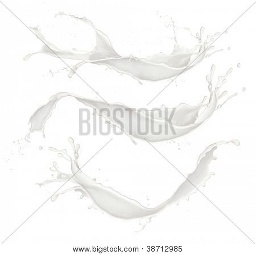

In [16]:
from IPython.display import Image
Image(filename='/tmp/myoutput/00000/0000.jpg') 